In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

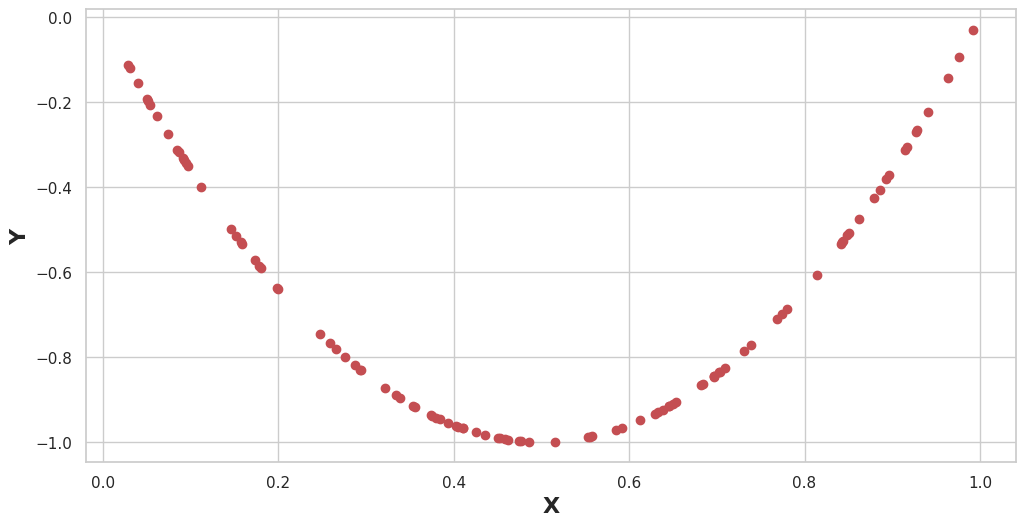

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 0.9566 - mean_squared_error: 0.9566 - val_loss: 0.7222 - val_mean_squared_error: 0.7222


Epoch 2/200
 - 0s - loss: 0.8256 - mean_squared_error: 0.8256 - val_loss: 0.6156 - val_mean_squared_error: 0.6156


Epoch 3/200
 - 0s - loss: 0.7086 - mean_squared_error: 0.7086 - val_loss: 0.5391 - val_mean_squared_error: 0.5391


Epoch 4/200
 - 0s - loss: 0.6236 - mean_squared_error: 0.6236 - val_loss: 0.4738 - val_mean_squared_error: 0.4738


Epoch 5/200
 - 0s - loss: 0.5501 - mean_squared_error: 0.5501 - val_loss: 0.4149 - val_mean_squared_error: 0.4149


Epoch 6/200
 - 0s - loss: 0.4835 - mean_squared_error: 0.4835 - val_loss: 0.3634 - val_mean_squared_error: 0.3634


Epoch 7/200
 - 0s - loss: 0.4244 - mean_squared_error: 0.4244 - val_loss: 0.3187 - val_mean_squared_error: 0.3187


Epoch 8/200
 - 0s - loss: 0.3725 - mean_squared_error: 0.3725 - val_loss: 0.2795 - val_mean_squared_error: 0.2795


Epoch 9/200
 - 0s - loss: 0.3267 - mean_squared_error: 0.3267 - val_loss: 0.2495 - val_mean_squared_error: 0.2495


Epoch 10/200
 - 0s - loss: 0.2910 - mean_squared_error: 0.2910 - val_loss: 0.2221 - val_mean_squared_error: 0.2221


Epoch 11/200
 - 0s - loss: 0.2581 - mean_squared_error: 0.2581 - val_loss: 0.2021 - val_mean_squared_error: 0.2021


Epoch 12/200
 - 0s - loss: 0.2336 - mean_squared_error: 0.2336 - val_loss: 0.1857 - val_mean_squared_error: 0.1857


Epoch 13/200
 - 0s - loss: 0.2130 - mean_squared_error: 0.2130 - val_loss: 0.1698 - val_mean_squared_error: 0.1698


Epoch 14/200
 - 0s - loss: 0.1929 - mean_squared_error: 0.1929 - val_loss: 0.1582 - val_mean_squared_error: 0.1582


Epoch 15/200
 - 0s - loss: 0.1779 - mean_squared_error: 0.1779 - val_loss: 0.1475 - val_mean_squared_error: 0.1475


Epoch 16/200
 - 0s - loss: 0.1638 - mean_squared_error: 0.1638 - val_loss: 0.1391 - val_mean_squared_error: 0.1391


Epoch 17/200
 - 0s - loss: 0.1523 - mean_squared_error: 0.1523 - val_loss: 0.1312 - val_mean_squared_error: 0.1312


Epoch 18/200


 - 0s - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.1236 - val_mean_squared_error: 0.1236


Epoch 19/200
 - 0s - loss: 0.1303 - mean_squared_error: 0.1303 - val_loss: 0.1194 - val_mean_squared_error: 0.1194


Epoch 20/200
 - 0s - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 21/200
 - 0s - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1135 - val_mean_squared_error: 0.1135


Epoch 22/200
 - 0s - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.1114 - val_mean_squared_error: 0.1114


Epoch 23/200
 - 0s - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.1102 - val_mean_squared_error: 0.1102


Epoch 24/200
 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.1083 - val_mean_squared_error: 0.1083


Epoch 25/200
 - 0s - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 26/200
 - 0s - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.1053 - val_mean_squared_error: 0.1053


Epoch 27/200
 - 0s - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 28/200
 - 0s - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 29/200
 - 0s - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.1026 - val_mean_squared_error: 0.1026


Epoch 30/200
 - 0s - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 31/200
 - 0s - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 32/200


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 33/200


 - 0s - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 34/200


 - 0s - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 35/200


 - 0s - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 36/200
 - 0s - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 37/200


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 38/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 39/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 40/200


 - 0s - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 41/200


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 42/200


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 43/200


 - 0s - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 44/200


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 45/200


 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 46/200
 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 47/200
 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 48/200
 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 49/200
 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 50/200


 - 0s - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 51/200


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 52/200


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 53/200


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 54/200


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 55/200


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 56/200


 - 0s - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 57/200
 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 58/200


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 59/200


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.1030 - val_mean_squared_error: 0.1030


Epoch 60/200


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 61/200


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 62/200


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 63/200


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 64/200


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 65/200
 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 66/200


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 67/200


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 68/200


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 69/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 70/200


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1046 - val_mean_squared_error: 0.1046


Epoch 71/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 72/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 73/200


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1026 - val_mean_squared_error: 0.1026


Epoch 74/200


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 75/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 76/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 77/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 78/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 79/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 80/200


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1026 - val_mean_squared_error: 0.1026


Epoch 81/200


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 82/200


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 83/200


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 84/200


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 85/200


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 86/200


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 87/200


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.1044 - val_mean_squared_error: 0.1044


Epoch 88/200


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 89/200


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 90/200


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 91/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 92/200

 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 93/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 94/200
 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 95/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 96/200


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 97/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 98/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 99/200


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 100/200


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 101/200


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 102/200


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 103/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 104/200


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 105/200


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 106/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 107/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 108/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 109/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 110/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 111/200
 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 112/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 113/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 114/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 115/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 116/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 117/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 118/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 119/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 120/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 121/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 122/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 123/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 124/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 125/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 126/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 127/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 128/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 129/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 130/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 131/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 132/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 133/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 134/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 135/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 136/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 137/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 138/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 139/200
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 140/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 141/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 142/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1028 - val_mean_squared_error: 0.1028


Epoch 143/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 144/200


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 145/200


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 146/200


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 147/200


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 148/200


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 149/200


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 150/200
 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 151/200


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 152/200


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 153/200


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 154/200


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 155/200


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 156/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 157/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 158/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 159/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 160/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 161/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 162/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 163/200


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 164/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 165/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 166/200


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 167/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 168/200
 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 169/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 170/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 171/200


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 172/200


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 173/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 174/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 175/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 176/200
 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 177/200


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 178/200


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 179/200
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 180/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 181/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 182/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 183/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 184/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 185/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 186/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 187/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 188/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 189/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 190/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 191/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 192/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 193/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 194/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 195/200


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 196/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 197/200


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 198/200


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 199/200


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 200/200


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

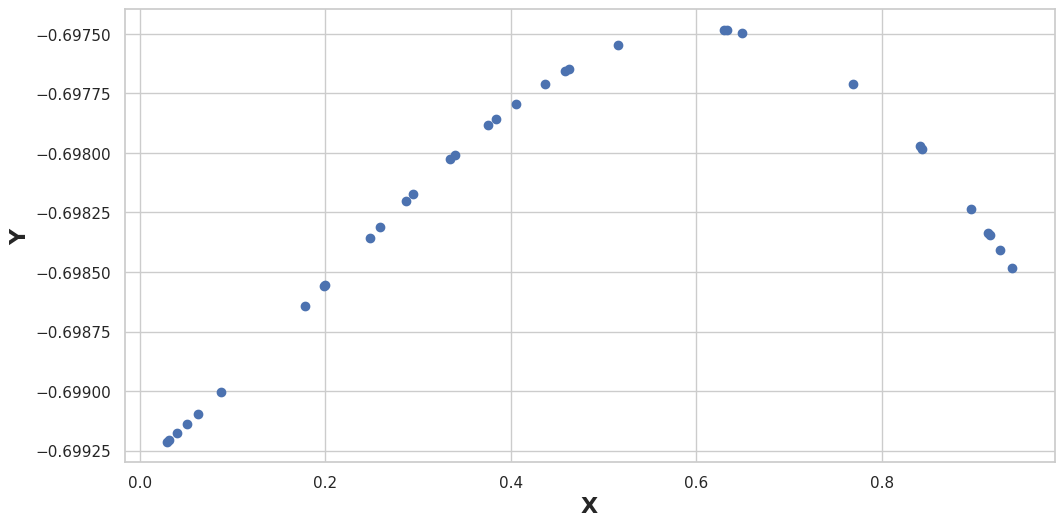

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.7222340359832301,
  0.6155611059882424,
  0.539147411331986,
  0.4737714890277747,
  0.414902616630901,
  0.36343209942181903,
  0.31865183512369794,
  0.2795062218651627,
  0.2495129072304928,
  0.22213601479024597,
  0.20214052453185571,
  0.18570611196936984,
  0.16976820880716498,
  0.15815924740198886,
  0.14751729730403784,
  0.13912191851572556,
  0.13123985357356793,
  0.12364677317214734,
  0.11944678628986533,
  0.11551613541263522,
  0.11347154866565358,
  0.11138701913031665,
  0.1101869631445769,
  0.1083059288335569,
  0.10617893753629742,
  0.10533379153771834,
  0.10413522137836977,
  0.10330642771088716,
  0.10263739831068298,
  0.10183204428264589,
  0.10144444114782593,
  0.10104202332370209,
  0.10083252727759606,
  0.10084797012986559,
  0.10087507720472234,
  0.10066114885337425,
  0.10054983746147517,
  0.10052534745949687,
  0.10050294847425187,
  0.10063909547347011,
  0.1009186567795096,
  0.10098489362633589,
  0.1010674720799381,
  0.10114640

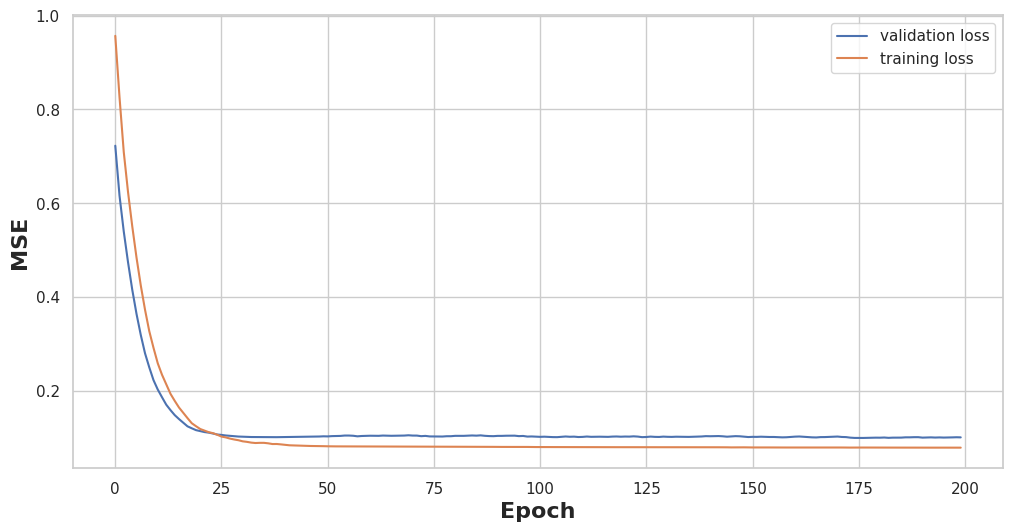

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.4923 - mean_squared_error: 0.4923 - val_loss: 0.1096 - val_mean_squared_error: 0.1096


Epoch 2/500
 - 0s - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 3/500
 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.1135 - val_mean_squared_error: 0.1135


Epoch 4/500
 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 5/500
 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 6/500
 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 7/500
 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1259 - val_mean_squared_error: 0.1259


Epoch 8/500
 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.1055 - val_mean_squared_error: 0.1055


Epoch 9/500
 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 10/500
 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.1086 - val_mean_squared_error: 0.1086


Epoch 11/500
 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 12/500
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 13/500
 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 14/500
 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1185 - val_mean_squared_error: 0.1185


Epoch 15/500
 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 16/500
 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 17/500
 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 18/500
 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 19/500
 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 20/500
 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.1166 - val_mean_squared_error: 0.1166


Epoch 21/500
 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.1050 - val_mean_squared_error: 0.1050


Epoch 22/500
 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 23/500
 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1213 - val_mean_squared_error: 0.1213


Epoch 24/500
 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 25/500
 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.1055 - val_mean_squared_error: 0.1055


Epoch 26/500
 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 27/500
 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 28/500
 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1045 - val_mean_squared_error: 0.1045


Epoch 29/500
 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 30/500
 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 31/500
 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 32/500
 - 0s - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 33/500
 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1144 - val_mean_squared_error: 0.1144


Epoch 34/500
 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 35/500
 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 36/500
 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 37/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 38/500
 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1113 - val_mean_squared_error: 0.1113


Epoch 39/500
 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.1157 - val_mean_squared_error: 0.1157


Epoch 40/500
 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 41/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 42/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 43/500
 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 44/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 45/500


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 46/500
 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 47/500
 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 48/500
 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1205 - val_mean_squared_error: 0.1205


Epoch 49/500


 - 0s - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 50/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 51/500
 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1125 - val_mean_squared_error: 0.1125


Epoch 52/500


 - 0s - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 53/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 54/500
 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 55/500
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1126 - val_mean_squared_error: 0.1126


Epoch 56/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 57/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 58/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1085 - val_mean_squared_error: 0.1085


Epoch 59/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 60/500
 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1045 - val_mean_squared_error: 0.1045


Epoch 61/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 62/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 63/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 64/500
 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 65/500
 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 66/500
 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1095 - val_mean_squared_error: 0.1095


Epoch 67/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 68/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 69/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1066 - val_mean_squared_error: 0.1066


Epoch 70/500


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.1177 - val_mean_squared_error: 0.1177


Epoch 71/500
 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.1220 - val_mean_squared_error: 0.1220


Epoch 72/500


 - 0s - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 73/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 74/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 75/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 76/500


 - 0s - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 77/500


 - 0s - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 78/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 79/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 80/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1189 - val_mean_squared_error: 0.1189


Epoch 81/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 82/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 83/500


 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 84/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 85/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 86/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 87/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 88/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 89/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 90/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 91/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1093 - val_mean_squared_error: 0.1093


Epoch 92/500


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.1200 - val_mean_squared_error: 0.1200


Epoch 93/500


 - 0s - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 94/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 95/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 96/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 97/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1030 - val_mean_squared_error: 0.1030


Epoch 98/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1176 - val_mean_squared_error: 0.1176


Epoch 99/500


 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 100/500


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 101/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1043 - val_mean_squared_error: 0.1043


Epoch 102/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 103/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 104/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1145 - val_mean_squared_error: 0.1145


Epoch 105/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 106/500


 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 107/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 108/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1118 - val_mean_squared_error: 0.1118


Epoch 109/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1132 - val_mean_squared_error: 0.1132


Epoch 110/500


 - 0s - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 111/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 112/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 113/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 114/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 115/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 116/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 117/500
 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 118/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 119/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 120/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 121/500


 - 0s - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 122/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 123/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 124/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 125/500


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 126/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 127/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 128/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 129/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 130/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 131/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 132/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 133/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 134/500
 - 0s - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 135/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 136/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 137/500


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 138/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 139/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 140/500


 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 141/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 142/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1139 - val_mean_squared_error: 0.1139


Epoch 143/500


 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 144/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 145/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 146/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 147/500


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 148/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1042 - val_mean_squared_error: 0.1042


Epoch 149/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 150/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1135 - val_mean_squared_error: 0.1135


Epoch 151/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 152/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 153/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 154/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1070 - val_mean_squared_error: 0.1070


Epoch 155/500
 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 156/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 157/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1054 - val_mean_squared_error: 0.1054


Epoch 158/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 159/500


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 160/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1047 - val_mean_squared_error: 0.1047


Epoch 161/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 162/500


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 163/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 164/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 165/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 166/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 167/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 168/500


 - 0s - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 169/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1111 - val_mean_squared_error: 0.1111


Epoch 170/500


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 171/500


 - 0s - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.1053 - val_mean_squared_error: 0.1053


Epoch 172/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 173/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 174/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 175/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 176/500


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 177/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 178/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 179/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 180/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0946 - val_mean_squared_error: 0.0946


Epoch 181/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1125 - val_mean_squared_error: 0.1125


Epoch 182/500


 - 0s - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 183/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 184/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 185/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1079 - val_mean_squared_error: 0.1079


Epoch 186/500


 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 187/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 188/500


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 189/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.1088 - val_mean_squared_error: 0.1088


Epoch 190/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 191/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 192/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 193/500


 - 0s - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 194/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 195/500


 - 0s - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 196/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 197/500
 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 198/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 199/500
 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 200/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 201/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 202/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 203/500


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 204/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0946 - val_mean_squared_error: 0.0946


Epoch 205/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 206/500


 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 207/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 208/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1075 - val_mean_squared_error: 0.1075


Epoch 209/500


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 210/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 211/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1114 - val_mean_squared_error: 0.1114


Epoch 212/500


 - 0s - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 213/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 214/500


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 215/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1119 - val_mean_squared_error: 0.1119


Epoch 216/500


 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 217/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 218/500


 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 219/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 220/500


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1078 - val_mean_squared_error: 0.1078


Epoch 221/500


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.1115 - val_mean_squared_error: 0.1115


Epoch 222/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 223/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 224/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 225/500


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 226/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 227/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 228/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 229/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 230/500


 - 0s - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 231/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 232/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 233/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 234/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 235/500
 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 236/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1050 - val_mean_squared_error: 0.1050


Epoch 237/500


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 238/500
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 239/500
 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1047 - val_mean_squared_error: 0.1047


Epoch 240/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 241/500
 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1095 - val_mean_squared_error: 0.1095


Epoch 242/500


 - 0s - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.1047 - val_mean_squared_error: 0.1047


Epoch 243/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 244/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 245/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1100 - val_mean_squared_error: 0.1100


Epoch 246/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 247/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 248/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 249/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 250/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 251/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 252/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1059 - val_mean_squared_error: 0.1059


Epoch 253/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 254/500


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 255/500


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.1047 - val_mean_squared_error: 0.1047


Epoch 256/500


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1044 - val_mean_squared_error: 0.1044


Epoch 257/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 258/500


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 259/500


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 260/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 261/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1044 - val_mean_squared_error: 0.1044


Epoch 262/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 263/500


 - 0s - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.0946 - val_mean_squared_error: 0.0946


Epoch 264/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 265/500


 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 266/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 267/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 268/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 269/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 270/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 271/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1078 - val_mean_squared_error: 0.1078


Epoch 272/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1088 - val_mean_squared_error: 0.1088


Epoch 273/500


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 274/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 275/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 276/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1101 - val_mean_squared_error: 0.1101


Epoch 277/500


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 278/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 279/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 280/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 281/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 282/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 283/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 284/500
 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Epoch 285/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 286/500
 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 287/500
 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1113 - val_mean_squared_error: 0.1113


Epoch 288/500


 - 0s - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1028 - val_mean_squared_error: 0.1028


Epoch 289/500
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 290/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1044 - val_mean_squared_error: 0.1044


Epoch 291/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 292/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 293/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 294/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1103 - val_mean_squared_error: 0.1103


Epoch 295/500


 - 0s - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1200 - val_mean_squared_error: 0.1200


Epoch 296/500


 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 297/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 298/500
 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 299/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 300/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 301/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 302/500


 - 0s - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 303/500


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 304/500


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 305/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 306/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 307/500


 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 308/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 309/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 310/500
 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 311/500


 - 0s - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 312/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 313/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 314/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 315/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 316/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 317/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 318/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 319/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 320/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 321/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 322/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 323/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 324/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1093 - val_mean_squared_error: 0.1093


Epoch 325/500


 - 0s - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 326/500
 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 327/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 328/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.1066 - val_mean_squared_error: 0.1066


Epoch 329/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 330/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 331/500


 - 0s - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0959 - val_mean_squared_error: 0.0959


Epoch 332/500


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 333/500


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 334/500


 - 0s - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Epoch 335/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 336/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 337/500


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1085 - val_mean_squared_error: 0.1085


Epoch 338/500


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 339/500


 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 340/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 341/500


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 342/500


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 343/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 344/500


 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 345/500
 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 346/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 347/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0959 - val_mean_squared_error: 0.0959


Epoch 348/500


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 349/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 350/500


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 351/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 352/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1080 - val_mean_squared_error: 0.1080


Epoch 353/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 354/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 355/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 356/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 357/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 358/500


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 359/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 360/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 361/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1094 - val_mean_squared_error: 0.1094


Epoch 362/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1141 - val_mean_squared_error: 0.1141


Epoch 363/500


 - 0s - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.1083 - val_mean_squared_error: 0.1083


Epoch 364/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 365/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 366/500


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 367/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1071 - val_mean_squared_error: 0.1071


Epoch 368/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.1098 - val_mean_squared_error: 0.1098


Epoch 369/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1089 - val_mean_squared_error: 0.1089


Epoch 370/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1055 - val_mean_squared_error: 0.1055


Epoch 371/500


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 372/500


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1124 - val_mean_squared_error: 0.1124


Epoch 373/500


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 374/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 375/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 376/500


 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 377/500


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.1070 - val_mean_squared_error: 0.1070


Epoch 378/500


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.1054 - val_mean_squared_error: 0.1054


Epoch 379/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1080 - val_mean_squared_error: 0.1080


Epoch 380/500


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1154 - val_mean_squared_error: 0.1154


Epoch 381/500


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.1146 - val_mean_squared_error: 0.1146


Epoch 382/500


 - 0s - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1099 - val_mean_squared_error: 0.1099


Epoch 383/500


 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 384/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 385/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 386/500


 - 0s - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 387/500


 - 0s - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 388/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 389/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 390/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 391/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 392/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 393/500


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 394/500
 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 395/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 396/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 397/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 398/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 399/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 400/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 401/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 402/500


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 403/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 404/500


 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 405/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 406/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 407/500


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 408/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 409/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 410/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 411/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 412/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 413/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1096 - val_mean_squared_error: 0.1096


Epoch 414/500


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 415/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 416/500


 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 417/500


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 418/500


 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 419/500

 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 420/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 421/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 422/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 423/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 424/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 425/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 426/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 427/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1067 - val_mean_squared_error: 0.1067


Epoch 428/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 429/500
 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 430/500

 - 0s - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 431/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 432/500


 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 433/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 434/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 435/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 436/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1139 - val_mean_squared_error: 0.1139


Epoch 437/500


 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 438/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 439/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 440/500


 - 0s - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 441/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 442/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 443/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 444/500


 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 445/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 446/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 447/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 448/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 449/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1026 - val_mean_squared_error: 0.1026


Epoch 450/500

 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1142 - val_mean_squared_error: 0.1142


Epoch 451/500


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1097 - val_mean_squared_error: 0.1097


Epoch 452/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 453/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 454/500


 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 455/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1122 - val_mean_squared_error: 0.1122


Epoch 456/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1067 - val_mean_squared_error: 0.1067


Epoch 457/500


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1055 - val_mean_squared_error: 0.1055


Epoch 458/500
 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 459/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 460/500


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 461/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 462/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 463/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 464/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 465/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 466/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1136 - val_mean_squared_error: 0.1136


Epoch 467/500


 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 468/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 469/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 470/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 471/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1150 - val_mean_squared_error: 0.1150


Epoch 472/500


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 473/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1046 - val_mean_squared_error: 0.1046


Epoch 474/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 475/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1098 - val_mean_squared_error: 0.1098


Epoch 476/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 477/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 478/500


 - 0s - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 479/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1198 - val_mean_squared_error: 0.1198


Epoch 480/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 481/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 482/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 483/500


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 484/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1051 - val_mean_squared_error: 0.1051


Epoch 485/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 486/500


 - 0s - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 487/500


 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 488/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 489/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 490/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1064 - val_mean_squared_error: 0.1064


Epoch 491/500


 - 0s - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 492/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0959 - val_mean_squared_error: 0.0959


Epoch 493/500


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 494/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 495/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 496/500


 - 0s - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 497/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 498/500


 - 0s - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.1043 - val_mean_squared_error: 0.1043


Epoch 499/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 500/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Text(0, 0.5, 'Y')

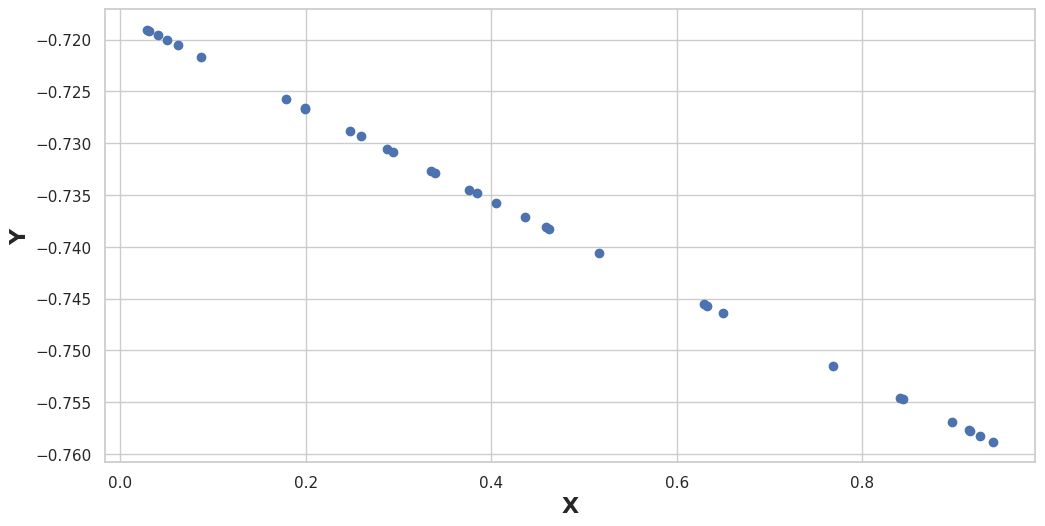

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

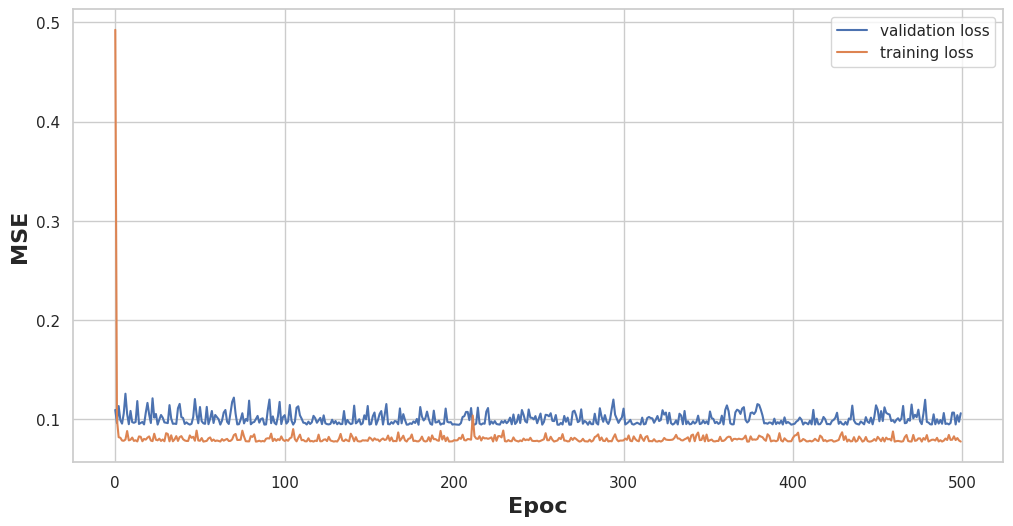

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

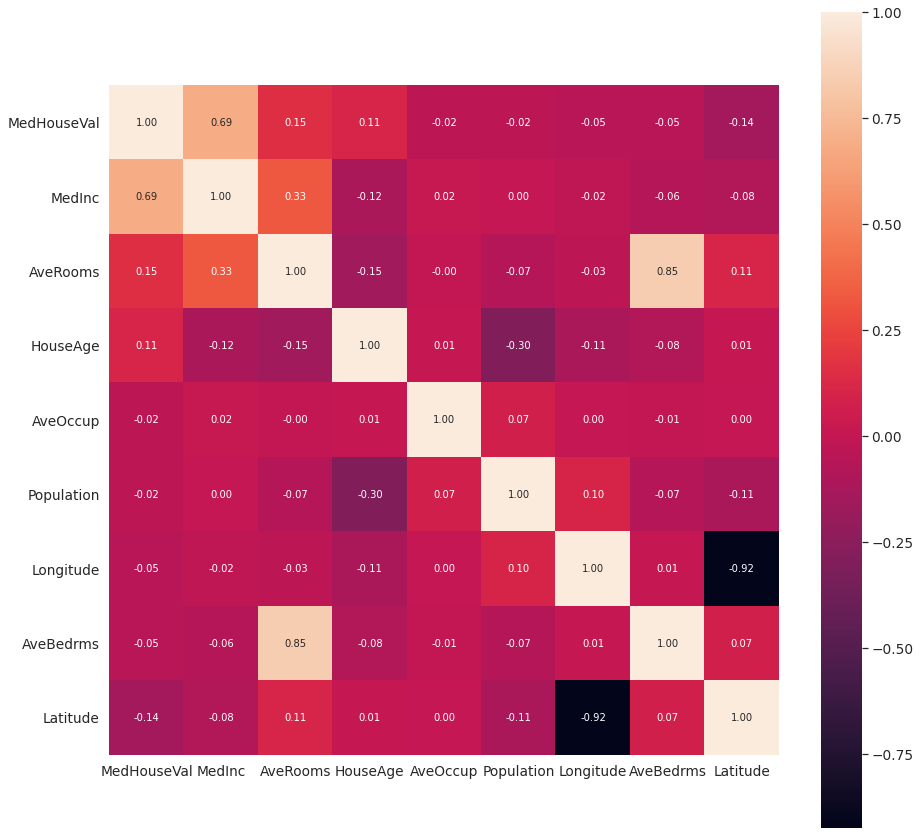

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

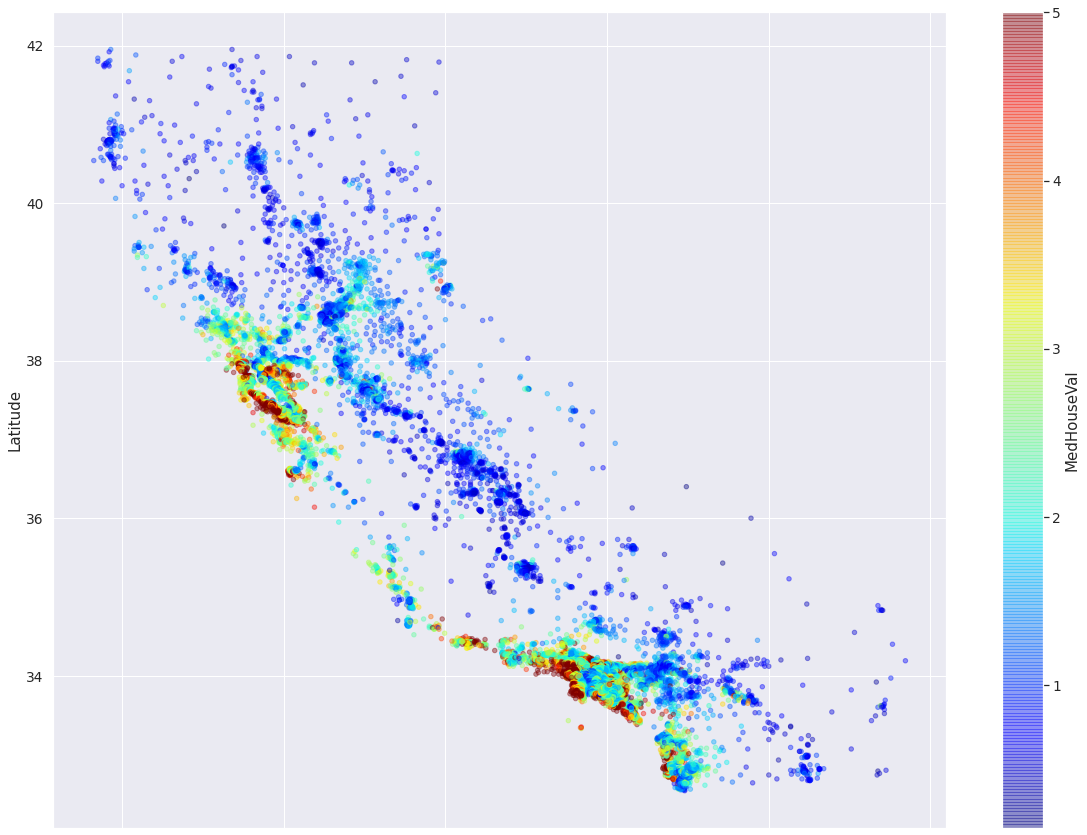

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

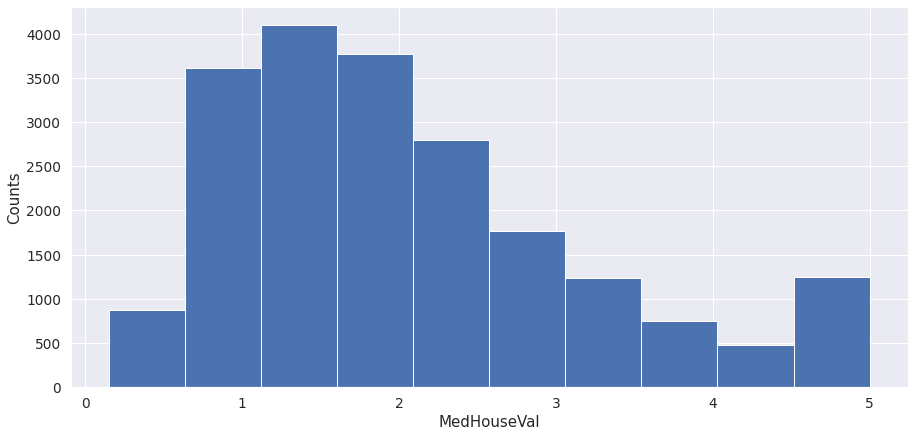

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

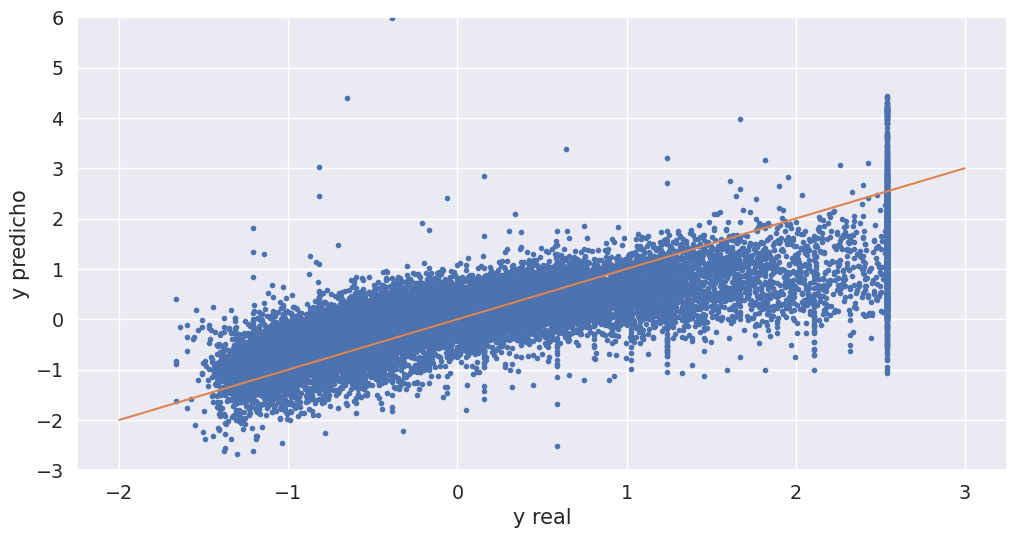

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100


   32/12384 [..............................] - ETA: 16s - loss: 1.3936

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.4555 

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.4310

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.4039

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.3924

10560/12384 [========================>.....] - ETA: 0s - loss: 0.3801

12384/12384 [==============================] - 1s 42us/step - loss: 0.3694 - val_loss: 0.3378


Epoch 2/100
   32/12384 [..............................] - ETA: 1s - loss: 0.6653

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.3529

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.3337

 5984/12384 [=============>................] - ETA: 0s - loss: 0.3353

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.3306

10176/12384 [=======================>......] - ETA: 0s - loss: 0.3268

12256/12384 [============================>.] - ETA: 0s - loss: 0.3220

12384/12384 [==============================] - 0s 40us/step - loss: 0.3230 - val_loss: 0.3175


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2202

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.3075

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.3066

 5856/12384 [=============>................] - ETA: 0s - loss: 0.3192

 7840/12384 [=================>............] - ETA: 0s - loss: 0.3085

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.3091

11936/12384 [===========================>..] - ETA: 0s - loss: 0.3085

12384/12384 [==============================] - 0s 39us/step - loss: 0.3079 - val_loss: 0.3126


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1148

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2931

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2883

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2970

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.3003

10752/12384 [=========================>....] - ETA: 0s - loss: 0.3026

12384/12384 [==============================] - 0s 38us/step - loss: 0.2992 - val_loss: 0.3164


Epoch 5/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1855

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3244

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2982

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2907

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2899

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2899

12384/12384 [==============================] - 0s 37us/step - loss: 0.2927 - val_loss: 0.3127


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0892

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2709

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2780

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2870

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2890

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2878



11776/12384 [===========================>..] - ETA: 0s - loss: 0.2903

12384/12384 [==============================] - 0s 39us/step - loss: 0.2906 - val_loss: 0.3062


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2114

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3015

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2844

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2929

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2880



10432/12384 [========================>.....] - ETA: 0s - loss: 0.2902

12384/12384 [==============================] - 0s 38us/step - loss: 0.2881 - val_loss: 0.2994


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1460

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.3044

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.3048

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2968

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2980



 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2876

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2875

12384/12384 [==============================] - 0s 39us/step - loss: 0.2869 - val_loss: 0.2902


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3778

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2971

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2937

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2833

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2819

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2811

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2800

12384/12384 [==============================] - 1s 41us/step - loss: 0.2821 - val_loss: 0.2921


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2848

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2898

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2829

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2885

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2849

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2867

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2875

12384/12384 [==============================] - 1s 41us/step - loss: 0.2821 - val_loss: 0.2893


Epoch 11/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3344

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2827

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2798

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2770

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2758

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2801

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2786

12384/12384 [==============================] - 0s 40us/step - loss: 0.2791 - val_loss: 0.2927


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2749

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2768

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2690

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2776

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2802

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2795

12128/12384 [============================>.] - ETA: 0s - loss: 0.2745

12384/12384 [==============================] - 0s 39us/step - loss: 0.2749 - val_loss: 0.2871


Epoch 13/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3704

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2506

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2590

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2698

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2737

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2708

12384/12384 [==============================] - 1s 41us/step - loss: 0.2729 - val_loss: 0.2887


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2872

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2797

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2699

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2756

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2772

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2712

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2731

12384/12384 [==============================] - 0s 40us/step - loss: 0.2715 - val_loss: 0.2857


Epoch 15/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1256

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2799

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2674

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2687

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2743

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2673

12384/12384 [==============================] - 0s 37us/step - loss: 0.2708 - val_loss: 0.2777


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3562

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2484

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2635

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2631

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2694

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2701

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2717

12384/12384 [==============================] - 0s 40us/step - loss: 0.2700 - val_loss: 0.2759


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2628

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2546

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2579

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2670

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2636

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2684

12384/12384 [==============================] - 0s 38us/step - loss: 0.2697 - val_loss: 0.2732


Epoch 18/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1935

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2707

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2632

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2620

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2623

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2660

12384/12384 [==============================] - 0s 37us/step - loss: 0.2692 - val_loss: 0.2976


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2414

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2632

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2664

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2642

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2668

12384/12384 [==============================] - 0s 39us/step - loss: 0.2682 - val_loss: 0.2772


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6250

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2669

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2627

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2597

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2591

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2602

12288/12384 [============================>.] - ETA: 0s - loss: 0.2652

12384/12384 [==============================] - 0s 39us/step - loss: 0.2658 - val_loss: 0.2754


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3329

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2568

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2605

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2663

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2702

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2693

12256/12384 [============================>.] - ETA: 0s - loss: 0.2647

12384/12384 [==============================] - 0s 39us/step - loss: 0.2641 - val_loss: 0.2717


Epoch 22/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2006

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2749

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2700

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2749

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2675

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2621

12384/12384 [==============================] - 0s 37us/step - loss: 0.2620 - val_loss: 0.2828


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1734

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2623

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2663

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2639

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2603

12384/12384 [==============================] - 0s 37us/step - loss: 0.2619 - val_loss: 0.2742


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2335

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2621

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2646

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2600

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2611

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2610

12096/12384 [============================>.] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 40us/step - loss: 0.2621 - val_loss: 0.2723


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1317

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2368

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2465

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2691

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2669

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2616

12032/12384 [============================>.] - ETA: 0s - loss: 0.2609

12384/12384 [==============================] - 0s 39us/step - loss: 0.2600 - val_loss: 0.2654


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2533

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2726

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2727

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2746

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2737

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2716

12384/12384 [==============================] - 0s 37us/step - loss: 0.2712 - val_loss: 0.2821


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2220

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2579

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2575

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2509

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2577

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2621

12384/12384 [==============================] - 0s 38us/step - loss: 0.2628 - val_loss: 0.2711


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2648

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2763

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2618

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2668

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2698

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2659

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2598

12384/12384 [==============================] - 1s 44us/step - loss: 0.2602 - val_loss: 0.2651


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1674

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2652

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2661

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2628

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2597

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2593

12384/12384 [==============================] - 0s 37us/step - loss: 0.2592 - val_loss: 0.2628


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3987

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2675

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2725

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2638

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2600



10880/12384 [=========================>....] - ETA: 0s - loss: 0.2580

12384/12384 [==============================] - 0s 37us/step - loss: 0.2579 - val_loss: 0.2704


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4149

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2505

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2548

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2515

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2530

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2546

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 1s 43us/step - loss: 0.2565 - val_loss: 0.2766


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1596

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2609

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2522

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2607

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2570

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2553

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2552

12384/12384 [==============================] - 0s 40us/step - loss: 0.2553 - val_loss: 0.2659


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1569

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2488

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2526

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2475

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2489

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2501

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2546

12384/12384 [==============================] - 0s 40us/step - loss: 0.2547 - val_loss: 0.2757


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2512

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2572

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2608

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2563

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2589

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2581

12224/12384 [============================>.] - ETA: 0s - loss: 0.2549

12384/12384 [==============================] - 0s 39us/step - loss: 0.2546 - val_loss: 0.2654


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1293

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2591

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2514

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2582

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2570

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 38us/step - loss: 0.2588 - val_loss: 0.2678


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4806

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2458

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2476

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2506

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2551

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2549

12384/12384 [==============================] - 0s 38us/step - loss: 0.2550 - val_loss: 0.2782


Epoch 37/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2886

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2430

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2436

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2419

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2521

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2507



12320/12384 [============================>.] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 38us/step - loss: 0.2524 - val_loss: 0.2588


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1617

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2424

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2469

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2422

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 39us/step - loss: 0.2511 - val_loss: 0.2619


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3141

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2391

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2391

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2435



 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2431



10816/12384 [=========================>....] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 37us/step - loss: 0.2516 - val_loss: 0.2674


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4201

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2818

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2688

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2638

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2580



10816/12384 [=========================>....] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 39us/step - loss: 0.2501 - val_loss: 0.2553


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2279

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2556

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2598

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2497

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2533

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2516

12384/12384 [==============================] - 0s 38us/step - loss: 0.2502 - val_loss: 0.2626


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2873

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2369

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2482

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2490

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2479

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 39us/step - loss: 0.2506 - val_loss: 0.2538


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1468

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2584

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2676

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2563

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2520

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2514

12384/12384 [==============================] - 0s 38us/step - loss: 0.2489 - val_loss: 0.2646


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1958

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2558

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2624

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2487

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2461

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 39us/step - loss: 0.2482 - val_loss: 0.2565


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1864

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2422

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2393

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2445

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2530

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2539

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2508

12384/12384 [==============================] - 0s 40us/step - loss: 0.2480 - val_loss: 0.2614


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2506

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2332

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2465

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2498

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2466

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2496

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 1s 41us/step - loss: 0.2481 - val_loss: 0.2543


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1602

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2491

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2489

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2415

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2460

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2454

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 1s 41us/step - loss: 0.2484 - val_loss: 0.2600


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1889

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2336

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2359

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2327

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2363

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2438

12256/12384 [============================>.] - ETA: 0s - loss: 0.2473

12384/12384 [==============================] - 0s 40us/step - loss: 0.2485 - val_loss: 0.2607


Epoch 49/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1586

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2748

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2668

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2577

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2500

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2468

12064/12384 [============================>.] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 39us/step - loss: 0.2477 - val_loss: 0.2511


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1867

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2394

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2586

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2511

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2501

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 38us/step - loss: 0.2492 - val_loss: 0.2511


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1450

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2383

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2391

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2371

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2427

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2454

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 40us/step - loss: 0.2470 - val_loss: 0.2543


Epoch 52/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1738

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2417

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2411

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2391

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2448

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2452

12256/12384 [============================>.] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 40us/step - loss: 0.2472 - val_loss: 0.2517


Epoch 53/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1194

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2361

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2488

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2486

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2468

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2497

12160/12384 [============================>.] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 40us/step - loss: 0.2473 - val_loss: 0.2548


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2722

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2422

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2396

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2388

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2470

12096/12384 [============================>.] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 40us/step - loss: 0.2472 - val_loss: 0.2551


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1722

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2482

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2426

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2466

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2470

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 37us/step - loss: 0.2468 - val_loss: 0.2543


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2821

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2165

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2427

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2416

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2437

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 40us/step - loss: 0.2484 - val_loss: 0.2593


Epoch 57/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2396

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2552

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2368

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2424

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2439

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2438

12192/12384 [============================>.] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 0s 39us/step - loss: 0.2476 - val_loss: 0.2579


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1026

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2561

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2418

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2472

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2420

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2407

12320/12384 [============================>.] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 38us/step - loss: 0.2453 - val_loss: 0.2608


Epoch 59/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1311

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2672

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2539

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2545

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2497



10784/12384 [=========================>....] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 37us/step - loss: 0.2460 - val_loss: 0.2498


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3924

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2601

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2339

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2309

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2368

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 38us/step - loss: 0.2453 - val_loss: 0.2490


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3872

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2593

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2543

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2457

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2423

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2418

12320/12384 [============================>.] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 39us/step - loss: 0.2439 - val_loss: 0.2612


Epoch 62/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3920

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2266

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2336

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2379

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2408

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2380

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 1s 40us/step - loss: 0.2454 - val_loss: 0.2488


Epoch 63/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3001

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2433

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2373

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2427

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2414

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 39us/step - loss: 0.2424 - val_loss: 0.2522


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2598

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2255

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2409

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2456

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2466

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 38us/step - loss: 0.2466 - val_loss: 0.2529


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1168

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2422

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2428

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2477

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2463

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2417

12352/12384 [============================>.] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 39us/step - loss: 0.2448 - val_loss: 0.2521


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4921

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2387

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2300

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2319

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2311

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2400

12288/12384 [============================>.] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 40us/step - loss: 0.2451 - val_loss: 0.2615


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5432

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2325

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2425

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2502

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2507

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 38us/step - loss: 0.2533 - val_loss: 0.2587


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0905

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2444

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2575

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2582

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2503

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2466

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 1s 41us/step - loss: 0.2481 - val_loss: 0.2672


Epoch 69/100


   32/12384 [..............................] - ETA: 0s - loss: 0.6947

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2670

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2494

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2498

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2481

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 39us/step - loss: 0.2463 - val_loss: 0.2536


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1716

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2483

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2445

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2445

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2400

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 38us/step - loss: 0.2451 - val_loss: 0.2493


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2707

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2401

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2474

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2495

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 38us/step - loss: 0.2458 - val_loss: 0.2537


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2824

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2416

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2463

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2471

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2434

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2487

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 40us/step - loss: 0.2440 - val_loss: 0.2457


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2843

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2312

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2393

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2342

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2448

12288/12384 [============================>.] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 39us/step - loss: 0.2421 - val_loss: 0.2585


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2575

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2490

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2445

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2463

12128/12384 [============================>.] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 39us/step - loss: 0.2449 - val_loss: 0.2735


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2868

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2568

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2485

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2491

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2448

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2463

12384/12384 [==============================] - 0s 38us/step - loss: 0.2436 - val_loss: 0.2458


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3427

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2617

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2547

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2436

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2460

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2457

12384/12384 [==============================] - 0s 38us/step - loss: 0.2429 - val_loss: 0.2488


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2574

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2440

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2468

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2430

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 37us/step - loss: 0.2415 - val_loss: 0.2498


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2158

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2374

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2371



 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2403



10048/12384 [=======================>......] - ETA: 0s - loss: 0.2415

12160/12384 [============================>.] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 39us/step - loss: 0.2427 - val_loss: 0.2460


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2043

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2385

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2438

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2489

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2484

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 37us/step - loss: 0.2427 - val_loss: 0.2479


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2434

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2354

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2273

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2343

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2356

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 37us/step - loss: 0.2419 - val_loss: 0.2544


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1846

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2430

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2381

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2435

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2483

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 37us/step - loss: 0.2421 - val_loss: 0.2514


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1656

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2288

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2272

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2240

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2406

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 38us/step - loss: 0.2431 - val_loss: 0.2571


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4210

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2153

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2418

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2401

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2421

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 37us/step - loss: 0.2429 - val_loss: 0.2576


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2245

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2559

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2540

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2385

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2380

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 37us/step - loss: 0.2435 - val_loss: 0.2505


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1966

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2410

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2438

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2436

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2461

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2459

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 1s 42us/step - loss: 0.2445 - val_loss: 0.2459


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2224

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2478

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2484

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2409

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2425

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2480

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 40us/step - loss: 0.2433 - val_loss: 0.2500


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1993

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2341

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2346

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2392

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2383

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2424

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 1s 41us/step - loss: 0.2418 - val_loss: 0.2632


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2319

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2268

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2400

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2445

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2411

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2429

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 1s 40us/step - loss: 0.2412 - val_loss: 0.2505


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1758

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2201

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2350

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2341

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2414

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2436

12256/12384 [============================>.] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 39us/step - loss: 0.2417 - val_loss: 0.2470


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1981

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2365

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2447

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2438

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2429

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2425

12032/12384 [============================>.] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 39us/step - loss: 0.2427 - val_loss: 0.2493


Epoch 91/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2197

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2355

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2437

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2513

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2480

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2463

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 1s 41us/step - loss: 0.2419 - val_loss: 0.2444


Epoch 92/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0952

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2320

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2388

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2430

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2395

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2388

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 40us/step - loss: 0.2416 - val_loss: 0.2714


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2570

 1632/12384 [==>...........................] - ETA: 0s - loss: 0.2383

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2359

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2384

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2328

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2389

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 1s 41us/step - loss: 0.2424 - val_loss: 0.2567


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5414

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2474

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2526

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2447

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2374

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2400

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 40us/step - loss: 0.2428 - val_loss: 0.2472


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3809

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2454

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2413

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2414

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2379

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2369

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 1s 42us/step - loss: 0.2402 - val_loss: 0.2484


Epoch 96/100
   32/12384 [..............................] - ETA: 2s - loss: 0.2471

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2366

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2424

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2376

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2414

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2431

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 1s 43us/step - loss: 0.2416 - val_loss: 0.2476


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2316

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2269

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2382

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2413

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2401

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12352/12384 [============================>.] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 1s 43us/step - loss: 0.2404 - val_loss: 0.2544


Epoch 98/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3204

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2072

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2331

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2253

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2299

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2353

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 1s 43us/step - loss: 0.2415 - val_loss: 0.2493


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1807

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2435

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2495

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2364

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2424

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2414

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 1s 42us/step - loss: 0.2411 - val_loss: 0.2529


Epoch 100/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3124

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2623

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2594

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2498

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2460

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2431

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 1s 41us/step - loss: 0.2406 - val_loss: 0.2514


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

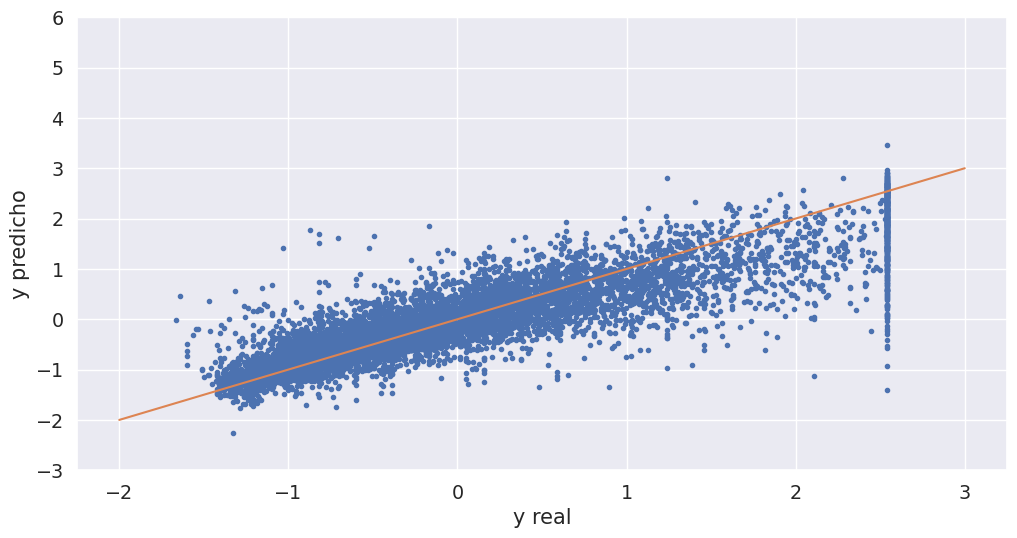

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

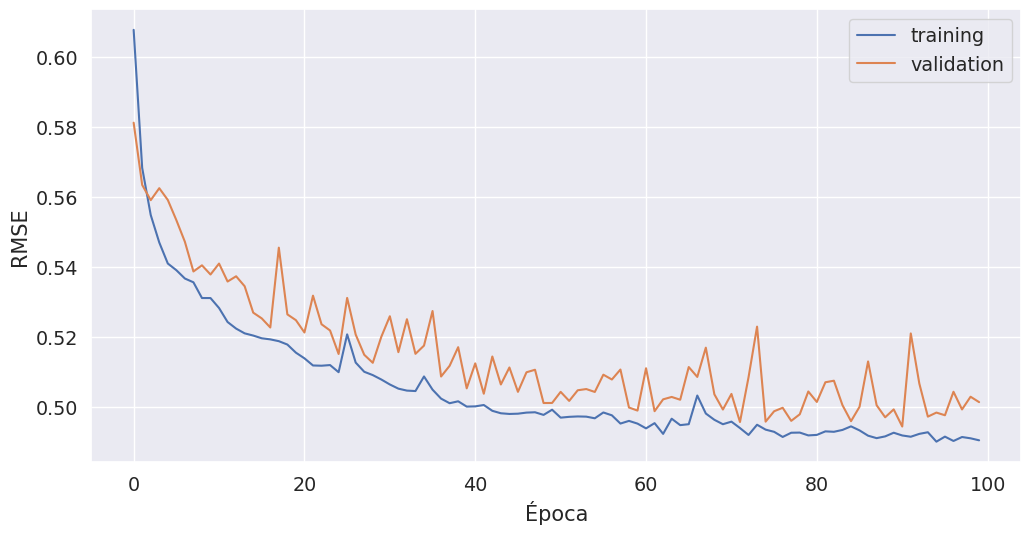

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 15s - loss: 1.2183

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.4913 

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.4390

 5760/12384 [============>.................] - ETA: 0s - loss: 0.4211

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.4074

10048/12384 [=======================>......] - ETA: 0s - loss: 0.3940

12192/12384 [============================>.] - ETA: 0s - loss: 0.3884

12384/12384 [==============================] - 1s 43us/step - loss: 0.3870 - val_loss: 0.3566


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1987

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3428

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.3481

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3451

 7712/12384 [=================>............] - ETA: 0s - loss: 0.3493

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.3465

11616/12384 [===========================>..] - ETA: 0s - loss: 0.3373

12384/12384 [==============================] - 0s 39us/step - loss: 0.3340 - val_loss: 0.3372


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2960

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3319

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.3438

 5824/12384 [=============>................] - ETA: 0s - loss: 0.3329

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.3308

10016/12384 [=======================>......] - ETA: 0s - loss: 0.3231

12160/12384 [============================>.] - ETA: 0s - loss: 0.3156

12384/12384 [==============================] - 0s 38us/step - loss: 0.3175 - val_loss: 0.3283


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6185

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.3044

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2971

 5920/12384 [=============>................] - ETA: 0s - loss: 0.3040

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.3053

10272/12384 [=======================>......] - ETA: 0s - loss: 0.3011

12384/12384 [==============================] - 0s 36us/step - loss: 0.3076 - val_loss: 0.3174


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2188

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2740

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2827

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2896

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2952

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2987

12384/12384 [==============================] - 0s 35us/step - loss: 0.3008 - val_loss: 0.3112


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5957

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2848

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2936

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2986

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2958

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2946

12384/12384 [==============================] - 0s 36us/step - loss: 0.2957 - val_loss: 0.3051


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2312

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2964

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2990

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2992

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2996

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2998

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2965

12384/12384 [==============================] - 0s 40us/step - loss: 0.2923 - val_loss: 0.3030


Epoch 8/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1800

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2860

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2882

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2889

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2918

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2938

12384/12384 [==============================] - 0s 37us/step - loss: 0.2888 - val_loss: 0.3048


Epoch 9/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2544

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.3004

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2937

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2947

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2941

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2912

12384/12384 [==============================] - 0s 36us/step - loss: 0.2863 - val_loss: 0.2950


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2309

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2869

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2738

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2789

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2797

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2850

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2834

12384/12384 [==============================] - 0s 39us/step - loss: 0.2846 - val_loss: 0.3029


Epoch 11/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2335

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2949

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2886

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2903

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2847

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2852

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2833

12384/12384 [==============================] - 0s 38us/step - loss: 0.2824 - val_loss: 0.2913


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2203

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2855

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2826

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2801

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2740

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2756

12288/12384 [============================>.] - ETA: 0s - loss: 0.2799

12384/12384 [==============================] - 0s 37us/step - loss: 0.2802 - val_loss: 0.2862


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3011

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2543

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2639

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2717

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2730

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2756

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2771

12384/12384 [==============================] - 0s 38us/step - loss: 0.2771 - val_loss: 0.2835


Epoch 14/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2323

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2901

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2920

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2786

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2784

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2751

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2764

12384/12384 [==============================] - 0s 39us/step - loss: 0.2743 - val_loss: 0.2829


Epoch 15/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0881

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2555

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2553

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2583

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2633

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2706

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2720

12384/12384 [==============================] - 0s 39us/step - loss: 0.2729 - val_loss: 0.2845


Epoch 16/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1373

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2863

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2815

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2778

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2744

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2742

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2731

12384/12384 [==============================] - 0s 38us/step - loss: 0.2709 - val_loss: 0.2846


Epoch 17/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1466

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2668

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2540

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2695

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2664

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2688

12000/12384 [============================>.] - ETA: 0s - loss: 0.2706

12384/12384 [==============================] - 0s 38us/step - loss: 0.2682 - val_loss: 0.2758


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1998

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2635

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2681

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2637

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2711

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2695

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2665

12384/12384 [==============================] - 0s 38us/step - loss: 0.2661 - val_loss: 0.2768


Epoch 19/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2226

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2442

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2477

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2591

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2652

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2629

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2650

12384/12384 [==============================] - 0s 39us/step - loss: 0.2661 - val_loss: 0.2751


Epoch 20/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2273

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2595

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2540

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2607

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2636

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2642

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 38us/step - loss: 0.2629 - val_loss: 0.2721


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2368

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2622

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2589

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2563

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2565

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2549

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2567

12384/12384 [==============================] - 0s 39us/step - loss: 0.2608 - val_loss: 0.2721


Epoch 22/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3199

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2508

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2521

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2478

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2565

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2518

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2581

12384/12384 [==============================] - 0s 39us/step - loss: 0.2588 - val_loss: 0.2775


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1852

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2389

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2428

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2569

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2578

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2566

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2578

12384/12384 [==============================] - 0s 38us/step - loss: 0.2571 - val_loss: 0.2658


Epoch 24/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2452

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2496

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2533

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2584

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2574



10528/12384 [========================>.....] - ETA: 0s - loss: 0.2589

12384/12384 [==============================] - 0s 37us/step - loss: 0.2614 - val_loss: 0.2732


Epoch 25/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1527

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2251

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2485

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2492

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2542

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2585

12384/12384 [==============================] - 0s 35us/step - loss: 0.2568 - val_loss: 0.2661


Epoch 26/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3117

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2652

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2557

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2542

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2578

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2538

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2530

12384/12384 [==============================] - 0s 39us/step - loss: 0.2542 - val_loss: 0.2612


Epoch 27/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3379

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2501

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2509

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2540



10496/12384 [========================>.....] - ETA: 0s - loss: 0.2532

12384/12384 [==============================] - 0s 36us/step - loss: 0.2531 - val_loss: 0.2587


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4345

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2688

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2559

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2531

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2535

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2509

12224/12384 [============================>.] - ETA: 0s - loss: 0.2508

12384/12384 [==============================] - 0s 37us/step - loss: 0.2518 - val_loss: 0.2592


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1325

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2763

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2749

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2620

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2553

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2541

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 40us/step - loss: 0.2514 - val_loss: 0.2614


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3503

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2505

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2593

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2522

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2529

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2489

12064/12384 [============================>.] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 37us/step - loss: 0.2498 - val_loss: 0.2641


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1755

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2613

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2521

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2501

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2476



 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2484

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 38us/step - loss: 0.2503 - val_loss: 0.2607


Epoch 32/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4943

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2755

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2529

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2498

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2457



10688/12384 [========================>.....] - ETA: 0s - loss: 0.2507

12384/12384 [==============================] - 0s 36us/step - loss: 0.2486 - val_loss: 0.2588


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2581

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2703

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2588

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2587

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2518

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2528

12384/12384 [==============================] - 0s 36us/step - loss: 0.2531 - val_loss: 0.2619


Epoch 34/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3270

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2383

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2419

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2479

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 0s 37us/step - loss: 0.2472 - val_loss: 0.2600


Epoch 35/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2748

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2438

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2499

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2414

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2455

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2482

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 39us/step - loss: 0.2470 - val_loss: 0.2637


Epoch 36/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2375

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2368

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2458

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2379

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2358

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2431

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 38us/step - loss: 0.2466 - val_loss: 0.2579


Epoch 37/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1267

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2503

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2425

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2405

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2399

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2436

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 1s 41us/step - loss: 0.2463 - val_loss: 0.2565


Epoch 38/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2304

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2585

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2536

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2520

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2448

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2454

12128/12384 [============================>.] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 38us/step - loss: 0.2468 - val_loss: 0.2603


Epoch 39/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1870

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2537

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2522

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2464

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2523

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2543

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2468

12384/12384 [==============================] - 0s 38us/step - loss: 0.2460 - val_loss: 0.2597


Epoch 40/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2743

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2600

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2460

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2486

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2469

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2478

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 38us/step - loss: 0.2460 - val_loss: 0.2555


Epoch 41/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1619

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2243

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2345

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2341

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2360

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2448

12064/12384 [============================>.] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 37us/step - loss: 0.2441 - val_loss: 0.2553


Epoch 42/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3445

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2466

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2389

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2480

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2442

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 37us/step - loss: 0.2452 - val_loss: 0.2539


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2653

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2451

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2496

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2479

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 36us/step - loss: 0.2443 - val_loss: 0.2542


Epoch 44/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2027

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2422

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2417

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2407

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2438

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2420

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 0s 38us/step - loss: 0.2446 - val_loss: 0.2552


Epoch 45/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2234

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2220

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2252

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2269

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2325

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2439



11680/12384 [===========================>..] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 40us/step - loss: 0.2425 - val_loss: 0.2560


Epoch 46/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3010

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2501

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2525

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2433

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2389

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2438

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 38us/step - loss: 0.2429 - val_loss: 0.2639


Epoch 47/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2826

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2405

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2413

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2419

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2411

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 37us/step - loss: 0.2429 - val_loss: 0.2530


Epoch 48/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1439

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2405

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2409

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2395

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2417

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2424

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 39us/step - loss: 0.2427 - val_loss: 0.2535


Epoch 49/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1199

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2394

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2395

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2414

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2454

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2465

12224/12384 [============================>.] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 38us/step - loss: 0.2429 - val_loss: 0.2538


Epoch 50/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1928

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2643

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2478

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2458

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2441

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2384

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 39us/step - loss: 0.2431 - val_loss: 0.2509


Epoch 51/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5085

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2449

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2448

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2454

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2410

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2404

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 38us/step - loss: 0.2420 - val_loss: 0.2552


Epoch 52/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0987

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2615

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2410

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2399

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2337

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2420

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 38us/step - loss: 0.2417 - val_loss: 0.2533


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1417

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2795

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2602

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2585

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2505

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2506

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 38us/step - loss: 0.2495 - val_loss: 0.2519


Epoch 54/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1067

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2418

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2421

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2362

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2390

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2365

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 38us/step - loss: 0.2435 - val_loss: 0.2527


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3940

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2364

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2400

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2391



10080/12384 [=======================>......] - ETA: 0s - loss: 0.2393

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 38us/step - loss: 0.2421 - val_loss: 0.2606


Epoch 56/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2602

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2542

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2464

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2458

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2473

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2499



11360/12384 [==========================>...] - ETA: 0s - loss: 0.2465

12384/12384 [==============================] - 0s 39us/step - loss: 0.2444 - val_loss: 0.2578


Epoch 57/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1881

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2472

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2401

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2419

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 37us/step - loss: 0.2414 - val_loss: 0.2563


Epoch 58/200


   32/12384 [..............................] - ETA: 1s - loss: 0.4635

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2421

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2411

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2466

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2436

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 36us/step - loss: 0.2413 - val_loss: 0.2537


Epoch 59/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3879

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2362

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2403

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2358

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2366

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2400

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 39us/step - loss: 0.2404 - val_loss: 0.2528


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2449

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2332

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2355

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2363

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2398

12384/12384 [==============================] - 0s 37us/step - loss: 0.2401 - val_loss: 0.2514


Epoch 61/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2614

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2399

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2320

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2368

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2371

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 36us/step - loss: 0.2402 - val_loss: 0.2501


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1480

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2284

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2295

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2342

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2379

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 36us/step - loss: 0.2401 - val_loss: 0.2508


Epoch 63/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3218

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2484

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2465

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2473

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 36us/step - loss: 0.2457 - val_loss: 0.2626


Epoch 64/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4710

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2730

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2565

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2542

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2490

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2459

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 1s 41us/step - loss: 0.2443 - val_loss: 0.2560


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1835

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2230

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2339

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2435

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2428

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2397

12224/12384 [============================>.] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 37us/step - loss: 0.2402 - val_loss: 0.2513


Epoch 66/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2923

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2659

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2469

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2457

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2472

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2421

12320/12384 [============================>.] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 37us/step - loss: 0.2405 - val_loss: 0.2525


Epoch 67/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2193

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2436

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2405

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2406

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2423

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2408

12224/12384 [============================>.] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 37us/step - loss: 0.2426 - val_loss: 0.2535


Epoch 68/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1598

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2508

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2496

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2471

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2420

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2377

12000/12384 [============================>.] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 39us/step - loss: 0.2397 - val_loss: 0.2524


Epoch 69/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1518

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2483

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2502

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2412

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2440

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2416

12000/12384 [============================>.] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 38us/step - loss: 0.2388 - val_loss: 0.2657


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0962

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2445

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2473

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2436

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2401

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2397

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 37us/step - loss: 0.2397 - val_loss: 0.2509


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3729

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2506

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2441

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2431

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2372

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 36us/step - loss: 0.2392 - val_loss: 0.2503


Epoch 72/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2342

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2470

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2456

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2406

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2374

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 35us/step - loss: 0.2391 - val_loss: 0.2522


Epoch 73/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2284

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2407

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2452

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2397

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2419

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 37us/step - loss: 0.2410 - val_loss: 0.2626


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1585

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2359

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2413

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2496

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2478

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 37us/step - loss: 0.2397 - val_loss: 0.2538


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2135

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2298

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2343

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2387

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2417

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2368

12320/12384 [============================>.] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 37us/step - loss: 0.2401 - val_loss: 0.2504


Epoch 76/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2108

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2240

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2324

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2351

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2361

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 35us/step - loss: 0.2384 - val_loss: 0.2489


Epoch 77/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2519

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2613

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2380

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2421

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2402

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 36us/step - loss: 0.2398 - val_loss: 0.2483


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1694

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2347

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2384



 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2389

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 36us/step - loss: 0.2385 - val_loss: 0.2550


Epoch 79/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1166

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2439

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2347

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2422

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 36us/step - loss: 0.2384 - val_loss: 0.2499


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2141

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2230

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2311

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2341



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 36us/step - loss: 0.2378 - val_loss: 0.2570


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3691

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2238

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2355

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2376

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2460

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 38us/step - loss: 0.2383 - val_loss: 0.2487


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2797

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2512

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2332

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2321

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2347

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 37us/step - loss: 0.2377 - val_loss: 0.2503


Epoch 83/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1520

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2205

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2354

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2366

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2399

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 36us/step - loss: 0.2379 - val_loss: 0.2514


Epoch 84/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1851

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2185

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2320

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2411

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2354

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 36us/step - loss: 0.2382 - val_loss: 0.2516


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1497

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2402

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2343

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2383

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 36us/step - loss: 0.2384 - val_loss: 0.2499


Epoch 86/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2029

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2198

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2397

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2411

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2370

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2350

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 38us/step - loss: 0.2369 - val_loss: 0.2505


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1919

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2453

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2335

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2332

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2374

12224/12384 [============================>.] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 38us/step - loss: 0.2379 - val_loss: 0.2530


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4380

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2498

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2358

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2346

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2447

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2412

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 40us/step - loss: 0.2366 - val_loss: 0.2560


Epoch 89/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2278

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2366

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2276

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2363

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 35us/step - loss: 0.2362 - val_loss: 0.2506


Epoch 90/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2686

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2319

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2338

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2393

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 36us/step - loss: 0.2377 - val_loss: 0.2485


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1385

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2468

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2391

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2350

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2436

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 36us/step - loss: 0.2374 - val_loss: 0.2549


Epoch 92/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1543

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2505

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2391

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2425

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2420



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 35us/step - loss: 0.2376 - val_loss: 0.2485


Epoch 93/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3184

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2537

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2457

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2427

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2358

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2415

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 1s 40us/step - loss: 0.2368 - val_loss: 0.2472


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2134

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2542

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2430

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2359

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2348

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2351

12288/12384 [============================>.] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 37us/step - loss: 0.2357 - val_loss: 0.2519


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2345

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2383

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2393

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2410

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2351

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2375

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 38us/step - loss: 0.2362 - val_loss: 0.2478


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1927

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2327

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2283

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2395

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2402

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2419



11456/12384 [==========================>...] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 40us/step - loss: 0.2364 - val_loss: 0.2490


Epoch 97/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2095

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2324

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2385

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2325

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2342

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2308

12256/12384 [============================>.] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 37us/step - loss: 0.2352 - val_loss: 0.2504


Epoch 98/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2228

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2547

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2424

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2421

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2373

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2369

12128/12384 [============================>.] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 38us/step - loss: 0.2368 - val_loss: 0.2580


Epoch 99/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2475

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2421

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2412

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2360

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2329

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2329

12320/12384 [============================>.] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 37us/step - loss: 0.2360 - val_loss: 0.2516


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2560

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2351

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2266

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2390

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2371

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 36us/step - loss: 0.2364 - val_loss: 0.2679


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1642

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2497

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2383

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2365

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2351

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2388

12064/12384 [============================>.] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 38us/step - loss: 0.2363 - val_loss: 0.2507


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3234

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2253

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2283

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2298

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2283

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 37us/step - loss: 0.2356 - val_loss: 0.2610


Epoch 103/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2253

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2127

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2339

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2332

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2311

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2329

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 40us/step - loss: 0.2352 - val_loss: 0.2514


Epoch 104/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2475

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2300

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2392

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2424

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2400

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2349

12352/12384 [============================>.] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 37us/step - loss: 0.2372 - val_loss: 0.2492


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2628

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2360

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2255

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2336

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 36us/step - loss: 0.2369 - val_loss: 0.2493


Epoch 106/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1508

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2014

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2301

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2308

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2354

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2362

12224/12384 [============================>.] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 37us/step - loss: 0.2358 - val_loss: 0.2484


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2477

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2257

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2338

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2275

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2351

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 36us/step - loss: 0.2357 - val_loss: 0.2510


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2957

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2371

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2283

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2310

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2346



10720/12384 [========================>.....] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 36us/step - loss: 0.2341 - val_loss: 0.2468


Epoch 109/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3180

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2442

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2350

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2377

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2354

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2372

12064/12384 [============================>.] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 37us/step - loss: 0.2364 - val_loss: 0.2488


Epoch 110/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1870

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2249

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2266

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2310

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2301

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 37us/step - loss: 0.2349 - val_loss: 0.2469


Epoch 111/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1339

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2338

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2343

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2330

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2325

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2311

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 39us/step - loss: 0.2351 - val_loss: 0.2551


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2148

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2331

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2320

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2295

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2297

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2322

12064/12384 [============================>.] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 37us/step - loss: 0.2353 - val_loss: 0.2497


Epoch 113/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1718

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2296

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2354

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2356

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2366



11136/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 34us/step - loss: 0.2371 - val_loss: 0.2477


Epoch 114/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2162

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2353

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2552

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2406

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2407

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 36us/step - loss: 0.2359 - val_loss: 0.2500


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1546

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2304

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2363

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2342

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2343

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2326

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 38us/step - loss: 0.2350 - val_loss: 0.2503


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1871

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2468

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2399

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2384

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 36us/step - loss: 0.2363 - val_loss: 0.2482


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2399

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2384

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2320

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2333

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 37us/step - loss: 0.2355 - val_loss: 0.2500


Epoch 118/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3799

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2413

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2407

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2336

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2359



 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2395

12192/12384 [============================>.] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 37us/step - loss: 0.2345 - val_loss: 0.2461


Epoch 119/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2385

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2305

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2359

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 36us/step - loss: 0.2341 - val_loss: 0.2545


Epoch 120/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2081

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2555

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2424

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2438

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2404

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 35us/step - loss: 0.2347 - val_loss: 0.2589


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2832

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2277

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2306

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 35us/step - loss: 0.2341 - val_loss: 0.2464


Epoch 122/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2343

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2443

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2362

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2357

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2372

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 36us/step - loss: 0.2347 - val_loss: 0.2577


Epoch 123/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1602

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2395

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2228

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2261

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2290

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 36us/step - loss: 0.2360 - val_loss: 0.2492


Epoch 124/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3837

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2245

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2248

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2256

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2323

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 36us/step - loss: 0.2349 - val_loss: 0.2529


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2057

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2488

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2465

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2448

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2374

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 35us/step - loss: 0.2344 - val_loss: 0.2473


Epoch 126/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0977

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2313

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2307

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2370

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2368

12000/12384 [============================>.] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 38us/step - loss: 0.2331 - val_loss: 0.2446


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1371

 1632/12384 [==>...........................] - ETA: 0s - loss: 0.2129

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2239

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2291

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2294

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2287

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 39us/step - loss: 0.2344 - val_loss: 0.2463


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6920

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2241

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2374

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2335

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2359

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2343

12224/12384 [============================>.] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 37us/step - loss: 0.2338 - val_loss: 0.2477


Epoch 129/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3658

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2665

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2396

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2326

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2350

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2398

12256/12384 [============================>.] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 38us/step - loss: 0.2336 - val_loss: 0.2470


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3318

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2305

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2141

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2215

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2241

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2304

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 39us/step - loss: 0.2336 - val_loss: 0.2478


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1796

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2514

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2289

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2261

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2303



 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2322

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 1s 41us/step - loss: 0.2331 - val_loss: 0.2548


Epoch 132/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2205

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2231

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2307

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2343

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2315

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2308

12096/12384 [============================>.] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 38us/step - loss: 0.2327 - val_loss: 0.2476


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2209

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2161

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2144

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2245

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2255

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2301

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 38us/step - loss: 0.2336 - val_loss: 0.2449


Epoch 134/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2782

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2243

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2315

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2307

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2292

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 36us/step - loss: 0.2352 - val_loss: 0.2468


Epoch 135/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5234

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2632

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2405

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2402

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2337

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 37us/step - loss: 0.2343 - val_loss: 0.2459


Epoch 136/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1794

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2144

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2236

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2262

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2296

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2351

12352/12384 [============================>.] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 38us/step - loss: 0.2338 - val_loss: 0.2456


Epoch 137/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2883

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2148

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2217

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2195

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2281

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 37us/step - loss: 0.2340 - val_loss: 0.2461


Epoch 138/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3445

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2423

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2344

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2325

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2367

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2383

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 39us/step - loss: 0.2340 - val_loss: 0.2519


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2142

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2269

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2372

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2337

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2303

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 36us/step - loss: 0.2336 - val_loss: 0.2465


Epoch 140/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1563

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2338

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2280

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2331

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2305

12000/12384 [============================>.] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 38us/step - loss: 0.2336 - val_loss: 0.2492


Epoch 141/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1021

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.1972

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2151

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2200

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2279

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 36us/step - loss: 0.2327 - val_loss: 0.2485


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1330

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2269

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2277

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2384

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2357

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2355

12192/12384 [============================>.] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 38us/step - loss: 0.2339 - val_loss: 0.2453


Epoch 143/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0786

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2201

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2298

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2334

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2342



11008/12384 [=========================>....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 35us/step - loss: 0.2332 - val_loss: 0.2455


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2391

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2430

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2399

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2386

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2379

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 40us/step - loss: 0.2325 - val_loss: 0.2537


Epoch 145/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3222

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2222

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2257

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2304

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2313

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2329

12192/12384 [============================>.] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 38us/step - loss: 0.2340 - val_loss: 0.2476


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2204

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2356

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2385

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2404

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2389

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2342

12192/12384 [============================>.] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 38us/step - loss: 0.2331 - val_loss: 0.2627


Epoch 147/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3151

 1472/12384 [==>...........................] - ETA: 0s - loss: 0.2332

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2322

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2347

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2331

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2332

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 38us/step - loss: 0.2343 - val_loss: 0.2524


Epoch 148/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3474

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2299

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2340

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2320

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2333

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 36us/step - loss: 0.2324 - val_loss: 0.2470


Epoch 149/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3034

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2142

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2267

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2321

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2266

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2291

12032/12384 [============================>.] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 37us/step - loss: 0.2327 - val_loss: 0.2453


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3487

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2124

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2221

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2306

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2274

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 36us/step - loss: 0.2323 - val_loss: 0.2464


Epoch 151/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2181

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2211

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2343

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2371

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2373

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 36us/step - loss: 0.2330 - val_loss: 0.2474


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1137

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2261

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2370

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2409

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2356

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2334

12160/12384 [============================>.] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 37us/step - loss: 0.2327 - val_loss: 0.2550


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1390

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2389

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2324

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2339

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2355

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 35us/step - loss: 0.2328 - val_loss: 0.2517


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2262

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2288

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2244

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2328

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 36us/step - loss: 0.2330 - val_loss: 0.2503


Epoch 155/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1115

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2458

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2469

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2348

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 37us/step - loss: 0.2323 - val_loss: 0.2443


Epoch 156/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3737

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2216

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2206

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2234

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2295

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 38us/step - loss: 0.2326 - val_loss: 0.2485


Epoch 157/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1407

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2355

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2352

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2382

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2367

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 38us/step - loss: 0.2326 - val_loss: 0.2494


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1645

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2601

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2470

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2385

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2381

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 37us/step - loss: 0.2318 - val_loss: 0.2473


Epoch 159/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1123

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2478

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2256

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2289

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2325

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 36us/step - loss: 0.2325 - val_loss: 0.2472


Epoch 160/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1440

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2260

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2284

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2307

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2311

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2298

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 38us/step - loss: 0.2316 - val_loss: 0.2458


Epoch 161/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3729

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2369

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2231

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2294

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2312

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2346

12224/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 37us/step - loss: 0.2326 - val_loss: 0.2451


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1352

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2323

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2425

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2363

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2344

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2313

12256/12384 [============================>.] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 38us/step - loss: 0.2328 - val_loss: 0.2474


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2236

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2347

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2390

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2395

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2348

12128/12384 [============================>.] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 39us/step - loss: 0.2326 - val_loss: 0.2456


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2527

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2314

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2393

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2400

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 36us/step - loss: 0.2327 - val_loss: 0.2478


Epoch 165/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2697

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2409

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2312

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2357

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2343

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 37us/step - loss: 0.2323 - val_loss: 0.2456


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1209

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2105

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2219

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2263

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2320

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 36us/step - loss: 0.2325 - val_loss: 0.2493


Epoch 167/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2172

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2349

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2212

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2275

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2315

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 36us/step - loss: 0.2322 - val_loss: 0.2448


Epoch 168/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5096

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2138

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2331

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2320

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 39us/step - loss: 0.2320 - val_loss: 0.2498


Epoch 169/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3246

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2579

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2488

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2436

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2369

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 36us/step - loss: 0.2321 - val_loss: 0.2466


Epoch 170/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2261

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2332

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2316

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2364

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2392

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 35us/step - loss: 0.2326 - val_loss: 0.2451


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2394

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2316

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2286

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2291

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2300

12288/12384 [============================>.] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 39us/step - loss: 0.2316 - val_loss: 0.2463


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4226

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2395

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2391

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2341

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2357

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2326



11488/12384 [==========================>...] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 39us/step - loss: 0.2320 - val_loss: 0.2469


Epoch 173/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1465

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2275

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2237

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2250

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2379

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2345

12064/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 37us/step - loss: 0.2317 - val_loss: 0.2469


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1705

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2401

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2352

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2367

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2337

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 36us/step - loss: 0.2314 - val_loss: 0.2484


Epoch 175/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1386

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2310

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2381

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2339

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2324

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 36us/step - loss: 0.2326 - val_loss: 0.2498


Epoch 176/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2995

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2166

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2239

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2263

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2301

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 36us/step - loss: 0.2320 - val_loss: 0.2498


Epoch 177/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2963

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2187

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2267

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2274

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2288

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2312

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 39us/step - loss: 0.2310 - val_loss: 0.2445


Epoch 178/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4937

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2222

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2357

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2324

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2312



10912/12384 [=========================>....] - ETA: 0s - loss: 0.2311



12384/12384 [==============================] - 0s 37us/step - loss: 0.2322 - val_loss: 0.2453


Epoch 179/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1692

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2185

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2228

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2325

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2330

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2270

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 38us/step - loss: 0.2331 - val_loss: 0.2527


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2145

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2350

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2340

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2379

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 34us/step - loss: 0.2331 - val_loss: 0.2474


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2335

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2171

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2229

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2268

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2306

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 34us/step - loss: 0.2324 - val_loss: 0.2462


Epoch 182/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2541

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2277

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2334

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2333

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 35us/step - loss: 0.2321 - val_loss: 0.2443


Epoch 183/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2876

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2249

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2458

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2404

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2382

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 35us/step - loss: 0.2318 - val_loss: 0.2468


Epoch 184/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3660

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2380

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2325

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2372

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2355

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 34us/step - loss: 0.2314 - val_loss: 0.2453


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2524

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2375

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2414

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2436

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2374



10496/12384 [========================>.....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 38us/step - loss: 0.2324 - val_loss: 0.2481


Epoch 186/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2042

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2275

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2247

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2347

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2286

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2445


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1620

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2157

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2291

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2247

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2277

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 34us/step - loss: 0.2321 - val_loss: 0.2439


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1785

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2473

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2484

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2441

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2340

12288/12384 [============================>.] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 38us/step - loss: 0.2313 - val_loss: 0.2457


Epoch 189/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1476

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2262

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2309

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2322

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2297

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2296

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 37us/step - loss: 0.2321 - val_loss: 0.2453


Epoch 190/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4569

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2199

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2262

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2317

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2340

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 34us/step - loss: 0.2316 - val_loss: 0.2481


Epoch 191/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1921

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2462

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2353

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2295

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2297

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 34us/step - loss: 0.2313 - val_loss: 0.2494


Epoch 192/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1920

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2224

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2273

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 34us/step - loss: 0.2310 - val_loss: 0.2453


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2578

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2147

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2350

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2338

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2305

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 35us/step - loss: 0.2311 - val_loss: 0.2451


Epoch 194/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4000

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2269

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2277

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2235

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2250

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 36us/step - loss: 0.2312 - val_loss: 0.2443


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1296

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2308

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2428

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2306

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2302

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2352

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 1s 40us/step - loss: 0.2314 - val_loss: 0.2433


Epoch 196/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1437

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2343

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2373

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2336

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2315

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 36us/step - loss: 0.2310 - val_loss: 0.2504


Epoch 197/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2475

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2431

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2383

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2345

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2292

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 36us/step - loss: 0.2317 - val_loss: 0.2486


Epoch 198/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4201

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2319

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2316

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2298

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 36us/step - loss: 0.2317 - val_loss: 0.2447


Epoch 199/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2975

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2366

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2337

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2368

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 36us/step - loss: 0.2313 - val_loss: 0.2515


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1350

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2316

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2228

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2263

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2313

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 36us/step - loss: 0.2321 - val_loss: 0.2472


Text(0.5, 0, 'Época')

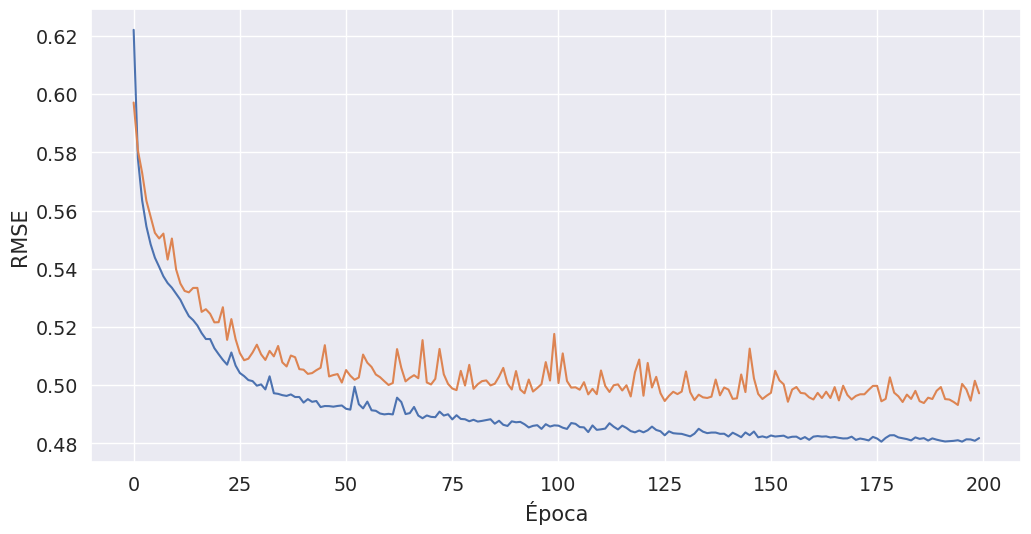

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 25s - loss: 1.0349

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.7416 

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.6818

 5600/12384 [============>.................] - ETA: 0s - loss: 0.6339

 7488/12384 [=================>............] - ETA: 0s - loss: 0.5943

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.5689

11232/12384 [==========================>...] - ETA: 0s - loss: 0.5471

12384/12384 [==============================] - 1s 46us/step - loss: 0.5348 - val_loss: 0.4198


Epoch 2/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5468

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.4258

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.4049

 5760/12384 [============>.................] - ETA: 0s - loss: 0.3925

 7776/12384 [=================>............] - ETA: 0s - loss: 0.3942

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3868

11872/12384 [===========================>..] - ETA: 0s - loss: 0.3768

12384/12384 [==============================] - 0s 40us/step - loss: 0.3741 - val_loss: 0.3582


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6302

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.3543

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.3560

 5472/12384 [============>.................] - ETA: 0s - loss: 0.3545

 7168/12384 [================>.............] - ETA: 0s - loss: 0.3487

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.3460

10816/12384 [=========================>....] - ETA: 0s - loss: 0.3415

12384/12384 [==============================] - 1s 41us/step - loss: 0.3401 - val_loss: 0.3434


Epoch 4/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3295

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.3390

 2976/12384 [======>.......................] - ETA: 0s - loss: 0.3330

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.3266

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.3266

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.3298

10784/12384 [=========================>....] - ETA: 0s - loss: 0.3306

12384/12384 [==============================] - 1s 41us/step - loss: 0.3291 - val_loss: 0.3346


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2643

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3178

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.3311

 5920/12384 [=============>................] - ETA: 0s - loss: 0.3225

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.3213

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.3212

12064/12384 [============================>.] - ETA: 0s - loss: 0.3218

12384/12384 [==============================] - 0s 39us/step - loss: 0.3213 - val_loss: 0.3277


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3511

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.3042

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2935

 5888/12384 [=============>................] - ETA: 0s - loss: 0.3096

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.3219

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.3203

12000/12384 [============================>.] - ETA: 0s - loss: 0.3159

12384/12384 [==============================] - 0s 39us/step - loss: 0.3153 - val_loss: 0.3249


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2745

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3245

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.3194

 5984/12384 [=============>................] - ETA: 0s - loss: 0.3123

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.3143

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.3140

11968/12384 [===========================>..] - ETA: 0s - loss: 0.3115

12384/12384 [==============================] - 0s 39us/step - loss: 0.3098 - val_loss: 0.3192


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3450

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.3169

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.3114

 5376/12384 [============>.................] - ETA: 0s - loss: 0.3012

 7168/12384 [================>.............] - ETA: 0s - loss: 0.3052

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.3097

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3044

12384/12384 [==============================] - 0s 40us/step - loss: 0.3053 - val_loss: 0.3125


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1867

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2898

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2973

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2987

 7744/12384 [=================>............] - ETA: 0s - loss: 0.3030

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.3037

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3041

12384/12384 [==============================] - 1s 40us/step - loss: 0.3012 - val_loss: 0.3088


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3049

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2759

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2851

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2982

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2946

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2973

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2940

12384/12384 [==============================] - 0s 39us/step - loss: 0.2973 - val_loss: 0.3056


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4900

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3261

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2975

 6112/12384 [=============>................] - ETA: 0s - loss: 0.3013

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2981

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2961

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2936

12384/12384 [==============================] - 0s 39us/step - loss: 0.2942 - val_loss: 0.3029


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1451

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3030

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.3001

 5760/12384 [============>.................] - ETA: 0s - loss: 0.3015

 7712/12384 [=================>............] - ETA: 0s - loss: 0.3016

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2959

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2933

12384/12384 [==============================] - 0s 40us/step - loss: 0.2914 - val_loss: 0.3009


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2150

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3356

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.3059

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2957

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2930

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2912

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2902

12384/12384 [==============================] - 0s 40us/step - loss: 0.2887 - val_loss: 0.2976


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2326

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2668

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2896

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2878

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2822

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2832

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2860

12384/12384 [==============================] - 1s 41us/step - loss: 0.2867 - val_loss: 0.2958


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2051

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2882

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2982

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2930

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2917

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2841

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2861

12384/12384 [==============================] - 0s 40us/step - loss: 0.2845 - val_loss: 0.2953


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2810

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2610

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2640

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2703

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2729

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2756

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2755

12384/12384 [==============================] - 1s 42us/step - loss: 0.2820 - val_loss: 0.2928


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3134

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2494

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2711

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2743

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2780

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2776

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2768

12384/12384 [==============================] - 1s 40us/step - loss: 0.2803 - val_loss: 0.2919


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3052

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2593

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2676

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2598

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2711

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2777

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2776

12384/12384 [==============================] - 0s 39us/step - loss: 0.2785 - val_loss: 0.2879


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2728

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2843

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2822

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2727

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2702



10368/12384 [========================>.....] - ETA: 0s - loss: 0.2711

12384/12384 [==============================] - 0s 37us/step - loss: 0.2759 - val_loss: 0.2870


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3748

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2814

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2738

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2671

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2704

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2742

12352/12384 [============================>.] - ETA: 0s - loss: 0.2745

12384/12384 [==============================] - 0s 38us/step - loss: 0.2743 - val_loss: 0.2848


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1634

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2772

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2931

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2780

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2809

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2736

12320/12384 [============================>.] - ETA: 0s - loss: 0.2733

12384/12384 [==============================] - 0s 39us/step - loss: 0.2730 - val_loss: 0.2836


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3701

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2831

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2732

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2795

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2715

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2772

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2724

12384/12384 [==============================] - 1s 41us/step - loss: 0.2719 - val_loss: 0.2815


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1750

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2806

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2729

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2747

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2734

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2722

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2704

12384/12384 [==============================] - 0s 39us/step - loss: 0.2705 - val_loss: 0.2825


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2979

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2559

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2643

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2639

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2672

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2692

12384/12384 [==============================] - 0s 37us/step - loss: 0.2694 - val_loss: 0.2814


Epoch 25/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1785

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2926

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2882

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2752

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2679

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2679

12096/12384 [============================>.] - ETA: 0s - loss: 0.2684

12384/12384 [==============================] - 0s 38us/step - loss: 0.2682 - val_loss: 0.2792


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1721

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2630

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2797

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2729

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2625

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2630

12384/12384 [==============================] - 0s 38us/step - loss: 0.2671 - val_loss: 0.2798


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2224

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2633

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2681

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2652

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2651



10336/12384 [========================>.....] - ETA: 0s - loss: 0.2642

12384/12384 [==============================] - 0s 38us/step - loss: 0.2662 - val_loss: 0.2771


Epoch 28/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4601

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2867

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2802

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2760

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2712

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2721

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2666

12384/12384 [==============================] - 0s 39us/step - loss: 0.2656 - val_loss: 0.2773


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1966

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2593

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2512

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2638

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2641

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2621

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2649

12384/12384 [==============================] - 0s 39us/step - loss: 0.2647 - val_loss: 0.2739


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3311

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2607

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2641

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2633

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2642

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2665



12224/12384 [============================>.] - ETA: 0s - loss: 0.2627

12384/12384 [==============================] - 0s 38us/step - loss: 0.2641 - val_loss: 0.2748


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3086

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2591

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2802

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2692

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2656

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2646

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2661

12384/12384 [==============================] - 1s 41us/step - loss: 0.2636 - val_loss: 0.2729


Epoch 32/200
   32/12384 [..............................] - ETA: 1s - loss: 0.6300

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2637

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2798

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2682

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2732

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2672

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2628

12384/12384 [==============================] - 1s 40us/step - loss: 0.2628 - val_loss: 0.2725


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2317

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2617

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2612

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2549

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2578

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2594

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2589

12384/12384 [==============================] - 1s 41us/step - loss: 0.2624 - val_loss: 0.2728


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3926

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2968

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2805

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2735

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2726

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2651

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2640

12384/12384 [==============================] - 0s 40us/step - loss: 0.2616 - val_loss: 0.2730


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2146

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2554

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2673

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2609

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2609



 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2574

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2591

12384/12384 [==============================] - 1s 45us/step - loss: 0.2608 - val_loss: 0.2716


Epoch 36/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2723

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2631

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2696

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2649

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2610

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2608

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2601

12384/12384 [==============================] - 0s 40us/step - loss: 0.2610 - val_loss: 0.2710


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0816

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2378

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2552

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2563

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2574

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2647

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2615

12384/12384 [==============================] - 1s 41us/step - loss: 0.2604 - val_loss: 0.2725


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4469

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2660

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2513

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2554

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2564

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2648

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2618

12384/12384 [==============================] - 0s 39us/step - loss: 0.2601 - val_loss: 0.2710


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2753

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2723

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2592

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2612

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2619

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2588

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2601

12384/12384 [==============================] - 0s 40us/step - loss: 0.2599 - val_loss: 0.2694


Epoch 40/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1656

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2517

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2479

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2617

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2615

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2603

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2622

12384/12384 [==============================] - 1s 42us/step - loss: 0.2593 - val_loss: 0.2692


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2360

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2619

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2579

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2568

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2527

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2537

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2596

12384/12384 [==============================] - 0s 40us/step - loss: 0.2586 - val_loss: 0.2693


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1821

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2736

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2562

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2535

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2564

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2556

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2584

12384/12384 [==============================] - 1s 41us/step - loss: 0.2585 - val_loss: 0.2701


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2592

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2212

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2466

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2533

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2570

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2583

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2557

12384/12384 [==============================] - 0s 39us/step - loss: 0.2585 - val_loss: 0.2695


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5120

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2518

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2481

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2555

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2533

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2561

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2579

12384/12384 [==============================] - 0s 40us/step - loss: 0.2581 - val_loss: 0.2690


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3177

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2706

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2583

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2555

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2625

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2576

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2596

12384/12384 [==============================] - 1s 41us/step - loss: 0.2577 - val_loss: 0.2679


Epoch 46/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3996

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2668

 3200/12384 [======>.......................] - ETA: 0s - loss: 0.2635

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2592

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2581

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2584

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2578

12320/12384 [============================>.] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 1s 43us/step - loss: 0.2573 - val_loss: 0.2689


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2250

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2456

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2529

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2549

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2610

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2585

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2588

12384/12384 [==============================] - 0s 40us/step - loss: 0.2568 - val_loss: 0.2673


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1196

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2672

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2603

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2570

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2576

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2562

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2578

12384/12384 [==============================] - 0s 40us/step - loss: 0.2570 - val_loss: 0.2675


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4761

 1504/12384 [==>...........................] - ETA: 0s - loss: 0.2547

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2505

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2501

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2588

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2595

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2549

12384/12384 [==============================] - 1s 43us/step - loss: 0.2567 - val_loss: 0.2668


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2991

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2466

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2553

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2625

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2645

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2581

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2555

12384/12384 [==============================] - 1s 41us/step - loss: 0.2564 - val_loss: 0.2664


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2846

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2646

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2625

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2625

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2606

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2582

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 40us/step - loss: 0.2560 - val_loss: 0.2662


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3207

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2625

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2556

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2521

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2534

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2555

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 40us/step - loss: 0.2561 - val_loss: 0.2662


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1850

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2587

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2648

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2572

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2542

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2524

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2554

12384/12384 [==============================] - 0s 40us/step - loss: 0.2557 - val_loss: 0.2659


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2176

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2513

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2518

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2598

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2603

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2562

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 1s 42us/step - loss: 0.2549 - val_loss: 0.2667


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3632

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2810

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2531

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2552

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2613

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2551

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 1s 41us/step - loss: 0.2552 - val_loss: 0.2652


Epoch 56/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1365

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2640

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2508

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2538

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2584

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2560

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2552

12384/12384 [==============================] - 1s 42us/step - loss: 0.2547 - val_loss: 0.2668


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2273

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2426

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2571

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2546

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2497

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2516

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2548

12384/12384 [==============================] - 1s 41us/step - loss: 0.2547 - val_loss: 0.2652


Epoch 58/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1731

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2388

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2494

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2643

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2585

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2594

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2583

12384/12384 [==============================] - 1s 41us/step - loss: 0.2544 - val_loss: 0.2649


Epoch 59/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1703

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2494

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2442

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2461

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2507

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2498

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 40us/step - loss: 0.2539 - val_loss: 0.2650


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3645

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2757

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2658

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2646

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2598

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2570

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2530

12384/12384 [==============================] - 1s 42us/step - loss: 0.2534 - val_loss: 0.2651


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2644

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2717

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2603

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2576

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2587

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2576

12064/12384 [============================>.] - ETA: 0s - loss: 0.2546

12384/12384 [==============================] - 0s 39us/step - loss: 0.2536 - val_loss: 0.2638


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1180

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2470

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2478

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2459

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2512

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2538

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 0s 40us/step - loss: 0.2532 - val_loss: 0.2638


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1862

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2796

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2596

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2542

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2577

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2517

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2534

12384/12384 [==============================] - 0s 39us/step - loss: 0.2528 - val_loss: 0.2660


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1701

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2367

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2393

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2557

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2538

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2517

12160/12384 [============================>.] - ETA: 0s - loss: 0.2525

12384/12384 [==============================] - 0s 38us/step - loss: 0.2526 - val_loss: 0.2679


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3305

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2322

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2347

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2389

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2464

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2458

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 1s 41us/step - loss: 0.2529 - val_loss: 0.2635


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2488

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2620

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2570

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2564

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2544

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 1s 41us/step - loss: 0.2522 - val_loss: 0.2640


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2172

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2548

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2457

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2515

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2457

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2470

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2530

12384/12384 [==============================] - 1s 41us/step - loss: 0.2525 - val_loss: 0.2635


Epoch 68/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2909

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2415

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2464

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2447

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2463

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2505

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 40us/step - loss: 0.2517 - val_loss: 0.2645


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2828

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2417

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2492

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2523

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2557

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2521

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 1s 42us/step - loss: 0.2516 - val_loss: 0.2634


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1835

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2485

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2533

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2470

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2511

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2502

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2482

12384/12384 [==============================] - 1s 41us/step - loss: 0.2514 - val_loss: 0.2638


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1771

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2252

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2442

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2501

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2543

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2485

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 0s 39us/step - loss: 0.2512 - val_loss: 0.2644


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1746

 1504/12384 [==>...........................] - ETA: 0s - loss: 0.2315

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2503

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2539

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2549

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2523

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 40us/step - loss: 0.2512 - val_loss: 0.2650


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2034

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2643

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2514

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2412

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2434

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2469

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 1s 42us/step - loss: 0.2504 - val_loss: 0.2632


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1748

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2338

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2412

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2435

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2504

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2519

12352/12384 [============================>.] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 38us/step - loss: 0.2502 - val_loss: 0.2646


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2351

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2454

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2298

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2354

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2386

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2448

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 40us/step - loss: 0.2505 - val_loss: 0.2619


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5646

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2475

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2539

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2541

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2600

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2533

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2517

12384/12384 [==============================] - 0s 40us/step - loss: 0.2504 - val_loss: 0.2623


Epoch 77/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4702

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2661

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2648

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2575

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2527

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2521

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 1s 42us/step - loss: 0.2497 - val_loss: 0.2616


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2725

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2490

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2570

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2483

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2467

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2461

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2468

12384/12384 [==============================] - 1s 42us/step - loss: 0.2499 - val_loss: 0.2624


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4144

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2457

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2480

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2484

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2477

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2488

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 1s 42us/step - loss: 0.2495 - val_loss: 0.2616


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1765

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2527

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2553

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2533

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2563

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2551



11904/12384 [===========================>..] - ETA: 0s - loss: 0.2507

12384/12384 [==============================] - 0s 39us/step - loss: 0.2493 - val_loss: 0.2611


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2904

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2574

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2405

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2450

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2515

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2490

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2498

12384/12384 [==============================] - 1s 41us/step - loss: 0.2488 - val_loss: 0.2620


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3716

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2540

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2456

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2506

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2493

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2454

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2499

12384/12384 [==============================] - 0s 40us/step - loss: 0.2492 - val_loss: 0.2617


Epoch 83/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5223

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2465

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2437

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2458

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2444

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 38us/step - loss: 0.2487 - val_loss: 0.2618


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3748

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2541

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2454

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2437

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2489

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2498

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2476

12384/12384 [==============================] - 1s 41us/step - loss: 0.2488 - val_loss: 0.2604


Epoch 85/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2165

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2495

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2532

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2540

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2430

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2441

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 40us/step - loss: 0.2480 - val_loss: 0.2632


Epoch 86/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4671

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2519

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2580

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2563

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2549

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2538

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2523

12384/12384 [==============================] - 1s 41us/step - loss: 0.2484 - val_loss: 0.2604


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1290

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2417

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2565

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2486

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2483

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2473

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 1s 42us/step - loss: 0.2480 - val_loss: 0.2603


Epoch 88/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1825

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2376

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2307

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2349

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2348

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2457

12064/12384 [============================>.] - ETA: 0s - loss: 0.2463

12384/12384 [==============================] - 0s 39us/step - loss: 0.2480 - val_loss: 0.2601


Epoch 89/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1683

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2457

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2378

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2368

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2484

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2459

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 1s 41us/step - loss: 0.2478 - val_loss: 0.2616


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1822

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2386

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2452

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2414

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2440

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2443

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2476

12384/12384 [==============================] - 0s 39us/step - loss: 0.2478 - val_loss: 0.2603


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3764

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2533

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2353

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2445

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2456



 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2477

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2497

12384/12384 [==============================] - 1s 44us/step - loss: 0.2472 - val_loss: 0.2595


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2362

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2317

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2384

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2437

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2475

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2492

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 1s 41us/step - loss: 0.2474 - val_loss: 0.2595


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2107

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2331

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2375

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2472

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2498

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2456

12064/12384 [============================>.] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 40us/step - loss: 0.2471 - val_loss: 0.2589


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1921

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2640

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2624

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2530

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2490

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2432

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2439



12384/12384 [==============================] - 1s 41us/step - loss: 0.2469 - val_loss: 0.2592


Epoch 95/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2150

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2202

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2329

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2422

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2418

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2454

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 1s 41us/step - loss: 0.2466 - val_loss: 0.2586


Epoch 96/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1402

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2452

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2352

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2366

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2378

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2386

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2457

12192/12384 [============================>.] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 1s 43us/step - loss: 0.2465 - val_loss: 0.2605


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2465

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2642

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2565

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2490

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2466

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2489

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 1s 40us/step - loss: 0.2462 - val_loss: 0.2588


Epoch 98/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3378

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2606

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2599

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2505

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2473

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2506

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 1s 41us/step - loss: 0.2461 - val_loss: 0.2577


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2932

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2477

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2588

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2448

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2482

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2464

12128/12384 [============================>.] - ETA: 0s - loss: 0.2454

12384/12384 [==============================] - 0s 38us/step - loss: 0.2462 - val_loss: 0.2572


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2167

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2364

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2442

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2439

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2463

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2440

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2465

12384/12384 [==============================] - 1s 41us/step - loss: 0.2457 - val_loss: 0.2587


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3479

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2479

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2345

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2426

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2407

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2414

12064/12384 [============================>.] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 40us/step - loss: 0.2452 - val_loss: 0.2583


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2286

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2278

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2394

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2396



 7808/12384 [=================>............] - ETA: 0s - loss: 0.2367

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2385

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 40us/step - loss: 0.2456 - val_loss: 0.2577


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1152

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2399

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2444

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2473

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2459

12352/12384 [============================>.] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 38us/step - loss: 0.2453 - val_loss: 0.2575


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4083

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2437

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2527

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2451

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2437

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 37us/step - loss: 0.2449 - val_loss: 0.2572


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3935

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2356

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2527

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2441

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2473

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 38us/step - loss: 0.2452 - val_loss: 0.2584


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2792

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2383

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2527

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2503

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2456

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2464

12000/12384 [============================>.] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 39us/step - loss: 0.2450 - val_loss: 0.2562


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5071

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2622

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2554

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2553

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2484

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2441

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 39us/step - loss: 0.2446 - val_loss: 0.2565


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1812

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2466

 3104/12384 [======>.......................] - ETA: 0s - loss: 0.2435

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2397

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2412

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2456

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 1s 41us/step - loss: 0.2442 - val_loss: 0.2558


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2585

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2498

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2567

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2435

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2413

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2437

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2448



12384/12384 [==============================] - 1s 41us/step - loss: 0.2440 - val_loss: 0.2573


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2229

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2414

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2440

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2455

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2513

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2435

12000/12384 [============================>.] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 40us/step - loss: 0.2448 - val_loss: 0.2561


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1931

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2398

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2451

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2483

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2439

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2440

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 1s 42us/step - loss: 0.2435 - val_loss: 0.2555


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2642

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2411

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2532

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2414

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2437

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2420

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 39us/step - loss: 0.2440 - val_loss: 0.2559


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1259

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2340

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2409

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2426



 7520/12384 [=================>............] - ETA: 0s - loss: 0.2426

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2432

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2463

12384/12384 [==============================] - 1s 42us/step - loss: 0.2439 - val_loss: 0.2566


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2873

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2423

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2543

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2418

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2384

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2377

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 1s 42us/step - loss: 0.2435 - val_loss: 0.2547


Epoch 115/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3676

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2425

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2322

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2376

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2403

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2461

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 1s 41us/step - loss: 0.2436 - val_loss: 0.2551


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2029

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2499

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2558

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2455

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2407

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2436

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 1s 41us/step - loss: 0.2431 - val_loss: 0.2551


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2068

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2487

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2375

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2395

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2472

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2467

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 1s 41us/step - loss: 0.2428 - val_loss: 0.2545


Epoch 118/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2114

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2728

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2453

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2435

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2441

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2448

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2436

12224/12384 [============================>.] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 1s 43us/step - loss: 0.2429 - val_loss: 0.2561


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5183

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2570

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2475

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2449

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2398

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2423

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 40us/step - loss: 0.2427 - val_loss: 0.2549


Epoch 120/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1422

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2465

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2410

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2471

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2416

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2424

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 40us/step - loss: 0.2422 - val_loss: 0.2565


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4546

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2462

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2445

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2435

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2501

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2445

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 40us/step - loss: 0.2425 - val_loss: 0.2561


Epoch 122/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3065

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2284

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2363

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2379

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2408

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2438

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 40us/step - loss: 0.2423 - val_loss: 0.2544


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1307

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2388

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2326

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2349

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2455

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2424

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 1s 43us/step - loss: 0.2421 - val_loss: 0.2538


Epoch 124/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1697

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2350

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2413

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2433

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2405

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2401

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 40us/step - loss: 0.2417 - val_loss: 0.2548


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1123

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2279

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2287

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2383

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2362

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2369

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 1s 41us/step - loss: 0.2419 - val_loss: 0.2533


Epoch 126/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4119

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2602

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2494

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2452

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2430

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2369

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 1s 41us/step - loss: 0.2419 - val_loss: 0.2548


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4243

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2606

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2446

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2357

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2401

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2394

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 40us/step - loss: 0.2415 - val_loss: 0.2537


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2624

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2461

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2484

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2444

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2432

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2421

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 1s 41us/step - loss: 0.2414 - val_loss: 0.2542


Epoch 129/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2071

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2464

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2464

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2372

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2394

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2387

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 40us/step - loss: 0.2407 - val_loss: 0.2531


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0948

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2467

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2370

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2408

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2422



 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2409

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 0s 40us/step - loss: 0.2409 - val_loss: 0.2538


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2008

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2345

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2374

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2342

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2326

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2375

12320/12384 [============================>.] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 39us/step - loss: 0.2407 - val_loss: 0.2543


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1271

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2527

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2474

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2422

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 38us/step - loss: 0.2408 - val_loss: 0.2526


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1975

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2359

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2375

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2320

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2397

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 38us/step - loss: 0.2403 - val_loss: 0.2548


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2093

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2425

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2407

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2400

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2426

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2451

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 1s 41us/step - loss: 0.2406 - val_loss: 0.2529


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1376

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2526

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2444

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2437

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2427

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2433

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 40us/step - loss: 0.2401 - val_loss: 0.2532


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4502

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2618

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2565

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2551

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2465

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2416

12224/12384 [============================>.] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 38us/step - loss: 0.2401 - val_loss: 0.2520


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1691

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2234

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2287

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2302

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2408

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2388

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 39us/step - loss: 0.2398 - val_loss: 0.2516


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1228

 1632/12384 [==>...........................] - ETA: 0s - loss: 0.2450

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2562

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2473

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2403

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2389

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 1s 41us/step - loss: 0.2393 - val_loss: 0.2533


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1060

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2424

 3232/12384 [======>.......................] - ETA: 0s - loss: 0.2517

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2558

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2504

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2467

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 1s 42us/step - loss: 0.2402 - val_loss: 0.2517


Epoch 140/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1285

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2305

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2339

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2363

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2365

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2368

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 1s 41us/step - loss: 0.2398 - val_loss: 0.2514


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3474

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2531

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2465

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2374

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2394



 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2372



11072/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 1s 40us/step - loss: 0.2394 - val_loss: 0.2533


Epoch 142/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2056

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2319

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2440

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2362

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2450

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2417

12256/12384 [============================>.] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 38us/step - loss: 0.2395 - val_loss: 0.2521


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2191

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2258

 3168/12384 [======>.......................] - ETA: 0s - loss: 0.2284

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2394

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2455

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2430

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2440

12128/12384 [============================>.] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 1s 42us/step - loss: 0.2391 - val_loss: 0.2524


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3176

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2501

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2436

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2384

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2404

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2381

12000/12384 [============================>.] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 40us/step - loss: 0.2391 - val_loss: 0.2525


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1595

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2577

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2438

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2396

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2357

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2351

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 1s 41us/step - loss: 0.2394 - val_loss: 0.2515


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3968

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2412

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2224

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2400

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2426

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2364

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 40us/step - loss: 0.2386 - val_loss: 0.2515


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3068

 1632/12384 [==>...........................] - ETA: 0s - loss: 0.2158

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2174

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2276

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2344

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2363

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 1s 41us/step - loss: 0.2390 - val_loss: 0.2508


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2170

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2578

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2505

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2481

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2419

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2410

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 1s 41us/step - loss: 0.2388 - val_loss: 0.2513


Epoch 149/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2598

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2252

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2267

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2251

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2271

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2286

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2291

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 1s 46us/step - loss: 0.2383 - val_loss: 0.2509


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4105

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2311

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2300

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2349

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2368

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 38us/step - loss: 0.2382 - val_loss: 0.2522


Epoch 151/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2589

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2320

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2342

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2380

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2384

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2372

12000/12384 [============================>.] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 1s 40us/step - loss: 0.2379 - val_loss: 0.2505


Epoch 152/200
   32/12384 [..............................] - ETA: 1s - loss: 0.7414

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2446

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2423

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2410

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2440

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2413

12288/12384 [============================>.] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 38us/step - loss: 0.2383 - val_loss: 0.2520


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1987

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2646

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2466

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2395

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2431

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2430

12000/12384 [============================>.] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 38us/step - loss: 0.2381 - val_loss: 0.2508


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1635

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2442

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2519

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2442

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2381

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2357

12224/12384 [============================>.] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 38us/step - loss: 0.2382 - val_loss: 0.2512


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3702

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2409

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2354

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2326



 7584/12384 [=================>............] - ETA: 0s - loss: 0.2361

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2382

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 39us/step - loss: 0.2378 - val_loss: 0.2507


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4407

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2428

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2413

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2401

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2390

12128/12384 [============================>.] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 39us/step - loss: 0.2378 - val_loss: 0.2519


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1988

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2420

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2469

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2386

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2390

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2420

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 1s 42us/step - loss: 0.2371 - val_loss: 0.2504


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1570

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2416

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2370

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2409

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2408

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2407

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 40us/step - loss: 0.2372 - val_loss: 0.2508


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0890

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2450

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2397

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2379

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2334

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2377

12256/12384 [============================>.] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 40us/step - loss: 0.2369 - val_loss: 0.2504


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1656

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2096

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2225

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2259

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2342

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2404

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 1s 41us/step - loss: 0.2369 - val_loss: 0.2498


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2909

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2488

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2492

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2387

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2403

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2353

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 1s 43us/step - loss: 0.2373 - val_loss: 0.2492


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1639

 1568/12384 [==>...........................] - ETA: 0s - loss: 0.2458

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.2423

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2295

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2364

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2343

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 39us/step - loss: 0.2369 - val_loss: 0.2513


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2592

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2314

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2399

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2376

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2395

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2404

12320/12384 [============================>.] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 38us/step - loss: 0.2369 - val_loss: 0.2506


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2159

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2443

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2450

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2457

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2439

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2414

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 39us/step - loss: 0.2365 - val_loss: 0.2489


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2174

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2207

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2347

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2314

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2308

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2367

12096/12384 [============================>.] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 38us/step - loss: 0.2370 - val_loss: 0.2504


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2383

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2395

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2375

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2337

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2289

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2350

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 1s 41us/step - loss: 0.2366 - val_loss: 0.2497


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5292

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2397

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2428

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2431

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2402

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2378

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 39us/step - loss: 0.2362 - val_loss: 0.2492


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1637

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2303

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2284

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2330

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2377

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 39us/step - loss: 0.2366 - val_loss: 0.2501


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2811

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2117

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2216

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2323

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2314

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2317

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 1s 42us/step - loss: 0.2363 - val_loss: 0.2492


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.7597

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2426

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2390

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2344

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2378

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2385

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2366

12288/12384 [============================>.] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 1s 43us/step - loss: 0.2363 - val_loss: 0.2487


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1408

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2314

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2294

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2328

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2350



 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2328



11744/12384 [===========================>..] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 1s 41us/step - loss: 0.2356 - val_loss: 0.2502


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2306

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2357

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2284

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2350

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2396

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 40us/step - loss: 0.2360 - val_loss: 0.2484


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3243

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2520

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2402

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2350

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2321

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2319

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 40us/step - loss: 0.2357 - val_loss: 0.2482


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1511

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2318

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2462

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2426

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2391

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2363



11264/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 1s 42us/step - loss: 0.2353 - val_loss: 0.2483


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2132

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2382

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2364

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2461

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2476

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2421

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 1s 41us/step - loss: 0.2356 - val_loss: 0.2491


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2341

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2548

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2405

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2368

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2295

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2292

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 1s 40us/step - loss: 0.2353 - val_loss: 0.2483


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2015

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2325

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2291

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2314

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2333

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2362

12000/12384 [============================>.] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 1s 41us/step - loss: 0.2352 - val_loss: 0.2486


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2078

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2209

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2236

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2280

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2289

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2365

12096/12384 [============================>.] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 38us/step - loss: 0.2354 - val_loss: 0.2499


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1864

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2040

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2197

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2249

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2268

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 37us/step - loss: 0.2345 - val_loss: 0.2494


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1366

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2141

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2264

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2350

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2367

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2371

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 1s 43us/step - loss: 0.2352 - val_loss: 0.2492


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1434

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2178

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2202

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2301

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2325

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2402

12320/12384 [============================>.] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 39us/step - loss: 0.2351 - val_loss: 0.2473


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1597

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2390

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2392

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2385

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2374

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2327

12256/12384 [============================>.] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 38us/step - loss: 0.2348 - val_loss: 0.2487


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2931

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2506

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2417

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2353

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2398

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2351

12288/12384 [============================>.] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 38us/step - loss: 0.2345 - val_loss: 0.2507


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2784

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2320

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2454

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2372

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2347

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2343

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 39us/step - loss: 0.2348 - val_loss: 0.2483


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1230

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2040

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2131

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2325

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2342

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2289

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 40us/step - loss: 0.2349 - val_loss: 0.2488


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1545

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2366

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2409

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2387

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2338

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2340

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 39us/step - loss: 0.2341 - val_loss: 0.2494


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1397

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2368

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2395

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2406

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2366

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 1s 41us/step - loss: 0.2349 - val_loss: 0.2481


Epoch 188/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2650

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2476

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2328

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2380

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2417

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2388

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 40us/step - loss: 0.2343 - val_loss: 0.2484


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1820

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2353

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2309

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2327

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 37us/step - loss: 0.2341 - val_loss: 0.2485


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2611

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2238

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2390

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2348

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2330

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 37us/step - loss: 0.2341 - val_loss: 0.2477


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0673

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2173

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2282

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2270

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2315

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 1s 41us/step - loss: 0.2342 - val_loss: 0.2483


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2401

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2398

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2354

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2331

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2353

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 39us/step - loss: 0.2337 - val_loss: 0.2473


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4792

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2341

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2335

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2331

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 37us/step - loss: 0.2337 - val_loss: 0.2484


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2969

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2205

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2312

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2340

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2311

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 37us/step - loss: 0.2336 - val_loss: 0.2472


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2589

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2410

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2451

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2292

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2288

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12096/12384 [============================>.] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 39us/step - loss: 0.2337 - val_loss: 0.2482


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3772

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2301

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2378

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2413

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2340

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2324

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 1s 41us/step - loss: 0.2331 - val_loss: 0.2476


Epoch 197/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2359

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2347

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2387

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2305

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2290

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2338

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 40us/step - loss: 0.2335 - val_loss: 0.2477


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2607

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2277

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2291

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2277

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2302

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 39us/step - loss: 0.2328 - val_loss: 0.2481


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0896

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2366

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2300

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2322

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2349

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2345

12096/12384 [============================>.] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 39us/step - loss: 0.2328 - val_loss: 0.2490


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1415

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2184

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2239

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2265

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2241

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2289

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 40us/step - loss: 0.2329 - val_loss: 0.2471


No handles with labels found to put in legend.


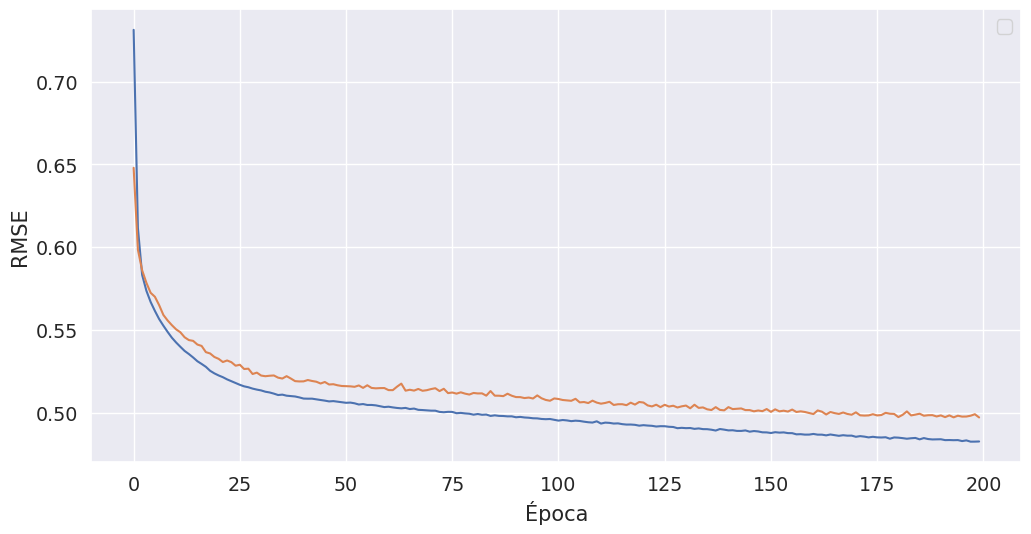

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 33s - loss: 0.7804

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.7123 

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.6433

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.5879

 7040/12384 [================>.............] - ETA: 0s - loss: 0.5490

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.5294

10560/12384 [========================>.....] - ETA: 0s - loss: 0.5050

12384/12384 [==============================] - 1s 50us/step - loss: 0.4869 - val_loss: 0.3938


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1766

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.3856

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.3708

 5408/12384 [============>.................] - ETA: 0s - loss: 0.3597

 7328/12384 [================>.............] - ETA: 0s - loss: 0.3617

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.3628

11104/12384 [=========================>....] - ETA: 0s - loss: 0.3594

12384/12384 [==============================] - 1s 42us/step - loss: 0.3565 - val_loss: 0.3545


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2550

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.3084

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.3135

 5632/12384 [============>.................] - ETA: 0s - loss: 0.3234

 7520/12384 [=================>............] - ETA: 0s - loss: 0.3268



 9408/12384 [=====================>........] - ETA: 0s - loss: 0.3295

11360/12384 [==========================>...] - ETA: 0s - loss: 0.3273

12384/12384 [==============================] - 1s 41us/step - loss: 0.3272 - val_loss: 0.3267


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3250

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.3232

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.3236

 5792/12384 [=============>................] - ETA: 0s - loss: 0.3189

 7744/12384 [=================>............] - ETA: 0s - loss: 0.3191

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.3176

11616/12384 [===========================>..] - ETA: 0s - loss: 0.3123

12384/12384 [==============================] - 0s 40us/step - loss: 0.3113 - val_loss: 0.3147


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4686

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.3105

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.3035

 5504/12384 [============>.................] - ETA: 0s - loss: 0.3060

 7328/12384 [================>.............] - ETA: 0s - loss: 0.3028

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.3051

11104/12384 [=========================>....] - ETA: 0s - loss: 0.3023

12384/12384 [==============================] - 1s 41us/step - loss: 0.3003 - val_loss: 0.3044


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2177

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2935

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.3012

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2950

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2992

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.3004

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2969

12384/12384 [==============================] - 1s 42us/step - loss: 0.2933 - val_loss: 0.2983


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1402

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2977

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2966

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2866

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2896

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2909

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2879

12384/12384 [==============================] - 0s 40us/step - loss: 0.2868 - val_loss: 0.2925


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4744

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2844

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2938

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2879

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2839

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2831

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2850

12032/12384 [============================>.] - ETA: 0s - loss: 0.2818

12384/12384 [==============================] - 1s 44us/step - loss: 0.2826 - val_loss: 0.2898


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2390

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2706

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2760

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2723

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2760

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2788

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2762

12224/12384 [============================>.] - ETA: 0s - loss: 0.2777

12384/12384 [==============================] - 1s 43us/step - loss: 0.2772 - val_loss: 0.2854


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1683

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2882

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2691

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2706

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2781

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2739

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2729

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2759

12384/12384 [==============================] - 1s 44us/step - loss: 0.2742 - val_loss: 0.2833


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3244

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2754

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2804

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2772

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2729

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2726

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2714

12384/12384 [==============================] - 0s 40us/step - loss: 0.2702 - val_loss: 0.2803


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3401

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2468

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2589

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2619

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2698

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2665

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2657

12384/12384 [==============================] - 1s 41us/step - loss: 0.2663 - val_loss: 0.2777


Epoch 13/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1921

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2756

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2783

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2663

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2646

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2615

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2608

12384/12384 [==============================] - 0s 40us/step - loss: 0.2632 - val_loss: 0.2747


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1893

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2604

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2739

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2584

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2578

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2619

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2608

12384/12384 [==============================] - 1s 41us/step - loss: 0.2591 - val_loss: 0.2707


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1118

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2575

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2634

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2533

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2530

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2574

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2571

12384/12384 [==============================] - 1s 41us/step - loss: 0.2562 - val_loss: 0.2661


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1833

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2417

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2494

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2482

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2479

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2476

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2496

12384/12384 [==============================] - 0s 40us/step - loss: 0.2530 - val_loss: 0.2671


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2223

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2307

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2431

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2504

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2533

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2531

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 40us/step - loss: 0.2496 - val_loss: 0.2608


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2642

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2420

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2409

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2391

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2368

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2417

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 40us/step - loss: 0.2466 - val_loss: 0.2610


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3967

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2322

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2448

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2451

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2454

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2446

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 1s 42us/step - loss: 0.2441 - val_loss: 0.2555


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2838

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2690

 3136/12384 [======>.......................] - ETA: 0s - loss: 0.2540

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2457

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2471

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2381

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2383

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12064/12384 [============================>.] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 1s 50us/step - loss: 0.2414 - val_loss: 0.2547


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1875

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2435

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2291

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2286

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2354

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2375

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 1s 42us/step - loss: 0.2398 - val_loss: 0.2508


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2174

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2554

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2387

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2397

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2401

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2412

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 1s 43us/step - loss: 0.2378 - val_loss: 0.2512


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3668

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2417

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2375

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2404

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2399

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2404

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 1s 42us/step - loss: 0.2358 - val_loss: 0.2518


Epoch 24/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4475

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2477

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2289

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2284

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2269

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2289

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 1s 41us/step - loss: 0.2348 - val_loss: 0.2484


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2845

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2254

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2182

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2232

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2324



 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2380

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 40us/step - loss: 0.2334 - val_loss: 0.2457


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4593

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2567

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2237

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2228

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2228

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2284

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 1s 43us/step - loss: 0.2325 - val_loss: 0.2456


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2390

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2293

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2298

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2322

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2283

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2317

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2329

12192/12384 [============================>.] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 1s 42us/step - loss: 0.2321 - val_loss: 0.2437


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3913

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2297

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2279

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2225

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2241

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2274

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 1s 40us/step - loss: 0.2313 - val_loss: 0.2437


Epoch 29/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2374

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2182

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2180

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2248

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2263

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2289

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2292

12224/12384 [============================>.] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 1s 44us/step - loss: 0.2301 - val_loss: 0.2426


Epoch 30/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2010

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2384

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2368

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2301

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2282

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2278

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2272

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 1s 47us/step - loss: 0.2295 - val_loss: 0.2445


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1537

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2260

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2270

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2323

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2373

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2347

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2341

12288/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 1s 43us/step - loss: 0.2289 - val_loss: 0.2431


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1861

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2135

 3008/12384 [======>.......................] - ETA: 0s - loss: 0.2153

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2236

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2241

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2261

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2314

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 1s 46us/step - loss: 0.2281 - val_loss: 0.2416


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3738

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2108

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2287

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2235

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2233

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2234

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 1s 41us/step - loss: 0.2280 - val_loss: 0.2416


Epoch 34/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2326

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2537

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2341

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2316

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2348

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2278



11744/12384 [===========================>..] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 40us/step - loss: 0.2278 - val_loss: 0.2427


Epoch 35/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1542

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2171

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2330

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2279

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2257

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2276

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 1s 42us/step - loss: 0.2267 - val_loss: 0.2419


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1214

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2189

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.2384

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2270

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2249

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2266

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2284

12352/12384 [============================>.] - ETA: 0s - loss: 0.2269

12384/12384 [==============================] - 1s 43us/step - loss: 0.2273 - val_loss: 0.2414


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1337

 1312/12384 [==>...........................] - ETA: 0s - loss: 0.2323

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2207

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2188

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2254

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2256

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2265

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 1s 46us/step - loss: 0.2260 - val_loss: 0.2395


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2086

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2447

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2396

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2380

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2340

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2303

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2275

12096/12384 [============================>.] - ETA: 0s - loss: 0.2269

12384/12384 [==============================] - 1s 45us/step - loss: 0.2261 - val_loss: 0.2396


Epoch 39/100


   32/12384 [..............................] - ETA: 0s - loss: 0.1675

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2219

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2282

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2291

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2345

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2314

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2276

12000/12384 [============================>.] - ETA: 0s - loss: 0.2244

12384/12384 [==============================] - 1s 45us/step - loss: 0.2255 - val_loss: 0.2385


Epoch 40/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3549

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2176

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2139

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2183

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2213

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2224

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2226

12160/12384 [============================>.] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 1s 44us/step - loss: 0.2257 - val_loss: 0.2425


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1611

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2236

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2183

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2234

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2256

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2279

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2232

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2241

12384/12384 [==============================] - 1s 44us/step - loss: 0.2248 - val_loss: 0.2391


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1946

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2306

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2271

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2297

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2263

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2284

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2270

12160/12384 [============================>.] - ETA: 0s - loss: 0.2253

12384/12384 [==============================] - 1s 43us/step - loss: 0.2244 - val_loss: 0.2389


Epoch 43/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3299

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2467

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2369

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2270

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2271

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2261

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2255

12256/12384 [============================>.] - ETA: 0s - loss: 0.2244

12384/12384 [==============================] - 1s 43us/step - loss: 0.2246 - val_loss: 0.2386


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3051

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2388

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2172

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2138

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2154

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2195

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 1s 42us/step - loss: 0.2244 - val_loss: 0.2389


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2968

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2407

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2427

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2375

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2318

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2285

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2238

12288/12384 [============================>.] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 1s 43us/step - loss: 0.2240 - val_loss: 0.2391


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1400

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2206

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2226

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2218

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2198

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2235

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2216

12384/12384 [==============================] - 1s 42us/step - loss: 0.2236 - val_loss: 0.2370


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4129

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2026

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2120

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2141

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2215

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2199



10080/12384 [=======================>......] - ETA: 0s - loss: 0.2205



11872/12384 [===========================>..] - ETA: 0s - loss: 0.2226

12384/12384 [==============================] - 1s 44us/step - loss: 0.2232 - val_loss: 0.2407


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2599

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2098

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2091

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2163

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2144

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2194

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2211

12384/12384 [==============================] - 1s 41us/step - loss: 0.2233 - val_loss: 0.2393


Epoch 49/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2077

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2216

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2218

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2149

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2164

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2205

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 1s 41us/step - loss: 0.2235 - val_loss: 0.2413


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3103

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2340

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2266

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2310

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2297

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2252

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 1s 41us/step - loss: 0.2229 - val_loss: 0.2391


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0774

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2090

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2159

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2161

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2184

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2174

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2198

12384/12384 [==============================] - 1s 41us/step - loss: 0.2232 - val_loss: 0.2377


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1728

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2420

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2371

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2245

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2229

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2210

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 39us/step - loss: 0.2229 - val_loss: 0.2378


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1045

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2247

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2208

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2195

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2240

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2242

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 1s 42us/step - loss: 0.2217 - val_loss: 0.2382


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4079

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2163

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2201

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2225

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2234

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2253

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 1s 42us/step - loss: 0.2217 - val_loss: 0.2375


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1011

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2120

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2153

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2175

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2195

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2209

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2203

12256/12384 [============================>.] - ETA: 0s - loss: 0.2216

12384/12384 [==============================] - 1s 43us/step - loss: 0.2216 - val_loss: 0.2367


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1278

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2209

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2106

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2232

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2281

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2242

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2245

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2224

12384/12384 [==============================] - 1s 43us/step - loss: 0.2220 - val_loss: 0.2350


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1414

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2169

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2192

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2258

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2214

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2216

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 1s 41us/step - loss: 0.2216 - val_loss: 0.2359


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2209

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2214

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2076

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2141

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2170

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2168

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2219

12384/12384 [==============================] - 1s 41us/step - loss: 0.2207 - val_loss: 0.2366


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4267

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2123

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2246

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2213

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2158

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2149

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2165

12384/12384 [==============================] - 1s 44us/step - loss: 0.2203 - val_loss: 0.2385


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3219

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2265

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2275

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2237

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2185

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2201

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 39us/step - loss: 0.2220 - val_loss: 0.2347


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3048

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2242

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2235

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2232

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2200

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2194

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 1s 42us/step - loss: 0.2207 - val_loss: 0.2360


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1642

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2234

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2228

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2219

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2184

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2222

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2202



12384/12384 [==============================] - 1s 41us/step - loss: 0.2204 - val_loss: 0.2353


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2553

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2022

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2114

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2055

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2105

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2141

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2176

12384/12384 [==============================] - 1s 42us/step - loss: 0.2197 - val_loss: 0.2417


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2693

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2286

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2341

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2356

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2282

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2234

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2184

12384/12384 [==============================] - 0s 40us/step - loss: 0.2205 - val_loss: 0.2347


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0889

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2022

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2101

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2188

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2218

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2198

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2210

12384/12384 [==============================] - 1s 40us/step - loss: 0.2202 - val_loss: 0.2354


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1946

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2268

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2119

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2108

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2133

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2169

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2216

12384/12384 [==============================] - 0s 40us/step - loss: 0.2196 - val_loss: 0.2339


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1872

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2019

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2181

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2285

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2273

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2246

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2214

12384/12384 [==============================] - 1s 42us/step - loss: 0.2193 - val_loss: 0.2370


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2052

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2224

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2279

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2225

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2245

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2241

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2217

12384/12384 [==============================] - 1s 41us/step - loss: 0.2194 - val_loss: 0.2349


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2613

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2223

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2206

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2221

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2170

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2165

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2215

12384/12384 [==============================] - 1s 43us/step - loss: 0.2191 - val_loss: 0.2367


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4452

 1632/12384 [==>...........................] - ETA: 0s - loss: 0.2190

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2215

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2225

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2267

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2266

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2241

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2183

12384/12384 [==============================] - 1s 44us/step - loss: 0.2189 - val_loss: 0.2377


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2581

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2197

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2237

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2161

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2151

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2151

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2185

12256/12384 [============================>.] - ETA: 0s - loss: 0.2201

12384/12384 [==============================] - 1s 43us/step - loss: 0.2199 - val_loss: 0.2341


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1582

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2113

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2056

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2081

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2121

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2145

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2159

12384/12384 [==============================] - 1s 42us/step - loss: 0.2190 - val_loss: 0.2353


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3455

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2094

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2108

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2108

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2098

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2120

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2186

12160/12384 [============================>.] - ETA: 0s - loss: 0.2194

12384/12384 [==============================] - 1s 47us/step - loss: 0.2190 - val_loss: 0.2349


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3664

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2070

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2183

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2228

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2192

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2163

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2165

12384/12384 [==============================] - 1s 41us/step - loss: 0.2185 - val_loss: 0.2339


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3014

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2060

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2121

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2250

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2206

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2146

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2166

12384/12384 [==============================] - 1s 41us/step - loss: 0.2187 - val_loss: 0.2339


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2723

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2319

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2194

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2134

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2133

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2150

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2161

12384/12384 [==============================] - 1s 41us/step - loss: 0.2179 - val_loss: 0.2334


Epoch 77/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3505

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2336

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2254

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2192

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2194



 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2169

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2145

12384/12384 [==============================] - 1s 42us/step - loss: 0.2176 - val_loss: 0.2351


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1817

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2269

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2244

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2207

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2221

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2198

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2192

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2190

12384/12384 [==============================] - 1s 44us/step - loss: 0.2182 - val_loss: 0.2350


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1977

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2103

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2207

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2118

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2127

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2174

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2170

12384/12384 [==============================] - 1s 42us/step - loss: 0.2170 - val_loss: 0.2336


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2553

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2104

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2186

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2185

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2161

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2194

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2175

12384/12384 [==============================] - 0s 40us/step - loss: 0.2171 - val_loss: 0.2340


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1338

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2152

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2198

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2152

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2135

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2170

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2176

12384/12384 [==============================] - 0s 40us/step - loss: 0.2174 - val_loss: 0.2350


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1927

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2077

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2188

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2170

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2154

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2162

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2188

12384/12384 [==============================] - 0s 40us/step - loss: 0.2171 - val_loss: 0.2322


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3674

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2436

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2250

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2240

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2236

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2212

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2186

12384/12384 [==============================] - 1s 40us/step - loss: 0.2169 - val_loss: 0.2344


Epoch 84/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2775

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2394

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2255

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2246

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2154

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2157

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2128

12320/12384 [============================>.] - ETA: 0s - loss: 0.2165

12384/12384 [==============================] - 1s 43us/step - loss: 0.2168 - val_loss: 0.2335


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1697

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2217

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2294

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2118

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2164

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2185

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2139

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2168

12384/12384 [==============================] - 1s 45us/step - loss: 0.2164 - val_loss: 0.2332


Epoch 86/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2530

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2012

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2032

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2082

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2134

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2136

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2144

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2169

12384/12384 [==============================] - 1s 44us/step - loss: 0.2169 - val_loss: 0.2327


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2120

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2211

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2140

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2190

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2206

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2189

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2189

12384/12384 [==============================] - 1s 41us/step - loss: 0.2166 - val_loss: 0.2336


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2049

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2139

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2059

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2135

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2160

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2143

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2160

12384/12384 [==============================] - 0s 39us/step - loss: 0.2162 - val_loss: 0.2345


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1257

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2104

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2099

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2140

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2212

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2213

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2178

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2175

12384/12384 [==============================] - 1s 46us/step - loss: 0.2159 - val_loss: 0.2319


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3859

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2205

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2185

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2169

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2182

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2188

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2155

12288/12384 [============================>.] - ETA: 0s - loss: 0.2147

12384/12384 [==============================] - 1s 42us/step - loss: 0.2157 - val_loss: 0.2334


Epoch 91/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0718

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2046

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2058

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2096

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2158

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2160

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2123

12384/12384 [==============================] - 1s 41us/step - loss: 0.2154 - val_loss: 0.2312


Epoch 92/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2821

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2077

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2111

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2142

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2118

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2128

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2133

12384/12384 [==============================] - 1s 41us/step - loss: 0.2157 - val_loss: 0.2314


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2491

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2219

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2234

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2213

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2174

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2162

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2153

12384/12384 [==============================] - 1s 42us/step - loss: 0.2158 - val_loss: 0.2308


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1315

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2037

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2117

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2160

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2152

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2141

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2165



11744/12384 [===========================>..] - ETA: 0s - loss: 0.2169

12384/12384 [==============================] - 1s 45us/step - loss: 0.2159 - val_loss: 0.2330


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2578

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2365

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2255

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2163

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2150

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2180

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2157

12096/12384 [============================>.] - ETA: 0s - loss: 0.2151

12384/12384 [==============================] - 1s 43us/step - loss: 0.2156 - val_loss: 0.2327


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2044

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2084

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2158

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2149

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2168

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2159

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2177

12384/12384 [==============================] - 1s 41us/step - loss: 0.2151 - val_loss: 0.2335


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3148

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2163

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2072

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2135

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2143

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2152

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2151

12384/12384 [==============================] - 1s 42us/step - loss: 0.2146 - val_loss: 0.2317


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1075

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2070

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2127

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2167

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2189

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2164

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2155

12384/12384 [==============================] - 1s 41us/step - loss: 0.2149 - val_loss: 0.2314


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1375

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2052

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2193

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2143

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2147

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2152

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2155

12384/12384 [==============================] - 1s 42us/step - loss: 0.2147 - val_loss: 0.2341


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3173

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2087

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2030

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2094

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2132

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2145

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2139

12384/12384 [==============================] - 1s 43us/step - loss: 0.2151 - val_loss: 0.2318


No handles with labels found to put in legend.


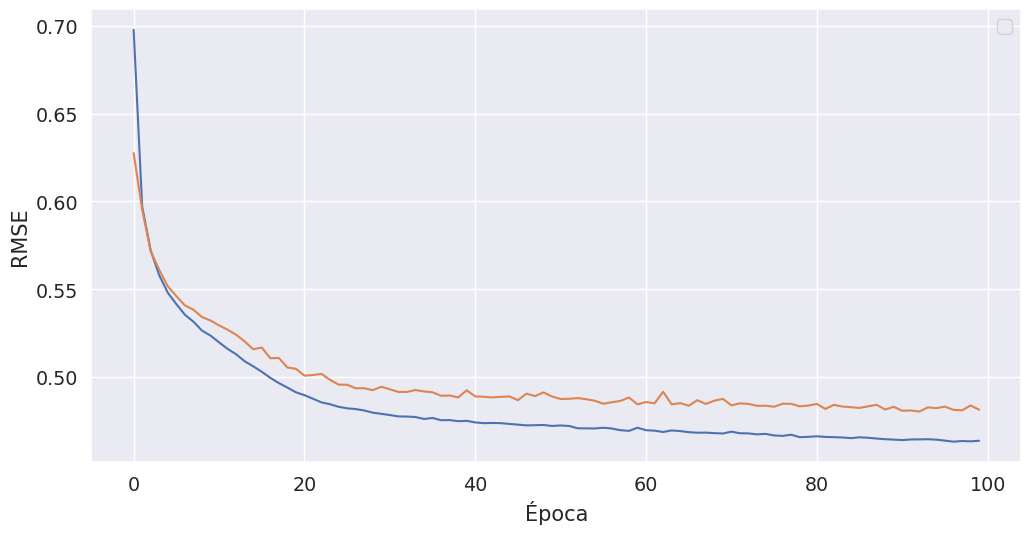

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 16s - loss: 1.5179

1760/6000 [=======>......................] - ETA: 0s - loss: 0.6982 

3488/6000 [================>.............] - ETA: 0s - loss: 0.5577

5280/6000 [=========================>....] - ETA: 0s - loss: 0.4841

6000/6000 [==============================] - 0s 59us/step - loss: 0.4772 - val_loss: 0.3345


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5713

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3316

3616/6000 [=================>............] - ETA: 0s - loss: 0.3426

5344/6000 [=========================>....] - ETA: 0s - loss: 0.3426

6000/6000 [==============================] - 0s 42us/step - loss: 0.3384 - val_loss: 0.3083


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2797

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3215

3456/6000 [================>.............] - ETA: 0s - loss: 0.3210

4928/6000 [=======================>......] - ETA: 0s - loss: 0.3125

6000/6000 [==============================] - 0s 44us/step - loss: 0.3217 - val_loss: 0.2994


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4110

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3068

3488/6000 [================>.............] - ETA: 0s - loss: 0.3166

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3063

6000/6000 [==============================] - 0s 43us/step - loss: 0.3069 - val_loss: 0.2837


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2571

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3065

3552/6000 [================>.............] - ETA: 0s - loss: 0.2974

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2881

6000/6000 [==============================] - 0s 42us/step - loss: 0.2914 - val_loss: 0.2839


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1540

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2853

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2882

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2862

6000/6000 [==============================] - 0s 46us/step - loss: 0.2780 - val_loss: 0.2673


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2528

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2457

3648/6000 [=================>............] - ETA: 0s - loss: 0.2696

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2718

6000/6000 [==============================] - 0s 43us/step - loss: 0.2681 - val_loss: 0.2545


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2881

3520/6000 [================>.............] - ETA: 0s - loss: 0.2706

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2605

6000/6000 [==============================] - 0s 43us/step - loss: 0.2579 - val_loss: 0.2480


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2567

3520/6000 [================>.............] - ETA: 0s - loss: 0.2554

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2534

6000/6000 [==============================] - 0s 44us/step - loss: 0.2489 - val_loss: 0.2438


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1967

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2450

3680/6000 [=================>............] - ETA: 0s - loss: 0.2344

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2442

6000/6000 [==============================] - 0s 42us/step - loss: 0.2422 - val_loss: 0.2421


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1453

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2154

3552/6000 [================>.............] - ETA: 0s - loss: 0.2243

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 42us/step - loss: 0.2382 - val_loss: 0.2362


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2239

3456/6000 [================>.............] - ETA: 0s - loss: 0.2286

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 43us/step - loss: 0.2335 - val_loss: 0.2340


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1718

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2247

3616/6000 [=================>............] - ETA: 0s - loss: 0.2221

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 42us/step - loss: 0.2282 - val_loss: 0.2352


Epoch 14/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0987

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2230

3648/6000 [=================>............] - ETA: 0s - loss: 0.2212

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 43us/step - loss: 0.2251 - val_loss: 0.2287


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4183

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2262

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2170

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 43us/step - loss: 0.2238 - val_loss: 0.2259


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2003

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2313

3552/6000 [================>.............] - ETA: 0s - loss: 0.2276

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 41us/step - loss: 0.2227 - val_loss: 0.2242


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1134

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1949

3584/6000 [================>.............] - ETA: 0s - loss: 0.2116

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 41us/step - loss: 0.2193 - val_loss: 0.2215


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1885

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2018

3584/6000 [================>.............] - ETA: 0s - loss: 0.2151

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 43us/step - loss: 0.2181 - val_loss: 0.2183


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2016

3776/6000 [=================>............] - ETA: 0s - loss: 0.2041

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 40us/step - loss: 0.2155 - val_loss: 0.2215


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1556

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2377

3616/6000 [=================>............] - ETA: 0s - loss: 0.2259

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 41us/step - loss: 0.2139 - val_loss: 0.2313


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1086

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2000

3776/6000 [=================>............] - ETA: 0s - loss: 0.2114

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 39us/step - loss: 0.2154 - val_loss: 0.2179


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2268

3776/6000 [=================>............] - ETA: 0s - loss: 0.2140

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2095

6000/6000 [==============================] - 0s 40us/step - loss: 0.2104 - val_loss: 0.2214


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1952

3424/6000 [================>.............] - ETA: 0s - loss: 0.2065

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2092

6000/6000 [==============================] - 0s 41us/step - loss: 0.2107 - val_loss: 0.2156


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1754

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1921

3552/6000 [================>.............] - ETA: 0s - loss: 0.2138

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2086

6000/6000 [==============================] - 0s 41us/step - loss: 0.2102 - val_loss: 0.2163


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1323

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2029

3744/6000 [=================>............] - ETA: 0s - loss: 0.2056

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2060

6000/6000 [==============================] - 0s 40us/step - loss: 0.2066 - val_loss: 0.2111


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2039

3776/6000 [=================>............] - ETA: 0s - loss: 0.2039

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2047

6000/6000 [==============================] - 0s 42us/step - loss: 0.2048 - val_loss: 0.2135


Epoch 27/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2035

3680/6000 [=================>............] - ETA: 0s - loss: 0.2017

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 40us/step - loss: 0.2076 - val_loss: 0.2116


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2383

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1944

3552/6000 [================>.............] - ETA: 0s - loss: 0.2034

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2007

6000/6000 [==============================] - 0s 40us/step - loss: 0.2024 - val_loss: 0.2134


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1946

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1958

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2016

6000/6000 [==============================] - 0s 39us/step - loss: 0.2024 - val_loss: 0.2125


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1971

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2015

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2010

6000/6000 [==============================] - 0s 41us/step - loss: 0.2004 - val_loss: 0.2073


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1983

3744/6000 [=================>............] - ETA: 0s - loss: 0.2017

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1982

6000/6000 [==============================] - 0s 40us/step - loss: 0.2005 - val_loss: 0.2116


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2961

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1924

3616/6000 [=================>............] - ETA: 0s - loss: 0.2012

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2006

6000/6000 [==============================] - 0s 41us/step - loss: 0.2010 - val_loss: 0.2080


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1972

3616/6000 [=================>............] - ETA: 0s - loss: 0.1935

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 42us/step - loss: 0.1988 - val_loss: 0.2052


Epoch 34/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2405

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1932

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1933

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2000

6000/6000 [==============================] - 0s 42us/step - loss: 0.1978 - val_loss: 0.2044


Epoch 35/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2714

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1742

3648/6000 [=================>............] - ETA: 0s - loss: 0.1866

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 41us/step - loss: 0.1963 - val_loss: 0.2052


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

1120/6000 [====>.........................] - ETA: 0s - loss: 0.2070

2688/6000 [============>.................] - ETA: 0s - loss: 0.1986

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1976

6000/6000 [==============================] - 0s 46us/step - loss: 0.1973 - val_loss: 0.2178


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4815

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1868

3616/6000 [=================>............] - ETA: 0s - loss: 0.1939

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1981

6000/6000 [==============================] - 0s 42us/step - loss: 0.1964 - val_loss: 0.2172


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3239

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2016

3488/6000 [================>.............] - ETA: 0s - loss: 0.1860

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1959

6000/6000 [==============================] - 0s 42us/step - loss: 0.1949 - val_loss: 0.2068


Epoch 39/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2461

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1885

3520/6000 [================>.............] - ETA: 0s - loss: 0.1935

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 42us/step - loss: 0.1937 - val_loss: 0.2112


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0962

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1862

3552/6000 [================>.............] - ETA: 0s - loss: 0.1913

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 41us/step - loss: 0.1951 - val_loss: 0.2017


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1873

3648/6000 [=================>............] - ETA: 0s - loss: 0.1980

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 41us/step - loss: 0.1934 - val_loss: 0.2053


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1877

3584/6000 [================>.............] - ETA: 0s - loss: 0.1867

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 42us/step - loss: 0.1928 - val_loss: 0.2064


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4160

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1945

3744/6000 [=================>............] - ETA: 0s - loss: 0.1974

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 40us/step - loss: 0.1929 - val_loss: 0.2019


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2044

3712/6000 [=================>............] - ETA: 0s - loss: 0.1976

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 40us/step - loss: 0.1915 - val_loss: 0.2059


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1965

3616/6000 [=================>............] - ETA: 0s - loss: 0.1934

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 41us/step - loss: 0.1918 - val_loss: 0.2057


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2056

3584/6000 [================>.............] - ETA: 0s - loss: 0.1979

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 41us/step - loss: 0.1919 - val_loss: 0.2032


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1945

3552/6000 [================>.............] - ETA: 0s - loss: 0.1970

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 40us/step - loss: 0.1896 - val_loss: 0.2015


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1902

3520/6000 [================>.............] - ETA: 0s - loss: 0.2035

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 42us/step - loss: 0.1904 - val_loss: 0.2020


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1294

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1889

3584/6000 [================>.............] - ETA: 0s - loss: 0.1884

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1925

6000/6000 [==============================] - 0s 41us/step - loss: 0.1890 - val_loss: 0.2053


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1894

3520/6000 [================>.............] - ETA: 0s - loss: 0.1994

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 42us/step - loss: 0.1888 - val_loss: 0.1997


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1322

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1939

3488/6000 [================>.............] - ETA: 0s - loss: 0.1833

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1890

6000/6000 [==============================] - 0s 42us/step - loss: 0.1890 - val_loss: 0.2029


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3648/6000 [=================>............] - ETA: 0s - loss: 0.1831

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 42us/step - loss: 0.1889 - val_loss: 0.2017


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2229

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1813



3456/6000 [================>.............] - ETA: 0s - loss: 0.1839

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 42us/step - loss: 0.1867 - val_loss: 0.2044


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2026

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1967

3552/6000 [================>.............] - ETA: 0s - loss: 0.1797

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 41us/step - loss: 0.1874 - val_loss: 0.2123


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1916

3552/6000 [================>.............] - ETA: 0s - loss: 0.1833

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 41us/step - loss: 0.1875 - val_loss: 0.2202


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2298

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1934

3680/6000 [=================>............] - ETA: 0s - loss: 0.1857

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 41us/step - loss: 0.1866 - val_loss: 0.1997


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1875

3520/6000 [================>.............] - ETA: 0s - loss: 0.1814

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 41us/step - loss: 0.1861 - val_loss: 0.2012


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3544

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1851

3584/6000 [================>.............] - ETA: 0s - loss: 0.1861

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 41us/step - loss: 0.1854 - val_loss: 0.2001


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1851

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1827

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1860

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 43us/step - loss: 0.1847 - val_loss: 0.2033


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2003

3616/6000 [=================>............] - ETA: 0s - loss: 0.1909

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 41us/step - loss: 0.1847 - val_loss: 0.2040


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1845

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1837

3488/6000 [================>.............] - ETA: 0s - loss: 0.1846

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 43us/step - loss: 0.1840 - val_loss: 0.2067


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1903

3552/6000 [================>.............] - ETA: 0s - loss: 0.1851

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 43us/step - loss: 0.1838 - val_loss: 0.2009


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2112

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1661

3616/6000 [=================>............] - ETA: 0s - loss: 0.1732

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 40us/step - loss: 0.1837 - val_loss: 0.2002


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1736

3616/6000 [=================>............] - ETA: 0s - loss: 0.1798

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 41us/step - loss: 0.1839 - val_loss: 0.2014


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3616/6000 [=================>............] - ETA: 0s - loss: 0.1894

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 41us/step - loss: 0.1831 - val_loss: 0.2077


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1857

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3584/6000 [================>.............] - ETA: 0s - loss: 0.1942

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1866

6000/6000 [==============================] - 0s 42us/step - loss: 0.1820 - val_loss: 0.1987


Epoch 67/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1609

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1766

3456/6000 [================>.............] - ETA: 0s - loss: 0.1805

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 42us/step - loss: 0.1829 - val_loss: 0.2014


Epoch 68/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2519

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1970

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1952

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 42us/step - loss: 0.1825 - val_loss: 0.1986


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1858

3712/6000 [=================>............] - ETA: 0s - loss: 0.1831

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 40us/step - loss: 0.1827 - val_loss: 0.1980


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1718

3616/6000 [=================>............] - ETA: 0s - loss: 0.1804

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 40us/step - loss: 0.1811 - val_loss: 0.2047


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1926

3680/6000 [=================>............] - ETA: 0s - loss: 0.1798

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 44us/step - loss: 0.1811 - val_loss: 0.2085


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1982

3456/6000 [================>.............] - ETA: 0s - loss: 0.1873

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 44us/step - loss: 0.1798 - val_loss: 0.1976


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1804

3584/6000 [================>.............] - ETA: 0s - loss: 0.1762

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 42us/step - loss: 0.1805 - val_loss: 0.1988


Epoch 74/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1068



1792/6000 [=======>......................] - ETA: 0s - loss: 0.1809

3552/6000 [================>.............] - ETA: 0s - loss: 0.1826

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 42us/step - loss: 0.1806 - val_loss: 0.1972


Epoch 75/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4080

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1850

3552/6000 [================>.............] - ETA: 0s - loss: 0.1837

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 43us/step - loss: 0.1791 - val_loss: 0.1973


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1748

3488/6000 [================>.............] - ETA: 0s - loss: 0.1727

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 43us/step - loss: 0.1805 - val_loss: 0.1984


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2642

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1773

3520/6000 [================>.............] - ETA: 0s - loss: 0.1771

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 42us/step - loss: 0.1781 - val_loss: 0.1989


Epoch 78/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1252

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1729

3648/6000 [=================>............] - ETA: 0s - loss: 0.1773

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 41us/step - loss: 0.1793 - val_loss: 0.1970


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1446

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1840

3584/6000 [================>.............] - ETA: 0s - loss: 0.1817

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 42us/step - loss: 0.1779 - val_loss: 0.2022


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1783

3552/6000 [================>.............] - ETA: 0s - loss: 0.1723

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 42us/step - loss: 0.1766 - val_loss: 0.2038


Epoch 81/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0461

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1696

3712/6000 [=================>............] - ETA: 0s - loss: 0.1753

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1800

6000/6000 [==============================] - 0s 42us/step - loss: 0.1796 - val_loss: 0.1977


Epoch 82/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1012

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3456/6000 [================>.............] - ETA: 0s - loss: 0.1668

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 41us/step - loss: 0.1760 - val_loss: 0.2037


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1904

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3648/6000 [=================>............] - ETA: 0s - loss: 0.1762

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 41us/step - loss: 0.1770 - val_loss: 0.1977


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2600

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1849

3712/6000 [=================>............] - ETA: 0s - loss: 0.1792

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 40us/step - loss: 0.1775 - val_loss: 0.1958


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1925

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1678

3648/6000 [=================>............] - ETA: 0s - loss: 0.1699

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 40us/step - loss: 0.1766 - val_loss: 0.1960


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4688

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1936

3584/6000 [================>.............] - ETA: 0s - loss: 0.1859

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 42us/step - loss: 0.1753 - val_loss: 0.1956


Epoch 87/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1694

3424/6000 [================>.............] - ETA: 0s - loss: 0.1652

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 42us/step - loss: 0.1763 - val_loss: 0.2028


Epoch 88/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3227

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1731

3520/6000 [================>.............] - ETA: 0s - loss: 0.1715

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 42us/step - loss: 0.1784 - val_loss: 0.1958


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1185

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1828

3616/6000 [=================>............] - ETA: 0s - loss: 0.1703

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 41us/step - loss: 0.1739 - val_loss: 0.1977


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3731

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3520/6000 [================>.............] - ETA: 0s - loss: 0.1712

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 44us/step - loss: 0.1754 - val_loss: 0.2035


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1987

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1652

3424/6000 [================>.............] - ETA: 0s - loss: 0.1730

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 43us/step - loss: 0.1734 - val_loss: 0.2060


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2441

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1700

3680/6000 [=================>............] - ETA: 0s - loss: 0.1713

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 40us/step - loss: 0.1735 - val_loss: 0.1923


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1273

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1787

2752/6000 [============>.................] - ETA: 0s - loss: 0.1729

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 48us/step - loss: 0.1759 - val_loss: 0.1968


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1737

3520/6000 [================>.............] - ETA: 0s - loss: 0.1727

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 41us/step - loss: 0.1749 - val_loss: 0.1955


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731



1856/6000 [========>.....................] - ETA: 0s - loss: 0.1700

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1790

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 42us/step - loss: 0.1740 - val_loss: 0.1949


Epoch 96/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1804

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1734

3584/6000 [================>.............] - ETA: 0s - loss: 0.1723

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 41us/step - loss: 0.1738 - val_loss: 0.1956


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3333

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1783

3648/6000 [=================>............] - ETA: 0s - loss: 0.1736

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 43us/step - loss: 0.1729 - val_loss: 0.1927


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1842

3712/6000 [=================>............] - ETA: 0s - loss: 0.1733

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 40us/step - loss: 0.1727 - val_loss: 0.1915


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0848

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1681

3776/6000 [=================>............] - ETA: 0s - loss: 0.1696

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 39us/step - loss: 0.1726 - val_loss: 0.1912


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0799

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1713

3776/6000 [=================>............] - ETA: 0s - loss: 0.1741

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 40us/step - loss: 0.1724 - val_loss: 0.1957


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1766

3616/6000 [=================>............] - ETA: 0s - loss: 0.1683

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 41us/step - loss: 0.1707 - val_loss: 0.1971


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1766

3584/6000 [================>.............] - ETA: 0s - loss: 0.1772

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 41us/step - loss: 0.1715 - val_loss: 0.1944


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1812

3616/6000 [=================>............] - ETA: 0s - loss: 0.1775

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 42us/step - loss: 0.1715 - val_loss: 0.1907


Epoch 104/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1614

3584/6000 [================>.............] - ETA: 0s - loss: 0.1657

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 41us/step - loss: 0.1702 - val_loss: 0.1964


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0617

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1706

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1668

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 42us/step - loss: 0.1716 - val_loss: 0.1933


Epoch 106/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1690

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1656

3648/6000 [=================>............] - ETA: 0s - loss: 0.1743

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 40us/step - loss: 0.1718 - val_loss: 0.1947


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1520

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1611

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1697

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 40us/step - loss: 0.1687 - val_loss: 0.2050


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1702

3616/6000 [=================>............] - ETA: 0s - loss: 0.1639

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 40us/step - loss: 0.1683 - val_loss: 0.1904


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1701

3648/6000 [=================>............] - ETA: 0s - loss: 0.1694

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 40us/step - loss: 0.1694 - val_loss: 0.1919


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1638

3680/6000 [=================>............] - ETA: 0s - loss: 0.1644

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 42us/step - loss: 0.1692 - val_loss: 0.2000


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1382



1728/6000 [=======>......................] - ETA: 0s - loss: 0.1622

3424/6000 [================>.............] - ETA: 0s - loss: 0.1706

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 43us/step - loss: 0.1698 - val_loss: 0.1903


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1734

3488/6000 [================>.............] - ETA: 0s - loss: 0.1771

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 41us/step - loss: 0.1686 - val_loss: 0.1904


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2272

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3648/6000 [=================>............] - ETA: 0s - loss: 0.1688

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 41us/step - loss: 0.1689 - val_loss: 0.1934


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1646

3680/6000 [=================>............] - ETA: 0s - loss: 0.1784

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 40us/step - loss: 0.1687 - val_loss: 0.1895


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0987

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1769

3648/6000 [=================>............] - ETA: 0s - loss: 0.1676

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 40us/step - loss: 0.1694 - val_loss: 0.1944


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1738

3712/6000 [=================>............] - ETA: 0s - loss: 0.1702

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 41us/step - loss: 0.1686 - val_loss: 0.1919


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2774

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1741

3712/6000 [=================>............] - ETA: 0s - loss: 0.1738

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 41us/step - loss: 0.1685 - val_loss: 0.1951


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1552

3584/6000 [================>.............] - ETA: 0s - loss: 0.1705

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 45us/step - loss: 0.1682 - val_loss: 0.1925


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1811

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3584/6000 [================>.............] - ETA: 0s - loss: 0.1615

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 43us/step - loss: 0.1680 - val_loss: 0.1971


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1572

3456/6000 [================>.............] - ETA: 0s - loss: 0.1595

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1589



6000/6000 [==============================] - 0s 42us/step - loss: 0.1651 - val_loss: 0.1937


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1572

3616/6000 [=================>............] - ETA: 0s - loss: 0.1640

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 42us/step - loss: 0.1671 - val_loss: 0.1900


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1532

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1557

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 43us/step - loss: 0.1658 - val_loss: 0.1900


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2924

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1705

3584/6000 [================>.............] - ETA: 0s - loss: 0.1684

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 41us/step - loss: 0.1647 - val_loss: 0.1941


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1744

3552/6000 [================>.............] - ETA: 0s - loss: 0.1735

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 42us/step - loss: 0.1658 - val_loss: 0.1892


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1836

3616/6000 [=================>............] - ETA: 0s - loss: 0.1728

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 42us/step - loss: 0.1654 - val_loss: 0.1881


Epoch 126/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0611

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1592

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1582

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1656

6000/6000 [==============================] - 0s 42us/step - loss: 0.1650 - val_loss: 0.1918


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1095

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3680/6000 [=================>............] - ETA: 0s - loss: 0.1591

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 40us/step - loss: 0.1636 - val_loss: 0.1873


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2114

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1639

3616/6000 [=================>............] - ETA: 0s - loss: 0.1568

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 41us/step - loss: 0.1629 - val_loss: 0.1903


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2977

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1709

3648/6000 [=================>............] - ETA: 0s - loss: 0.1602

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 40us/step - loss: 0.1636 - val_loss: 0.1878


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1785

3648/6000 [=================>............] - ETA: 0s - loss: 0.1681

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 42us/step - loss: 0.1637 - val_loss: 0.1882


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2409

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1656

3616/6000 [=================>............] - ETA: 0s - loss: 0.1645

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1638

6000/6000 [==============================] - 0s 40us/step - loss: 0.1646 - val_loss: 0.1929


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1616

3648/6000 [=================>............] - ETA: 0s - loss: 0.1665

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1631

6000/6000 [==============================] - 0s 41us/step - loss: 0.1632 - val_loss: 0.1855


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3327

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1591

3648/6000 [=================>............] - ETA: 0s - loss: 0.1652

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 41us/step - loss: 0.1625 - val_loss: 0.1858


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1689

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1602

3680/6000 [=================>............] - ETA: 0s - loss: 0.1694

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1647

6000/6000 [==============================] - 0s 41us/step - loss: 0.1621 - val_loss: 0.1875


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1603

3616/6000 [=================>............] - ETA: 0s - loss: 0.1602

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 42us/step - loss: 0.1625 - val_loss: 0.1875


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1556

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1460

3680/6000 [=================>............] - ETA: 0s - loss: 0.1642

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 43us/step - loss: 0.1612 - val_loss: 0.1898


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

1120/6000 [====>.........................] - ETA: 0s - loss: 0.1663

2752/6000 [============>.................] - ETA: 0s - loss: 0.1642

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 47us/step - loss: 0.1626 - val_loss: 0.1867


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1137

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1556

3584/6000 [================>.............] - ETA: 0s - loss: 0.1673

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1631

6000/6000 [==============================] - 0s 43us/step - loss: 0.1617 - val_loss: 0.1873


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1557

3488/6000 [================>.............] - ETA: 0s - loss: 0.1714

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 43us/step - loss: 0.1619 - val_loss: 0.1862


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1574

3616/6000 [=================>............] - ETA: 0s - loss: 0.1563

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1589

6000/6000 [==============================] - 0s 42us/step - loss: 0.1623 - val_loss: 0.1915


Epoch 141/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1133

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1628



3648/6000 [=================>............] - ETA: 0s - loss: 0.1658

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 41us/step - loss: 0.1615 - val_loss: 0.1868


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2894

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1508

3616/6000 [=================>............] - ETA: 0s - loss: 0.1663

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1647

6000/6000 [==============================] - 0s 42us/step - loss: 0.1628 - val_loss: 0.1837


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2816

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1758

3584/6000 [================>.............] - ETA: 0s - loss: 0.1642

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 41us/step - loss: 0.1611 - val_loss: 0.1890


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0920

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1663

3744/6000 [=================>............] - ETA: 0s - loss: 0.1627

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1593

6000/6000 [==============================] - 0s 41us/step - loss: 0.1602 - val_loss: 0.1876


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1449

3744/6000 [=================>............] - ETA: 0s - loss: 0.1586

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 40us/step - loss: 0.1607 - val_loss: 0.1873


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1707

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1557

3616/6000 [=================>............] - ETA: 0s - loss: 0.1557

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 41us/step - loss: 0.1605 - val_loss: 0.1845


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1506



3584/6000 [================>.............] - ETA: 0s - loss: 0.1641

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 41us/step - loss: 0.1615 - val_loss: 0.1845


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2361

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1557

3712/6000 [=================>............] - ETA: 0s - loss: 0.1611

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 41us/step - loss: 0.1603 - val_loss: 0.1876


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0843

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1496

3584/6000 [================>.............] - ETA: 0s - loss: 0.1641

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1623

6000/6000 [==============================] - 0s 41us/step - loss: 0.1600 - val_loss: 0.1831


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1639

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1610

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 44us/step - loss: 0.1587 - val_loss: 0.1893


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1623

3488/6000 [================>.............] - ETA: 0s - loss: 0.1575

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 41us/step - loss: 0.1593 - val_loss: 0.1863


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2081

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1512

3520/6000 [================>.............] - ETA: 0s - loss: 0.1551

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1580

6000/6000 [==============================] - 0s 41us/step - loss: 0.1586 - val_loss: 0.1890


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2915

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1544

3680/6000 [=================>............] - ETA: 0s - loss: 0.1525

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 41us/step - loss: 0.1588 - val_loss: 0.1913


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1683

3648/6000 [=================>............] - ETA: 0s - loss: 0.1554

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 40us/step - loss: 0.1583 - val_loss: 0.1865


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0652

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1478

3584/6000 [================>.............] - ETA: 0s - loss: 0.1479

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 40us/step - loss: 0.1575 - val_loss: 0.1834


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1598

3456/6000 [================>.............] - ETA: 0s - loss: 0.1549

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 42us/step - loss: 0.1591 - val_loss: 0.1869


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1568

3520/6000 [================>.............] - ETA: 0s - loss: 0.1589

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 40us/step - loss: 0.1595 - val_loss: 0.1873


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1868

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1641

3648/6000 [=================>............] - ETA: 0s - loss: 0.1555

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1564

6000/6000 [==============================] - 0s 41us/step - loss: 0.1582 - val_loss: 0.1894


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2404

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1604

3616/6000 [=================>............] - ETA: 0s - loss: 0.1555

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1614

6000/6000 [==============================] - 0s 41us/step - loss: 0.1577 - val_loss: 0.1835


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1350

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1577

3424/6000 [================>.............] - ETA: 0s - loss: 0.1567

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 41us/step - loss: 0.1578 - val_loss: 0.1876


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1673

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1713

3552/6000 [================>.............] - ETA: 0s - loss: 0.1608

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1607

6000/6000 [==============================] - 0s 41us/step - loss: 0.1585 - val_loss: 0.1848


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1654

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1580

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1576



6000/6000 [==============================] - 0s 42us/step - loss: 0.1577 - val_loss: 0.1872


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2196

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1686

3616/6000 [=================>............] - ETA: 0s - loss: 0.1623

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 42us/step - loss: 0.1578 - val_loss: 0.1887


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1509

3552/6000 [================>.............] - ETA: 0s - loss: 0.1517

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1571

6000/6000 [==============================] - 0s 43us/step - loss: 0.1576 - val_loss: 0.1854


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1540

3520/6000 [================>.............] - ETA: 0s - loss: 0.1585

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 40us/step - loss: 0.1563 - val_loss: 0.1925


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1571

3648/6000 [=================>............] - ETA: 0s - loss: 0.1589

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1556

6000/6000 [==============================] - 0s 43us/step - loss: 0.1571 - val_loss: 0.1872


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1489

3424/6000 [================>.............] - ETA: 0s - loss: 0.1615

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1591

6000/6000 [==============================] - 0s 43us/step - loss: 0.1570 - val_loss: 0.1851


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1594

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1588

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 41us/step - loss: 0.1564 - val_loss: 0.1834


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3049

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1521

3584/6000 [================>.............] - ETA: 0s - loss: 0.1489

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 41us/step - loss: 0.1563 - val_loss: 0.1853


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0537

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1482

3552/6000 [================>.............] - ETA: 0s - loss: 0.1540

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 41us/step - loss: 0.1558 - val_loss: 0.1830


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3114

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1583

3488/6000 [================>.............] - ETA: 0s - loss: 0.1553

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 42us/step - loss: 0.1560 - val_loss: 0.1832


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1279

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1551

3616/6000 [=================>............] - ETA: 0s - loss: 0.1575

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 41us/step - loss: 0.1553 - val_loss: 0.1869


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0730

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1597

3584/6000 [================>.............] - ETA: 0s - loss: 0.1632

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 42us/step - loss: 0.1560 - val_loss: 0.1858


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1675

3520/6000 [================>.............] - ETA: 0s - loss: 0.1583

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 42us/step - loss: 0.1565 - val_loss: 0.1848


Epoch 175/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2749

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1497

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1528

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 43us/step - loss: 0.1552 - val_loss: 0.1842


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1503

3584/6000 [================>.............] - ETA: 0s - loss: 0.1555

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 41us/step - loss: 0.1554 - val_loss: 0.1916


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1703

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1608

3520/6000 [================>.............] - ETA: 0s - loss: 0.1564

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 40us/step - loss: 0.1554 - val_loss: 0.1865


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1479

3616/6000 [=================>............] - ETA: 0s - loss: 0.1507

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1554

6000/6000 [==============================] - 0s 45us/step - loss: 0.1551 - val_loss: 0.1835


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1446

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1540

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 42us/step - loss: 0.1550 - val_loss: 0.1812


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1456

3584/6000 [================>.............] - ETA: 0s - loss: 0.1473

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 46us/step - loss: 0.1538 - val_loss: 0.1857


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1481

3680/6000 [=================>............] - ETA: 0s - loss: 0.1519

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 41us/step - loss: 0.1539 - val_loss: 0.1823


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1605

3744/6000 [=================>............] - ETA: 0s - loss: 0.1591

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 40us/step - loss: 0.1550 - val_loss: 0.1844


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3648/6000 [=================>............] - ETA: 0s - loss: 0.1567

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 41us/step - loss: 0.1548 - val_loss: 0.1808


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0594

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3552/6000 [================>.............] - ETA: 0s - loss: 0.1450

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 42us/step - loss: 0.1537 - val_loss: 0.1868


Epoch 185/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1626

3680/6000 [=================>............] - ETA: 0s - loss: 0.1603

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 40us/step - loss: 0.1541 - val_loss: 0.1845


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1459

3680/6000 [=================>............] - ETA: 0s - loss: 0.1535

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 42us/step - loss: 0.1534 - val_loss: 0.1828


Epoch 187/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0779

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1482

3616/6000 [=================>............] - ETA: 0s - loss: 0.1536

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 42us/step - loss: 0.1541 - val_loss: 0.1907


Epoch 188/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2434

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1574

3584/6000 [================>.............] - ETA: 0s - loss: 0.1554

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 41us/step - loss: 0.1549 - val_loss: 0.1872


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1426

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1581

3552/6000 [================>.............] - ETA: 0s - loss: 0.1558

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 41us/step - loss: 0.1526 - val_loss: 0.1851


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1543

3648/6000 [=================>............] - ETA: 0s - loss: 0.1611

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 40us/step - loss: 0.1557 - val_loss: 0.1867


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2214

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1587

3520/6000 [================>.............] - ETA: 0s - loss: 0.1531

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 41us/step - loss: 0.1532 - val_loss: 0.1984


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467



1792/6000 [=======>......................] - ETA: 0s - loss: 0.1572

3520/6000 [================>.............] - ETA: 0s - loss: 0.1566

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 42us/step - loss: 0.1540 - val_loss: 0.1853


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1400

3552/6000 [================>.............] - ETA: 0s - loss: 0.1421

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1490

6000/6000 [==============================] - 0s 41us/step - loss: 0.1520 - val_loss: 0.1838


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0719

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1569

3648/6000 [=================>............] - ETA: 0s - loss: 0.1529

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1553

6000/6000 [==============================] - 0s 41us/step - loss: 0.1532 - val_loss: 0.1810


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1418

3552/6000 [================>.............] - ETA: 0s - loss: 0.1464

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 40us/step - loss: 0.1523 - val_loss: 0.1828


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1551

3520/6000 [================>.............] - ETA: 0s - loss: 0.1510

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 41us/step - loss: 0.1525 - val_loss: 0.1829


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1068

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1643

3552/6000 [================>.............] - ETA: 0s - loss: 0.1499

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1539

6000/6000 [==============================] - 0s 41us/step - loss: 0.1529 - val_loss: 0.1854


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1106

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1540

3648/6000 [=================>............] - ETA: 0s - loss: 0.1556

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 41us/step - loss: 0.1530 - val_loss: 0.1854


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1005

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1481

3552/6000 [================>.............] - ETA: 0s - loss: 0.1500

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 40us/step - loss: 0.1526 - val_loss: 0.1860


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0959

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1384

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1448

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1497

6000/6000 [==============================] - 0s 39us/step - loss: 0.1514 - val_loss: 0.1825


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1620

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1574

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1539

6000/6000 [==============================] - 0s 47us/step - loss: 0.1524 - val_loss: 0.1872


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0464

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1388

3520/6000 [================>.............] - ETA: 0s - loss: 0.1510

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 45us/step - loss: 0.1520 - val_loss: 0.1839


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1576

3424/6000 [================>.............] - ETA: 0s - loss: 0.1550

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 41us/step - loss: 0.1508 - val_loss: 0.1839


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1516

3584/6000 [================>.............] - ETA: 0s - loss: 0.1520

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 41us/step - loss: 0.1519 - val_loss: 0.1814


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0472

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1504

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1480

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 41us/step - loss: 0.1505 - val_loss: 0.1852


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1472

3648/6000 [=================>............] - ETA: 0s - loss: 0.1532

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1519

6000/6000 [==============================] - 0s 41us/step - loss: 0.1521 - val_loss: 0.1834


Epoch 207/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1337

3584/6000 [================>.............] - ETA: 0s - loss: 0.1485

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 41us/step - loss: 0.1516 - val_loss: 0.1842


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1452

3616/6000 [=================>............] - ETA: 0s - loss: 0.1483

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 41us/step - loss: 0.1505 - val_loss: 0.1829


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1435

3616/6000 [=================>............] - ETA: 0s - loss: 0.1496

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 41us/step - loss: 0.1507 - val_loss: 0.1847


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1519

3584/6000 [================>.............] - ETA: 0s - loss: 0.1439

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1467

6000/6000 [==============================] - 0s 41us/step - loss: 0.1513 - val_loss: 0.1833


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1474

3552/6000 [================>.............] - ETA: 0s - loss: 0.1501

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 41us/step - loss: 0.1510 - val_loss: 0.1879


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1520

3584/6000 [================>.............] - ETA: 0s - loss: 0.1482

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 40us/step - loss: 0.1509 - val_loss: 0.1818


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0866

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1469

3648/6000 [=================>............] - ETA: 0s - loss: 0.1446

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 41us/step - loss: 0.1502 - val_loss: 0.1864


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1591

3616/6000 [=================>............] - ETA: 0s - loss: 0.1559

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 40us/step - loss: 0.1514 - val_loss: 0.1809


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0987

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1403

3616/6000 [=================>............] - ETA: 0s - loss: 0.1513

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 40us/step - loss: 0.1508 - val_loss: 0.1842


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1442

3424/6000 [================>.............] - ETA: 0s - loss: 0.1453

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 43us/step - loss: 0.1506 - val_loss: 0.1855


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1897

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1486

3584/6000 [================>.............] - ETA: 0s - loss: 0.1522

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 40us/step - loss: 0.1506 - val_loss: 0.1835


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1198

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1575

3616/6000 [=================>............] - ETA: 0s - loss: 0.1578

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 41us/step - loss: 0.1500 - val_loss: 0.1895


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1417

3616/6000 [=================>............] - ETA: 0s - loss: 0.1519

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1539

6000/6000 [==============================] - 0s 41us/step - loss: 0.1508 - val_loss: 0.1827


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1433

3584/6000 [================>.............] - ETA: 0s - loss: 0.1466

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 40us/step - loss: 0.1491 - val_loss: 0.1885


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2792

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1522

3680/6000 [=================>............] - ETA: 0s - loss: 0.1492

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 41us/step - loss: 0.1501 - val_loss: 0.1863


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1485

3552/6000 [================>.............] - ETA: 0s - loss: 0.1504

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 42us/step - loss: 0.1500 - val_loss: 0.1831


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1418

3616/6000 [=================>............] - ETA: 0s - loss: 0.1520

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 41us/step - loss: 0.1496 - val_loss: 0.1833


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1389

3552/6000 [================>.............] - ETA: 0s - loss: 0.1444

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 41us/step - loss: 0.1501 - val_loss: 0.1811


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2279

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3584/6000 [================>.............] - ETA: 0s - loss: 0.1461

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 41us/step - loss: 0.1478 - val_loss: 0.1875


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1347

3552/6000 [================>.............] - ETA: 0s - loss: 0.1543

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 41us/step - loss: 0.1490 - val_loss: 0.1817


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1521

3520/6000 [================>.............] - ETA: 0s - loss: 0.1466

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 41us/step - loss: 0.1494 - val_loss: 0.1830


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0638

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1346

3456/6000 [================>.............] - ETA: 0s - loss: 0.1539

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 43us/step - loss: 0.1488 - val_loss: 0.1805


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1585

3616/6000 [=================>............] - ETA: 0s - loss: 0.1498

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 41us/step - loss: 0.1491 - val_loss: 0.1808


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1370

3680/6000 [=================>............] - ETA: 0s - loss: 0.1454

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1493

6000/6000 [==============================] - 0s 40us/step - loss: 0.1490 - val_loss: 0.1837


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1526

3520/6000 [================>.............] - ETA: 0s - loss: 0.1505

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1487



6000/6000 [==============================] - 0s 42us/step - loss: 0.1477 - val_loss: 0.1838


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1382

3680/6000 [=================>............] - ETA: 0s - loss: 0.1421

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 40us/step - loss: 0.1484 - val_loss: 0.1801


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1475

3616/6000 [=================>............] - ETA: 0s - loss: 0.1514

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1487

6000/6000 [==============================] - 0s 40us/step - loss: 0.1475 - val_loss: 0.1821


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1936

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1509

3680/6000 [=================>............] - ETA: 0s - loss: 0.1541

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1499

6000/6000 [==============================] - 0s 40us/step - loss: 0.1482 - val_loss: 0.1794


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1434

3680/6000 [=================>............] - ETA: 0s - loss: 0.1481

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1489

6000/6000 [==============================] - 0s 40us/step - loss: 0.1472 - val_loss: 0.1827


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1427

3712/6000 [=================>............] - ETA: 0s - loss: 0.1439

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 40us/step - loss: 0.1483 - val_loss: 0.1823


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1507

3616/6000 [=================>............] - ETA: 0s - loss: 0.1411

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1458

6000/6000 [==============================] - 0s 41us/step - loss: 0.1485 - val_loss: 0.1865


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1456

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1509

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 42us/step - loss: 0.1477 - val_loss: 0.1879


Epoch 239/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1478

3584/6000 [================>.............] - ETA: 0s - loss: 0.1539

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 41us/step - loss: 0.1480 - val_loss: 0.1812


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1559

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1500

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 43us/step - loss: 0.1471 - val_loss: 0.1836


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0986

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1541

3584/6000 [================>.............] - ETA: 0s - loss: 0.1474

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 41us/step - loss: 0.1478 - val_loss: 0.1800


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1448

3712/6000 [=================>............] - ETA: 0s - loss: 0.1481

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 41us/step - loss: 0.1474 - val_loss: 0.1831


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2222

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1371

3488/6000 [================>.............] - ETA: 0s - loss: 0.1449

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 42us/step - loss: 0.1466 - val_loss: 0.1888


Epoch 244/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1467

3552/6000 [================>.............] - ETA: 0s - loss: 0.1489

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 42us/step - loss: 0.1467 - val_loss: 0.1833


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1576

3616/6000 [=================>............] - ETA: 0s - loss: 0.1451

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 42us/step - loss: 0.1475 - val_loss: 0.1804


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0633

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1545

3584/6000 [================>.............] - ETA: 0s - loss: 0.1562

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 42us/step - loss: 0.1459 - val_loss: 0.1903


Epoch 247/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0634

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1443

3488/6000 [================>.............] - ETA: 0s - loss: 0.1491

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 41us/step - loss: 0.1475 - val_loss: 0.1875


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1538

3744/6000 [=================>............] - ETA: 0s - loss: 0.1516

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1481

6000/6000 [==============================] - 0s 40us/step - loss: 0.1468 - val_loss: 0.1839


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1414

3616/6000 [=================>............] - ETA: 0s - loss: 0.1421

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1445

6000/6000 [==============================] - 0s 40us/step - loss: 0.1468 - val_loss: 0.1835


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1451

3680/6000 [=================>............] - ETA: 0s - loss: 0.1462

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1471

6000/6000 [==============================] - 0s 40us/step - loss: 0.1469 - val_loss: 0.1806


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1494

3616/6000 [=================>............] - ETA: 0s - loss: 0.1406

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 40us/step - loss: 0.1471 - val_loss: 0.1877


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2281

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1602

3648/6000 [=================>............] - ETA: 0s - loss: 0.1444

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 40us/step - loss: 0.1468 - val_loss: 0.1825


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1570

3584/6000 [================>.............] - ETA: 0s - loss: 0.1486

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 41us/step - loss: 0.1451 - val_loss: 0.1806


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1055

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1560

3680/6000 [=================>............] - ETA: 0s - loss: 0.1479

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 40us/step - loss: 0.1462 - val_loss: 0.1820


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1440

3616/6000 [=================>............] - ETA: 0s - loss: 0.1470

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 40us/step - loss: 0.1468 - val_loss: 0.1801


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1386

3648/6000 [=================>............] - ETA: 0s - loss: 0.1435

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 39us/step - loss: 0.1460 - val_loss: 0.1784


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1436

3520/6000 [================>.............] - ETA: 0s - loss: 0.1434

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 41us/step - loss: 0.1443 - val_loss: 0.1931


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1495

3616/6000 [=================>............] - ETA: 0s - loss: 0.1438

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 40us/step - loss: 0.1471 - val_loss: 0.1789


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1449

3616/6000 [=================>............] - ETA: 0s - loss: 0.1485

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 40us/step - loss: 0.1465 - val_loss: 0.1805


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1476

3744/6000 [=================>............] - ETA: 0s - loss: 0.1507

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1468

6000/6000 [==============================] - 0s 39us/step - loss: 0.1456 - val_loss: 0.1801


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1489

3744/6000 [=================>............] - ETA: 0s - loss: 0.1431

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 39us/step - loss: 0.1446 - val_loss: 0.1829


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1390

3648/6000 [=================>............] - ETA: 0s - loss: 0.1391

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 40us/step - loss: 0.1445 - val_loss: 0.1862


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0877

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1345

3712/6000 [=================>............] - ETA: 0s - loss: 0.1411

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 40us/step - loss: 0.1455 - val_loss: 0.1803


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1448

3520/6000 [================>.............] - ETA: 0s - loss: 0.1479

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 41us/step - loss: 0.1443 - val_loss: 0.1844


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1506

3744/6000 [=================>............] - ETA: 0s - loss: 0.1474

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 42us/step - loss: 0.1476 - val_loss: 0.1868


Epoch 266/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1409

3456/6000 [================>.............] - ETA: 0s - loss: 0.1421

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 42us/step - loss: 0.1448 - val_loss: 0.1867


Epoch 267/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1709

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3648/6000 [=================>............] - ETA: 0s - loss: 0.1454

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 41us/step - loss: 0.1438 - val_loss: 0.1809


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1376

3712/6000 [=================>............] - ETA: 0s - loss: 0.1382

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 40us/step - loss: 0.1445 - val_loss: 0.1820


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1469

3552/6000 [================>.............] - ETA: 0s - loss: 0.1444

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 42us/step - loss: 0.1444 - val_loss: 0.1830


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1396

3648/6000 [=================>............] - ETA: 0s - loss: 0.1438

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 41us/step - loss: 0.1441 - val_loss: 0.1792


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1432

3648/6000 [=================>............] - ETA: 0s - loss: 0.1427

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 41us/step - loss: 0.1440 - val_loss: 0.1820


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2480

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1343

3648/6000 [=================>............] - ETA: 0s - loss: 0.1410

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 40us/step - loss: 0.1448 - val_loss: 0.1825


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1550

3744/6000 [=================>............] - ETA: 0s - loss: 0.1434

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 41us/step - loss: 0.1444 - val_loss: 0.1874


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1400

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1498

3616/6000 [=================>............] - ETA: 0s - loss: 0.1481

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1445

6000/6000 [==============================] - 0s 40us/step - loss: 0.1452 - val_loss: 0.1812


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1309

3744/6000 [=================>............] - ETA: 0s - loss: 0.1440

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 39us/step - loss: 0.1437 - val_loss: 0.1783


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1469

3712/6000 [=================>............] - ETA: 0s - loss: 0.1486

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 39us/step - loss: 0.1431 - val_loss: 0.1825


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1313

3744/6000 [=================>............] - ETA: 0s - loss: 0.1330

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 39us/step - loss: 0.1425 - val_loss: 0.1819


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1321

3552/6000 [================>.............] - ETA: 0s - loss: 0.1378

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 41us/step - loss: 0.1433 - val_loss: 0.1835


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1455

3424/6000 [================>.............] - ETA: 0s - loss: 0.1464

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 42us/step - loss: 0.1434 - val_loss: 0.1795


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1509

3424/6000 [================>.............] - ETA: 0s - loss: 0.1407

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 41us/step - loss: 0.1425 - val_loss: 0.1787


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2041

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1417

3456/6000 [================>.............] - ETA: 0s - loss: 0.1370

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 42us/step - loss: 0.1430 - val_loss: 0.1815


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1226

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1416

3488/6000 [================>.............] - ETA: 0s - loss: 0.1452

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 42us/step - loss: 0.1424 - val_loss: 0.1813


Epoch 283/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3327

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1534

3680/6000 [=================>............] - ETA: 0s - loss: 0.1467

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 41us/step - loss: 0.1427 - val_loss: 0.1821


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1380

3584/6000 [================>.............] - ETA: 0s - loss: 0.1399

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 40us/step - loss: 0.1422 - val_loss: 0.1791


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0862

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1414

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1405

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1467

6000/6000 [==============================] - 0s 44us/step - loss: 0.1429 - val_loss: 0.1786


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1386

3712/6000 [=================>............] - ETA: 0s - loss: 0.1402

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1428

6000/6000 [==============================] - 0s 40us/step - loss: 0.1417 - val_loss: 0.1857


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1412

3712/6000 [=================>............] - ETA: 0s - loss: 0.1409

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 39us/step - loss: 0.1427 - val_loss: 0.1827


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1393

3616/6000 [=================>............] - ETA: 0s - loss: 0.1447

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 41us/step - loss: 0.1421 - val_loss: 0.1845


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1479

3488/6000 [================>.............] - ETA: 0s - loss: 0.1464

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 42us/step - loss: 0.1426 - val_loss: 0.1826


Epoch 290/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0773

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1332



3360/6000 [===============>..............] - ETA: 0s - loss: 0.1376

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 44us/step - loss: 0.1413 - val_loss: 0.1815


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1430

3488/6000 [================>.............] - ETA: 0s - loss: 0.1411

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 41us/step - loss: 0.1426 - val_loss: 0.1833


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0556

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1406

3552/6000 [================>.............] - ETA: 0s - loss: 0.1477

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 42us/step - loss: 0.1424 - val_loss: 0.1792


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012



1696/6000 [=======>......................] - ETA: 0s - loss: 0.1338

3520/6000 [================>.............] - ETA: 0s - loss: 0.1342

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 42us/step - loss: 0.1413 - val_loss: 0.1843


Epoch 294/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1346

3648/6000 [=================>............] - ETA: 0s - loss: 0.1385

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 41us/step - loss: 0.1423 - val_loss: 0.1795


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3712

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1345

3680/6000 [=================>............] - ETA: 0s - loss: 0.1346

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 40us/step - loss: 0.1415 - val_loss: 0.1816


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1489

3584/6000 [================>.............] - ETA: 0s - loss: 0.1401

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 42us/step - loss: 0.1411 - val_loss: 0.1840


Epoch 297/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0833

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1351

3584/6000 [================>.............] - ETA: 0s - loss: 0.1377

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 41us/step - loss: 0.1420 - val_loss: 0.1830


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1508

3552/6000 [================>.............] - ETA: 0s - loss: 0.1448

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 41us/step - loss: 0.1412 - val_loss: 0.1844


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3804

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1508

3488/6000 [================>.............] - ETA: 0s - loss: 0.1450

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 42us/step - loss: 0.1410 - val_loss: 0.1800


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1476

3616/6000 [=================>............] - ETA: 0s - loss: 0.1379

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 41us/step - loss: 0.1405 - val_loss: 0.1819


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0647

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1348

3680/6000 [=================>............] - ETA: 0s - loss: 0.1421

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 40us/step - loss: 0.1415 - val_loss: 0.1833


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1393

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1409

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 42us/step - loss: 0.1421 - val_loss: 0.1827


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1381

3424/6000 [================>.............] - ETA: 0s - loss: 0.1441

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 41us/step - loss: 0.1409 - val_loss: 0.1802


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1433

3680/6000 [=================>............] - ETA: 0s - loss: 0.1405

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 40us/step - loss: 0.1409 - val_loss: 0.1889


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1495

3552/6000 [================>.............] - ETA: 0s - loss: 0.1413

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 44us/step - loss: 0.1410 - val_loss: 0.1811


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1417

3456/6000 [================>.............] - ETA: 0s - loss: 0.1362

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 43us/step - loss: 0.1409 - val_loss: 0.1790


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2179

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1309

3616/6000 [=================>............] - ETA: 0s - loss: 0.1380

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 40us/step - loss: 0.1413 - val_loss: 0.1856


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0789

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1391

3616/6000 [=================>............] - ETA: 0s - loss: 0.1356

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1402

6000/6000 [==============================] - 0s 41us/step - loss: 0.1410 - val_loss: 0.1842


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2118

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1383

3616/6000 [=================>............] - ETA: 0s - loss: 0.1400

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 41us/step - loss: 0.1402 - val_loss: 0.1819


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1378

3680/6000 [=================>............] - ETA: 0s - loss: 0.1402

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 41us/step - loss: 0.1408 - val_loss: 0.1858


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1897

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1458

3648/6000 [=================>............] - ETA: 0s - loss: 0.1442

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 40us/step - loss: 0.1410 - val_loss: 0.1828


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1497

3616/6000 [=================>............] - ETA: 0s - loss: 0.1429

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1421

6000/6000 [==============================] - 0s 42us/step - loss: 0.1417 - val_loss: 0.1796


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1365

3680/6000 [=================>............] - ETA: 0s - loss: 0.1445

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 41us/step - loss: 0.1403 - val_loss: 0.1800


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1454

3488/6000 [================>.............] - ETA: 0s - loss: 0.1398

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 42us/step - loss: 0.1401 - val_loss: 0.1842


Epoch 315/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1383

3520/6000 [================>.............] - ETA: 0s - loss: 0.1366

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 41us/step - loss: 0.1396 - val_loss: 0.1810


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1309

3520/6000 [================>.............] - ETA: 0s - loss: 0.1370

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 41us/step - loss: 0.1402 - val_loss: 0.1817


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1377

3616/6000 [=================>............] - ETA: 0s - loss: 0.1353

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 42us/step - loss: 0.1398 - val_loss: 0.1815


Epoch 318/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1396

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1297

3712/6000 [=================>............] - ETA: 0s - loss: 0.1327

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 40us/step - loss: 0.1393 - val_loss: 0.1795


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2643

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1334

3680/6000 [=================>............] - ETA: 0s - loss: 0.1360

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 43us/step - loss: 0.1387 - val_loss: 0.1833


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1951

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1532

3648/6000 [=================>............] - ETA: 0s - loss: 0.1445

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1426

6000/6000 [==============================] - 0s 40us/step - loss: 0.1407 - val_loss: 0.1842


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1487

3456/6000 [================>.............] - ETA: 0s - loss: 0.1402

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 42us/step - loss: 0.1393 - val_loss: 0.1796


Epoch 322/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1012

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1466

3648/6000 [=================>............] - ETA: 0s - loss: 0.1407

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 41us/step - loss: 0.1400 - val_loss: 0.1959


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1545

3616/6000 [=================>............] - ETA: 0s - loss: 0.1471

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 41us/step - loss: 0.1403 - val_loss: 0.1789


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0679

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1321

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1356

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 41us/step - loss: 0.1386 - val_loss: 0.1849


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2955

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1382

3648/6000 [=================>............] - ETA: 0s - loss: 0.1375

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 40us/step - loss: 0.1395 - val_loss: 0.1804


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2485

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1398

3680/6000 [=================>............] - ETA: 0s - loss: 0.1406

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 40us/step - loss: 0.1397 - val_loss: 0.1797


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2061

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1417

3488/6000 [================>.............] - ETA: 0s - loss: 0.1405

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 44us/step - loss: 0.1382 - val_loss: 0.1822


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1428

3552/6000 [================>.............] - ETA: 0s - loss: 0.1434

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 42us/step - loss: 0.1396 - val_loss: 0.1789


Epoch 329/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0784

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1312



3488/6000 [================>.............] - ETA: 0s - loss: 0.1321

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 42us/step - loss: 0.1387 - val_loss: 0.1804


Epoch 330/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0569

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1319

3552/6000 [================>.............] - ETA: 0s - loss: 0.1426

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1394

6000/6000 [==============================] - 0s 42us/step - loss: 0.1400 - val_loss: 0.1844


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222



1856/6000 [========>.....................] - ETA: 0s - loss: 0.1345



3360/6000 [===============>..............] - ETA: 0s - loss: 0.1316

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 43us/step - loss: 0.1385 - val_loss: 0.1813


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1332

3552/6000 [================>.............] - ETA: 0s - loss: 0.1334

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 43us/step - loss: 0.1376 - val_loss: 0.1836


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1515

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1464

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 43us/step - loss: 0.1382 - val_loss: 0.1779


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2509

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1420

3456/6000 [================>.............] - ETA: 0s - loss: 0.1378

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 46us/step - loss: 0.1375 - val_loss: 0.1816


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1459

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1413

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 42us/step - loss: 0.1382 - val_loss: 0.1803


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3616/6000 [=================>............] - ETA: 0s - loss: 0.1346

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 42us/step - loss: 0.1375 - val_loss: 0.1813


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1365

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1367

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 41us/step - loss: 0.1392 - val_loss: 0.1795


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0716

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1316

3648/6000 [=================>............] - ETA: 0s - loss: 0.1329

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 39us/step - loss: 0.1373 - val_loss: 0.1849


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2737

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1494

3488/6000 [================>.............] - ETA: 0s - loss: 0.1463

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 42us/step - loss: 0.1386 - val_loss: 0.1843


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1481

3680/6000 [=================>............] - ETA: 0s - loss: 0.1336

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 41us/step - loss: 0.1379 - val_loss: 0.1843


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1477

3552/6000 [================>.............] - ETA: 0s - loss: 0.1390

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 41us/step - loss: 0.1383 - val_loss: 0.1802


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1902

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1454

3616/6000 [=================>............] - ETA: 0s - loss: 0.1397

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 41us/step - loss: 0.1368 - val_loss: 0.1811


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0952

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1387

3648/6000 [=================>............] - ETA: 0s - loss: 0.1432

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 41us/step - loss: 0.1391 - val_loss: 0.1788


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0605

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3616/6000 [=================>............] - ETA: 0s - loss: 0.1385

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 43us/step - loss: 0.1364 - val_loss: 0.1849


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0866

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1381

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1392

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 42us/step - loss: 0.1381 - val_loss: 0.1821


Epoch 346/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1594

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1456

3744/6000 [=================>............] - ETA: 0s - loss: 0.1421

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 39us/step - loss: 0.1374 - val_loss: 0.1820


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1357

3584/6000 [================>.............] - ETA: 0s - loss: 0.1419

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 42us/step - loss: 0.1370 - val_loss: 0.1817


Epoch 348/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1856

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1435

3584/6000 [================>.............] - ETA: 0s - loss: 0.1366

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 41us/step - loss: 0.1368 - val_loss: 0.1794


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1335

3552/6000 [================>.............] - ETA: 0s - loss: 0.1424

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 41us/step - loss: 0.1366 - val_loss: 0.1822


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0814

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1319

3648/6000 [=================>............] - ETA: 0s - loss: 0.1372

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 39us/step - loss: 0.1364 - val_loss: 0.1854


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1242

3712/6000 [=================>............] - ETA: 0s - loss: 0.1375

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 40us/step - loss: 0.1372 - val_loss: 0.1865


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1385

3680/6000 [=================>............] - ETA: 0s - loss: 0.1358

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 40us/step - loss: 0.1364 - val_loss: 0.1804


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1340

3584/6000 [================>.............] - ETA: 0s - loss: 0.1387

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 40us/step - loss: 0.1365 - val_loss: 0.1842


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0932

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3712/6000 [=================>............] - ETA: 0s - loss: 0.1335

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 40us/step - loss: 0.1378 - val_loss: 0.1777


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1327

3680/6000 [=================>............] - ETA: 0s - loss: 0.1331

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 40us/step - loss: 0.1367 - val_loss: 0.1806


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1479

3424/6000 [================>.............] - ETA: 0s - loss: 0.1364

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 41us/step - loss: 0.1366 - val_loss: 0.1802


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1269

3744/6000 [=================>............] - ETA: 0s - loss: 0.1333

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 39us/step - loss: 0.1372 - val_loss: 0.1792


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0602

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1436

3456/6000 [================>.............] - ETA: 0s - loss: 0.1351

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 41us/step - loss: 0.1370 - val_loss: 0.1791


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2523

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1391

3744/6000 [=================>............] - ETA: 0s - loss: 0.1352

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 40us/step - loss: 0.1369 - val_loss: 0.1842


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1698

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1293

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1286

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 43us/step - loss: 0.1370 - val_loss: 0.1853


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2178

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1434

3552/6000 [================>.............] - ETA: 0s - loss: 0.1374

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 42us/step - loss: 0.1358 - val_loss: 0.1809


Epoch 362/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1262

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1404

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1398

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 44us/step - loss: 0.1360 - val_loss: 0.1829


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1304

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1315

3456/6000 [================>.............] - ETA: 0s - loss: 0.1330

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 42us/step - loss: 0.1349 - val_loss: 0.1822


Epoch 364/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1302

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1387

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 43us/step - loss: 0.1376 - val_loss: 0.1825


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1401

3552/6000 [================>.............] - ETA: 0s - loss: 0.1352

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 42us/step - loss: 0.1350 - val_loss: 0.1850


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1271

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1323

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1341



6000/6000 [==============================] - 0s 42us/step - loss: 0.1356 - val_loss: 0.1831


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1525

3584/6000 [================>.............] - ETA: 0s - loss: 0.1401

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 41us/step - loss: 0.1365 - val_loss: 0.1832


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1689

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1396

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1425

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1388

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 47us/step - loss: 0.1355 - val_loss: 0.1829


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1415

3680/6000 [=================>............] - ETA: 0s - loss: 0.1359

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 41us/step - loss: 0.1345 - val_loss: 0.1811


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0495

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1438

3616/6000 [=================>............] - ETA: 0s - loss: 0.1429

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 40us/step - loss: 0.1359 - val_loss: 0.1842


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0642

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1369

3552/6000 [================>.............] - ETA: 0s - loss: 0.1402

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 42us/step - loss: 0.1360 - val_loss: 0.1806


Epoch 372/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0879

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1372

3584/6000 [================>.............] - ETA: 0s - loss: 0.1360

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 40us/step - loss: 0.1346 - val_loss: 0.1848


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2751

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1315

3616/6000 [=================>............] - ETA: 0s - loss: 0.1344

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 41us/step - loss: 0.1359 - val_loss: 0.1819


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1450

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1348

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 42us/step - loss: 0.1347 - val_loss: 0.1851


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0752

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1353

3552/6000 [================>.............] - ETA: 0s - loss: 0.1328

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 40us/step - loss: 0.1357 - val_loss: 0.1851


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0832

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1383

3520/6000 [================>.............] - ETA: 0s - loss: 0.1385

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 41us/step - loss: 0.1346 - val_loss: 0.1841


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0531

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1426

3712/6000 [=================>............] - ETA: 0s - loss: 0.1331

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 40us/step - loss: 0.1354 - val_loss: 0.1806


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1292

3616/6000 [=================>............] - ETA: 0s - loss: 0.1315

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 41us/step - loss: 0.1350 - val_loss: 0.1819


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0622

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1387

3680/6000 [=================>............] - ETA: 0s - loss: 0.1368

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 40us/step - loss: 0.1354 - val_loss: 0.1817


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0983

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1335

3488/6000 [================>.............] - ETA: 0s - loss: 0.1370

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 41us/step - loss: 0.1336 - val_loss: 0.1856


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1371

3744/6000 [=================>............] - ETA: 0s - loss: 0.1367

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 40us/step - loss: 0.1347 - val_loss: 0.1821


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0621

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1316

3648/6000 [=================>............] - ETA: 0s - loss: 0.1327

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 41us/step - loss: 0.1344 - val_loss: 0.1807


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1211

3584/6000 [================>.............] - ETA: 0s - loss: 0.1354

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 41us/step - loss: 0.1336 - val_loss: 0.1849


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0375

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1264

3616/6000 [=================>............] - ETA: 0s - loss: 0.1290

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 42us/step - loss: 0.1333 - val_loss: 0.1817


Epoch 385/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1001

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3712/6000 [=================>............] - ETA: 0s - loss: 0.1375

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 40us/step - loss: 0.1347 - val_loss: 0.1845


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1277

3680/6000 [=================>............] - ETA: 0s - loss: 0.1345

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 39us/step - loss: 0.1351 - val_loss: 0.1827


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2229

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1338

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1299

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 41us/step - loss: 0.1332 - val_loss: 0.1829


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0958

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1286

3712/6000 [=================>............] - ETA: 0s - loss: 0.1323

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 40us/step - loss: 0.1334 - val_loss: 0.1854


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1950

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1245

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1326

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 44us/step - loss: 0.1349 - val_loss: 0.1865


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1331

3424/6000 [================>.............] - ETA: 0s - loss: 0.1332

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 43us/step - loss: 0.1343 - val_loss: 0.1836


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2612

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1301

3616/6000 [=================>............] - ETA: 0s - loss: 0.1297

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 41us/step - loss: 0.1334 - val_loss: 0.1900


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1411

3552/6000 [================>.............] - ETA: 0s - loss: 0.1438

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 41us/step - loss: 0.1340 - val_loss: 0.1796


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1258

3680/6000 [=================>............] - ETA: 0s - loss: 0.1304

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 39us/step - loss: 0.1343 - val_loss: 0.1854


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0602

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1207

3712/6000 [=================>............] - ETA: 0s - loss: 0.1278

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 39us/step - loss: 0.1325 - val_loss: 0.1803


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1290

3776/6000 [=================>............] - ETA: 0s - loss: 0.1320

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 39us/step - loss: 0.1335 - val_loss: 0.1824


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1242

3776/6000 [=================>............] - ETA: 0s - loss: 0.1292

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 39us/step - loss: 0.1323 - val_loss: 0.1851


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1433

3776/6000 [=================>............] - ETA: 0s - loss: 0.1373

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 39us/step - loss: 0.1333 - val_loss: 0.1783


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1313

3744/6000 [=================>............] - ETA: 0s - loss: 0.1359

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 39us/step - loss: 0.1341 - val_loss: 0.1850


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1236

3648/6000 [=================>............] - ETA: 0s - loss: 0.1247

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 42us/step - loss: 0.1345 - val_loss: 0.1813


Epoch 400/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1270

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1390

3712/6000 [=================>............] - ETA: 0s - loss: 0.1285

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 39us/step - loss: 0.1340 - val_loss: 0.1810


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1310

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1300

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 43us/step - loss: 0.1326 - val_loss: 0.1823


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1324

3744/6000 [=================>............] - ETA: 0s - loss: 0.1263

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 39us/step - loss: 0.1320 - val_loss: 0.1841


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1400

3744/6000 [=================>............] - ETA: 0s - loss: 0.1329

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 40us/step - loss: 0.1326 - val_loss: 0.1815


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2750

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1189

3552/6000 [================>.............] - ETA: 0s - loss: 0.1271

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 41us/step - loss: 0.1331 - val_loss: 0.1818


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0544

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1322

3776/6000 [=================>............] - ETA: 0s - loss: 0.1288

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 43us/step - loss: 0.1320 - val_loss: 0.1814


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3430

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1383

3744/6000 [=================>............] - ETA: 0s - loss: 0.1403

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 39us/step - loss: 0.1344 - val_loss: 0.1793


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1336

3744/6000 [=================>............] - ETA: 0s - loss: 0.1335

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 39us/step - loss: 0.1328 - val_loss: 0.1806


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1331

3776/6000 [=================>............] - ETA: 0s - loss: 0.1311

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 39us/step - loss: 0.1316 - val_loss: 0.1793


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2533

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1380

3744/6000 [=================>............] - ETA: 0s - loss: 0.1323

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 39us/step - loss: 0.1330 - val_loss: 0.1814


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0843

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1371

3552/6000 [================>.............] - ETA: 0s - loss: 0.1319

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 45us/step - loss: 0.1335 - val_loss: 0.1807


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1257

3648/6000 [=================>............] - ETA: 0s - loss: 0.1378

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 44us/step - loss: 0.1325 - val_loss: 0.1794


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0678

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1382

3616/6000 [=================>............] - ETA: 0s - loss: 0.1328

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 41us/step - loss: 0.1324 - val_loss: 0.1827


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1286

3584/6000 [================>.............] - ETA: 0s - loss: 0.1397

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 41us/step - loss: 0.1324 - val_loss: 0.1801


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1368

3616/6000 [=================>............] - ETA: 0s - loss: 0.1330

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 40us/step - loss: 0.1328 - val_loss: 0.1861


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1351

3616/6000 [=================>............] - ETA: 0s - loss: 0.1338

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 41us/step - loss: 0.1313 - val_loss: 0.1872


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1210

3648/6000 [=================>............] - ETA: 0s - loss: 0.1309

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 41us/step - loss: 0.1316 - val_loss: 0.1804


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1336

3616/6000 [=================>............] - ETA: 0s - loss: 0.1312

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 42us/step - loss: 0.1325 - val_loss: 0.1825


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1321

3744/6000 [=================>............] - ETA: 0s - loss: 0.1385

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 40us/step - loss: 0.1318 - val_loss: 0.1810


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1329

3680/6000 [=================>............] - ETA: 0s - loss: 0.1312

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 40us/step - loss: 0.1311 - val_loss: 0.1858


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1224

3616/6000 [=================>............] - ETA: 0s - loss: 0.1306

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 40us/step - loss: 0.1306 - val_loss: 0.1853


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3680/6000 [=================>............] - ETA: 0s - loss: 0.1373

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 40us/step - loss: 0.1332 - val_loss: 0.1802


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2156

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1435

3680/6000 [=================>............] - ETA: 0s - loss: 0.1399

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 39us/step - loss: 0.1337 - val_loss: 0.1786


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3452

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1376

3712/6000 [=================>............] - ETA: 0s - loss: 0.1314

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 39us/step - loss: 0.1306 - val_loss: 0.1830


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1426

3488/6000 [================>.............] - ETA: 0s - loss: 0.1335

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 42us/step - loss: 0.1313 - val_loss: 0.1800


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1343

3584/6000 [================>.............] - ETA: 0s - loss: 0.1353

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 40us/step - loss: 0.1316 - val_loss: 0.1862


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0804

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1258

3424/6000 [================>.............] - ETA: 0s - loss: 0.1326

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 42us/step - loss: 0.1316 - val_loss: 0.1817


Epoch 427/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1534

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1305

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1247

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 44us/step - loss: 0.1302 - val_loss: 0.1882


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1223

3552/6000 [================>.............] - ETA: 0s - loss: 0.1287

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 41us/step - loss: 0.1329 - val_loss: 0.1811


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3616/6000 [=================>............] - ETA: 0s - loss: 0.1322

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 42us/step - loss: 0.1316 - val_loss: 0.1847


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1463

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1249

3424/6000 [================>.............] - ETA: 0s - loss: 0.1282

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 41us/step - loss: 0.1299 - val_loss: 0.1834


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1269

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1306

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 43us/step - loss: 0.1315 - val_loss: 0.1846


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1131

3424/6000 [================>.............] - ETA: 0s - loss: 0.1225

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 42us/step - loss: 0.1312 - val_loss: 0.1827


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1977

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1313

3616/6000 [=================>............] - ETA: 0s - loss: 0.1293

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 41us/step - loss: 0.1313 - val_loss: 0.1847


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0747

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1319

3584/6000 [================>.............] - ETA: 0s - loss: 0.1263

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 41us/step - loss: 0.1299 - val_loss: 0.1822


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1424

3712/6000 [=================>............] - ETA: 0s - loss: 0.1319

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 39us/step - loss: 0.1318 - val_loss: 0.1828


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1351

3680/6000 [=================>............] - ETA: 0s - loss: 0.1334

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 41us/step - loss: 0.1315 - val_loss: 0.1794


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2695

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1339

3680/6000 [=================>............] - ETA: 0s - loss: 0.1313

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 41us/step - loss: 0.1299 - val_loss: 0.1824


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1221

3584/6000 [================>.............] - ETA: 0s - loss: 0.1309

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 42us/step - loss: 0.1296 - val_loss: 0.1815


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1282

3584/6000 [================>.............] - ETA: 0s - loss: 0.1286

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 41us/step - loss: 0.1287 - val_loss: 0.1816


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1491

3584/6000 [================>.............] - ETA: 0s - loss: 0.1351

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 43us/step - loss: 0.1295 - val_loss: 0.1884


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1268

3616/6000 [=================>............] - ETA: 0s - loss: 0.1322

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 40us/step - loss: 0.1299 - val_loss: 0.1810


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1304

3616/6000 [=================>............] - ETA: 0s - loss: 0.1350

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 41us/step - loss: 0.1306 - val_loss: 0.1831


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1349

3680/6000 [=================>............] - ETA: 0s - loss: 0.1338

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 40us/step - loss: 0.1304 - val_loss: 0.1811


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1247

3584/6000 [================>.............] - ETA: 0s - loss: 0.1284

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 41us/step - loss: 0.1297 - val_loss: 0.1871


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1252

3776/6000 [=================>............] - ETA: 0s - loss: 0.1266

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 39us/step - loss: 0.1290 - val_loss: 0.1900


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1304

3616/6000 [=================>............] - ETA: 0s - loss: 0.1254

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 40us/step - loss: 0.1295 - val_loss: 0.1866


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3408

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1328

3712/6000 [=================>............] - ETA: 0s - loss: 0.1298

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 40us/step - loss: 0.1287 - val_loss: 0.1855


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1152

3488/6000 [================>.............] - ETA: 0s - loss: 0.1272

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 41us/step - loss: 0.1292 - val_loss: 0.1842


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1244



3680/6000 [=================>............] - ETA: 0s - loss: 0.1276

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 40us/step - loss: 0.1291 - val_loss: 0.1835


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1826

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1296

3776/6000 [=================>............] - ETA: 0s - loss: 0.1259

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 39us/step - loss: 0.1293 - val_loss: 0.1819


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1462

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1186

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1307

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 38us/step - loss: 0.1289 - val_loss: 0.1823


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1389

3744/6000 [=================>............] - ETA: 0s - loss: 0.1287

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 40us/step - loss: 0.1283 - val_loss: 0.1813


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1118

3488/6000 [================>.............] - ETA: 0s - loss: 0.1164

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 42us/step - loss: 0.1288 - val_loss: 0.1819


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1367

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1302

3712/6000 [=================>............] - ETA: 0s - loss: 0.1312

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 42us/step - loss: 0.1280 - val_loss: 0.1819


Epoch 455/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2699

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1086

3648/6000 [=================>............] - ETA: 0s - loss: 0.1206

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 40us/step - loss: 0.1279 - val_loss: 0.1872


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1336

3712/6000 [=================>............] - ETA: 0s - loss: 0.1290

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 39us/step - loss: 0.1289 - val_loss: 0.1818


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0727

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1220

3648/6000 [=================>............] - ETA: 0s - loss: 0.1262

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 40us/step - loss: 0.1287 - val_loss: 0.1830


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2562

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1314

3616/6000 [=================>............] - ETA: 0s - loss: 0.1279

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 41us/step - loss: 0.1301 - val_loss: 0.1807


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1293

3616/6000 [=================>............] - ETA: 0s - loss: 0.1259

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 41us/step - loss: 0.1288 - val_loss: 0.1796


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1249

3616/6000 [=================>............] - ETA: 0s - loss: 0.1268

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 41us/step - loss: 0.1292 - val_loss: 0.1864


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1362

3424/6000 [================>.............] - ETA: 0s - loss: 0.1323

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 41us/step - loss: 0.1293 - val_loss: 0.1815


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1334

3712/6000 [=================>............] - ETA: 0s - loss: 0.1288

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 40us/step - loss: 0.1278 - val_loss: 0.1832


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2267

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1317

3680/6000 [=================>............] - ETA: 0s - loss: 0.1314

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 41us/step - loss: 0.1282 - val_loss: 0.1819


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1381

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1324

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 42us/step - loss: 0.1290 - val_loss: 0.1814


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1285

3616/6000 [=================>............] - ETA: 0s - loss: 0.1308

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1284

6000/6000 [==============================] - 0s 40us/step - loss: 0.1287 - val_loss: 0.1804


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1384

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1296

5824/6000 [============================>.] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 38us/step - loss: 0.1275 - val_loss: 0.1804


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1183

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1222

5888/6000 [============================>.] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 38us/step - loss: 0.1276 - val_loss: 0.1815


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1193

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1260

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1252

6000/6000 [==============================] - 0s 41us/step - loss: 0.1282 - val_loss: 0.1815


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1162

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1266

3456/6000 [================>.............] - ETA: 0s - loss: 0.1297

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 40us/step - loss: 0.1276 - val_loss: 0.1802


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1682

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1228

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1311

5984/6000 [============================>.] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 38us/step - loss: 0.1283 - val_loss: 0.1867


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1020

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1380

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1324

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 41us/step - loss: 0.1273 - val_loss: 0.1803


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1175

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1292

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 41us/step - loss: 0.1287 - val_loss: 0.1812


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1329

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1295

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 42us/step - loss: 0.1281 - val_loss: 0.1792


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1250

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1265

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1261

6000/6000 [==============================] - 0s 43us/step - loss: 0.1269 - val_loss: 0.1852


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1158

3424/6000 [================>.............] - ETA: 0s - loss: 0.1318

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1291

6000/6000 [==============================] - 0s 42us/step - loss: 0.1277 - val_loss: 0.1784


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1268

3616/6000 [=================>............] - ETA: 0s - loss: 0.1291

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1291

6000/6000 [==============================] - 0s 41us/step - loss: 0.1294 - val_loss: 0.1802


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1297

3584/6000 [================>.............] - ETA: 0s - loss: 0.1298

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 41us/step - loss: 0.1272 - val_loss: 0.1856


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1880

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1275

3584/6000 [================>.............] - ETA: 0s - loss: 0.1256

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 41us/step - loss: 0.1278 - val_loss: 0.1814


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2354



1728/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1292

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 43us/step - loss: 0.1282 - val_loss: 0.1803


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0565

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1175

3584/6000 [================>.............] - ETA: 0s - loss: 0.1264

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1251

6000/6000 [==============================] - 0s 41us/step - loss: 0.1267 - val_loss: 0.1845


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1188

3648/6000 [=================>............] - ETA: 0s - loss: 0.1258

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 40us/step - loss: 0.1282 - val_loss: 0.1824


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1294

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1286

3552/6000 [================>.............] - ETA: 0s - loss: 0.1303

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 40us/step - loss: 0.1266 - val_loss: 0.1826


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1281

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1310

5824/6000 [============================>.] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 38us/step - loss: 0.1282 - val_loss: 0.1849


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1341

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1309

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 44us/step - loss: 0.1266 - val_loss: 0.1820


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1323

3648/6000 [=================>............] - ETA: 0s - loss: 0.1263

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 42us/step - loss: 0.1280 - val_loss: 0.1821


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1210

3488/6000 [================>.............] - ETA: 0s - loss: 0.1235

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 40us/step - loss: 0.1271 - val_loss: 0.1802


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1534

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1325

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1300

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1261

6000/6000 [==============================] - 0s 40us/step - loss: 0.1266 - val_loss: 0.1816


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1296

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1310

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 40us/step - loss: 0.1263 - val_loss: 0.1838


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1152

3424/6000 [================>.............] - ETA: 0s - loss: 0.1289

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1291



6000/6000 [==============================] - 0s 42us/step - loss: 0.1288 - val_loss: 0.1843


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0793

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1260

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1289

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 39us/step - loss: 0.1267 - val_loss: 0.1807


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1235

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1265

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 44us/step - loss: 0.1273 - val_loss: 0.1802


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3520/6000 [================>.............] - ETA: 0s - loss: 0.1305

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 43us/step - loss: 0.1268 - val_loss: 0.1812


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1188

3456/6000 [================>.............] - ETA: 0s - loss: 0.1251

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 41us/step - loss: 0.1269 - val_loss: 0.1843


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1213

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1266

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 43us/step - loss: 0.1261 - val_loss: 0.1870


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0973

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1207

3616/6000 [=================>............] - ETA: 0s - loss: 0.1243

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 41us/step - loss: 0.1265 - val_loss: 0.1810


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0971

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1390

3552/6000 [================>.............] - ETA: 0s - loss: 0.1336

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 41us/step - loss: 0.1272 - val_loss: 0.1805


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1135

3584/6000 [================>.............] - ETA: 0s - loss: 0.1193

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 42us/step - loss: 0.1256 - val_loss: 0.1877


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1233

3552/6000 [================>.............] - ETA: 0s - loss: 0.1226

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 41us/step - loss: 0.1270 - val_loss: 0.1822


Epoch 499/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0559

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1269

3488/6000 [================>.............] - ETA: 0s - loss: 0.1226

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 42us/step - loss: 0.1262 - val_loss: 0.1823


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1272

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1302

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 44us/step - loss: 0.1258 - val_loss: 0.1855


Text(0, 0.5, 'y pred')

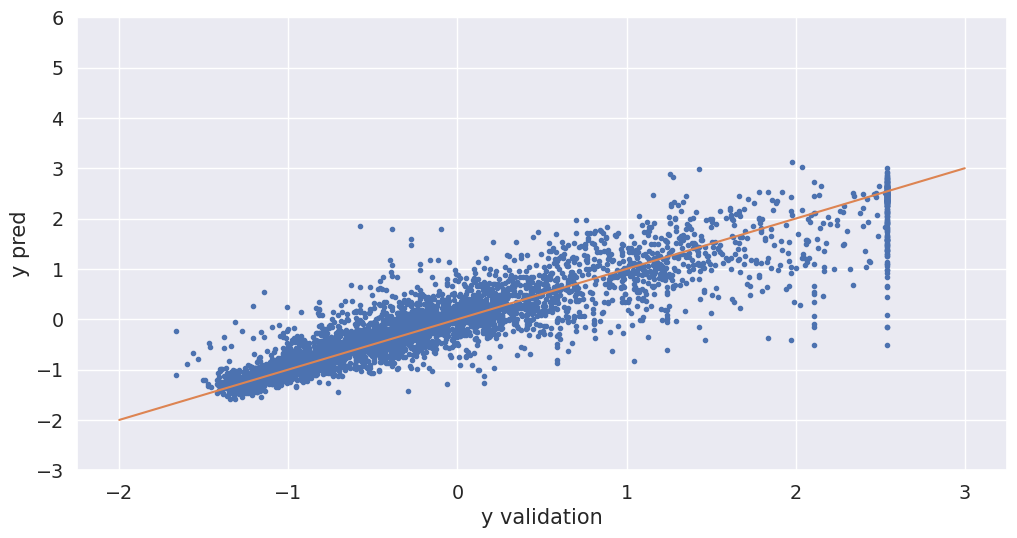

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


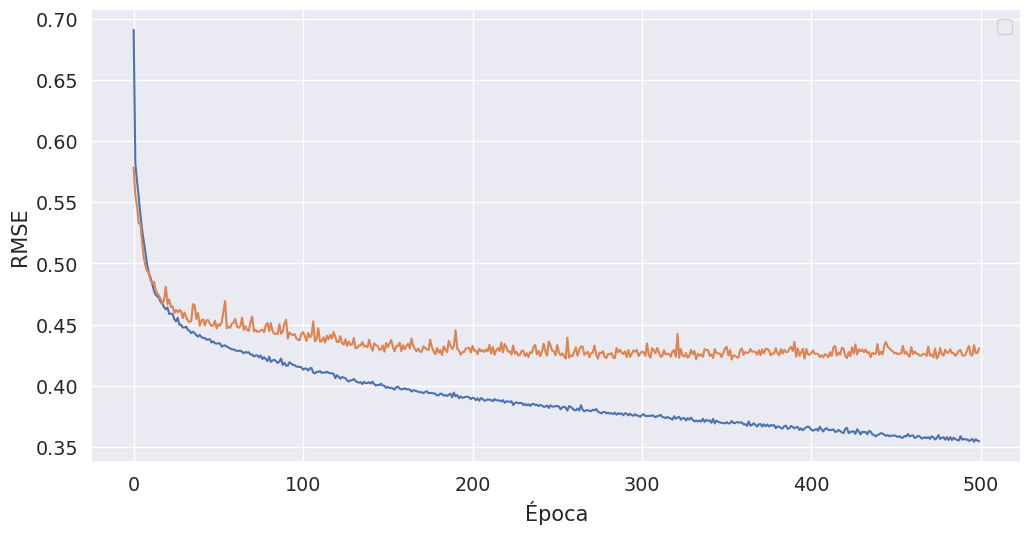

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 15s - loss: 0.7534

1632/6000 [=======>......................] - ETA: 0s - loss: 0.5119 

3200/6000 [===============>..............] - ETA: 0s - loss: 0.4750

4800/6000 [=======================>......] - ETA: 0s - loss: 0.6614

6000/6000 [==============================] - 0s 61us/step - loss: 0.6022 - val_loss: 0.3326


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3799

1920/6000 [========>.....................] - ETA: 0s - loss: 0.3244

3744/6000 [=================>............] - ETA: 0s - loss: 0.3621

5600/6000 [===========================>..] - ETA: 0s - loss: 0.3381

6000/6000 [==============================] - 0s 40us/step - loss: 0.3400 - val_loss: 0.2937


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3554

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2735

3584/6000 [================>.............] - ETA: 0s - loss: 0.2916

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2776

6000/6000 [==============================] - 0s 40us/step - loss: 0.2764 - val_loss: 0.2536


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3709

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2664

3744/6000 [=================>............] - ETA: 0s - loss: 0.2529

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2537

6000/6000 [==============================] - 0s 39us/step - loss: 0.2526 - val_loss: 0.2525


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2386

3744/6000 [=================>............] - ETA: 0s - loss: 0.2615

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2520

6000/6000 [==============================] - 0s 41us/step - loss: 0.2494 - val_loss: 0.2492


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2935

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2466

3584/6000 [================>.............] - ETA: 0s - loss: 0.2360

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 41us/step - loss: 0.2308 - val_loss: 0.2257


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2588

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2276

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 39us/step - loss: 0.2230 - val_loss: 0.2334


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2110

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2286

3712/6000 [=================>............] - ETA: 0s - loss: 0.2244

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 41us/step - loss: 0.2394 - val_loss: 0.2314


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2011



1696/6000 [=======>......................] - ETA: 0s - loss: 0.1980

3456/6000 [================>.............] - ETA: 0s - loss: 0.2164

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 44us/step - loss: 0.2263 - val_loss: 0.2278


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1305

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3110

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2577

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 47us/step - loss: 0.2370 - val_loss: 0.2326


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0940

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2048

3456/6000 [================>.............] - ETA: 0s - loss: 0.2094

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2102

6000/6000 [==============================] - 0s 42us/step - loss: 0.2126 - val_loss: 0.2214


Epoch 12/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2022

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2125

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2083

6000/6000 [==============================] - 0s 43us/step - loss: 0.2063 - val_loss: 0.2210


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3488/6000 [================>.............] - ETA: 0s - loss: 0.2271

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 44us/step - loss: 0.2108 - val_loss: 0.2160


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0628

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1965

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2291

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 42us/step - loss: 0.2187 - val_loss: 0.2216


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1987

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1879

3616/6000 [=================>............] - ETA: 0s - loss: 0.2246

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 40us/step - loss: 0.2219 - val_loss: 0.2279


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1266

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1921

3648/6000 [=================>............] - ETA: 0s - loss: 0.1932

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 42us/step - loss: 0.2060 - val_loss: 0.2259


Epoch 17/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1976

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1935

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 43us/step - loss: 0.1985 - val_loss: 0.2110


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1817

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1922

3424/6000 [================>.............] - ETA: 0s - loss: 0.1976

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 42us/step - loss: 0.1962 - val_loss: 0.2148


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1988

3456/6000 [================>.............] - ETA: 0s - loss: 0.1982

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 42us/step - loss: 0.1950 - val_loss: 0.2169


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2243

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2016

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1973

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1966

6000/6000 [==============================] - 0s 42us/step - loss: 0.1939 - val_loss: 0.2118


Epoch 21/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2563

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2028

3648/6000 [=================>............] - ETA: 0s - loss: 0.1932

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 41us/step - loss: 0.1918 - val_loss: 0.2098


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2322

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2116

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2055

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2008

6000/6000 [==============================] - 0s 43us/step - loss: 0.1935 - val_loss: 0.2144


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2195

3712/6000 [=================>............] - ETA: 0s - loss: 0.2020

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 40us/step - loss: 0.1933 - val_loss: 0.2180


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1970

3488/6000 [================>.............] - ETA: 0s - loss: 0.1861

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1940

6000/6000 [==============================] - 0s 42us/step - loss: 0.1915 - val_loss: 0.2174


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1731

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1778

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 43us/step - loss: 0.1895 - val_loss: 0.2166


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2022

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1983

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 43us/step - loss: 0.1970 - val_loss: 0.2137


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1764

3616/6000 [=================>............] - ETA: 0s - loss: 0.1873

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 41us/step - loss: 0.1918 - val_loss: 0.2070


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1982

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1912

3520/6000 [================>.............] - ETA: 0s - loss: 0.1903

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 43us/step - loss: 0.1885 - val_loss: 0.2020


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1888

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1769

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 46us/step - loss: 0.1868 - val_loss: 0.2062


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1774

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1848

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 45us/step - loss: 0.1810 - val_loss: 0.2067


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1997

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1915

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 43us/step - loss: 0.1870 - val_loss: 0.2060


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2472

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1775

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1873

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 43us/step - loss: 0.1832 - val_loss: 0.2012


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0725

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1847

3744/6000 [=================>............] - ETA: 0s - loss: 0.1750

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 41us/step - loss: 0.1804 - val_loss: 0.2079


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0804

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1641

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1636

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 44us/step - loss: 0.1812 - val_loss: 0.2078


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1795

3488/6000 [================>.............] - ETA: 0s - loss: 0.1770

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 42us/step - loss: 0.1781 - val_loss: 0.2084


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1891

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1791

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 43us/step - loss: 0.1780 - val_loss: 0.2012


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0829

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1730

3584/6000 [================>.............] - ETA: 0s - loss: 0.1856

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 42us/step - loss: 0.1825 - val_loss: 0.2050


Epoch 38/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1689

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1824

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1854

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 44us/step - loss: 0.1891 - val_loss: 0.2037


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1662

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1607

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1918

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 43us/step - loss: 0.1861 - val_loss: 0.1949


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1806

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1779

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 42us/step - loss: 0.1768 - val_loss: 0.1987


Epoch 41/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1911

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1729

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 42us/step - loss: 0.1741 - val_loss: 0.2064


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1719

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 44us/step - loss: 0.1693 - val_loss: 0.1993


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1729

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1625

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1692



6000/6000 [==============================] - 0s 42us/step - loss: 0.1702 - val_loss: 0.1971


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1671

3456/6000 [================>.............] - ETA: 0s - loss: 0.1686

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 43us/step - loss: 0.1706 - val_loss: 0.2097


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1754

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1617

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 45us/step - loss: 0.1700 - val_loss: 0.1964


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1651

3680/6000 [=================>............] - ETA: 0s - loss: 0.1633

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 40us/step - loss: 0.1732 - val_loss: 0.1984


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1904

3424/6000 [================>.............] - ETA: 0s - loss: 0.1704

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 42us/step - loss: 0.1698 - val_loss: 0.1948


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1597

3488/6000 [================>.............] - ETA: 0s - loss: 0.1643

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 41us/step - loss: 0.1712 - val_loss: 0.1955


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2620

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1756

3648/6000 [=================>............] - ETA: 0s - loss: 0.1846

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 41us/step - loss: 0.1767 - val_loss: 0.1944


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2251

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1565

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1628

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 43us/step - loss: 0.1655 - val_loss: 0.1951


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2177

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1715

3552/6000 [================>.............] - ETA: 0s - loss: 0.1739

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 41us/step - loss: 0.1678 - val_loss: 0.1943


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1645



3680/6000 [=================>............] - ETA: 0s - loss: 0.1668

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 40us/step - loss: 0.1636 - val_loss: 0.1947


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3639

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1806

3424/6000 [================>.............] - ETA: 0s - loss: 0.1712

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 42us/step - loss: 0.1647 - val_loss: 0.1968


Epoch 54/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1488

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1793

3584/6000 [================>.............] - ETA: 0s - loss: 0.1697

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 41us/step - loss: 0.1643 - val_loss: 0.1981


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1073

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1590

3712/6000 [=================>............] - ETA: 0s - loss: 0.1624

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 40us/step - loss: 0.1624 - val_loss: 0.2003


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0905

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1537

3648/6000 [=================>............] - ETA: 0s - loss: 0.1538

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 41us/step - loss: 0.1611 - val_loss: 0.1927


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1604

3424/6000 [================>.............] - ETA: 0s - loss: 0.1617

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1611

6000/6000 [==============================] - 0s 43us/step - loss: 0.1596 - val_loss: 0.1928


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0621

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1580

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1602

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 46us/step - loss: 0.1593 - val_loss: 0.1963


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1795

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1649

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 43us/step - loss: 0.1618 - val_loss: 0.2006


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1749

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1402

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1552

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 44us/step - loss: 0.1596 - val_loss: 0.1976


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1589

3456/6000 [================>.............] - ETA: 0s - loss: 0.1650

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 41us/step - loss: 0.1612 - val_loss: 0.2095


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1914

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1597

3680/6000 [=================>............] - ETA: 0s - loss: 0.1580

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 40us/step - loss: 0.1565 - val_loss: 0.2012


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1367

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1625

3776/6000 [=================>............] - ETA: 0s - loss: 0.1597

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1581

6000/6000 [==============================] - 0s 39us/step - loss: 0.1580 - val_loss: 0.2016


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1586

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1594

3680/6000 [=================>............] - ETA: 0s - loss: 0.1584

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 39us/step - loss: 0.1566 - val_loss: 0.1956


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1570

3680/6000 [=================>............] - ETA: 0s - loss: 0.1550

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 42us/step - loss: 0.1590 - val_loss: 0.1949


Epoch 66/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1604

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1561

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1556

6000/6000 [==============================] - 0s 47us/step - loss: 0.1547 - val_loss: 0.2051


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1574

3712/6000 [=================>............] - ETA: 0s - loss: 0.1599

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 40us/step - loss: 0.1559 - val_loss: 0.1906


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1616

3552/6000 [================>.............] - ETA: 0s - loss: 0.1578

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 43us/step - loss: 0.1531 - val_loss: 0.1948


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1325

2976/6000 [=============>................] - ETA: 0s - loss: 0.1480

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 45us/step - loss: 0.1551 - val_loss: 0.1976


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1566

3552/6000 [================>.............] - ETA: 0s - loss: 0.1541

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 40us/step - loss: 0.1554 - val_loss: 0.1973


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1737

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1570

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1587

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1540

6000/6000 [==============================] - 0s 46us/step - loss: 0.1545 - val_loss: 0.1972


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1310

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1405

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1596

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1565

6000/6000 [==============================] - 0s 45us/step - loss: 0.1533 - val_loss: 0.1955


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1446

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1487

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 44us/step - loss: 0.1523 - val_loss: 0.1958


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0787

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1410

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1489

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 44us/step - loss: 0.1532 - val_loss: 0.1934


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1460

3584/6000 [================>.............] - ETA: 0s - loss: 0.1519

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 41us/step - loss: 0.1501 - val_loss: 0.1957


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1387

3552/6000 [================>.............] - ETA: 0s - loss: 0.1382

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1456



6000/6000 [==============================] - 0s 43us/step - loss: 0.1496 - val_loss: 0.1931


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1074

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1612

3648/6000 [=================>............] - ETA: 0s - loss: 0.1506

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 41us/step - loss: 0.1508 - val_loss: 0.1964


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1538

3520/6000 [================>.............] - ETA: 0s - loss: 0.1555

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 41us/step - loss: 0.1507 - val_loss: 0.1930


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1898

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1534

3616/6000 [=================>............] - ETA: 0s - loss: 0.1533

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 40us/step - loss: 0.1508 - val_loss: 0.1974


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3582

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1424

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1448

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 42us/step - loss: 0.1661 - val_loss: 0.2178


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2089

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1397



3648/6000 [=================>............] - ETA: 0s - loss: 0.1562

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 41us/step - loss: 0.1601 - val_loss: 0.2075


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1323

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1641

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1516

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1571

6000/6000 [==============================] - 0s 45us/step - loss: 0.1550 - val_loss: 0.1993


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1468

3648/6000 [=================>............] - ETA: 0s - loss: 0.1553

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 41us/step - loss: 0.1496 - val_loss: 0.2001


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0938

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1445

3424/6000 [================>.............] - ETA: 0s - loss: 0.1422

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1483

6000/6000 [==============================] - 0s 42us/step - loss: 0.1489 - val_loss: 0.1933


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1335

3552/6000 [================>.............] - ETA: 0s - loss: 0.1414

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 41us/step - loss: 0.1469 - val_loss: 0.1919


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1276

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1394

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 41us/step - loss: 0.1457 - val_loss: 0.2068


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2288

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1439

3744/6000 [=================>............] - ETA: 0s - loss: 0.1438

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 40us/step - loss: 0.1448 - val_loss: 0.1877


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1868

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1446

3552/6000 [================>.............] - ETA: 0s - loss: 0.1437

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 40us/step - loss: 0.1437 - val_loss: 0.1883


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1571

3712/6000 [=================>............] - ETA: 0s - loss: 0.1491

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 41us/step - loss: 0.1466 - val_loss: 0.1914


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2185

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1365

3456/6000 [================>.............] - ETA: 0s - loss: 0.1354

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 42us/step - loss: 0.1444 - val_loss: 0.1966


Epoch 91/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0908

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1534

3520/6000 [================>.............] - ETA: 0s - loss: 0.1462

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 43us/step - loss: 0.1457 - val_loss: 0.1992


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1303

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1326

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1358

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 48us/step - loss: 0.1403 - val_loss: 0.2114


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1593

3584/6000 [================>.............] - ETA: 0s - loss: 0.1472

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 41us/step - loss: 0.1461 - val_loss: 0.1976


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1556

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1291

3456/6000 [================>.............] - ETA: 0s - loss: 0.1427

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1463

6000/6000 [==============================] - 0s 42us/step - loss: 0.1484 - val_loss: 0.1919


Epoch 95/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1653

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1554

3680/6000 [=================>............] - ETA: 0s - loss: 0.1519

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 41us/step - loss: 0.1460 - val_loss: 0.1906


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1093

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1544

3552/6000 [================>.............] - ETA: 0s - loss: 0.1507

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 40us/step - loss: 0.1431 - val_loss: 0.2049


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1399

3744/6000 [=================>............] - ETA: 0s - loss: 0.1434

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 40us/step - loss: 0.1416 - val_loss: 0.1904


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1447

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1429

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 45us/step - loss: 0.1414 - val_loss: 0.1906


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0617

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1372

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1400

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 43us/step - loss: 0.1403 - val_loss: 0.1984


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1525

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1499

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1467

6000/6000 [==============================] - 0s 43us/step - loss: 0.1434 - val_loss: 0.1922


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2114

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1468

3616/6000 [=================>............] - ETA: 0s - loss: 0.1463

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 41us/step - loss: 0.1429 - val_loss: 0.1909


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1619

3424/6000 [================>.............] - ETA: 0s - loss: 0.1471

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 43us/step - loss: 0.1401 - val_loss: 0.1963


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2241

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1345

3648/6000 [=================>............] - ETA: 0s - loss: 0.1357

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 42us/step - loss: 0.1393 - val_loss: 0.1914


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1343

3488/6000 [================>.............] - ETA: 0s - loss: 0.1367

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 41us/step - loss: 0.1380 - val_loss: 0.1946


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1311

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1364

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 45us/step - loss: 0.1381 - val_loss: 0.1919


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1074

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1332

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1370

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 42us/step - loss: 0.1379 - val_loss: 0.1896


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1031

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1464

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1360

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 44us/step - loss: 0.1372 - val_loss: 0.2337


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1350

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1393

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 43us/step - loss: 0.1405 - val_loss: 0.1989


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1398

3456/6000 [================>.............] - ETA: 0s - loss: 0.1423

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 43us/step - loss: 0.1354 - val_loss: 0.1952


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0680

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1235

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1416

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 44us/step - loss: 0.1363 - val_loss: 0.1921


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1029

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1260

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1293

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 43us/step - loss: 0.1339 - val_loss: 0.1959


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0855

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1364

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1391

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 44us/step - loss: 0.1344 - val_loss: 0.1970


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3712/6000 [=================>............] - ETA: 0s - loss: 0.1416

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 42us/step - loss: 0.1390 - val_loss: 0.1957


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1250

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1242

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 44us/step - loss: 0.1342 - val_loss: 0.1902


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0848

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1393

3424/6000 [================>.............] - ETA: 0s - loss: 0.1403

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1394

6000/6000 [==============================] - 0s 45us/step - loss: 0.1395 - val_loss: 0.1872


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1656

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1345

2976/6000 [=============>................] - ETA: 0s - loss: 0.1359

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 46us/step - loss: 0.1339 - val_loss: 0.2010


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1221

2784/6000 [============>.................] - ETA: 0s - loss: 0.1238

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 46us/step - loss: 0.1318 - val_loss: 0.1942


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0570

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1318

3616/6000 [=================>............] - ETA: 0s - loss: 0.1298

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 40us/step - loss: 0.1335 - val_loss: 0.1944


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1386

3648/6000 [=================>............] - ETA: 0s - loss: 0.1355

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 40us/step - loss: 0.1340 - val_loss: 0.1913


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1730

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3616/6000 [=================>............] - ETA: 0s - loss: 0.1339

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 44us/step - loss: 0.1319 - val_loss: 0.1909


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2414

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1259

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1278

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 44us/step - loss: 0.1341 - val_loss: 0.1910


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1213

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1250

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 43us/step - loss: 0.1320 - val_loss: 0.1990


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1284

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1305

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 44us/step - loss: 0.1305 - val_loss: 0.1944


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1159

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1236

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 43us/step - loss: 0.1313 - val_loss: 0.1910


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0957

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1170

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1253

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 44us/step - loss: 0.1319 - val_loss: 0.1972


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1353

3488/6000 [================>.............] - ETA: 0s - loss: 0.1313

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 42us/step - loss: 0.1291 - val_loss: 0.1918


Epoch 127/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1056

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1235

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1217

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1284

6000/6000 [==============================] - 0s 43us/step - loss: 0.1308 - val_loss: 0.1961


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1276

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1163

3488/6000 [================>.............] - ETA: 0s - loss: 0.1259

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 41us/step - loss: 0.1284 - val_loss: 0.1934


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2154

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1238

3520/6000 [================>.............] - ETA: 0s - loss: 0.1248

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 42us/step - loss: 0.1284 - val_loss: 0.2022


Epoch 130/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1549

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1166

3680/6000 [=================>............] - ETA: 0s - loss: 0.1281

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 40us/step - loss: 0.1304 - val_loss: 0.1950


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1298

3712/6000 [=================>............] - ETA: 0s - loss: 0.1305

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 40us/step - loss: 0.1278 - val_loss: 0.1943


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0662

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3552/6000 [================>.............] - ETA: 0s - loss: 0.1296

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 42us/step - loss: 0.1281 - val_loss: 0.1953


Epoch 133/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1290

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1162

3680/6000 [=================>............] - ETA: 0s - loss: 0.1242

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 41us/step - loss: 0.1262 - val_loss: 0.1908


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1277

3776/6000 [=================>............] - ETA: 0s - loss: 0.1257

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 42us/step - loss: 0.1263 - val_loss: 0.1968


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1249

3424/6000 [================>.............] - ETA: 0s - loss: 0.1266

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 43us/step - loss: 0.1280 - val_loss: 0.1930


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1325

3456/6000 [================>.............] - ETA: 0s - loss: 0.1332

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 42us/step - loss: 0.1280 - val_loss: 0.2034


Epoch 137/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0903

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1421

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1261

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1269

6000/6000 [==============================] - 0s 45us/step - loss: 0.1281 - val_loss: 0.1966


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0449

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1234

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1253

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 44us/step - loss: 0.1253 - val_loss: 0.1987


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1242

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1267

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 44us/step - loss: 0.1276 - val_loss: 0.1979


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1258

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 44us/step - loss: 0.1261 - val_loss: 0.1954


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1985

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1388

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1286

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 44us/step - loss: 0.1255 - val_loss: 0.1956


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1284

3488/6000 [================>.............] - ETA: 0s - loss: 0.1264

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 43us/step - loss: 0.1254 - val_loss: 0.1907


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1448

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1168

3424/6000 [================>.............] - ETA: 0s - loss: 0.1173

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1209

6000/6000 [==============================] - 0s 43us/step - loss: 0.1232 - val_loss: 0.1970


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1143

3488/6000 [================>.............] - ETA: 0s - loss: 0.1186

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1209

6000/6000 [==============================] - 0s 43us/step - loss: 0.1245 - val_loss: 0.1953


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2306

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1229

3456/6000 [================>.............] - ETA: 0s - loss: 0.1225

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 41us/step - loss: 0.1241 - val_loss: 0.2010


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1322

3712/6000 [=================>............] - ETA: 0s - loss: 0.1261

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 41us/step - loss: 0.1240 - val_loss: 0.1981


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1649

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1097

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1221

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 44us/step - loss: 0.1235 - val_loss: 0.1936


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1212

3776/6000 [=================>............] - ETA: 0s - loss: 0.1207

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1208

6000/6000 [==============================] - 0s 39us/step - loss: 0.1217 - val_loss: 0.1988


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1194

3648/6000 [=================>............] - ETA: 0s - loss: 0.1232

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 40us/step - loss: 0.1227 - val_loss: 0.1954


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0961

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1212

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1333

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 44us/step - loss: 0.1278 - val_loss: 0.1964


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1205

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1211

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 46us/step - loss: 0.1279 - val_loss: 0.1984


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1146

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1229

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1201

6000/6000 [==============================] - 0s 45us/step - loss: 0.1207 - val_loss: 0.1994


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3382

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1272

3424/6000 [================>.............] - ETA: 0s - loss: 0.1188

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1200

6000/6000 [==============================] - 0s 44us/step - loss: 0.1195 - val_loss: 0.1968


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1241

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1199

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1198

6000/6000 [==============================] - 0s 46us/step - loss: 0.1227 - val_loss: 0.1974


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1151

3744/6000 [=================>............] - ETA: 0s - loss: 0.1173

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1174

6000/6000 [==============================] - 0s 40us/step - loss: 0.1197 - val_loss: 0.2017


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1092

3552/6000 [================>.............] - ETA: 0s - loss: 0.1152

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1189

6000/6000 [==============================] - 0s 44us/step - loss: 0.1199 - val_loss: 0.2005


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1885

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1111

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1171

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1171

6000/6000 [==============================] - 0s 42us/step - loss: 0.1182 - val_loss: 0.1975


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2086



1888/6000 [========>.....................] - ETA: 0s - loss: 0.1161



3680/6000 [=================>............] - ETA: 0s - loss: 0.1207

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1217

6000/6000 [==============================] - 0s 40us/step - loss: 0.1220 - val_loss: 0.2047


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2076

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1272

3744/6000 [=================>............] - ETA: 0s - loss: 0.1186

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1188

6000/6000 [==============================] - 0s 41us/step - loss: 0.1195 - val_loss: 0.1945


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0369

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1185

3744/6000 [=================>............] - ETA: 0s - loss: 0.1196

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1175

6000/6000 [==============================] - 0s 41us/step - loss: 0.1188 - val_loss: 0.1948


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2028

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1215

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1247

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 45us/step - loss: 0.1185 - val_loss: 0.1964


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1227

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1260

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 43us/step - loss: 0.1185 - val_loss: 0.1938


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1227

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1209

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1166

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1170

6000/6000 [==============================] - 0s 42us/step - loss: 0.1171 - val_loss: 0.1940


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0645

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1225

3584/6000 [================>.............] - ETA: 0s - loss: 0.1211

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1205

6000/6000 [==============================] - 0s 42us/step - loss: 0.1194 - val_loss: 0.1962


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1177

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1163

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1166

6000/6000 [==============================] - 0s 44us/step - loss: 0.1171 - val_loss: 0.1990


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2326

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1247

3584/6000 [================>.............] - ETA: 0s - loss: 0.1207

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1201

6000/6000 [==============================] - 0s 41us/step - loss: 0.1198 - val_loss: 0.2029


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2397

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1063

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1174

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1163

6000/6000 [==============================] - 0s 43us/step - loss: 0.1167 - val_loss: 0.2073


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1132

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1142

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1130

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1169

6000/6000 [==============================] - 0s 44us/step - loss: 0.1164 - val_loss: 0.2185


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1334

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1233

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1182

6000/6000 [==============================] - 0s 45us/step - loss: 0.1207 - val_loss: 0.1984


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1705

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1164

3744/6000 [=================>............] - ETA: 0s - loss: 0.1117

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1118

6000/6000 [==============================] - 0s 40us/step - loss: 0.1147 - val_loss: 0.1967


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0643

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1045

3424/6000 [================>.............] - ETA: 0s - loss: 0.1179

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1154

6000/6000 [==============================] - 0s 42us/step - loss: 0.1148 - val_loss: 0.2019


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1204

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1109

3648/6000 [=================>............] - ETA: 0s - loss: 0.1133

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1163

6000/6000 [==============================] - 0s 41us/step - loss: 0.1160 - val_loss: 0.1986


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1132

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1147

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1162

6000/6000 [==============================] - 0s 42us/step - loss: 0.1176 - val_loss: 0.1994


Epoch 174/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1196

3680/6000 [=================>............] - ETA: 0s - loss: 0.1176

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1155

6000/6000 [==============================] - 0s 41us/step - loss: 0.1148 - val_loss: 0.1972


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2361

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1183

3616/6000 [=================>............] - ETA: 0s - loss: 0.1206

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1165

6000/6000 [==============================] - 0s 42us/step - loss: 0.1153 - val_loss: 0.1976


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1485

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1045

3424/6000 [================>.............] - ETA: 0s - loss: 0.1097

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1126

6000/6000 [==============================] - 0s 43us/step - loss: 0.1143 - val_loss: 0.2004


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1731

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1222

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1160

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1135

6000/6000 [==============================] - 0s 43us/step - loss: 0.1146 - val_loss: 0.1981


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1109

3712/6000 [=================>............] - ETA: 0s - loss: 0.1103

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1121

6000/6000 [==============================] - 0s 40us/step - loss: 0.1167 - val_loss: 0.1996


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0799

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1118

3680/6000 [=================>............] - ETA: 0s - loss: 0.1155

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1149

6000/6000 [==============================] - 0s 41us/step - loss: 0.1150 - val_loss: 0.1986


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1084

3456/6000 [================>.............] - ETA: 0s - loss: 0.1048

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 43us/step - loss: 0.1132 - val_loss: 0.2001


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0877

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1016

3680/6000 [=================>............] - ETA: 0s - loss: 0.1022

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1080

6000/6000 [==============================] - 0s 41us/step - loss: 0.1135 - val_loss: 0.2011


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2200

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1188

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1124

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 47us/step - loss: 0.1136 - val_loss: 0.2011


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1111

3488/6000 [================>.............] - ETA: 0s - loss: 0.1177

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1122

6000/6000 [==============================] - 0s 43us/step - loss: 0.1109 - val_loss: 0.1995


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1164

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1082

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1127

6000/6000 [==============================] - 0s 43us/step - loss: 0.1142 - val_loss: 0.2105


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1167

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1103

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1144

6000/6000 [==============================] - 0s 44us/step - loss: 0.1139 - val_loss: 0.2042


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2676

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1053

3552/6000 [================>.............] - ETA: 0s - loss: 0.1079

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1124

6000/6000 [==============================] - 0s 41us/step - loss: 0.1125 - val_loss: 0.2033


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1049

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1079

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1078

6000/6000 [==============================] - 0s 46us/step - loss: 0.1106 - val_loss: 0.2255


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1093

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1092

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1121

6000/6000 [==============================] - 0s 45us/step - loss: 0.1132 - val_loss: 0.2041


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1121

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1064

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1077

6000/6000 [==============================] - 0s 44us/step - loss: 0.1111 - val_loss: 0.1977


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1864

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1208

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1130

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1128

6000/6000 [==============================] - 0s 45us/step - loss: 0.1116 - val_loss: 0.1962


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1087

3488/6000 [================>.............] - ETA: 0s - loss: 0.1080

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1089

6000/6000 [==============================] - 0s 41us/step - loss: 0.1110 - val_loss: 0.2139


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1062

3776/6000 [=================>............] - ETA: 0s - loss: 0.1106

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1113

6000/6000 [==============================] - 0s 40us/step - loss: 0.1113 - val_loss: 0.2038


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1166

3424/6000 [================>.............] - ETA: 0s - loss: 0.1064

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1074

6000/6000 [==============================] - 0s 44us/step - loss: 0.1116 - val_loss: 0.2122


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1123

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1062

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1095

6000/6000 [==============================] - 0s 44us/step - loss: 0.1106 - val_loss: 0.2045


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1103

3424/6000 [================>.............] - ETA: 0s - loss: 0.1150

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 43us/step - loss: 0.1089 - val_loss: 0.2010


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2318

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1121

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1132

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 44us/step - loss: 0.1117 - val_loss: 0.2020


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0852

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1062

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0996

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1083

6000/6000 [==============================] - 0s 43us/step - loss: 0.1094 - val_loss: 0.2027


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0942

3552/6000 [================>.............] - ETA: 0s - loss: 0.1022

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1087

6000/6000 [==============================] - 0s 42us/step - loss: 0.1101 - val_loss: 0.2102


Epoch 199/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0885

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1035

3616/6000 [=================>............] - ETA: 0s - loss: 0.1078

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1124

6000/6000 [==============================] - 0s 42us/step - loss: 0.1127 - val_loss: 0.2008


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0620

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1066

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1086

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1080

6000/6000 [==============================] - 0s 44us/step - loss: 0.1100 - val_loss: 0.1999


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1061

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1056

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 45us/step - loss: 0.1097 - val_loss: 0.2058


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1088

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1018

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1036

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1064

6000/6000 [==============================] - 0s 45us/step - loss: 0.1083 - val_loss: 0.2086


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0458

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0976

3424/6000 [================>.............] - ETA: 0s - loss: 0.1062

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 43us/step - loss: 0.1068 - val_loss: 0.2042


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1013

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1028

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1082

6000/6000 [==============================] - 0s 45us/step - loss: 0.1081 - val_loss: 0.2066


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0483

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1069

3712/6000 [=================>............] - ETA: 0s - loss: 0.1087

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1081

6000/6000 [==============================] - 0s 40us/step - loss: 0.1083 - val_loss: 0.2143


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0521

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1051

3616/6000 [=================>............] - ETA: 0s - loss: 0.1029

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1075

6000/6000 [==============================] - 0s 41us/step - loss: 0.1073 - val_loss: 0.2032


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1043

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1037

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1059

6000/6000 [==============================] - 0s 44us/step - loss: 0.1072 - val_loss: 0.2061


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0603

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0969

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1033

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 42us/step - loss: 0.1074 - val_loss: 0.2086


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0630



1920/6000 [========>.....................] - ETA: 0s - loss: 0.1073

3744/6000 [=================>............] - ETA: 0s - loss: 0.1075

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 40us/step - loss: 0.1044 - val_loss: 0.2016


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0801

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0986

3712/6000 [=================>............] - ETA: 0s - loss: 0.1046

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1084

6000/6000 [==============================] - 0s 40us/step - loss: 0.1084 - val_loss: 0.2117


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1045

3776/6000 [=================>............] - ETA: 0s - loss: 0.1040

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1041

6000/6000 [==============================] - 0s 40us/step - loss: 0.1056 - val_loss: 0.2047


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0591

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1006

3744/6000 [=================>............] - ETA: 0s - loss: 0.1048

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1061

6000/6000 [==============================] - 0s 40us/step - loss: 0.1069 - val_loss: 0.2063


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1043

3488/6000 [================>.............] - ETA: 0s - loss: 0.1023

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1068



6000/6000 [==============================] - 0s 42us/step - loss: 0.1046 - val_loss: 0.2095


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1046

3712/6000 [=================>............] - ETA: 0s - loss: 0.1045

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1056

6000/6000 [==============================] - 0s 40us/step - loss: 0.1059 - val_loss: 0.1991


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1008

3456/6000 [================>.............] - ETA: 0s - loss: 0.1034

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 44us/step - loss: 0.1072 - val_loss: 0.1988


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1041

3648/6000 [=================>............] - ETA: 0s - loss: 0.1047

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1047

6000/6000 [==============================] - 0s 42us/step - loss: 0.1046 - val_loss: 0.2113


Epoch 217/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0799



1792/6000 [=======>......................] - ETA: 0s - loss: 0.1014

3552/6000 [================>.............] - ETA: 0s - loss: 0.1053

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1050

6000/6000 [==============================] - 0s 42us/step - loss: 0.1052 - val_loss: 0.2156


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0722

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1058

3424/6000 [================>.............] - ETA: 0s - loss: 0.1111

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1062

6000/6000 [==============================] - 0s 41us/step - loss: 0.1060 - val_loss: 0.2064


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0850

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1104

3424/6000 [================>.............] - ETA: 0s - loss: 0.1095

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1092

6000/6000 [==============================] - 0s 42us/step - loss: 0.1064 - val_loss: 0.2164


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0930

3424/6000 [================>.............] - ETA: 0s - loss: 0.0994

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1027

6000/6000 [==============================] - 0s 43us/step - loss: 0.1053 - val_loss: 0.2018


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0999

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1037

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1044

6000/6000 [==============================] - 0s 44us/step - loss: 0.1052 - val_loss: 0.2055


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1049

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1057

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1019

6000/6000 [==============================] - 0s 44us/step - loss: 0.1038 - val_loss: 0.2085


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1025

3616/6000 [=================>............] - ETA: 0s - loss: 0.1017

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1054

6000/6000 [==============================] - 0s 41us/step - loss: 0.1044 - val_loss: 0.2072


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1046

3616/6000 [=================>............] - ETA: 0s - loss: 0.0961

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 41us/step - loss: 0.1017 - val_loss: 0.2089


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1088

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1074

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1032

6000/6000 [==============================] - 0s 43us/step - loss: 0.1036 - val_loss: 0.2151


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0763

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0952

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1028

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1044

6000/6000 [==============================] - 0s 45us/step - loss: 0.1032 - val_loss: 0.2080


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1035

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1050

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1037

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1027

6000/6000 [==============================] - 0s 49us/step - loss: 0.1034 - val_loss: 0.2065


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0475

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0977

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0955

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0982

6000/6000 [==============================] - 0s 46us/step - loss: 0.1014 - val_loss: 0.2084


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0962

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0986

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 41us/step - loss: 0.1026 - val_loss: 0.2055


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0942

3648/6000 [=================>............] - ETA: 0s - loss: 0.0966

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1025

6000/6000 [==============================] - 0s 41us/step - loss: 0.1024 - val_loss: 0.2069


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0890

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1056

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1047

6000/6000 [==============================] - 0s 41us/step - loss: 0.1041 - val_loss: 0.2059


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1418

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1035

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1053

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1038

6000/6000 [==============================] - 0s 43us/step - loss: 0.1036 - val_loss: 0.2082


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0982

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1071

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1082

6000/6000 [==============================] - 0s 43us/step - loss: 0.1070 - val_loss: 0.2123


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1084

3712/6000 [=================>............] - ETA: 0s - loss: 0.1093

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1064

6000/6000 [==============================] - 0s 42us/step - loss: 0.1045 - val_loss: 0.2037


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176



1920/6000 [========>.....................] - ETA: 0s - loss: 0.1040

3712/6000 [=================>............] - ETA: 0s - loss: 0.1045

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1050

6000/6000 [==============================] - 0s 40us/step - loss: 0.1048 - val_loss: 0.2035


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0566

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0913

3584/6000 [================>.............] - ETA: 0s - loss: 0.0926

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0986

6000/6000 [==============================] - 0s 44us/step - loss: 0.1001 - val_loss: 0.2073


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0954

3584/6000 [================>.............] - ETA: 0s - loss: 0.0957

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 41us/step - loss: 0.0992 - val_loss: 0.2091


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0673

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1077

3712/6000 [=================>............] - ETA: 0s - loss: 0.1029

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1015

6000/6000 [==============================] - 0s 40us/step - loss: 0.1008 - val_loss: 0.2055


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0486

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1023

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1024

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0998

6000/6000 [==============================] - 0s 45us/step - loss: 0.1013 - val_loss: 0.2094


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0729

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0924

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0967

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1019

6000/6000 [==============================] - 0s 44us/step - loss: 0.1016 - val_loss: 0.2049


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0970

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0959

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 44us/step - loss: 0.0971 - val_loss: 0.2122


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0967

3552/6000 [================>.............] - ETA: 0s - loss: 0.0978

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 41us/step - loss: 0.1006 - val_loss: 0.2063


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0768

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0905

3552/6000 [================>.............] - ETA: 0s - loss: 0.0940

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 41us/step - loss: 0.1001 - val_loss: 0.2048


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0984

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1001

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 43us/step - loss: 0.0991 - val_loss: 0.2013


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1039

3552/6000 [================>.............] - ETA: 0s - loss: 0.1006

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1035



6000/6000 [==============================] - 0s 42us/step - loss: 0.1034 - val_loss: 0.2173


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0621

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1056

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1056

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1040



6000/6000 [==============================] - 0s 42us/step - loss: 0.1028 - val_loss: 0.2099


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0676

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0939

3584/6000 [================>.............] - ETA: 0s - loss: 0.0946

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0947

6000/6000 [==============================] - 0s 41us/step - loss: 0.1027 - val_loss: 0.2151


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1868

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1026

3648/6000 [=================>............] - ETA: 0s - loss: 0.1065

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1056

6000/6000 [==============================] - 0s 41us/step - loss: 0.1056 - val_loss: 0.2087


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1069

3520/6000 [================>.............] - ETA: 0s - loss: 0.1015

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0989

6000/6000 [==============================] - 0s 41us/step - loss: 0.0989 - val_loss: 0.2098


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0929

3616/6000 [=================>............] - ETA: 0s - loss: 0.0997

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0995

6000/6000 [==============================] - 0s 44us/step - loss: 0.0988 - val_loss: 0.2069


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1018

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1033

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0976

6000/6000 [==============================] - 0s 43us/step - loss: 0.0979 - val_loss: 0.2111


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0848

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0841

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0925

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 42us/step - loss: 0.0959 - val_loss: 0.2219


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931



1920/6000 [========>.....................] - ETA: 0s - loss: 0.0969



3712/6000 [=================>............] - ETA: 0s - loss: 0.1000

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0986

6000/6000 [==============================] - 0s 40us/step - loss: 0.0994 - val_loss: 0.2089


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0877

3712/6000 [=================>............] - ETA: 0s - loss: 0.0945

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0980

6000/6000 [==============================] - 0s 40us/step - loss: 0.0988 - val_loss: 0.2080


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0455

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0990

3488/6000 [================>.............] - ETA: 0s - loss: 0.0967

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0978

6000/6000 [==============================] - 0s 42us/step - loss: 0.0968 - val_loss: 0.2204


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1122



1728/6000 [=======>......................] - ETA: 0s - loss: 0.0943



3424/6000 [================>.............] - ETA: 0s - loss: 0.0937

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 43us/step - loss: 0.1014 - val_loss: 0.2179


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2685

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1041

3680/6000 [=================>............] - ETA: 0s - loss: 0.1055

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1001

6000/6000 [==============================] - 0s 40us/step - loss: 0.1012 - val_loss: 0.2132


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0550

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0898

3744/6000 [=================>............] - ETA: 0s - loss: 0.1017

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 39us/step - loss: 0.0976 - val_loss: 0.2094


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1523

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0930

3552/6000 [================>.............] - ETA: 0s - loss: 0.0933

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0990

6000/6000 [==============================] - 0s 40us/step - loss: 0.0981 - val_loss: 0.2105


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0820

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0959

3584/6000 [================>.............] - ETA: 0s - loss: 0.0984

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0973

6000/6000 [==============================] - 0s 42us/step - loss: 0.0968 - val_loss: 0.2147


Epoch 261/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0996

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0989

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0950

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0941

6000/6000 [==============================] - 0s 45us/step - loss: 0.0953 - val_loss: 0.2076


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1063

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0966

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0962

6000/6000 [==============================] - 0s 43us/step - loss: 0.0953 - val_loss: 0.2116


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0996

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0916

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0944

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0981

6000/6000 [==============================] - 0s 42us/step - loss: 0.0970 - val_loss: 0.2152


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0529

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0938

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0966

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 43us/step - loss: 0.0993 - val_loss: 0.2138


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0576

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1162

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1046

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 43us/step - loss: 0.0995 - val_loss: 0.2202


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1029

3744/6000 [=================>............] - ETA: 0s - loss: 0.0991

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1012

6000/6000 [==============================] - 0s 40us/step - loss: 0.1022 - val_loss: 0.2273


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0840

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0930

3680/6000 [=================>............] - ETA: 0s - loss: 0.0951

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0970

6000/6000 [==============================] - 0s 40us/step - loss: 0.0961 - val_loss: 0.2204


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0965

3712/6000 [=================>............] - ETA: 0s - loss: 0.0969

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0995

6000/6000 [==============================] - 0s 40us/step - loss: 0.0975 - val_loss: 0.2067


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0526

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0922

3488/6000 [================>.............] - ETA: 0s - loss: 0.0943

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0966

6000/6000 [==============================] - 0s 41us/step - loss: 0.0977 - val_loss: 0.2202


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0957

3744/6000 [=================>............] - ETA: 0s - loss: 0.0947

5600/6000 [===========================>..] - ETA: 0s - loss: 0.0968

6000/6000 [==============================] - 0s 40us/step - loss: 0.0963 - val_loss: 0.2100


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1242

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0964

3744/6000 [=================>............] - ETA: 0s - loss: 0.0992

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 40us/step - loss: 0.0973 - val_loss: 0.2177


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0940

3712/6000 [=================>............] - ETA: 0s - loss: 0.0929

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 42us/step - loss: 0.0935 - val_loss: 0.2121


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0517

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0893

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0866

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 42us/step - loss: 0.0922 - val_loss: 0.2122


Epoch 274/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0315

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0874

3456/6000 [================>.............] - ETA: 0s - loss: 0.0887

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 42us/step - loss: 0.0927 - val_loss: 0.2233


Epoch 275/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0983

3648/6000 [=================>............] - ETA: 0s - loss: 0.0967

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 41us/step - loss: 0.0965 - val_loss: 0.2199


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0901

3584/6000 [================>.............] - ETA: 0s - loss: 0.0964

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0973

6000/6000 [==============================] - 0s 42us/step - loss: 0.0970 - val_loss: 0.2167


Epoch 277/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0721

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0932

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0917

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0949

6000/6000 [==============================] - 0s 45us/step - loss: 0.0965 - val_loss: 0.2163


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0874

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1383

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1243

6000/6000 [==============================] - 0s 45us/step - loss: 0.1208 - val_loss: 0.2252


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0941

3552/6000 [================>.............] - ETA: 0s - loss: 0.0944

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0940

6000/6000 [==============================] - 0s 41us/step - loss: 0.0940 - val_loss: 0.2100


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0899

3712/6000 [=================>............] - ETA: 0s - loss: 0.0934

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0942

6000/6000 [==============================] - 0s 41us/step - loss: 0.0949 - val_loss: 0.2342


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0988

3456/6000 [================>.............] - ETA: 0s - loss: 0.0938

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0952

6000/6000 [==============================] - 0s 44us/step - loss: 0.0949 - val_loss: 0.2127


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0948

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0921

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0974

6000/6000 [==============================] - 0s 44us/step - loss: 0.0965 - val_loss: 0.2120


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0922

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0968

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0946

6000/6000 [==============================] - 0s 44us/step - loss: 0.0958 - val_loss: 0.2249


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0984

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0931

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0939

6000/6000 [==============================] - 0s 44us/step - loss: 0.0956 - val_loss: 0.2122


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0491

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0838

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0876

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0935

6000/6000 [==============================] - 0s 43us/step - loss: 0.0942 - val_loss: 0.2127


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0967

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0929

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 45us/step - loss: 0.0929 - val_loss: 0.2144


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0548

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0923

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0877

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 43us/step - loss: 0.0917 - val_loss: 0.2193


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0969

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0957

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 43us/step - loss: 0.0934 - val_loss: 0.2204


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0570

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0904

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0939

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0927

6000/6000 [==============================] - 0s 41us/step - loss: 0.0919 - val_loss: 0.2111


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0778

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0942



3616/6000 [=================>............] - ETA: 0s - loss: 0.0923

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 41us/step - loss: 0.0918 - val_loss: 0.2149


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0937

3616/6000 [=================>............] - ETA: 0s - loss: 0.0927

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0901

6000/6000 [==============================] - 0s 43us/step - loss: 0.0911 - val_loss: 0.2116


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0284

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0940

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0946

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0953

6000/6000 [==============================] - 0s 43us/step - loss: 0.0935 - val_loss: 0.2196


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0537

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0976

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0939

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0922

6000/6000 [==============================] - 0s 43us/step - loss: 0.0932 - val_loss: 0.2128


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0968

3616/6000 [=================>............] - ETA: 0s - loss: 0.0979

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 43us/step - loss: 0.0985 - val_loss: 0.2146


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0729

1408/6000 [======>.......................] - ETA: 0s - loss: 0.0939

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0895

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0890

6000/6000 [==============================] - 0s 44us/step - loss: 0.0909 - val_loss: 0.2083


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0402

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0940

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0909

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0910

5824/6000 [============================>.] - ETA: 0s - loss: 0.0913

6000/6000 [==============================] - 0s 50us/step - loss: 0.0919 - val_loss: 0.2106


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0753

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0884

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0913

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 43us/step - loss: 0.0896 - val_loss: 0.2142


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0458

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0878

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0896

6000/6000 [==============================] - 0s 43us/step - loss: 0.0909 - val_loss: 0.2115


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0784

3488/6000 [================>.............] - ETA: 0s - loss: 0.0860

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0879

6000/6000 [==============================] - 0s 43us/step - loss: 0.0905 - val_loss: 0.2141


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2240

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0905

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0899

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 44us/step - loss: 0.0898 - val_loss: 0.2169


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0660

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0885

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0888

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0924

6000/6000 [==============================] - 0s 42us/step - loss: 0.0924 - val_loss: 0.2133


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0855

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0866

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 43us/step - loss: 0.0911 - val_loss: 0.2268


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0889

3456/6000 [================>.............] - ETA: 0s - loss: 0.0924

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 45us/step - loss: 0.0915 - val_loss: 0.2152


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0825

3456/6000 [================>.............] - ETA: 0s - loss: 0.0866

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 42us/step - loss: 0.0892 - val_loss: 0.2162


Epoch 305/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0665

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0861

3616/6000 [=================>............] - ETA: 0s - loss: 0.0858

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0891

6000/6000 [==============================] - 0s 45us/step - loss: 0.0894 - val_loss: 0.2183


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0756

1344/6000 [=====>........................] - ETA: 0s - loss: 0.0803

2848/6000 [=============>................] - ETA: 0s - loss: 0.0871

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 46us/step - loss: 0.0901 - val_loss: 0.2161


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0950

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0961

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0951

6000/6000 [==============================] - 0s 45us/step - loss: 0.0929 - val_loss: 0.2117


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0944

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0942

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 44us/step - loss: 0.0894 - val_loss: 0.2134


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0868

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0834

3648/6000 [=================>............] - ETA: 0s - loss: 0.0848

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 41us/step - loss: 0.0877 - val_loss: 0.2172


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758



1856/6000 [========>.....................] - ETA: 0s - loss: 0.0893

3648/6000 [=================>............] - ETA: 0s - loss: 0.0887

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 41us/step - loss: 0.0919 - val_loss: 0.2146


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0820

3680/6000 [=================>............] - ETA: 0s - loss: 0.0890

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0904

6000/6000 [==============================] - 0s 41us/step - loss: 0.0887 - val_loss: 0.2221


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0472

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0838

3552/6000 [================>.............] - ETA: 0s - loss: 0.0886

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0895

6000/6000 [==============================] - 0s 42us/step - loss: 0.0898 - val_loss: 0.2190


Epoch 313/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0694

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0969

3648/6000 [=================>............] - ETA: 0s - loss: 0.0913

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 42us/step - loss: 0.0906 - val_loss: 0.2163


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0448

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0938

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0914

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 44us/step - loss: 0.0892 - val_loss: 0.2131


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0904

3424/6000 [================>.............] - ETA: 0s - loss: 0.0862

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 44us/step - loss: 0.0876 - val_loss: 0.2150


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0427

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0908

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0845

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0869

6000/6000 [==============================] - 0s 43us/step - loss: 0.0874 - val_loss: 0.2167


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0849

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0890

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 43us/step - loss: 0.0904 - val_loss: 0.2165


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0357

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0899

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0937

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 45us/step - loss: 0.0890 - val_loss: 0.2153


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0878

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0915

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 44us/step - loss: 0.0908 - val_loss: 0.2206


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1537

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0926

3648/6000 [=================>............] - ETA: 0s - loss: 0.0919

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 41us/step - loss: 0.0892 - val_loss: 0.2189


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0821

3584/6000 [================>.............] - ETA: 0s - loss: 0.0856

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0893

6000/6000 [==============================] - 0s 44us/step - loss: 0.0886 - val_loss: 0.2174


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0317

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0765

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0822

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 43us/step - loss: 0.0863 - val_loss: 0.2178


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0728

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0927

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0873

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0881

6000/6000 [==============================] - 0s 43us/step - loss: 0.0870 - val_loss: 0.2136


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0891

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0843

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 44us/step - loss: 0.0873 - val_loss: 0.2259


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1089

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0783

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0811

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 42us/step - loss: 0.0878 - val_loss: 0.2124


Epoch 326/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1023

3712/6000 [=================>............] - ETA: 0s - loss: 0.0954

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0933

6000/6000 [==============================] - 0s 41us/step - loss: 0.0930 - val_loss: 0.2190


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0401

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0925

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0867

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 44us/step - loss: 0.0872 - val_loss: 0.2173


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0487

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0814

3424/6000 [================>.............] - ETA: 0s - loss: 0.0835

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0861

6000/6000 [==============================] - 0s 44us/step - loss: 0.0870 - val_loss: 0.2365


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0484

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1007

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0907

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 43us/step - loss: 0.0920 - val_loss: 0.2200


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0886

3424/6000 [================>.............] - ETA: 0s - loss: 0.0868

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 43us/step - loss: 0.0880 - val_loss: 0.2152


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0680

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0826

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0872

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 43us/step - loss: 0.0865 - val_loss: 0.2146


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0903

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0881

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0879

6000/6000 [==============================] - 0s 44us/step - loss: 0.0878 - val_loss: 0.2173


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0845

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 46us/step - loss: 0.0891 - val_loss: 0.2177


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0790

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0985

2976/6000 [=============>................] - ETA: 0s - loss: 0.0916

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0903

6000/6000 [==============================] - 0s 47us/step - loss: 0.0900 - val_loss: 0.2155


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0902

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0870

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 45us/step - loss: 0.0876 - val_loss: 0.2205


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0832

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0893

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0898

6000/6000 [==============================] - 0s 43us/step - loss: 0.0885 - val_loss: 0.2140


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0715

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0824

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0799

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 43us/step - loss: 0.0852 - val_loss: 0.2254


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0892

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0832

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0836

6000/6000 [==============================] - 0s 44us/step - loss: 0.0849 - val_loss: 0.2156


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0560

1280/6000 [=====>........................] - ETA: 0s - loss: 0.0831

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0829

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0835

6000/6000 [==============================] - 0s 45us/step - loss: 0.0860 - val_loss: 0.2177


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0889

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0864

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 43us/step - loss: 0.0852 - val_loss: 0.2128


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0531

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0792

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0886

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 43us/step - loss: 0.0903 - val_loss: 0.2167


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0978

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0891

3424/6000 [================>.............] - ETA: 0s - loss: 0.0885

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 43us/step - loss: 0.0867 - val_loss: 0.2210


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0781

3456/6000 [================>.............] - ETA: 0s - loss: 0.0779

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0848

6000/6000 [==============================] - 0s 42us/step - loss: 0.0853 - val_loss: 0.2258


Epoch 344/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0683

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0830

3424/6000 [================>.............] - ETA: 0s - loss: 0.0847

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 41us/step - loss: 0.0827 - val_loss: 0.2186


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0849

3552/6000 [================>.............] - ETA: 0s - loss: 0.0830

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 41us/step - loss: 0.0837 - val_loss: 0.2238


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0449

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0872

3680/6000 [=================>............] - ETA: 0s - loss: 0.0841

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 41us/step - loss: 0.0849 - val_loss: 0.2176


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0751

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0779

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0838

6000/6000 [==============================] - 0s 44us/step - loss: 0.0840 - val_loss: 0.2168


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0865

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0789

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 44us/step - loss: 0.0844 - val_loss: 0.2287


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0917

3712/6000 [=================>............] - ETA: 0s - loss: 0.0854

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 40us/step - loss: 0.0847 - val_loss: 0.2185


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0689

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0807

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0791

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 44us/step - loss: 0.0838 - val_loss: 0.2225


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0888

3424/6000 [================>.............] - ETA: 0s - loss: 0.0852

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 43us/step - loss: 0.0846 - val_loss: 0.2179


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0831

3456/6000 [================>.............] - ETA: 0s - loss: 0.0851

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 42us/step - loss: 0.0849 - val_loss: 0.2406


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0614

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0896

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0844

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 43us/step - loss: 0.0854 - val_loss: 0.2244


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1184/6000 [====>.........................] - ETA: 0s - loss: 0.0910

2752/6000 [============>.................] - ETA: 0s - loss: 0.0858

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0878

5824/6000 [============================>.] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 49us/step - loss: 0.0861 - val_loss: 0.2221


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0397

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0816

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0770

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 44us/step - loss: 0.0829 - val_loss: 0.2160


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0817

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0814

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 44us/step - loss: 0.0829 - val_loss: 0.2218


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0812

3616/6000 [=================>............] - ETA: 0s - loss: 0.0833

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0819

6000/6000 [==============================] - 0s 41us/step - loss: 0.0829 - val_loss: 0.2266


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0309

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0740

3616/6000 [=================>............] - ETA: 0s - loss: 0.0782

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 45us/step - loss: 0.0834 - val_loss: 0.2209


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0760

2880/6000 [=============>................] - ETA: 0s - loss: 0.0824

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0826

5824/6000 [============================>.] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 49us/step - loss: 0.0825 - val_loss: 0.2342


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0795

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0840

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0847

6000/6000 [==============================] - 0s 42us/step - loss: 0.0841 - val_loss: 0.2225


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0523

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0830

3776/6000 [=================>............] - ETA: 0s - loss: 0.0857

5632/6000 [===========================>..] - ETA: 0s - loss: 0.0843

6000/6000 [==============================] - 0s 40us/step - loss: 0.0846 - val_loss: 0.2261


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0864

3648/6000 [=================>............] - ETA: 0s - loss: 0.0826

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 43us/step - loss: 0.0822 - val_loss: 0.2273


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0717

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0772

3648/6000 [=================>............] - ETA: 0s - loss: 0.0830

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 40us/step - loss: 0.0853 - val_loss: 0.2242


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0382

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0771

3584/6000 [================>.............] - ETA: 0s - loss: 0.0816

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 41us/step - loss: 0.0826 - val_loss: 0.2243


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0538

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0809

3680/6000 [=================>............] - ETA: 0s - loss: 0.0850

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 40us/step - loss: 0.0814 - val_loss: 0.2175


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0343

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0761

3616/6000 [=================>............] - ETA: 0s - loss: 0.0813

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 44us/step - loss: 0.0813 - val_loss: 0.2233


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0836

3680/6000 [=================>............] - ETA: 0s - loss: 0.0791

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 41us/step - loss: 0.0816 - val_loss: 0.2220


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0531

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0883

3616/6000 [=================>............] - ETA: 0s - loss: 0.0837

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 41us/step - loss: 0.0826 - val_loss: 0.2227


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0384

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0763

3648/6000 [=================>............] - ETA: 0s - loss: 0.0802

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0828

6000/6000 [==============================] - 0s 41us/step - loss: 0.0820 - val_loss: 0.2224


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0828

3456/6000 [================>.............] - ETA: 0s - loss: 0.0860

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0832

6000/6000 [==============================] - 0s 42us/step - loss: 0.0827 - val_loss: 0.2228


Epoch 371/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0745

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0821

3584/6000 [================>.............] - ETA: 0s - loss: 0.0816

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0812

6000/6000 [==============================] - 0s 43us/step - loss: 0.0813 - val_loss: 0.2336


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0614

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0761

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0801

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 45us/step - loss: 0.0823 - val_loss: 0.2379


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0754

3456/6000 [================>.............] - ETA: 0s - loss: 0.0808

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 44us/step - loss: 0.0813 - val_loss: 0.2359


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0828

2784/6000 [============>.................] - ETA: 0s - loss: 0.0852

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0823

5600/6000 [===========================>..] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 50us/step - loss: 0.0828 - val_loss: 0.2224


Epoch 375/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1951

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0837

3488/6000 [================>.............] - ETA: 0s - loss: 0.0836

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 41us/step - loss: 0.0806 - val_loss: 0.2220


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0538

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0691

3712/6000 [=================>............] - ETA: 0s - loss: 0.0778

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0789

6000/6000 [==============================] - 0s 40us/step - loss: 0.0794 - val_loss: 0.2277


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0829

3584/6000 [================>.............] - ETA: 0s - loss: 0.0825

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 42us/step - loss: 0.0824 - val_loss: 0.2297


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0453

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0824

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0856

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 44us/step - loss: 0.0809 - val_loss: 0.2217


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0757

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0809

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 44us/step - loss: 0.0816 - val_loss: 0.2212


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0766

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0816

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0819

6000/6000 [==============================] - 0s 46us/step - loss: 0.0821 - val_loss: 0.2192


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0680

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0768

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 44us/step - loss: 0.0801 - val_loss: 0.2259


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0827

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0780

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0813

6000/6000 [==============================] - 0s 45us/step - loss: 0.0818 - val_loss: 0.2252


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0771

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0823

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 43us/step - loss: 0.0811 - val_loss: 0.2336


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0769

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0776

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 43us/step - loss: 0.0802 - val_loss: 0.2227


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0779

3648/6000 [=================>............] - ETA: 0s - loss: 0.0803

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 40us/step - loss: 0.0813 - val_loss: 0.2262


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0718

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0808

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 43us/step - loss: 0.0793 - val_loss: 0.2223


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0793

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0724

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0779

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 45us/step - loss: 0.0788 - val_loss: 0.2287


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0763

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0808

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 44us/step - loss: 0.0795 - val_loss: 0.2247


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0762

3456/6000 [================>.............] - ETA: 0s - loss: 0.0796

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 44us/step - loss: 0.0782 - val_loss: 0.2239


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0818

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0788

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0771

6000/6000 [==============================] - 0s 41us/step - loss: 0.0775 - val_loss: 0.2251


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0779

3648/6000 [=================>............] - ETA: 0s - loss: 0.0789

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 45us/step - loss: 0.0805 - val_loss: 0.2261


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0827

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0820

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 46us/step - loss: 0.0794 - val_loss: 0.2204


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0586

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0838

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0791

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 46us/step - loss: 0.0774 - val_loss: 0.2301


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0291

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0924

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0840

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 43us/step - loss: 0.0844 - val_loss: 0.2258


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0806

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0802

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 43us/step - loss: 0.0795 - val_loss: 0.2227


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0586

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0992

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0910

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0910

6000/6000 [==============================] - 0s 43us/step - loss: 0.0898 - val_loss: 0.2191


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0787

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0791

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 43us/step - loss: 0.0799 - val_loss: 0.2271


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0544

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0760

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0793

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 44us/step - loss: 0.0797 - val_loss: 0.2192


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3424/6000 [================>.............] - ETA: 0s - loss: 0.0756

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0791

6000/6000 [==============================] - 0s 42us/step - loss: 0.0783 - val_loss: 0.2189


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0778

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0769

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 43us/step - loss: 0.0793 - val_loss: 0.2265


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0772

3584/6000 [================>.............] - ETA: 0s - loss: 0.0775

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 41us/step - loss: 0.0797 - val_loss: 0.2202


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0785

3680/6000 [=================>............] - ETA: 0s - loss: 0.0774

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0762

6000/6000 [==============================] - 0s 40us/step - loss: 0.0765 - val_loss: 0.2217


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0342

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3616/6000 [=================>............] - ETA: 0s - loss: 0.0821

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 41us/step - loss: 0.0794 - val_loss: 0.2257


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0731

3648/6000 [=================>............] - ETA: 0s - loss: 0.0752

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0771

6000/6000 [==============================] - 0s 42us/step - loss: 0.0767 - val_loss: 0.2362


Epoch 405/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0781

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 45us/step - loss: 0.0784 - val_loss: 0.2203


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0746

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0771

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 43us/step - loss: 0.0778 - val_loss: 0.2257


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0471

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0723

3552/6000 [================>.............] - ETA: 0s - loss: 0.0797

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 42us/step - loss: 0.0784 - val_loss: 0.2325


Epoch 408/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0691

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0806

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0772

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 43us/step - loss: 0.0802 - val_loss: 0.2256


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0487

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0729

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0767

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 45us/step - loss: 0.0784 - val_loss: 0.2241


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0765

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0769

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 44us/step - loss: 0.0761 - val_loss: 0.2247


Epoch 411/500
  32/6000 [..............................] - ETA: 1s - loss: 0.0576

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0795

3424/6000 [================>.............] - ETA: 0s - loss: 0.0730

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0771

6000/6000 [==============================] - 0s 42us/step - loss: 0.0776 - val_loss: 0.2285


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0951

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0793

3744/6000 [=================>............] - ETA: 0s - loss: 0.0799

5600/6000 [===========================>..] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 39us/step - loss: 0.0773 - val_loss: 0.2285


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0491

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0787

3744/6000 [=================>............] - ETA: 0s - loss: 0.0785

5600/6000 [===========================>..] - ETA: 0s - loss: 0.0786

6000/6000 [==============================] - 0s 42us/step - loss: 0.0804 - val_loss: 0.2280


Epoch 414/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0514

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0756

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0939

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 44us/step - loss: 0.0872 - val_loss: 0.2257


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0252

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0722

3680/6000 [=================>............] - ETA: 0s - loss: 0.0753

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 41us/step - loss: 0.0768 - val_loss: 0.2272


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0875

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0741

3680/6000 [=================>............] - ETA: 0s - loss: 0.0774

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 40us/step - loss: 0.0773 - val_loss: 0.2241


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0726

3680/6000 [=================>............] - ETA: 0s - loss: 0.0725

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 41us/step - loss: 0.0762 - val_loss: 0.2247


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0409

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0759

3424/6000 [================>.............] - ETA: 0s - loss: 0.0778

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 41us/step - loss: 0.0786 - val_loss: 0.2261


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0750

3648/6000 [=================>............] - ETA: 0s - loss: 0.0766

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 43us/step - loss: 0.0827 - val_loss: 0.2325


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0784

3712/6000 [=================>............] - ETA: 0s - loss: 0.0816

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 40us/step - loss: 0.0845 - val_loss: 0.2268


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1273

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0799

3744/6000 [=================>............] - ETA: 0s - loss: 0.0791

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 40us/step - loss: 0.0788 - val_loss: 0.2242


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0700

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0760

3488/6000 [================>.............] - ETA: 0s - loss: 0.0752

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 44us/step - loss: 0.0774 - val_loss: 0.2207


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0506

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0831

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0839

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 43us/step - loss: 0.0789 - val_loss: 0.2246


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1765

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1290

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1082

6000/6000 [==============================] - 0s 43us/step - loss: 0.1037 - val_loss: 0.2256


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0443

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0705

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0735

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 43us/step - loss: 0.0759 - val_loss: 0.2239


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0690

3680/6000 [=================>............] - ETA: 0s - loss: 0.0751

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 40us/step - loss: 0.0762 - val_loss: 0.2332


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0662

3648/6000 [=================>............] - ETA: 0s - loss: 0.0721

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 41us/step - loss: 0.0764 - val_loss: 0.2222


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0676

3616/6000 [=================>............] - ETA: 0s - loss: 0.0693

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 41us/step - loss: 0.0754 - val_loss: 0.2244


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0762

2976/6000 [=============>................] - ETA: 0s - loss: 0.0725

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 45us/step - loss: 0.0740 - val_loss: 0.2296


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0728

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0728

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0763

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 45us/step - loss: 0.0768 - val_loss: 0.2264


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0766

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0724

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0716

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0755

6000/6000 [==============================] - 0s 43us/step - loss: 0.0755 - val_loss: 0.2242


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0381

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3488/6000 [================>.............] - ETA: 0s - loss: 0.0805

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 40us/step - loss: 0.0780 - val_loss: 0.2308


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0738

3680/6000 [=================>............] - ETA: 0s - loss: 0.0755

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0770

6000/6000 [==============================] - 0s 40us/step - loss: 0.0766 - val_loss: 0.2291


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0703

3456/6000 [================>.............] - ETA: 0s - loss: 0.0696

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 45us/step - loss: 0.0753 - val_loss: 0.2279


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0729

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0743

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 43us/step - loss: 0.0744 - val_loss: 0.2280


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0491

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0749

3552/6000 [================>.............] - ETA: 0s - loss: 0.0747

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 41us/step - loss: 0.0748 - val_loss: 0.2293


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0688

3616/6000 [=================>............] - ETA: 0s - loss: 0.0713

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 41us/step - loss: 0.0745 - val_loss: 0.2271


Epoch 438/500
  32/6000 [..............................] - ETA: 1s - loss: 0.0522

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0768

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0785

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 42us/step - loss: 0.0753 - val_loss: 0.2300


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0688

3712/6000 [=================>............] - ETA: 0s - loss: 0.0764

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 43us/step - loss: 0.0764 - val_loss: 0.2291


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0708

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0700

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 44us/step - loss: 0.0731 - val_loss: 0.2304


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0695

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0732

3680/6000 [=================>............] - ETA: 0s - loss: 0.0724

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0718

6000/6000 [==============================] - 0s 40us/step - loss: 0.0735 - val_loss: 0.2267


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0273

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0647

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0724

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 45us/step - loss: 0.0747 - val_loss: 0.2289


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0670

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0737

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0743

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 44us/step - loss: 0.0755 - val_loss: 0.2358


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0704

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0724

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 45us/step - loss: 0.0739 - val_loss: 0.2295


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0522

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0775

3424/6000 [================>.............] - ETA: 0s - loss: 0.0745

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0745

6000/6000 [==============================] - 0s 43us/step - loss: 0.0750 - val_loss: 0.2241


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0503

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0761

3424/6000 [================>.............] - ETA: 0s - loss: 0.0757

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 43us/step - loss: 0.0738 - val_loss: 0.2276


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0718

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0751

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 45us/step - loss: 0.0751 - val_loss: 0.2290


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0718

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0752

3744/6000 [=================>............] - ETA: 0s - loss: 0.0736

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 41us/step - loss: 0.0724 - val_loss: 0.2276


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0466

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0711

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0728

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0755

6000/6000 [==============================] - 0s 44us/step - loss: 0.0742 - val_loss: 0.2352


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0585

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0703

3424/6000 [================>.............] - ETA: 0s - loss: 0.0721

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 44us/step - loss: 0.0760 - val_loss: 0.2252


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0765

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0876

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0813

6000/6000 [==============================] - 0s 43us/step - loss: 0.0797 - val_loss: 0.2297


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0705

3712/6000 [=================>............] - ETA: 0s - loss: 0.0686

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 41us/step - loss: 0.0719 - val_loss: 0.2262


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0469

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0763

3680/6000 [=================>............] - ETA: 0s - loss: 0.0771

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0749

6000/6000 [==============================] - 0s 41us/step - loss: 0.0751 - val_loss: 0.2320


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0389

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0689

3456/6000 [================>.............] - ETA: 0s - loss: 0.0714

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 46us/step - loss: 0.0746 - val_loss: 0.2332


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0696

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0745

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 43us/step - loss: 0.0731 - val_loss: 0.2319


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0719

3712/6000 [=================>............] - ETA: 0s - loss: 0.0743

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 40us/step - loss: 0.0740 - val_loss: 0.2286


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0347

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0753

3680/6000 [=================>............] - ETA: 0s - loss: 0.0732

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 44us/step - loss: 0.0732 - val_loss: 0.2351


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0452

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0737

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0739

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 43us/step - loss: 0.0752 - val_loss: 0.2311


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0641

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0852

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0802

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 43us/step - loss: 0.0758 - val_loss: 0.2278


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0695

3424/6000 [================>.............] - ETA: 0s - loss: 0.0710

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 43us/step - loss: 0.0724 - val_loss: 0.2324


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0698

3424/6000 [================>.............] - ETA: 0s - loss: 0.0709

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 43us/step - loss: 0.0725 - val_loss: 0.2299


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0525

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0726

3424/6000 [================>.............] - ETA: 0s - loss: 0.0722

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0700

6000/6000 [==============================] - 0s 43us/step - loss: 0.0708 - val_loss: 0.2307


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0799

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0664

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0692

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0703

6000/6000 [==============================] - 0s 44us/step - loss: 0.0718 - val_loss: 0.2296


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0428

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0709

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0705

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 44us/step - loss: 0.0732 - val_loss: 0.2261


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0448

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0743

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0731

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0704

6000/6000 [==============================] - 0s 45us/step - loss: 0.0718 - val_loss: 0.2283


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0363

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0740

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0726

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 43us/step - loss: 0.0732 - val_loss: 0.2352


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0682

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0692

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 43us/step - loss: 0.0732 - val_loss: 0.2332


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0736

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0728

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 41us/step - loss: 0.0710 - val_loss: 0.2318


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0713

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0716

3712/6000 [=================>............] - ETA: 0s - loss: 0.0726

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 40us/step - loss: 0.0727 - val_loss: 0.2348


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0773

3712/6000 [=================>............] - ETA: 0s - loss: 0.0773

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 40us/step - loss: 0.0752 - val_loss: 0.2312


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0673

3712/6000 [=================>............] - ETA: 0s - loss: 0.0674

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 40us/step - loss: 0.0726 - val_loss: 0.2325


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1114

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0582

3616/6000 [=================>............] - ETA: 0s - loss: 0.0685

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0697

6000/6000 [==============================] - 0s 40us/step - loss: 0.0710 - val_loss: 0.2337


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0585

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0739

3712/6000 [=================>............] - ETA: 0s - loss: 0.0743

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 41us/step - loss: 0.0742 - val_loss: 0.2326


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0776

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0709

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0703

6000/6000 [==============================] - 0s 46us/step - loss: 0.0724 - val_loss: 0.2279


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0612

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0733

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0716

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0722

6000/6000 [==============================] - 0s 44us/step - loss: 0.0716 - val_loss: 0.2274


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0641

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0628

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0668

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0690

6000/6000 [==============================] - 0s 46us/step - loss: 0.0702 - val_loss: 0.2321


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0770

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0770

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 43us/step - loss: 0.0741 - val_loss: 0.2327


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0612

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0707

3648/6000 [=================>............] - ETA: 0s - loss: 0.0693

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0703

6000/6000 [==============================] - 0s 40us/step - loss: 0.0696 - val_loss: 0.2310


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0710

3712/6000 [=================>............] - ETA: 0s - loss: 0.0710

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 41us/step - loss: 0.0723 - val_loss: 0.2327


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0683

3648/6000 [=================>............] - ETA: 0s - loss: 0.0675

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0693

6000/6000 [==============================] - 0s 40us/step - loss: 0.0708 - val_loss: 0.2403


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0473

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0718

3712/6000 [=================>............] - ETA: 0s - loss: 0.0713

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 40us/step - loss: 0.0714 - val_loss: 0.2277


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0400

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0621

3712/6000 [=================>............] - ETA: 0s - loss: 0.0709

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0702

6000/6000 [==============================] - 0s 40us/step - loss: 0.0703 - val_loss: 0.2322


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0709

3776/6000 [=================>............] - ETA: 0s - loss: 0.0734

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0729

6000/6000 [==============================] - 0s 41us/step - loss: 0.0719 - val_loss: 0.2381


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0314

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0682

3584/6000 [================>.............] - ETA: 0s - loss: 0.0702

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0722

6000/6000 [==============================] - 0s 41us/step - loss: 0.0718 - val_loss: 0.2471


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0800

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0764

3680/6000 [=================>............] - ETA: 0s - loss: 0.0739

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 40us/step - loss: 0.0723 - val_loss: 0.2272


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0234

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0664

3648/6000 [=================>............] - ETA: 0s - loss: 0.0694

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 41us/step - loss: 0.0704 - val_loss: 0.2292


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0658

3616/6000 [=================>............] - ETA: 0s - loss: 0.0712

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0704

6000/6000 [==============================] - 0s 40us/step - loss: 0.0709 - val_loss: 0.2330


Epoch 488/500
  32/6000 [..............................] - ETA: 1s - loss: 0.0340

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0701

3712/6000 [=================>............] - ETA: 0s - loss: 0.0706

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 41us/step - loss: 0.0720 - val_loss: 0.2306


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0368

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0669

3680/6000 [=================>............] - ETA: 0s - loss: 0.0656

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0701

6000/6000 [==============================] - 0s 40us/step - loss: 0.0705 - val_loss: 0.2309


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0732

3712/6000 [=================>............] - ETA: 0s - loss: 0.0713

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 39us/step - loss: 0.0722 - val_loss: 0.2315


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0561

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0673

3712/6000 [=================>............] - ETA: 0s - loss: 0.0664

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0695

6000/6000 [==============================] - 0s 39us/step - loss: 0.0701 - val_loss: 0.2325


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0428

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0682

3648/6000 [=================>............] - ETA: 0s - loss: 0.0727

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 40us/step - loss: 0.0715 - val_loss: 0.2347


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0722

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0740

3680/6000 [=================>............] - ETA: 0s - loss: 0.0711

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0705

6000/6000 [==============================] - 0s 41us/step - loss: 0.0707 - val_loss: 0.2301


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0674

3616/6000 [=================>............] - ETA: 0s - loss: 0.0673

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0673

6000/6000 [==============================] - 0s 43us/step - loss: 0.0690 - val_loss: 0.2287


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0684

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0738

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 47us/step - loss: 0.0700 - val_loss: 0.2314


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0487

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0583

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0676

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0696

6000/6000 [==============================] - 0s 42us/step - loss: 0.0704 - val_loss: 0.2346


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0468

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0725

3456/6000 [================>.............] - ETA: 0s - loss: 0.0700

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0687

6000/6000 [==============================] - 0s 41us/step - loss: 0.0682 - val_loss: 0.2324


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0533

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0659

3552/6000 [================>.............] - ETA: 0s - loss: 0.0716

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 42us/step - loss: 0.0708 - val_loss: 0.2431


Epoch 499/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0473

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0691

3680/6000 [=================>............] - ETA: 0s - loss: 0.0686

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0707

6000/6000 [==============================] - 0s 40us/step - loss: 0.0715 - val_loss: 0.2568


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0727

3488/6000 [================>.............] - ETA: 0s - loss: 0.0720

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0712

6000/6000 [==============================] - 0s 42us/step - loss: 0.0722 - val_loss: 0.2380


No handles with labels found to put in legend.


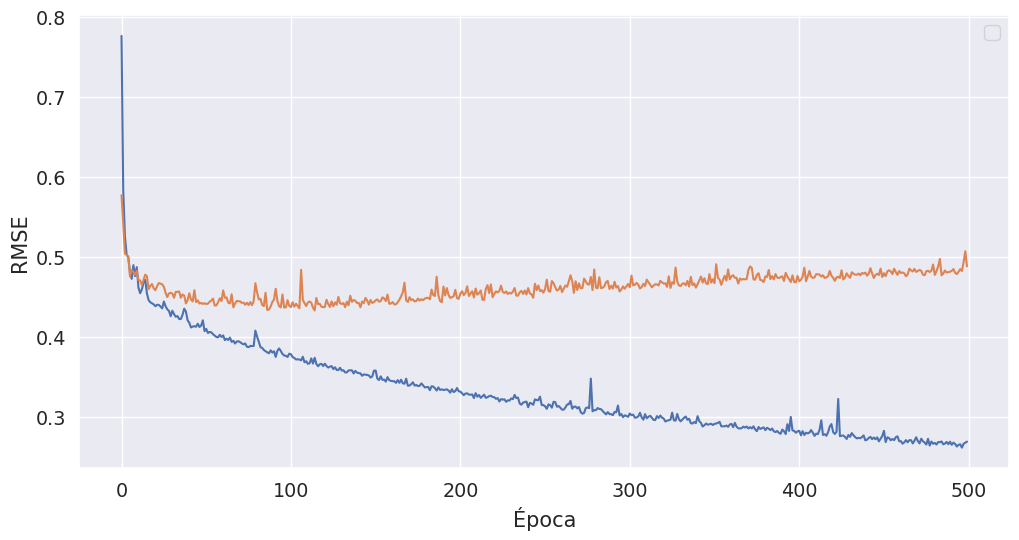

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 29s - loss: 1.0799

1504/6000 [======>.......................] - ETA: 0s - loss: 0.6941 

3008/6000 [==============>...............] - ETA: 0s - loss: 0.6164

4480/6000 [=====================>........] - ETA: 0s - loss: 0.6614

5984/6000 [============================>.] - ETA: 0s - loss: 0.6182

6000/6000 [==============================] - 0s 79us/step - loss: 0.6197 - val_loss: 0.3869


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2386

1440/6000 [======>.......................] - ETA: 0s - loss: 0.5021

2944/6000 [=============>................] - ETA: 0s - loss: 0.5014

4384/6000 [====================>.........] - ETA: 0s - loss: 0.4980

5792/6000 [===========================>..] - ETA: 0s - loss: 0.4892

6000/6000 [==============================] - 0s 50us/step - loss: 0.4878 - val_loss: 0.3507


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3778

1536/6000 [======>.......................] - ETA: 0s - loss: 0.5009

3040/6000 [==============>...............] - ETA: 0s - loss: 0.4376

4544/6000 [=====================>........] - ETA: 0s - loss: 0.4097

5920/6000 [============================>.] - ETA: 0s - loss: 0.4445

6000/6000 [==============================] - 0s 50us/step - loss: 0.4438 - val_loss: 0.3155


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4271

1568/6000 [======>.......................] - ETA: 0s - loss: 0.4917

3072/6000 [==============>...............] - ETA: 0s - loss: 0.4237

4576/6000 [=====================>........] - ETA: 0s - loss: 0.4064

6000/6000 [==============================] - 0s 48us/step - loss: 0.3955 - val_loss: 0.2918


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6796

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3799

2848/6000 [=============>................] - ETA: 0s - loss: 0.3536

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3503

5472/6000 [==========================>...] - ETA: 0s - loss: 0.3816

6000/6000 [==============================] - 0s 53us/step - loss: 0.3814 - val_loss: 0.2685


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4713

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3422

2848/6000 [=============>................] - ETA: 0s - loss: 0.3213

4320/6000 [====================>.........] - ETA: 0s - loss: 0.3474

5728/6000 [===========================>..] - ETA: 0s - loss: 0.3378

6000/6000 [==============================] - 0s 54us/step - loss: 0.3359 - val_loss: 0.2669


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2815

1312/6000 [=====>........................] - ETA: 0s - loss: 0.3162

2720/6000 [============>.................] - ETA: 0s - loss: 0.3558

4224/6000 [====================>.........] - ETA: 0s - loss: 0.3322

5696/6000 [===========================>..] - ETA: 0s - loss: 0.3204

6000/6000 [==============================] - 0s 50us/step - loss: 0.3238 - val_loss: 0.2530


Epoch 8/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1864

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2741

2752/6000 [============>.................] - ETA: 0s - loss: 0.2940

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2920

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2963

6000/6000 [==============================] - 0s 54us/step - loss: 0.2971 - val_loss: 0.2448


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3285

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2948

2720/6000 [============>.................] - ETA: 0s - loss: 0.2726

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3044

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2982

6000/6000 [==============================] - 0s 53us/step - loss: 0.2962 - val_loss: 0.2421


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3564

1344/6000 [=====>........................] - ETA: 0s - loss: 0.3072

2720/6000 [============>.................] - ETA: 0s - loss: 0.2892

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2837

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2991

6000/6000 [==============================] - 0s 51us/step - loss: 0.2959 - val_loss: 0.2403


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2168

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2660

2848/6000 [=============>................] - ETA: 0s - loss: 0.2738

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2800

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2931

6000/6000 [==============================] - 0s 50us/step - loss: 0.2911 - val_loss: 0.2379


Epoch 12/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2284



1504/6000 [======>.......................] - ETA: 0s - loss: 0.2753

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2637

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2716

5984/6000 [============================>.] - ETA: 0s - loss: 0.2752

6000/6000 [==============================] - 0s 49us/step - loss: 0.2753 - val_loss: 0.2338


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2328

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2649

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2854

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2786

5984/6000 [============================>.] - ETA: 0s - loss: 0.2767

6000/6000 [==============================] - 0s 49us/step - loss: 0.2766 - val_loss: 0.2299


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2844

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2595

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2579

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2560

5952/6000 [============================>.] - ETA: 0s - loss: 0.2649

6000/6000 [==============================] - 0s 49us/step - loss: 0.2643 - val_loss: 0.2331


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2637

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2530

2976/6000 [=============>................] - ETA: 0s - loss: 0.2643

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2628

6000/6000 [==============================] - 0s 49us/step - loss: 0.2622 - val_loss: 0.2259


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2513

2976/6000 [=============>................] - ETA: 0s - loss: 0.2594

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2605

5856/6000 [============================>.] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 49us/step - loss: 0.2613 - val_loss: 0.2273


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2206

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2543

2848/6000 [=============>................] - ETA: 0s - loss: 0.2518

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2482

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2503

6000/6000 [==============================] - 0s 51us/step - loss: 0.2518 - val_loss: 0.2238


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2132

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2496

2944/6000 [=============>................] - ETA: 0s - loss: 0.2541

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2485

5952/6000 [============================>.] - ETA: 0s - loss: 0.2571

6000/6000 [==============================] - 0s 49us/step - loss: 0.2565 - val_loss: 0.2247


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2569

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2671

2880/6000 [=============>................] - ETA: 0s - loss: 0.2562

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2627

5856/6000 [============================>.] - ETA: 0s - loss: 0.2601

6000/6000 [==============================] - 0s 49us/step - loss: 0.2597 - val_loss: 0.2229


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2257

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2415

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2424

5920/6000 [============================>.] - ETA: 0s - loss: 0.2476

6000/6000 [==============================] - 0s 49us/step - loss: 0.2477 - val_loss: 0.2195


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1766

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2106

2656/6000 [============>.................] - ETA: 0s - loss: 0.2199

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2308

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2421

6000/6000 [==============================] - 0s 52us/step - loss: 0.2423 - val_loss: 0.2216


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2514

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2363

2912/6000 [=============>................] - ETA: 0s - loss: 0.2414

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2466

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2512

6000/6000 [==============================] - 0s 52us/step - loss: 0.2505 - val_loss: 0.2222


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2371

2944/6000 [=============>................] - ETA: 0s - loss: 0.2501

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2460

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2518

6000/6000 [==============================] - 0s 50us/step - loss: 0.2513 - val_loss: 0.2170


Epoch 24/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2317

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2373

2944/6000 [=============>................] - ETA: 0s - loss: 0.2348

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2398

5888/6000 [============================>.] - ETA: 0s - loss: 0.2416

6000/6000 [==============================] - 0s 50us/step - loss: 0.2419 - val_loss: 0.2130


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2414



2976/6000 [=============>................] - ETA: 0s - loss: 0.2419

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2401

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2409

6000/6000 [==============================] - 0s 51us/step - loss: 0.2406 - val_loss: 0.2169


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2032

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2112

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2334

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2370

5984/6000 [============================>.] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 49us/step - loss: 0.2391 - val_loss: 0.2117


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2416

2560/6000 [===========>..................] - ETA: 0s - loss: 0.2465

3584/6000 [================>.............] - ETA: 0s - loss: 0.2427

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 55us/step - loss: 0.2421 - val_loss: 0.2157


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2361

2720/6000 [============>.................] - ETA: 0s - loss: 0.2455

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2408

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2370

6000/6000 [==============================] - 0s 52us/step - loss: 0.2389 - val_loss: 0.2132


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2448

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2475

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2483

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2397

6000/6000 [==============================] - 0s 56us/step - loss: 0.2412 - val_loss: 0.2116


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2319

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2338

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2409

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 53us/step - loss: 0.2364 - val_loss: 0.2145


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3922

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2347

2848/6000 [=============>................] - ETA: 0s - loss: 0.2479

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2451

5824/6000 [============================>.] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 51us/step - loss: 0.2404 - val_loss: 0.2124


Epoch 32/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1538

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2165

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2360

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2346

5984/6000 [============================>.] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 49us/step - loss: 0.2342 - val_loss: 0.2102


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2351

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2353

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2310

5952/6000 [============================>.] - ETA: 0s - loss: 0.2325

6000/6000 [==============================] - 0s 51us/step - loss: 0.2320 - val_loss: 0.2159


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2252

2880/6000 [=============>................] - ETA: 0s - loss: 0.2419

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2376

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 50us/step - loss: 0.2332 - val_loss: 0.2068


Epoch 35/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2437

2944/6000 [=============>................] - ETA: 0s - loss: 0.2272

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2263

5856/6000 [============================>.] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 50us/step - loss: 0.2274 - val_loss: 0.2216


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1707

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2284

2912/6000 [=============>................] - ETA: 0s - loss: 0.2299

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2274

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 51us/step - loss: 0.2330 - val_loss: 0.2156


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2610

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2309

2784/6000 [============>.................] - ETA: 0s - loss: 0.2288

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2319

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 51us/step - loss: 0.2290 - val_loss: 0.2127


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2470

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2276

2848/6000 [=============>................] - ETA: 0s - loss: 0.2260

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2334

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 52us/step - loss: 0.2327 - val_loss: 0.2081


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3338

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2310

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2267

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 48us/step - loss: 0.2271 - val_loss: 0.2059


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2316

2816/6000 [=============>................] - ETA: 0s - loss: 0.2333

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2384

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 52us/step - loss: 0.2303 - val_loss: 0.2046


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2326

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2208

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2248

5888/6000 [============================>.] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 51us/step - loss: 0.2213 - val_loss: 0.2118


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2617

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2436

2784/6000 [============>.................] - ETA: 0s - loss: 0.2489

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2366

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 51us/step - loss: 0.2272 - val_loss: 0.2064


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2168

2976/6000 [=============>................] - ETA: 0s - loss: 0.2140

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2197

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 51us/step - loss: 0.2234 - val_loss: 0.2100


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2924

2976/6000 [=============>................] - ETA: 0s - loss: 0.2638

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2484

5824/6000 [============================>.] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 50us/step - loss: 0.2450 - val_loss: 0.2109


Epoch 45/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4827

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2301

2976/6000 [=============>................] - ETA: 0s - loss: 0.2172

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2135



5984/6000 [============================>.] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 49us/step - loss: 0.2199 - val_loss: 0.2085


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3714

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2198

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2304

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 48us/step - loss: 0.2216 - val_loss: 0.2057


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2111

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2205

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 48us/step - loss: 0.2248 - val_loss: 0.2081


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2548

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2205

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2232

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 48us/step - loss: 0.2254 - val_loss: 0.2009


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2113

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2177

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 48us/step - loss: 0.2238 - val_loss: 0.2009


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3320

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2269

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2163

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 51us/step - loss: 0.2207 - val_loss: 0.2036


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2780

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2094

2816/6000 [=============>................] - ETA: 0s - loss: 0.2042

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2108

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2138

6000/6000 [==============================] - 0s 51us/step - loss: 0.2173 - val_loss: 0.2060


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3170

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2363

2880/6000 [=============>................] - ETA: 0s - loss: 0.2178

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2185

5824/6000 [============================>.] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 51us/step - loss: 0.2226 - val_loss: 0.2034


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3854

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2454

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2267

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 50us/step - loss: 0.2241 - val_loss: 0.1979


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2100

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2100

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2149

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 48us/step - loss: 0.2239 - val_loss: 0.1980


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2074

2944/6000 [=============>................] - ETA: 0s - loss: 0.2182

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2192

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 50us/step - loss: 0.2199 - val_loss: 0.1999


Epoch 56/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2484

2976/6000 [=============>................] - ETA: 0s - loss: 0.2317

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2245

5920/6000 [============================>.] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 49us/step - loss: 0.2198 - val_loss: 0.2027


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2028

2784/6000 [============>.................] - ETA: 0s - loss: 0.2252

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2198

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 51us/step - loss: 0.2153 - val_loss: 0.2023


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1810

1216/6000 [=====>........................] - ETA: 0s - loss: 0.2262

2656/6000 [============>.................] - ETA: 0s - loss: 0.2246

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2215

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 53us/step - loss: 0.2202 - val_loss: 0.2043


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2073

2880/6000 [=============>................] - ETA: 0s - loss: 0.2198

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2235

5856/6000 [============================>.] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 49us/step - loss: 0.2235 - val_loss: 0.1994


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3625

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2180

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2240

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2208

5888/6000 [============================>.] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 50us/step - loss: 0.2202 - val_loss: 0.1994


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2245

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2181

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2251

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 58us/step - loss: 0.2199 - val_loss: 0.2007


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2205

2720/6000 [============>.................] - ETA: 0s - loss: 0.2253

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2301

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 51us/step - loss: 0.2199 - val_loss: 0.2017


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2212

2944/6000 [=============>................] - ETA: 0s - loss: 0.2208

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2139

5984/6000 [============================>.] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 49us/step - loss: 0.2143 - val_loss: 0.2006


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4335

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2294

2880/6000 [=============>................] - ETA: 0s - loss: 0.2244

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2236

5888/6000 [============================>.] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 49us/step - loss: 0.2174 - val_loss: 0.2017


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2163

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2128

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2114

6000/6000 [==============================] - 0s 48us/step - loss: 0.2174 - val_loss: 0.1974


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2037

2880/6000 [=============>................] - ETA: 0s - loss: 0.2039

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2100

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 50us/step - loss: 0.2138 - val_loss: 0.1991


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2763



1472/6000 [======>.......................] - ETA: 0s - loss: 0.2280



2912/6000 [=============>................] - ETA: 0s - loss: 0.2213

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2080

5856/6000 [============================>.] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 50us/step - loss: 0.2138 - val_loss: 0.1975


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2119

2880/6000 [=============>................] - ETA: 0s - loss: 0.2175

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2140

5856/6000 [============================>.] - ETA: 0s - loss: 0.2107

6000/6000 [==============================] - 0s 49us/step - loss: 0.2122 - val_loss: 0.2006


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2058

2944/6000 [=============>................] - ETA: 0s - loss: 0.2095

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2104

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2107

6000/6000 [==============================] - 0s 52us/step - loss: 0.2099 - val_loss: 0.1924


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2688

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2245

2720/6000 [============>.................] - ETA: 0s - loss: 0.2119

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2113

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2079

6000/6000 [==============================] - 0s 51us/step - loss: 0.2137 - val_loss: 0.2039


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3226

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2211

2976/6000 [=============>................] - ETA: 0s - loss: 0.2099

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2146

5952/6000 [============================>.] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 49us/step - loss: 0.2117 - val_loss: 0.1991


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2063

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2105

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 48us/step - loss: 0.2134 - val_loss: 0.2006


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2026

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2015

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2090

5984/6000 [============================>.] - ETA: 0s - loss: 0.2097

6000/6000 [==============================] - 0s 49us/step - loss: 0.2094 - val_loss: 0.1985


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2049

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2024

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2091

5888/6000 [============================>.] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 49us/step - loss: 0.2148 - val_loss: 0.1973


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2173

2880/6000 [=============>................] - ETA: 0s - loss: 0.2177

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2069

5824/6000 [============================>.] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 49us/step - loss: 0.2110 - val_loss: 0.1981


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2009

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2218

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 48us/step - loss: 0.2129 - val_loss: 0.1945


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1800

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2291

2752/6000 [============>.................] - ETA: 0s - loss: 0.2062

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2106

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2092

6000/6000 [==============================] - 0s 50us/step - loss: 0.2096 - val_loss: 0.2011


Epoch 78/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2584



1504/6000 [======>.......................] - ETA: 0s - loss: 0.1978

2976/6000 [=============>................] - ETA: 0s - loss: 0.2174

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2094

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2097

6000/6000 [==============================] - 0s 52us/step - loss: 0.2106 - val_loss: 0.2016


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1421

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2003

2976/6000 [=============>................] - ETA: 0s - loss: 0.2064

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2094

5856/6000 [============================>.] - ETA: 0s - loss: 0.2066

6000/6000 [==============================] - 0s 50us/step - loss: 0.2068 - val_loss: 0.1956


Epoch 80/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2622



1472/6000 [======>.......................] - ETA: 0s - loss: 0.2035

2880/6000 [=============>................] - ETA: 0s - loss: 0.2134

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2064

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2077

6000/6000 [==============================] - 0s 52us/step - loss: 0.2076 - val_loss: 0.1943


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2191

2944/6000 [=============>................] - ETA: 0s - loss: 0.2046

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2042

5888/6000 [============================>.] - ETA: 0s - loss: 0.2063

6000/6000 [==============================] - 0s 50us/step - loss: 0.2084 - val_loss: 0.1904


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1941

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2126

2944/6000 [=============>................] - ETA: 0s - loss: 0.2012

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2033

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2094

6000/6000 [==============================] - 0s 52us/step - loss: 0.2116 - val_loss: 0.1982


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2072

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2010

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2006

6000/6000 [==============================] - 0s 48us/step - loss: 0.2054 - val_loss: 0.1971


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2491

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2183

2880/6000 [=============>................] - ETA: 0s - loss: 0.2228

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2186

5824/6000 [============================>.] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 51us/step - loss: 0.2138 - val_loss: 0.1986


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1986

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1983

2848/6000 [=============>................] - ETA: 0s - loss: 0.2060

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2048

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 52us/step - loss: 0.2062 - val_loss: 0.1972


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3271

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1866

2912/6000 [=============>................] - ETA: 0s - loss: 0.2008

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2046

5824/6000 [============================>.] - ETA: 0s - loss: 0.2043

6000/6000 [==============================] - 0s 50us/step - loss: 0.2085 - val_loss: 0.1920


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2080

2784/6000 [============>.................] - ETA: 0s - loss: 0.2083

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2142

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 51us/step - loss: 0.2091 - val_loss: 0.1903


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1485

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2083

2880/6000 [=============>................] - ETA: 0s - loss: 0.2162

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2116

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2087

6000/6000 [==============================] - 0s 51us/step - loss: 0.2085 - val_loss: 0.1933


Epoch 89/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1953

2976/6000 [=============>................] - ETA: 0s - loss: 0.2049

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2091

5920/6000 [============================>.] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 50us/step - loss: 0.2060 - val_loss: 0.1950


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1485

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2167

2912/6000 [=============>................] - ETA: 0s - loss: 0.2059

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2042

5856/6000 [============================>.] - ETA: 0s - loss: 0.2077

6000/6000 [==============================] - 0s 51us/step - loss: 0.2071 - val_loss: 0.1943


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2031

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1917

2912/6000 [=============>................] - ETA: 0s - loss: 0.2017

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2030

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2058

6000/6000 [==============================] - 0s 50us/step - loss: 0.2050 - val_loss: 0.1919


Epoch 92/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1339

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2003

2976/6000 [=============>................] - ETA: 0s - loss: 0.2011

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2041

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2077

6000/6000 [==============================] - 0s 51us/step - loss: 0.2080 - val_loss: 0.1953


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2091

2976/6000 [=============>................] - ETA: 0s - loss: 0.2068

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2074

5984/6000 [============================>.] - ETA: 0s - loss: 0.2031

6000/6000 [==============================] - 0s 49us/step - loss: 0.2035 - val_loss: 0.1893


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2064

2816/6000 [=============>................] - ETA: 0s - loss: 0.2058

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2081

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2093

6000/6000 [==============================] - 0s 51us/step - loss: 0.2068 - val_loss: 0.1902


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0832

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1844

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1969

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2019

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2025

6000/6000 [==============================] - 0s 54us/step - loss: 0.2031 - val_loss: 0.1891


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2336

2976/6000 [=============>................] - ETA: 0s - loss: 0.2187

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2126

5824/6000 [============================>.] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 50us/step - loss: 0.2061 - val_loss: 0.1936


Epoch 97/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2527

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2100

2944/6000 [=============>................] - ETA: 0s - loss: 0.2115

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2103

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2073

6000/6000 [==============================] - 0s 49us/step - loss: 0.2070 - val_loss: 0.2008


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3213

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2332

2976/6000 [=============>................] - ETA: 0s - loss: 0.2219

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2112

5952/6000 [============================>.] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 48us/step - loss: 0.2071 - val_loss: 0.1912


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2125

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2131

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2044

6000/6000 [==============================] - 0s 47us/step - loss: 0.2045 - val_loss: 0.1908


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1173

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2123

2976/6000 [=============>................] - ETA: 0s - loss: 0.2070

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2026

5888/6000 [============================>.] - ETA: 0s - loss: 0.2045

6000/6000 [==============================] - 0s 49us/step - loss: 0.2062 - val_loss: 0.1926


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2010

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1998

2720/6000 [============>.................] - ETA: 0s - loss: 0.1985

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1967

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 49us/step - loss: 0.1990 - val_loss: 0.1940


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1949

2976/6000 [=============>................] - ETA: 0s - loss: 0.1987

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2006

5984/6000 [============================>.] - ETA: 0s - loss: 0.2039

6000/6000 [==============================] - 0s 49us/step - loss: 0.2034 - val_loss: 0.1905


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1992

2976/6000 [=============>................] - ETA: 0s - loss: 0.1992

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2025

5824/6000 [============================>.] - ETA: 0s - loss: 0.2062

6000/6000 [==============================] - 0s 49us/step - loss: 0.2047 - val_loss: 0.1916


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1094

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2257

2976/6000 [=============>................] - ETA: 0s - loss: 0.2137

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2112

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 48us/step - loss: 0.2056 - val_loss: 0.1903


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2167

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2082

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2030

5952/6000 [============================>.] - ETA: 0s - loss: 0.2058

6000/6000 [==============================] - 0s 48us/step - loss: 0.2051 - val_loss: 0.1903


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1947

2880/6000 [=============>................] - ETA: 0s - loss: 0.2008

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1963

5920/6000 [============================>.] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 48us/step - loss: 0.2025 - val_loss: 0.1944


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2162

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2004

2848/6000 [=============>................] - ETA: 0s - loss: 0.1938

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2093

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 49us/step - loss: 0.2042 - val_loss: 0.1909


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2971

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1808

2944/6000 [=============>................] - ETA: 0s - loss: 0.1940

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2028

5824/6000 [============================>.] - ETA: 0s - loss: 0.2035

6000/6000 [==============================] - 0s 49us/step - loss: 0.2031 - val_loss: 0.1899


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2125

2976/6000 [=============>................] - ETA: 0s - loss: 0.2097

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2068

5888/6000 [============================>.] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 49us/step - loss: 0.2045 - val_loss: 0.1971


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2054

2912/6000 [=============>................] - ETA: 0s - loss: 0.2000

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1993

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 49us/step - loss: 0.1997 - val_loss: 0.1966


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1993

2944/6000 [=============>................] - ETA: 0s - loss: 0.2011

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1995

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2016

6000/6000 [==============================] - 0s 49us/step - loss: 0.2008 - val_loss: 0.1884


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1463

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2068

2944/6000 [=============>................] - ETA: 0s - loss: 0.2175

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2111

5952/6000 [============================>.] - ETA: 0s - loss: 0.2047

6000/6000 [==============================] - 0s 49us/step - loss: 0.2045 - val_loss: 0.1922


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2981

1056/6000 [====>.........................] - ETA: 0s - loss: 0.2006

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1922

3648/6000 [=================>............] - ETA: 0s - loss: 0.1950

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1986

6000/6000 [==============================] - 0s 53us/step - loss: 0.1983 - val_loss: 0.1947


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0961

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2031

2912/6000 [=============>................] - ETA: 0s - loss: 0.1995

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1970

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2010

6000/6000 [==============================] - 0s 51us/step - loss: 0.2003 - val_loss: 0.1936


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1911

2944/6000 [=============>................] - ETA: 0s - loss: 0.1950

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1990

5888/6000 [============================>.] - ETA: 0s - loss: 0.2038

6000/6000 [==============================] - 0s 48us/step - loss: 0.2036 - val_loss: 0.1938


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2426

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2138

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1971

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 47us/step - loss: 0.1998 - val_loss: 0.1936


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3004

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1958

2752/6000 [============>.................] - ETA: 0s - loss: 0.2019

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1992

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1986

6000/6000 [==============================] - 0s 49us/step - loss: 0.1985 - val_loss: 0.1944


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2026

2976/6000 [=============>................] - ETA: 0s - loss: 0.2010

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1979

5824/6000 [============================>.] - ETA: 0s - loss: 0.2005

6000/6000 [==============================] - 0s 50us/step - loss: 0.2006 - val_loss: 0.1915


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1897

2912/6000 [=============>................] - ETA: 0s - loss: 0.1969

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2073

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2005

6000/6000 [==============================] - 0s 50us/step - loss: 0.1987 - val_loss: 0.1934


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1623

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2038

2656/6000 [============>.................] - ETA: 0s - loss: 0.1908

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1982

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1956

6000/6000 [==============================] - 0s 51us/step - loss: 0.1973 - val_loss: 0.1887


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1900

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1998

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1995

5952/6000 [============================>.] - ETA: 0s - loss: 0.2015

6000/6000 [==============================] - 0s 50us/step - loss: 0.2014 - val_loss: 0.1934


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1935

2976/6000 [=============>................] - ETA: 0s - loss: 0.1938

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1896

5984/6000 [============================>.] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 48us/step - loss: 0.1966 - val_loss: 0.1955


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1822

2720/6000 [============>.................] - ETA: 0s - loss: 0.1964

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2006

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1981

6000/6000 [==============================] - 0s 48us/step - loss: 0.1966 - val_loss: 0.1940


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1871

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2019

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2046

6000/6000 [==============================] - 0s 47us/step - loss: 0.2029 - val_loss: 0.1884


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3426

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2227

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2073

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1966

5920/6000 [============================>.] - ETA: 0s - loss: 0.1999

6000/6000 [==============================] - 0s 49us/step - loss: 0.1992 - val_loss: 0.1900


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1936

2976/6000 [=============>................] - ETA: 0s - loss: 0.2001

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1960

5856/6000 [============================>.] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 50us/step - loss: 0.1944 - val_loss: 0.1886


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0908

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1940

2912/6000 [=============>................] - ETA: 0s - loss: 0.1912

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1984

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 50us/step - loss: 0.1978 - val_loss: 0.1893


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1825

2880/6000 [=============>................] - ETA: 0s - loss: 0.1921

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1997

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 53us/step - loss: 0.1995 - val_loss: 0.1932


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2085

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1721

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1898

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2008

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 50us/step - loss: 0.1940 - val_loss: 0.1955


Epoch 130/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1174

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2020

2880/6000 [=============>................] - ETA: 0s - loss: 0.1996

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1932

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1988

6000/6000 [==============================] - 0s 54us/step - loss: 0.2003 - val_loss: 0.1909


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2056

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2124

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2049

5952/6000 [============================>.] - ETA: 0s - loss: 0.2012

6000/6000 [==============================] - 0s 49us/step - loss: 0.2010 - val_loss: 0.1904


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2844

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2075

2944/6000 [=============>................] - ETA: 0s - loss: 0.2036

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2020

5824/6000 [============================>.] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 48us/step - loss: 0.1980 - val_loss: 0.1905


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2614

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1906

2976/6000 [=============>................] - ETA: 0s - loss: 0.1866

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1918

5888/6000 [============================>.] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 48us/step - loss: 0.1938 - val_loss: 0.1911


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2209

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2029

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2066

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1970

6000/6000 [==============================] - 0s 47us/step - loss: 0.1961 - val_loss: 0.1916


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1887

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1791

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1921

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 56us/step - loss: 0.1944 - val_loss: 0.1914


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2024

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2005

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2026

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 51us/step - loss: 0.1992 - val_loss: 0.1903


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2040

2944/6000 [=============>................] - ETA: 0s - loss: 0.1925

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1931

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 50us/step - loss: 0.1939 - val_loss: 0.1902


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2071

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1947

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1919

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2017

5888/6000 [============================>.] - ETA: 0s - loss: 0.2006

6000/6000 [==============================] - 0s 50us/step - loss: 0.2013 - val_loss: 0.1880


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1976

2752/6000 [============>.................] - ETA: 0s - loss: 0.2039

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1967

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1968

6000/6000 [==============================] - 0s 49us/step - loss: 0.1959 - val_loss: 0.1890


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2567

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2192

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2044

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 48us/step - loss: 0.1992 - val_loss: 0.1881


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2984

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1860

2944/6000 [=============>................] - ETA: 0s - loss: 0.2038

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2018

5920/6000 [============================>.] - ETA: 0s - loss: 0.1991

6000/6000 [==============================] - 0s 49us/step - loss: 0.1993 - val_loss: 0.1891


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2756

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2020

2816/6000 [=============>................] - ETA: 0s - loss: 0.2013

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2008

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 48us/step - loss: 0.1935 - val_loss: 0.1879


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1892

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1912

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1953

6000/6000 [==============================] - 0s 48us/step - loss: 0.1946 - val_loss: 0.1886


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1784

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1934

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 48us/step - loss: 0.1999 - val_loss: 0.1913


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1925

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2027

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1941

5920/6000 [============================>.] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 48us/step - loss: 0.1983 - val_loss: 0.1864


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1823

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1960

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1959

6000/6000 [==============================] - 0s 46us/step - loss: 0.1945 - val_loss: 0.1946


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2133

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2069

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1951

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 50us/step - loss: 0.1939 - val_loss: 0.1849


Epoch 148/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0445

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1928

2976/6000 [=============>................] - ETA: 0s - loss: 0.1828

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1968

6000/6000 [==============================] - 0s 47us/step - loss: 0.1973 - val_loss: 0.1885


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2184

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1957

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1954

6000/6000 [==============================] - 0s 46us/step - loss: 0.1966 - val_loss: 0.1891


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2180

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1862

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1969

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2018

6000/6000 [==============================] - 0s 46us/step - loss: 0.2023 - val_loss: 0.1913


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1904

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1991

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 46us/step - loss: 0.1977 - val_loss: 0.1958


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1728

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1851

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 47us/step - loss: 0.1967 - val_loss: 0.1896


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1863

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1845

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1929

6000/6000 [==============================] - 0s 47us/step - loss: 0.1929 - val_loss: 0.1964


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1976

2880/6000 [=============>................] - ETA: 0s - loss: 0.1963

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2011

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2027

6000/6000 [==============================] - 0s 50us/step - loss: 0.2026 - val_loss: 0.1889


Epoch 155/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1861

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2015

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1943

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2002

5856/6000 [============================>.] - ETA: 0s - loss: 0.2001

6000/6000 [==============================] - 0s 48us/step - loss: 0.2000 - val_loss: 0.1880


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0646

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1735

2752/6000 [============>.................] - ETA: 0s - loss: 0.1824

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1888

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 49us/step - loss: 0.1937 - val_loss: 0.1868


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1462

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1827

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1936

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2014

6000/6000 [==============================] - 0s 46us/step - loss: 0.1994 - val_loss: 0.1887


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3291

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1876

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1909

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1898

5824/6000 [============================>.] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 48us/step - loss: 0.1945 - val_loss: 0.1945


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3189

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2024

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1928

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1921

5920/6000 [============================>.] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 48us/step - loss: 0.1939 - val_loss: 0.1881


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1872

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1931

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1957

6000/6000 [==============================] - 0s 46us/step - loss: 0.1964 - val_loss: 0.1910


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1957

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1994

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 48us/step - loss: 0.1902 - val_loss: 0.1859


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2052

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2072

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2017

6000/6000 [==============================] - 0s 47us/step - loss: 0.1990 - val_loss: 0.1902


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1985

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1856

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 47us/step - loss: 0.1917 - val_loss: 0.1896


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1873

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1867

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 46us/step - loss: 0.1932 - val_loss: 0.1868


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1771

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1921

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 46us/step - loss: 0.1904 - val_loss: 0.1893


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3617

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1889

2912/6000 [=============>................] - ETA: 0s - loss: 0.1958

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1931

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 49us/step - loss: 0.1926 - val_loss: 0.1883


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1058

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1854

2784/6000 [============>.................] - ETA: 0s - loss: 0.1839

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1907

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 50us/step - loss: 0.1912 - val_loss: 0.1837


Epoch 168/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3325

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1946

2976/6000 [=============>................] - ETA: 0s - loss: 0.1918

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1925

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1964

6000/6000 [==============================] - 0s 50us/step - loss: 0.1951 - val_loss: 0.1847


Epoch 169/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1976

2880/6000 [=============>................] - ETA: 0s - loss: 0.1997

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1943

5824/6000 [============================>.] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 49us/step - loss: 0.1940 - val_loss: 0.1877


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6183

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2135

2976/6000 [=============>................] - ETA: 0s - loss: 0.1954

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1922

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 50us/step - loss: 0.1944 - val_loss: 0.1899


Epoch 171/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3988

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1761

2912/6000 [=============>................] - ETA: 0s - loss: 0.1932

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1926

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 50us/step - loss: 0.1918 - val_loss: 0.1886


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1980

2816/6000 [=============>................] - ETA: 0s - loss: 0.1826

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1862

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 48us/step - loss: 0.1884 - val_loss: 0.1857


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2572

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1781

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1875

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 48us/step - loss: 0.1924 - val_loss: 0.1856


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2020

2976/6000 [=============>................] - ETA: 0s - loss: 0.2007

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1992

5888/6000 [============================>.] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 48us/step - loss: 0.1928 - val_loss: 0.1904


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1132

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1885

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1885

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 48us/step - loss: 0.1955 - val_loss: 0.1870


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1988

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1869

2848/6000 [=============>................] - ETA: 0s - loss: 0.1883

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1884

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 52us/step - loss: 0.1892 - val_loss: 0.1845


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3278

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1926

2944/6000 [=============>................] - ETA: 0s - loss: 0.1899

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1961

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 49us/step - loss: 0.1921 - val_loss: 0.1874


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1931

2944/6000 [=============>................] - ETA: 0s - loss: 0.1921

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2020

5856/6000 [============================>.] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 49us/step - loss: 0.1953 - val_loss: 0.1977


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2737

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1829

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1847

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1903

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 51us/step - loss: 0.1913 - val_loss: 0.1859


Epoch 180/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2024

2944/6000 [=============>................] - ETA: 0s - loss: 0.1959

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1917

5856/6000 [============================>.] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 49us/step - loss: 0.1922 - val_loss: 0.1884


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2161

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2008

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2023

5888/6000 [============================>.] - ETA: 0s - loss: 0.1972

6000/6000 [==============================] - 0s 48us/step - loss: 0.1963 - val_loss: 0.1931


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1915

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1844

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1877

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 50us/step - loss: 0.1893 - val_loss: 0.1882


Epoch 183/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1749

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1881

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1864

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1901

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 55us/step - loss: 0.1904 - val_loss: 0.1898


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1334

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2079

2784/6000 [============>.................] - ETA: 0s - loss: 0.1949

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1892

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 49us/step - loss: 0.1884 - val_loss: 0.1862


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0832

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1750

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1916

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 47us/step - loss: 0.1900 - val_loss: 0.1883


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2710

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1929

2976/6000 [=============>................] - ETA: 0s - loss: 0.1928

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1895

5920/6000 [============================>.] - ETA: 0s - loss: 0.1890

6000/6000 [==============================] - 0s 48us/step - loss: 0.1886 - val_loss: 0.1903


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1960

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1859

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1836

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 51us/step - loss: 0.1917 - val_loss: 0.1868


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286



1440/6000 [======>.......................] - ETA: 0s - loss: 0.1630



2816/6000 [=============>................] - ETA: 0s - loss: 0.1677

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1725

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 49us/step - loss: 0.1874 - val_loss: 0.1899


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1916

2912/6000 [=============>................] - ETA: 0s - loss: 0.1954

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1877

5856/6000 [============================>.] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 49us/step - loss: 0.1901 - val_loss: 0.1866


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1643

2848/6000 [=============>................] - ETA: 0s - loss: 0.1781

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1892

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1901

6000/6000 [==============================] - 0s 51us/step - loss: 0.1916 - val_loss: 0.1888


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2199

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1863

2944/6000 [=============>................] - ETA: 0s - loss: 0.1884

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1890



5856/6000 [============================>.] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 49us/step - loss: 0.1926 - val_loss: 0.1909


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1351

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1693

2944/6000 [=============>................] - ETA: 0s - loss: 0.1864

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1913

5920/6000 [============================>.] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 49us/step - loss: 0.1916 - val_loss: 0.1881


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1915

2944/6000 [=============>................] - ETA: 0s - loss: 0.1887

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1928

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 49us/step - loss: 0.1888 - val_loss: 0.1908


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2327

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1876

2944/6000 [=============>................] - ETA: 0s - loss: 0.1896

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1936

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1904

6000/6000 [==============================] - 0s 51us/step - loss: 0.1923 - val_loss: 0.1881


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2780

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1899

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1918

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1878

5984/6000 [============================>.] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 47us/step - loss: 0.1907 - val_loss: 0.1878


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1946

2784/6000 [============>.................] - ETA: 0s - loss: 0.1920

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1906

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1939



6000/6000 [==============================] - 0s 50us/step - loss: 0.1947 - val_loss: 0.1899


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1952

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1995

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1934

5952/6000 [============================>.] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 48us/step - loss: 0.1928 - val_loss: 0.1907


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2353

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2002

2880/6000 [=============>................] - ETA: 0s - loss: 0.1947

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1934

5824/6000 [============================>.] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 49us/step - loss: 0.1915 - val_loss: 0.1860


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1904

2976/6000 [=============>................] - ETA: 0s - loss: 0.1958

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1916

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 50us/step - loss: 0.1871 - val_loss: 0.1855


Epoch 200/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1338

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1910

2848/6000 [=============>................] - ETA: 0s - loss: 0.1875

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1880

5856/6000 [============================>.] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 49us/step - loss: 0.1879 - val_loss: 0.1858


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1647

2816/6000 [=============>................] - ETA: 0s - loss: 0.1887

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1862

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 50us/step - loss: 0.1863 - val_loss: 0.1903


Epoch 202/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3684

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1928

2912/6000 [=============>................] - ETA: 0s - loss: 0.1892

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1870

5824/6000 [============================>.] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 48us/step - loss: 0.1867 - val_loss: 0.1884


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1891

2720/6000 [============>.................] - ETA: 0s - loss: 0.1895

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1907

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 51us/step - loss: 0.1903 - val_loss: 0.1981


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2031

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2088

2944/6000 [=============>................] - ETA: 0s - loss: 0.1987

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1964

5824/6000 [============================>.] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 50us/step - loss: 0.1913 - val_loss: 0.1904


Epoch 205/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1437



1472/6000 [======>.......................] - ETA: 0s - loss: 0.1925

2912/6000 [=============>................] - ETA: 0s - loss: 0.1885

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1916

5920/6000 [============================>.] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 48us/step - loss: 0.1904 - val_loss: 0.1923


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1835

2976/6000 [=============>................] - ETA: 0s - loss: 0.1932

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1885

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 52us/step - loss: 0.1873 - val_loss: 0.1864


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2697

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1822

2848/6000 [=============>................] - ETA: 0s - loss: 0.1930

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1853

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 49us/step - loss: 0.1901 - val_loss: 0.1870


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1878

2848/6000 [=============>................] - ETA: 0s - loss: 0.1841

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1833

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 50us/step - loss: 0.1858 - val_loss: 0.1843


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0955

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1874

2880/6000 [=============>................] - ETA: 0s - loss: 0.1861

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1855

5824/6000 [============================>.] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 49us/step - loss: 0.1875 - val_loss: 0.1865


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2619

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1930

2912/6000 [=============>................] - ETA: 0s - loss: 0.1938

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1960

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 49us/step - loss: 0.1889 - val_loss: 0.1924


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1292

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1769

2784/6000 [============>.................] - ETA: 0s - loss: 0.1922

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1901

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 49us/step - loss: 0.1890 - val_loss: 0.1894


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2055

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1884

2912/6000 [=============>................] - ETA: 0s - loss: 0.1833

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1917

5824/6000 [============================>.] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 49us/step - loss: 0.1905 - val_loss: 0.1876


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1940

2848/6000 [=============>................] - ETA: 0s - loss: 0.1866

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1867

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 49us/step - loss: 0.1867 - val_loss: 0.1874


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2240

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1792

2816/6000 [=============>................] - ETA: 0s - loss: 0.1823

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1884

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 50us/step - loss: 0.1871 - val_loss: 0.1875


Epoch 215/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3258

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1955

2880/6000 [=============>................] - ETA: 0s - loss: 0.1944

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1904

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 52us/step - loss: 0.1915 - val_loss: 0.1890


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2742

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1882

2944/6000 [=============>................] - ETA: 0s - loss: 0.1944

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1901

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1904

6000/6000 [==============================] - 0s 51us/step - loss: 0.1894 - val_loss: 0.1878


Epoch 217/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4646

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1875

2976/6000 [=============>................] - ETA: 0s - loss: 0.1820

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1864

5888/6000 [============================>.] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 49us/step - loss: 0.1881 - val_loss: 0.1894


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1836

2816/6000 [=============>................] - ETA: 0s - loss: 0.1891

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1923

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 50us/step - loss: 0.1890 - val_loss: 0.1900


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1810

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1803

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1831

5856/6000 [============================>.] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 48us/step - loss: 0.1852 - val_loss: 0.1893


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1799

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1941

2656/6000 [============>.................] - ETA: 0s - loss: 0.1896

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1880

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 50us/step - loss: 0.1843 - val_loss: 0.1901


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1721

2976/6000 [=============>................] - ETA: 0s - loss: 0.1772

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1762

5952/6000 [============================>.] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 49us/step - loss: 0.1852 - val_loss: 0.1886


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0911

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1681

2912/6000 [=============>................] - ETA: 0s - loss: 0.1900

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1913

5888/6000 [============================>.] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 48us/step - loss: 0.1861 - val_loss: 0.1899


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1813

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 47us/step - loss: 0.1860 - val_loss: 0.1888


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1933

2976/6000 [=============>................] - ETA: 0s - loss: 0.1796

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1809

5824/6000 [============================>.] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 48us/step - loss: 0.1840 - val_loss: 0.1883


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1894

2816/6000 [=============>................] - ETA: 0s - loss: 0.1972

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1883

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 49us/step - loss: 0.1885 - val_loss: 0.1868


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1853

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1852

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 46us/step - loss: 0.1917 - val_loss: 0.1870


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1843

2752/6000 [============>.................] - ETA: 0s - loss: 0.1811

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1854

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 50us/step - loss: 0.1859 - val_loss: 0.1893


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1885

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1895

2944/6000 [=============>................] - ETA: 0s - loss: 0.1900

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1887

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 50us/step - loss: 0.1903 - val_loss: 0.1860


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1860

2912/6000 [=============>................] - ETA: 0s - loss: 0.1887

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1874

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 52us/step - loss: 0.1878 - val_loss: 0.1884


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1895

2976/6000 [=============>................] - ETA: 0s - loss: 0.1837

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1863

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 52us/step - loss: 0.1874 - val_loss: 0.1907


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1770

2688/6000 [============>.................] - ETA: 0s - loss: 0.1786

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1801

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 53us/step - loss: 0.1859 - val_loss: 0.1878


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1803

2816/6000 [=============>................] - ETA: 0s - loss: 0.1855

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1834

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 50us/step - loss: 0.1844 - val_loss: 0.1905


Epoch 233/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1717

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1812

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 47us/step - loss: 0.1860 - val_loss: 0.1886


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1616

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1736

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 47us/step - loss: 0.1859 - val_loss: 0.1898


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0554

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2048

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1886

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1874

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 52us/step - loss: 0.1888 - val_loss: 0.1959


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1779

1152/6000 [====>.........................] - ETA: 0s - loss: 0.1776

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1737

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1784

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 52us/step - loss: 0.1842 - val_loss: 0.1888


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1810

2784/6000 [============>.................] - ETA: 0s - loss: 0.1823

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1875

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 50us/step - loss: 0.1865 - val_loss: 0.1889


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1377

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1671

2816/6000 [=============>................] - ETA: 0s - loss: 0.1848

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1868

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 50us/step - loss: 0.1879 - val_loss: 0.1870


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1979

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1871

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 49us/step - loss: 0.1896 - val_loss: 0.1902


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1762

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1825

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1828

5856/6000 [============================>.] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 49us/step - loss: 0.1856 - val_loss: 0.1907


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4660

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1963

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1932

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1827

5824/6000 [============================>.] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 49us/step - loss: 0.1834 - val_loss: 0.1871


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1683

2976/6000 [=============>................] - ETA: 0s - loss: 0.1757

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1775

5824/6000 [============================>.] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 49us/step - loss: 0.1811 - val_loss: 0.1899


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1578

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1806

2816/6000 [=============>................] - ETA: 0s - loss: 0.1823

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1845

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 52us/step - loss: 0.1868 - val_loss: 0.1884


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1659

2912/6000 [=============>................] - ETA: 0s - loss: 0.1731

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1829

5824/6000 [============================>.] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 49us/step - loss: 0.1898 - val_loss: 0.1875


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1780

2912/6000 [=============>................] - ETA: 0s - loss: 0.1877

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1851

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 52us/step - loss: 0.1875 - val_loss: 0.1832


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2081

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1967

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1898

5856/6000 [============================>.] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 49us/step - loss: 0.1894 - val_loss: 0.1868


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3148

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1859

2976/6000 [=============>................] - ETA: 0s - loss: 0.1900

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1886

5824/6000 [============================>.] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 50us/step - loss: 0.1884 - val_loss: 0.1888


Epoch 248/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2437

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1747



2976/6000 [=============>................] - ETA: 0s - loss: 0.1832

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 47us/step - loss: 0.1854 - val_loss: 0.1867


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1805

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1810

5952/6000 [============================>.] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 48us/step - loss: 0.1896 - val_loss: 0.1899


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2735

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1816

2976/6000 [=============>................] - ETA: 0s - loss: 0.1864

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1907

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 49us/step - loss: 0.1854 - val_loss: 0.1864


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2339

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1893

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1851

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 47us/step - loss: 0.1825 - val_loss: 0.1877


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1897

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1852

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 47us/step - loss: 0.1860 - val_loss: 0.1894


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2731

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1974

2880/6000 [=============>................] - ETA: 0s - loss: 0.1822

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1806

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 48us/step - loss: 0.1808 - val_loss: 0.1879


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1668

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1797

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1807

5984/6000 [============================>.] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 48us/step - loss: 0.1837 - val_loss: 0.1859


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1950

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1848

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1837

5952/6000 [============================>.] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 47us/step - loss: 0.1853 - val_loss: 0.1881


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1872

2752/6000 [============>.................] - ETA: 0s - loss: 0.1967

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1927

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1866

6000/6000 [==============================] - 0s 51us/step - loss: 0.1854 - val_loss: 0.1873


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3291

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1735

2944/6000 [=============>................] - ETA: 0s - loss: 0.1793

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1859

5920/6000 [============================>.] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 48us/step - loss: 0.1851 - val_loss: 0.1869


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1772

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 47us/step - loss: 0.1793 - val_loss: 0.1851


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1943

2976/6000 [=============>................] - ETA: 0s - loss: 0.1859

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1846

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 50us/step - loss: 0.1831 - val_loss: 0.1878


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1677

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1828

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1870

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 50us/step - loss: 0.1864 - val_loss: 0.1877


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2274

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1846

2944/6000 [=============>................] - ETA: 0s - loss: 0.1814

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1852

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 50us/step - loss: 0.1830 - val_loss: 0.1887


Epoch 262/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1113

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1581

2976/6000 [=============>................] - ETA: 0s - loss: 0.1807

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1911

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 48us/step - loss: 0.1845 - val_loss: 0.1873


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2235

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1691

2976/6000 [=============>................] - ETA: 0s - loss: 0.1798

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1814

5824/6000 [============================>.] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 49us/step - loss: 0.1810 - val_loss: 0.1844


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2816

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1846

2944/6000 [=============>................] - ETA: 0s - loss: 0.1796

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1813

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 49us/step - loss: 0.1835 - val_loss: 0.1873


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1892

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1876

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1854

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 52us/step - loss: 0.1849 - val_loss: 0.1887


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1737

2976/6000 [=============>................] - ETA: 0s - loss: 0.1756

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1815

5952/6000 [============================>.] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 48us/step - loss: 0.1819 - val_loss: 0.1918


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1802

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1791

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 47us/step - loss: 0.1815 - val_loss: 0.1890


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1842

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1861

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 47us/step - loss: 0.1874 - val_loss: 0.1879


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1694

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1886

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1893

5984/6000 [============================>.] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 47us/step - loss: 0.1889 - val_loss: 0.1878


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1982

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2003

2944/6000 [=============>................] - ETA: 0s - loss: 0.1871

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1833

5920/6000 [============================>.] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 52us/step - loss: 0.1840 - val_loss: 0.1870


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2575

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1883

2752/6000 [============>.................] - ETA: 0s - loss: 0.1955

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1928

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 49us/step - loss: 0.1857 - val_loss: 0.1883


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1740

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1664

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1848

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1852

5984/6000 [============================>.] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 48us/step - loss: 0.1811 - val_loss: 0.1888


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1981

2976/6000 [=============>................] - ETA: 0s - loss: 0.1952

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1840

5952/6000 [============================>.] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 48us/step - loss: 0.1837 - val_loss: 0.1874


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1798

2752/6000 [============>.................] - ETA: 0s - loss: 0.1913

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1860

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 49us/step - loss: 0.1811 - val_loss: 0.1853


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0977

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1777

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1844

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 47us/step - loss: 0.1822 - val_loss: 0.1876


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0811

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1703

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1695

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1775

5984/6000 [============================>.] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 47us/step - loss: 0.1809 - val_loss: 0.1886


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1737

2848/6000 [=============>................] - ETA: 0s - loss: 0.1821

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1853

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 51us/step - loss: 0.1815 - val_loss: 0.1883


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1683

2816/6000 [=============>................] - ETA: 0s - loss: 0.1727

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1812

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 50us/step - loss: 0.1845 - val_loss: 0.1895


Epoch 279/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0949

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1699

2976/6000 [=============>................] - ETA: 0s - loss: 0.1710

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1816

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 49us/step - loss: 0.1842 - val_loss: 0.1853


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2733

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1885

2944/6000 [=============>................] - ETA: 0s - loss: 0.1942

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1819

5856/6000 [============================>.] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 50us/step - loss: 0.1836 - val_loss: 0.1862


Epoch 281/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1550

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1784

2912/6000 [=============>................] - ETA: 0s - loss: 0.1791

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1772

5888/6000 [============================>.] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 48us/step - loss: 0.1811 - val_loss: 0.1881


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2344

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1882

2976/6000 [=============>................] - ETA: 0s - loss: 0.1858

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1848

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 48us/step - loss: 0.1831 - val_loss: 0.1883


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1611

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1809

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 46us/step - loss: 0.1831 - val_loss: 0.1909


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1825

2976/6000 [=============>................] - ETA: 0s - loss: 0.1803

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 47us/step - loss: 0.1817 - val_loss: 0.1859


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2598

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1926

2944/6000 [=============>................] - ETA: 0s - loss: 0.1851

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1821

5888/6000 [============================>.] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 48us/step - loss: 0.1805 - val_loss: 0.1867


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1605

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1783

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 47us/step - loss: 0.1848 - val_loss: 0.1876


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1827

2944/6000 [=============>................] - ETA: 0s - loss: 0.1811

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1802

5888/6000 [============================>.] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 48us/step - loss: 0.1836 - val_loss: 0.1874


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1869

2848/6000 [=============>................] - ETA: 0s - loss: 0.1820

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1794

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 51us/step - loss: 0.1840 - val_loss: 0.1856


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1949

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1883

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 47us/step - loss: 0.1815 - val_loss: 0.1896


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1682

2720/6000 [============>.................] - ETA: 0s - loss: 0.1733

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1768

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 53us/step - loss: 0.1766 - val_loss: 0.1869


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0726

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2060

2816/6000 [=============>................] - ETA: 0s - loss: 0.2079

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1962

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 53us/step - loss: 0.1914 - val_loss: 0.1855


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3460

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1646

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1759

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1744

5888/6000 [============================>.] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 48us/step - loss: 0.1762 - val_loss: 0.1852


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1898

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1889

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 46us/step - loss: 0.1840 - val_loss: 0.1851


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1874

2944/6000 [=============>................] - ETA: 0s - loss: 0.1808

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1855

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 51us/step - loss: 0.1884 - val_loss: 0.1831


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3019

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1811

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1840

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1869

5952/6000 [============================>.] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 48us/step - loss: 0.1859 - val_loss: 0.1840


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1725

2848/6000 [=============>................] - ETA: 0s - loss: 0.1712

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1757

5824/6000 [============================>.] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 49us/step - loss: 0.1784 - val_loss: 0.1910


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1973

2976/6000 [=============>................] - ETA: 0s - loss: 0.1984

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1898

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 49us/step - loss: 0.1873 - val_loss: 0.1876


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1772

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1794

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1841

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1785

5984/6000 [============================>.] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 47us/step - loss: 0.1817 - val_loss: 0.1859


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5035

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1907

2752/6000 [============>.................] - ETA: 0s - loss: 0.1851

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1820

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 50us/step - loss: 0.1829 - val_loss: 0.1844


Epoch 300/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1312

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1638

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1748

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 48us/step - loss: 0.1838 - val_loss: 0.1860


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1909

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1824

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1797

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1800

6000/6000 [==============================] - 0s 52us/step - loss: 0.1800 - val_loss: 0.1868


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1716

2912/6000 [=============>................] - ETA: 0s - loss: 0.1753

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1855

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 49us/step - loss: 0.1825 - val_loss: 0.1882


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3107

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2046

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1893

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1901

5888/6000 [============================>.] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 49us/step - loss: 0.1847 - val_loss: 0.1823


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1800

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 48us/step - loss: 0.1812 - val_loss: 0.1860


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3701

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1928

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1871

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1803

5984/6000 [============================>.] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 49us/step - loss: 0.1819 - val_loss: 0.1849


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1777

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1837

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1850

5984/6000 [============================>.] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 47us/step - loss: 0.1829 - val_loss: 0.1913


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1322

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1710

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 48us/step - loss: 0.1780 - val_loss: 0.1877


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1691

1120/6000 [====>.........................] - ETA: 0s - loss: 0.1905

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1791

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1807

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 51us/step - loss: 0.1781 - val_loss: 0.1856


Epoch 309/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2232

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1882

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1791

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1775

5984/6000 [============================>.] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 49us/step - loss: 0.1820 - val_loss: 0.1939


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1749

2976/6000 [=============>................] - ETA: 0s - loss: 0.1756

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1738

5920/6000 [============================>.] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 49us/step - loss: 0.1778 - val_loss: 0.1858


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1899

2880/6000 [=============>................] - ETA: 0s - loss: 0.1788

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1778

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 50us/step - loss: 0.1779 - val_loss: 0.1905


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1832

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1853

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 47us/step - loss: 0.1805 - val_loss: 0.1899


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1786

2944/6000 [=============>................] - ETA: 0s - loss: 0.1853

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1830

5920/6000 [============================>.] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 48us/step - loss: 0.1806 - val_loss: 0.1875


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1769

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1914

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 47us/step - loss: 0.1788 - val_loss: 0.1839


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1826

2912/6000 [=============>................] - ETA: 0s - loss: 0.1712

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1778

5888/6000 [============================>.] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 48us/step - loss: 0.1786 - val_loss: 0.1899


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1835

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1761

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 47us/step - loss: 0.1774 - val_loss: 0.1851


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1839

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1851

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 46us/step - loss: 0.1774 - val_loss: 0.1853


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2739

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1751

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1726

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 46us/step - loss: 0.1829 - val_loss: 0.1861


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4039

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1980

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1899

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1867

5824/6000 [============================>.] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 48us/step - loss: 0.1854 - val_loss: 0.1857


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1754

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1789

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 46us/step - loss: 0.1792 - val_loss: 0.1868


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1722

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1851

2976/6000 [=============>................] - ETA: 0s - loss: 0.1772

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 47us/step - loss: 0.1819 - val_loss: 0.1853


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2076

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1515

2976/6000 [=============>................] - ETA: 0s - loss: 0.1695

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1777

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 48us/step - loss: 0.1800 - val_loss: 0.1897


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2098

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1855

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1831

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 51us/step - loss: 0.1809 - val_loss: 0.1845


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1682

2784/6000 [============>.................] - ETA: 0s - loss: 0.1692

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1778

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 49us/step - loss: 0.1765 - val_loss: 0.1840


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2148

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1572

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1703

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1784

5984/6000 [============================>.] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 48us/step - loss: 0.1788 - val_loss: 0.1863


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1946

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1854

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1814

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 47us/step - loss: 0.1801 - val_loss: 0.1879


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2590

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1670

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1754

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1769

5952/6000 [============================>.] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 49us/step - loss: 0.1750 - val_loss: 0.1858


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1599

2976/6000 [=============>................] - ETA: 0s - loss: 0.1725

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1773

5952/6000 [============================>.] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 48us/step - loss: 0.1784 - val_loss: 0.1864


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1652

2624/6000 [============>.................] - ETA: 0s - loss: 0.1765

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1760

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 52us/step - loss: 0.1813 - val_loss: 0.1852


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1716

2944/6000 [=============>................] - ETA: 0s - loss: 0.1704

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1791

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 50us/step - loss: 0.1850 - val_loss: 0.1868


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3657

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1861

2976/6000 [=============>................] - ETA: 0s - loss: 0.1863

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1758

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 50us/step - loss: 0.1778 - val_loss: 0.1908


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3556

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1868

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1745

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1817

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 51us/step - loss: 0.1811 - val_loss: 0.1853


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2883

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1801

2976/6000 [=============>................] - ETA: 0s - loss: 0.1814

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1835

5856/6000 [============================>.] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 48us/step - loss: 0.1792 - val_loss: 0.1887


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1661

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1877

2976/6000 [=============>................] - ETA: 0s - loss: 0.1857

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1806

5984/6000 [============================>.] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 47us/step - loss: 0.1787 - val_loss: 0.1866


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2406

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1921

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1901

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1896

5856/6000 [============================>.] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 48us/step - loss: 0.1815 - val_loss: 0.1874


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1732

2784/6000 [============>.................] - ETA: 0s - loss: 0.1791

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1794

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1833



6000/6000 [==============================] - 0s 51us/step - loss: 0.1815 - val_loss: 0.1875


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1646

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1959

2944/6000 [=============>................] - ETA: 0s - loss: 0.1770

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1793

5952/6000 [============================>.] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 49us/step - loss: 0.1816 - val_loss: 0.1892


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2870

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1776

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1739

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 47us/step - loss: 0.1749 - val_loss: 0.1866


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1834

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1798

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1811

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 48us/step - loss: 0.1787 - val_loss: 0.1868


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1770

2880/6000 [=============>................] - ETA: 0s - loss: 0.1830

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1798

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 48us/step - loss: 0.1799 - val_loss: 0.1872


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1658

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2019

2880/6000 [=============>................] - ETA: 0s - loss: 0.1862

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1801

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 52us/step - loss: 0.1814 - val_loss: 0.1855


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1756

2944/6000 [=============>................] - ETA: 0s - loss: 0.1771

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1759

5888/6000 [============================>.] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 50us/step - loss: 0.1764 - val_loss: 0.1861


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0818

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1616

2912/6000 [=============>................] - ETA: 0s - loss: 0.1695

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1847

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 49us/step - loss: 0.1795 - val_loss: 0.1885


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1762

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1759

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1798

5888/6000 [============================>.] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 48us/step - loss: 0.1790 - val_loss: 0.1863


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1913

2976/6000 [=============>................] - ETA: 0s - loss: 0.1822

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1792

5920/6000 [============================>.] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 48us/step - loss: 0.1767 - val_loss: 0.1839


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1768

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1817

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1809

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 51us/step - loss: 0.1810 - val_loss: 0.1861


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1572

2944/6000 [=============>................] - ETA: 0s - loss: 0.1704

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1785

5856/6000 [============================>.] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 49us/step - loss: 0.1810 - val_loss: 0.1853


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1787

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 48us/step - loss: 0.1835 - val_loss: 0.1926


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1902

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1838

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1778

5952/6000 [============================>.] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 48us/step - loss: 0.1813 - val_loss: 0.1942


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2903

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1845

2976/6000 [=============>................] - ETA: 0s - loss: 0.1836

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1819

5952/6000 [============================>.] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 47us/step - loss: 0.1796 - val_loss: 0.1867


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2541

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1867

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1863

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1784

5984/6000 [============================>.] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 49us/step - loss: 0.1776 - val_loss: 0.1894


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1810

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1712

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1847

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 47us/step - loss: 0.1783 - val_loss: 0.1900


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1044

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1720

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1652

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1782

5824/6000 [============================>.] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 48us/step - loss: 0.1806 - val_loss: 0.1878


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1708

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1803

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 46us/step - loss: 0.1783 - val_loss: 0.1935


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2786

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1750

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1750

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 46us/step - loss: 0.1779 - val_loss: 0.1924


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1775

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1716

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 46us/step - loss: 0.1789 - val_loss: 0.1864


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1763

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1750

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1835

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 46us/step - loss: 0.1810 - val_loss: 0.1915


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1570

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1751

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 46us/step - loss: 0.1742 - val_loss: 0.1875


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1446

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1596

2752/6000 [============>.................] - ETA: 0s - loss: 0.1668

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1717

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 56us/step - loss: 0.1780 - val_loss: 0.1875


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0825

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1683

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1681

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 47us/step - loss: 0.1788 - val_loss: 0.1858


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3065

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1821

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1853

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 49us/step - loss: 0.1788 - val_loss: 0.1870


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1003

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1719

2944/6000 [=============>................] - ETA: 0s - loss: 0.1740

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1784

5888/6000 [============================>.] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 48us/step - loss: 0.1794 - val_loss: 0.1856


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1604

2944/6000 [=============>................] - ETA: 0s - loss: 0.1665

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1776

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 51us/step - loss: 0.1788 - val_loss: 0.1899


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1350

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1750

2944/6000 [=============>................] - ETA: 0s - loss: 0.1733

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1759

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 49us/step - loss: 0.1798 - val_loss: 0.1852


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1677

2912/6000 [=============>................] - ETA: 0s - loss: 0.1663

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1697

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 52us/step - loss: 0.1736 - val_loss: 0.1859


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1407

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1890

2688/6000 [============>.................] - ETA: 0s - loss: 0.1715

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1754

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 50us/step - loss: 0.1751 - val_loss: 0.1826


Epoch 367/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0715

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1707

2976/6000 [=============>................] - ETA: 0s - loss: 0.1775

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1793



5920/6000 [============================>.] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 48us/step - loss: 0.1788 - val_loss: 0.1885


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1066

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1731

2976/6000 [=============>................] - ETA: 0s - loss: 0.1779

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 47us/step - loss: 0.1786 - val_loss: 0.1883


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1658

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1648

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1644

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 47us/step - loss: 0.1784 - val_loss: 0.1853


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1735

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1779

5952/6000 [============================>.] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 48us/step - loss: 0.1760 - val_loss: 0.1893


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1420

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1673

2848/6000 [=============>................] - ETA: 0s - loss: 0.1766

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1760

5856/6000 [============================>.] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 48us/step - loss: 0.1788 - val_loss: 0.1858


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3782

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1669

2976/6000 [=============>................] - ETA: 0s - loss: 0.1719

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1776

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 50us/step - loss: 0.1777 - val_loss: 0.1918


Epoch 373/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1773

2976/6000 [=============>................] - ETA: 0s - loss: 0.1805

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1766

5920/6000 [============================>.] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 48us/step - loss: 0.1745 - val_loss: 0.1885


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1700

2848/6000 [=============>................] - ETA: 0s - loss: 0.1716

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1766

5824/6000 [============================>.] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 48us/step - loss: 0.1772 - val_loss: 0.1863


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1898

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1835

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 47us/step - loss: 0.1816 - val_loss: 0.1870


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1813

2912/6000 [=============>................] - ETA: 0s - loss: 0.1699

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1686

5856/6000 [============================>.] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 48us/step - loss: 0.1766 - val_loss: 0.1916


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1918

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1720

2848/6000 [=============>................] - ETA: 0s - loss: 0.1765

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1788

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 50us/step - loss: 0.1785 - val_loss: 0.1837


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1671

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1656

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 48us/step - loss: 0.1736 - val_loss: 0.1833


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2240

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1557

2912/6000 [=============>................] - ETA: 0s - loss: 0.1685

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1767

5888/6000 [============================>.] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 49us/step - loss: 0.1809 - val_loss: 0.1896


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1743

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1561

2944/6000 [=============>................] - ETA: 0s - loss: 0.1691

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1725

5824/6000 [============================>.] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 49us/step - loss: 0.1745 - val_loss: 0.1915


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1949

2624/6000 [============>.................] - ETA: 0s - loss: 0.1971

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1857

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 52us/step - loss: 0.1790 - val_loss: 0.1883


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1633

2976/6000 [=============>................] - ETA: 0s - loss: 0.1677

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 47us/step - loss: 0.1690 - val_loss: 0.1863


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2947

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1745

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1795

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 46us/step - loss: 0.1790 - val_loss: 0.1903


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1691

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1901

2848/6000 [=============>................] - ETA: 0s - loss: 0.1739

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1739

5824/6000 [============================>.] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 48us/step - loss: 0.1778 - val_loss: 0.1898


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0934

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1559

2720/6000 [============>.................] - ETA: 0s - loss: 0.1626

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1708

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 49us/step - loss: 0.1763 - val_loss: 0.1827


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3048

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1840

2976/6000 [=============>................] - ETA: 0s - loss: 0.1720

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1748

5952/6000 [============================>.] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 48us/step - loss: 0.1779 - val_loss: 0.1872


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3091

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1667

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1737

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1739

5952/6000 [============================>.] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 48us/step - loss: 0.1784 - val_loss: 0.1888


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1789

2944/6000 [=============>................] - ETA: 0s - loss: 0.1762

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1751

5920/6000 [============================>.] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 48us/step - loss: 0.1737 - val_loss: 0.1852


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1692

2752/6000 [============>.................] - ETA: 0s - loss: 0.1721

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1707

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 50us/step - loss: 0.1737 - val_loss: 0.1849


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0829

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1736

2912/6000 [=============>................] - ETA: 0s - loss: 0.1831

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1832

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 49us/step - loss: 0.1793 - val_loss: 0.1893


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1823

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1814

2848/6000 [=============>................] - ETA: 0s - loss: 0.1838

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1770

5888/6000 [============================>.] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 53us/step - loss: 0.1760 - val_loss: 0.1834


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1703

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1692

2816/6000 [=============>................] - ETA: 0s - loss: 0.1769

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1766

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 55us/step - loss: 0.1773 - val_loss: 0.1873


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2174

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1672

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1702

3712/6000 [=================>............] - ETA: 0s - loss: 0.1728

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1759

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 60us/step - loss: 0.1763 - val_loss: 0.1852


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1541

2688/6000 [============>.................] - ETA: 0s - loss: 0.1693

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1703

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 50us/step - loss: 0.1723 - val_loss: 0.1878


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0925

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1715

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1754

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 47us/step - loss: 0.1767 - val_loss: 0.1841


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3356

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1721

2976/6000 [=============>................] - ETA: 0s - loss: 0.1678

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1685

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 51us/step - loss: 0.1723 - val_loss: 0.1861


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0729

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1762

2784/6000 [============>.................] - ETA: 0s - loss: 0.1767

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1772

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 51us/step - loss: 0.1777 - val_loss: 0.1907


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2233

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1700

2752/6000 [============>.................] - ETA: 0s - loss: 0.1642

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1710

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 50us/step - loss: 0.1770 - val_loss: 0.1829


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1761

2848/6000 [=============>................] - ETA: 0s - loss: 0.1777

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1779

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 50us/step - loss: 0.1760 - val_loss: 0.1867


Epoch 400/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0889

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1683

2816/6000 [=============>................] - ETA: 0s - loss: 0.1756

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1697

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 50us/step - loss: 0.1791 - val_loss: 0.1853


Epoch 401/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1561

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1660

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 47us/step - loss: 0.1720 - val_loss: 0.1861


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1990

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1800

2976/6000 [=============>................] - ETA: 0s - loss: 0.1704

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1727

5984/6000 [============================>.] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 47us/step - loss: 0.1720 - val_loss: 0.1842


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2942

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1843

2912/6000 [=============>................] - ETA: 0s - loss: 0.1746

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1769

5856/6000 [============================>.] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 49us/step - loss: 0.1751 - val_loss: 0.1832


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2109

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1599

2656/6000 [============>.................] - ETA: 0s - loss: 0.1614

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1709

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 53us/step - loss: 0.1728 - val_loss: 0.1869


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1619

2656/6000 [============>.................] - ETA: 0s - loss: 0.1664

3776/6000 [=================>............] - ETA: 0s - loss: 0.1658

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 53us/step - loss: 0.1771 - val_loss: 0.1884


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1691

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1760

5984/6000 [============================>.] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 47us/step - loss: 0.1758 - val_loss: 0.1858


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2148

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1631

2976/6000 [=============>................] - ETA: 0s - loss: 0.1775

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1785

5952/6000 [============================>.] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 47us/step - loss: 0.1758 - val_loss: 0.1860


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1705

2976/6000 [=============>................] - ETA: 0s - loss: 0.1657

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1758

5888/6000 [============================>.] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 49us/step - loss: 0.1764 - val_loss: 0.1861


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1777

2912/6000 [=============>................] - ETA: 0s - loss: 0.1731

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1778

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 51us/step - loss: 0.1754 - val_loss: 0.1849


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1705

2848/6000 [=============>................] - ETA: 0s - loss: 0.1685

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1766

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 49us/step - loss: 0.1740 - val_loss: 0.1875


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1584

2912/6000 [=============>................] - ETA: 0s - loss: 0.1714

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1749

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 52us/step - loss: 0.1744 - val_loss: 0.1831


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1554

2752/6000 [============>.................] - ETA: 0s - loss: 0.1726

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1743

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 49us/step - loss: 0.1719 - val_loss: 0.1866


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1911

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1804

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1739

5824/6000 [============================>.] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 50us/step - loss: 0.1775 - val_loss: 0.1858


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1521

2720/6000 [============>.................] - ETA: 0s - loss: 0.1599

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1687

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 51us/step - loss: 0.1724 - val_loss: 0.1851


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0818

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1711

2944/6000 [=============>................] - ETA: 0s - loss: 0.1743

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1764

5824/6000 [============================>.] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 48us/step - loss: 0.1769 - val_loss: 0.1810


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1809

2880/6000 [=============>................] - ETA: 0s - loss: 0.1735

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1700

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 49us/step - loss: 0.1725 - val_loss: 0.1839


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1214

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1705

2976/6000 [=============>................] - ETA: 0s - loss: 0.1675

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1730

5888/6000 [============================>.] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 49us/step - loss: 0.1718 - val_loss: 0.1838


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708



1440/6000 [======>.......................] - ETA: 0s - loss: 0.1735

2752/6000 [============>.................] - ETA: 0s - loss: 0.1703

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1722

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1707



6000/6000 [==============================] - 0s 51us/step - loss: 0.1711 - val_loss: 0.1836


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2444

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1799

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1700

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1751

5824/6000 [============================>.] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 49us/step - loss: 0.1720 - val_loss: 0.1861


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1630

2912/6000 [=============>................] - ETA: 0s - loss: 0.1765

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1796

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 52us/step - loss: 0.1749 - val_loss: 0.1830


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1736

2880/6000 [=============>................] - ETA: 0s - loss: 0.1796

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1794

5824/6000 [============================>.] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 48us/step - loss: 0.1794 - val_loss: 0.1894


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0761

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1706

2912/6000 [=============>................] - ETA: 0s - loss: 0.1801

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1761

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 51us/step - loss: 0.1753 - val_loss: 0.1842


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1676

2944/6000 [=============>................] - ETA: 0s - loss: 0.1804

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1765

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 49us/step - loss: 0.1779 - val_loss: 0.1844


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1596

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1634

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1716

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 53us/step - loss: 0.1720 - val_loss: 0.1866


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0716

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1743

2880/6000 [=============>................] - ETA: 0s - loss: 0.1738

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1821

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 50us/step - loss: 0.1782 - val_loss: 0.1863


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1730

2976/6000 [=============>................] - ETA: 0s - loss: 0.1750

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1745

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 49us/step - loss: 0.1745 - val_loss: 0.1842


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1596

2976/6000 [=============>................] - ETA: 0s - loss: 0.1625

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1660

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 49us/step - loss: 0.1704 - val_loss: 0.1871


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1656

2912/6000 [=============>................] - ETA: 0s - loss: 0.1606

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1673

5856/6000 [============================>.] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 50us/step - loss: 0.1724 - val_loss: 0.1840


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1005

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1738

2464/6000 [===========>..................] - ETA: 0s - loss: 0.1730

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1703

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 53us/step - loss: 0.1729 - val_loss: 0.1861


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1879

2752/6000 [============>.................] - ETA: 0s - loss: 0.1799

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1772

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 52us/step - loss: 0.1748 - val_loss: 0.1862


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2243

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1711

2816/6000 [=============>................] - ETA: 0s - loss: 0.1781

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1735

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 51us/step - loss: 0.1747 - val_loss: 0.1802


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1866

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1667

2848/6000 [=============>................] - ETA: 0s - loss: 0.1672

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1712

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 50us/step - loss: 0.1774 - val_loss: 0.1869


Epoch 433/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1993

1120/6000 [====>.........................] - ETA: 0s - loss: 0.1809

2496/6000 [===========>..................] - ETA: 0s - loss: 0.1742

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1728

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 55us/step - loss: 0.1774 - val_loss: 0.1810


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1770

2464/6000 [===========>..................] - ETA: 0s - loss: 0.1682

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1740

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 54us/step - loss: 0.1729 - val_loss: 0.1837


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2316

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1609

2784/6000 [============>.................] - ETA: 0s - loss: 0.1670

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1702

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 52us/step - loss: 0.1769 - val_loss: 0.1847


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1796

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1785

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1827

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 54us/step - loss: 0.1778 - val_loss: 0.1864


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1742

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1778

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1761

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 53us/step - loss: 0.1745 - val_loss: 0.1860


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1701

2784/6000 [============>.................] - ETA: 0s - loss: 0.1669

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1679

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 50us/step - loss: 0.1708 - val_loss: 0.1869


Epoch 439/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1737

2752/6000 [============>.................] - ETA: 0s - loss: 0.1757

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1726

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 51us/step - loss: 0.1707 - val_loss: 0.1835


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1769

2752/6000 [============>.................] - ETA: 0s - loss: 0.1767

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1756

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 49us/step - loss: 0.1773 - val_loss: 0.1852


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1734

2912/6000 [=============>................] - ETA: 0s - loss: 0.1701

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1737

5824/6000 [============================>.] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 49us/step - loss: 0.1785 - val_loss: 0.1822


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3522

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1619

2752/6000 [============>.................] - ETA: 0s - loss: 0.1726

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1717

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 52us/step - loss: 0.1729 - val_loss: 0.1836


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1661

2720/6000 [============>.................] - ETA: 0s - loss: 0.1586

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1646

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 53us/step - loss: 0.1757 - val_loss: 0.1810


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1686

2784/6000 [============>.................] - ETA: 0s - loss: 0.1738

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1740

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 51us/step - loss: 0.1743 - val_loss: 0.1881


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1559

2880/6000 [=============>................] - ETA: 0s - loss: 0.1549

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1577

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 51us/step - loss: 0.1700 - val_loss: 0.1859


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1391

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1789

2816/6000 [=============>................] - ETA: 0s - loss: 0.1745

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1739

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 51us/step - loss: 0.1748 - val_loss: 0.1820


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1701

2912/6000 [=============>................] - ETA: 0s - loss: 0.1730

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1720

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 49us/step - loss: 0.1739 - val_loss: 0.1874


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1483

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1625

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1712

5952/6000 [============================>.] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 47us/step - loss: 0.1733 - val_loss: 0.1851


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3302

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1695

2848/6000 [=============>................] - ETA: 0s - loss: 0.1742

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1731

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 50us/step - loss: 0.1734 - val_loss: 0.1847


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1642

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1748

2976/6000 [=============>................] - ETA: 0s - loss: 0.1750

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1729

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 51us/step - loss: 0.1768 - val_loss: 0.1843


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3238

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1816

2912/6000 [=============>................] - ETA: 0s - loss: 0.1736

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1761

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 50us/step - loss: 0.1737 - val_loss: 0.1868


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1667

2816/6000 [=============>................] - ETA: 0s - loss: 0.1657

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1706

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 48us/step - loss: 0.1736 - val_loss: 0.1887


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1712

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1667

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1722

5920/6000 [============================>.] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 48us/step - loss: 0.1720 - val_loss: 0.1866


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1764

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1700

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1735

5952/6000 [============================>.] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 48us/step - loss: 0.1739 - val_loss: 0.1808


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1674

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1726

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1778

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1768

5824/6000 [============================>.] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 50us/step - loss: 0.1713 - val_loss: 0.1858


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1917

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1730

2880/6000 [=============>................] - ETA: 0s - loss: 0.1731

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1791

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 49us/step - loss: 0.1794 - val_loss: 0.1836


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1632

2784/6000 [============>.................] - ETA: 0s - loss: 0.1663

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1694

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 50us/step - loss: 0.1740 - val_loss: 0.1840


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1736

2848/6000 [=============>................] - ETA: 0s - loss: 0.1674

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1705

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1750



6000/6000 [==============================] - 0s 51us/step - loss: 0.1735 - val_loss: 0.1868


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1797

2624/6000 [============>.................] - ETA: 0s - loss: 0.1803

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1799

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 51us/step - loss: 0.1777 - val_loss: 0.1848


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1605

2944/6000 [=============>................] - ETA: 0s - loss: 0.1584

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1718

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 48us/step - loss: 0.1722 - val_loss: 0.1884


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1719

2912/6000 [=============>................] - ETA: 0s - loss: 0.1659

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1679

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 48us/step - loss: 0.1715 - val_loss: 0.1821


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1532

2976/6000 [=============>................] - ETA: 0s - loss: 0.1629

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1613

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 50us/step - loss: 0.1689 - val_loss: 0.1834


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1189

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1693

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1721

5984/6000 [============================>.] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 48us/step - loss: 0.1728 - val_loss: 0.1853


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1875

2976/6000 [=============>................] - ETA: 0s - loss: 0.1835

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1799

5984/6000 [============================>.] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 48us/step - loss: 0.1782 - val_loss: 0.1849


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1826

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 47us/step - loss: 0.1736 - val_loss: 0.1853


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1847

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1832

2944/6000 [=============>................] - ETA: 0s - loss: 0.1810

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1752

5888/6000 [============================>.] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 48us/step - loss: 0.1744 - val_loss: 0.1833


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1502

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1704

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1731

5984/6000 [============================>.] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 48us/step - loss: 0.1705 - val_loss: 0.1824


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2029

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1757

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1675

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 47us/step - loss: 0.1712 - val_loss: 0.1819


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1638

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1649

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1631

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 49us/step - loss: 0.1686 - val_loss: 0.1886


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3170

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1689

2784/6000 [============>.................] - ETA: 0s - loss: 0.1746

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1796

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 52us/step - loss: 0.1717 - val_loss: 0.1851


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1469

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1644

2752/6000 [============>.................] - ETA: 0s - loss: 0.1636

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1716

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 52us/step - loss: 0.1742 - val_loss: 0.1865


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1652

2720/6000 [============>.................] - ETA: 0s - loss: 0.1633

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1702

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 49us/step - loss: 0.1686 - val_loss: 0.1836


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1350

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1762

2976/6000 [=============>................] - ETA: 0s - loss: 0.1685

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1674

5920/6000 [============================>.] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 48us/step - loss: 0.1715 - val_loss: 0.1859


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1790

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1768

5920/6000 [============================>.] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 48us/step - loss: 0.1734 - val_loss: 0.1857


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1952

2976/6000 [=============>................] - ETA: 0s - loss: 0.1838

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1760

5888/6000 [============================>.] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 48us/step - loss: 0.1707 - val_loss: 0.1903


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1621

2944/6000 [=============>................] - ETA: 0s - loss: 0.1670

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1697

5856/6000 [============================>.] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 48us/step - loss: 0.1718 - val_loss: 0.1811


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1612

2944/6000 [=============>................] - ETA: 0s - loss: 0.1662

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1666

5856/6000 [============================>.] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 49us/step - loss: 0.1683 - val_loss: 0.1859


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2604

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1679

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1715

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1684

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 52us/step - loss: 0.1705 - val_loss: 0.1838


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1924

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1663

2784/6000 [============>.................] - ETA: 0s - loss: 0.1677

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1651

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 50us/step - loss: 0.1683 - val_loss: 0.1850


Epoch 480/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2448

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1748

2816/6000 [=============>................] - ETA: 0s - loss: 0.1710

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1777

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 52us/step - loss: 0.1753 - val_loss: 0.1795


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1732

2720/6000 [============>.................] - ETA: 0s - loss: 0.1642

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1706

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 51us/step - loss: 0.1707 - val_loss: 0.1849


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1626

2752/6000 [============>.................] - ETA: 0s - loss: 0.1593

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1706

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 51us/step - loss: 0.1696 - val_loss: 0.1838


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1820

2784/6000 [============>.................] - ETA: 0s - loss: 0.1726

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1677

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 51us/step - loss: 0.1678 - val_loss: 0.1861


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2309

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1850

2624/6000 [============>.................] - ETA: 0s - loss: 0.1783

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1759

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 53us/step - loss: 0.1739 - val_loss: 0.1850


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2385

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1656

2848/6000 [=============>................] - ETA: 0s - loss: 0.1634

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1628

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 51us/step - loss: 0.1688 - val_loss: 0.1853


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1585

2784/6000 [============>.................] - ETA: 0s - loss: 0.1682

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1705

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 52us/step - loss: 0.1703 - val_loss: 0.1841


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2981

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1654

2880/6000 [=============>................] - ETA: 0s - loss: 0.1708

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1694

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 51us/step - loss: 0.1669 - val_loss: 0.1842


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2829

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1731

2688/6000 [============>.................] - ETA: 0s - loss: 0.1702

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1749

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 52us/step - loss: 0.1740 - val_loss: 0.1812


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1845

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1881

2816/6000 [=============>................] - ETA: 0s - loss: 0.1775

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1766

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 52us/step - loss: 0.1738 - val_loss: 0.1813


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1517

2944/6000 [=============>................] - ETA: 0s - loss: 0.1548

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1636

5920/6000 [============================>.] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 48us/step - loss: 0.1688 - val_loss: 0.1850


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1743

2784/6000 [============>.................] - ETA: 0s - loss: 0.1783

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1785

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 52us/step - loss: 0.1705 - val_loss: 0.1842


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1595

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1609

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1620

3776/6000 [=================>............] - ETA: 0s - loss: 0.1660

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 53us/step - loss: 0.1734 - val_loss: 0.1915


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1709

2720/6000 [============>.................] - ETA: 0s - loss: 0.1773

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1761

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 52us/step - loss: 0.1728 - val_loss: 0.1897


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1669

2816/6000 [=============>................] - ETA: 0s - loss: 0.1715

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1716

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 51us/step - loss: 0.1698 - val_loss: 0.1819


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1643

2944/6000 [=============>................] - ETA: 0s - loss: 0.1642

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1701

5824/6000 [============================>.] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 51us/step - loss: 0.1692 - val_loss: 0.1864


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0727

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1592

2816/6000 [=============>................] - ETA: 0s - loss: 0.1713

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1753

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 51us/step - loss: 0.1718 - val_loss: 0.1841


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1020

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1602

2816/6000 [=============>................] - ETA: 0s - loss: 0.1671

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1694

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 50us/step - loss: 0.1698 - val_loss: 0.1840


Epoch 498/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2839

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1813

2656/6000 [============>.................] - ETA: 0s - loss: 0.1694

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1726

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 52us/step - loss: 0.1752 - val_loss: 0.1837


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2696

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1735

2944/6000 [=============>................] - ETA: 0s - loss: 0.1749

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1756

5888/6000 [============================>.] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 48us/step - loss: 0.1742 - val_loss: 0.1842


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2289

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1604

2720/6000 [============>.................] - ETA: 0s - loss: 0.1644

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1631

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 53us/step - loss: 0.1680 - val_loss: 0.1814


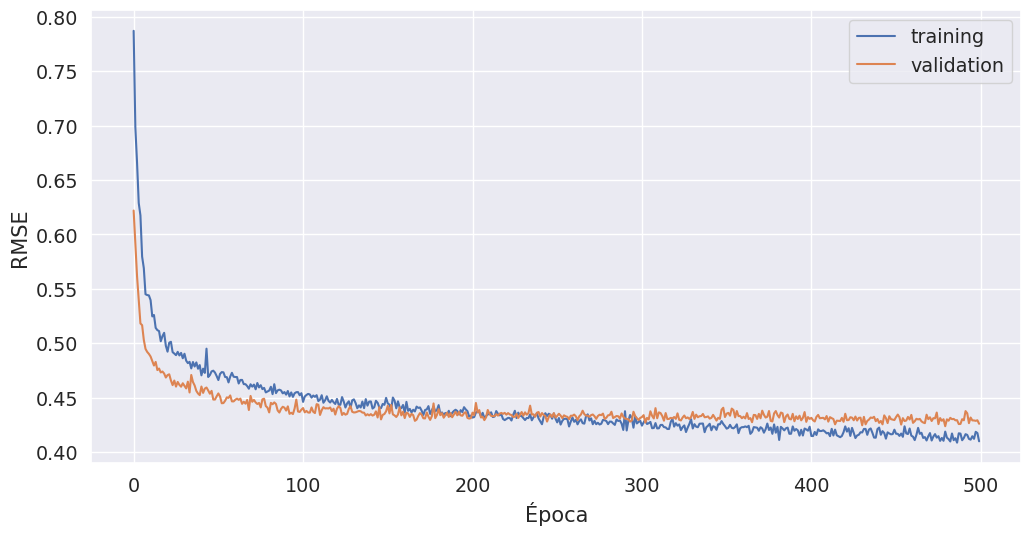

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 18s - loss: 2.8419

1600/6000 [=======>......................] - ETA: 0s - loss: 1.4066 

3264/6000 [===============>..............] - ETA: 0s - loss: 1.2366

5024/6000 [========================>.....] - ETA: 0s - loss: 1.1014

6000/6000 [==============================] - 0s 62us/step - loss: 1.0503 - val_loss: 0.7716


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7440

1856/6000 [========>.....................] - ETA: 0s - loss: 0.7212

3616/6000 [=================>............] - ETA: 0s - loss: 0.6969

5376/6000 [=========================>....] - ETA: 0s - loss: 0.6861

6000/6000 [==============================] - 0s 41us/step - loss: 0.6774 - val_loss: 0.6014


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4532

1760/6000 [=======>......................] - ETA: 0s - loss: 0.6696

3520/6000 [================>.............] - ETA: 0s - loss: 0.6199

5280/6000 [=========================>....] - ETA: 0s - loss: 0.5859

6000/6000 [==============================] - 0s 41us/step - loss: 0.5766 - val_loss: 0.4923


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3124

1824/6000 [========>.....................] - ETA: 0s - loss: 0.4757



3616/6000 [=================>............] - ETA: 0s - loss: 0.4866

5312/6000 [=========================>....] - ETA: 0s - loss: 0.4809

6000/6000 [==============================] - 0s 41us/step - loss: 0.4790 - val_loss: 0.4587


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4957

1760/6000 [=======>......................] - ETA: 0s - loss: 0.4504

3456/6000 [================>.............] - ETA: 0s - loss: 0.4715

5152/6000 [========================>.....] - ETA: 0s - loss: 0.4585

6000/6000 [==============================] - 0s 45us/step - loss: 0.4559 - val_loss: 0.4212


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3375

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3923

3392/6000 [===============>..............] - ETA: 0s - loss: 0.4291

5120/6000 [========================>.....] - ETA: 0s - loss: 0.4236

6000/6000 [==============================] - 0s 43us/step - loss: 0.4223 - val_loss: 0.3901


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3372

1824/6000 [========>.....................] - ETA: 0s - loss: 0.4440

3488/6000 [================>.............] - ETA: 0s - loss: 0.4271

4992/6000 [=======================>......] - ETA: 0s - loss: 0.4179

6000/6000 [==============================] - 0s 45us/step - loss: 0.4153 - val_loss: 0.3806


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2544

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3871

3264/6000 [===============>..............] - ETA: 0s - loss: 0.3939

4928/6000 [=======================>......] - ETA: 0s - loss: 0.3814

6000/6000 [==============================] - 0s 45us/step - loss: 0.3830 - val_loss: 0.3736


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3581

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3725

3392/6000 [===============>..............] - ETA: 0s - loss: 0.3579

5056/6000 [========================>.....] - ETA: 0s - loss: 0.3626

6000/6000 [==============================] - 0s 43us/step - loss: 0.3633 - val_loss: 0.3543


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2315

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3859

3520/6000 [================>.............] - ETA: 0s - loss: 0.3691

5024/6000 [========================>.....] - ETA: 0s - loss: 0.3567

6000/6000 [==============================] - 0s 44us/step - loss: 0.3518 - val_loss: 0.3445


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7719

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3488

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3442

5024/6000 [========================>.....] - ETA: 0s - loss: 0.3396

6000/6000 [==============================] - 0s 44us/step - loss: 0.3431 - val_loss: 0.3651


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3794

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3484

3552/6000 [================>.............] - ETA: 0s - loss: 0.3338

5312/6000 [=========================>....] - ETA: 0s - loss: 0.3397

6000/6000 [==============================] - 0s 42us/step - loss: 0.3459 - val_loss: 0.3394


Epoch 13/500


  32/6000 [..............................] - ETA: 0s - loss: 0.6890

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3450

3488/6000 [================>.............] - ETA: 0s - loss: 0.3444

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3349

6000/6000 [==============================] - 0s 42us/step - loss: 0.3404 - val_loss: 0.3385


Epoch 14/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2716

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3143

3520/6000 [================>.............] - ETA: 0s - loss: 0.3213

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3277

6000/6000 [==============================] - 0s 43us/step - loss: 0.3287 - val_loss: 0.3392


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3940

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3171

3488/6000 [================>.............] - ETA: 0s - loss: 0.3206

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3242

6000/6000 [==============================] - 0s 42us/step - loss: 0.3223 - val_loss: 0.3168


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5377

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3075

3232/6000 [===============>..............] - ETA: 0s - loss: 0.3106

4800/6000 [=======================>......] - ETA: 0s - loss: 0.3110

6000/6000 [==============================] - 0s 46us/step - loss: 0.3180 - val_loss: 0.3087


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2440

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3211

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3191

4896/6000 [=======================>......] - ETA: 0s - loss: 0.3178

6000/6000 [==============================] - 0s 45us/step - loss: 0.3122 - val_loss: 0.3083


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3314

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3194

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3021

4800/6000 [=======================>......] - ETA: 0s - loss: 0.3067

6000/6000 [==============================] - 0s 44us/step - loss: 0.3102 - val_loss: 0.3118


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4219

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3166

3520/6000 [================>.............] - ETA: 0s - loss: 0.3074

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3109

6000/6000 [==============================] - 0s 42us/step - loss: 0.3082 - val_loss: 0.3054


Epoch 20/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2174

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3094

3520/6000 [================>.............] - ETA: 0s - loss: 0.3082

5312/6000 [=========================>....] - ETA: 0s - loss: 0.3062

6000/6000 [==============================] - 0s 42us/step - loss: 0.3034 - val_loss: 0.2988


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2551

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2799

3520/6000 [================>.............] - ETA: 0s - loss: 0.2870

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3073

6000/6000 [==============================] - 0s 43us/step - loss: 0.3045 - val_loss: 0.2970


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2478

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2982

3520/6000 [================>.............] - ETA: 0s - loss: 0.2940

5280/6000 [=========================>....] - ETA: 0s - loss: 0.3006

6000/6000 [==============================] - 0s 43us/step - loss: 0.3009 - val_loss: 0.3058


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1715

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3155

3264/6000 [===============>..............] - ETA: 0s - loss: 0.3148

4832/6000 [=======================>......] - ETA: 0s - loss: 0.3016

6000/6000 [==============================] - 0s 44us/step - loss: 0.2984 - val_loss: 0.3045


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3023

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2954

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2978

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2890

6000/6000 [==============================] - 0s 44us/step - loss: 0.2960 - val_loss: 0.2941


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2895

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2903

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2952

5984/6000 [============================>.] - ETA: 0s - loss: 0.2965

6000/6000 [==============================] - 0s 47us/step - loss: 0.2962 - val_loss: 0.2919


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2061

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2959

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2938

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2958

6000/6000 [==============================] - 0s 45us/step - loss: 0.2946 - val_loss: 0.3065


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2880

3360/6000 [===============>..............] - ETA: 0s - loss: 0.3105

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2997

6000/6000 [==============================] - 0s 44us/step - loss: 0.2941 - val_loss: 0.2987


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2094

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2955

3264/6000 [===============>..............] - ETA: 0s - loss: 0.3033

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2943

6000/6000 [==============================] - 0s 46us/step - loss: 0.2953 - val_loss: 0.2848


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2971

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2972

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2859

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2919

6000/6000 [==============================] - 0s 46us/step - loss: 0.2908 - val_loss: 0.2880


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4013

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2889

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2858

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2863

6000/6000 [==============================] - 0s 46us/step - loss: 0.2885 - val_loss: 0.2945


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2066

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2615

3552/6000 [================>.............] - ETA: 0s - loss: 0.2758

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2852

6000/6000 [==============================] - 0s 41us/step - loss: 0.2876 - val_loss: 0.2869


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3402

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2627

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2883

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2827

6000/6000 [==============================] - 0s 45us/step - loss: 0.2874 - val_loss: 0.2833


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3125

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2732

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2718

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2809

6000/6000 [==============================] - 0s 46us/step - loss: 0.2864 - val_loss: 0.2930


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4151

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3080

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2985

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2896

6000/6000 [==============================] - 0s 45us/step - loss: 0.2846 - val_loss: 0.2857


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3774

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2746

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2742

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2874

6000/6000 [==============================] - 0s 46us/step - loss: 0.2826 - val_loss: 0.2892


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4089

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2943

3552/6000 [================>.............] - ETA: 0s - loss: 0.2771

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2870

6000/6000 [==============================] - 0s 43us/step - loss: 0.2829 - val_loss: 0.2810


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2313

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2710

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2793

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2843

6000/6000 [==============================] - 0s 43us/step - loss: 0.2828 - val_loss: 0.2800


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3068

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2754

3520/6000 [================>.............] - ETA: 0s - loss: 0.2810

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2817



6000/6000 [==============================] - 0s 42us/step - loss: 0.2805 - val_loss: 0.2816


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2796

3264/6000 [===============>..............] - ETA: 0s - loss: 0.3117

4992/6000 [=======================>......] - ETA: 0s - loss: 0.3020

6000/6000 [==============================] - 0s 44us/step - loss: 0.2964 - val_loss: 0.2766


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2543

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2904

3488/6000 [================>.............] - ETA: 0s - loss: 0.2917

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2851

6000/6000 [==============================] - 0s 43us/step - loss: 0.2843 - val_loss: 0.2788


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4876

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2836

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2745

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2775

6000/6000 [==============================] - 0s 45us/step - loss: 0.2832 - val_loss: 0.2735


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3573

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2912

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2767

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2789

6000/6000 [==============================] - 0s 47us/step - loss: 0.2796 - val_loss: 0.2833


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3383

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3014

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2815

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2801

6000/6000 [==============================] - 0s 45us/step - loss: 0.2790 - val_loss: 0.2795


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2410

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2741

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2737

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2797

6000/6000 [==============================] - 0s 45us/step - loss: 0.2753 - val_loss: 0.2751


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2547

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2920

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2798

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2817

6000/6000 [==============================] - 0s 45us/step - loss: 0.2767 - val_loss: 0.2724


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1870

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2812

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2753

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2770

5952/6000 [============================>.] - ETA: 0s - loss: 0.2742

6000/6000 [==============================] - 0s 48us/step - loss: 0.2734 - val_loss: 0.2727


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3864

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2856

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2826

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2749

6000/6000 [==============================] - 0s 44us/step - loss: 0.2747 - val_loss: 0.2734


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5510

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2931

2912/6000 [=============>................] - ETA: 0s - loss: 0.2735

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2735

6000/6000 [==============================] - 0s 46us/step - loss: 0.2713 - val_loss: 0.2743


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2797

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2980

3520/6000 [================>.............] - ETA: 0s - loss: 0.2770

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2745

6000/6000 [==============================] - 0s 43us/step - loss: 0.2726 - val_loss: 0.2763


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2857

3424/6000 [================>.............] - ETA: 0s - loss: 0.2760

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2737

6000/6000 [==============================] - 0s 42us/step - loss: 0.2715 - val_loss: 0.2731


Epoch 51/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4302

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2653

3424/6000 [================>.............] - ETA: 0s - loss: 0.2681

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2672

6000/6000 [==============================] - 0s 43us/step - loss: 0.2701 - val_loss: 0.2661


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2061

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2479

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2686

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2701

6000/6000 [==============================] - 0s 45us/step - loss: 0.2680 - val_loss: 0.2660


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2677

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2693

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2713

6000/6000 [==============================] - 0s 45us/step - loss: 0.2686 - val_loss: 0.2648


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2956

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2496

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2665

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2648

6000/6000 [==============================] - 0s 50us/step - loss: 0.2712 - val_loss: 0.2686


Epoch 55/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2171

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2796

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2700

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2656

6000/6000 [==============================] - 0s 45us/step - loss: 0.2655 - val_loss: 0.2666


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0871

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2665

3520/6000 [================>.............] - ETA: 0s - loss: 0.2666

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2678

6000/6000 [==============================] - 0s 42us/step - loss: 0.2684 - val_loss: 0.2721


Epoch 57/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1713

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2701

3520/6000 [================>.............] - ETA: 0s - loss: 0.2719

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2672

6000/6000 [==============================] - 0s 44us/step - loss: 0.2685 - val_loss: 0.2636


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3095

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2609

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2538

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2640

6000/6000 [==============================] - 0s 45us/step - loss: 0.2664 - val_loss: 0.2685


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2621

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2562

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2521

6000/6000 [==============================] - 0s 43us/step - loss: 0.2646 - val_loss: 0.2882


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2646

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2615

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2640

6000/6000 [==============================] - 0s 44us/step - loss: 0.2638 - val_loss: 0.2948


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2549

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2537

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2562

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2557

6000/6000 [==============================] - 0s 46us/step - loss: 0.2633 - val_loss: 0.2693


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2526

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2416

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2569

6000/6000 [==============================] - 0s 46us/step - loss: 0.2635 - val_loss: 0.2744


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1294

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2846

2944/6000 [=============>................] - ETA: 0s - loss: 0.2724

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2643

6000/6000 [==============================] - 0s 45us/step - loss: 0.2632 - val_loss: 0.2636


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2645

3616/6000 [=================>............] - ETA: 0s - loss: 0.2620

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2624

6000/6000 [==============================] - 0s 42us/step - loss: 0.2623 - val_loss: 0.2641


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2800

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2678

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2622

6000/6000 [==============================] - 0s 43us/step - loss: 0.2594 - val_loss: 0.2587


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1967

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2617

3520/6000 [================>.............] - ETA: 0s - loss: 0.2543

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2624

6000/6000 [==============================] - 0s 42us/step - loss: 0.2597 - val_loss: 0.2605


Epoch 67/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2531

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2623

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2630

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2612

6000/6000 [==============================] - 0s 46us/step - loss: 0.2594 - val_loss: 0.2546


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2468

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2559

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2652

6000/6000 [==============================] - 0s 45us/step - loss: 0.2619 - val_loss: 0.2607


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1377

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2535

2976/6000 [=============>................] - ETA: 0s - loss: 0.2661

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2635

6000/6000 [==============================] - 0s 46us/step - loss: 0.2634 - val_loss: 0.2562


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2380

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2457

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2606

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2570

6000/6000 [==============================] - 0s 45us/step - loss: 0.2611 - val_loss: 0.2747


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2376

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2627

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2636

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2646

6000/6000 [==============================] - 0s 49us/step - loss: 0.2575 - val_loss: 0.2553


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4904

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2619

3456/6000 [================>.............] - ETA: 0s - loss: 0.2715

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2633

6000/6000 [==============================] - 0s 42us/step - loss: 0.2605 - val_loss: 0.2563


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2667

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2471

3552/6000 [================>.............] - ETA: 0s - loss: 0.2443

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2478

6000/6000 [==============================] - 0s 42us/step - loss: 0.2547 - val_loss: 0.2570


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2392

3552/6000 [================>.............] - ETA: 0s - loss: 0.2535

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2591

6000/6000 [==============================] - 0s 42us/step - loss: 0.2601 - val_loss: 0.2864


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1847

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2601

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2604

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2570

6000/6000 [==============================] - 0s 45us/step - loss: 0.2575 - val_loss: 0.2663


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2484

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2578

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2606

6000/6000 [==============================] - 0s 45us/step - loss: 0.2566 - val_loss: 0.2518


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2902

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2727

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2575

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2530

6000/6000 [==============================] - 0s 44us/step - loss: 0.2565 - val_loss: 0.2521


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2526

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2565

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2527

6000/6000 [==============================] - 0s 44us/step - loss: 0.2555 - val_loss: 0.2541


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5247

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2615

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2577

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2599

6000/6000 [==============================] - 0s 46us/step - loss: 0.2572 - val_loss: 0.2620


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2354

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2506

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2512

6000/6000 [==============================] - 0s 46us/step - loss: 0.2556 - val_loss: 0.2600


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2571

3520/6000 [================>.............] - ETA: 0s - loss: 0.2630

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2603

6000/6000 [==============================] - 0s 42us/step - loss: 0.2547 - val_loss: 0.2527


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3541



1824/6000 [========>.....................] - ETA: 0s - loss: 0.2600

3552/6000 [================>.............] - ETA: 0s - loss: 0.2517

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2509

6000/6000 [==============================] - 0s 41us/step - loss: 0.2549 - val_loss: 0.2571


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5347

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2509

3584/6000 [================>.............] - ETA: 0s - loss: 0.2526

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2546

6000/6000 [==============================] - 0s 41us/step - loss: 0.2539 - val_loss: 0.2559


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2266

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2621

3552/6000 [================>.............] - ETA: 0s - loss: 0.2532

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2513

6000/6000 [==============================] - 0s 43us/step - loss: 0.2511 - val_loss: 0.2500


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2676

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2233

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2500

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2526

6000/6000 [==============================] - 0s 47us/step - loss: 0.2522 - val_loss: 0.2502


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2404

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2513

2816/6000 [=============>................] - ETA: 0s - loss: 0.2600

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2534

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2500

6000/6000 [==============================] - 0s 50us/step - loss: 0.2499 - val_loss: 0.2561


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2013



1568/6000 [======>.......................] - ETA: 0s - loss: 0.2277

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2400

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2427

6000/6000 [==============================] - 0s 47us/step - loss: 0.2529 - val_loss: 0.2481


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2434

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2688

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2474

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2494

6000/6000 [==============================] - 0s 44us/step - loss: 0.2484 - val_loss: 0.2630


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1604

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2244

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2516

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2534

6000/6000 [==============================] - 0s 44us/step - loss: 0.2524 - val_loss: 0.2481


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3119

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2485

3456/6000 [================>.............] - ETA: 0s - loss: 0.2509

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2473

6000/6000 [==============================] - 0s 42us/step - loss: 0.2493 - val_loss: 0.2573


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2681

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2423

3552/6000 [================>.............] - ETA: 0s - loss: 0.2446

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2501

6000/6000 [==============================] - 0s 43us/step - loss: 0.2511 - val_loss: 0.2449


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1174

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2577

3520/6000 [================>.............] - ETA: 0s - loss: 0.2521

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2539

6000/6000 [==============================] - 0s 42us/step - loss: 0.2509 - val_loss: 0.2495


Epoch 93/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1802

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2670

3488/6000 [================>.............] - ETA: 0s - loss: 0.2655

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2516

6000/6000 [==============================] - 0s 42us/step - loss: 0.2477 - val_loss: 0.2471


Epoch 94/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2284

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2488

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2452

6000/6000 [==============================] - 0s 45us/step - loss: 0.2474 - val_loss: 0.2458


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1774

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2306

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2464

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2466

6000/6000 [==============================] - 0s 44us/step - loss: 0.2471 - val_loss: 0.2499


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2565

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2461

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2509

6000/6000 [==============================] - 0s 47us/step - loss: 0.2515 - val_loss: 0.2471


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2242

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2391

3520/6000 [================>.............] - ETA: 0s - loss: 0.2475

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2495

6000/6000 [==============================] - 0s 43us/step - loss: 0.2522 - val_loss: 0.2453


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2146

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2584

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2446

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2452

6000/6000 [==============================] - 0s 45us/step - loss: 0.2463 - val_loss: 0.2461


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3961

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2555

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2504

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2530

6000/6000 [==============================] - 0s 45us/step - loss: 0.2520 - val_loss: 0.2544


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2504

3456/6000 [================>.............] - ETA: 0s - loss: 0.2569

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2480

6000/6000 [==============================] - 0s 42us/step - loss: 0.2492 - val_loss: 0.2519


Epoch 101/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2511

3456/6000 [================>.............] - ETA: 0s - loss: 0.2450

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2487

6000/6000 [==============================] - 0s 45us/step - loss: 0.2437 - val_loss: 0.2411


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1909

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2576

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2458

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2400



6000/6000 [==============================] - 0s 42us/step - loss: 0.2455 - val_loss: 0.2513


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2891

3456/6000 [================>.............] - ETA: 0s - loss: 0.2632

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2539

6000/6000 [==============================] - 0s 44us/step - loss: 0.2517 - val_loss: 0.2492


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3822

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2297

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2456

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2429

6000/6000 [==============================] - 0s 46us/step - loss: 0.2452 - val_loss: 0.2470


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2348

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2280

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 46us/step - loss: 0.2447 - val_loss: 0.2491


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2270

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2335

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2429

6000/6000 [==============================] - 0s 43us/step - loss: 0.2465 - val_loss: 0.2516


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2070

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2359

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2504

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2429

6000/6000 [==============================] - 0s 43us/step - loss: 0.2457 - val_loss: 0.2450


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2630

3456/6000 [================>.............] - ETA: 0s - loss: 0.2558

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2482

6000/6000 [==============================] - 0s 42us/step - loss: 0.2451 - val_loss: 0.2424


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2809

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2306

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2369

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2479

6000/6000 [==============================] - 0s 43us/step - loss: 0.2421 - val_loss: 0.2435


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2871

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2397

2880/6000 [=============>................] - ETA: 0s - loss: 0.2454

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2468

6000/6000 [==============================] - 0s 47us/step - loss: 0.2460 - val_loss: 0.2449


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2317

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2282

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 46us/step - loss: 0.2425 - val_loss: 0.2491


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3219

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2400

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2445

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2462

6000/6000 [==============================] - 0s 46us/step - loss: 0.2443 - val_loss: 0.2382


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2164

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2435

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2349

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 45us/step - loss: 0.2407 - val_loss: 0.2488


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2360

3520/6000 [================>.............] - ETA: 0s - loss: 0.2409

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 43us/step - loss: 0.2439 - val_loss: 0.2460


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2402

3488/6000 [================>.............] - ETA: 0s - loss: 0.2369

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2415

6000/6000 [==============================] - 0s 42us/step - loss: 0.2440 - val_loss: 0.2500


Epoch 116/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2691

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2418

3520/6000 [================>.............] - ETA: 0s - loss: 0.2446

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 44us/step - loss: 0.2408 - val_loss: 0.2404


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2388

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2429

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2432

6000/6000 [==============================] - 0s 43us/step - loss: 0.2423 - val_loss: 0.2444


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2099

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2445

3424/6000 [================>.............] - ETA: 0s - loss: 0.2469

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2426

6000/6000 [==============================] - 0s 43us/step - loss: 0.2423 - val_loss: 0.2560


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1090

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2485

3456/6000 [================>.............] - ETA: 0s - loss: 0.2417

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 44us/step - loss: 0.2402 - val_loss: 0.2339


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2396

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2428

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2471

6000/6000 [==============================] - 0s 46us/step - loss: 0.2422 - val_loss: 0.2536


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2371

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 46us/step - loss: 0.2407 - val_loss: 0.2443


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2601

3488/6000 [================>.............] - ETA: 0s - loss: 0.2622

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2499

6000/6000 [==============================] - 0s 43us/step - loss: 0.2428 - val_loss: 0.2432


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2386

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2474

3456/6000 [================>.............] - ETA: 0s - loss: 0.2452

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2420

6000/6000 [==============================] - 0s 43us/step - loss: 0.2403 - val_loss: 0.2434


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2925

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2424

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2340

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 47us/step - loss: 0.2392 - val_loss: 0.2415


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2657

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2174

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2374

6000/6000 [==============================] - 0s 45us/step - loss: 0.2372 - val_loss: 0.2516


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2484

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2473

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2477

6000/6000 [==============================] - 0s 43us/step - loss: 0.2428 - val_loss: 0.2370


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3918

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2581

3552/6000 [================>.............] - ETA: 0s - loss: 0.2475

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 42us/step - loss: 0.2375 - val_loss: 0.2407


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2384

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2449

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2319

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 45us/step - loss: 0.2425 - val_loss: 0.2365


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2117

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2303

3552/6000 [================>.............] - ETA: 0s - loss: 0.2340

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 46us/step - loss: 0.2390 - val_loss: 0.2378


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2868

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2409

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2365

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2375

6000/6000 [==============================] - 0s 46us/step - loss: 0.2377 - val_loss: 0.2349


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4108

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2433

3584/6000 [================>.............] - ETA: 0s - loss: 0.2412

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2410

6000/6000 [==============================] - 0s 41us/step - loss: 0.2391 - val_loss: 0.2376


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1996

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2444

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2427

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 45us/step - loss: 0.2417 - val_loss: 0.2380


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4391

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2364

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2411

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 45us/step - loss: 0.2368 - val_loss: 0.2537


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2823

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2458

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2419

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2447

6000/6000 [==============================] - 0s 46us/step - loss: 0.2397 - val_loss: 0.2323


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1873

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2353

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2385

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2435

6000/6000 [==============================] - 0s 46us/step - loss: 0.2386 - val_loss: 0.2350


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4793

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2398

3488/6000 [================>.............] - ETA: 0s - loss: 0.2399

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 44us/step - loss: 0.2381 - val_loss: 0.2404


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3785

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2576

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2427

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 43us/step - loss: 0.2360 - val_loss: 0.2356


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1910

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2318

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2241

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2328

6000/6000 [==============================] - 0s 45us/step - loss: 0.2359 - val_loss: 0.2362


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2272

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2293

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 46us/step - loss: 0.2404 - val_loss: 0.2436


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2313

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2414

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2384

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 43us/step - loss: 0.2343 - val_loss: 0.2386


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3463

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2350

3584/6000 [================>.............] - ETA: 0s - loss: 0.2321

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2384

6000/6000 [==============================] - 0s 41us/step - loss: 0.2365 - val_loss: 0.2325


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2334

3616/6000 [=================>............] - ETA: 0s - loss: 0.2397

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 41us/step - loss: 0.2354 - val_loss: 0.2482


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2356

3584/6000 [================>.............] - ETA: 0s - loss: 0.2247

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 44us/step - loss: 0.2363 - val_loss: 0.2310


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2611

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2430

3520/6000 [================>.............] - ETA: 0s - loss: 0.2405

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 42us/step - loss: 0.2374 - val_loss: 0.2348


Epoch 145/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2286

3552/6000 [================>.............] - ETA: 0s - loss: 0.2372

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2403



6000/6000 [==============================] - 0s 43us/step - loss: 0.2382 - val_loss: 0.2440


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2034

2816/6000 [=============>................] - ETA: 0s - loss: 0.2215

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 46us/step - loss: 0.2359 - val_loss: 0.2453


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1935

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2271

2880/6000 [=============>................] - ETA: 0s - loss: 0.2317

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2342

5920/6000 [============================>.] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 51us/step - loss: 0.2342 - val_loss: 0.2382


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1971

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2389

3552/6000 [================>.............] - ETA: 0s - loss: 0.2372

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 44us/step - loss: 0.2358 - val_loss: 0.2311


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4107

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2325

2752/6000 [============>.................] - ETA: 0s - loss: 0.2459

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2365

5920/6000 [============================>.] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 47us/step - loss: 0.2328 - val_loss: 0.2288


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3254

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2262

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2319

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 46us/step - loss: 0.2317 - val_loss: 0.2271


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2308

3488/6000 [================>.............] - ETA: 0s - loss: 0.2255

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 42us/step - loss: 0.2355 - val_loss: 0.2355


Epoch 152/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2000

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2422

3456/6000 [================>.............] - ETA: 0s - loss: 0.2382

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2363

6000/6000 [==============================] - 0s 46us/step - loss: 0.2323 - val_loss: 0.2278


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2377

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2402

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 45us/step - loss: 0.2350 - val_loss: 0.2432


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2395

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2358

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2368

6000/6000 [==============================] - 0s 44us/step - loss: 0.2342 - val_loss: 0.2258


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2327

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2198

3456/6000 [================>.............] - ETA: 0s - loss: 0.2214

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 42us/step - loss: 0.2322 - val_loss: 0.2299


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2509

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2244

3552/6000 [================>.............] - ETA: 0s - loss: 0.2345

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 44us/step - loss: 0.2332 - val_loss: 0.2366


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1703

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2319

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2294

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 46us/step - loss: 0.2328 - val_loss: 0.2345


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2209

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2278

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 45us/step - loss: 0.2319 - val_loss: 0.2362


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2210

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2374

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2435

6000/6000 [==============================] - 0s 45us/step - loss: 0.2373 - val_loss: 0.2319


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2115

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2545

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2439

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2370

6000/6000 [==============================] - 0s 44us/step - loss: 0.2368 - val_loss: 0.2290


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2766

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3552/6000 [================>.............] - ETA: 0s - loss: 0.2285

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2314

6000/6000 [==============================] - 0s 41us/step - loss: 0.2310 - val_loss: 0.2348


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2881

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3424/6000 [================>.............] - ETA: 0s - loss: 0.2344

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2338

6000/6000 [==============================] - 0s 42us/step - loss: 0.2346 - val_loss: 0.2328


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3045

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3520/6000 [================>.............] - ETA: 0s - loss: 0.2404

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2418

6000/6000 [==============================] - 0s 41us/step - loss: 0.2377 - val_loss: 0.2367


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2412

3488/6000 [================>.............] - ETA: 0s - loss: 0.2322

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 44us/step - loss: 0.2327 - val_loss: 0.2319


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2339

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2312

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2309

6000/6000 [==============================] - 0s 43us/step - loss: 0.2317 - val_loss: 0.2402


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1713

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2466

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2322

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 43us/step - loss: 0.2331 - val_loss: 0.2531


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2282

3584/6000 [================>.............] - ETA: 0s - loss: 0.2266

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 41us/step - loss: 0.2314 - val_loss: 0.2294


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2122

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2246

3520/6000 [================>.............] - ETA: 0s - loss: 0.2253

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 46us/step - loss: 0.2303 - val_loss: 0.2567


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1976

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2023

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 44us/step - loss: 0.2310 - val_loss: 0.2270


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3301

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2263

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2304

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 44us/step - loss: 0.2318 - val_loss: 0.2306


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2297

3488/6000 [================>.............] - ETA: 0s - loss: 0.2297

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 42us/step - loss: 0.2310 - val_loss: 0.2355


Epoch 172/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1945

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2172

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2326

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 44us/step - loss: 0.2314 - val_loss: 0.2308


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2351

3616/6000 [=================>............] - ETA: 0s - loss: 0.2370

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 41us/step - loss: 0.2329 - val_loss: 0.2258


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2334

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2222

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 46us/step - loss: 0.2301 - val_loss: 0.2387


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1939

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2063

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2228

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 44us/step - loss: 0.2297 - val_loss: 0.2389


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2394

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2387

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 47us/step - loss: 0.2343 - val_loss: 0.2366


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2828

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2394

3584/6000 [================>.............] - ETA: 0s - loss: 0.2325

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 41us/step - loss: 0.2294 - val_loss: 0.2275


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2341

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2314

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 45us/step - loss: 0.2300 - val_loss: 0.2348


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3465

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2385

3552/6000 [================>.............] - ETA: 0s - loss: 0.2373

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 42us/step - loss: 0.2312 - val_loss: 0.2468


Epoch 180/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3089

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2536

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2479

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 43us/step - loss: 0.2326 - val_loss: 0.2320


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2200

3424/6000 [================>.............] - ETA: 0s - loss: 0.2209

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 43us/step - loss: 0.2274 - val_loss: 0.2559


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2267

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2259

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 45us/step - loss: 0.2281 - val_loss: 0.2296


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3243

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2183

3648/6000 [=================>............] - ETA: 0s - loss: 0.2258

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 41us/step - loss: 0.2304 - val_loss: 0.2257


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2307

3552/6000 [================>.............] - ETA: 0s - loss: 0.2289

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 41us/step - loss: 0.2263 - val_loss: 0.2710


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2800

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2151

3552/6000 [================>.............] - ETA: 0s - loss: 0.2270

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 41us/step - loss: 0.2299 - val_loss: 0.2483


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2518

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2517

3552/6000 [================>.............] - ETA: 0s - loss: 0.2412

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 41us/step - loss: 0.2330 - val_loss: 0.2295


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1692

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2192

3648/6000 [=================>............] - ETA: 0s - loss: 0.2246

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 41us/step - loss: 0.2280 - val_loss: 0.2316


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2410

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2301

2912/6000 [=============>................] - ETA: 0s - loss: 0.2271

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2261

5984/6000 [============================>.] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 48us/step - loss: 0.2295 - val_loss: 0.2263


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3840

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2256

3520/6000 [================>.............] - ETA: 0s - loss: 0.2182

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 41us/step - loss: 0.2264 - val_loss: 0.2263


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2456

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2000

3552/6000 [================>.............] - ETA: 0s - loss: 0.2196

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 42us/step - loss: 0.2289 - val_loss: 0.2307


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2354

3584/6000 [================>.............] - ETA: 0s - loss: 0.2266

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 42us/step - loss: 0.2298 - val_loss: 0.2350


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2465

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2283

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 43us/step - loss: 0.2289 - val_loss: 0.2288


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1721

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2266

3520/6000 [================>.............] - ETA: 0s - loss: 0.2418

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 43us/step - loss: 0.2290 - val_loss: 0.2322


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5136

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3424/6000 [================>.............] - ETA: 0s - loss: 0.2269

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 42us/step - loss: 0.2250 - val_loss: 0.2281


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2277

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2429

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 44us/step - loss: 0.2338 - val_loss: 0.2271


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1934

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2216

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2197

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 44us/step - loss: 0.2289 - val_loss: 0.2339


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2708

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2226

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2256

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 47us/step - loss: 0.2269 - val_loss: 0.2329


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1869

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2015

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2189

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 44us/step - loss: 0.2309 - val_loss: 0.2290


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2133

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2235

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 46us/step - loss: 0.2277 - val_loss: 0.2426


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1836

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2152

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2186

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 44us/step - loss: 0.2280 - val_loss: 0.2289


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2271

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2213

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 45us/step - loss: 0.2281 - val_loss: 0.2310


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2238

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2211

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 44us/step - loss: 0.2272 - val_loss: 0.2351


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2523

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2429

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 45us/step - loss: 0.2263 - val_loss: 0.2294


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4395

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2291

3552/6000 [================>.............] - ETA: 0s - loss: 0.2354

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 42us/step - loss: 0.2276 - val_loss: 0.2305


Epoch 205/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2192

3424/6000 [================>.............] - ETA: 0s - loss: 0.2223

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 47us/step - loss: 0.2278 - val_loss: 0.2350


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1900

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2062

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2248

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2485


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4085

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2338

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2258

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 46us/step - loss: 0.2271 - val_loss: 0.2245


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2748

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2132

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2200

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 46us/step - loss: 0.2268 - val_loss: 0.2223


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2047

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2127

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 45us/step - loss: 0.2256 - val_loss: 0.2248


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1776

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2365

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2199

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 44us/step - loss: 0.2282 - val_loss: 0.2495


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1568

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2263

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2291

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 45us/step - loss: 0.2276 - val_loss: 0.2244


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2174

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2270

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 47us/step - loss: 0.2279 - val_loss: 0.2305


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2491

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2360

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 46us/step - loss: 0.2276 - val_loss: 0.2236


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2067

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2238

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2217

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 44us/step - loss: 0.2264 - val_loss: 0.2254


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1895

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2123

3584/6000 [================>.............] - ETA: 0s - loss: 0.2189

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 41us/step - loss: 0.2253 - val_loss: 0.2214


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2296

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2372

3552/6000 [================>.............] - ETA: 0s - loss: 0.2204

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 42us/step - loss: 0.2315 - val_loss: 0.2237


Epoch 217/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3293

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2122

3424/6000 [================>.............] - ETA: 0s - loss: 0.2230

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 43us/step - loss: 0.2254 - val_loss: 0.2726


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5368

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2578

3488/6000 [================>.............] - ETA: 0s - loss: 0.2393

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 44us/step - loss: 0.2265 - val_loss: 0.2402


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3223

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2130

3520/6000 [================>.............] - ETA: 0s - loss: 0.2143

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 43us/step - loss: 0.2252 - val_loss: 0.2408


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1809

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2377

3520/6000 [================>.............] - ETA: 0s - loss: 0.2316

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 44us/step - loss: 0.2310 - val_loss: 0.2321


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1620

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2243

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 46us/step - loss: 0.2258 - val_loss: 0.2197


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2449

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2159

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2126

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 46us/step - loss: 0.2224 - val_loss: 0.2251


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2408

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2269

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 45us/step - loss: 0.2229 - val_loss: 0.2348


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2123

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2221

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 46us/step - loss: 0.2275 - val_loss: 0.2210


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1860

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2134

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2278

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 45us/step - loss: 0.2254 - val_loss: 0.2288


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2630

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2037

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2218

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2638


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2194

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2252

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 47us/step - loss: 0.2234 - val_loss: 0.2349


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2299

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2230

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 44us/step - loss: 0.2292 - val_loss: 0.2268


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1776

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2222

3520/6000 [================>.............] - ETA: 0s - loss: 0.2227

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2256



6000/6000 [==============================] - 0s 42us/step - loss: 0.2260 - val_loss: 0.2337


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2745

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2091

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2200

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 42us/step - loss: 0.2220 - val_loss: 0.2220


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1972

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1994

3520/6000 [================>.............] - ETA: 0s - loss: 0.2134

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 43us/step - loss: 0.2216 - val_loss: 0.2182


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2407

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2193

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 48us/step - loss: 0.2230 - val_loss: 0.2341


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2281

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2109

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2100

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 47us/step - loss: 0.2247 - val_loss: 0.2217


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3673

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2193

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2144

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 46us/step - loss: 0.2230 - val_loss: 0.2614


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2818

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2165

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2246

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 46us/step - loss: 0.2236 - val_loss: 0.2224


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3305

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2220

3424/6000 [================>.............] - ETA: 0s - loss: 0.2329

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2275



6000/6000 [==============================] - 0s 42us/step - loss: 0.2245 - val_loss: 0.2311


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1888

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2230

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2234

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 46us/step - loss: 0.2279 - val_loss: 0.2281


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3132

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2071

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2157

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 45us/step - loss: 0.2205 - val_loss: 0.2255


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2037

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2408

3456/6000 [================>.............] - ETA: 0s - loss: 0.2265

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 43us/step - loss: 0.2239 - val_loss: 0.2299


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3512

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1922

2976/6000 [=============>................] - ETA: 0s - loss: 0.2092

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 48us/step - loss: 0.2239 - val_loss: 0.2239


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2111

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2234

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 46us/step - loss: 0.2267 - val_loss: 0.2303


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2101

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2162

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 45us/step - loss: 0.2232 - val_loss: 0.2476


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2147

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2206

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 46us/step - loss: 0.2243 - val_loss: 0.2213


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2430

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2183

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 46us/step - loss: 0.2216 - val_loss: 0.2429


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2889

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2258

3424/6000 [================>.............] - ETA: 0s - loss: 0.2297

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 42us/step - loss: 0.2225 - val_loss: 0.2326


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2294

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2222

2816/6000 [=============>................] - ETA: 0s - loss: 0.2158

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2186

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 52us/step - loss: 0.2258 - val_loss: 0.2311


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2689

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2434

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2269

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 45us/step - loss: 0.2231 - val_loss: 0.2414


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2191

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2049

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2089

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 47us/step - loss: 0.2222 - val_loss: 0.2211


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2278

3424/6000 [================>.............] - ETA: 0s - loss: 0.2263

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 42us/step - loss: 0.2229 - val_loss: 0.2241


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2143

3424/6000 [================>.............] - ETA: 0s - loss: 0.2190

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 44us/step - loss: 0.2262 - val_loss: 0.2273


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1715

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2192

3520/6000 [================>.............] - ETA: 0s - loss: 0.2239

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 42us/step - loss: 0.2237 - val_loss: 0.2277


Epoch 252/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2425

3520/6000 [================>.............] - ETA: 0s - loss: 0.2319

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 43us/step - loss: 0.2269 - val_loss: 0.2335


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2255

3520/6000 [================>.............] - ETA: 0s - loss: 0.2266

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 42us/step - loss: 0.2239 - val_loss: 0.2375


Epoch 254/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4232

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2300

3488/6000 [================>.............] - ETA: 0s - loss: 0.2342

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 44us/step - loss: 0.2212 - val_loss: 0.2187


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3489

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2223

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2191

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2182

6000/6000 [==============================] - 0s 44us/step - loss: 0.2213 - val_loss: 0.2221


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2127

3456/6000 [================>.............] - ETA: 0s - loss: 0.2110

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 45us/step - loss: 0.2197 - val_loss: 0.2275


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2419

2944/6000 [=============>................] - ETA: 0s - loss: 0.2324

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 46us/step - loss: 0.2204 - val_loss: 0.2444


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3200

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2178

3424/6000 [================>.............] - ETA: 0s - loss: 0.2311

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 44us/step - loss: 0.2251 - val_loss: 0.2530


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2279

3488/6000 [================>.............] - ETA: 0s - loss: 0.2248

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 42us/step - loss: 0.2231 - val_loss: 0.2349


Epoch 260/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2646

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2129

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2201

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 45us/step - loss: 0.2201 - val_loss: 0.2186


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2316

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2108

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2269

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 45us/step - loss: 0.2254 - val_loss: 0.2230


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2360

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2169

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 45us/step - loss: 0.2200 - val_loss: 0.2220


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3305

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2079

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2245

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 45us/step - loss: 0.2206 - val_loss: 0.2259


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2251

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2206

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 46us/step - loss: 0.2211 - val_loss: 0.2239


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2278

3552/6000 [================>.............] - ETA: 0s - loss: 0.2306

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 45us/step - loss: 0.2219 - val_loss: 0.2196


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1459

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2082

2816/6000 [=============>................] - ETA: 0s - loss: 0.2218

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 47us/step - loss: 0.2231 - val_loss: 0.2242


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2360

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2195

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2136

6000/6000 [==============================] - 0s 46us/step - loss: 0.2197 - val_loss: 0.2261


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3258

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2305

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2221

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 46us/step - loss: 0.2223 - val_loss: 0.2310


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2169

3456/6000 [================>.............] - ETA: 0s - loss: 0.2167

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 43us/step - loss: 0.2210 - val_loss: 0.2191


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4654

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2022

3456/6000 [================>.............] - ETA: 0s - loss: 0.2087

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 43us/step - loss: 0.2197 - val_loss: 0.2598


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3057

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2425

3616/6000 [=================>............] - ETA: 0s - loss: 0.2249

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 41us/step - loss: 0.2232 - val_loss: 0.2231


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2005

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2261

3616/6000 [=================>............] - ETA: 0s - loss: 0.2274

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 41us/step - loss: 0.2235 - val_loss: 0.2199


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1718

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2086

3456/6000 [================>.............] - ETA: 0s - loss: 0.2181

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 43us/step - loss: 0.2250 - val_loss: 0.2187


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2416

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2041

3520/6000 [================>.............] - ETA: 0s - loss: 0.2147

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 41us/step - loss: 0.2198 - val_loss: 0.2219


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1977

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2134

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2190

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 46us/step - loss: 0.2215 - val_loss: 0.2284


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2417

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2256

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 45us/step - loss: 0.2232 - val_loss: 0.2252


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2184

3456/6000 [================>.............] - ETA: 0s - loss: 0.2223

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 44us/step - loss: 0.2227 - val_loss: 0.2285


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2221

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2292

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 45us/step - loss: 0.2211 - val_loss: 0.2220


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2548

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2503

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2302

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 47us/step - loss: 0.2203 - val_loss: 0.2265


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2158

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 44us/step - loss: 0.2202 - val_loss: 0.2320


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3488/6000 [================>.............] - ETA: 0s - loss: 0.2184

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 42us/step - loss: 0.2204 - val_loss: 0.2205


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2910

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2147

3520/6000 [================>.............] - ETA: 0s - loss: 0.2168

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 42us/step - loss: 0.2181 - val_loss: 0.2412


Epoch 283/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1952

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2260

3520/6000 [================>.............] - ETA: 0s - loss: 0.2301

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2211 - val_loss: 0.2205


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2310

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2174


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2357

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2388

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 44us/step - loss: 0.2219 - val_loss: 0.2217


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2183

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2107

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2168

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 45us/step - loss: 0.2184 - val_loss: 0.2251


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2590

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2186

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2269

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 44us/step - loss: 0.2219 - val_loss: 0.2258


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2281

3552/6000 [================>.............] - ETA: 0s - loss: 0.2235

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 43us/step - loss: 0.2233 - val_loss: 0.2292


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3649

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2068

2912/6000 [=============>................] - ETA: 0s - loss: 0.2117

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2147

6000/6000 [==============================] - 0s 46us/step - loss: 0.2206 - val_loss: 0.2267


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2074

3520/6000 [================>.............] - ETA: 0s - loss: 0.2156

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 43us/step - loss: 0.2213 - val_loss: 0.2187


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2199

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2205

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 43us/step - loss: 0.2197 - val_loss: 0.2250


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2353

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2269

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2245

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 43us/step - loss: 0.2186 - val_loss: 0.2169


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2905

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2163

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2148

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 46us/step - loss: 0.2208 - val_loss: 0.2419


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3256

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2190

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2169

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 47us/step - loss: 0.2200 - val_loss: 0.2252


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3513

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2473

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2265

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 45us/step - loss: 0.2206 - val_loss: 0.2168


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2246

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2137

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 44us/step - loss: 0.2207 - val_loss: 0.2294


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2624

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2365

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2222

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 44us/step - loss: 0.2208 - val_loss: 0.2145


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2324

3584/6000 [================>.............] - ETA: 0s - loss: 0.2181

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 42us/step - loss: 0.2193 - val_loss: 0.2275


Epoch 299/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1698

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2214

3520/6000 [================>.............] - ETA: 0s - loss: 0.2140

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 42us/step - loss: 0.2162 - val_loss: 0.2469


Epoch 300/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2222

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2053

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2160

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 44us/step - loss: 0.2243 - val_loss: 0.2212


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1007

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2146

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2075

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 44us/step - loss: 0.2191 - val_loss: 0.2171


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2290

3488/6000 [================>.............] - ETA: 0s - loss: 0.2258

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2228

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 50us/step - loss: 0.2216 - val_loss: 0.2196


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2439

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2252

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2212

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 46us/step - loss: 0.2218 - val_loss: 0.2301


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3109

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2016

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2100

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 46us/step - loss: 0.2184 - val_loss: 0.2351


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2564

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2342

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2203

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 45us/step - loss: 0.2186 - val_loss: 0.2189


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3014

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2046

2944/6000 [=============>................] - ETA: 0s - loss: 0.2075

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2070

6000/6000 [==============================] - 0s 44us/step - loss: 0.2172 - val_loss: 0.2211


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1729

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3552/6000 [================>.............] - ETA: 0s - loss: 0.2216

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 41us/step - loss: 0.2175 - val_loss: 0.2315


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3452

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2357

3552/6000 [================>.............] - ETA: 0s - loss: 0.2359

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 41us/step - loss: 0.2222 - val_loss: 0.2272


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1921

3552/6000 [================>.............] - ETA: 0s - loss: 0.2050

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 43us/step - loss: 0.2180 - val_loss: 0.2201


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2180

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2316

2720/6000 [============>.................] - ETA: 0s - loss: 0.2236

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2235

5952/6000 [============================>.] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 49us/step - loss: 0.2166 - val_loss: 0.2230


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2294

2976/6000 [=============>................] - ETA: 0s - loss: 0.2245

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 46us/step - loss: 0.2201 - val_loss: 0.2208


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2276

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2313

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2301

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 47us/step - loss: 0.2211 - val_loss: 0.2337


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1697

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2151

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2152

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 46us/step - loss: 0.2186 - val_loss: 0.2212


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2248

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2168

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 44us/step - loss: 0.2186 - val_loss: 0.2265


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3972

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2201

3424/6000 [================>.............] - ETA: 0s - loss: 0.2196

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 43us/step - loss: 0.2169 - val_loss: 0.2235


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2197

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2399

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 45us/step - loss: 0.2187 - val_loss: 0.2268


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2300

3424/6000 [================>.............] - ETA: 0s - loss: 0.2156

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 43us/step - loss: 0.2194 - val_loss: 0.2211


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2063

3520/6000 [================>.............] - ETA: 0s - loss: 0.2185

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 43us/step - loss: 0.2213 - val_loss: 0.2208


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1485

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2168

3520/6000 [================>.............] - ETA: 0s - loss: 0.2133

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 42us/step - loss: 0.2225 - val_loss: 0.2223


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2500

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2095

3584/6000 [================>.............] - ETA: 0s - loss: 0.2117

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 42us/step - loss: 0.2180 - val_loss: 0.2280


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2220

3584/6000 [================>.............] - ETA: 0s - loss: 0.2180

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 42us/step - loss: 0.2194 - val_loss: 0.2285


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2151

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2071

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 45us/step - loss: 0.2166 - val_loss: 0.2237


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2032

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2105

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2128

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 45us/step - loss: 0.2144 - val_loss: 0.2253


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2134

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2354

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2361

6000/6000 [==============================] - 0s 45us/step - loss: 0.2277 - val_loss: 0.2234


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3649

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2120

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 46us/step - loss: 0.2157 - val_loss: 0.2213


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4220

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2247

3456/6000 [================>.............] - ETA: 0s - loss: 0.2156

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 44us/step - loss: 0.2177 - val_loss: 0.2349


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2109

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2309

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 46us/step - loss: 0.2268 - val_loss: 0.2247


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2134

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2183

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2199

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 45us/step - loss: 0.2222 - val_loss: 0.2215


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2297

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2188

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 44us/step - loss: 0.2175 - val_loss: 0.2233


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1795

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2433

3520/6000 [================>.............] - ETA: 0s - loss: 0.2211

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 43us/step - loss: 0.2234 - val_loss: 0.2201


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2285

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2119

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 46us/step - loss: 0.2168 - val_loss: 0.2272


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2119

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2231

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 46us/step - loss: 0.2200 - val_loss: 0.2175


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2027

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2142

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2106

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 45us/step - loss: 0.2173 - val_loss: 0.2314


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2012

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2282

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2265

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 45us/step - loss: 0.2199 - val_loss: 0.2560


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3636

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2435

2944/6000 [=============>................] - ETA: 0s - loss: 0.2248

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 46us/step - loss: 0.2200 - val_loss: 0.2150


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3552/6000 [================>.............] - ETA: 0s - loss: 0.2197

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 43us/step - loss: 0.2199 - val_loss: 0.2155


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2588

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2171

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2142

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 45us/step - loss: 0.2179 - val_loss: 0.2265


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2074

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2185

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 44us/step - loss: 0.2172 - val_loss: 0.2750


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2333

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2270

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2244

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 45us/step - loss: 0.2206 - val_loss: 0.2187


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1701

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2114

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2119

6000/6000 [==============================] - 0s 44us/step - loss: 0.2148 - val_loss: 0.2186


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1604

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2089

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2157

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 43us/step - loss: 0.2178 - val_loss: 0.2166


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2116

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2294

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2250

5824/6000 [============================>.] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 49us/step - loss: 0.2239 - val_loss: 0.2196


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2652

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2188

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2189

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 46us/step - loss: 0.2190 - val_loss: 0.2241


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1687

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2313

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2248

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 47us/step - loss: 0.2179 - val_loss: 0.2261


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2853

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2099

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2234

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 45us/step - loss: 0.2175 - val_loss: 0.2181


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2138

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2152

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 45us/step - loss: 0.2186 - val_loss: 0.2209


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3447

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1914

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1984

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2083

6000/6000 [==============================] - 0s 45us/step - loss: 0.2125 - val_loss: 0.2382


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2372

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2233

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 46us/step - loss: 0.2196 - val_loss: 0.2192


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1803

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2136

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2130

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 47us/step - loss: 0.2173 - val_loss: 0.2392


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2313

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2291

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 47us/step - loss: 0.2197 - val_loss: 0.2158


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2358

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1968

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2143

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 46us/step - loss: 0.2155 - val_loss: 0.2268


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2273

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2217

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2170

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 46us/step - loss: 0.2158 - val_loss: 0.2257


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2617

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2367

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2179

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2142

6000/6000 [==============================] - 0s 45us/step - loss: 0.2178 - val_loss: 0.2321


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1920

3520/6000 [================>.............] - ETA: 0s - loss: 0.2088

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 41us/step - loss: 0.2178 - val_loss: 0.2202


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1831

3616/6000 [=================>............] - ETA: 0s - loss: 0.2079

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 41us/step - loss: 0.2159 - val_loss: 0.2327


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2158

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2261

3424/6000 [================>.............] - ETA: 0s - loss: 0.2172

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2127

6000/6000 [==============================] - 0s 43us/step - loss: 0.2174 - val_loss: 0.2732


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1798

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2257

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2090

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 44us/step - loss: 0.2205 - val_loss: 0.2327


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2803

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2304

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2201

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 45us/step - loss: 0.2138 - val_loss: 0.2268


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1902

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2304

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2190

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 45us/step - loss: 0.2156 - val_loss: 0.2236


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2102

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 46us/step - loss: 0.2145 - val_loss: 0.2235


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2660

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2139

3424/6000 [================>.............] - ETA: 0s - loss: 0.2061

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 44us/step - loss: 0.2166 - val_loss: 0.2396


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2027

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2015

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2010

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2108

6000/6000 [==============================] - 0s 46us/step - loss: 0.2162 - val_loss: 0.2196


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2182

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2200

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 46us/step - loss: 0.2179 - val_loss: 0.2314


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2352

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2130

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 44us/step - loss: 0.2207 - val_loss: 0.2146


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2232

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2122

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2065

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 42us/step - loss: 0.2180 - val_loss: 0.2247


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3456/6000 [================>.............] - ETA: 0s - loss: 0.2253

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 44us/step - loss: 0.2230 - val_loss: 0.2224


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2360

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2271

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 46us/step - loss: 0.2222 - val_loss: 0.2346


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2067

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2231

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 47us/step - loss: 0.2169 - val_loss: 0.2307


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1994

3424/6000 [================>.............] - ETA: 0s - loss: 0.2119

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 45us/step - loss: 0.2204 - val_loss: 0.2198


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4661

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2096

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2190

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 46us/step - loss: 0.2192 - val_loss: 0.2231


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3228

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1934

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2221

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2137

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 49us/step - loss: 0.2159 - val_loss: 0.2240


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2131

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2188

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 46us/step - loss: 0.2191 - val_loss: 0.2321


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2134

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2157

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 44us/step - loss: 0.2136 - val_loss: 0.2233


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2042

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2094

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 45us/step - loss: 0.2138 - val_loss: 0.2318


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2038

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2159

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2133

6000/6000 [==============================] - 0s 46us/step - loss: 0.2158 - val_loss: 0.2299


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2131

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2123

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 44us/step - loss: 0.2199 - val_loss: 0.2342


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2684

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2080

3616/6000 [=================>............] - ETA: 0s - loss: 0.2112

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 41us/step - loss: 0.2138 - val_loss: 0.2295


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1680

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2000

3488/6000 [================>.............] - ETA: 0s - loss: 0.2093

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 43us/step - loss: 0.2182 - val_loss: 0.2172


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2930

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2028

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2021

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2091

6000/6000 [==============================] - 0s 44us/step - loss: 0.2151 - val_loss: 0.2303


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2095

3488/6000 [================>.............] - ETA: 0s - loss: 0.2212

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 42us/step - loss: 0.2164 - val_loss: 0.2154


Epoch 381/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1953

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2023

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2085

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 46us/step - loss: 0.2156 - val_loss: 0.2164


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2111

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2200

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 45us/step - loss: 0.2151 - val_loss: 0.2218


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2148

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2100

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2060

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2060

6000/6000 [==============================] - 0s 46us/step - loss: 0.2133 - val_loss: 0.2200


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2401

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2234

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 47us/step - loss: 0.2147 - val_loss: 0.2224


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1943

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2248

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 45us/step - loss: 0.2162 - val_loss: 0.2163


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2227

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3552/6000 [================>.............] - ETA: 0s - loss: 0.2194

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2115

6000/6000 [==============================] - 0s 44us/step - loss: 0.2149 - val_loss: 0.2293


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2403

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2026

3520/6000 [================>.............] - ETA: 0s - loss: 0.2074

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 41us/step - loss: 0.2147 - val_loss: 0.2314


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2443

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2091

3616/6000 [=================>............] - ETA: 0s - loss: 0.2066

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 41us/step - loss: 0.2156 - val_loss: 0.2201


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2974

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2414

2944/6000 [=============>................] - ETA: 0s - loss: 0.2151

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2171

5856/6000 [============================>.] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 47us/step - loss: 0.2185 - val_loss: 0.2426


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1931

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2198

3456/6000 [================>.............] - ETA: 0s - loss: 0.2235

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 43us/step - loss: 0.2194 - val_loss: 0.2177


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2386

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2272

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 48us/step - loss: 0.2163 - val_loss: 0.2180


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2138

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2152

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2078

6000/6000 [==============================] - 0s 45us/step - loss: 0.2150 - val_loss: 0.2190


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2957

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2065

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2196

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 46us/step - loss: 0.2165 - val_loss: 0.2219


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2229

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2209

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 46us/step - loss: 0.2178 - val_loss: 0.2170


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2750

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2053

2976/6000 [=============>................] - ETA: 0s - loss: 0.2029

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 45us/step - loss: 0.2140 - val_loss: 0.2364


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3286

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2217

3552/6000 [================>.............] - ETA: 0s - loss: 0.2210

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 43us/step - loss: 0.2199 - val_loss: 0.2205


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2311

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2248

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 45us/step - loss: 0.2158 - val_loss: 0.2153


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3338

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2236

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2195

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 46us/step - loss: 0.2156 - val_loss: 0.2466


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2132

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 44us/step - loss: 0.2187 - val_loss: 0.2190


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2747

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2183

3424/6000 [================>.............] - ETA: 0s - loss: 0.2120

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 43us/step - loss: 0.2158 - val_loss: 0.2279


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2431

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2294

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 47us/step - loss: 0.2220 - val_loss: 0.2200


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2183

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2215

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 46us/step - loss: 0.2127 - val_loss: 0.2181


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2172

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2258

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 44us/step - loss: 0.2196 - val_loss: 0.2180


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2118

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2068

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 45us/step - loss: 0.2177 - val_loss: 0.2303


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3665

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2157

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2166

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 45us/step - loss: 0.2158 - val_loss: 0.2288


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2255

3456/6000 [================>.............] - ETA: 0s - loss: 0.2187

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 43us/step - loss: 0.2167 - val_loss: 0.2238


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2145

2976/6000 [=============>................] - ETA: 0s - loss: 0.2105

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2117

6000/6000 [==============================] - 0s 45us/step - loss: 0.2189 - val_loss: 0.2179


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1719

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2054

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2137

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 45us/step - loss: 0.2135 - val_loss: 0.2165


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2106

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2090

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 44us/step - loss: 0.2192 - val_loss: 0.2198


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2232

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2243

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 46us/step - loss: 0.2169 - val_loss: 0.2199


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3794

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2075

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2069

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 45us/step - loss: 0.2159 - val_loss: 0.2289


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3026

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2247

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2298

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 46us/step - loss: 0.2159 - val_loss: 0.2211


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2139

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 44us/step - loss: 0.2133 - val_loss: 0.2118


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1292

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2065

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2171

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 45us/step - loss: 0.2134 - val_loss: 0.2188


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2046

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2056

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2077

6000/6000 [==============================] - 0s 44us/step - loss: 0.2115 - val_loss: 0.2250


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2131

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2087

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2136

6000/6000 [==============================] - 0s 44us/step - loss: 0.2136 - val_loss: 0.2400


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1032

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2016

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2077

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2106

6000/6000 [==============================] - 0s 44us/step - loss: 0.2163 - val_loss: 0.2237


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2011

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1999

3424/6000 [================>.............] - ETA: 0s - loss: 0.2089

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 42us/step - loss: 0.2129 - val_loss: 0.2261


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3887

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2130

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2065

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 43us/step - loss: 0.2149 - val_loss: 0.2180


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4612

1120/6000 [====>.........................] - ETA: 0s - loss: 0.1841

2880/6000 [=============>................] - ETA: 0s - loss: 0.2137

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 45us/step - loss: 0.2163 - val_loss: 0.2164


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2119

3552/6000 [================>.............] - ETA: 0s - loss: 0.2161

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2155

6000/6000 [==============================] - 0s 41us/step - loss: 0.2185 - val_loss: 0.2319


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2320

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2116

3488/6000 [================>.............] - ETA: 0s - loss: 0.2156

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 43us/step - loss: 0.2177 - val_loss: 0.2277


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3351

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2118

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2153

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 43us/step - loss: 0.2193 - val_loss: 0.2392


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4963

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2354

3424/6000 [================>.............] - ETA: 0s - loss: 0.2280

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 42us/step - loss: 0.2182 - val_loss: 0.2190


Epoch 425/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3324

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3488/6000 [================>.............] - ETA: 0s - loss: 0.2116

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 42us/step - loss: 0.2152 - val_loss: 0.2140


Epoch 426/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1687

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2244

2656/6000 [============>.................] - ETA: 0s - loss: 0.2137

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2062

5824/6000 [============================>.] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 49us/step - loss: 0.2170 - val_loss: 0.2286


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2228

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2216

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 46us/step - loss: 0.2227 - val_loss: 0.2500


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2278

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2200

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 44us/step - loss: 0.2150 - val_loss: 0.2291


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2122

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2138

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 44us/step - loss: 0.2169 - val_loss: 0.2425


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1456

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2137

3584/6000 [================>.............] - ETA: 0s - loss: 0.2197

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 43us/step - loss: 0.2148 - val_loss: 0.2150


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2457

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2325

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2121

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 46us/step - loss: 0.2111 - val_loss: 0.2295


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2318

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2050

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2147

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 45us/step - loss: 0.2157 - val_loss: 0.2235


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2010

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2082

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 45us/step - loss: 0.2149 - val_loss: 0.2342


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1906

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2147

3552/6000 [================>.............] - ETA: 0s - loss: 0.2144

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2136

6000/6000 [==============================] - 0s 42us/step - loss: 0.2143 - val_loss: 0.2244


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205



1728/6000 [=======>......................] - ETA: 0s - loss: 0.2085

3456/6000 [================>.............] - ETA: 0s - loss: 0.2189

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2162



6000/6000 [==============================] - 0s 42us/step - loss: 0.2122 - val_loss: 0.2132


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2290

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2150

3552/6000 [================>.............] - ETA: 0s - loss: 0.2047

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2089

6000/6000 [==============================] - 0s 42us/step - loss: 0.2130 - val_loss: 0.2237


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1865

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2112



3552/6000 [================>.............] - ETA: 0s - loss: 0.2106

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2127

6000/6000 [==============================] - 0s 46us/step - loss: 0.2186 - val_loss: 0.2708


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2246

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2207

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2146

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2079

6000/6000 [==============================] - 0s 45us/step - loss: 0.2131 - val_loss: 0.2281


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2052

2976/6000 [=============>................] - ETA: 0s - loss: 0.2109

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 46us/step - loss: 0.2127 - val_loss: 0.2196


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1330

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2397

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2287

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 44us/step - loss: 0.2177 - val_loss: 0.2238


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1988

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2096

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2158

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 45us/step - loss: 0.2168 - val_loss: 0.2273


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1736

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2022

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1980

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2093

6000/6000 [==============================] - 0s 47us/step - loss: 0.2137 - val_loss: 0.2246


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2432

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2199

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2027

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2053

6000/6000 [==============================] - 0s 43us/step - loss: 0.2110 - val_loss: 0.2276


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2177

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2151

3552/6000 [================>.............] - ETA: 0s - loss: 0.2214

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 44us/step - loss: 0.2161 - val_loss: 0.2464


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3520/6000 [================>.............] - ETA: 0s - loss: 0.2224

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 43us/step - loss: 0.2203 - val_loss: 0.2151


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2312

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2267

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2095

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 47us/step - loss: 0.2132 - val_loss: 0.2144


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2123

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2169

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 46us/step - loss: 0.2131 - val_loss: 0.2177


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1793

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2085

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2118

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 45us/step - loss: 0.2141 - val_loss: 0.2375


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2998

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2112

3520/6000 [================>.............] - ETA: 0s - loss: 0.2077

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 42us/step - loss: 0.2163 - val_loss: 0.2156


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519



1792/6000 [=======>......................] - ETA: 0s - loss: 0.2040



3520/6000 [================>.............] - ETA: 0s - loss: 0.2104

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2133

6000/6000 [==============================] - 0s 43us/step - loss: 0.2153 - val_loss: 0.2186


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2056

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2120

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2151

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 44us/step - loss: 0.2121 - val_loss: 0.2222


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2545

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2015

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2192

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 47us/step - loss: 0.2139 - val_loss: 0.2384


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1433

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1977

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1997

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2099

6000/6000 [==============================] - 0s 45us/step - loss: 0.2155 - val_loss: 0.2182


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2319

3456/6000 [================>.............] - ETA: 0s - loss: 0.2181

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 46us/step - loss: 0.2141 - val_loss: 0.2214


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2696

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2032

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2094

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2110

6000/6000 [==============================] - 0s 47us/step - loss: 0.2105 - val_loss: 0.2179


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2007

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2129

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2087

6000/6000 [==============================] - 0s 45us/step - loss: 0.2145 - val_loss: 0.2263


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3253

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2208

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2241

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 45us/step - loss: 0.2204 - val_loss: 0.2291


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1907

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1960

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2094

6000/6000 [==============================] - 0s 47us/step - loss: 0.2116 - val_loss: 0.2172


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2170

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2147

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 45us/step - loss: 0.2179 - val_loss: 0.2354


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2137

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2241

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 46us/step - loss: 0.2135 - val_loss: 0.2214


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1517

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2311

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2177

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2130

6000/6000 [==============================] - 0s 48us/step - loss: 0.2120 - val_loss: 0.2270


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2097

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2212

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 47us/step - loss: 0.2154 - val_loss: 0.2189


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2087

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2107

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 47us/step - loss: 0.2157 - val_loss: 0.2197


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1863

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2046

3584/6000 [================>.............] - ETA: 0s - loss: 0.2097

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 41us/step - loss: 0.2147 - val_loss: 0.2184


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1855

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2326

3584/6000 [================>.............] - ETA: 0s - loss: 0.2253

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 43us/step - loss: 0.2161 - val_loss: 0.2119


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2182

3520/6000 [================>.............] - ETA: 0s - loss: 0.2198

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 43us/step - loss: 0.2118 - val_loss: 0.2216


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1926

3520/6000 [================>.............] - ETA: 0s - loss: 0.2109

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2152



6000/6000 [==============================] - 0s 42us/step - loss: 0.2138 - val_loss: 0.2254


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3022

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2221

3616/6000 [=================>............] - ETA: 0s - loss: 0.2244

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 42us/step - loss: 0.2178 - val_loss: 0.2163


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2160

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2054

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2192

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 46us/step - loss: 0.2121 - val_loss: 0.2191


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2046

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2194

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2160

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 45us/step - loss: 0.2135 - val_loss: 0.2243


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3479

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2315

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2273

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 47us/step - loss: 0.2147 - val_loss: 0.2118


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1661

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2003

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2026

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 43us/step - loss: 0.2146 - val_loss: 0.2196


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1636

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2125

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2208

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 43us/step - loss: 0.2161 - val_loss: 0.2151


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4169

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2255

3488/6000 [================>.............] - ETA: 0s - loss: 0.2166

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 41us/step - loss: 0.2146 - val_loss: 0.2118


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1993

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2138

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2089

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 45us/step - loss: 0.2156 - val_loss: 0.2365


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2275

3584/6000 [================>.............] - ETA: 0s - loss: 0.2249

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2121



6000/6000 [==============================] - 0s 42us/step - loss: 0.2121 - val_loss: 0.2115


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2789

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2104

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2068

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2106

6000/6000 [==============================] - 0s 46us/step - loss: 0.2133 - val_loss: 0.2117


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2085

2752/6000 [============>.................] - ETA: 0s - loss: 0.2006

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2020

5920/6000 [============================>.] - ETA: 0s - loss: 0.2130

6000/6000 [==============================] - 0s 49us/step - loss: 0.2129 - val_loss: 0.2307


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2576

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2280

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2243

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 45us/step - loss: 0.2146 - val_loss: 0.2159


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2871

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2125

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2025

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2082

6000/6000 [==============================] - 0s 45us/step - loss: 0.2150 - val_loss: 0.2199


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4182

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2121

3552/6000 [================>.............] - ETA: 0s - loss: 0.2154

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 42us/step - loss: 0.2152 - val_loss: 0.2168


Epoch 482/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2229



1760/6000 [=======>......................] - ETA: 0s - loss: 0.1985

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2071

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 44us/step - loss: 0.2120 - val_loss: 0.2158


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2148

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2131

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 45us/step - loss: 0.2147 - val_loss: 0.2166


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2030

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2091

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 45us/step - loss: 0.2139 - val_loss: 0.2205


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2154

3456/6000 [================>.............] - ETA: 0s - loss: 0.2218

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2155

6000/6000 [==============================] - 0s 54us/step - loss: 0.2143 - val_loss: 0.2189


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2730

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2134

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2201

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 47us/step - loss: 0.2147 - val_loss: 0.2253


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2829

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2321

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 45us/step - loss: 0.2156 - val_loss: 0.2219


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2053

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2115

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2105

6000/6000 [==============================] - 0s 46us/step - loss: 0.2165 - val_loss: 0.2249


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2104

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2173

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 44us/step - loss: 0.2116 - val_loss: 0.2190


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2173

3488/6000 [================>.............] - ETA: 0s - loss: 0.2036

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 42us/step - loss: 0.2089 - val_loss: 0.2169


Epoch 491/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2568

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1974



3488/6000 [================>.............] - ETA: 0s - loss: 0.2132

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 42us/step - loss: 0.2148 - val_loss: 0.2185


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1944

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2208

3488/6000 [================>.............] - ETA: 0s - loss: 0.2097

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 44us/step - loss: 0.2125 - val_loss: 0.2166


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2037

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2124

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 45us/step - loss: 0.2154 - val_loss: 0.2139


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5193

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2167

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2104

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 45us/step - loss: 0.2124 - val_loss: 0.2159


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1848

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2056

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2216

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2130

6000/6000 [==============================] - 0s 46us/step - loss: 0.2157 - val_loss: 0.2225


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1888

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2051

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2157

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2107

6000/6000 [==============================] - 0s 46us/step - loss: 0.2153 - val_loss: 0.2253


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1957

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1937

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2072

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2054

6000/6000 [==============================] - 0s 47us/step - loss: 0.2105 - val_loss: 0.2134


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1461

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1877

3552/6000 [================>.............] - ETA: 0s - loss: 0.2002

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 42us/step - loss: 0.2166 - val_loss: 0.2137


Epoch 499/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1836

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1957

3552/6000 [================>.............] - ETA: 0s - loss: 0.2061

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 43us/step - loss: 0.2139 - val_loss: 0.2394


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2033

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2061

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2080

6000/6000 [==============================] - 0s 46us/step - loss: 0.2107 - val_loss: 0.2142


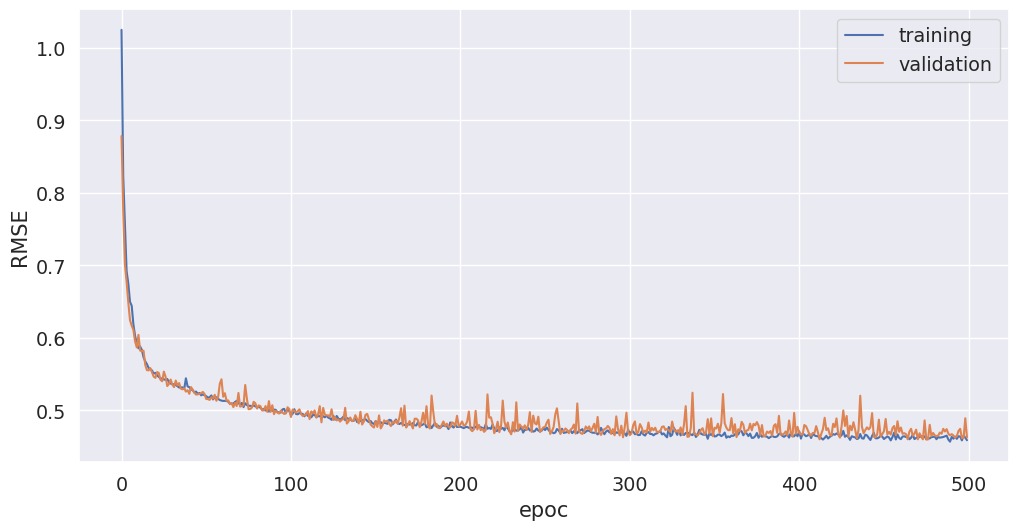

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

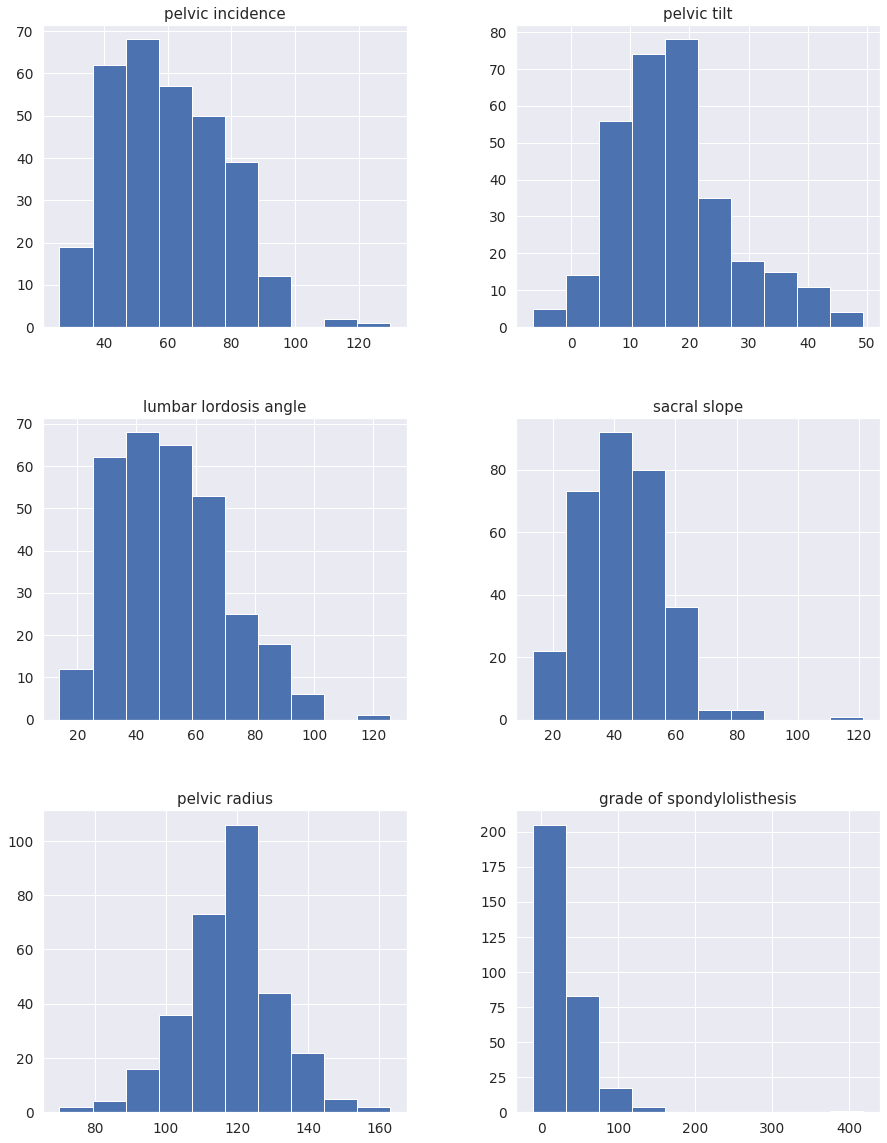

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7983870967741935

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8266 - accuracy: 0.2812

186/186 [==============================] - 0s 579us/step - loss: 0.8110 - accuracy: 0.3118 - val_loss: 0.8637 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6642 - accuracy: 0.4375

186/186 [==============================] - 0s 54us/step - loss: 0.7733 - accuracy: 0.3118 - val_loss: 0.8341 - val_accuracy: 0.3629


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6973 - accuracy: 0.3438

186/186 [==============================] - 0s 54us/step - loss: 0.7422 - accuracy: 0.3118 - val_loss: 0.8071 - val_accuracy: 0.3629


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7651 - accuracy: 0.2812

186/186 [==============================] - 0s 55us/step - loss: 0.7140 - accuracy: 0.3763 - val_loss: 0.7830 - val_accuracy: 0.6694


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.6894 - accuracy: 0.7742 - val_loss: 0.7606 - val_accuracy: 0.6613


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7603 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6628 - accuracy: 0.7742 - val_loss: 0.7389 - val_accuracy: 0.6613


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6392 - accuracy: 0.7742 - val_loss: 0.7165 - val_accuracy: 0.6694


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7068 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6168 - accuracy: 0.7796 - val_loss: 0.6968 - val_accuracy: 0.6774


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5963 - accuracy: 0.7903 - val_loss: 0.6771 - val_accuracy: 0.6855


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5424 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5775 - accuracy: 0.7903 - val_loss: 0.6577 - val_accuracy: 0.6774


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5485 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5581 - accuracy: 0.8011 - val_loss: 0.6396 - val_accuracy: 0.6855


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5496 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5376 - accuracy: 0.8118 - val_loss: 0.6228 - val_accuracy: 0.7016


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5189 - accuracy: 0.8226 - val_loss: 0.6082 - val_accuracy: 0.7097


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.5047 - accuracy: 0.8172 - val_loss: 0.5951 - val_accuracy: 0.7016


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4926 - accuracy: 0.8172 - val_loss: 0.5836 - val_accuracy: 0.7016


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4831 - accuracy: 0.8226 - val_loss: 0.5748 - val_accuracy: 0.7016


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4725 - accuracy: 0.8280 - val_loss: 0.5660 - val_accuracy: 0.7016


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4646 - accuracy: 0.8226 - val_loss: 0.5594 - val_accuracy: 0.7016


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4581 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4578 - accuracy: 0.8226 - val_loss: 0.5520 - val_accuracy: 0.7016


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4510 - accuracy: 0.8280 - val_loss: 0.5482 - val_accuracy: 0.7016


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4660 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4456 - accuracy: 0.8226 - val_loss: 0.5442 - val_accuracy: 0.7016


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4411 - accuracy: 0.8226 - val_loss: 0.5394 - val_accuracy: 0.7016


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4368 - accuracy: 0.8226 - val_loss: 0.5355 - val_accuracy: 0.7016


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4150 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4331 - accuracy: 0.8226 - val_loss: 0.5304 - val_accuracy: 0.7016


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.9062

186/186 [==============================] - 0s 81us/step - loss: 0.4302 - accuracy: 0.8280 - val_loss: 0.5252 - val_accuracy: 0.7016


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4432 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4278 - accuracy: 0.8280 - val_loss: 0.5210 - val_accuracy: 0.7016


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4249 - accuracy: 0.8280 - val_loss: 0.5202 - val_accuracy: 0.7016


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4223 - accuracy: 0.8226 - val_loss: 0.5195 - val_accuracy: 0.7016


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.4193 - accuracy: 0.8280 - val_loss: 0.5164 - val_accuracy: 0.7016


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4170 - accuracy: 0.8280 - val_loss: 0.5124 - val_accuracy: 0.7016


Epoch 31/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4149 - accuracy: 0.8280 - val_loss: 0.5099 - val_accuracy: 0.7016


Epoch 32/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.4131 - accuracy: 0.8280 - val_loss: 0.5079 - val_accuracy: 0.7016


Epoch 33/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.7812

186/186 [==============================] - 0s 120us/step - loss: 0.4115 - accuracy: 0.8280 - val_loss: 0.5063 - val_accuracy: 0.7016


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4356 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4095 - accuracy: 0.8280 - val_loss: 0.5038 - val_accuracy: 0.7016


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4083 - accuracy: 0.8280 - val_loss: 0.5001 - val_accuracy: 0.7016


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.4057 - accuracy: 0.8280 - val_loss: 0.4980 - val_accuracy: 0.7097


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8438

186/186 [==============================] - 0s 81us/step - loss: 0.4041 - accuracy: 0.8280 - val_loss: 0.4952 - val_accuracy: 0.7097


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4005 - accuracy: 0.8280 - val_loss: 0.4932 - val_accuracy: 0.7097


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4349 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3942 - accuracy: 0.8280 - val_loss: 0.4849 - val_accuracy: 0.7177


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3870 - accuracy: 0.8280 - val_loss: 0.4764 - val_accuracy: 0.7177


Epoch 41/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3767 - accuracy: 0.8280 - val_loss: 0.4676 - val_accuracy: 0.7097


Epoch 42/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3549 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3669 - accuracy: 0.8280 - val_loss: 0.4601 - val_accuracy: 0.7097


Epoch 43/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3553 - accuracy: 0.8280 - val_loss: 0.4563 - val_accuracy: 0.7339


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3616 - accuracy: 0.8280 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3598 - accuracy: 0.8280 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3572 - accuracy: 0.8280 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3560 - accuracy: 0.8280 - val_loss: 0.4529 - val_accuracy: 0.7258


Epoch 48/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3554 - accuracy: 0.8280 - val_loss: 0.4535 - val_accuracy: 0.7258


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3550 - accuracy: 0.8280 - val_loss: 0.4542 - val_accuracy: 0.7258


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3542 - accuracy: 0.8280 - val_loss: 0.4544 - val_accuracy: 0.7258


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3539 - accuracy: 0.8226 - val_loss: 0.4542 - val_accuracy: 0.7258


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3534 - accuracy: 0.8226 - val_loss: 0.4553 - val_accuracy: 0.7177


Epoch 53/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3530 - accuracy: 0.8280 - val_loss: 0.4552 - val_accuracy: 0.7258


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3521 - accuracy: 0.8226 - val_loss: 0.4546 - val_accuracy: 0.7258


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3522 - accuracy: 0.8280 - val_loss: 0.4533 - val_accuracy: 0.7258


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3516 - accuracy: 0.8280 - val_loss: 0.4536 - val_accuracy: 0.7258


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3528 - accuracy: 0.8226 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3520 - accuracy: 0.8226 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3516 - accuracy: 0.8226 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3512 - accuracy: 0.8280 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3497 - accuracy: 0.8280 - val_loss: 0.4559 - val_accuracy: 0.7258


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2885 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3492 - accuracy: 0.8280 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4544 - val_accuracy: 0.7258


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3480 - accuracy: 0.8280 - val_loss: 0.4553 - val_accuracy: 0.7258


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.3478 - accuracy: 0.8280 - val_loss: 0.4558 - val_accuracy: 0.7258


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3476 - accuracy: 0.8280 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3469 - accuracy: 0.8280 - val_loss: 0.4553 - val_accuracy: 0.7258


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3461 - accuracy: 0.8333 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 72/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.3446 - accuracy: 0.8387 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2492 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4541 - val_accuracy: 0.7419


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3436 - accuracy: 0.8387 - val_loss: 0.4554 - val_accuracy: 0.7339


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3433 - accuracy: 0.8387 - val_loss: 0.4560 - val_accuracy: 0.7339


Epoch 79/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4539 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3433 - accuracy: 0.8387 - val_loss: 0.4559 - val_accuracy: 0.7258


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3428 - accuracy: 0.8387 - val_loss: 0.4558 - val_accuracy: 0.7258


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2824 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3425 - accuracy: 0.8387 - val_loss: 0.4560 - val_accuracy: 0.7419


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3426 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 84/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5188 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.3426 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3424 - accuracy: 0.8441 - val_loss: 0.4560 - val_accuracy: 0.7258


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3429 - accuracy: 0.8387 - val_loss: 0.4550 - val_accuracy: 0.7419


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3425 - accuracy: 0.8387 - val_loss: 0.4554 - val_accuracy: 0.7419


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8387 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3421 - accuracy: 0.8441 - val_loss: 0.4568 - val_accuracy: 0.7258


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2498 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3417 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3419 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3417 - accuracy: 0.8441 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 93/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3416 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3416 - accuracy: 0.8387 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3414 - accuracy: 0.8441 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7419


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3414 - accuracy: 0.8387 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3413 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 100/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3416 - accuracy: 0.8441 - val_loss: 0.4590 - val_accuracy: 0.7339


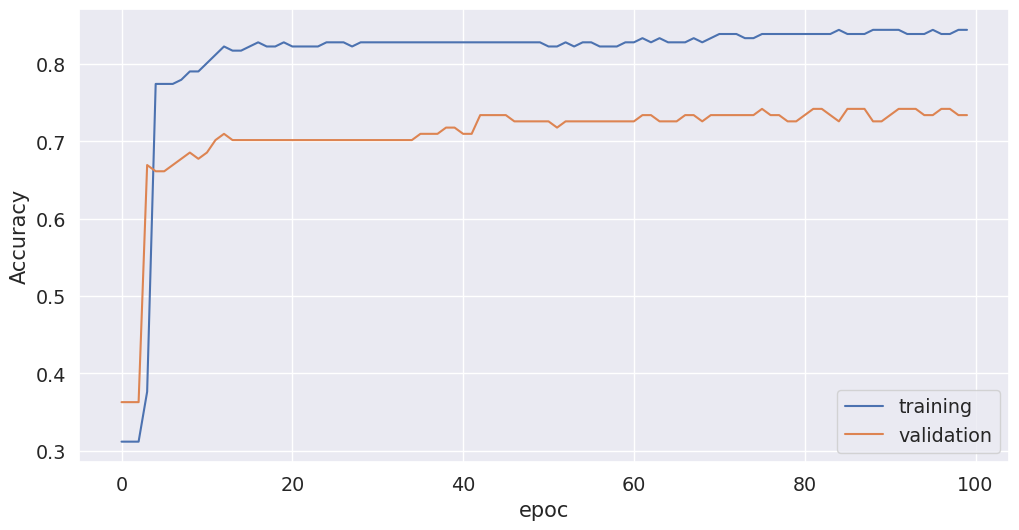

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9435 - accuracy: 0.8125

186/186 [==============================] - 0s 1ms/step - loss: 4.9456 - accuracy: 0.6344 - val_loss: 4.0814 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.4532 - accuracy: 0.6875

186/186 [==============================] - 0s 79us/step - loss: 4.0980 - accuracy: 0.6290 - val_loss: 2.6856 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.1340 - accuracy: 0.5000

186/186 [==============================] - 0s 64us/step - loss: 3.2130 - accuracy: 0.5645 - val_loss: 1.3653 - val_accuracy: 0.6452


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1031 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 2.0949 - accuracy: 0.5645 - val_loss: 0.8383 - val_accuracy: 0.6452


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3118 - accuracy: 0.5000

186/186 [==============================] - 0s 64us/step - loss: 1.8974 - accuracy: 0.6075 - val_loss: 0.6335 - val_accuracy: 0.6532


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8324 - accuracy: 0.5312

186/186 [==============================] - 0s 60us/step - loss: 1.6350 - accuracy: 0.6290 - val_loss: 0.6536 - val_accuracy: 0.5968


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3557 - accuracy: 0.5625

186/186 [==============================] - 0s 64us/step - loss: 1.1022 - accuracy: 0.6452 - val_loss: 0.6322 - val_accuracy: 0.6210


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1351 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 1.2336 - accuracy: 0.6667 - val_loss: 0.6122 - val_accuracy: 0.6532


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2303 - accuracy: 0.5000

186/186 [==============================] - 0s 60us/step - loss: 1.2460 - accuracy: 0.6183 - val_loss: 0.6252 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3358 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 1.4980 - accuracy: 0.6022 - val_loss: 0.6281 - val_accuracy: 0.6613


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6623 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 1.2907 - accuracy: 0.5860 - val_loss: 0.7016 - val_accuracy: 0.4032


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8890 - accuracy: 0.5312

186/186 [==============================] - 0s 62us/step - loss: 0.9608 - accuracy: 0.5645 - val_loss: 0.6260 - val_accuracy: 0.6935


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.8315 - accuracy: 0.5312

186/186 [==============================] - 0s 62us/step - loss: 1.3436 - accuracy: 0.6237 - val_loss: 0.6356 - val_accuracy: 0.7097


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5252 - accuracy: 0.6875

186/186 [==============================] - 0s 73us/step - loss: 1.0506 - accuracy: 0.6022 - val_loss: 0.5975 - val_accuracy: 0.6452


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8724 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 1.0435 - accuracy: 0.6075 - val_loss: 0.6104 - val_accuracy: 0.7177


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5023 - accuracy: 0.5625

186/186 [==============================] - 0s 72us/step - loss: 1.0279 - accuracy: 0.6828 - val_loss: 0.5981 - val_accuracy: 0.6532


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9229 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.9029 - accuracy: 0.6559 - val_loss: 0.5984 - val_accuracy: 0.6855


Epoch 18/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.8118 - accuracy: 0.6667 - val_loss: 0.5879 - val_accuracy: 0.6452


Epoch 19/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.7737 - accuracy: 0.7312 - val_loss: 0.5880 - val_accuracy: 0.6694


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.2300 - accuracy: 0.7188

186/186 [==============================] - 0s 72us/step - loss: 0.9568 - accuracy: 0.6989 - val_loss: 0.6285 - val_accuracy: 0.6855


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.1828 - accuracy: 0.5938



186/186 [==============================] - 0s 66us/step - loss: 0.9310 - accuracy: 0.6344 - val_loss: 0.5867 - val_accuracy: 0.6774


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2019 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 0.8681 - accuracy: 0.6344 - val_loss: 0.5727 - val_accuracy: 0.6532


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8016 - accuracy: 0.6562



186/186 [==============================] - 0s 63us/step - loss: 0.8663 - accuracy: 0.6559 - val_loss: 0.5785 - val_accuracy: 0.6613


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3977 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.7133 - accuracy: 0.6828 - val_loss: 0.5948 - val_accuracy: 0.7177


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7070 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.9507 - accuracy: 0.6290 - val_loss: 0.5817 - val_accuracy: 0.6935


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1551 - accuracy: 0.4375

186/186 [==============================] - 0s 66us/step - loss: 0.8768 - accuracy: 0.6022 - val_loss: 0.6009 - val_accuracy: 0.7097


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9783 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.8185 - accuracy: 0.6290 - val_loss: 0.5993 - val_accuracy: 0.7097


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.8099 - accuracy: 0.6559 - val_loss: 0.5995 - val_accuracy: 0.7016


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7833 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.7922 - accuracy: 0.6344 - val_loss: 0.5694 - val_accuracy: 0.6290


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.7204 - accuracy: 0.6667 - val_loss: 0.5653 - val_accuracy: 0.6452


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6920 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.6832 - accuracy: 0.7043 - val_loss: 0.5831 - val_accuracy: 0.7258


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.7284 - accuracy: 0.6935 - val_loss: 0.5942 - val_accuracy: 0.7258


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7697 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 0.7953 - accuracy: 0.6129 - val_loss: 0.5759 - val_accuracy: 0.7097


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.7403 - accuracy: 0.6667 - val_loss: 0.5712 - val_accuracy: 0.6210


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7197 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.7185 - accuracy: 0.6828 - val_loss: 0.5699 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7401 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6209 - accuracy: 0.7258 - val_loss: 0.5729 - val_accuracy: 0.6290


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8308 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.6743 - accuracy: 0.6613 - val_loss: 0.5842 - val_accuracy: 0.7177


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.6463 - accuracy: 0.6989 - val_loss: 0.5842 - val_accuracy: 0.7339


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5564 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.6675 - accuracy: 0.6505 - val_loss: 0.5694 - val_accuracy: 0.6290


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7887 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.7259 - accuracy: 0.7043 - val_loss: 0.5722 - val_accuracy: 0.6210


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4769 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.6196 - accuracy: 0.6882 - val_loss: 0.5718 - val_accuracy: 0.6210


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 0.5883 - accuracy: 0.7043 - val_loss: 0.5766 - val_accuracy: 0.6129


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5909 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.6122 - accuracy: 0.7097 - val_loss: 0.5760 - val_accuracy: 0.6290


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5721 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.6374 - accuracy: 0.7043 - val_loss: 0.5724 - val_accuracy: 0.6210


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.6584 - accuracy: 0.6989 - val_loss: 0.5784 - val_accuracy: 0.6210


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.5749 - accuracy: 0.7204 - val_loss: 0.5939 - val_accuracy: 0.7258


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.6280 - accuracy: 0.6882 - val_loss: 0.5796 - val_accuracy: 0.6210


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6797 - accuracy: 0.6250

186/186 [==============================] - 0s 69us/step - loss: 0.7506 - accuracy: 0.6667 - val_loss: 0.5777 - val_accuracy: 0.6452


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6026 - accuracy: 0.7151 - val_loss: 0.5828 - val_accuracy: 0.6290


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5840 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.5979 - accuracy: 0.7097 - val_loss: 0.5945 - val_accuracy: 0.7258


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.6126 - accuracy: 0.7097 - val_loss: 0.5962 - val_accuracy: 0.6613


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.5551 - accuracy: 0.6828 - val_loss: 0.5923 - val_accuracy: 0.6290


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6371 - accuracy: 0.7500

186/186 [==============================] - 0s 72us/step - loss: 0.5815 - accuracy: 0.7366 - val_loss: 0.5816 - val_accuracy: 0.6290


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7012 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.5583 - accuracy: 0.7366 - val_loss: 0.5826 - val_accuracy: 0.6210


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.5810 - accuracy: 0.7366 - val_loss: 0.5836 - val_accuracy: 0.6210


Epoch 56/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.6346 - accuracy: 0.6989 - val_loss: 0.5849 - val_accuracy: 0.6210


Epoch 57/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6435 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5734 - accuracy: 0.7204 - val_loss: 0.5832 - val_accuracy: 0.6210


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.5068 - accuracy: 0.7688 - val_loss: 0.5803 - val_accuracy: 0.6210


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.5880 - accuracy: 0.7097 - val_loss: 0.5815 - val_accuracy: 0.6210


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.5717 - accuracy: 0.6935 - val_loss: 0.5805 - val_accuracy: 0.6290


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.5636 - accuracy: 0.7258 - val_loss: 0.5822 - val_accuracy: 0.6210


Epoch 62/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4779 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.6119 - accuracy: 0.6828 - val_loss: 0.5882 - val_accuracy: 0.6290


Epoch 63/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.7188



186/186 [==============================] - 0s 73us/step - loss: 0.5907 - accuracy: 0.6989 - val_loss: 0.5832 - val_accuracy: 0.6210


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 0.5708 - accuracy: 0.7258 - val_loss: 0.5786 - val_accuracy: 0.6452


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.5774 - accuracy: 0.7204 - val_loss: 0.5856 - val_accuracy: 0.6210


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5642 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.6093 - accuracy: 0.6989 - val_loss: 0.5836 - val_accuracy: 0.6210


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.5472 - accuracy: 0.7204 - val_loss: 0.5854 - val_accuracy: 0.6290


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5506 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.5483 - accuracy: 0.6935 - val_loss: 0.5810 - val_accuracy: 0.6210


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.5369 - accuracy: 0.7151 - val_loss: 0.5835 - val_accuracy: 0.6210


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5329 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.5548 - accuracy: 0.6989 - val_loss: 0.5863 - val_accuracy: 0.6210


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.5023 - accuracy: 0.7473 - val_loss: 0.5781 - val_accuracy: 0.6210


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.5762 - accuracy: 0.7043 - val_loss: 0.5840 - val_accuracy: 0.6290


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5631 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5552 - accuracy: 0.6935 - val_loss: 0.5781 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5155 - accuracy: 0.7097 - val_loss: 0.5758 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6757 - accuracy: 0.6250

186/186 [==============================] - 0s 67us/step - loss: 0.5759 - accuracy: 0.7258 - val_loss: 0.5816 - val_accuracy: 0.6290


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5675 - accuracy: 0.6989 - val_loss: 0.5744 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4520 - accuracy: 0.7500

186/186 [==============================] - 0s 71us/step - loss: 0.5509 - accuracy: 0.7419 - val_loss: 0.5739 - val_accuracy: 0.6371


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.5503 - accuracy: 0.7043 - val_loss: 0.5764 - val_accuracy: 0.6290


Epoch 79/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.5341 - accuracy: 0.7258 - val_loss: 0.5766 - val_accuracy: 0.6210


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5496 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.5695 - accuracy: 0.7097 - val_loss: 0.5767 - val_accuracy: 0.6210


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.6875

186/186 [==============================] - 0s 87us/step - loss: 0.5745 - accuracy: 0.6720 - val_loss: 0.5771 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5724 - accuracy: 0.6875

186/186 [==============================] - 0s 71us/step - loss: 0.5766 - accuracy: 0.7097 - val_loss: 0.5767 - val_accuracy: 0.6290


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6132 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.5523 - accuracy: 0.7204 - val_loss: 0.5802 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.5403 - accuracy: 0.7312 - val_loss: 0.5763 - val_accuracy: 0.6210


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4885 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.5188 - accuracy: 0.7473 - val_loss: 0.5711 - val_accuracy: 0.6290


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5192 - accuracy: 0.7581 - val_loss: 0.5688 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.5349 - accuracy: 0.7473 - val_loss: 0.5779 - val_accuracy: 0.6290


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6103 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.5319 - accuracy: 0.7151 - val_loss: 0.5689 - val_accuracy: 0.6290


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5215 - accuracy: 0.7527 - val_loss: 0.5696 - val_accuracy: 0.6210


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.5938



186/186 [==============================] - 0s 62us/step - loss: 0.5183 - accuracy: 0.7312 - val_loss: 0.5731 - val_accuracy: 0.6129


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5136 - accuracy: 0.7204 - val_loss: 0.5776 - val_accuracy: 0.6129


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5628 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.5340 - accuracy: 0.7097 - val_loss: 0.5816 - val_accuracy: 0.6210


Epoch 93/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.5390 - accuracy: 0.7097 - val_loss: 0.5743 - val_accuracy: 0.6210


Epoch 94/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5211 - accuracy: 0.7258 - val_loss: 0.5708 - val_accuracy: 0.6129


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.5329 - accuracy: 0.7097 - val_loss: 0.5744 - val_accuracy: 0.6210


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.4958 - accuracy: 0.7258 - val_loss: 0.5686 - val_accuracy: 0.6129


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.5642 - accuracy: 0.6989 - val_loss: 0.5706 - val_accuracy: 0.6129


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4674 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.5038 - accuracy: 0.7527 - val_loss: 0.5681 - val_accuracy: 0.6210


Epoch 99/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 0.5030 - accuracy: 0.7258 - val_loss: 0.5708 - val_accuracy: 0.6129


Epoch 100/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.5104 - accuracy: 0.7204 - val_loss: 0.5699 - val_accuracy: 0.6290


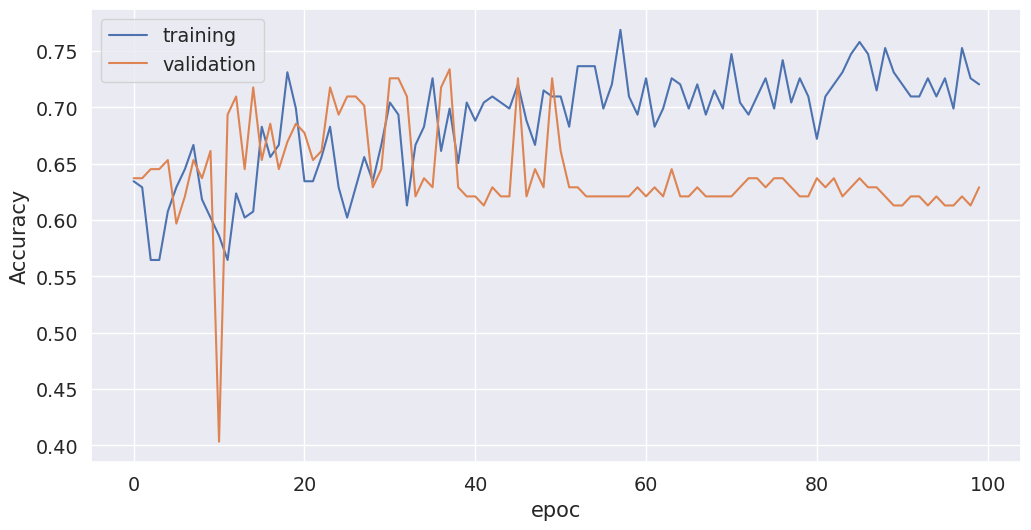

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.1096 - accuracy: 0.6875

186/186 [==============================] - 0s 961us/step - loss: 3.5258 - accuracy: 0.6935 - val_loss: 2.6534 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8266 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 2.2754 - accuracy: 0.6720 - val_loss: 2.0083 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9011 - accuracy: 0.5938

186/186 [==============================] - 0s 69us/step - loss: 1.8622 - accuracy: 0.6667 - val_loss: 1.6093 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3997 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 1.5782 - accuracy: 0.6613 - val_loss: 1.2918 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7696 - accuracy: 0.5625

186/186 [==============================] - 0s 61us/step - loss: 1.3932 - accuracy: 0.6667 - val_loss: 1.0591 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4313 - accuracy: 0.5625

186/186 [==============================] - 0s 62us/step - loss: 1.0676 - accuracy: 0.6935 - val_loss: 0.8899 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8462 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 1.1562 - accuracy: 0.6505 - val_loss: 0.7460 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1800 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.8740 - accuracy: 0.6989 - val_loss: 0.6561 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7836 - accuracy: 0.5938

186/186 [==============================] - 0s 68us/step - loss: 0.7275 - accuracy: 0.6828 - val_loss: 0.6072 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1120 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.7512 - accuracy: 0.6774 - val_loss: 0.5602 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7782 - accuracy: 0.5938

186/186 [==============================] - 0s 63us/step - loss: 0.6148 - accuracy: 0.6828 - val_loss: 0.5522 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5787 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.5847 - accuracy: 0.6774 - val_loss: 0.5461 - val_accuracy: 0.6613


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.5650 - accuracy: 0.6989 - val_loss: 0.5275 - val_accuracy: 0.6774


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8688 - accuracy: 0.4375

186/186 [==============================] - 0s 59us/step - loss: 0.5895 - accuracy: 0.6667 - val_loss: 0.5293 - val_accuracy: 0.6774


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6998 - accuracy: 0.5938

186/186 [==============================] - 0s 64us/step - loss: 0.6214 - accuracy: 0.6505 - val_loss: 0.5215 - val_accuracy: 0.7177


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.5584 - accuracy: 0.6720 - val_loss: 0.5184 - val_accuracy: 0.6935


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8353 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6046 - accuracy: 0.7151 - val_loss: 0.5116 - val_accuracy: 0.7419


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5293 - accuracy: 0.6774 - val_loss: 0.5097 - val_accuracy: 0.7258


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6011 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.5999 - accuracy: 0.6828 - val_loss: 0.5191 - val_accuracy: 0.6855


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5431 - accuracy: 0.6989 - val_loss: 0.5181 - val_accuracy: 0.6855


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6657 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5348 - accuracy: 0.6828 - val_loss: 0.5132 - val_accuracy: 0.6935


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5792 - accuracy: 0.6452 - val_loss: 0.5108 - val_accuracy: 0.7258


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5699 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5437 - accuracy: 0.7097 - val_loss: 0.5102 - val_accuracy: 0.6774


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5546 - accuracy: 0.7151 - val_loss: 0.5131 - val_accuracy: 0.6452


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5440 - accuracy: 0.6774 - val_loss: 0.5097 - val_accuracy: 0.6774


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5737 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.4755 - accuracy: 0.7097 - val_loss: 0.5044 - val_accuracy: 0.7097


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5408 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 0.5226 - accuracy: 0.6989 - val_loss: 0.5035 - val_accuracy: 0.7258


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5545 - accuracy: 0.6882 - val_loss: 0.5055 - val_accuracy: 0.6613


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4844 - accuracy: 0.7473 - val_loss: 0.5012 - val_accuracy: 0.7258


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5312

186/186 [==============================] - 0s 67us/step - loss: 0.4887 - accuracy: 0.7097 - val_loss: 0.4956 - val_accuracy: 0.7177


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.4949 - accuracy: 0.6828 - val_loss: 0.4976 - val_accuracy: 0.6935


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4569 - accuracy: 0.7581 - val_loss: 0.4940 - val_accuracy: 0.7177


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4816 - accuracy: 0.7419 - val_loss: 0.4935 - val_accuracy: 0.7258


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4434 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5049 - accuracy: 0.7366 - val_loss: 0.4852 - val_accuracy: 0.7177


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4717 - accuracy: 0.7312 - val_loss: 0.4864 - val_accuracy: 0.6935


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4630 - accuracy: 0.7688 - val_loss: 0.4832 - val_accuracy: 0.7016


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5423 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4944 - accuracy: 0.7043 - val_loss: 0.4844 - val_accuracy: 0.7339


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4433 - accuracy: 0.7204 - val_loss: 0.4791 - val_accuracy: 0.7177


Epoch 39/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4653 - accuracy: 0.7043 - val_loss: 0.4797 - val_accuracy: 0.6935


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4706 - accuracy: 0.7366 - val_loss: 0.4751 - val_accuracy: 0.6935


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4486 - accuracy: 0.7204 - val_loss: 0.4717 - val_accuracy: 0.6935


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4920 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.4761 - accuracy: 0.6989 - val_loss: 0.4731 - val_accuracy: 0.6935


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.4256 - accuracy: 0.7204 - val_loss: 0.4743 - val_accuracy: 0.6774


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5049 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4405 - accuracy: 0.7473 - val_loss: 0.4756 - val_accuracy: 0.6855


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4135 - accuracy: 0.7849 - val_loss: 0.4780 - val_accuracy: 0.6935


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4746 - accuracy: 0.7581 - val_loss: 0.4729 - val_accuracy: 0.6855


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5504 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4744 - accuracy: 0.6989 - val_loss: 0.4723 - val_accuracy: 0.6935


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4915 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4271 - accuracy: 0.7903 - val_loss: 0.4721 - val_accuracy: 0.6855


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4343 - accuracy: 0.7258 - val_loss: 0.4708 - val_accuracy: 0.6935


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4676 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4330 - accuracy: 0.7581 - val_loss: 0.4708 - val_accuracy: 0.6935


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4120 - accuracy: 0.7419 - val_loss: 0.4697 - val_accuracy: 0.6935


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4007 - accuracy: 0.8011 - val_loss: 0.4678 - val_accuracy: 0.7016


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4364 - accuracy: 0.7527 - val_loss: 0.4672 - val_accuracy: 0.7097


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4424 - accuracy: 0.7258 - val_loss: 0.4674 - val_accuracy: 0.7177


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4069 - accuracy: 0.7742 - val_loss: 0.4663 - val_accuracy: 0.7016


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4022 - accuracy: 0.7742 - val_loss: 0.4658 - val_accuracy: 0.7177


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4458 - accuracy: 0.7097 - val_loss: 0.4659 - val_accuracy: 0.7097


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4292 - accuracy: 0.7473 - val_loss: 0.4653 - val_accuracy: 0.7016


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4472 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4207 - accuracy: 0.7742 - val_loss: 0.4642 - val_accuracy: 0.7016


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4504 - accuracy: 0.7473 - val_loss: 0.4629 - val_accuracy: 0.7016


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3945 - accuracy: 0.7634 - val_loss: 0.4613 - val_accuracy: 0.6935


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4091 - accuracy: 0.7581 - val_loss: 0.4604 - val_accuracy: 0.7097


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4226 - accuracy: 0.7634 - val_loss: 0.4616 - val_accuracy: 0.7016


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4270 - accuracy: 0.7366 - val_loss: 0.4591 - val_accuracy: 0.7097


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3864 - accuracy: 0.7688 - val_loss: 0.4605 - val_accuracy: 0.7177


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4087 - accuracy: 0.7796 - val_loss: 0.4601 - val_accuracy: 0.7016


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4103 - accuracy: 0.7903 - val_loss: 0.4580 - val_accuracy: 0.7177


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3905 - accuracy: 0.7688 - val_loss: 0.4545 - val_accuracy: 0.7177


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.3975 - accuracy: 0.7903 - val_loss: 0.4588 - val_accuracy: 0.7097


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4455 - accuracy: 0.7581 - val_loss: 0.4567 - val_accuracy: 0.7097


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.4106 - accuracy: 0.7903 - val_loss: 0.4574 - val_accuracy: 0.6935


Epoch 72/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.4280 - accuracy: 0.7258 - val_loss: 0.4576 - val_accuracy: 0.7097


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.4029 - accuracy: 0.7957 - val_loss: 0.4574 - val_accuracy: 0.7177


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.3802 - accuracy: 0.8172 - val_loss: 0.4553 - val_accuracy: 0.7177


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.4135 - accuracy: 0.7742 - val_loss: 0.4529 - val_accuracy: 0.7097


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3511 - accuracy: 0.8065 - val_loss: 0.4528 - val_accuracy: 0.7097


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3856 - accuracy: 0.7796 - val_loss: 0.4516 - val_accuracy: 0.7097


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4483 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.3851 - accuracy: 0.7688 - val_loss: 0.4510 - val_accuracy: 0.7258


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4547 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4354 - accuracy: 0.7634 - val_loss: 0.4524 - val_accuracy: 0.7419


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3803 - accuracy: 0.7957 - val_loss: 0.4501 - val_accuracy: 0.7339


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3998 - accuracy: 0.7634 - val_loss: 0.4500 - val_accuracy: 0.7339


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4290 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3681 - accuracy: 0.8011 - val_loss: 0.4485 - val_accuracy: 0.7177


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4099 - accuracy: 0.7796 - val_loss: 0.4498 - val_accuracy: 0.7177


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3648 - accuracy: 0.7957 - val_loss: 0.4479 - val_accuracy: 0.7258


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3347 - accuracy: 0.8333 - val_loss: 0.4453 - val_accuracy: 0.7419


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4150 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3748 - accuracy: 0.7796 - val_loss: 0.4418 - val_accuracy: 0.7339


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.3538 - accuracy: 0.8118 - val_loss: 0.4378 - val_accuracy: 0.7258


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3991 - accuracy: 0.8011 - val_loss: 0.4420 - val_accuracy: 0.7339


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2041 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3812 - accuracy: 0.7581 - val_loss: 0.4469 - val_accuracy: 0.7258


Epoch 90/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4445 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3622 - accuracy: 0.8065 - val_loss: 0.4472 - val_accuracy: 0.7339


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3619 - accuracy: 0.7742 - val_loss: 0.4452 - val_accuracy: 0.7339


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3728 - accuracy: 0.8011 - val_loss: 0.4430 - val_accuracy: 0.7419


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3479 - accuracy: 0.8280 - val_loss: 0.4425 - val_accuracy: 0.7419


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3582 - accuracy: 0.8172 - val_loss: 0.4434 - val_accuracy: 0.7258


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3920 - accuracy: 0.7849 - val_loss: 0.4445 - val_accuracy: 0.7258


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3672 - accuracy: 0.8172 - val_loss: 0.4427 - val_accuracy: 0.7339


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3826 - accuracy: 0.7742 - val_loss: 0.4394 - val_accuracy: 0.7419


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3832 - accuracy: 0.8172 - val_loss: 0.4448 - val_accuracy: 0.7339


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3806 - accuracy: 0.7742 - val_loss: 0.4431 - val_accuracy: 0.7339


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3851 - accuracy: 0.7796 - val_loss: 0.4394 - val_accuracy: 0.7500


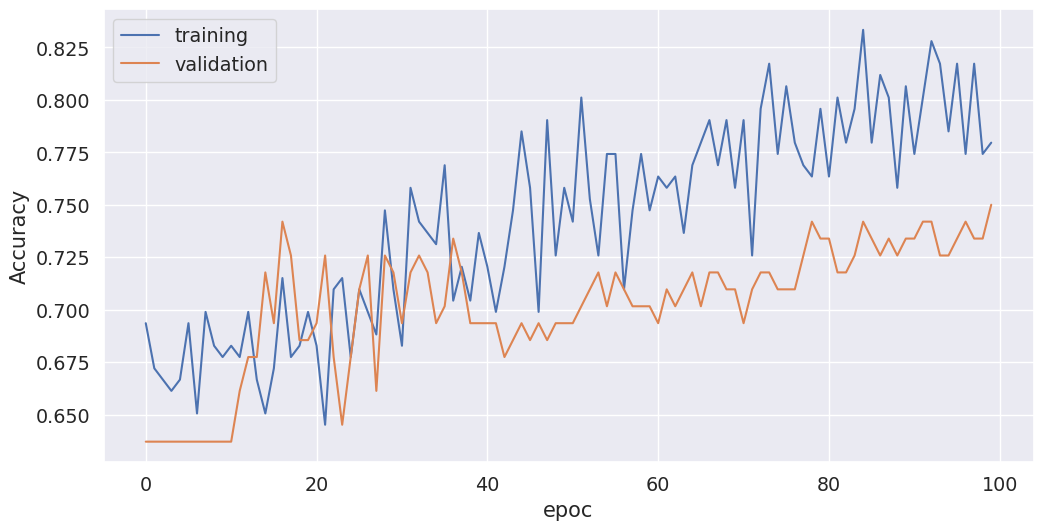

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3840 - accuracy: 0.8125

186/186 [==============================] - 0s 1ms/step - loss: 4.5825 - accuracy: 0.6882 - val_loss: 1.4994 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.5736 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 3.8062 - accuracy: 0.7043 - val_loss: 0.9094 - val_accuracy: 0.5887


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2760 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 2.7180 - accuracy: 0.7043 - val_loss: 0.8059 - val_accuracy: 0.6048


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0717 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 3.0416 - accuracy: 0.6935 - val_loss: 0.7767 - val_accuracy: 0.6774


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5223 - accuracy: 0.6562

186/186 [==============================] - 0s 67us/step - loss: 1.9469 - accuracy: 0.6613 - val_loss: 0.7878 - val_accuracy: 0.6694


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.7059 - accuracy: 0.6562

186/186 [==============================] - 0s 106us/step - loss: 2.2984 - accuracy: 0.6989 - val_loss: 0.8045 - val_accuracy: 0.6613


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3241 - accuracy: 0.6562

186/186 [==============================] - 0s 71us/step - loss: 1.5735 - accuracy: 0.7151 - val_loss: 0.8131 - val_accuracy: 0.6452


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.0103 - accuracy: 0.5938

186/186 [==============================] - 0s 70us/step - loss: 1.5697 - accuracy: 0.7097 - val_loss: 0.8127 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1568 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 1.6308 - accuracy: 0.6559 - val_loss: 0.8282 - val_accuracy: 0.6048


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2374 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 1.3995 - accuracy: 0.7043 - val_loss: 0.8307 - val_accuracy: 0.5968


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4519 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 1.1496 - accuracy: 0.6720 - val_loss: 0.8275 - val_accuracy: 0.5968


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1141 - accuracy: 0.5312

186/186 [==============================] - 0s 65us/step - loss: 1.2930 - accuracy: 0.6290 - val_loss: 0.8344 - val_accuracy: 0.5806


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5996 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 1.1797 - accuracy: 0.6183 - val_loss: 0.8206 - val_accuracy: 0.6129


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4313 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 1.2873 - accuracy: 0.6720 - val_loss: 0.8120 - val_accuracy: 0.6210


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.5625

186/186 [==============================] - 0s 65us/step - loss: 1.0369 - accuracy: 0.6075 - val_loss: 0.8162 - val_accuracy: 0.6129


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0591 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.9311 - accuracy: 0.6828 - val_loss: 0.8042 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9200 - accuracy: 0.5000

186/186 [==============================] - 0s 63us/step - loss: 0.9150 - accuracy: 0.6237 - val_loss: 0.8080 - val_accuracy: 0.6290


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6317 - accuracy: 0.4375

186/186 [==============================] - 0s 62us/step - loss: 0.9128 - accuracy: 0.6828 - val_loss: 0.7979 - val_accuracy: 0.6532


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7633 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.8680 - accuracy: 0.6989 - val_loss: 0.8015 - val_accuracy: 0.6452


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8700 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.9132 - accuracy: 0.6183 - val_loss: 0.7927 - val_accuracy: 0.6532


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8444 - accuracy: 0.8125

186/186 [==============================] - 0s 84us/step - loss: 0.7737 - accuracy: 0.7204 - val_loss: 0.7845 - val_accuracy: 0.6532


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7185 - accuracy: 0.7500



186/186 [==============================] - 0s 70us/step - loss: 0.7319 - accuracy: 0.7258 - val_loss: 0.7724 - val_accuracy: 0.6694


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8340 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.8321 - accuracy: 0.6452 - val_loss: 0.7618 - val_accuracy: 0.7016


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9178 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.7551 - accuracy: 0.7473 - val_loss: 0.7511 - val_accuracy: 0.7097


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5540 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.7078 - accuracy: 0.7312 - val_loss: 0.7411 - val_accuracy: 0.7097


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7699 - accuracy: 0.6875

186/186 [==============================] - 0s 70us/step - loss: 0.6995 - accuracy: 0.7473 - val_loss: 0.7258 - val_accuracy: 0.7097


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8497 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 0.7538 - accuracy: 0.7258 - val_loss: 0.7301 - val_accuracy: 0.7097


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6387 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.7143 - accuracy: 0.6989 - val_loss: 0.7292 - val_accuracy: 0.7097


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7023 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.7214 - accuracy: 0.7473 - val_loss: 0.7047 - val_accuracy: 0.7016


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7471 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.7143 - accuracy: 0.6989 - val_loss: 0.7012 - val_accuracy: 0.7016


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6354 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.6754 - accuracy: 0.7581 - val_loss: 0.6936 - val_accuracy: 0.6935


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9747 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.7738 - accuracy: 0.6882 - val_loss: 0.6927 - val_accuracy: 0.6935


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7620 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.6506 - accuracy: 0.7527 - val_loss: 0.6920 - val_accuracy: 0.6935


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.7300 - accuracy: 0.6720 - val_loss: 0.6932 - val_accuracy: 0.6935


Epoch 35/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6608 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.6563 - accuracy: 0.7634 - val_loss: 0.6885 - val_accuracy: 0.6935


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5430 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.6786 - accuracy: 0.7419 - val_loss: 0.6788 - val_accuracy: 0.6935


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.6634 - accuracy: 0.7312 - val_loss: 0.6753 - val_accuracy: 0.6935


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.6372 - accuracy: 0.7742 - val_loss: 0.6717 - val_accuracy: 0.6935


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.6666 - accuracy: 0.7366 - val_loss: 0.6798 - val_accuracy: 0.6935


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.6163 - accuracy: 0.7473 - val_loss: 0.6615 - val_accuracy: 0.6855


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6070 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.6475 - accuracy: 0.7419 - val_loss: 0.6643 - val_accuracy: 0.6935


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6948 - accuracy: 0.6562



186/186 [==============================] - 0s 63us/step - loss: 0.6489 - accuracy: 0.7473 - val_loss: 0.6640 - val_accuracy: 0.6935


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7206 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6278 - accuracy: 0.7903 - val_loss: 0.6557 - val_accuracy: 0.6855


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7769 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6394 - accuracy: 0.7258 - val_loss: 0.6569 - val_accuracy: 0.6855


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.7188



186/186 [==============================] - 0s 60us/step - loss: 0.6101 - accuracy: 0.7312 - val_loss: 0.6467 - val_accuracy: 0.6855


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.5977 - accuracy: 0.7796 - val_loss: 0.6435 - val_accuracy: 0.6855


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5671 - accuracy: 0.8065 - val_loss: 0.6388 - val_accuracy: 0.6855


Epoch 48/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5739 - accuracy: 0.7812



186/186 [==============================] - 0s 65us/step - loss: 0.6042 - accuracy: 0.7581 - val_loss: 0.6342 - val_accuracy: 0.6935


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5766 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6015 - accuracy: 0.7366 - val_loss: 0.6302 - val_accuracy: 0.6935


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5552 - accuracy: 0.7500

186/186 [==============================] - 0s 81us/step - loss: 0.5864 - accuracy: 0.7688 - val_loss: 0.6270 - val_accuracy: 0.6935


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5263 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5783 - accuracy: 0.7796 - val_loss: 0.6239 - val_accuracy: 0.7016


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.6875

186/186 [==============================] - 0s 74us/step - loss: 0.5885 - accuracy: 0.7634 - val_loss: 0.6211 - val_accuracy: 0.6935


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5138 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.6043 - accuracy: 0.7204 - val_loss: 0.6202 - val_accuracy: 0.7016


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.5664 - accuracy: 0.7473 - val_loss: 0.6146 - val_accuracy: 0.6935


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6417 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.5820 - accuracy: 0.7527 - val_loss: 0.6140 - val_accuracy: 0.6935


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5785 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.5574 - accuracy: 0.7527 - val_loss: 0.6118 - val_accuracy: 0.6935


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4613 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5718 - accuracy: 0.7366 - val_loss: 0.6093 - val_accuracy: 0.6935


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.5323 - accuracy: 0.7957 - val_loss: 0.6057 - val_accuracy: 0.7016


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4999 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5634 - accuracy: 0.7419 - val_loss: 0.6060 - val_accuracy: 0.7016


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.5411 - accuracy: 0.8172 - val_loss: 0.6008 - val_accuracy: 0.7016


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7473 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.5549 - accuracy: 0.7527 - val_loss: 0.5985 - val_accuracy: 0.7016


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4986 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.5337 - accuracy: 0.7419 - val_loss: 0.5966 - val_accuracy: 0.7016


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5466 - accuracy: 0.8172 - val_loss: 0.5947 - val_accuracy: 0.7016


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5698 - accuracy: 0.7634 - val_loss: 0.5927 - val_accuracy: 0.7016


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5516 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5361 - accuracy: 0.7849 - val_loss: 0.5913 - val_accuracy: 0.7016


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5596 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5275 - accuracy: 0.7796 - val_loss: 0.5888 - val_accuracy: 0.7016


Epoch 67/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4528 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.5638 - accuracy: 0.7796 - val_loss: 0.5863 - val_accuracy: 0.7016


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5130 - accuracy: 0.7796 - val_loss: 0.5833 - val_accuracy: 0.7016


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.5097 - accuracy: 0.8118 - val_loss: 0.5811 - val_accuracy: 0.7016


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.5129 - accuracy: 0.7903 - val_loss: 0.5786 - val_accuracy: 0.7016


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.5044 - accuracy: 0.7849 - val_loss: 0.5773 - val_accuracy: 0.7016


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.5165 - accuracy: 0.8011 - val_loss: 0.5773 - val_accuracy: 0.7016


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.5483 - accuracy: 0.7527 - val_loss: 0.5779 - val_accuracy: 0.6935


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5263 - accuracy: 0.7500

186/186 [==============================] - 0s 82us/step - loss: 0.5454 - accuracy: 0.7957 - val_loss: 0.5755 - val_accuracy: 0.7016


Epoch 75/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.5481 - accuracy: 0.7258 - val_loss: 0.5754 - val_accuracy: 0.7097


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5043 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5325 - accuracy: 0.7581 - val_loss: 0.5722 - val_accuracy: 0.7097


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5724 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5149 - accuracy: 0.7527 - val_loss: 0.5719 - val_accuracy: 0.7097


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5005 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5012 - accuracy: 0.8226 - val_loss: 0.5705 - val_accuracy: 0.6935


Epoch 79/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4442 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5077 - accuracy: 0.7957 - val_loss: 0.5691 - val_accuracy: 0.6935


Epoch 80/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5120 - accuracy: 0.7634 - val_loss: 0.5678 - val_accuracy: 0.6935


Epoch 81/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4955 - accuracy: 0.7688 - val_loss: 0.5675 - val_accuracy: 0.7177


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4875 - accuracy: 0.8011 - val_loss: 0.5654 - val_accuracy: 0.7016


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.4947 - accuracy: 0.8011 - val_loss: 0.5640 - val_accuracy: 0.7016


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.5296 - accuracy: 0.7419 - val_loss: 0.5653 - val_accuracy: 0.7097


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.4847 - accuracy: 0.8226 - val_loss: 0.5637 - val_accuracy: 0.7177


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5481 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.4862 - accuracy: 0.7957 - val_loss: 0.5606 - val_accuracy: 0.7097


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.4906 - accuracy: 0.7957 - val_loss: 0.5610 - val_accuracy: 0.7177


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4900 - accuracy: 0.7849 - val_loss: 0.5613 - val_accuracy: 0.7177


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.7812

186/186 [==============================] - 0s 73us/step - loss: 0.5052 - accuracy: 0.8011 - val_loss: 0.5605 - val_accuracy: 0.7177


Epoch 90/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.8125

186/186 [==============================] - 0s 78us/step - loss: 0.4838 - accuracy: 0.7796 - val_loss: 0.5591 - val_accuracy: 0.7177


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4919 - accuracy: 0.8065 - val_loss: 0.5565 - val_accuracy: 0.7258


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5401 - accuracy: 0.6562

186/186 [==============================] - 0s 67us/step - loss: 0.4923 - accuracy: 0.7796 - val_loss: 0.5564 - val_accuracy: 0.7177


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.4764 - accuracy: 0.7849 - val_loss: 0.5556 - val_accuracy: 0.7177


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4899 - accuracy: 0.7634 - val_loss: 0.5558 - val_accuracy: 0.7177


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4814 - accuracy: 0.7742 - val_loss: 0.5538 - val_accuracy: 0.7177


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.4652 - accuracy: 0.8441 - val_loss: 0.5523 - val_accuracy: 0.7258


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4696 - accuracy: 0.7742 - val_loss: 0.5509 - val_accuracy: 0.7258


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4319 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.4649 - accuracy: 0.7957 - val_loss: 0.5490 - val_accuracy: 0.7177


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5426 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.4969 - accuracy: 0.7957 - val_loss: 0.5498 - val_accuracy: 0.7258


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4477 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4571 - accuracy: 0.7849 - val_loss: 0.5486 - val_accuracy: 0.7258


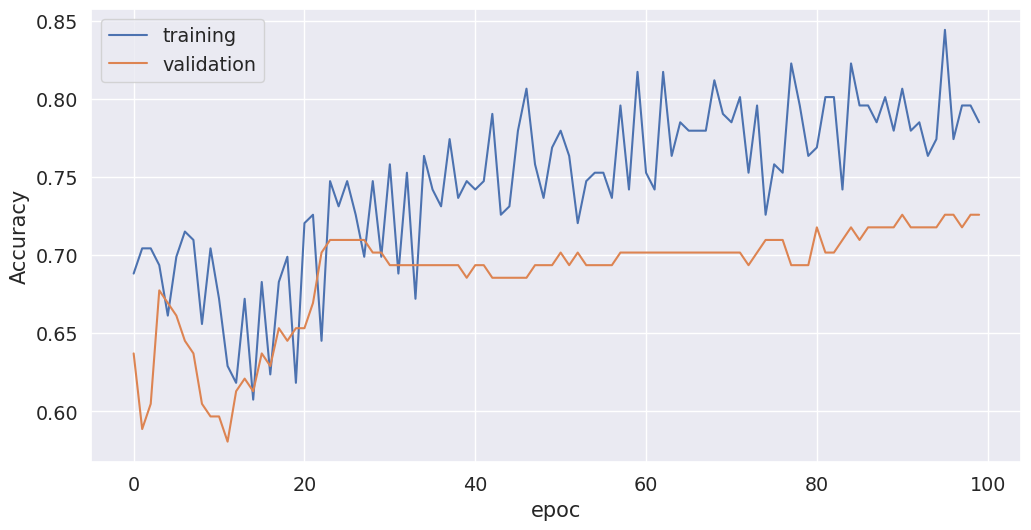

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0536 - accuracy: 0.5938

186/186 [==============================] - 0s 711us/step - loss: 2.0768 - accuracy: 0.5860 - val_loss: 1.0054 - val_accuracy: 0.5565


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1258 - accuracy: 0.5938

186/186 [==============================] - 0s 65us/step - loss: 1.8639 - accuracy: 0.6559 - val_loss: 0.9145 - val_accuracy: 0.6452


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 1.7482 - accuracy: 0.6882 - val_loss: 0.8614 - val_accuracy: 0.6694


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 1.6759 - accuracy: 0.6774 - val_loss: 0.8278 - val_accuracy: 0.6694


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2974 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 1.6182 - accuracy: 0.6882 - val_loss: 0.8038 - val_accuracy: 0.6774


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 1.5750 - accuracy: 0.6989 - val_loss: 0.7886 - val_accuracy: 0.6694


Epoch 7/1000


 32/186 [====>.........................] - ETA: 0s - loss: 5.3545 - accuracy: 0.6250

186/186 [==============================] - 0s 71us/step - loss: 1.5387 - accuracy: 0.6935 - val_loss: 0.7775 - val_accuracy: 0.6774


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.3799 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 1.5073 - accuracy: 0.7043 - val_loss: 0.7699 - val_accuracy: 0.6694


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.0317 - accuracy: 0.6875

186/186 [==============================] - 0s 80us/step - loss: 1.4806 - accuracy: 0.7097 - val_loss: 0.7651 - val_accuracy: 0.6694


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.9375 - accuracy: 0.6875

186/186 [==============================] - 0s 76us/step - loss: 1.4586 - accuracy: 0.7151 - val_loss: 0.7608 - val_accuracy: 0.6694


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5625

186/186 [==============================] - 0s 59us/step - loss: 1.4326 - accuracy: 0.7151 - val_loss: 0.7574 - val_accuracy: 0.6774


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.6901 - accuracy: 0.7188

186/186 [==============================] - 0s 69us/step - loss: 1.4126 - accuracy: 0.7097 - val_loss: 0.7543 - val_accuracy: 0.6774


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 1.3914 - accuracy: 0.7151 - val_loss: 0.7504 - val_accuracy: 0.6774


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4739 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 1.3747 - accuracy: 0.7151 - val_loss: 0.7469 - val_accuracy: 0.6774


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5668 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 1.3511 - accuracy: 0.7204 - val_loss: 0.7442 - val_accuracy: 0.6774


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4806 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 1.3320 - accuracy: 0.7204 - val_loss: 0.7417 - val_accuracy: 0.6855


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0620 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 1.3117 - accuracy: 0.7258 - val_loss: 0.7399 - val_accuracy: 0.6774


Epoch 18/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8650 - accuracy: 0.6562

186/186 [==============================] - 0s 64us/step - loss: 1.2931 - accuracy: 0.7258 - val_loss: 0.7382 - val_accuracy: 0.6774


Epoch 19/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.8125

186/186 [==============================] - 0s 82us/step - loss: 1.2784 - accuracy: 0.7258 - val_loss: 0.7363 - val_accuracy: 0.6694


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5416 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 1.2565 - accuracy: 0.7366 - val_loss: 0.7345 - val_accuracy: 0.6613


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 1.2445 - accuracy: 0.7366 - val_loss: 0.7327 - val_accuracy: 0.6613


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5652 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 1.2308 - accuracy: 0.7366 - val_loss: 0.7309 - val_accuracy: 0.6613


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 1.2118 - accuracy: 0.7312 - val_loss: 0.7293 - val_accuracy: 0.6613


Epoch 24/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4545 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 1.1962 - accuracy: 0.7366 - val_loss: 0.7270 - val_accuracy: 0.6613


Epoch 25/1000


 32/186 [====>.........................] - ETA: 0s - loss: 4.0357 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 1.1781 - accuracy: 0.7366 - val_loss: 0.7246 - val_accuracy: 0.6694


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 1.1677 - accuracy: 0.7258 - val_loss: 0.7222 - val_accuracy: 0.6694


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8148 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 1.1447 - accuracy: 0.7258 - val_loss: 0.7206 - val_accuracy: 0.6694


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7442 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 1.1295 - accuracy: 0.7312 - val_loss: 0.7187 - val_accuracy: 0.6694


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 1.1134 - accuracy: 0.7312 - val_loss: 0.7170 - val_accuracy: 0.6694


Epoch 30/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 1.0980 - accuracy: 0.7473 - val_loss: 0.7146 - val_accuracy: 0.6694


Epoch 31/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 1.0790 - accuracy: 0.7419 - val_loss: 0.7128 - val_accuracy: 0.6694


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6651 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 1.0635 - accuracy: 0.7366 - val_loss: 0.7105 - val_accuracy: 0.6694


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5916 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 1.0478 - accuracy: 0.7419 - val_loss: 0.7084 - val_accuracy: 0.6694


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4726 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 1.0346 - accuracy: 0.7258 - val_loss: 0.7071 - val_accuracy: 0.6694


Epoch 35/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7398 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 1.0175 - accuracy: 0.7312 - val_loss: 0.7055 - val_accuracy: 0.6694


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0650 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 1.0028 - accuracy: 0.7366 - val_loss: 0.7037 - val_accuracy: 0.6694


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5781 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.9890 - accuracy: 0.7366 - val_loss: 0.7019 - val_accuracy: 0.6694


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8089 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 0.9798 - accuracy: 0.7366 - val_loss: 0.7002 - val_accuracy: 0.6694


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.9685 - accuracy: 0.7312 - val_loss: 0.6987 - val_accuracy: 0.6694


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6322 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.9547 - accuracy: 0.7366 - val_loss: 0.6969 - val_accuracy: 0.6694


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.9426 - accuracy: 0.7366 - val_loss: 0.6953 - val_accuracy: 0.6694


Epoch 42/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.9369 - accuracy: 0.7419 - val_loss: 0.6933 - val_accuracy: 0.6694


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.9237 - accuracy: 0.7366 - val_loss: 0.6917 - val_accuracy: 0.6694


Epoch 44/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.8962 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.9131 - accuracy: 0.7366 - val_loss: 0.6901 - val_accuracy: 0.6694


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5508 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.9048 - accuracy: 0.7366 - val_loss: 0.6885 - val_accuracy: 0.6694


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6547 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.8929 - accuracy: 0.7366 - val_loss: 0.6869 - val_accuracy: 0.6694


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.8818 - accuracy: 0.7366 - val_loss: 0.6854 - val_accuracy: 0.6694


Epoch 48/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5683 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.8723 - accuracy: 0.7419 - val_loss: 0.6839 - val_accuracy: 0.6694


Epoch 49/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4403 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.8604 - accuracy: 0.7366 - val_loss: 0.6823 - val_accuracy: 0.6694


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7161 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 0.8531 - accuracy: 0.7366 - val_loss: 0.6805 - val_accuracy: 0.6694


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.8435 - accuracy: 0.7366 - val_loss: 0.6790 - val_accuracy: 0.6694


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.8324 - accuracy: 0.7419 - val_loss: 0.6773 - val_accuracy: 0.6694


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.8243 - accuracy: 0.7419 - val_loss: 0.6756 - val_accuracy: 0.6694


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.8136 - accuracy: 0.7366 - val_loss: 0.6740 - val_accuracy: 0.6694


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.8046 - accuracy: 0.7366 - val_loss: 0.6719 - val_accuracy: 0.6694


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.7939 - accuracy: 0.7419 - val_loss: 0.6699 - val_accuracy: 0.6694


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5633 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.7827 - accuracy: 0.7366 - val_loss: 0.6682 - val_accuracy: 0.6694


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.7734 - accuracy: 0.7366 - val_loss: 0.6664 - val_accuracy: 0.6694


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.7658 - accuracy: 0.7366 - val_loss: 0.6644 - val_accuracy: 0.6694


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.7542 - accuracy: 0.7419 - val_loss: 0.6624 - val_accuracy: 0.6774


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.7448 - accuracy: 0.7366 - val_loss: 0.6604 - val_accuracy: 0.6774


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0314 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7332 - accuracy: 0.7312 - val_loss: 0.6585 - val_accuracy: 0.6774


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7098 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.7259 - accuracy: 0.7366 - val_loss: 0.6565 - val_accuracy: 0.6694


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.7158 - accuracy: 0.7312 - val_loss: 0.6548 - val_accuracy: 0.6694


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6263 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.7068 - accuracy: 0.7312 - val_loss: 0.6534 - val_accuracy: 0.6774


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5611 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.6986 - accuracy: 0.7312 - val_loss: 0.6517 - val_accuracy: 0.6774


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5703 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.6889 - accuracy: 0.7366 - val_loss: 0.6497 - val_accuracy: 0.6774


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.6792 - accuracy: 0.7312 - val_loss: 0.6477 - val_accuracy: 0.6774


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6698 - accuracy: 0.7366 - val_loss: 0.6457 - val_accuracy: 0.6774


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6901 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6599 - accuracy: 0.7312 - val_loss: 0.6441 - val_accuracy: 0.6694


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4258 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6518 - accuracy: 0.7312 - val_loss: 0.6424 - val_accuracy: 0.6694


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5368 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.6404 - accuracy: 0.7312 - val_loss: 0.6410 - val_accuracy: 0.6694


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6076 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.6329 - accuracy: 0.7366 - val_loss: 0.6392 - val_accuracy: 0.6613


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.3672 - accuracy: 0.6250



186/186 [==============================] - 0s 75us/step - loss: 0.6241 - accuracy: 0.7312 - val_loss: 0.6382 - val_accuracy: 0.6694


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 0.6144 - accuracy: 0.7312 - val_loss: 0.6368 - val_accuracy: 0.6694


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6044 - accuracy: 0.7312 - val_loss: 0.6353 - val_accuracy: 0.6613


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.5949 - accuracy: 0.7312 - val_loss: 0.6337 - val_accuracy: 0.6613


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4993 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5878 - accuracy: 0.7312 - val_loss: 0.6323 - val_accuracy: 0.6613


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5769 - accuracy: 0.7312 - val_loss: 0.6308 - val_accuracy: 0.6613


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5171 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5684 - accuracy: 0.7258 - val_loss: 0.6295 - val_accuracy: 0.6613


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9534 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5597 - accuracy: 0.7258 - val_loss: 0.6281 - val_accuracy: 0.6613


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5519 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5515 - accuracy: 0.7258 - val_loss: 0.6265 - val_accuracy: 0.6613


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5412 - accuracy: 0.7258 - val_loss: 0.6250 - val_accuracy: 0.6613


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8964 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5334 - accuracy: 0.7258 - val_loss: 0.6235 - val_accuracy: 0.6613


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5237 - accuracy: 0.7258 - val_loss: 0.6216 - val_accuracy: 0.6613


Epoch 86/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7290 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.5146 - accuracy: 0.7312 - val_loss: 0.6200 - val_accuracy: 0.6532


Epoch 87/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5845 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5057 - accuracy: 0.7258 - val_loss: 0.6183 - val_accuracy: 0.6613


Epoch 88/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.8125



186/186 [==============================] - 0s 65us/step - loss: 0.4979 - accuracy: 0.7312 - val_loss: 0.6166 - val_accuracy: 0.6613


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4878 - accuracy: 0.7312 - val_loss: 0.6152 - val_accuracy: 0.6613


Epoch 90/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4796 - accuracy: 0.7312 - val_loss: 0.6136 - val_accuracy: 0.6613


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6504 - accuracy: 0.5312

186/186 [==============================] - 0s 56us/step - loss: 0.4697 - accuracy: 0.7258 - val_loss: 0.6125 - val_accuracy: 0.6694


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4623 - accuracy: 0.7366 - val_loss: 0.6116 - val_accuracy: 0.6613


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4565 - accuracy: 0.7312 - val_loss: 0.6108 - val_accuracy: 0.6613


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4542 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.4530 - accuracy: 0.7312 - val_loss: 0.6099 - val_accuracy: 0.6774


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4514 - accuracy: 0.7419 - val_loss: 0.6093 - val_accuracy: 0.6774


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7023 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.4498 - accuracy: 0.7312 - val_loss: 0.6089 - val_accuracy: 0.6774


Epoch 97/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.4484 - accuracy: 0.7366 - val_loss: 0.6073 - val_accuracy: 0.6935


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.4471 - accuracy: 0.7258 - val_loss: 0.6075 - val_accuracy: 0.7097


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4962 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.4457 - accuracy: 0.7473 - val_loss: 0.6059 - val_accuracy: 0.7097


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.4458 - accuracy: 0.7204 - val_loss: 0.6046 - val_accuracy: 0.7177


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4441 - accuracy: 0.7419 - val_loss: 0.6034 - val_accuracy: 0.7339


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5445 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.4427 - accuracy: 0.7473 - val_loss: 0.6011 - val_accuracy: 0.7339


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.4410 - accuracy: 0.7473 - val_loss: 0.5997 - val_accuracy: 0.7419


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4410 - accuracy: 0.7634 - val_loss: 0.5978 - val_accuracy: 0.7419


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4403 - accuracy: 0.7742 - val_loss: 0.5942 - val_accuracy: 0.7419


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4394 - accuracy: 0.7849 - val_loss: 0.5925 - val_accuracy: 0.7419


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4380 - accuracy: 0.7849 - val_loss: 0.5903 - val_accuracy: 0.7419


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2293 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4382 - accuracy: 0.7796 - val_loss: 0.5896 - val_accuracy: 0.7339


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4927 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.4367 - accuracy: 0.7796 - val_loss: 0.5893 - val_accuracy: 0.7258


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4353 - accuracy: 0.7849 - val_loss: 0.5867 - val_accuracy: 0.7339


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5666 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4369 - accuracy: 0.7849 - val_loss: 0.5864 - val_accuracy: 0.7339


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4340 - accuracy: 0.7849 - val_loss: 0.5852 - val_accuracy: 0.7339


Epoch 113/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4331 - accuracy: 0.7903 - val_loss: 0.5850 - val_accuracy: 0.7339


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4327 - accuracy: 0.7903 - val_loss: 0.5836 - val_accuracy: 0.7339


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4335 - accuracy: 0.7796 - val_loss: 0.5820 - val_accuracy: 0.7339


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4406 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4319 - accuracy: 0.7957 - val_loss: 0.5808 - val_accuracy: 0.7339


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4313 - accuracy: 0.7903 - val_loss: 0.5805 - val_accuracy: 0.7339


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4661 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4311 - accuracy: 0.7903 - val_loss: 0.5799 - val_accuracy: 0.7339


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4296 - accuracy: 0.8065 - val_loss: 0.5792 - val_accuracy: 0.7339


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4290 - accuracy: 0.7957 - val_loss: 0.5784 - val_accuracy: 0.7258


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4440 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4296 - accuracy: 0.7957 - val_loss: 0.5769 - val_accuracy: 0.7339


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4295 - accuracy: 0.7957 - val_loss: 0.5767 - val_accuracy: 0.7258


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4271 - accuracy: 0.8011 - val_loss: 0.5759 - val_accuracy: 0.7258


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4272 - accuracy: 0.7903 - val_loss: 0.5752 - val_accuracy: 0.7177


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4261 - accuracy: 0.7849 - val_loss: 0.5737 - val_accuracy: 0.7258


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4256 - accuracy: 0.7849 - val_loss: 0.5731 - val_accuracy: 0.7258


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4255 - accuracy: 0.7849 - val_loss: 0.5717 - val_accuracy: 0.7339


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4125 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4243 - accuracy: 0.7903 - val_loss: 0.5709 - val_accuracy: 0.7339


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4239 - accuracy: 0.7849 - val_loss: 0.5698 - val_accuracy: 0.7339


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4236 - accuracy: 0.8011 - val_loss: 0.5691 - val_accuracy: 0.7339


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.4228 - accuracy: 0.7957 - val_loss: 0.5686 - val_accuracy: 0.7339


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4228 - accuracy: 0.7903 - val_loss: 0.5681 - val_accuracy: 0.7258


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4214 - accuracy: 0.7957 - val_loss: 0.5669 - val_accuracy: 0.7339


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.4210 - accuracy: 0.7849 - val_loss: 0.5661 - val_accuracy: 0.7339


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4192 - accuracy: 0.7957 - val_loss: 0.5653 - val_accuracy: 0.7339


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4183 - accuracy: 0.8011 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4191 - accuracy: 0.7903 - val_loss: 0.5638 - val_accuracy: 0.7339


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3746 - accuracy: 0.7188

186/186 [==============================] - 0s 74us/step - loss: 0.4175 - accuracy: 0.7957 - val_loss: 0.5623 - val_accuracy: 0.7419


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4182 - accuracy: 0.8011 - val_loss: 0.5617 - val_accuracy: 0.7419


Epoch 140/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4164 - accuracy: 0.7957 - val_loss: 0.5607 - val_accuracy: 0.7419


Epoch 141/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8438



186/186 [==============================] - 0s 67us/step - loss: 0.4155 - accuracy: 0.8011 - val_loss: 0.5601 - val_accuracy: 0.7419


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.4145 - accuracy: 0.8011 - val_loss: 0.5601 - val_accuracy: 0.7419


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4149 - accuracy: 0.8011 - val_loss: 0.5589 - val_accuracy: 0.7419


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4121 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4147 - accuracy: 0.8011 - val_loss: 0.5585 - val_accuracy: 0.7419


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4142 - accuracy: 0.7903 - val_loss: 0.5577 - val_accuracy: 0.7419


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4130 - accuracy: 0.8011 - val_loss: 0.5576 - val_accuracy: 0.7419


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4136 - accuracy: 0.8011 - val_loss: 0.5575 - val_accuracy: 0.7419


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4117 - accuracy: 0.7903 - val_loss: 0.5564 - val_accuracy: 0.7419


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5861 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.4121 - accuracy: 0.7903 - val_loss: 0.5556 - val_accuracy: 0.7339


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4107 - accuracy: 0.7957 - val_loss: 0.5546 - val_accuracy: 0.7500


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438



186/186 [==============================] - 0s 76us/step - loss: 0.4123 - accuracy: 0.7903 - val_loss: 0.5550 - val_accuracy: 0.7419


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4102 - accuracy: 0.7903 - val_loss: 0.5543 - val_accuracy: 0.7500


Epoch 153/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4092 - accuracy: 0.7903 - val_loss: 0.5531 - val_accuracy: 0.7500


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5346 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.4090 - accuracy: 0.7903 - val_loss: 0.5524 - val_accuracy: 0.7419


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4070 - accuracy: 0.7957 - val_loss: 0.5520 - val_accuracy: 0.7419


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4074 - accuracy: 0.7849 - val_loss: 0.5518 - val_accuracy: 0.7419


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4055 - accuracy: 0.7957 - val_loss: 0.5506 - val_accuracy: 0.7419


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4053 - accuracy: 0.7903 - val_loss: 0.5494 - val_accuracy: 0.7339


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4054 - accuracy: 0.7849 - val_loss: 0.5482 - val_accuracy: 0.7339


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.4025 - accuracy: 0.7903 - val_loss: 0.5477 - val_accuracy: 0.7339


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.4015 - accuracy: 0.7957 - val_loss: 0.5471 - val_accuracy: 0.7339


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7371 - accuracy: 0.6250

186/186 [==============================] - 0s 67us/step - loss: 0.4028 - accuracy: 0.7849 - val_loss: 0.5460 - val_accuracy: 0.7339


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6875

186/186 [==============================] - 0s 69us/step - loss: 0.3998 - accuracy: 0.7903 - val_loss: 0.5450 - val_accuracy: 0.7339


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3996 - accuracy: 0.7957 - val_loss: 0.5444 - val_accuracy: 0.7339


Epoch 165/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3996 - accuracy: 0.7957 - val_loss: 0.5443 - val_accuracy: 0.7339


Epoch 166/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3987 - accuracy: 0.7957 - val_loss: 0.5433 - val_accuracy: 0.7339


Epoch 167/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5555 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3998 - accuracy: 0.7903 - val_loss: 0.5431 - val_accuracy: 0.7339


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3975 - accuracy: 0.7903 - val_loss: 0.5421 - val_accuracy: 0.7339


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3982 - accuracy: 0.7957 - val_loss: 0.5414 - val_accuracy: 0.7339


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4024 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3965 - accuracy: 0.7903 - val_loss: 0.5402 - val_accuracy: 0.7339


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4914 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3968 - accuracy: 0.8011 - val_loss: 0.5401 - val_accuracy: 0.7339


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3964 - accuracy: 0.7957 - val_loss: 0.5398 - val_accuracy: 0.7339


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3845 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3958 - accuracy: 0.7957 - val_loss: 0.5386 - val_accuracy: 0.7339


Epoch 174/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.7812

186/186 [==============================] - 0s 96us/step - loss: 0.3960 - accuracy: 0.7903 - val_loss: 0.5378 - val_accuracy: 0.7339


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3950 - accuracy: 0.7903 - val_loss: 0.5365 - val_accuracy: 0.7339


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3950 - accuracy: 0.8011 - val_loss: 0.5363 - val_accuracy: 0.7339


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3954 - accuracy: 0.7903 - val_loss: 0.5352 - val_accuracy: 0.7339


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3936 - accuracy: 0.8011 - val_loss: 0.5351 - val_accuracy: 0.7339


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3927 - accuracy: 0.8011 - val_loss: 0.5352 - val_accuracy: 0.7339


Epoch 180/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 0.3929 - accuracy: 0.8011 - val_loss: 0.5345 - val_accuracy: 0.7339


Epoch 181/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3937 - accuracy: 0.7957 - val_loss: 0.5344 - val_accuracy: 0.7339


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3921 - accuracy: 0.7903 - val_loss: 0.5333 - val_accuracy: 0.7339


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3925 - accuracy: 0.7957 - val_loss: 0.5331 - val_accuracy: 0.7339


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3909 - accuracy: 0.7903 - val_loss: 0.5323 - val_accuracy: 0.7339


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3910 - accuracy: 0.7903 - val_loss: 0.5317 - val_accuracy: 0.7419


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3905 - accuracy: 0.8011 - val_loss: 0.5309 - val_accuracy: 0.7419


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3907 - accuracy: 0.8011 - val_loss: 0.5305 - val_accuracy: 0.7419


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4919 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3902 - accuracy: 0.8011 - val_loss: 0.5304 - val_accuracy: 0.7419


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3903 - accuracy: 0.8011 - val_loss: 0.5299 - val_accuracy: 0.7419


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3893 - accuracy: 0.8011 - val_loss: 0.5302 - val_accuracy: 0.7419


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3893 - accuracy: 0.8118 - val_loss: 0.5304 - val_accuracy: 0.7419


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3879 - accuracy: 0.7957 - val_loss: 0.5301 - val_accuracy: 0.7419


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4972 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.3892 - accuracy: 0.7957 - val_loss: 0.5301 - val_accuracy: 0.7419


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3884 - accuracy: 0.7957 - val_loss: 0.5298 - val_accuracy: 0.7419


Epoch 195/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4853 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3882 - accuracy: 0.7957 - val_loss: 0.5300 - val_accuracy: 0.7419


Epoch 196/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3884 - accuracy: 0.8011 - val_loss: 0.5296 - val_accuracy: 0.7419


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3887 - accuracy: 0.8118 - val_loss: 0.5294 - val_accuracy: 0.7419


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3861 - accuracy: 0.7957 - val_loss: 0.5292 - val_accuracy: 0.7419


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3858 - accuracy: 0.8011 - val_loss: 0.5288 - val_accuracy: 0.7419


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3863 - accuracy: 0.7957 - val_loss: 0.5279 - val_accuracy: 0.7419


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3865 - accuracy: 0.8011 - val_loss: 0.5276 - val_accuracy: 0.7419


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.8750

186/186 [==============================] - 0s 74us/step - loss: 0.3868 - accuracy: 0.7957 - val_loss: 0.5268 - val_accuracy: 0.7419


Epoch 203/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3853 - accuracy: 0.8011 - val_loss: 0.5270 - val_accuracy: 0.7419


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3850 - accuracy: 0.8065 - val_loss: 0.5269 - val_accuracy: 0.7419


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3849 - accuracy: 0.8118 - val_loss: 0.5272 - val_accuracy: 0.7339


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3847 - accuracy: 0.8065 - val_loss: 0.5260 - val_accuracy: 0.7419


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3838 - accuracy: 0.8118 - val_loss: 0.5260 - val_accuracy: 0.7419


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3847 - accuracy: 0.8118 - val_loss: 0.5257 - val_accuracy: 0.7339


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3836 - accuracy: 0.8065 - val_loss: 0.5257 - val_accuracy: 0.7339


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3833 - accuracy: 0.8011 - val_loss: 0.5249 - val_accuracy: 0.7339


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3828 - accuracy: 0.8011 - val_loss: 0.5240 - val_accuracy: 0.7339


Epoch 212/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.3850 - accuracy: 0.7957 - val_loss: 0.5234 - val_accuracy: 0.7419


Epoch 213/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3820 - accuracy: 0.8118 - val_loss: 0.5235 - val_accuracy: 0.7419


Epoch 214/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3825 - accuracy: 0.8065 - val_loss: 0.5228 - val_accuracy: 0.7419


Epoch 215/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3820 - accuracy: 0.8065 - val_loss: 0.5223 - val_accuracy: 0.7419


Epoch 216/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3819 - accuracy: 0.8118 - val_loss: 0.5219 - val_accuracy: 0.7419


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4499 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3809 - accuracy: 0.8065 - val_loss: 0.5217 - val_accuracy: 0.7419


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3819 - accuracy: 0.8118 - val_loss: 0.5215 - val_accuracy: 0.7419


Epoch 219/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3808 - accuracy: 0.8118 - val_loss: 0.5214 - val_accuracy: 0.7339


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3813 - accuracy: 0.8065 - val_loss: 0.5207 - val_accuracy: 0.7419


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.3808 - accuracy: 0.8011 - val_loss: 0.5201 - val_accuracy: 0.7339


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3799 - accuracy: 0.8065 - val_loss: 0.5196 - val_accuracy: 0.7419


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3798 - accuracy: 0.8172 - val_loss: 0.5198 - val_accuracy: 0.7339


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3806 - accuracy: 0.8118 - val_loss: 0.5197 - val_accuracy: 0.7339


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2098 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3813 - accuracy: 0.8065 - val_loss: 0.5197 - val_accuracy: 0.7339


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5188 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3800 - accuracy: 0.8065 - val_loss: 0.5195 - val_accuracy: 0.7339


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3791 - accuracy: 0.8065 - val_loss: 0.5187 - val_accuracy: 0.7339


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3788 - accuracy: 0.8118 - val_loss: 0.5184 - val_accuracy: 0.7339


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3796 - accuracy: 0.8065 - val_loss: 0.5186 - val_accuracy: 0.7339


Epoch 230/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.3783 - accuracy: 0.8118 - val_loss: 0.5184 - val_accuracy: 0.7339


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3782 - accuracy: 0.8118 - val_loss: 0.5177 - val_accuracy: 0.7339


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3785 - accuracy: 0.8118 - val_loss: 0.5173 - val_accuracy: 0.7419


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3770 - accuracy: 0.8065 - val_loss: 0.5172 - val_accuracy: 0.7419


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2672 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3789 - accuracy: 0.8118 - val_loss: 0.5168 - val_accuracy: 0.7419


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3770 - accuracy: 0.8118 - val_loss: 0.5165 - val_accuracy: 0.7419


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3776 - accuracy: 0.8172 - val_loss: 0.5163 - val_accuracy: 0.7419


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3771 - accuracy: 0.8172 - val_loss: 0.5162 - val_accuracy: 0.7419


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3777 - accuracy: 0.8065 - val_loss: 0.5160 - val_accuracy: 0.7419


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3992 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3768 - accuracy: 0.8118 - val_loss: 0.5160 - val_accuracy: 0.7419


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3764 - accuracy: 0.8172 - val_loss: 0.5153 - val_accuracy: 0.7500


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2335 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3770 - accuracy: 0.8118 - val_loss: 0.5145 - val_accuracy: 0.7500


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3759 - accuracy: 0.8172 - val_loss: 0.5137 - val_accuracy: 0.7419


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.3764 - accuracy: 0.8118 - val_loss: 0.5137 - val_accuracy: 0.7500


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4244 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.3748 - accuracy: 0.8172 - val_loss: 0.5139 - val_accuracy: 0.7500


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3755 - accuracy: 0.8118 - val_loss: 0.5127 - val_accuracy: 0.7500


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3753 - accuracy: 0.8118 - val_loss: 0.5123 - val_accuracy: 0.7500


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3756 - accuracy: 0.8011 - val_loss: 0.5123 - val_accuracy: 0.7419


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3740 - accuracy: 0.8118 - val_loss: 0.5117 - val_accuracy: 0.7500


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3750 - accuracy: 0.8118 - val_loss: 0.5116 - val_accuracy: 0.7419


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4024 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3746 - accuracy: 0.8172 - val_loss: 0.5118 - val_accuracy: 0.7419


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3749 - accuracy: 0.8172 - val_loss: 0.5113 - val_accuracy: 0.7500


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4912 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3744 - accuracy: 0.8118 - val_loss: 0.5113 - val_accuracy: 0.7419


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3733 - accuracy: 0.8118 - val_loss: 0.5114 - val_accuracy: 0.7419


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3734 - accuracy: 0.8065 - val_loss: 0.5105 - val_accuracy: 0.7500


Epoch 255/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3731 - accuracy: 0.8172 - val_loss: 0.5099 - val_accuracy: 0.7500


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3732 - accuracy: 0.8172 - val_loss: 0.5097 - val_accuracy: 0.7419


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3731 - accuracy: 0.8118 - val_loss: 0.5095 - val_accuracy: 0.7419


Epoch 258/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3727 - accuracy: 0.8172 - val_loss: 0.5090 - val_accuracy: 0.7419


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3726 - accuracy: 0.8118 - val_loss: 0.5085 - val_accuracy: 0.7419


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.3723 - accuracy: 0.8118 - val_loss: 0.5080 - val_accuracy: 0.7500


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3725 - accuracy: 0.8172 - val_loss: 0.5076 - val_accuracy: 0.7419


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4738 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3722 - accuracy: 0.8172 - val_loss: 0.5073 - val_accuracy: 0.7500


Epoch 263/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3714 - accuracy: 0.8172 - val_loss: 0.5072 - val_accuracy: 0.7419


Epoch 264/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3716 - accuracy: 0.8226 - val_loss: 0.5069 - val_accuracy: 0.7419


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3719 - accuracy: 0.8118 - val_loss: 0.5065 - val_accuracy: 0.7419


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3709 - accuracy: 0.8118 - val_loss: 0.5059 - val_accuracy: 0.7419


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3714 - accuracy: 0.8118 - val_loss: 0.5053 - val_accuracy: 0.7419


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.7500



186/186 [==============================] - 0s 55us/step - loss: 0.3708 - accuracy: 0.8172 - val_loss: 0.5050 - val_accuracy: 0.7419


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3710 - accuracy: 0.8172 - val_loss: 0.5053 - val_accuracy: 0.7419


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3707 - accuracy: 0.8172 - val_loss: 0.5053 - val_accuracy: 0.7419


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3693 - accuracy: 0.8172 - val_loss: 0.5055 - val_accuracy: 0.7419


Epoch 272/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3714 - accuracy: 0.8172 - val_loss: 0.5051 - val_accuracy: 0.7419


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3698 - accuracy: 0.8172 - val_loss: 0.5050 - val_accuracy: 0.7419


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3696 - accuracy: 0.8172 - val_loss: 0.5049 - val_accuracy: 0.7500


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3696 - accuracy: 0.8172 - val_loss: 0.5047 - val_accuracy: 0.7419


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6130 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.3691 - accuracy: 0.8172 - val_loss: 0.5045 - val_accuracy: 0.7419


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3701 - accuracy: 0.8172 - val_loss: 0.5041 - val_accuracy: 0.7419


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3691 - accuracy: 0.8172 - val_loss: 0.5041 - val_accuracy: 0.7419


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3694 - accuracy: 0.8118 - val_loss: 0.5036 - val_accuracy: 0.7419


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3697 - accuracy: 0.8172 - val_loss: 0.5031 - val_accuracy: 0.7419


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3679 - accuracy: 0.8172 - val_loss: 0.5034 - val_accuracy: 0.7419


Epoch 282/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.9375



186/186 [==============================] - 0s 61us/step - loss: 0.3691 - accuracy: 0.8226 - val_loss: 0.5024 - val_accuracy: 0.7419


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3680 - accuracy: 0.8118 - val_loss: 0.5022 - val_accuracy: 0.7419


Epoch 284/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3683 - accuracy: 0.8226 - val_loss: 0.5020 - val_accuracy: 0.7419


Epoch 285/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3845 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3684 - accuracy: 0.8172 - val_loss: 0.5019 - val_accuracy: 0.7419


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3686 - accuracy: 0.8226 - val_loss: 0.5018 - val_accuracy: 0.7419


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3670 - accuracy: 0.8118 - val_loss: 0.5014 - val_accuracy: 0.7419


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3679 - accuracy: 0.8172 - val_loss: 0.5014 - val_accuracy: 0.7419


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3672 - accuracy: 0.8226 - val_loss: 0.5012 - val_accuracy: 0.7419


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3676 - accuracy: 0.8172 - val_loss: 0.5009 - val_accuracy: 0.7419


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3669 - accuracy: 0.8118 - val_loss: 0.5005 - val_accuracy: 0.7419


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3673 - accuracy: 0.8172 - val_loss: 0.5005 - val_accuracy: 0.7419


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3669 - accuracy: 0.8118 - val_loss: 0.5002 - val_accuracy: 0.7419


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1944 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3665 - accuracy: 0.8172 - val_loss: 0.4998 - val_accuracy: 0.7419


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3654 - accuracy: 0.8226 - val_loss: 0.4999 - val_accuracy: 0.7419


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3656 - accuracy: 0.8226 - val_loss: 0.5001 - val_accuracy: 0.7419


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3684 - accuracy: 0.8226 - val_loss: 0.5001 - val_accuracy: 0.7419


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3654 - accuracy: 0.8226 - val_loss: 0.5000 - val_accuracy: 0.7419


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3655 - accuracy: 0.8226 - val_loss: 0.4989 - val_accuracy: 0.7419


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3666 - accuracy: 0.8226 - val_loss: 0.4981 - val_accuracy: 0.7500


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3660 - accuracy: 0.8280 - val_loss: 0.4980 - val_accuracy: 0.7500


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3651 - accuracy: 0.8226 - val_loss: 0.4978 - val_accuracy: 0.7500


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.3642 - accuracy: 0.8333 - val_loss: 0.4984 - val_accuracy: 0.7500


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3654 - accuracy: 0.8226 - val_loss: 0.4980 - val_accuracy: 0.7419


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3644 - accuracy: 0.8226 - val_loss: 0.4981 - val_accuracy: 0.7500


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3646 - accuracy: 0.8172 - val_loss: 0.4985 - val_accuracy: 0.7581


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3643 - accuracy: 0.8280 - val_loss: 0.4982 - val_accuracy: 0.7500


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4711 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3638 - accuracy: 0.8226 - val_loss: 0.4974 - val_accuracy: 0.7581


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3648 - accuracy: 0.8226 - val_loss: 0.4972 - val_accuracy: 0.7581


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3027 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3649 - accuracy: 0.8280 - val_loss: 0.4966 - val_accuracy: 0.7500


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3632 - accuracy: 0.8280 - val_loss: 0.4963 - val_accuracy: 0.7661


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5651 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3644 - accuracy: 0.8226 - val_loss: 0.4964 - val_accuracy: 0.7581


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5195 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3632 - accuracy: 0.8280 - val_loss: 0.4959 - val_accuracy: 0.7500


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.4955 - val_accuracy: 0.7500


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3651 - accuracy: 0.8226 - val_loss: 0.4950 - val_accuracy: 0.7500


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1823 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3634 - accuracy: 0.8226 - val_loss: 0.4949 - val_accuracy: 0.7500


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3632 - accuracy: 0.8226 - val_loss: 0.4947 - val_accuracy: 0.7500


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4069 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3625 - accuracy: 0.8280 - val_loss: 0.4946 - val_accuracy: 0.7500


Epoch 319/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3624 - accuracy: 0.8226 - val_loss: 0.4952 - val_accuracy: 0.7581


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3623 - accuracy: 0.8333 - val_loss: 0.4945 - val_accuracy: 0.7581


Epoch 321/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3624 - accuracy: 0.8172 - val_loss: 0.4947 - val_accuracy: 0.7661


Epoch 322/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2672 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3634 - accuracy: 0.8280 - val_loss: 0.4939 - val_accuracy: 0.7661


Epoch 323/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2460 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3615 - accuracy: 0.8226 - val_loss: 0.4935 - val_accuracy: 0.7581


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5296 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.3625 - accuracy: 0.8280 - val_loss: 0.4933 - val_accuracy: 0.7661


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3629 - accuracy: 0.8172 - val_loss: 0.4935 - val_accuracy: 0.7661


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.3618 - accuracy: 0.8226 - val_loss: 0.4939 - val_accuracy: 0.7661


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3614 - accuracy: 0.8280 - val_loss: 0.4929 - val_accuracy: 0.7581


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3611 - accuracy: 0.8226 - val_loss: 0.4925 - val_accuracy: 0.7581


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.8750

186/186 [==============================] - 0s 87us/step - loss: 0.3610 - accuracy: 0.8333 - val_loss: 0.4927 - val_accuracy: 0.7661


Epoch 330/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.3613 - accuracy: 0.8226 - val_loss: 0.4930 - val_accuracy: 0.7661


Epoch 331/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.7812

186/186 [==============================] - 0s 72us/step - loss: 0.3607 - accuracy: 0.8280 - val_loss: 0.4932 - val_accuracy: 0.7581


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.3613 - accuracy: 0.8333 - val_loss: 0.4935 - val_accuracy: 0.7661


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3617 - accuracy: 0.8226 - val_loss: 0.4932 - val_accuracy: 0.7661


Epoch 334/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3612 - accuracy: 0.8226 - val_loss: 0.4929 - val_accuracy: 0.7661


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3612 - accuracy: 0.8280 - val_loss: 0.4927 - val_accuracy: 0.7661


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4557 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.3605 - accuracy: 0.8226 - val_loss: 0.4925 - val_accuracy: 0.7661


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3605 - accuracy: 0.8226 - val_loss: 0.4920 - val_accuracy: 0.7581


Epoch 338/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1875 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3595 - accuracy: 0.8280 - val_loss: 0.4919 - val_accuracy: 0.7581


Epoch 339/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4553 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.3593 - accuracy: 0.8226 - val_loss: 0.4923 - val_accuracy: 0.7661


Epoch 340/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5566 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.3610 - accuracy: 0.8226 - val_loss: 0.4927 - val_accuracy: 0.7581


Epoch 341/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3597 - accuracy: 0.8280 - val_loss: 0.4926 - val_accuracy: 0.7661


Epoch 342/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3597 - accuracy: 0.8333 - val_loss: 0.4923 - val_accuracy: 0.7581


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3591 - accuracy: 0.8280 - val_loss: 0.4928 - val_accuracy: 0.7581


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3589 - accuracy: 0.8280 - val_loss: 0.4928 - val_accuracy: 0.7500


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3589 - accuracy: 0.8333 - val_loss: 0.4918 - val_accuracy: 0.7581


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3584 - accuracy: 0.8280 - val_loss: 0.4915 - val_accuracy: 0.7581


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3584 - accuracy: 0.8333 - val_loss: 0.4909 - val_accuracy: 0.7661


Epoch 348/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3594 - accuracy: 0.8172 - val_loss: 0.4908 - val_accuracy: 0.7661


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3583 - accuracy: 0.8280 - val_loss: 0.4901 - val_accuracy: 0.7581


Epoch 350/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.3583 - accuracy: 0.8280 - val_loss: 0.4908 - val_accuracy: 0.7581


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3580 - accuracy: 0.8333 - val_loss: 0.4903 - val_accuracy: 0.7661


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3577 - accuracy: 0.8280 - val_loss: 0.4903 - val_accuracy: 0.7581


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3573 - accuracy: 0.8280 - val_loss: 0.4906 - val_accuracy: 0.7581


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3580 - accuracy: 0.8280 - val_loss: 0.4903 - val_accuracy: 0.7581


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4810 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3573 - accuracy: 0.8226 - val_loss: 0.4904 - val_accuracy: 0.7581


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3571 - accuracy: 0.8333 - val_loss: 0.4899 - val_accuracy: 0.7581


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3571 - accuracy: 0.8280 - val_loss: 0.4895 - val_accuracy: 0.7581


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3564 - accuracy: 0.8226 - val_loss: 0.4894 - val_accuracy: 0.7581


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.3572 - accuracy: 0.8280 - val_loss: 0.4883 - val_accuracy: 0.7581


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3038 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3570 - accuracy: 0.8280 - val_loss: 0.4880 - val_accuracy: 0.7661


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1801 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3563 - accuracy: 0.8280 - val_loss: 0.4876 - val_accuracy: 0.7581


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3574 - accuracy: 0.8226 - val_loss: 0.4876 - val_accuracy: 0.7581


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3556 - accuracy: 0.8226 - val_loss: 0.4872 - val_accuracy: 0.7581


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3560 - accuracy: 0.8172 - val_loss: 0.4875 - val_accuracy: 0.7581


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.7188

186/186 [==============================] - 0s 86us/step - loss: 0.3559 - accuracy: 0.8280 - val_loss: 0.4881 - val_accuracy: 0.7500


Epoch 366/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8125



186/186 [==============================] - 0s 72us/step - loss: 0.3551 - accuracy: 0.8333 - val_loss: 0.4874 - val_accuracy: 0.7581


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4024 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3548 - accuracy: 0.8333 - val_loss: 0.4873 - val_accuracy: 0.7581


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3548 - accuracy: 0.8226 - val_loss: 0.4875 - val_accuracy: 0.7581


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3543 - accuracy: 0.8280 - val_loss: 0.4873 - val_accuracy: 0.7581


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.3548 - accuracy: 0.8333 - val_loss: 0.4861 - val_accuracy: 0.7581


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3547 - accuracy: 0.8280 - val_loss: 0.4865 - val_accuracy: 0.7581


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3545 - accuracy: 0.8280 - val_loss: 0.4866 - val_accuracy: 0.7500


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4648 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3541 - accuracy: 0.8333 - val_loss: 0.4854 - val_accuracy: 0.7581


Epoch 374/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5750 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3539 - accuracy: 0.8333 - val_loss: 0.4849 - val_accuracy: 0.7581


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4235 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3548 - accuracy: 0.8280 - val_loss: 0.4850 - val_accuracy: 0.7581


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3537 - accuracy: 0.8280 - val_loss: 0.4850 - val_accuracy: 0.7581


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3532 - accuracy: 0.8280 - val_loss: 0.4848 - val_accuracy: 0.7581


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3534 - accuracy: 0.8226 - val_loss: 0.4849 - val_accuracy: 0.7500


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 0.4850 - val_accuracy: 0.7500


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3536 - accuracy: 0.8226 - val_loss: 0.4846 - val_accuracy: 0.7500


Epoch 381/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3539 - accuracy: 0.8280 - val_loss: 0.4848 - val_accuracy: 0.7500


Epoch 382/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8125

186/186 [==============================] - 0s 112us/step - loss: 0.3536 - accuracy: 0.8280 - val_loss: 0.4841 - val_accuracy: 0.7500


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3521 - accuracy: 0.8280 - val_loss: 0.4836 - val_accuracy: 0.7500


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3526 - accuracy: 0.8280 - val_loss: 0.4833 - val_accuracy: 0.7500


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3530 - accuracy: 0.8280 - val_loss: 0.4836 - val_accuracy: 0.7500


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3518 - accuracy: 0.8226 - val_loss: 0.4837 - val_accuracy: 0.7500


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3525 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7500


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3705 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3532 - accuracy: 0.8333 - val_loss: 0.4823 - val_accuracy: 0.7500


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4371 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3514 - accuracy: 0.8333 - val_loss: 0.4814 - val_accuracy: 0.7581


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3522 - accuracy: 0.8226 - val_loss: 0.4816 - val_accuracy: 0.7500


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3507 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7500


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3514 - accuracy: 0.8226 - val_loss: 0.4817 - val_accuracy: 0.7500


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3517 - accuracy: 0.8280 - val_loss: 0.4822 - val_accuracy: 0.7500


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3516 - accuracy: 0.8333 - val_loss: 0.4823 - val_accuracy: 0.7419


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3520 - accuracy: 0.8280 - val_loss: 0.4812 - val_accuracy: 0.7500


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3502 - accuracy: 0.8280 - val_loss: 0.4802 - val_accuracy: 0.7500


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5524 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3503 - accuracy: 0.8226 - val_loss: 0.4799 - val_accuracy: 0.7500


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3500 - accuracy: 0.8333 - val_loss: 0.4797 - val_accuracy: 0.7500


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3518 - accuracy: 0.8280 - val_loss: 0.4791 - val_accuracy: 0.7500


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3500 - accuracy: 0.8226 - val_loss: 0.4793 - val_accuracy: 0.7500


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3508 - accuracy: 0.8280 - val_loss: 0.4793 - val_accuracy: 0.7500


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3515 - accuracy: 0.8333 - val_loss: 0.4789 - val_accuracy: 0.7500


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3493 - accuracy: 0.8333 - val_loss: 0.4792 - val_accuracy: 0.7419


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4784 - val_accuracy: 0.7500


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3486 - accuracy: 0.8333 - val_loss: 0.4783 - val_accuracy: 0.7500


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3486 - accuracy: 0.8333 - val_loss: 0.4771 - val_accuracy: 0.7500


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4271 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3494 - accuracy: 0.8280 - val_loss: 0.4769 - val_accuracy: 0.7500


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4353 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3498 - accuracy: 0.8333 - val_loss: 0.4771 - val_accuracy: 0.7500


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 0.3492 - accuracy: 0.8280 - val_loss: 0.4766 - val_accuracy: 0.7500


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3491 - accuracy: 0.8333 - val_loss: 0.4759 - val_accuracy: 0.7500


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4754 - val_accuracy: 0.7581


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4645 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.4753 - val_accuracy: 0.7581


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 0.3481 - accuracy: 0.8387 - val_loss: 0.4761 - val_accuracy: 0.7500


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3483 - accuracy: 0.8280 - val_loss: 0.4752 - val_accuracy: 0.7581


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3489 - accuracy: 0.8280 - val_loss: 0.4750 - val_accuracy: 0.7500


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3481 - accuracy: 0.8333 - val_loss: 0.4751 - val_accuracy: 0.7419


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3484 - accuracy: 0.8280 - val_loss: 0.4756 - val_accuracy: 0.7419


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3480 - accuracy: 0.8280 - val_loss: 0.4752 - val_accuracy: 0.7419


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3479 - accuracy: 0.8280 - val_loss: 0.4752 - val_accuracy: 0.7419


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3489 - accuracy: 0.8333 - val_loss: 0.4749 - val_accuracy: 0.7419


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1632 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4746 - val_accuracy: 0.7419


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3473 - accuracy: 0.8280 - val_loss: 0.4742 - val_accuracy: 0.7419


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3486 - accuracy: 0.8280 - val_loss: 0.4734 - val_accuracy: 0.7419


Epoch 424/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3475 - accuracy: 0.8333 - val_loss: 0.4737 - val_accuracy: 0.7419


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4731 - val_accuracy: 0.7419


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3480 - accuracy: 0.8333 - val_loss: 0.4732 - val_accuracy: 0.7419


Epoch 427/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3464 - accuracy: 0.8280 - val_loss: 0.4731 - val_accuracy: 0.7419


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3467 - accuracy: 0.8333 - val_loss: 0.4731 - val_accuracy: 0.7419


Epoch 429/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3469 - accuracy: 0.8226 - val_loss: 0.4726 - val_accuracy: 0.7419


Epoch 430/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3474 - accuracy: 0.8333 - val_loss: 0.4727 - val_accuracy: 0.7419


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3459 - accuracy: 0.8333 - val_loss: 0.4725 - val_accuracy: 0.7419


Epoch 432/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3459 - accuracy: 0.8333 - val_loss: 0.4720 - val_accuracy: 0.7419


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4713 - val_accuracy: 0.7419


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3462 - accuracy: 0.8333 - val_loss: 0.4710 - val_accuracy: 0.7419


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3466 - accuracy: 0.8333 - val_loss: 0.4711 - val_accuracy: 0.7419


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3461 - accuracy: 0.8226 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3454 - accuracy: 0.8333 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3456 - accuracy: 0.8333 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3466 - accuracy: 0.8280 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4706 - val_accuracy: 0.7419


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3462 - accuracy: 0.8333 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3453 - accuracy: 0.8387 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4695 - val_accuracy: 0.7419


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4753 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3452 - accuracy: 0.8387 - val_loss: 0.4688 - val_accuracy: 0.7419


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3447 - accuracy: 0.8333 - val_loss: 0.4694 - val_accuracy: 0.7419


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3445 - accuracy: 0.8333 - val_loss: 0.4687 - val_accuracy: 0.7419


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3452 - accuracy: 0.8333 - val_loss: 0.4681 - val_accuracy: 0.7419


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.7812

186/186 [==============================] - 0s 72us/step - loss: 0.3448 - accuracy: 0.8333 - val_loss: 0.4684 - val_accuracy: 0.7419


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.3440 - accuracy: 0.8333 - val_loss: 0.4682 - val_accuracy: 0.7419


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3444 - accuracy: 0.8333 - val_loss: 0.4671 - val_accuracy: 0.7419


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4681 - val_accuracy: 0.7419


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7812

186/186 [==============================] - 0s 77us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4672 - val_accuracy: 0.7419


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4673 - val_accuracy: 0.7419


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3432 - accuracy: 0.8333 - val_loss: 0.4675 - val_accuracy: 0.7419


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3442 - accuracy: 0.8280 - val_loss: 0.4671 - val_accuracy: 0.7419


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3431 - accuracy: 0.8387 - val_loss: 0.4662 - val_accuracy: 0.7419


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3428 - accuracy: 0.8333 - val_loss: 0.4665 - val_accuracy: 0.7419


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3426 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.7419


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3440 - accuracy: 0.8441 - val_loss: 0.4662 - val_accuracy: 0.7419


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3425 - accuracy: 0.8333 - val_loss: 0.4653 - val_accuracy: 0.7419


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4139 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.4660 - val_accuracy: 0.7419


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3420 - accuracy: 0.8280 - val_loss: 0.4649 - val_accuracy: 0.7419


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4339 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3429 - accuracy: 0.8333 - val_loss: 0.4649 - val_accuracy: 0.7419


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3429 - accuracy: 0.8333 - val_loss: 0.4652 - val_accuracy: 0.7419


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4649 - val_accuracy: 0.7419


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3415 - accuracy: 0.8333 - val_loss: 0.4637 - val_accuracy: 0.7419


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4631 - val_accuracy: 0.7500


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3424 - accuracy: 0.8441 - val_loss: 0.4635 - val_accuracy: 0.7419


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4636 - val_accuracy: 0.7500


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3419 - accuracy: 0.8387 - val_loss: 0.4632 - val_accuracy: 0.7500


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4632 - val_accuracy: 0.7419


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3415 - accuracy: 0.8495 - val_loss: 0.4641 - val_accuracy: 0.7419


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4579 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3412 - accuracy: 0.8280 - val_loss: 0.4630 - val_accuracy: 0.7419


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3415 - accuracy: 0.8280 - val_loss: 0.4628 - val_accuracy: 0.7500


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4629 - val_accuracy: 0.7419


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3420 - accuracy: 0.8387 - val_loss: 0.4627 - val_accuracy: 0.7500


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3415 - accuracy: 0.8387 - val_loss: 0.4623 - val_accuracy: 0.7500


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3407 - accuracy: 0.8387 - val_loss: 0.4623 - val_accuracy: 0.7500


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4619 - val_accuracy: 0.7500


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1666 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3412 - accuracy: 0.8387 - val_loss: 0.4612 - val_accuracy: 0.7500


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3405 - accuracy: 0.8333 - val_loss: 0.4616 - val_accuracy: 0.7500


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4612 - val_accuracy: 0.7500


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3397 - accuracy: 0.8333 - val_loss: 0.4610 - val_accuracy: 0.7500


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3397 - accuracy: 0.8387 - val_loss: 0.4601 - val_accuracy: 0.7500


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3394 - accuracy: 0.8387 - val_loss: 0.4600 - val_accuracy: 0.7500


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3404 - accuracy: 0.8387 - val_loss: 0.4603 - val_accuracy: 0.7500


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.4596 - val_accuracy: 0.7500


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8750

186/186 [==============================] - 0s 82us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4602 - val_accuracy: 0.7500


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9688

186/186 [==============================] - 0s 65us/step - loss: 0.3389 - accuracy: 0.8387 - val_loss: 0.4594 - val_accuracy: 0.7500


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6875

186/186 [==============================] - 0s 68us/step - loss: 0.3399 - accuracy: 0.8280 - val_loss: 0.4596 - val_accuracy: 0.7500


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3393 - accuracy: 0.8441 - val_loss: 0.4593 - val_accuracy: 0.7500


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3384 - accuracy: 0.8333 - val_loss: 0.4593 - val_accuracy: 0.7500


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3393 - accuracy: 0.8333 - val_loss: 0.4588 - val_accuracy: 0.7500


Epoch 494/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3392 - accuracy: 0.8495 - val_loss: 0.4590 - val_accuracy: 0.7500


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3391 - accuracy: 0.8387 - val_loss: 0.4589 - val_accuracy: 0.7500


Epoch 496/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.7500


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.7500



186/186 [==============================] - 0s 59us/step - loss: 0.3385 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7500


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3392 - accuracy: 0.8387 - val_loss: 0.4586 - val_accuracy: 0.7500


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.3388 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7500


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3383 - accuracy: 0.8441 - val_loss: 0.4588 - val_accuracy: 0.7500


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3375 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.7500


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3375 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7500


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3375 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7500


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4579 - val_accuracy: 0.7500


Epoch 505/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4578 - val_accuracy: 0.7500


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3382 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7500


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3368 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7500


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4198 - accuracy: 0.6875



186/186 [==============================] - 0s 61us/step - loss: 0.3386 - accuracy: 0.8280 - val_loss: 0.4566 - val_accuracy: 0.7500


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3370 - accuracy: 0.8387 - val_loss: 0.4564 - val_accuracy: 0.7500


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3373 - accuracy: 0.8441 - val_loss: 0.4569 - val_accuracy: 0.7500


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3368 - accuracy: 0.8333 - val_loss: 0.4563 - val_accuracy: 0.7500


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3370 - accuracy: 0.8441 - val_loss: 0.4561 - val_accuracy: 0.7500


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3374 - accuracy: 0.8333 - val_loss: 0.4555 - val_accuracy: 0.7500


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3807 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3365 - accuracy: 0.8602 - val_loss: 0.4557 - val_accuracy: 0.7500


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3360 - accuracy: 0.8387 - val_loss: 0.4555 - val_accuracy: 0.7500


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3371 - accuracy: 0.8441 - val_loss: 0.4556 - val_accuracy: 0.7500


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3372 - accuracy: 0.8441 - val_loss: 0.4557 - val_accuracy: 0.7500


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3357 - accuracy: 0.8441 - val_loss: 0.4553 - val_accuracy: 0.7500


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.3362 - accuracy: 0.8495 - val_loss: 0.4550 - val_accuracy: 0.7500


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3362 - accuracy: 0.8387 - val_loss: 0.4550 - val_accuracy: 0.7500


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3372 - accuracy: 0.8495 - val_loss: 0.4543 - val_accuracy: 0.7500


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3357 - accuracy: 0.8495 - val_loss: 0.4549 - val_accuracy: 0.7500


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4541 - val_accuracy: 0.7500


Epoch 524/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.3372 - accuracy: 0.8495 - val_loss: 0.4533 - val_accuracy: 0.7500


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3359 - accuracy: 0.8602 - val_loss: 0.4522 - val_accuracy: 0.7500


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4319 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3358 - accuracy: 0.8441 - val_loss: 0.4517 - val_accuracy: 0.7500


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3352 - accuracy: 0.8441 - val_loss: 0.4514 - val_accuracy: 0.7500


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.4509 - val_accuracy: 0.7500


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3349 - accuracy: 0.8441 - val_loss: 0.4511 - val_accuracy: 0.7500


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.3352 - accuracy: 0.8387 - val_loss: 0.4502 - val_accuracy: 0.7500


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3354 - accuracy: 0.8387 - val_loss: 0.4495 - val_accuracy: 0.7500


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3343 - accuracy: 0.8441 - val_loss: 0.4489 - val_accuracy: 0.7500


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4477 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.4484 - val_accuracy: 0.7581


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3340 - accuracy: 0.8548 - val_loss: 0.4489 - val_accuracy: 0.7500


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3346 - accuracy: 0.8602 - val_loss: 0.4486 - val_accuracy: 0.7500


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1758 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3341 - accuracy: 0.8495 - val_loss: 0.4487 - val_accuracy: 0.7500


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3359 - accuracy: 0.8441 - val_loss: 0.4481 - val_accuracy: 0.7500


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3342 - accuracy: 0.8441 - val_loss: 0.4481 - val_accuracy: 0.7500


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3347 - accuracy: 0.8602 - val_loss: 0.4482 - val_accuracy: 0.7500


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.3332 - accuracy: 0.8495 - val_loss: 0.4478 - val_accuracy: 0.7500


Epoch 541/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3349 - accuracy: 0.8441 - val_loss: 0.4473 - val_accuracy: 0.7500


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.9375

186/186 [==============================] - 0s 155us/step - loss: 0.3329 - accuracy: 0.8548 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3353 - accuracy: 0.8441 - val_loss: 0.4469 - val_accuracy: 0.7500


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8750

186/186 [==============================] - 0s 79us/step - loss: 0.3329 - accuracy: 0.8441 - val_loss: 0.4468 - val_accuracy: 0.7500


Epoch 545/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 92us/step - loss: 0.3346 - accuracy: 0.8495 - val_loss: 0.4465 - val_accuracy: 0.7500


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4461 - val_accuracy: 0.7500


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3337 - accuracy: 0.8548 - val_loss: 0.4462 - val_accuracy: 0.7500


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3337 - accuracy: 0.8441 - val_loss: 0.4457 - val_accuracy: 0.7581


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1952 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3346 - accuracy: 0.8495 - val_loss: 0.4453 - val_accuracy: 0.7500


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3324 - accuracy: 0.8495 - val_loss: 0.4454 - val_accuracy: 0.7500


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3335 - accuracy: 0.8548 - val_loss: 0.4449 - val_accuracy: 0.7500


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2426 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3325 - accuracy: 0.8441 - val_loss: 0.4449 - val_accuracy: 0.7500


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3336 - accuracy: 0.8387 - val_loss: 0.4447 - val_accuracy: 0.7581


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3327 - accuracy: 0.8602 - val_loss: 0.4439 - val_accuracy: 0.7581


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3324 - accuracy: 0.8387 - val_loss: 0.4435 - val_accuracy: 0.7581


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.4437 - val_accuracy: 0.7581


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4991 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4439 - val_accuracy: 0.7581


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3322 - accuracy: 0.8548 - val_loss: 0.4436 - val_accuracy: 0.7581


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4429 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3331 - accuracy: 0.8495 - val_loss: 0.4433 - val_accuracy: 0.7581


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3329 - accuracy: 0.8548 - val_loss: 0.4438 - val_accuracy: 0.7581


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3318 - accuracy: 0.8548 - val_loss: 0.4436 - val_accuracy: 0.7581


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3321 - accuracy: 0.8441 - val_loss: 0.4429 - val_accuracy: 0.7581


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.7581


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4427 - val_accuracy: 0.7581


Epoch 565/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2246 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3322 - accuracy: 0.8548 - val_loss: 0.4424 - val_accuracy: 0.7581


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4421 - val_accuracy: 0.7581


Epoch 567/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4420 - val_accuracy: 0.7581


Epoch 568/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4417 - val_accuracy: 0.7581


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.3308 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.7581


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3322 - accuracy: 0.8548 - val_loss: 0.4417 - val_accuracy: 0.7581


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4821 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3307 - accuracy: 0.8548 - val_loss: 0.4412 - val_accuracy: 0.7581


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3314 - accuracy: 0.8441 - val_loss: 0.4407 - val_accuracy: 0.7581


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8750

186/186 [==============================] - 0s 74us/step - loss: 0.3326 - accuracy: 0.8387 - val_loss: 0.4409 - val_accuracy: 0.7581


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1779 - accuracy: 1.0000

186/186 [==============================] - 0s 69us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4410 - val_accuracy: 0.7581


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3309 - accuracy: 0.8441 - val_loss: 0.4406 - val_accuracy: 0.7581


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3310 - accuracy: 0.8333 - val_loss: 0.4406 - val_accuracy: 0.7581


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3309 - accuracy: 0.8495 - val_loss: 0.4405 - val_accuracy: 0.7581


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3303 - accuracy: 0.8441 - val_loss: 0.4398 - val_accuracy: 0.7581


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4304 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3305 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7581


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3299 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.7581


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.7581


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3306 - accuracy: 0.8441 - val_loss: 0.4394 - val_accuracy: 0.7581


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5002 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.3297 - accuracy: 0.8441 - val_loss: 0.4395 - val_accuracy: 0.7581


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3295 - accuracy: 0.8441 - val_loss: 0.4395 - val_accuracy: 0.7581


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.7581


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2122 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.3296 - accuracy: 0.8495 - val_loss: 0.4382 - val_accuracy: 0.7581


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3294 - accuracy: 0.8495 - val_loss: 0.4380 - val_accuracy: 0.7581


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4378 - val_accuracy: 0.7581


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3292 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7581


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3290 - accuracy: 0.8548 - val_loss: 0.4375 - val_accuracy: 0.7581


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3310 - accuracy: 0.8495 - val_loss: 0.4375 - val_accuracy: 0.7581


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3300 - accuracy: 0.8495 - val_loss: 0.4370 - val_accuracy: 0.7581


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3294 - accuracy: 0.8495 - val_loss: 0.4365 - val_accuracy: 0.7581


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3283 - accuracy: 0.8548 - val_loss: 0.4360 - val_accuracy: 0.7581


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3298 - accuracy: 0.8495 - val_loss: 0.4362 - val_accuracy: 0.7581


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3291 - accuracy: 0.8495 - val_loss: 0.4364 - val_accuracy: 0.7581


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3286 - accuracy: 0.8548 - val_loss: 0.4364 - val_accuracy: 0.7581


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.4358 - val_accuracy: 0.7581


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3289 - accuracy: 0.8495 - val_loss: 0.4350 - val_accuracy: 0.7581


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3283 - accuracy: 0.8602 - val_loss: 0.4343 - val_accuracy: 0.7581


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3283 - accuracy: 0.8495 - val_loss: 0.4341 - val_accuracy: 0.7581


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3276 - accuracy: 0.8495 - val_loss: 0.4340 - val_accuracy: 0.7581


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3271 - accuracy: 0.8495 - val_loss: 0.4340 - val_accuracy: 0.7581


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3290 - accuracy: 0.8495 - val_loss: 0.4336 - val_accuracy: 0.7581


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3281 - accuracy: 0.8441 - val_loss: 0.4340 - val_accuracy: 0.7581


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3270 - accuracy: 0.8441 - val_loss: 0.4331 - val_accuracy: 0.7581


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3272 - accuracy: 0.8495 - val_loss: 0.4331 - val_accuracy: 0.7581


Epoch 608/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3272 - accuracy: 0.8441 - val_loss: 0.4331 - val_accuracy: 0.7581


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.4334 - val_accuracy: 0.7581


Epoch 610/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3266 - accuracy: 0.8441 - val_loss: 0.4332 - val_accuracy: 0.7581


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy: 0.7581


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3260 - accuracy: 0.8495 - val_loss: 0.4326 - val_accuracy: 0.7581


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3274 - accuracy: 0.8441 - val_loss: 0.4323 - val_accuracy: 0.7661


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3269 - accuracy: 0.8441 - val_loss: 0.4323 - val_accuracy: 0.7742


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3264 - accuracy: 0.8441 - val_loss: 0.4326 - val_accuracy: 0.7581


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3779 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3260 - accuracy: 0.8495 - val_loss: 0.4329 - val_accuracy: 0.7581


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4322 - val_accuracy: 0.7581


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3255 - accuracy: 0.8495 - val_loss: 0.4317 - val_accuracy: 0.7581


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3253 - accuracy: 0.8495 - val_loss: 0.4318 - val_accuracy: 0.7581


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3266 - accuracy: 0.8495 - val_loss: 0.4314 - val_accuracy: 0.7742


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3258 - accuracy: 0.8495 - val_loss: 0.4313 - val_accuracy: 0.7742


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3188 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4310 - val_accuracy: 0.7742


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.9375

186/186 [==============================] - 0s 71us/step - loss: 0.3252 - accuracy: 0.8441 - val_loss: 0.4307 - val_accuracy: 0.7661


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.9062

186/186 [==============================] - 0s 85us/step - loss: 0.3262 - accuracy: 0.8441 - val_loss: 0.4302 - val_accuracy: 0.7661


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5257 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3251 - accuracy: 0.8441 - val_loss: 0.4302 - val_accuracy: 0.7661


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3243 - accuracy: 0.8441 - val_loss: 0.4302 - val_accuracy: 0.7661


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3239 - accuracy: 0.8495 - val_loss: 0.4298 - val_accuracy: 0.7661


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3236 - accuracy: 0.8495 - val_loss: 0.4292 - val_accuracy: 0.7661


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1451 - accuracy: 1.0000

186/186 [==============================] - 0s 59us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.4290 - val_accuracy: 0.7661


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3239 - accuracy: 0.8495 - val_loss: 0.4284 - val_accuracy: 0.7661


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3246 - accuracy: 0.8441 - val_loss: 0.4278 - val_accuracy: 0.7661


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3225 - accuracy: 0.8441 - val_loss: 0.4271 - val_accuracy: 0.7661


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3224 - accuracy: 0.8441 - val_loss: 0.4265 - val_accuracy: 0.7661


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3231 - accuracy: 0.8441 - val_loss: 0.4261 - val_accuracy: 0.7661


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3222 - accuracy: 0.8441 - val_loss: 0.4258 - val_accuracy: 0.7661


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3209 - accuracy: 0.8441 - val_loss: 0.4257 - val_accuracy: 0.7661


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2127 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3217 - accuracy: 0.8441 - val_loss: 0.4254 - val_accuracy: 0.7661


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3221 - accuracy: 0.8495 - val_loss: 0.4252 - val_accuracy: 0.7661


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3210 - accuracy: 0.8441 - val_loss: 0.4248 - val_accuracy: 0.7661


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3210 - accuracy: 0.8441 - val_loss: 0.4248 - val_accuracy: 0.7661


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3211 - accuracy: 0.8441 - val_loss: 0.4245 - val_accuracy: 0.7661


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3199 - accuracy: 0.8387 - val_loss: 0.4245 - val_accuracy: 0.7661


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4597 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3194 - accuracy: 0.8441 - val_loss: 0.4241 - val_accuracy: 0.7661


Epoch 644/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3194 - accuracy: 0.8441 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3190 - accuracy: 0.8441 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3193 - accuracy: 0.8441 - val_loss: 0.4233 - val_accuracy: 0.7742


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5083 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3186 - accuracy: 0.8387 - val_loss: 0.4234 - val_accuracy: 0.7742


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3181 - accuracy: 0.8441 - val_loss: 0.4232 - val_accuracy: 0.7742


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3190 - accuracy: 0.8387 - val_loss: 0.4233 - val_accuracy: 0.7742


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.4232 - val_accuracy: 0.7661


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3170 - accuracy: 0.8441 - val_loss: 0.4228 - val_accuracy: 0.7742


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2614 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3169 - accuracy: 0.8441 - val_loss: 0.4226 - val_accuracy: 0.7742


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3181 - accuracy: 0.8387 - val_loss: 0.4226 - val_accuracy: 0.7742


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3165 - accuracy: 0.8387 - val_loss: 0.4226 - val_accuracy: 0.7742


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3159 - accuracy: 0.8441 - val_loss: 0.4228 - val_accuracy: 0.7742


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3166 - accuracy: 0.8387 - val_loss: 0.4225 - val_accuracy: 0.7742


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3159 - accuracy: 0.8387 - val_loss: 0.4224 - val_accuracy: 0.7742


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3166 - accuracy: 0.8387 - val_loss: 0.4224 - val_accuracy: 0.7742


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3150 - accuracy: 0.8441 - val_loss: 0.4225 - val_accuracy: 0.7742


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3149 - accuracy: 0.8387 - val_loss: 0.4222 - val_accuracy: 0.7742


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3155 - accuracy: 0.8495 - val_loss: 0.4222 - val_accuracy: 0.7742


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3144 - accuracy: 0.8387 - val_loss: 0.4221 - val_accuracy: 0.7742


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3146 - accuracy: 0.8387 - val_loss: 0.4221 - val_accuracy: 0.7742


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3156 - accuracy: 0.8387 - val_loss: 0.4220 - val_accuracy: 0.7742


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4235 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.4220 - val_accuracy: 0.7661


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3146 - accuracy: 0.8441 - val_loss: 0.4217 - val_accuracy: 0.7661


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3146 - accuracy: 0.8495 - val_loss: 0.4216 - val_accuracy: 0.7661


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2189 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3133 - accuracy: 0.8333 - val_loss: 0.4216 - val_accuracy: 0.7661


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3129 - accuracy: 0.8441 - val_loss: 0.4210 - val_accuracy: 0.7742


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2097 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3136 - accuracy: 0.8387 - val_loss: 0.4210 - val_accuracy: 0.7661


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3132 - accuracy: 0.8441 - val_loss: 0.4208 - val_accuracy: 0.7742


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3127 - accuracy: 0.8387 - val_loss: 0.4207 - val_accuracy: 0.7742


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3123 - accuracy: 0.8548 - val_loss: 0.4204 - val_accuracy: 0.7742


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1821 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4205 - val_accuracy: 0.7742


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3125 - accuracy: 0.8333 - val_loss: 0.4204 - val_accuracy: 0.7742


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.4204 - val_accuracy: 0.7661


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3134 - accuracy: 0.8387 - val_loss: 0.4203 - val_accuracy: 0.7742


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3111 - accuracy: 0.8441 - val_loss: 0.4201 - val_accuracy: 0.7742


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4204 - val_accuracy: 0.7742


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3123 - accuracy: 0.8387 - val_loss: 0.4202 - val_accuracy: 0.7661


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3125 - accuracy: 0.8441 - val_loss: 0.4197 - val_accuracy: 0.7742


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3113 - accuracy: 0.8387 - val_loss: 0.4193 - val_accuracy: 0.7742


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3106 - accuracy: 0.8333 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3124 - accuracy: 0.8387 - val_loss: 0.4198 - val_accuracy: 0.7742


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4198 - val_accuracy: 0.7661


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3110 - accuracy: 0.8387 - val_loss: 0.4200 - val_accuracy: 0.7661


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3112 - accuracy: 0.8548 - val_loss: 0.4196 - val_accuracy: 0.7661


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3102 - accuracy: 0.8387 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3111 - accuracy: 0.8441 - val_loss: 0.4196 - val_accuracy: 0.7661


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3102 - accuracy: 0.8441 - val_loss: 0.4195 - val_accuracy: 0.7742


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3096 - accuracy: 0.8387 - val_loss: 0.4194 - val_accuracy: 0.7742


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 103us/step - loss: 0.3104 - accuracy: 0.8387 - val_loss: 0.4191 - val_accuracy: 0.7661


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4192 - val_accuracy: 0.7661


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4867 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3110 - accuracy: 0.8495 - val_loss: 0.4189 - val_accuracy: 0.7661


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.4188 - val_accuracy: 0.7661


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3566 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3101 - accuracy: 0.8441 - val_loss: 0.4191 - val_accuracy: 0.7661


Epoch 699/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4210 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3092 - accuracy: 0.8495 - val_loss: 0.4188 - val_accuracy: 0.7661


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3100 - accuracy: 0.8441 - val_loss: 0.4187 - val_accuracy: 0.7661


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2156 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3087 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3113 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2349 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3083 - accuracy: 0.8495 - val_loss: 0.4183 - val_accuracy: 0.7661


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3084 - accuracy: 0.8602 - val_loss: 0.4184 - val_accuracy: 0.7661


Epoch 705/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3091 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 707/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4125 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3098 - accuracy: 0.8387 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.7661


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3090 - accuracy: 0.8441 - val_loss: 0.4177 - val_accuracy: 0.7661


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5464 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3090 - accuracy: 0.8387 - val_loss: 0.4176 - val_accuracy: 0.7661


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3077 - accuracy: 0.8495 - val_loss: 0.4178 - val_accuracy: 0.7661


Epoch 712/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3091 - accuracy: 0.8387 - val_loss: 0.4178 - val_accuracy: 0.7661


Epoch 713/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3081 - accuracy: 0.8548 - val_loss: 0.4172 - val_accuracy: 0.7661


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3088 - accuracy: 0.8441 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3078 - accuracy: 0.8441 - val_loss: 0.4171 - val_accuracy: 0.7661


Epoch 716/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3079 - accuracy: 0.8495 - val_loss: 0.4172 - val_accuracy: 0.7661


Epoch 717/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3080 - accuracy: 0.8495 - val_loss: 0.4171 - val_accuracy: 0.7661


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1861 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7661


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3081 - accuracy: 0.8495 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3069 - accuracy: 0.8548 - val_loss: 0.4168 - val_accuracy: 0.7661


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3091 - accuracy: 0.8602 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3076 - accuracy: 0.8495 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.3072 - accuracy: 0.8441 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3063 - accuracy: 0.8387 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3079 - accuracy: 0.8495 - val_loss: 0.4166 - val_accuracy: 0.7661


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4163 - val_accuracy: 0.7661


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3065 - accuracy: 0.8387 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3070 - accuracy: 0.8387 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 730/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3077 - accuracy: 0.8387 - val_loss: 0.4160 - val_accuracy: 0.7661


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.3061 - accuracy: 0.8602 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1605 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.3083 - accuracy: 0.8441 - val_loss: 0.4161 - val_accuracy: 0.7661


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.7812

186/186 [==============================] - 0s 74us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.4163 - val_accuracy: 0.7661


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3071 - accuracy: 0.8495 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1855 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.4161 - val_accuracy: 0.7661


Epoch 738/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1802 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 739/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3056 - accuracy: 0.8495 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.7661


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3047 - accuracy: 0.8495 - val_loss: 0.4160 - val_accuracy: 0.7661


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.9375

186/186 [==============================] - 0s 72us/step - loss: 0.3071 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7661


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.4157 - val_accuracy: 0.7661


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125



186/186 [==============================] - 0s 65us/step - loss: 0.3053 - accuracy: 0.8495 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3050 - accuracy: 0.8495 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.3046 - accuracy: 0.8441 - val_loss: 0.4153 - val_accuracy: 0.7661


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7661


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3057 - accuracy: 0.8441 - val_loss: 0.4153 - val_accuracy: 0.7661


Epoch 751/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3046 - accuracy: 0.8548 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3054 - accuracy: 0.8387 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3044 - accuracy: 0.8548 - val_loss: 0.4152 - val_accuracy: 0.7661


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3051 - accuracy: 0.8495 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3051 - accuracy: 0.8548 - val_loss: 0.4151 - val_accuracy: 0.7661


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.4150 - val_accuracy: 0.7661


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.4148 - val_accuracy: 0.7661


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3048 - accuracy: 0.8495 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3057 - accuracy: 0.8495 - val_loss: 0.4153 - val_accuracy: 0.7661


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3039 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7661


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3041 - accuracy: 0.8441 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3040 - accuracy: 0.8495 - val_loss: 0.4150 - val_accuracy: 0.7661


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3041 - accuracy: 0.8441 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.4148 - val_accuracy: 0.7661


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3028 - accuracy: 0.8495 - val_loss: 0.4151 - val_accuracy: 0.7661


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4151 - val_accuracy: 0.7661


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 773/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.3023 - accuracy: 0.8495 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 774/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 775/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.3022 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.7581


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3046 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3028 - accuracy: 0.8495 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3030 - accuracy: 0.8495 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 779/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3017 - accuracy: 0.8548 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 780/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3017 - accuracy: 0.8495 - val_loss: 0.4143 - val_accuracy: 0.7661


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.7812



186/186 [==============================] - 0s 60us/step - loss: 0.3027 - accuracy: 0.8441 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3032 - accuracy: 0.8548 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2567 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3015 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3025 - accuracy: 0.8548 - val_loss: 0.4140 - val_accuracy: 0.7661


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4140 - val_accuracy: 0.7581


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4137 - val_accuracy: 0.7661


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3018 - accuracy: 0.8548 - val_loss: 0.4142 - val_accuracy: 0.7581


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4141 - val_accuracy: 0.7581


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3014 - accuracy: 0.8495 - val_loss: 0.4137 - val_accuracy: 0.7581


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4581 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1888 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3011 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7661


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3012 - accuracy: 0.8495 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2316 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7661


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3015 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7661


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1690 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3001 - accuracy: 0.8495 - val_loss: 0.4137 - val_accuracy: 0.7661


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3029 - accuracy: 0.8548 - val_loss: 0.4137 - val_accuracy: 0.7581


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.3005 - accuracy: 0.8495 - val_loss: 0.4134 - val_accuracy: 0.7581


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3017 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7581


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3004 - accuracy: 0.8495 - val_loss: 0.4132 - val_accuracy: 0.7581


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3014 - accuracy: 0.8495 - val_loss: 0.4136 - val_accuracy: 0.7581


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3015 - accuracy: 0.8495 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3002 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2999 - accuracy: 0.8495 - val_loss: 0.4133 - val_accuracy: 0.7581


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3016 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7581


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3001 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7661


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3006 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.7581


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2785 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3004 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.7661


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2997 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7581


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3006 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7581


Epoch 811/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8125

186/186 [==============================] - 0s 75us/step - loss: 0.2997 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7581


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3001 - accuracy: 0.8495 - val_loss: 0.4127 - val_accuracy: 0.7581


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2997 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7581


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2398 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3012 - accuracy: 0.8495 - val_loss: 0.4133 - val_accuracy: 0.7581


Epoch 815/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.2999 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7581


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2992 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7581


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2994 - accuracy: 0.8548 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2785 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3011 - accuracy: 0.8495 - val_loss: 0.4124 - val_accuracy: 0.7581


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2990 - accuracy: 0.8495 - val_loss: 0.4132 - val_accuracy: 0.7581


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1402 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2987 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7581


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2985 - accuracy: 0.8495 - val_loss: 0.4127 - val_accuracy: 0.7661


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1905 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2998 - accuracy: 0.8495 - val_loss: 0.4127 - val_accuracy: 0.7581


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2498 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2994 - accuracy: 0.8495 - val_loss: 0.4126 - val_accuracy: 0.7581


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2992 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7661


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2988 - accuracy: 0.8495 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2997 - accuracy: 0.8495 - val_loss: 0.4121 - val_accuracy: 0.7661


Epoch 827/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2993 - accuracy: 0.8495 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 828/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2992 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.7661


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2989 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.7661


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.2986 - accuracy: 0.8441 - val_loss: 0.4121 - val_accuracy: 0.7661


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2983 - accuracy: 0.8495 - val_loss: 0.4120 - val_accuracy: 0.7661


Epoch 832/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2981 - accuracy: 0.8495 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.2980 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7581


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2980 - accuracy: 0.8495 - val_loss: 0.4126 - val_accuracy: 0.7661


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2976 - accuracy: 0.8495 - val_loss: 0.4125 - val_accuracy: 0.7661


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2984 - accuracy: 0.8495 - val_loss: 0.4126 - val_accuracy: 0.7661


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2982 - accuracy: 0.8495 - val_loss: 0.4125 - val_accuracy: 0.7661


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.2974 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1625 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2979 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2988 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7661


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.2994 - accuracy: 0.8441 - val_loss: 0.4125 - val_accuracy: 0.7661


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.2981 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.7661


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.2985 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2975 - accuracy: 0.8495 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2972 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7581


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.2970 - accuracy: 0.8495 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2969 - accuracy: 0.8441 - val_loss: 0.4120 - val_accuracy: 0.7661


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2981 - accuracy: 0.8548 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1754 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2982 - accuracy: 0.8495 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3006 - accuracy: 0.8495 - val_loss: 0.4126 - val_accuracy: 0.7661


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2967 - accuracy: 0.8495 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2966 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2972 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2966 - accuracy: 0.8495 - val_loss: 0.4130 - val_accuracy: 0.7661


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2978 - accuracy: 0.8602 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2971 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1849 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8441 - val_loss: 0.4125 - val_accuracy: 0.7661


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125

186/186 [==============================] - 0s 91us/step - loss: 0.2962 - accuracy: 0.8548 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2971 - accuracy: 0.8548 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2972 - accuracy: 0.8441 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2967 - accuracy: 0.8548 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2966 - accuracy: 0.8495 - val_loss: 0.4113 - val_accuracy: 0.7661


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2963 - accuracy: 0.8441 - val_loss: 0.4112 - val_accuracy: 0.7661


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4209 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2975 - accuracy: 0.8548 - val_loss: 0.4117 - val_accuracy: 0.7661


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2970 - accuracy: 0.8441 - val_loss: 0.4115 - val_accuracy: 0.7742


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2964 - accuracy: 0.8495 - val_loss: 0.4114 - val_accuracy: 0.7661


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.2978 - accuracy: 0.8495 - val_loss: 0.4114 - val_accuracy: 0.7661


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2965 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.7742


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4007 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2974 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.7742


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2980 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.7661


Epoch 871/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2953 - accuracy: 0.8548 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2959 - accuracy: 0.8495 - val_loss: 0.4120 - val_accuracy: 0.7661


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2953 - accuracy: 0.8495 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2961 - accuracy: 0.8441 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2959 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7661


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2960 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7661


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2951 - accuracy: 0.8441 - val_loss: 0.4118 - val_accuracy: 0.7742


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2952 - accuracy: 0.8495 - val_loss: 0.4117 - val_accuracy: 0.7742


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2967 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.7661


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0844 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.4110 - val_accuracy: 0.7742


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2959 - accuracy: 0.8495 - val_loss: 0.4106 - val_accuracy: 0.7742


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2952 - accuracy: 0.8548 - val_loss: 0.4109 - val_accuracy: 0.7742


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2951 - accuracy: 0.8548 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2961 - accuracy: 0.8495 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2958 - accuracy: 0.8548 - val_loss: 0.4112 - val_accuracy: 0.7742


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1872 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2949 - accuracy: 0.8548 - val_loss: 0.4112 - val_accuracy: 0.7742


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2949 - accuracy: 0.8548 - val_loss: 0.4110 - val_accuracy: 0.7661


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.2948 - accuracy: 0.8548 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2960 - accuracy: 0.8495 - val_loss: 0.4116 - val_accuracy: 0.7742


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2950 - accuracy: 0.8495 - val_loss: 0.4113 - val_accuracy: 0.7742


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2946 - accuracy: 0.8495 - val_loss: 0.4109 - val_accuracy: 0.7661


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2947 - accuracy: 0.8548 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2948 - accuracy: 0.8548 - val_loss: 0.4107 - val_accuracy: 0.7661


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4110 - val_accuracy: 0.7742


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8125

186/186 [==============================] - 0s 100us/step - loss: 0.2945 - accuracy: 0.8548 - val_loss: 0.4113 - val_accuracy: 0.7742


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2944 - accuracy: 0.8495 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2950 - accuracy: 0.8548 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2935 - accuracy: 0.8495 - val_loss: 0.4115 - val_accuracy: 0.7742


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2952 - accuracy: 0.8495 - val_loss: 0.4118 - val_accuracy: 0.7742


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2953 - accuracy: 0.8495 - val_loss: 0.4122 - val_accuracy: 0.7742


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2937 - accuracy: 0.8495 - val_loss: 0.4122 - val_accuracy: 0.7742


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2932 - accuracy: 0.8548 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2156 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2941 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2950 - accuracy: 0.8548 - val_loss: 0.4124 - val_accuracy: 0.7742


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3318 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4126 - val_accuracy: 0.7661


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2947 - accuracy: 0.8495 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2935 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2943 - accuracy: 0.8548 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2936 - accuracy: 0.8548 - val_loss: 0.4130 - val_accuracy: 0.7661


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2931 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2940 - accuracy: 0.8548 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 917/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2944 - accuracy: 0.8548 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 918/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.2937 - accuracy: 0.8495 - val_loss: 0.4116 - val_accuracy: 0.7742


Epoch 919/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2946 - accuracy: 0.8548 - val_loss: 0.4116 - val_accuracy: 0.7742


Epoch 920/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4083 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2931 - accuracy: 0.8495 - val_loss: 0.4112 - val_accuracy: 0.7742


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4112 - val_accuracy: 0.7742


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2929 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.4130 - val_accuracy: 0.7661


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2929 - accuracy: 0.8495 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2925 - accuracy: 0.8548 - val_loss: 0.4122 - val_accuracy: 0.7742


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2925 - accuracy: 0.8495 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1792 - accuracy: 0.9688



186/186 [==============================] - 0s 58us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1925 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2926 - accuracy: 0.8602 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2929 - accuracy: 0.8602 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 934/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2923 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 935/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.2926 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1969 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2922 - accuracy: 0.8548 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2925 - accuracy: 0.8548 - val_loss: 0.4132 - val_accuracy: 0.7661


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2002 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2938 - accuracy: 0.8548 - val_loss: 0.4131 - val_accuracy: 0.7661


Epoch 940/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4192 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2923 - accuracy: 0.8548 - val_loss: 0.4133 - val_accuracy: 0.7661


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2308 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2929 - accuracy: 0.8548 - val_loss: 0.4132 - val_accuracy: 0.7742


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2913 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1270 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2951 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2920 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2922 - accuracy: 0.8548 - val_loss: 0.4124 - val_accuracy: 0.7742


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1720 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2916 - accuracy: 0.8495 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2929 - accuracy: 0.8548 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2911 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 952/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.9062

186/186 [==============================] - 0s 122us/step - loss: 0.2921 - accuracy: 0.8602 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8750

186/186 [==============================] - 0s 126us/step - loss: 0.2917 - accuracy: 0.8548 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2923 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.2912 - accuracy: 0.8548 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2905 - accuracy: 0.8548 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 957/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8750

186/186 [==============================] - 0s 85us/step - loss: 0.2912 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2919 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2911 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2902 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2909 - accuracy: 0.8495 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2915 - accuracy: 0.8548 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2909 - accuracy: 0.8548 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2909 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1988 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2903 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2906 - accuracy: 0.8548 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2912 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 970/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2909 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 972/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.2902 - accuracy: 0.8548 - val_loss: 0.4134 - val_accuracy: 0.7742


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2259 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2906 - accuracy: 0.8548 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2908 - accuracy: 0.8602 - val_loss: 0.4132 - val_accuracy: 0.7742


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2902 - accuracy: 0.8602 - val_loss: 0.4130 - val_accuracy: 0.7742


Epoch 976/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2923 - accuracy: 0.8602 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.2897 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2898 - accuracy: 0.8548 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1955 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2906 - accuracy: 0.8548 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.2905 - accuracy: 0.8548 - val_loss: 0.4138 - val_accuracy: 0.7742


Epoch 981/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2900 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2096 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4132 - val_accuracy: 0.7742


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.7812

186/186 [==============================] - 0s 122us/step - loss: 0.2900 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1709 - accuracy: 0.8750

186/186 [==============================] - 0s 110us/step - loss: 0.2902 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.8750

186/186 [==============================] - 0s 80us/step - loss: 0.2901 - accuracy: 0.8602 - val_loss: 0.4134 - val_accuracy: 0.7742


Epoch 986/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1739 - accuracy: 0.8750

186/186 [==============================] - 0s 113us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2890 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2901 - accuracy: 0.8656 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 990/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2896 - accuracy: 0.8495 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2901 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1523 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2887 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7742


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2904 - accuracy: 0.8602 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 995/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2891 - accuracy: 0.8495 - val_loss: 0.4121 - val_accuracy: 0.7742


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2386 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2889 - accuracy: 0.8602 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2889 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2905 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8438

186/186 [==============================] - 0s 75us/step - loss: 0.2883 - accuracy: 0.8602 - val_loss: 0.4127 - val_accuracy: 0.7823


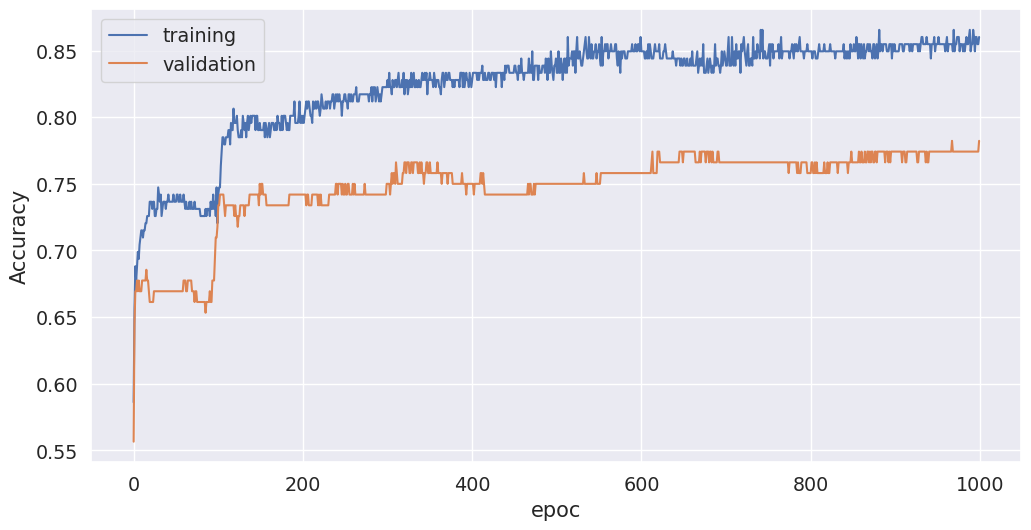

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2410 - accuracy: 0.3125

186/186 [==============================] - 0s 726us/step - loss: 1.2229 - accuracy: 0.3118 - val_loss: 0.9734 - val_accuracy: 0.4194


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1854 - accuracy: 0.3750

186/186 [==============================] - 0s 65us/step - loss: 1.1891 - accuracy: 0.3226 - val_loss: 0.9516 - val_accuracy: 0.4194


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9979 - accuracy: 0.3750

186/186 [==============================] - 0s 88us/step - loss: 1.1678 - accuracy: 0.3387 - val_loss: 0.9343 - val_accuracy: 0.4194


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3955 - accuracy: 0.3750

186/186 [==============================] - 0s 63us/step - loss: 1.1488 - accuracy: 0.3333 - val_loss: 0.9194 - val_accuracy: 0.4194


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0721 - accuracy: 0.1562

186/186 [==============================] - 0s 65us/step - loss: 1.1323 - accuracy: 0.3333 - val_loss: 0.9059 - val_accuracy: 0.4113


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1840 - accuracy: 0.3438

186/186 [==============================] - 0s 59us/step - loss: 1.1163 - accuracy: 0.3333 - val_loss: 0.8929 - val_accuracy: 0.4274


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2062 - accuracy: 0.2500

186/186 [==============================] - 0s 60us/step - loss: 1.1021 - accuracy: 0.3387 - val_loss: 0.8809 - val_accuracy: 0.4355


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5231 - accuracy: 0.1875

186/186 [==============================] - 0s 70us/step - loss: 1.0883 - accuracy: 0.3280 - val_loss: 0.8694 - val_accuracy: 0.4355


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9015 - accuracy: 0.3438

186/186 [==============================] - 0s 65us/step - loss: 1.0744 - accuracy: 0.3172 - val_loss: 0.8588 - val_accuracy: 0.4355


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9869 - accuracy: 0.4062

186/186 [==============================] - 0s 63us/step - loss: 1.0609 - accuracy: 0.3172 - val_loss: 0.8480 - val_accuracy: 0.4355


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0965 - accuracy: 0.2812

186/186 [==============================] - 0s 57us/step - loss: 1.0479 - accuracy: 0.3280 - val_loss: 0.8392 - val_accuracy: 0.4435


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8596 - accuracy: 0.3750

186/186 [==============================] - 0s 59us/step - loss: 1.0354 - accuracy: 0.3280 - val_loss: 0.8304 - val_accuracy: 0.4435


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1506 - accuracy: 0.2500

186/186 [==============================] - 0s 61us/step - loss: 1.0239 - accuracy: 0.3333 - val_loss: 0.8222 - val_accuracy: 0.4435


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9337 - accuracy: 0.4375

186/186 [==============================] - 0s 65us/step - loss: 1.0137 - accuracy: 0.3333 - val_loss: 0.8144 - val_accuracy: 0.4355


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0076 - accuracy: 0.2812

186/186 [==============================] - 0s 61us/step - loss: 1.0025 - accuracy: 0.3333 - val_loss: 0.8065 - val_accuracy: 0.4274


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7850 - accuracy: 0.4062

186/186 [==============================] - 0s 61us/step - loss: 0.9930 - accuracy: 0.3226 - val_loss: 0.7994 - val_accuracy: 0.4355


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7831 - accuracy: 0.3438

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 61us/step - loss: 0.9829 - accuracy: 0.3333 - val_loss: 0.7926 - val_accuracy: 0.4355


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0649 - accuracy: 0.4062

186/186 [==============================] - 0s 59us/step - loss: 0.9742 - accuracy: 0.3333 - val_loss: 0.7868 - val_accuracy: 0.4355


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1635 - accuracy: 0.3125

186/186 [==============================] - 0s 63us/step - loss: 0.9659 - accuracy: 0.3226 - val_loss: 0.7815 - val_accuracy: 0.4355


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8048 - accuracy: 0.2500

186/186 [==============================] - 0s 61us/step - loss: 0.9571 - accuracy: 0.3226 - val_loss: 0.7761 - val_accuracy: 0.4355


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7304 - accuracy: 0.4688

186/186 [==============================] - 0s 61us/step - loss: 0.9488 - accuracy: 0.3226 - val_loss: 0.7710 - val_accuracy: 0.4516


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8568 - accuracy: 0.4688

186/186 [==============================] - 0s 61us/step - loss: 0.9410 - accuracy: 0.3280 - val_loss: 0.7661 - val_accuracy: 0.4435


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9789 - accuracy: 0.2500

186/186 [==============================] - 0s 60us/step - loss: 0.9333 - accuracy: 0.3226 - val_loss: 0.7611 - val_accuracy: 0.4516


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7810 - accuracy: 0.3750

186/186 [==============================] - 0s 63us/step - loss: 0.9264 - accuracy: 0.3280 - val_loss: 0.7568 - val_accuracy: 0.4677


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7482 - accuracy: 0.4062

186/186 [==============================] - 0s 67us/step - loss: 0.9186 - accuracy: 0.3280 - val_loss: 0.7522 - val_accuracy: 0.4597


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8540 - accuracy: 0.3438

186/186 [==============================] - 0s 61us/step - loss: 0.9115 - accuracy: 0.3226 - val_loss: 0.7480 - val_accuracy: 0.4597


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7862 - accuracy: 0.2500

186/186 [==============================] - 0s 62us/step - loss: 0.9044 - accuracy: 0.3226 - val_loss: 0.7435 - val_accuracy: 0.4597


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0180 - accuracy: 0.4062

186/186 [==============================] - 0s 63us/step - loss: 0.8975 - accuracy: 0.3280 - val_loss: 0.7390 - val_accuracy: 0.4597


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9604 - accuracy: 0.3438

186/186 [==============================] - 0s 59us/step - loss: 0.8899 - accuracy: 0.3333 - val_loss: 0.7347 - val_accuracy: 0.4677


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7268 - accuracy: 0.4688

186/186 [==============================] - 0s 61us/step - loss: 0.8828 - accuracy: 0.3333 - val_loss: 0.7304 - val_accuracy: 0.4758


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7638 - accuracy: 0.3438

186/186 [==============================] - 0s 64us/step - loss: 0.8764 - accuracy: 0.3387 - val_loss: 0.7265 - val_accuracy: 0.4839


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0412 - accuracy: 0.2188

186/186 [==============================] - 0s 63us/step - loss: 0.8694 - accuracy: 0.3495 - val_loss: 0.7226 - val_accuracy: 0.4839


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7774 - accuracy: 0.3750

186/186 [==============================] - 0s 62us/step - loss: 0.8620 - accuracy: 0.3656 - val_loss: 0.7187 - val_accuracy: 0.4839


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7304 - accuracy: 0.4062

186/186 [==============================] - 0s 67us/step - loss: 0.8542 - accuracy: 0.3817 - val_loss: 0.7151 - val_accuracy: 0.4919


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8951 - accuracy: 0.3125

186/186 [==============================] - 0s 62us/step - loss: 0.8480 - accuracy: 0.3925 - val_loss: 0.7121 - val_accuracy: 0.5081


Epoch 36/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9218 - accuracy: 0.3750

186/186 [==============================] - 0s 66us/step - loss: 0.8418 - accuracy: 0.3925 - val_loss: 0.7091 - val_accuracy: 0.5161


Epoch 37/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6883 - accuracy: 0.4375

186/186 [==============================] - 0s 60us/step - loss: 0.8365 - accuracy: 0.3978 - val_loss: 0.7062 - val_accuracy: 0.5161


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7303 - accuracy: 0.4375

186/186 [==============================] - 0s 59us/step - loss: 0.8307 - accuracy: 0.4086 - val_loss: 0.7036 - val_accuracy: 0.5081


Epoch 39/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.0211 - accuracy: 0.2812

186/186 [==============================] - 0s 65us/step - loss: 0.8254 - accuracy: 0.4032 - val_loss: 0.7008 - val_accuracy: 0.5242


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8456 - accuracy: 0.4062

186/186 [==============================] - 0s 59us/step - loss: 0.8203 - accuracy: 0.4140 - val_loss: 0.6982 - val_accuracy: 0.5242


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7540 - accuracy: 0.4062

186/186 [==============================] - 0s 57us/step - loss: 0.8154 - accuracy: 0.4247 - val_loss: 0.6954 - val_accuracy: 0.5242


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8303 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 0.8107 - accuracy: 0.4355 - val_loss: 0.6928 - val_accuracy: 0.5323


Epoch 43/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9012 - accuracy: 0.4375



186/186 [==============================] - 0s 74us/step - loss: 0.8055 - accuracy: 0.4355 - val_loss: 0.6901 - val_accuracy: 0.5323


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8826 - accuracy: 0.2812

186/186 [==============================] - 0s 61us/step - loss: 0.8007 - accuracy: 0.4409 - val_loss: 0.6875 - val_accuracy: 0.5403


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7705 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.7961 - accuracy: 0.4409 - val_loss: 0.6848 - val_accuracy: 0.5403


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8479 - accuracy: 0.4062

186/186 [==============================] - 0s 58us/step - loss: 0.7917 - accuracy: 0.4462 - val_loss: 0.6825 - val_accuracy: 0.5484


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7169 - accuracy: 0.3750



186/186 [==============================] - 0s 61us/step - loss: 0.7874 - accuracy: 0.4516 - val_loss: 0.6804 - val_accuracy: 0.5403


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7154 - accuracy: 0.3750

186/186 [==============================] - 0s 57us/step - loss: 0.7832 - accuracy: 0.4624 - val_loss: 0.6787 - val_accuracy: 0.5403


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7361 - accuracy: 0.4375

186/186 [==============================] - 0s 56us/step - loss: 0.7792 - accuracy: 0.4677 - val_loss: 0.6774 - val_accuracy: 0.5484


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8451 - accuracy: 0.4688

186/186 [==============================] - 0s 69us/step - loss: 0.7750 - accuracy: 0.4785 - val_loss: 0.6761 - val_accuracy: 0.5403


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6934 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.7707 - accuracy: 0.4785 - val_loss: 0.6746 - val_accuracy: 0.5484


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8157 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.7664 - accuracy: 0.4892 - val_loss: 0.6732 - val_accuracy: 0.5323


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9355 - accuracy: 0.5312

186/186 [==============================] - 0s 60us/step - loss: 0.7628 - accuracy: 0.4946 - val_loss: 0.6717 - val_accuracy: 0.5484


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.4688

186/186 [==============================] - 0s 71us/step - loss: 0.7590 - accuracy: 0.5000 - val_loss: 0.6701 - val_accuracy: 0.5565


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7700 - accuracy: 0.4375

186/186 [==============================] - 0s 64us/step - loss: 0.7555 - accuracy: 0.5000 - val_loss: 0.6686 - val_accuracy: 0.5645


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7190 - accuracy: 0.5312

186/186 [==============================] - 0s 67us/step - loss: 0.7518 - accuracy: 0.5108 - val_loss: 0.6672 - val_accuracy: 0.5887


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6554 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.7482 - accuracy: 0.5161 - val_loss: 0.6657 - val_accuracy: 0.5887


Epoch 58/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7182 - accuracy: 0.5625

186/186 [==============================] - 0s 65us/step - loss: 0.7449 - accuracy: 0.5323 - val_loss: 0.6642 - val_accuracy: 0.5968


Epoch 59/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6975 - accuracy: 0.4062

186/186 [==============================] - 0s 67us/step - loss: 0.7419 - accuracy: 0.5484 - val_loss: 0.6628 - val_accuracy: 0.5968


Epoch 60/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7290 - accuracy: 0.5312

186/186 [==============================] - 0s 75us/step - loss: 0.7387 - accuracy: 0.5591 - val_loss: 0.6617 - val_accuracy: 0.6048


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6841 - accuracy: 0.5312

186/186 [==============================] - 0s 66us/step - loss: 0.7356 - accuracy: 0.5699 - val_loss: 0.6605 - val_accuracy: 0.6129


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7973 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.7325 - accuracy: 0.5699 - val_loss: 0.6595 - val_accuracy: 0.6210


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7460 - accuracy: 0.5625

186/186 [==============================] - 0s 68us/step - loss: 0.7297 - accuracy: 0.5860 - val_loss: 0.6586 - val_accuracy: 0.6210


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6283 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.7266 - accuracy: 0.6022 - val_loss: 0.6576 - val_accuracy: 0.6290


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7956 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.7236 - accuracy: 0.6129 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.7213 - accuracy: 0.6129 - val_loss: 0.6555 - val_accuracy: 0.6452


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8606 - accuracy: 0.5625

186/186 [==============================] - 0s 59us/step - loss: 0.7191 - accuracy: 0.6129 - val_loss: 0.6543 - val_accuracy: 0.6452


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8610 - accuracy: 0.5312

186/186 [==============================] - 0s 63us/step - loss: 0.7172 - accuracy: 0.6290 - val_loss: 0.6534 - val_accuracy: 0.6613


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7160 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.7148 - accuracy: 0.6398 - val_loss: 0.6525 - val_accuracy: 0.6613


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7626 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.7130 - accuracy: 0.6452 - val_loss: 0.6515 - val_accuracy: 0.6694


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7618 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.7113 - accuracy: 0.6613 - val_loss: 0.6506 - val_accuracy: 0.6774


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6413 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.7091 - accuracy: 0.6720 - val_loss: 0.6497 - val_accuracy: 0.6855


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7476 - accuracy: 0.5000

186/186 [==============================] - 0s 108us/step - loss: 0.7072 - accuracy: 0.6720 - val_loss: 0.6487 - val_accuracy: 0.6935


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7025 - accuracy: 0.5938

186/186 [==============================] - 0s 85us/step - loss: 0.7051 - accuracy: 0.6882 - val_loss: 0.6477 - val_accuracy: 0.6855


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.7033 - accuracy: 0.6935 - val_loss: 0.6468 - val_accuracy: 0.7016


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6717 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.7012 - accuracy: 0.6989 - val_loss: 0.6457 - val_accuracy: 0.7016


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7870 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.6984 - accuracy: 0.6935 - val_loss: 0.6446 - val_accuracy: 0.7097


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6807 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.6961 - accuracy: 0.7043 - val_loss: 0.6437 - val_accuracy: 0.7097


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6875

186/186 [==============================] - 0s 70us/step - loss: 0.6937 - accuracy: 0.7097 - val_loss: 0.6429 - val_accuracy: 0.7097


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.6914 - accuracy: 0.7043 - val_loss: 0.6420 - val_accuracy: 0.7177


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6916 - accuracy: 0.6562

186/186 [==============================] - 0s 73us/step - loss: 0.6893 - accuracy: 0.7204 - val_loss: 0.6412 - val_accuracy: 0.7177


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7595 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6870 - accuracy: 0.7151 - val_loss: 0.6404 - val_accuracy: 0.7258


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.6847 - accuracy: 0.7258 - val_loss: 0.6394 - val_accuracy: 0.7258


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7327 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6825 - accuracy: 0.7204 - val_loss: 0.6385 - val_accuracy: 0.7258


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6277 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.6807 - accuracy: 0.7204 - val_loss: 0.6375 - val_accuracy: 0.7177


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6278 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.6786 - accuracy: 0.7312 - val_loss: 0.6368 - val_accuracy: 0.7177


Epoch 87/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7256 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.6767 - accuracy: 0.7258 - val_loss: 0.6360 - val_accuracy: 0.7177


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6750 - accuracy: 0.7312 - val_loss: 0.6352 - val_accuracy: 0.7339


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6729 - accuracy: 0.7312 - val_loss: 0.6345 - val_accuracy: 0.7339


Epoch 90/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6620 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.6712 - accuracy: 0.7527 - val_loss: 0.6335 - val_accuracy: 0.7339


Epoch 91/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6698 - accuracy: 0.7473 - val_loss: 0.6324 - val_accuracy: 0.7419


Epoch 92/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6700 - accuracy: 0.5625

186/186 [==============================] - 0s 61us/step - loss: 0.6680 - accuracy: 0.7419 - val_loss: 0.6313 - val_accuracy: 0.7339


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6666 - accuracy: 0.7419 - val_loss: 0.6304 - val_accuracy: 0.7581


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6472 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6650 - accuracy: 0.7419 - val_loss: 0.6293 - val_accuracy: 0.7500


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7329 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6635 - accuracy: 0.7419 - val_loss: 0.6281 - val_accuracy: 0.7581


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6875 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6620 - accuracy: 0.7366 - val_loss: 0.6272 - val_accuracy: 0.7581


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7090 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6604 - accuracy: 0.7527 - val_loss: 0.6262 - val_accuracy: 0.7661


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.6590 - accuracy: 0.7527 - val_loss: 0.6251 - val_accuracy: 0.7661


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.6576 - accuracy: 0.7527 - val_loss: 0.6243 - val_accuracy: 0.7661


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6436 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.6560 - accuracy: 0.7581 - val_loss: 0.6235 - val_accuracy: 0.7661


Epoch 101/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.6548 - accuracy: 0.7581 - val_loss: 0.6226 - val_accuracy: 0.7661


Epoch 102/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.6535 - accuracy: 0.7688 - val_loss: 0.6217 - val_accuracy: 0.7661


Epoch 103/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6520 - accuracy: 0.7688 - val_loss: 0.6208 - val_accuracy: 0.7661


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6507 - accuracy: 0.7688 - val_loss: 0.6199 - val_accuracy: 0.7661


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6070 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6491 - accuracy: 0.7688 - val_loss: 0.6189 - val_accuracy: 0.7581


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6476 - accuracy: 0.7688 - val_loss: 0.6179 - val_accuracy: 0.7661


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6463 - accuracy: 0.7634 - val_loss: 0.6169 - val_accuracy: 0.7742


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6442 - accuracy: 0.7742 - val_loss: 0.6160 - val_accuracy: 0.7661


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6423 - accuracy: 0.7796 - val_loss: 0.6151 - val_accuracy: 0.7661


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6155 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6406 - accuracy: 0.7742 - val_loss: 0.6142 - val_accuracy: 0.7661


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6471 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6387 - accuracy: 0.7742 - val_loss: 0.6131 - val_accuracy: 0.7742


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6370 - accuracy: 0.7796 - val_loss: 0.6120 - val_accuracy: 0.7823


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6436 - accuracy: 0.7188

186/186 [==============================] - 0s 72us/step - loss: 0.6350 - accuracy: 0.7796 - val_loss: 0.6108 - val_accuracy: 0.7823


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6655 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6334 - accuracy: 0.7742 - val_loss: 0.6095 - val_accuracy: 0.7903


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5523 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.6316 - accuracy: 0.7796 - val_loss: 0.6084 - val_accuracy: 0.7903


Epoch 116/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.6297 - accuracy: 0.7796 - val_loss: 0.6072 - val_accuracy: 0.7903


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6594 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6277 - accuracy: 0.7849 - val_loss: 0.6059 - val_accuracy: 0.7903


Epoch 118/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7382 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.6258 - accuracy: 0.7849 - val_loss: 0.6046 - val_accuracy: 0.7903


Epoch 119/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5957 - accuracy: 0.8125



186/186 [==============================] - 0s 67us/step - loss: 0.6240 - accuracy: 0.7849 - val_loss: 0.6033 - val_accuracy: 0.7903


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.8125

186/186 [==============================] - 0s 91us/step - loss: 0.6221 - accuracy: 0.7849 - val_loss: 0.6021 - val_accuracy: 0.7903


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5781 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.6199 - accuracy: 0.7849 - val_loss: 0.6008 - val_accuracy: 0.7903


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6177 - accuracy: 0.7796 - val_loss: 0.5992 - val_accuracy: 0.7984


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.6154 - accuracy: 0.7796 - val_loss: 0.5976 - val_accuracy: 0.7984


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5857 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.6129 - accuracy: 0.7849 - val_loss: 0.5959 - val_accuracy: 0.7984


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6106 - accuracy: 0.7849 - val_loss: 0.5944 - val_accuracy: 0.7984


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6076 - accuracy: 0.7903 - val_loss: 0.5928 - val_accuracy: 0.7984


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.6050 - accuracy: 0.7903 - val_loss: 0.5911 - val_accuracy: 0.7984


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6025 - accuracy: 0.7903 - val_loss: 0.5893 - val_accuracy: 0.8065


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.8125

186/186 [==============================] - 0s 92us/step - loss: 0.5998 - accuracy: 0.7903 - val_loss: 0.5876 - val_accuracy: 0.8065


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5974 - accuracy: 0.7849 - val_loss: 0.5856 - val_accuracy: 0.8145


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5554 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5948 - accuracy: 0.7849 - val_loss: 0.5838 - val_accuracy: 0.8145


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.5924 - accuracy: 0.7849 - val_loss: 0.5822 - val_accuracy: 0.8145


Epoch 133/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6249 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.5903 - accuracy: 0.7849 - val_loss: 0.5805 - val_accuracy: 0.8145


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5877 - accuracy: 0.7849 - val_loss: 0.5786 - val_accuracy: 0.8145


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5264 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5854 - accuracy: 0.7796 - val_loss: 0.5767 - val_accuracy: 0.8065


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5936 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.5829 - accuracy: 0.7796 - val_loss: 0.5747 - val_accuracy: 0.8065


Epoch 137/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6471 - accuracy: 0.6875

186/186 [==============================] - 0s 71us/step - loss: 0.5804 - accuracy: 0.7796 - val_loss: 0.5727 - val_accuracy: 0.8065


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5776 - accuracy: 0.7742 - val_loss: 0.5705 - val_accuracy: 0.8065


Epoch 139/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.5745 - accuracy: 0.7796 - val_loss: 0.5685 - val_accuracy: 0.8065


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5806 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5715 - accuracy: 0.7796 - val_loss: 0.5662 - val_accuracy: 0.8065


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5686 - accuracy: 0.7796 - val_loss: 0.5638 - val_accuracy: 0.8065


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5513 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5656 - accuracy: 0.7796 - val_loss: 0.5614 - val_accuracy: 0.8065


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.5625 - accuracy: 0.7796 - val_loss: 0.5592 - val_accuracy: 0.8065


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5304 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5600 - accuracy: 0.7742 - val_loss: 0.5572 - val_accuracy: 0.8145


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5845 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.5572 - accuracy: 0.7796 - val_loss: 0.5550 - val_accuracy: 0.8065


Epoch 146/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5921 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.5546 - accuracy: 0.7796 - val_loss: 0.5530 - val_accuracy: 0.8145


Epoch 147/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.5518 - accuracy: 0.7796 - val_loss: 0.5506 - val_accuracy: 0.8145


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.5489 - accuracy: 0.7903 - val_loss: 0.5484 - val_accuracy: 0.8145


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6875 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.5465 - accuracy: 0.7849 - val_loss: 0.5461 - val_accuracy: 0.8145


Epoch 150/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5438 - accuracy: 0.7849 - val_loss: 0.5439 - val_accuracy: 0.8145


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5626 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5409 - accuracy: 0.7903 - val_loss: 0.5417 - val_accuracy: 0.8145


Epoch 152/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.5383 - accuracy: 0.7903 - val_loss: 0.5394 - val_accuracy: 0.8145


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5212 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.5357 - accuracy: 0.7903 - val_loss: 0.5373 - val_accuracy: 0.8065


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5190 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.5330 - accuracy: 0.7796 - val_loss: 0.5352 - val_accuracy: 0.8065


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5480 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5303 - accuracy: 0.7849 - val_loss: 0.5331 - val_accuracy: 0.8065


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5150 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.5277 - accuracy: 0.7849 - val_loss: 0.5309 - val_accuracy: 0.8065


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5927 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5250 - accuracy: 0.7849 - val_loss: 0.5286 - val_accuracy: 0.8065


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.6875

186/186 [==============================] - 0s 68us/step - loss: 0.5224 - accuracy: 0.7849 - val_loss: 0.5264 - val_accuracy: 0.8065


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.5196 - accuracy: 0.7957 - val_loss: 0.5242 - val_accuracy: 0.8065


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.5172 - accuracy: 0.8011 - val_loss: 0.5221 - val_accuracy: 0.8065


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5144 - accuracy: 0.8011 - val_loss: 0.5198 - val_accuracy: 0.8065


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5104 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5116 - accuracy: 0.8118 - val_loss: 0.5174 - val_accuracy: 0.8065


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5199 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5090 - accuracy: 0.8118 - val_loss: 0.5151 - val_accuracy: 0.8065


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5058 - accuracy: 0.8118 - val_loss: 0.5128 - val_accuracy: 0.8065


Epoch 165/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.5034 - accuracy: 0.8118 - val_loss: 0.5106 - val_accuracy: 0.8145


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.5000 - accuracy: 0.8118 - val_loss: 0.5083 - val_accuracy: 0.8145


Epoch 167/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4819 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.4971 - accuracy: 0.8118 - val_loss: 0.5062 - val_accuracy: 0.8065


Epoch 168/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.4941 - accuracy: 0.8118 - val_loss: 0.5042 - val_accuracy: 0.8065


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5089 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4910 - accuracy: 0.8118 - val_loss: 0.5021 - val_accuracy: 0.8065


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4749 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4881 - accuracy: 0.8226 - val_loss: 0.4999 - val_accuracy: 0.8065


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4502 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.4848 - accuracy: 0.8333 - val_loss: 0.4977 - val_accuracy: 0.8065


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5651 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4822 - accuracy: 0.8226 - val_loss: 0.4956 - val_accuracy: 0.8065


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4477 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4790 - accuracy: 0.8226 - val_loss: 0.4935 - val_accuracy: 0.8065


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4766 - accuracy: 0.8226 - val_loss: 0.4915 - val_accuracy: 0.8065


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4735 - accuracy: 0.8280 - val_loss: 0.4896 - val_accuracy: 0.8065


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.4709 - accuracy: 0.8280 - val_loss: 0.4877 - val_accuracy: 0.8065


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5174 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4681 - accuracy: 0.8280 - val_loss: 0.4858 - val_accuracy: 0.8065


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5245 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4652 - accuracy: 0.8280 - val_loss: 0.4837 - val_accuracy: 0.8145


Epoch 179/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.4626 - accuracy: 0.8280 - val_loss: 0.4820 - val_accuracy: 0.8145


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.4597 - accuracy: 0.8280 - val_loss: 0.4802 - val_accuracy: 0.8145


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.8438

186/186 [==============================] - 0s 81us/step - loss: 0.4569 - accuracy: 0.8280 - val_loss: 0.4786 - val_accuracy: 0.8145


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4915 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.4546 - accuracy: 0.8226 - val_loss: 0.4771 - val_accuracy: 0.8145


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4520 - accuracy: 0.8226 - val_loss: 0.4755 - val_accuracy: 0.8226


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4494 - accuracy: 0.8226 - val_loss: 0.4741 - val_accuracy: 0.8226


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4446 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4471 - accuracy: 0.8226 - val_loss: 0.4727 - val_accuracy: 0.8226


Epoch 186/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5111 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4448 - accuracy: 0.8226 - val_loss: 0.4712 - val_accuracy: 0.8226


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4660 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4429 - accuracy: 0.8280 - val_loss: 0.4699 - val_accuracy: 0.8226


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4405 - accuracy: 0.8280 - val_loss: 0.4688 - val_accuracy: 0.8226


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4385 - accuracy: 0.8280 - val_loss: 0.4676 - val_accuracy: 0.8226


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4364 - accuracy: 0.8280 - val_loss: 0.4664 - val_accuracy: 0.8226


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4715 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4341 - accuracy: 0.8280 - val_loss: 0.4651 - val_accuracy: 0.8226


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4326 - accuracy: 0.8280 - val_loss: 0.4639 - val_accuracy: 0.8226


Epoch 193/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.9375

186/186 [==============================] - 0s 96us/step - loss: 0.4304 - accuracy: 0.8333 - val_loss: 0.4631 - val_accuracy: 0.8226


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.4290 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.8226


Epoch 195/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4268 - accuracy: 0.8280 - val_loss: 0.4614 - val_accuracy: 0.8226


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5639 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.4255 - accuracy: 0.8333 - val_loss: 0.4605 - val_accuracy: 0.8226


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4237 - accuracy: 0.8333 - val_loss: 0.4599 - val_accuracy: 0.8226


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4224 - accuracy: 0.8333 - val_loss: 0.4592 - val_accuracy: 0.8145


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4176 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4208 - accuracy: 0.8333 - val_loss: 0.4583 - val_accuracy: 0.8145


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4189 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.8145


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4174 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.8145


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4160 - accuracy: 0.8333 - val_loss: 0.4559 - val_accuracy: 0.8145


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4145 - accuracy: 0.8333 - val_loss: 0.4553 - val_accuracy: 0.8145


Epoch 204/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4129 - accuracy: 0.8387 - val_loss: 0.4547 - val_accuracy: 0.8145


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.4115 - accuracy: 0.8387 - val_loss: 0.4540 - val_accuracy: 0.8145


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3827 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4100 - accuracy: 0.8387 - val_loss: 0.4533 - val_accuracy: 0.8145


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.4084 - accuracy: 0.8387 - val_loss: 0.4526 - val_accuracy: 0.8145


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4081 - accuracy: 0.8333 - val_loss: 0.4520 - val_accuracy: 0.8065


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4058 - accuracy: 0.8387 - val_loss: 0.4514 - val_accuracy: 0.8145


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.4050 - accuracy: 0.8333 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 211/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3807 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4037 - accuracy: 0.8387 - val_loss: 0.4508 - val_accuracy: 0.8065


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4654 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4023 - accuracy: 0.8333 - val_loss: 0.4505 - val_accuracy: 0.8145


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4010 - accuracy: 0.8333 - val_loss: 0.4499 - val_accuracy: 0.8145


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4001 - accuracy: 0.8333 - val_loss: 0.4494 - val_accuracy: 0.8226


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3989 - accuracy: 0.8333 - val_loss: 0.4489 - val_accuracy: 0.8226


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3976 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.8226


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3966 - accuracy: 0.8333 - val_loss: 0.4484 - val_accuracy: 0.8145


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3952 - accuracy: 0.8280 - val_loss: 0.4481 - val_accuracy: 0.8145


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3946 - accuracy: 0.8280 - val_loss: 0.4477 - val_accuracy: 0.8145


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3936 - accuracy: 0.8280 - val_loss: 0.4475 - val_accuracy: 0.8145


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 83us/step - loss: 0.3922 - accuracy: 0.8280 - val_loss: 0.4474 - val_accuracy: 0.8145


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8438

186/186 [==============================] - 0s 75us/step - loss: 0.3911 - accuracy: 0.8226 - val_loss: 0.4470 - val_accuracy: 0.8145


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3902 - accuracy: 0.8226 - val_loss: 0.4466 - val_accuracy: 0.8145


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4393 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.3903 - accuracy: 0.8226 - val_loss: 0.4463 - val_accuracy: 0.8145


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3883 - accuracy: 0.8226 - val_loss: 0.4464 - val_accuracy: 0.8145


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3876 - accuracy: 0.8226 - val_loss: 0.4463 - val_accuracy: 0.8145


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3866 - accuracy: 0.8226 - val_loss: 0.4458 - val_accuracy: 0.8145


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3859 - accuracy: 0.8226 - val_loss: 0.4459 - val_accuracy: 0.8065


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3848 - accuracy: 0.8172 - val_loss: 0.4454 - val_accuracy: 0.8065


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3844 - accuracy: 0.8172 - val_loss: 0.4451 - val_accuracy: 0.8065


Epoch 231/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3831 - accuracy: 0.8172 - val_loss: 0.4445 - val_accuracy: 0.8145


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8125

186/186 [==============================] - 0s 82us/step - loss: 0.3822 - accuracy: 0.8172 - val_loss: 0.4444 - val_accuracy: 0.8145


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2206 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3814 - accuracy: 0.8172 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3056 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.3806 - accuracy: 0.8226 - val_loss: 0.4438 - val_accuracy: 0.8065


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.3795 - accuracy: 0.8172 - val_loss: 0.4435 - val_accuracy: 0.8065


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3790 - accuracy: 0.8172 - val_loss: 0.4432 - val_accuracy: 0.8065


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3778 - accuracy: 0.8172 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3771 - accuracy: 0.8226 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 239/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3771 - accuracy: 0.8172 - val_loss: 0.4421 - val_accuracy: 0.8145


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3754 - accuracy: 0.8172 - val_loss: 0.4418 - val_accuracy: 0.8145


Epoch 241/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3752 - accuracy: 0.8172 - val_loss: 0.4421 - val_accuracy: 0.8065


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.3746 - accuracy: 0.8172 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3740 - accuracy: 0.8172 - val_loss: 0.4422 - val_accuracy: 0.8065


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4447 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3734 - accuracy: 0.8172 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3725 - accuracy: 0.8172 - val_loss: 0.4417 - val_accuracy: 0.8065


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3720 - accuracy: 0.8172 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4234 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3713 - accuracy: 0.8226 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3711 - accuracy: 0.8172 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3703 - accuracy: 0.8118 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3698 - accuracy: 0.8280 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3695 - accuracy: 0.8280 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3685 - accuracy: 0.8226 - val_loss: 0.4409 - val_accuracy: 0.8065


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3683 - accuracy: 0.8226 - val_loss: 0.4407 - val_accuracy: 0.8065


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3677 - accuracy: 0.8280 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3673 - accuracy: 0.8226 - val_loss: 0.4404 - val_accuracy: 0.8065


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7188

186/186 [==============================] - 0s 69us/step - loss: 0.3669 - accuracy: 0.8280 - val_loss: 0.4399 - val_accuracy: 0.8065


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3665 - accuracy: 0.8280 - val_loss: 0.4400 - val_accuracy: 0.8065


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3660 - accuracy: 0.8226 - val_loss: 0.4395 - val_accuracy: 0.8065


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3653 - accuracy: 0.8226 - val_loss: 0.4396 - val_accuracy: 0.8065


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4308 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.3651 - accuracy: 0.8226 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.3649 - accuracy: 0.8280 - val_loss: 0.4391 - val_accuracy: 0.8065


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3639 - accuracy: 0.8226 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.3637 - accuracy: 0.8226 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4105 - accuracy: 0.7500

186/186 [==============================] - 0s 93us/step - loss: 0.3630 - accuracy: 0.8226 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.6875



186/186 [==============================] - 0s 78us/step - loss: 0.3627 - accuracy: 0.8226 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.8750

186/186 [==============================] - 0s 84us/step - loss: 0.3624 - accuracy: 0.8226 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.8125

186/186 [==============================] - 0s 209us/step - loss: 0.3615 - accuracy: 0.8226 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3823 - accuracy: 0.8125

186/186 [==============================] - 0s 79us/step - loss: 0.3615 - accuracy: 0.8226 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 269/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3610 - accuracy: 0.8226 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 270/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.7812



186/186 [==============================] - 0s 69us/step - loss: 0.3603 - accuracy: 0.8226 - val_loss: 0.4379 - val_accuracy: 0.8065


Epoch 271/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.3605 - accuracy: 0.8226 - val_loss: 0.4374 - val_accuracy: 0.8065


Epoch 272/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.3599 - accuracy: 0.8226 - val_loss: 0.4371 - val_accuracy: 0.8065


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3600 - accuracy: 0.8226 - val_loss: 0.4366 - val_accuracy: 0.8065


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3587 - accuracy: 0.8226 - val_loss: 0.4366 - val_accuracy: 0.8065


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3586 - accuracy: 0.8226 - val_loss: 0.4365 - val_accuracy: 0.8065


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3586 - accuracy: 0.8226 - val_loss: 0.4362 - val_accuracy: 0.8065


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.3577 - accuracy: 0.8226 - val_loss: 0.4363 - val_accuracy: 0.8065


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3579 - accuracy: 0.8280 - val_loss: 0.4360 - val_accuracy: 0.8065


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4242 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3570 - accuracy: 0.8226 - val_loss: 0.4358 - val_accuracy: 0.8065


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3565 - accuracy: 0.8226 - val_loss: 0.4355 - val_accuracy: 0.8065


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3565 - accuracy: 0.8226 - val_loss: 0.4354 - val_accuracy: 0.8065


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3559 - accuracy: 0.8226 - val_loss: 0.4355 - val_accuracy: 0.8065


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3553 - accuracy: 0.8280 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3553 - accuracy: 0.8226 - val_loss: 0.4350 - val_accuracy: 0.8065


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3548 - accuracy: 0.8280 - val_loss: 0.4346 - val_accuracy: 0.8065


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2279 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3546 - accuracy: 0.8280 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3541 - accuracy: 0.8280 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.3540 - accuracy: 0.8226 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3538 - accuracy: 0.8333 - val_loss: 0.4352 - val_accuracy: 0.8065


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4760 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3531 - accuracy: 0.8333 - val_loss: 0.4350 - val_accuracy: 0.8065


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3531 - accuracy: 0.8333 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3523 - accuracy: 0.8333 - val_loss: 0.4350 - val_accuracy: 0.8065


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3519 - accuracy: 0.8280 - val_loss: 0.4345 - val_accuracy: 0.8065


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3520 - accuracy: 0.8280 - val_loss: 0.4345 - val_accuracy: 0.8065


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3514 - accuracy: 0.8333 - val_loss: 0.4344 - val_accuracy: 0.8065


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4139 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3511 - accuracy: 0.8333 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3506 - accuracy: 0.8333 - val_loss: 0.4341 - val_accuracy: 0.8065


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3549 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3493 - accuracy: 0.8280 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3493 - accuracy: 0.8280 - val_loss: 0.4338 - val_accuracy: 0.8065


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3488 - accuracy: 0.8333 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3490 - accuracy: 0.8280 - val_loss: 0.4341 - val_accuracy: 0.8065


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5202 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3485 - accuracy: 0.8280 - val_loss: 0.4341 - val_accuracy: 0.8065


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3479 - accuracy: 0.8280 - val_loss: 0.4340 - val_accuracy: 0.8065


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3477 - accuracy: 0.8280 - val_loss: 0.4335 - val_accuracy: 0.8065


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3472 - accuracy: 0.8280 - val_loss: 0.4333 - val_accuracy: 0.8065


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3468 - accuracy: 0.8280 - val_loss: 0.4332 - val_accuracy: 0.8065


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4354 - accuracy: 0.7812

186/186 [==============================] - 0s 73us/step - loss: 0.3463 - accuracy: 0.8280 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5037 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.3462 - accuracy: 0.8280 - val_loss: 0.4325 - val_accuracy: 0.8065


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.3455 - accuracy: 0.8280 - val_loss: 0.4322 - val_accuracy: 0.8065


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3861 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3449 - accuracy: 0.8280 - val_loss: 0.4317 - val_accuracy: 0.8065


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3447 - accuracy: 0.8280 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4632 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3444 - accuracy: 0.8280 - val_loss: 0.4313 - val_accuracy: 0.8065


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3441 - accuracy: 0.8280 - val_loss: 0.4311 - val_accuracy: 0.8065


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4545 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3434 - accuracy: 0.8333 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 318/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3432 - accuracy: 0.8333 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3430 - accuracy: 0.8280 - val_loss: 0.4310 - val_accuracy: 0.7984


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3425 - accuracy: 0.8280 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3425 - accuracy: 0.8280 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3422 - accuracy: 0.8280 - val_loss: 0.4293 - val_accuracy: 0.8065


Epoch 323/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3421 - accuracy: 0.8280 - val_loss: 0.4288 - val_accuracy: 0.8065


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.7500

186/186 [==============================] - 0s 71us/step - loss: 0.3424 - accuracy: 0.8333 - val_loss: 0.4287 - val_accuracy: 0.8065


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.3412 - accuracy: 0.8333 - val_loss: 0.4285 - val_accuracy: 0.7984


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3413 - accuracy: 0.8333 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3405 - accuracy: 0.8333 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1622 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3405 - accuracy: 0.8280 - val_loss: 0.4274 - val_accuracy: 0.7984


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 332/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4217 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3397 - accuracy: 0.8280 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3398 - accuracy: 0.8333 - val_loss: 0.4276 - val_accuracy: 0.7984


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3396 - accuracy: 0.8280 - val_loss: 0.4275 - val_accuracy: 0.7984


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3387 - accuracy: 0.8280 - val_loss: 0.4270 - val_accuracy: 0.7984


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3387 - accuracy: 0.8280 - val_loss: 0.4267 - val_accuracy: 0.7984


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3382 - accuracy: 0.8280 - val_loss: 0.4265 - val_accuracy: 0.7984


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3380 - accuracy: 0.8280 - val_loss: 0.4265 - val_accuracy: 0.7984


Epoch 339/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2008 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3378 - accuracy: 0.8280 - val_loss: 0.4262 - val_accuracy: 0.7984


Epoch 340/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3375 - accuracy: 0.8280 - val_loss: 0.4263 - val_accuracy: 0.7984


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4529 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3375 - accuracy: 0.8333 - val_loss: 0.4260 - val_accuracy: 0.7984


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3370 - accuracy: 0.8280 - val_loss: 0.4260 - val_accuracy: 0.7984


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4258 - val_accuracy: 0.7984


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3363 - accuracy: 0.8280 - val_loss: 0.4259 - val_accuracy: 0.7984


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3360 - accuracy: 0.8333 - val_loss: 0.4259 - val_accuracy: 0.7984


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4256 - val_accuracy: 0.7984


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.4254 - val_accuracy: 0.7984


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3345 - accuracy: 0.8333 - val_loss: 0.4252 - val_accuracy: 0.7984


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4788 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.3345 - accuracy: 0.8333 - val_loss: 0.4244 - val_accuracy: 0.7984


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3341 - accuracy: 0.8333 - val_loss: 0.4240 - val_accuracy: 0.7984


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5313 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.3336 - accuracy: 0.8333 - val_loss: 0.4242 - val_accuracy: 0.7984


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3337 - accuracy: 0.8333 - val_loss: 0.4239 - val_accuracy: 0.7984


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.3328 - accuracy: 0.8280 - val_loss: 0.4240 - val_accuracy: 0.7984


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3323 - accuracy: 0.8333 - val_loss: 0.4238 - val_accuracy: 0.7984


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4121 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3329 - accuracy: 0.8333 - val_loss: 0.4232 - val_accuracy: 0.7984


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3321 - accuracy: 0.8333 - val_loss: 0.4231 - val_accuracy: 0.7984


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3315 - accuracy: 0.8333 - val_loss: 0.4235 - val_accuracy: 0.7984


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3310 - accuracy: 0.8333 - val_loss: 0.4229 - val_accuracy: 0.7984


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.3308 - accuracy: 0.8333 - val_loss: 0.4222 - val_accuracy: 0.7984


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3309 - accuracy: 0.8333 - val_loss: 0.4221 - val_accuracy: 0.7984


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3300 - accuracy: 0.8333 - val_loss: 0.4220 - val_accuracy: 0.7984


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3297 - accuracy: 0.8333 - val_loss: 0.4215 - val_accuracy: 0.7984


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3300 - accuracy: 0.8280 - val_loss: 0.4218 - val_accuracy: 0.7903


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3291 - accuracy: 0.8333 - val_loss: 0.4213 - val_accuracy: 0.7903


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3290 - accuracy: 0.8333 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3285 - accuracy: 0.8333 - val_loss: 0.4215 - val_accuracy: 0.7903


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3284 - accuracy: 0.8333 - val_loss: 0.4213 - val_accuracy: 0.7903


Epoch 368/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.3281 - accuracy: 0.8333 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3280 - accuracy: 0.8387 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3285 - accuracy: 0.8387 - val_loss: 0.4208 - val_accuracy: 0.7903


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3274 - accuracy: 0.8387 - val_loss: 0.4204 - val_accuracy: 0.7903


Epoch 372/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3279 - accuracy: 0.8333 - val_loss: 0.4207 - val_accuracy: 0.7903


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3271 - accuracy: 0.8387 - val_loss: 0.4201 - val_accuracy: 0.7903


Epoch 374/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3270 - accuracy: 0.8387 - val_loss: 0.4198 - val_accuracy: 0.7903


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3269 - accuracy: 0.8387 - val_loss: 0.4200 - val_accuracy: 0.7903


Epoch 376/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1841 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3262 - accuracy: 0.8387 - val_loss: 0.4203 - val_accuracy: 0.7903


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8438



186/186 [==============================] - 0s 66us/step - loss: 0.3265 - accuracy: 0.8387 - val_loss: 0.4199 - val_accuracy: 0.7903


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3261 - accuracy: 0.8387 - val_loss: 0.4199 - val_accuracy: 0.7903


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3259 - accuracy: 0.8387 - val_loss: 0.4201 - val_accuracy: 0.7903


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3260 - accuracy: 0.8387 - val_loss: 0.4203 - val_accuracy: 0.7903


Epoch 381/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3034 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3255 - accuracy: 0.8441 - val_loss: 0.4195 - val_accuracy: 0.7903


Epoch 382/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4040 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3251 - accuracy: 0.8387 - val_loss: 0.4192 - val_accuracy: 0.7903


Epoch 383/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.3258 - accuracy: 0.8387 - val_loss: 0.4192 - val_accuracy: 0.7903


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1379 - accuracy: 1.0000

186/186 [==============================] - 0s 65us/step - loss: 0.3252 - accuracy: 0.8441 - val_loss: 0.4189 - val_accuracy: 0.7903


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3249 - accuracy: 0.8441 - val_loss: 0.4191 - val_accuracy: 0.7903


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3248 - accuracy: 0.8441 - val_loss: 0.4193 - val_accuracy: 0.7903


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3241 - accuracy: 0.8441 - val_loss: 0.4190 - val_accuracy: 0.7903


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3239 - accuracy: 0.8441 - val_loss: 0.4194 - val_accuracy: 0.7903


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1874 - accuracy: 0.9375

186/186 [==============================] - 0s 74us/step - loss: 0.3238 - accuracy: 0.8441 - val_loss: 0.4194 - val_accuracy: 0.7903


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3239 - accuracy: 0.8441 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3237 - accuracy: 0.8387 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 392/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.8125

186/186 [==============================] - 0s 111us/step - loss: 0.3235 - accuracy: 0.8387 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3232 - accuracy: 0.8441 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3232 - accuracy: 0.8441 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3227 - accuracy: 0.8387 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3230 - accuracy: 0.8387 - val_loss: 0.4183 - val_accuracy: 0.7903


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3224 - accuracy: 0.8441 - val_loss: 0.4179 - val_accuracy: 0.7903


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3230 - accuracy: 0.8441 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3225 - accuracy: 0.8441 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3227 - accuracy: 0.8441 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3218 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3217 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3216 - accuracy: 0.8387 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 404/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3216 - accuracy: 0.8387 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 405/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3216 - accuracy: 0.8441 - val_loss: 0.4172 - val_accuracy: 0.7903


Epoch 406/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3214 - accuracy: 0.8387 - val_loss: 0.4173 - val_accuracy: 0.7903


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3213 - accuracy: 0.8387 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3210 - accuracy: 0.8387 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3205 - accuracy: 0.8387 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3208 - accuracy: 0.8387 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1452 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3211 - accuracy: 0.8441 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3203 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2117 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3204 - accuracy: 0.8387 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3200 - accuracy: 0.8387 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3201 - accuracy: 0.8387 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3197 - accuracy: 0.8387 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.3195 - accuracy: 0.8387 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3194 - accuracy: 0.8387 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3192 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3195 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3192 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3190 - accuracy: 0.8387 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2185 - accuracy: 0.9062

186/186 [==============================] - 0s 120us/step - loss: 0.3188 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.4172 - val_accuracy: 0.7903


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3185 - accuracy: 0.8387 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3188 - accuracy: 0.8387 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3180 - accuracy: 0.8333 - val_loss: 0.4161 - val_accuracy: 0.7903


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3178 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7903


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3178 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3182 - accuracy: 0.8280 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3169 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3169 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3164 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4640 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.7500

186/186 [==============================] - 0s 81us/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3156 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3158 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3160 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3161 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3154 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3154 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2346 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3147 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3146 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3150 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3138 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4909 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3136 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9062

186/186 [==============================] - 0s 80us/step - loss: 0.3128 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.3129 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3128 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2088 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 472/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3682 - accuracy: 0.7812



186/186 [==============================] - 0s 69us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 476/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3115 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3115 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 482/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1969 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3111 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1982 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3099 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3106 - accuracy: 0.8387 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 494/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3099 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3094 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8750



186/186 [==============================] - 0s 62us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3089 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3088 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7903


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2091 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3992 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3081 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 513/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4117 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2964 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4868 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7903


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1843 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3076 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3071 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3070 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3070 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3074 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1949 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7903


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3074 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7903


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3066 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3065 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3061 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7903


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7903


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3062 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4866 - accuracy: 0.7500

186/186 [==============================] - 0s 78us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 540/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 541/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.3055 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3051 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.3054 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7903


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3053 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3047 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 549/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 550/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.3050 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 551/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3043 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 552/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3044 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 553/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.7500



186/186 [==============================] - 0s 65us/step - loss: 0.3043 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1551 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.3048 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3045 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3039 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1991 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3037 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3047 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7984


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3034 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7984


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3036 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7984


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4627 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3047 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7984


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3029 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3031 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7984


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3032 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3031 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 567/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1986 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3036 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7984


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3027 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3027 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3027 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3027 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7984


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3021 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3024 - accuracy: 0.8333 - val_loss: 0.4187 - val_accuracy: 0.7984


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3022 - accuracy: 0.8333 - val_loss: 0.4193 - val_accuracy: 0.7984


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3022 - accuracy: 0.8333 - val_loss: 0.4193 - val_accuracy: 0.7984


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3024 - accuracy: 0.8333 - val_loss: 0.4189 - val_accuracy: 0.7984


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.3030 - accuracy: 0.8333 - val_loss: 0.4187 - val_accuracy: 0.7984


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3016 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7984


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3014 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7984


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.3013 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7984


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3015 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7984


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3018 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7984


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3014 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7984


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3013 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3012 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3012 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7984


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3008 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7984


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3006 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3007 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7984


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3008 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3013 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3004 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3004 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3004 - accuracy: 0.8387 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2034 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2999 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3001 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7984


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3001 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7984


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2996 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7984


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1971 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3005 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7984


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2999 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2994 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7984


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2995 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7984


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7984


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1510 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2996 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2176 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2991 - accuracy: 0.8387 - val_loss: 0.4177 - val_accuracy: 0.7984


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2993 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1310 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2993 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7903


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2987 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7903


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2987 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7903


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2989 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2017 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2986 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2986 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2987 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7984


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2980 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2985 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2982 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2980 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2979 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7903


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2976 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7903


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2974 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7903


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2979 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2975 - accuracy: 0.8387 - val_loss: 0.4164 - val_accuracy: 0.7903


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4442 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.2975 - accuracy: 0.8387 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 628/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.2973 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7903


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.2972 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1565 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2972 - accuracy: 0.8333 - val_loss: 0.4156 - val_accuracy: 0.7984


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2977 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7903


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1696 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2976 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7903


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2977 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 636/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2964 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7903


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2965 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.2967 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.4160 - val_accuracy: 0.7903


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3871 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.2962 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7903


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.2965 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7903


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2959 - accuracy: 0.8333 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2963 - accuracy: 0.8387 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2961 - accuracy: 0.8333 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2955 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7903


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1733 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2956 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7903


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2964 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7903


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.6875

186/186 [==============================] - 0s 73us/step - loss: 0.2956 - accuracy: 0.8333 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.9375

186/186 [==============================] - 0s 85us/step - loss: 0.2954 - accuracy: 0.8387 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2959 - accuracy: 0.8333 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2956 - accuracy: 0.8333 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2952 - accuracy: 0.8333 - val_loss: 0.4153 - val_accuracy: 0.7903


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2305 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2947 - accuracy: 0.8387 - val_loss: 0.4156 - val_accuracy: 0.7903


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2952 - accuracy: 0.8387 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1729 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2950 - accuracy: 0.8333 - val_loss: 0.4156 - val_accuracy: 0.7903


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2951 - accuracy: 0.8387 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2952 - accuracy: 0.8333 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2948 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1959 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2945 - accuracy: 0.8387 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 113us/step - loss: 0.2943 - accuracy: 0.8387 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 663/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1588 - accuracy: 0.9688

186/186 [==============================] - 0s 70us/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2944 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7903


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.4151 - val_accuracy: 0.7903


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2943 - accuracy: 0.8387 - val_loss: 0.4149 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2334 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.2948 - accuracy: 0.8333 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2938 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1813 - accuracy: 0.8750



186/186 [==============================] - 0s 61us/step - loss: 0.2937 - accuracy: 0.8387 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2938 - accuracy: 0.8387 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2944 - accuracy: 0.8333 - val_loss: 0.4150 - val_accuracy: 0.7903


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2940 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1697 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2939 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2940 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7903


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2935 - accuracy: 0.8333 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2941 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 678/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1707 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1455 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2932 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2933 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.9375

186/186 [==============================] - 0s 88us/step - loss: 0.2932 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 683/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2936 - accuracy: 0.8387 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9062

186/186 [==============================] - 0s 81us/step - loss: 0.2935 - accuracy: 0.8333 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.2928 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2042 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2927 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2928 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2938 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2929 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2938 - accuracy: 0.8333 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 691/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2929 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2929 - accuracy: 0.8387 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 693/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2157 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.4139 - val_accuracy: 0.7903


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2930 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1635 - accuracy: 0.9375

186/186 [==============================] - 0s 74us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2929 - accuracy: 0.8387 - val_loss: 0.4140 - val_accuracy: 0.7903


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.7500



186/186 [==============================] - 0s 59us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1657 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.2928 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1817 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2925 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2925 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7903


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3737 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.2925 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7903


Epoch 702/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.2920 - accuracy: 0.8387 - val_loss: 0.4150 - val_accuracy: 0.7903


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2921 - accuracy: 0.8387 - val_loss: 0.4151 - val_accuracy: 0.7903


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1958 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2927 - accuracy: 0.8387 - val_loss: 0.4150 - val_accuracy: 0.7903


Epoch 705/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.4153 - val_accuracy: 0.7903


Epoch 706/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1971 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2919 - accuracy: 0.8333 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2917 - accuracy: 0.8387 - val_loss: 0.4142 - val_accuracy: 0.7903


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2918 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7903


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2915 - accuracy: 0.8387 - val_loss: 0.4137 - val_accuracy: 0.7903


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2915 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7903


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2914 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.2916 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4099 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2918 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4139 - val_accuracy: 0.7903


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.7903


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2917 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.7903


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2908 - accuracy: 0.8387 - val_loss: 0.4150 - val_accuracy: 0.7903


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2913 - accuracy: 0.8387 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2918 - accuracy: 0.8333 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1850 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2908 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7903


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2907 - accuracy: 0.8441 - val_loss: 0.4150 - val_accuracy: 0.7903


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2911 - accuracy: 0.8387 - val_loss: 0.4151 - val_accuracy: 0.7903


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2912 - accuracy: 0.8333 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 724/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2905 - accuracy: 0.8387 - val_loss: 0.4136 - val_accuracy: 0.7903


Epoch 725/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4872 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.2912 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7903


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2907 - accuracy: 0.8387 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2902 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7903


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2908 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2907 - accuracy: 0.8333 - val_loss: 0.4140 - val_accuracy: 0.7903


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1518 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2905 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7903


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2911 - accuracy: 0.8387 - val_loss: 0.4133 - val_accuracy: 0.7903


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2904 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7903


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2901 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7903


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.4137 - val_accuracy: 0.7903


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2900 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7903


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2901 - accuracy: 0.8333 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 737/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.1999 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2903 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7903


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2899 - accuracy: 0.8441 - val_loss: 0.4149 - val_accuracy: 0.7903


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2897 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2904 - accuracy: 0.8333 - val_loss: 0.4146 - val_accuracy: 0.7903


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2895 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7903


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2904 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2897 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.7903


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2890 - accuracy: 0.8387 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.2901 - accuracy: 0.8441 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2895 - accuracy: 0.8441 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2893 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2894 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7903


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1744 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2898 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2896 - accuracy: 0.8441 - val_loss: 0.4147 - val_accuracy: 0.7903


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2887 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2895 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4992 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.2900 - accuracy: 0.8441 - val_loss: 0.4154 - val_accuracy: 0.7903


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2887 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2887 - accuracy: 0.8387 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2888 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2891 - accuracy: 0.8441 - val_loss: 0.4149 - val_accuracy: 0.7903


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1922 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7984


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.2888 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 764/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2005 - accuracy: 0.8750



186/186 [==============================] - 0s 66us/step - loss: 0.2891 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2883 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2889 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1936 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2878 - accuracy: 0.8387 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2880 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2193 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2882 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2877 - accuracy: 0.8441 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4674 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2878 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2878 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2881 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 777/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2876 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 778/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2882 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 779/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8125

186/186 [==============================] - 0s 75us/step - loss: 0.2883 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2872 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2870 - accuracy: 0.8441 - val_loss: 0.4125 - val_accuracy: 0.7984


Epoch 782/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1598 - accuracy: 0.9375



186/186 [==============================] - 0s 65us/step - loss: 0.2876 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2875 - accuracy: 0.8387 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2873 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1844 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2876 - accuracy: 0.8441 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2875 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2869 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1876 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2872 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2872 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1553 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2874 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2871 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2869 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2869 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4047 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.2867 - accuracy: 0.8387 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2742 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 798/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2875 - accuracy: 0.8441 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.2871 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 801/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1780 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2861 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2866 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2864 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2859 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2862 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2863 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2858 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.2857 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2860 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2859 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 813/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2861 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 814/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 815/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2857 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 817/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2858 - accuracy: 0.8495 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2853 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 819/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2851 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2850 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2852 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2117 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2852 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 823/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2851 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2850 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 825/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2848 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 826/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2847 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2849 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2855 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2844 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2851 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4973 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2843 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2010 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2847 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2848 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2843 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2844 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2843 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2842 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 840/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2842 - accuracy: 0.8441 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 841/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2839 - accuracy: 0.8441 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1887 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2844 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2838 - accuracy: 0.8441 - val_loss: 0.4124 - val_accuracy: 0.7984


Epoch 844/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2839 - accuracy: 0.8441 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2836 - accuracy: 0.8441 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2842 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 847/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1886 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2838 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2842 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 849/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2836 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 850/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1509 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2836 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 851/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2837 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2833 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2838 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.7984


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2833 - accuracy: 0.8548 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2832 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2832 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2338 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2835 - accuracy: 0.8495 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2835 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2826 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2832 - accuracy: 0.8495 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2838 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2828 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2832 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2832 - accuracy: 0.8548 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2828 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2829 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2824 - accuracy: 0.8441 - val_loss: 0.4124 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2825 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2829 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2822 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2821 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2822 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2825 - accuracy: 0.8495 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2827 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2823 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2818 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2829 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2820 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2819 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 880/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2816 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2815 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2821 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2819 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2816 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2816 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2817 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2812 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2813 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 889/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2813 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2810 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2809 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 892/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2492 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2817 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1410 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2820 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.7812

186/186 [==============================] - 0s 76us/step - loss: 0.2814 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2813 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1719 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2808 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1392 - accuracy: 0.9688

186/186 [==============================] - 0s 101us/step - loss: 0.2810 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1904 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2812 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2810 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 900/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2807 - accuracy: 0.8495 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 901/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8438

186/186 [==============================] - 0s 84us/step - loss: 0.2805 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2809 - accuracy: 0.8441 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1173 - accuracy: 1.0000

186/186 [==============================] - 0s 66us/step - loss: 0.2807 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3363 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2808 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2798 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2008 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2803 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2805 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2805 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2805 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2801 - accuracy: 0.8495 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2797 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2802 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.4130 - val_accuracy: 0.7984


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2798 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 915/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2794 - accuracy: 0.8495 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2799 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2795 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2797 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2795 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2793 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2794 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1647 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2794 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2790 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2797 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2787 - accuracy: 0.8548 - val_loss: 0.4156 - val_accuracy: 0.8065


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2797 - accuracy: 0.8441 - val_loss: 0.4147 - val_accuracy: 0.8065


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3835 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.2792 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2481 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2787 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2793 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2790 - accuracy: 0.8548 - val_loss: 0.4147 - val_accuracy: 0.8065


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2791 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1773 - accuracy: 0.9688

186/186 [==============================] - 0s 65us/step - loss: 0.2786 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.2793 - accuracy: 0.8441 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2789 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2783 - accuracy: 0.8441 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2791 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 937/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4191 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.2781 - accuracy: 0.8548 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2789 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2789 - accuracy: 0.8548 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2786 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.2784 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.8065


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2779 - accuracy: 0.8441 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2166 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2785 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2780 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1664 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2782 - accuracy: 0.8548 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2780 - accuracy: 0.8495 - val_loss: 0.4142 - val_accuracy: 0.8065


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2785 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2777 - accuracy: 0.8495 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2780 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1843 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2777 - accuracy: 0.8495 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2776 - accuracy: 0.8495 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2775 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2775 - accuracy: 0.8495 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1696 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2781 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.8065


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2773 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.8065


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1843 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2778 - accuracy: 0.8495 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2771 - accuracy: 0.8495 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2068 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2782 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.8065


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2772 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2773 - accuracy: 0.8548 - val_loss: 0.4152 - val_accuracy: 0.8065


Epoch 961/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2777 - accuracy: 0.8495 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2771 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7984


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1601 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2768 - accuracy: 0.8602 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2170 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2771 - accuracy: 0.8548 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 965/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2771 - accuracy: 0.8548 - val_loss: 0.4140 - val_accuracy: 0.8065


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2778 - accuracy: 0.8548 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 967/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2766 - accuracy: 0.8495 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 968/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2335 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2770 - accuracy: 0.8602 - val_loss: 0.4149 - val_accuracy: 0.8065


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2765 - accuracy: 0.8548 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2770 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2768 - accuracy: 0.8495 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2028 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2771 - accuracy: 0.8441 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2762 - accuracy: 0.8602 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2765 - accuracy: 0.8602 - val_loss: 0.4147 - val_accuracy: 0.8065


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2766 - accuracy: 0.8495 - val_loss: 0.4151 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2762 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2763 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2759 - accuracy: 0.8602 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8125

186/186 [==============================] - 0s 94us/step - loss: 0.2766 - accuracy: 0.8495 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1709 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2764 - accuracy: 0.8495 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2760 - accuracy: 0.8441 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.2765 - accuracy: 0.8548 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2764 - accuracy: 0.8548 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.2764 - accuracy: 0.8548 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2755 - accuracy: 0.8548 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2757 - accuracy: 0.8548 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2757 - accuracy: 0.8548 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2755 - accuracy: 0.8602 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4244 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2751 - accuracy: 0.8495 - val_loss: 0.4140 - val_accuracy: 0.7984


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2756 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7903


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2752 - accuracy: 0.8548 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2752 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 994/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2756 - accuracy: 0.8548 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2752 - accuracy: 0.8548 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.2757 - accuracy: 0.8495 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 997/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1156 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2752 - accuracy: 0.8495 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 998/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2751 - accuracy: 0.8602 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 999/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2749 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2750 - accuracy: 0.8495 - val_loss: 0.4142 - val_accuracy: 0.7984


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples


Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2752 - accuracy: 0.8495 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2752 - accuracy: 0.8441 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2100 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2745 - accuracy: 0.8495 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1860 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2746 - accuracy: 0.8602 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2745 - accuracy: 0.8548 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2758 - accuracy: 0.8548 - val_loss: 0.4161 - val_accuracy: 0.7984


Epoch 7/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2741 - accuracy: 0.8548 - val_loss: 0.4164 - val_accuracy: 0.7984


Epoch 8/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2747 - accuracy: 0.8495 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 9/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2744 - accuracy: 0.8495 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 10/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.7500

186/186 [==============================] - 0s 83us/step - loss: 0.2745 - accuracy: 0.8495 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 11/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2741 - accuracy: 0.8548 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2742 - accuracy: 0.8548 - val_loss: 0.4147 - val_accuracy: 0.7984


Epoch 13/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2741 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 14/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1723 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2739 - accuracy: 0.8602 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2737 - accuracy: 0.8548 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2744 - accuracy: 0.8602 - val_loss: 0.4149 - val_accuracy: 0.7984


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2736 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7984


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2737 - accuracy: 0.8495 - val_loss: 0.4147 - val_accuracy: 0.7984


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2737 - accuracy: 0.8495 - val_loss: 0.4147 - val_accuracy: 0.7984


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1605 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2750 - accuracy: 0.8548 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2735 - accuracy: 0.8495 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.2739 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.7984


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2736 - accuracy: 0.8548 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 24/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1942 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2736 - accuracy: 0.8602 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2739 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2732 - accuracy: 0.8602 - val_loss: 0.4151 - val_accuracy: 0.7984


Epoch 27/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2734 - accuracy: 0.8548 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2732 - accuracy: 0.8548 - val_loss: 0.4149 - val_accuracy: 0.7984


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2735 - accuracy: 0.8602 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 30/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2730 - accuracy: 0.8548 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2734 - accuracy: 0.8602 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2737 - accuracy: 0.8548 - val_loss: 0.4149 - val_accuracy: 0.7984


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2729 - accuracy: 0.8548 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2181 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2726 - accuracy: 0.8548 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2733 - accuracy: 0.8548 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2728 - accuracy: 0.8495 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 37/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8750

186/186 [==============================] - 0s 78us/step - loss: 0.2731 - accuracy: 0.8602 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2726 - accuracy: 0.8548 - val_loss: 0.4168 - val_accuracy: 0.7984


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2448 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2729 - accuracy: 0.8548 - val_loss: 0.4159 - val_accuracy: 0.7984


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2374 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2729 - accuracy: 0.8495 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.2721 - accuracy: 0.8548 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 42/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1806 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.2725 - accuracy: 0.8495 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2724 - accuracy: 0.8602 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2725 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.7984


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2728 - accuracy: 0.8548 - val_loss: 0.4156 - val_accuracy: 0.7984


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2719 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2719 - accuracy: 0.8548 - val_loss: 0.4167 - val_accuracy: 0.7984


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2728 - accuracy: 0.8548 - val_loss: 0.4161 - val_accuracy: 0.7984


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2722 - accuracy: 0.8548 - val_loss: 0.4156 - val_accuracy: 0.7984


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1346 - accuracy: 0.9688

186/186 [==============================] - 0s 65us/step - loss: 0.2720 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.2721 - accuracy: 0.8548 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2722 - accuracy: 0.8602 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2716 - accuracy: 0.8602 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2718 - accuracy: 0.8548 - val_loss: 0.4170 - val_accuracy: 0.7984


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2720 - accuracy: 0.8548 - val_loss: 0.4163 - val_accuracy: 0.7984


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2718 - accuracy: 0.8548 - val_loss: 0.4156 - val_accuracy: 0.7984


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2718 - accuracy: 0.8548 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2722 - accuracy: 0.8548 - val_loss: 0.4159 - val_accuracy: 0.7984


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.2716 - accuracy: 0.8495 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2713 - accuracy: 0.8548 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2719 - accuracy: 0.8548 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2710 - accuracy: 0.8602 - val_loss: 0.4161 - val_accuracy: 0.7984


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2709 - accuracy: 0.8548 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2716 - accuracy: 0.8602 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2711 - accuracy: 0.8495 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1438 - accuracy: 0.9375

186/186 [==============================] - 0s 72us/step - loss: 0.2709 - accuracy: 0.8602 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.2713 - accuracy: 0.8602 - val_loss: 0.4156 - val_accuracy: 0.7984


Epoch 68/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.8750



186/186 [==============================] - 0s 88us/step - loss: 0.2711 - accuracy: 0.8602 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2709 - accuracy: 0.8548 - val_loss: 0.4166 - val_accuracy: 0.7984


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2061 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2705 - accuracy: 0.8548 - val_loss: 0.4159 - val_accuracy: 0.7984


Epoch 71/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.2703 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.7812

186/186 [==============================] - 0s 75us/step - loss: 0.2711 - accuracy: 0.8548 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2705 - accuracy: 0.8548 - val_loss: 0.4164 - val_accuracy: 0.7984


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2706 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2703 - accuracy: 0.8548 - val_loss: 0.4160 - val_accuracy: 0.8065


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2709 - accuracy: 0.8602 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2700 - accuracy: 0.8602 - val_loss: 0.4161 - val_accuracy: 0.7984


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2705 - accuracy: 0.8602 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2703 - accuracy: 0.8548 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1819 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2704 - accuracy: 0.8602 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2700 - accuracy: 0.8548 - val_loss: 0.4156 - val_accuracy: 0.7984


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2097 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2702 - accuracy: 0.8548 - val_loss: 0.4173 - val_accuracy: 0.8065


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2706 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.8065


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2701 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.8065


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2698 - accuracy: 0.8602 - val_loss: 0.4166 - val_accuracy: 0.8065


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2702 - accuracy: 0.8602 - val_loss: 0.4160 - val_accuracy: 0.8065


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2704 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.8065


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1688 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2698 - accuracy: 0.8548 - val_loss: 0.4173 - val_accuracy: 0.8065


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1860 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2696 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.8065


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2693 - accuracy: 0.8602 - val_loss: 0.4171 - val_accuracy: 0.8065


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2700 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.8065


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2699 - accuracy: 0.8602 - val_loss: 0.4173 - val_accuracy: 0.8065


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2692 - accuracy: 0.8602 - val_loss: 0.4168 - val_accuracy: 0.8065


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1724 - accuracy: 0.9375

186/186 [==============================] - 0s 97us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.8065


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2694 - accuracy: 0.8548 - val_loss: 0.4172 - val_accuracy: 0.8065


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.8065


Epoch 97/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.2698 - accuracy: 0.8548 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2692 - accuracy: 0.8602 - val_loss: 0.4153 - val_accuracy: 0.8065


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2017 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2698 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.8065


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2685 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.8065


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2688 - accuracy: 0.8602 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1918 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4173 - val_accuracy: 0.8065


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2687 - accuracy: 0.8656 - val_loss: 0.4168 - val_accuracy: 0.8065


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.8065


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1904 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2687 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2689 - accuracy: 0.8548 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1949 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2691 - accuracy: 0.8548 - val_loss: 0.4159 - val_accuracy: 0.8065


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2683 - accuracy: 0.8602 - val_loss: 0.4161 - val_accuracy: 0.8065


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2164 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2687 - accuracy: 0.8602 - val_loss: 0.4153 - val_accuracy: 0.8065


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2693 - accuracy: 0.8548 - val_loss: 0.4149 - val_accuracy: 0.8065


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2680 - accuracy: 0.8602 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1637 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2686 - accuracy: 0.8602 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2680 - accuracy: 0.8656 - val_loss: 0.4165 - val_accuracy: 0.8065


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1052 - accuracy: 0.9688



186/186 [==============================] - 0s 57us/step - loss: 0.2682 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.8065


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2683 - accuracy: 0.8548 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2742 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2677 - accuracy: 0.8602 - val_loss: 0.4168 - val_accuracy: 0.8065


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2677 - accuracy: 0.8602 - val_loss: 0.4165 - val_accuracy: 0.8065


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2676 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.8065


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2681 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.8065


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2685 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.8065


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2676 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.8065


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2680 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.8065


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2685 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.8065


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2675 - accuracy: 0.8602 - val_loss: 0.4171 - val_accuracy: 0.8065


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2674 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2675 - accuracy: 0.8602 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2671 - accuracy: 0.8602 - val_loss: 0.4171 - val_accuracy: 0.8065


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2673 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2680 - accuracy: 0.8602 - val_loss: 0.4166 - val_accuracy: 0.8065


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2679 - accuracy: 0.8602 - val_loss: 0.4176 - val_accuracy: 0.8065


Epoch 131/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2340 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.2669 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1478 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2672 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1337 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.2673 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2671 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2673 - accuracy: 0.8602 - val_loss: 0.4187 - val_accuracy: 0.8065


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.8065


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.2673 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.8065


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2672 - accuracy: 0.8602 - val_loss: 0.4176 - val_accuracy: 0.8065


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2673 - accuracy: 0.8548 - val_loss: 0.4175 - val_accuracy: 0.8065


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2663 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.8065


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8750



186/186 [==============================] - 0s 63us/step - loss: 0.2671 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.8065


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2663 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 143/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438



186/186 [==============================] - 0s 67us/step - loss: 0.2667 - accuracy: 0.8602 - val_loss: 0.4161 - val_accuracy: 0.8145


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2665 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.8065


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2658 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.8065


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2407 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2666 - accuracy: 0.8602 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2665 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.8065


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2659 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.8065


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1994 - accuracy: 0.9062



186/186 [==============================] - 0s 63us/step - loss: 0.2660 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.8065


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2669 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.8065


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2660 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.8065


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2657 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.8065


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.2660 - accuracy: 0.8656 - val_loss: 0.4183 - val_accuracy: 0.8065


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1802 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2659 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2083 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2659 - accuracy: 0.8602 - val_loss: 0.4173 - val_accuracy: 0.8145


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2653 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.8065


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2658 - accuracy: 0.8656 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4455 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.2661 - accuracy: 0.8602 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2650 - accuracy: 0.8656 - val_loss: 0.4175 - val_accuracy: 0.8145


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2655 - accuracy: 0.8548 - val_loss: 0.4164 - val_accuracy: 0.8145


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1806 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2654 - accuracy: 0.8710 - val_loss: 0.4177 - val_accuracy: 0.8145


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1887 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.2654 - accuracy: 0.8656 - val_loss: 0.4185 - val_accuracy: 0.8145


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2176 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2650 - accuracy: 0.8602 - val_loss: 0.4180 - val_accuracy: 0.8145


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2084 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2650 - accuracy: 0.8602 - val_loss: 0.4191 - val_accuracy: 0.8145


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2647 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.8145


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2614 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2644 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.8145


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2646 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.8065


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2658 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2644 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.8065


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2645 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.8145


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.2646 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.8145


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1879 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2641 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2059 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.2638 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2648 - accuracy: 0.8710 - val_loss: 0.4186 - val_accuracy: 0.8145


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2641 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.8065


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1537 - accuracy: 0.9688

186/186 [==============================] - 0s 72us/step - loss: 0.2643 - accuracy: 0.8656 - val_loss: 0.4192 - val_accuracy: 0.8145


Epoch 177/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1191 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2640 - accuracy: 0.8656 - val_loss: 0.4187 - val_accuracy: 0.8145


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8125



186/186 [==============================] - 0s 67us/step - loss: 0.2644 - accuracy: 0.8602 - val_loss: 0.4182 - val_accuracy: 0.8145


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2346 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2633 - accuracy: 0.8602 - val_loss: 0.4184 - val_accuracy: 0.8145


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2633 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.8145


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2635 - accuracy: 0.8656 - val_loss: 0.4193 - val_accuracy: 0.8145


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2641 - accuracy: 0.8763 - val_loss: 0.4194 - val_accuracy: 0.8145


Epoch 183/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2633 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.8145


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2631 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.8065


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2643 - accuracy: 0.8602 - val_loss: 0.4188 - val_accuracy: 0.8145


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2635 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.8145


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2628 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.8145


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2630 - accuracy: 0.8710 - val_loss: 0.4190 - val_accuracy: 0.8065


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2629 - accuracy: 0.8763 - val_loss: 0.4188 - val_accuracy: 0.8065


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1973 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2627 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.8065


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2632 - accuracy: 0.8602 - val_loss: 0.4207 - val_accuracy: 0.8065


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2629 - accuracy: 0.8602 - val_loss: 0.4196 - val_accuracy: 0.8065


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2622 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.8065


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2622 - accuracy: 0.8710 - val_loss: 0.4214 - val_accuracy: 0.7984


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1793 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.2624 - accuracy: 0.8710 - val_loss: 0.4199 - val_accuracy: 0.8065


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2627 - accuracy: 0.8710 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2623 - accuracy: 0.8710 - val_loss: 0.4182 - val_accuracy: 0.8065


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1258 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2627 - accuracy: 0.8602 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2626 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.8065


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1866 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2618 - accuracy: 0.8710 - val_loss: 0.4194 - val_accuracy: 0.8065


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2620 - accuracy: 0.8710 - val_loss: 0.4190 - val_accuracy: 0.8065


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2624 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.8065


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2625 - accuracy: 0.8817 - val_loss: 0.4190 - val_accuracy: 0.8065


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2617 - accuracy: 0.8710 - val_loss: 0.4180 - val_accuracy: 0.8065


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2617 - accuracy: 0.8763 - val_loss: 0.4198 - val_accuracy: 0.8065


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1920 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2616 - accuracy: 0.8710 - val_loss: 0.4191 - val_accuracy: 0.8065


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2622 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2615 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.8065


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2621 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.8065


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2613 - accuracy: 0.8710 - val_loss: 0.4200 - val_accuracy: 0.8065


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1986 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2611 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.8065


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.2614 - accuracy: 0.8710 - val_loss: 0.4200 - val_accuracy: 0.8065


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1864 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2611 - accuracy: 0.8710 - val_loss: 0.4184 - val_accuracy: 0.8065


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2611 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.8065


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2616 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.8065


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3162 - accuracy: 0.8438

186/186 [==============================] - 0s 86us/step - loss: 0.2610 - accuracy: 0.8656 - val_loss: 0.4199 - val_accuracy: 0.8065


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1576 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2613 - accuracy: 0.8710 - val_loss: 0.4203 - val_accuracy: 0.8065


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.7500

186/186 [==============================] - 0s 76us/step - loss: 0.2610 - accuracy: 0.8710 - val_loss: 0.4194 - val_accuracy: 0.8065


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2609 - accuracy: 0.8763 - val_loss: 0.4217 - val_accuracy: 0.8145


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1986 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2607 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.8065


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2611 - accuracy: 0.8656 - val_loss: 0.4215 - val_accuracy: 0.8145


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2608 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.8145


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2603 - accuracy: 0.8710 - val_loss: 0.4194 - val_accuracy: 0.8065


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2612 - accuracy: 0.8710 - val_loss: 0.4194 - val_accuracy: 0.8065


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.2608 - accuracy: 0.8763 - val_loss: 0.4200 - val_accuracy: 0.8065


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2608 - accuracy: 0.8763 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2606 - accuracy: 0.8763 - val_loss: 0.4209 - val_accuracy: 0.8065


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2605 - accuracy: 0.8710 - val_loss: 0.4203 - val_accuracy: 0.8065


Epoch 229/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2040 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2602 - accuracy: 0.8710 - val_loss: 0.4216 - val_accuracy: 0.8065


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2604 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.8065


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2606 - accuracy: 0.8710 - val_loss: 0.4197 - val_accuracy: 0.8065


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1986 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2605 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.8065


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0922 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.2608 - accuracy: 0.8656 - val_loss: 0.4215 - val_accuracy: 0.8145


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2601 - accuracy: 0.8710 - val_loss: 0.4197 - val_accuracy: 0.8065


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2602 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.8065


Epoch 236/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8438



186/186 [==============================] - 0s 76us/step - loss: 0.2602 - accuracy: 0.8763 - val_loss: 0.4225 - val_accuracy: 0.8145


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2604 - accuracy: 0.8710 - val_loss: 0.4211 - val_accuracy: 0.8145


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8750



186/186 [==============================] - 0s 64us/step - loss: 0.2594 - accuracy: 0.8710 - val_loss: 0.4200 - val_accuracy: 0.8065


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2596 - accuracy: 0.8817 - val_loss: 0.4229 - val_accuracy: 0.8145


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.2597 - accuracy: 0.8710 - val_loss: 0.4222 - val_accuracy: 0.8145


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2599 - accuracy: 0.8710 - val_loss: 0.4220 - val_accuracy: 0.8145


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2595 - accuracy: 0.8763 - val_loss: 0.4227 - val_accuracy: 0.8065


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2595 - accuracy: 0.8710 - val_loss: 0.4218 - val_accuracy: 0.8145


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2601 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.8065


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.2607 - accuracy: 0.8710 - val_loss: 0.4214 - val_accuracy: 0.8145


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4223 - val_accuracy: 0.8145


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2593 - accuracy: 0.8710 - val_loss: 0.4223 - val_accuracy: 0.8145


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1732 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2593 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.8145


Epoch 249/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4212 - val_accuracy: 0.8065


Epoch 250/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9062

186/186 [==============================] - 0s 80us/step - loss: 0.2603 - accuracy: 0.8656 - val_loss: 0.4222 - val_accuracy: 0.8145


Epoch 251/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1840 - accuracy: 1.0000

186/186 [==============================] - 0s 74us/step - loss: 0.2591 - accuracy: 0.8710 - val_loss: 0.4210 - val_accuracy: 0.8145


Epoch 252/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1832 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2592 - accuracy: 0.8710 - val_loss: 0.4221 - val_accuracy: 0.8145


Epoch 253/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.2594 - accuracy: 0.8710 - val_loss: 0.4205 - val_accuracy: 0.8145


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4203 - val_accuracy: 0.8065


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.9375

186/186 [==============================] - 0s 94us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4216 - val_accuracy: 0.8145


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2587 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.8145


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2025 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4211 - val_accuracy: 0.8145


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2589 - accuracy: 0.8763 - val_loss: 0.4202 - val_accuracy: 0.8145


Epoch 259/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.2588 - accuracy: 0.8710 - val_loss: 0.4216 - val_accuracy: 0.8145


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4199 - val_accuracy: 0.8145


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2588 - accuracy: 0.8763 - val_loss: 0.4206 - val_accuracy: 0.8145


Epoch 262/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4202 - val_accuracy: 0.8145


Epoch 263/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2584 - accuracy: 0.8763 - val_loss: 0.4229 - val_accuracy: 0.8145


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2585 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.8145


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2582 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.8145


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2590 - accuracy: 0.8763 - val_loss: 0.4217 - val_accuracy: 0.8145


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1860 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2586 - accuracy: 0.8710 - val_loss: 0.4214 - val_accuracy: 0.8145


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2584 - accuracy: 0.8710 - val_loss: 0.4212 - val_accuracy: 0.8145


Epoch 269/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2529 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2581 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.8145


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2583 - accuracy: 0.8763 - val_loss: 0.4218 - val_accuracy: 0.8145


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1760 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4218 - val_accuracy: 0.8145


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.8145


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.2583 - accuracy: 0.8710 - val_loss: 0.4230 - val_accuracy: 0.8145


Epoch 274/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2576 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.8065


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2583 - accuracy: 0.8710 - val_loss: 0.4243 - val_accuracy: 0.8065


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4236 - val_accuracy: 0.8065


Epoch 277/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1892 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2575 - accuracy: 0.8710 - val_loss: 0.4248 - val_accuracy: 0.8065


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2576 - accuracy: 0.8710 - val_loss: 0.4239 - val_accuracy: 0.8065


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1975 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4230 - val_accuracy: 0.8145


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2271 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2575 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.8065


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2575 - accuracy: 0.8710 - val_loss: 0.4219 - val_accuracy: 0.8145


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2573 - accuracy: 0.8710 - val_loss: 0.4237 - val_accuracy: 0.8145


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2574 - accuracy: 0.8763 - val_loss: 0.4240 - val_accuracy: 0.8065


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1958 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4239 - val_accuracy: 0.8065


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2571 - accuracy: 0.8817 - val_loss: 0.4263 - val_accuracy: 0.8065


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1663 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2576 - accuracy: 0.8656 - val_loss: 0.4247 - val_accuracy: 0.8065


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2575 - accuracy: 0.8763 - val_loss: 0.4251 - val_accuracy: 0.8065


Epoch 288/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2575 - accuracy: 0.8763 - val_loss: 0.4250 - val_accuracy: 0.8065


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1835 - accuracy: 0.9375



186/186 [==============================] - 0s 66us/step - loss: 0.2570 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.8065


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.8438

186/186 [==============================] - 0s 93us/step - loss: 0.2570 - accuracy: 0.8763 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4245 - val_accuracy: 0.8065


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2223 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2569 - accuracy: 0.8763 - val_loss: 0.4239 - val_accuracy: 0.8145


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1630 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2570 - accuracy: 0.8763 - val_loss: 0.4254 - val_accuracy: 0.8065


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2575 - accuracy: 0.8817 - val_loss: 0.4258 - val_accuracy: 0.8065


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2570 - accuracy: 0.8710 - val_loss: 0.4248 - val_accuracy: 0.8065


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2564 - accuracy: 0.8763 - val_loss: 0.4232 - val_accuracy: 0.8145


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1999 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2569 - accuracy: 0.8763 - val_loss: 0.4252 - val_accuracy: 0.8065


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2572 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2560 - accuracy: 0.8763 - val_loss: 0.4245 - val_accuracy: 0.8145


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2563 - accuracy: 0.8710 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4227 - val_accuracy: 0.8145


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2568 - accuracy: 0.8763 - val_loss: 0.4226 - val_accuracy: 0.8145


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2259 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2561 - accuracy: 0.8763 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4243 - val_accuracy: 0.8145


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2565 - accuracy: 0.8710 - val_loss: 0.4241 - val_accuracy: 0.8145


Epoch 307/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2560 - accuracy: 0.8763 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2562 - accuracy: 0.8763 - val_loss: 0.4256 - val_accuracy: 0.8145


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1411 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2558 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.8145


Epoch 310/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2567 - accuracy: 0.8763 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 311/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1949 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2559 - accuracy: 0.8710 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1968 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2557 - accuracy: 0.8763 - val_loss: 0.4230 - val_accuracy: 0.8145


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2558 - accuracy: 0.8817 - val_loss: 0.4238 - val_accuracy: 0.8145


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2558 - accuracy: 0.8763 - val_loss: 0.4252 - val_accuracy: 0.8065


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2557 - accuracy: 0.8763 - val_loss: 0.4248 - val_accuracy: 0.8065


Epoch 316/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2460 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2560 - accuracy: 0.8763 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 317/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2558 - accuracy: 0.8763 - val_loss: 0.4265 - val_accuracy: 0.8065


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2557 - accuracy: 0.8656 - val_loss: 0.4261 - val_accuracy: 0.8065


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.2557 - accuracy: 0.8763 - val_loss: 0.4271 - val_accuracy: 0.8065


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2554 - accuracy: 0.8710 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.2551 - accuracy: 0.8763 - val_loss: 0.4242 - val_accuracy: 0.8145


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1905 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2554 - accuracy: 0.8763 - val_loss: 0.4225 - val_accuracy: 0.8145


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2557 - accuracy: 0.8763 - val_loss: 0.4253 - val_accuracy: 0.8145


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2430 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2560 - accuracy: 0.8763 - val_loss: 0.4248 - val_accuracy: 0.8145


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2549 - accuracy: 0.8763 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2548 - accuracy: 0.8763 - val_loss: 0.4230 - val_accuracy: 0.8145


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2557 - accuracy: 0.8710 - val_loss: 0.4248 - val_accuracy: 0.8145


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2550 - accuracy: 0.8710 - val_loss: 0.4238 - val_accuracy: 0.8145


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2548 - accuracy: 0.8817 - val_loss: 0.4259 - val_accuracy: 0.8145


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2134 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2555 - accuracy: 0.8763 - val_loss: 0.4245 - val_accuracy: 0.8145


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.2546 - accuracy: 0.8817 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2547 - accuracy: 0.8763 - val_loss: 0.4263 - val_accuracy: 0.8145


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2549 - accuracy: 0.8763 - val_loss: 0.4263 - val_accuracy: 0.8065


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2544 - accuracy: 0.8817 - val_loss: 0.4258 - val_accuracy: 0.8145


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1848 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2549 - accuracy: 0.8763 - val_loss: 0.4256 - val_accuracy: 0.8145


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1920 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2542 - accuracy: 0.8763 - val_loss: 0.4253 - val_accuracy: 0.8145


Epoch 338/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2194 - accuracy: 0.8750

186/186 [==============================] - 0s 80us/step - loss: 0.2544 - accuracy: 0.8763 - val_loss: 0.4268 - val_accuracy: 0.8065


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.2549 - accuracy: 0.8710 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2542 - accuracy: 0.8763 - val_loss: 0.4248 - val_accuracy: 0.8145


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.2547 - accuracy: 0.8817 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2547 - accuracy: 0.8710 - val_loss: 0.4243 - val_accuracy: 0.8145


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1768 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2546 - accuracy: 0.8763 - val_loss: 0.4236 - val_accuracy: 0.8145


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2538 - accuracy: 0.8763 - val_loss: 0.4234 - val_accuracy: 0.8145


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2552 - accuracy: 0.8710 - val_loss: 0.4236 - val_accuracy: 0.8145


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2536 - accuracy: 0.8763 - val_loss: 0.4233 - val_accuracy: 0.8145


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2542 - accuracy: 0.8817 - val_loss: 0.4237 - val_accuracy: 0.8145


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2539 - accuracy: 0.8817 - val_loss: 0.4258 - val_accuracy: 0.8145


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2537 - accuracy: 0.8763 - val_loss: 0.4259 - val_accuracy: 0.8145


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1429 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2542 - accuracy: 0.8817 - val_loss: 0.4242 - val_accuracy: 0.8145


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2536 - accuracy: 0.8763 - val_loss: 0.4233 - val_accuracy: 0.8145


Epoch 352/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2537 - accuracy: 0.8763 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1141 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2537 - accuracy: 0.8763 - val_loss: 0.4238 - val_accuracy: 0.8145


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2538 - accuracy: 0.8763 - val_loss: 0.4233 - val_accuracy: 0.8145


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2541 - accuracy: 0.8817 - val_loss: 0.4247 - val_accuracy: 0.8145


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2537 - accuracy: 0.8763 - val_loss: 0.4252 - val_accuracy: 0.8145


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2540 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 358/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2138 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2533 - accuracy: 0.8817 - val_loss: 0.4222 - val_accuracy: 0.8145


Epoch 359/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2532 - accuracy: 0.8763 - val_loss: 0.4214 - val_accuracy: 0.8145


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1776 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2533 - accuracy: 0.8763 - val_loss: 0.4214 - val_accuracy: 0.8145


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1921 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2535 - accuracy: 0.8817 - val_loss: 0.4242 - val_accuracy: 0.8145


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2533 - accuracy: 0.8763 - val_loss: 0.4227 - val_accuracy: 0.8145


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1646 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2534 - accuracy: 0.8763 - val_loss: 0.4232 - val_accuracy: 0.8145


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1633 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2531 - accuracy: 0.8817 - val_loss: 0.4233 - val_accuracy: 0.8145


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2535 - accuracy: 0.8817 - val_loss: 0.4220 - val_accuracy: 0.8145


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.2532 - accuracy: 0.8817 - val_loss: 0.4229 - val_accuracy: 0.8145


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2531 - accuracy: 0.8871 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2530 - accuracy: 0.8763 - val_loss: 0.4236 - val_accuracy: 0.8145


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.2530 - accuracy: 0.8817 - val_loss: 0.4228 - val_accuracy: 0.8145


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2529 - accuracy: 0.8763 - val_loss: 0.4218 - val_accuracy: 0.8145


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2526 - accuracy: 0.8871 - val_loss: 0.4244 - val_accuracy: 0.8145


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2531 - accuracy: 0.8817 - val_loss: 0.4242 - val_accuracy: 0.8145


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2526 - accuracy: 0.8817 - val_loss: 0.4231 - val_accuracy: 0.8145


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1881 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2523 - accuracy: 0.8817 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2525 - accuracy: 0.8817 - val_loss: 0.4236 - val_accuracy: 0.8145


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2528 - accuracy: 0.8817 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1611 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2526 - accuracy: 0.8763 - val_loss: 0.4243 - val_accuracy: 0.8145


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2524 - accuracy: 0.8817 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2525 - accuracy: 0.8763 - val_loss: 0.4224 - val_accuracy: 0.8145


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2538 - accuracy: 0.8817 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2334 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2521 - accuracy: 0.8817 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2520 - accuracy: 0.8817 - val_loss: 0.4228 - val_accuracy: 0.8145


Epoch 383/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2518 - accuracy: 0.8817 - val_loss: 0.4231 - val_accuracy: 0.8145


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2527 - accuracy: 0.8817 - val_loss: 0.4252 - val_accuracy: 0.8145


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8750

186/186 [==============================] - 0s 80us/step - loss: 0.2518 - accuracy: 0.8763 - val_loss: 0.4247 - val_accuracy: 0.8145


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.2518 - accuracy: 0.8817 - val_loss: 0.4244 - val_accuracy: 0.8145


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.8125

186/186 [==============================] - 0s 103us/step - loss: 0.2520 - accuracy: 0.8817 - val_loss: 0.4266 - val_accuracy: 0.8145


Epoch 388/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1780 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2522 - accuracy: 0.8763 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2517 - accuracy: 0.8763 - val_loss: 0.4244 - val_accuracy: 0.8145


Epoch 390/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.7500

186/186 [==============================] - 0s 77us/step - loss: 0.2520 - accuracy: 0.8763 - val_loss: 0.4243 - val_accuracy: 0.8145


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1890 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2521 - accuracy: 0.8817 - val_loss: 0.4238 - val_accuracy: 0.8145


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2512 - accuracy: 0.8817 - val_loss: 0.4242 - val_accuracy: 0.8145


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9375

186/186 [==============================] - 0s 73us/step - loss: 0.2518 - accuracy: 0.8817 - val_loss: 0.4254 - val_accuracy: 0.8145


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2522 - accuracy: 0.8817 - val_loss: 0.4252 - val_accuracy: 0.8145


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2518 - accuracy: 0.8871 - val_loss: 0.4260 - val_accuracy: 0.8145


Epoch 396/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1881 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2516 - accuracy: 0.8763 - val_loss: 0.4248 - val_accuracy: 0.8145


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.7812

186/186 [==============================] - 0s 73us/step - loss: 0.2512 - accuracy: 0.8763 - val_loss: 0.4261 - val_accuracy: 0.8145


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8125

186/186 [==============================] - 0s 96us/step - loss: 0.2511 - accuracy: 0.8763 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2514 - accuracy: 0.8817 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2513 - accuracy: 0.8871 - val_loss: 0.4239 - val_accuracy: 0.8145


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.2514 - accuracy: 0.8871 - val_loss: 0.4262 - val_accuracy: 0.8145


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1746 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2507 - accuracy: 0.8817 - val_loss: 0.4267 - val_accuracy: 0.8145


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.2513 - accuracy: 0.8817 - val_loss: 0.4256 - val_accuracy: 0.8145


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2510 - accuracy: 0.8817 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1784 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2513 - accuracy: 0.8871 - val_loss: 0.4262 - val_accuracy: 0.8145


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2506 - accuracy: 0.8763 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1240 - accuracy: 0.9375



186/186 [==============================] - 0s 57us/step - loss: 0.2508 - accuracy: 0.8817 - val_loss: 0.4230 - val_accuracy: 0.8145


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2507 - accuracy: 0.8817 - val_loss: 0.4231 - val_accuracy: 0.8145


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2510 - accuracy: 0.8871 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2181 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2510 - accuracy: 0.8817 - val_loss: 0.4260 - val_accuracy: 0.8145


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1568 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2506 - accuracy: 0.8817 - val_loss: 0.4261 - val_accuracy: 0.8145


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2508 - accuracy: 0.8817 - val_loss: 0.4256 - val_accuracy: 0.8145


Epoch 413/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2501 - accuracy: 0.8817 - val_loss: 0.4242 - val_accuracy: 0.8145


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2510 - accuracy: 0.8817 - val_loss: 0.4249 - val_accuracy: 0.8145


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2503 - accuracy: 0.8817 - val_loss: 0.4244 - val_accuracy: 0.8145


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2503 - accuracy: 0.8817 - val_loss: 0.4263 - val_accuracy: 0.8145


Epoch 417/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2134 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2510 - accuracy: 0.8763 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 418/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2502 - accuracy: 0.8817 - val_loss: 0.4245 - val_accuracy: 0.8145


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2512 - accuracy: 0.8763 - val_loss: 0.4258 - val_accuracy: 0.8145


Epoch 420/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2499 - accuracy: 0.8763 - val_loss: 0.4250 - val_accuracy: 0.8145


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2094 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2506 - accuracy: 0.8871 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2504 - accuracy: 0.8763 - val_loss: 0.4250 - val_accuracy: 0.8145


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1545 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2499 - accuracy: 0.8817 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 424/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2497 - accuracy: 0.8871 - val_loss: 0.4258 - val_accuracy: 0.8145


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2501 - accuracy: 0.8817 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2497 - accuracy: 0.8817 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 427/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2967 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2498 - accuracy: 0.8871 - val_loss: 0.4262 - val_accuracy: 0.8145


Epoch 428/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1390 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2497 - accuracy: 0.8763 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1907 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2497 - accuracy: 0.8871 - val_loss: 0.4248 - val_accuracy: 0.8145


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2498 - accuracy: 0.8817 - val_loss: 0.4268 - val_accuracy: 0.8145


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.2495 - accuracy: 0.8763 - val_loss: 0.4262 - val_accuracy: 0.8145


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1904 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2491 - accuracy: 0.8871 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8438



186/186 [==============================] - 0s 64us/step - loss: 0.2495 - accuracy: 0.8817 - val_loss: 0.4259 - val_accuracy: 0.8145


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2057 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2492 - accuracy: 0.8817 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2155 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2493 - accuracy: 0.8817 - val_loss: 0.4279 - val_accuracy: 0.8145


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1552 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2491 - accuracy: 0.8817 - val_loss: 0.4273 - val_accuracy: 0.8145


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2490 - accuracy: 0.8817 - val_loss: 0.4254 - val_accuracy: 0.8145


Epoch 438/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.9062



186/186 [==============================] - 0s 63us/step - loss: 0.2488 - accuracy: 0.8817 - val_loss: 0.4264 - val_accuracy: 0.8145


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1710 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2492 - accuracy: 0.8871 - val_loss: 0.4267 - val_accuracy: 0.8145


Epoch 440/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2497 - accuracy: 0.8871 - val_loss: 0.4264 - val_accuracy: 0.8145


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2491 - accuracy: 0.8817 - val_loss: 0.4270 - val_accuracy: 0.8145


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2494 - accuracy: 0.8817 - val_loss: 0.4274 - val_accuracy: 0.8145


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2487 - accuracy: 0.8817 - val_loss: 0.4259 - val_accuracy: 0.8145


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2482 - accuracy: 0.8817 - val_loss: 0.4264 - val_accuracy: 0.8145


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1559 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2483 - accuracy: 0.8871 - val_loss: 0.4279 - val_accuracy: 0.8145


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2484 - accuracy: 0.8763 - val_loss: 0.4252 - val_accuracy: 0.8145


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2478 - accuracy: 0.8871 - val_loss: 0.4264 - val_accuracy: 0.8145


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8438



186/186 [==============================] - 0s 61us/step - loss: 0.2489 - accuracy: 0.8871 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 449/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.7500

186/186 [==============================] - 0s 83us/step - loss: 0.2484 - accuracy: 0.8763 - val_loss: 0.4254 - val_accuracy: 0.8145


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2479 - accuracy: 0.8817 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2481 - accuracy: 0.8763 - val_loss: 0.4269 - val_accuracy: 0.8145


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2476 - accuracy: 0.8817 - val_loss: 0.4259 - val_accuracy: 0.8145


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2480 - accuracy: 0.8763 - val_loss: 0.4254 - val_accuracy: 0.8145


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.2475 - accuracy: 0.8817 - val_loss: 0.4284 - val_accuracy: 0.8145


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2481 - accuracy: 0.8871 - val_loss: 0.4262 - val_accuracy: 0.8145


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2472 - accuracy: 0.8817 - val_loss: 0.4266 - val_accuracy: 0.8145


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2477 - accuracy: 0.8763 - val_loss: 0.4275 - val_accuracy: 0.8145


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2481 - accuracy: 0.8817 - val_loss: 0.4272 - val_accuracy: 0.8145


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2471 - accuracy: 0.8817 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2476 - accuracy: 0.8817 - val_loss: 0.4255 - val_accuracy: 0.8065


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8125

186/186 [==============================] - 0s 93us/step - loss: 0.2471 - accuracy: 0.8817 - val_loss: 0.4262 - val_accuracy: 0.8145


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9375

186/186 [==============================] - 0s 80us/step - loss: 0.2468 - accuracy: 0.8763 - val_loss: 0.4266 - val_accuracy: 0.8145


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.2474 - accuracy: 0.8763 - val_loss: 0.4253 - val_accuracy: 0.8145


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.8750

186/186 [==============================] - 0s 80us/step - loss: 0.2473 - accuracy: 0.8817 - val_loss: 0.4247 - val_accuracy: 0.8145


Epoch 465/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2066 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.2469 - accuracy: 0.8817 - val_loss: 0.4256 - val_accuracy: 0.8145


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2474 - accuracy: 0.8763 - val_loss: 0.4253 - val_accuracy: 0.8065


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2470 - accuracy: 0.8763 - val_loss: 0.4266 - val_accuracy: 0.8145


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.2465 - accuracy: 0.8817 - val_loss: 0.4267 - val_accuracy: 0.8145


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2034 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.2471 - accuracy: 0.8817 - val_loss: 0.4269 - val_accuracy: 0.8145


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2344 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2476 - accuracy: 0.8763 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2467 - accuracy: 0.8763 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2465 - accuracy: 0.8763 - val_loss: 0.4267 - val_accuracy: 0.8145


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1579 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.2467 - accuracy: 0.8763 - val_loss: 0.4264 - val_accuracy: 0.8145


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.2462 - accuracy: 0.8763 - val_loss: 0.4282 - val_accuracy: 0.8145


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2465 - accuracy: 0.8817 - val_loss: 0.4276 - val_accuracy: 0.8145


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2463 - accuracy: 0.8763 - val_loss: 0.4263 - val_accuracy: 0.8065


Epoch 477/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.2464 - accuracy: 0.8763 - val_loss: 0.4243 - val_accuracy: 0.8065


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.2469 - accuracy: 0.8763 - val_loss: 0.4269 - val_accuracy: 0.8065


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.2462 - accuracy: 0.8763 - val_loss: 0.4273 - val_accuracy: 0.8065


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.2467 - accuracy: 0.8710 - val_loss: 0.4269 - val_accuracy: 0.8065


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1773 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2459 - accuracy: 0.8763 - val_loss: 0.4257 - val_accuracy: 0.8065


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2459 - accuracy: 0.8763 - val_loss: 0.4261 - val_accuracy: 0.8065


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2471 - accuracy: 0.8763 - val_loss: 0.4277 - val_accuracy: 0.8065


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2079 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2460 - accuracy: 0.8763 - val_loss: 0.4271 - val_accuracy: 0.8065


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2246 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2460 - accuracy: 0.8763 - val_loss: 0.4273 - val_accuracy: 0.8065


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.2459 - accuracy: 0.8763 - val_loss: 0.4262 - val_accuracy: 0.8065


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.2465 - accuracy: 0.8817 - val_loss: 0.4267 - val_accuracy: 0.8065


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2458 - accuracy: 0.8763 - val_loss: 0.4260 - val_accuracy: 0.8065


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2452 - accuracy: 0.8763 - val_loss: 0.4273 - val_accuracy: 0.8065


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2097 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2459 - accuracy: 0.8763 - val_loss: 0.4267 - val_accuracy: 0.8145


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8750

186/186 [==============================] - 0s 90us/step - loss: 0.2454 - accuracy: 0.8763 - val_loss: 0.4288 - val_accuracy: 0.8145


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8125

186/186 [==============================] - 0s 86us/step - loss: 0.2454 - accuracy: 0.8763 - val_loss: 0.4284 - val_accuracy: 0.8145


Epoch 493/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2537 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2464 - accuracy: 0.8817 - val_loss: 0.4276 - val_accuracy: 0.8145


Epoch 494/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2453 - accuracy: 0.8871 - val_loss: 0.4271 - val_accuracy: 0.8065


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2455 - accuracy: 0.8763 - val_loss: 0.4266 - val_accuracy: 0.8065


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2128 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2458 - accuracy: 0.8763 - val_loss: 0.4280 - val_accuracy: 0.8065


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1698 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2453 - accuracy: 0.8763 - val_loss: 0.4261 - val_accuracy: 0.8065


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2451 - accuracy: 0.8763 - val_loss: 0.4253 - val_accuracy: 0.8065


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2456 - accuracy: 0.8763 - val_loss: 0.4267 - val_accuracy: 0.8065


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2447 - accuracy: 0.8763 - val_loss: 0.4276 - val_accuracy: 0.8065


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2452 - accuracy: 0.8763 - val_loss: 0.4270 - val_accuracy: 0.8065


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2450 - accuracy: 0.8763 - val_loss: 0.4282 - val_accuracy: 0.8145


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2448 - accuracy: 0.8763 - val_loss: 0.4270 - val_accuracy: 0.8065


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2448 - accuracy: 0.8817 - val_loss: 0.4282 - val_accuracy: 0.8065


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2059 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2447 - accuracy: 0.8763 - val_loss: 0.4283 - val_accuracy: 0.8065


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2450 - accuracy: 0.8763 - val_loss: 0.4278 - val_accuracy: 0.8065


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2448 - accuracy: 0.8817 - val_loss: 0.4267 - val_accuracy: 0.8065


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2451 - accuracy: 0.8817 - val_loss: 0.4276 - val_accuracy: 0.8065


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1721 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2445 - accuracy: 0.8871 - val_loss: 0.4272 - val_accuracy: 0.8065


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1555 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2452 - accuracy: 0.8817 - val_loss: 0.4286 - val_accuracy: 0.8065


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2002 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2442 - accuracy: 0.8817 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2450 - accuracy: 0.8763 - val_loss: 0.4305 - val_accuracy: 0.8145


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2445 - accuracy: 0.8817 - val_loss: 0.4291 - val_accuracy: 0.8145


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2451 - accuracy: 0.8763 - val_loss: 0.4280 - val_accuracy: 0.8065


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2445 - accuracy: 0.8763 - val_loss: 0.4282 - val_accuracy: 0.8065


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2036 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2446 - accuracy: 0.8763 - val_loss: 0.4295 - val_accuracy: 0.8065


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2441 - accuracy: 0.8817 - val_loss: 0.4294 - val_accuracy: 0.8065


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1314 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2447 - accuracy: 0.8763 - val_loss: 0.4289 - val_accuracy: 0.8065


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2444 - accuracy: 0.8763 - val_loss: 0.4307 - val_accuracy: 0.8065


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2441 - accuracy: 0.8763 - val_loss: 0.4309 - val_accuracy: 0.8065


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2438 - accuracy: 0.8817 - val_loss: 0.4313 - val_accuracy: 0.8065


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2440 - accuracy: 0.8817 - val_loss: 0.4300 - val_accuracy: 0.8065


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2444 - accuracy: 0.8817 - val_loss: 0.4311 - val_accuracy: 0.8065


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.2442 - accuracy: 0.8925 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2436 - accuracy: 0.8871 - val_loss: 0.4289 - val_accuracy: 0.8065


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2445 - accuracy: 0.8817 - val_loss: 0.4294 - val_accuracy: 0.8065


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2440 - accuracy: 0.8817 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2434 - accuracy: 0.8817 - val_loss: 0.4305 - val_accuracy: 0.8065


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2440 - accuracy: 0.8871 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 530/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2440 - accuracy: 0.8871 - val_loss: 0.4301 - val_accuracy: 0.8065


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2434 - accuracy: 0.8817 - val_loss: 0.4301 - val_accuracy: 0.8065


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2433 - accuracy: 0.8871 - val_loss: 0.4293 - val_accuracy: 0.8065


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2442 - accuracy: 0.8871 - val_loss: 0.4320 - val_accuracy: 0.8065


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1629 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2433 - accuracy: 0.8871 - val_loss: 0.4311 - val_accuracy: 0.8065


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2431 - accuracy: 0.8925 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 536/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2430 - accuracy: 0.8871 - val_loss: 0.4297 - val_accuracy: 0.8065


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2066 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2435 - accuracy: 0.8817 - val_loss: 0.4311 - val_accuracy: 0.8065


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2434 - accuracy: 0.8871 - val_loss: 0.4298 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2430 - accuracy: 0.8871 - val_loss: 0.4321 - val_accuracy: 0.8065


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2432 - accuracy: 0.8817 - val_loss: 0.4309 - val_accuracy: 0.8065


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2428 - accuracy: 0.8871 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1861 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2433 - accuracy: 0.8871 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2426 - accuracy: 0.8871 - val_loss: 0.4313 - val_accuracy: 0.8065


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2028 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2425 - accuracy: 0.8871 - val_loss: 0.4309 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1987 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2432 - accuracy: 0.8871 - val_loss: 0.4299 - val_accuracy: 0.8065


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1776 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2424 - accuracy: 0.8871 - val_loss: 0.4286 - val_accuracy: 0.8065


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2429 - accuracy: 0.8871 - val_loss: 0.4274 - val_accuracy: 0.8065


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2422 - accuracy: 0.8871 - val_loss: 0.4305 - val_accuracy: 0.8065


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2425 - accuracy: 0.8817 - val_loss: 0.4314 - val_accuracy: 0.8065


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2426 - accuracy: 0.8871 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2335 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2431 - accuracy: 0.8871 - val_loss: 0.4298 - val_accuracy: 0.8065


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2420 - accuracy: 0.8817 - val_loss: 0.4314 - val_accuracy: 0.8065


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2424 - accuracy: 0.8817 - val_loss: 0.4314 - val_accuracy: 0.8065


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1722 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2424 - accuracy: 0.8925 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1031 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2420 - accuracy: 0.8871 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2422 - accuracy: 0.8871 - val_loss: 0.4299 - val_accuracy: 0.8065


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2422 - accuracy: 0.8925 - val_loss: 0.4312 - val_accuracy: 0.8065


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2420 - accuracy: 0.8817 - val_loss: 0.4309 - val_accuracy: 0.8065


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2017 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2427 - accuracy: 0.8871 - val_loss: 0.4290 - val_accuracy: 0.8065


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.2420 - accuracy: 0.8871 - val_loss: 0.4287 - val_accuracy: 0.8065


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2418 - accuracy: 0.8817 - val_loss: 0.4285 - val_accuracy: 0.8065


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2422 - accuracy: 0.8817 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2420 - accuracy: 0.8925 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2417 - accuracy: 0.8871 - val_loss: 0.4312 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1626 - accuracy: 0.9688

186/186 [==============================] - 0s 70us/step - loss: 0.2419 - accuracy: 0.8871 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1422 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.2419 - accuracy: 0.8871 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1883 - accuracy: 0.9375

186/186 [==============================] - 0s 75us/step - loss: 0.2415 - accuracy: 0.8925 - val_loss: 0.4289 - val_accuracy: 0.8065


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1229 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.2426 - accuracy: 0.8925 - val_loss: 0.4302 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2109 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2418 - accuracy: 0.8925 - val_loss: 0.4303 - val_accuracy: 0.8065


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2414 - accuracy: 0.8925 - val_loss: 0.4302 - val_accuracy: 0.8065


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2410 - accuracy: 0.8925 - val_loss: 0.4300 - val_accuracy: 0.8065


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 1.0000

186/186 [==============================] - 0s 62us/step - loss: 0.2415 - accuracy: 0.8925 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2419 - accuracy: 0.8871 - val_loss: 0.4307 - val_accuracy: 0.8065


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2414 - accuracy: 0.8871 - val_loss: 0.4297 - val_accuracy: 0.8065


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2227 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2408 - accuracy: 0.8871 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 576/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2418 - accuracy: 0.8925 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 577/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.9062



186/186 [==============================] - 0s 67us/step - loss: 0.2413 - accuracy: 0.8871 - val_loss: 0.4300 - val_accuracy: 0.8065


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2409 - accuracy: 0.8925 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2416 - accuracy: 0.8925 - val_loss: 0.4330 - val_accuracy: 0.8065


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1835 - accuracy: 1.0000

186/186 [==============================] - 0s 57us/step - loss: 0.2412 - accuracy: 0.8978 - val_loss: 0.4318 - val_accuracy: 0.8065


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1328 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2417 - accuracy: 0.8871 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2410 - accuracy: 0.8925 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2414 - accuracy: 0.8925 - val_loss: 0.4304 - val_accuracy: 0.8065


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2408 - accuracy: 0.8978 - val_loss: 0.4299 - val_accuracy: 0.8065


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2415 - accuracy: 0.8925 - val_loss: 0.4289 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2416 - accuracy: 0.8871 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1951 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2407 - accuracy: 0.8925 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2406 - accuracy: 0.8925 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2407 - accuracy: 0.8925 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2407 - accuracy: 0.8978 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2403 - accuracy: 0.8925 - val_loss: 0.4302 - val_accuracy: 0.8065


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1759 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2403 - accuracy: 0.8978 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2417 - accuracy: 0.8978 - val_loss: 0.4321 - val_accuracy: 0.8065


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2825 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2403 - accuracy: 0.8978 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 595/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2403 - accuracy: 0.8871 - val_loss: 0.4309 - val_accuracy: 0.8065


Epoch 596/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2406 - accuracy: 0.9032 - val_loss: 0.4312 - val_accuracy: 0.8065


Epoch 597/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2402 - accuracy: 0.8978 - val_loss: 0.4318 - val_accuracy: 0.8065


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2406 - accuracy: 0.8978 - val_loss: 0.4319 - val_accuracy: 0.8065


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2118 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2406 - accuracy: 0.8978 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2401 - accuracy: 0.8978 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2403 - accuracy: 0.8978 - val_loss: 0.4332 - val_accuracy: 0.8065


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.9375



186/186 [==============================] - 0s 57us/step - loss: 0.2400 - accuracy: 0.8978 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2400 - accuracy: 0.9032 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.2399 - accuracy: 0.8925 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2399 - accuracy: 0.9032 - val_loss: 0.4319 - val_accuracy: 0.8065


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2401 - accuracy: 0.8978 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.2400 - accuracy: 0.9032 - val_loss: 0.4323 - val_accuracy: 0.8065


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2399 - accuracy: 0.8925 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2408 - accuracy: 0.8925 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 610/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2065 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2398 - accuracy: 0.9032 - val_loss: 0.4312 - val_accuracy: 0.8065


Epoch 611/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2393 - accuracy: 0.8978 - val_loss: 0.4301 - val_accuracy: 0.8065


Epoch 612/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2394 - accuracy: 0.8978 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1368 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2395 - accuracy: 0.8978 - val_loss: 0.4306 - val_accuracy: 0.8065


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2396 - accuracy: 0.8978 - val_loss: 0.4331 - val_accuracy: 0.8065


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2397 - accuracy: 0.8978 - val_loss: 0.4317 - val_accuracy: 0.8065


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2062 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2393 - accuracy: 0.9032 - val_loss: 0.4303 - val_accuracy: 0.8065


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1465 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2397 - accuracy: 0.8978 - val_loss: 0.4319 - val_accuracy: 0.8065


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2391 - accuracy: 0.8978 - val_loss: 0.4333 - val_accuracy: 0.8065


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2391 - accuracy: 0.9032 - val_loss: 0.4321 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.2398 - accuracy: 0.8978 - val_loss: 0.4305 - val_accuracy: 0.8065


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2392 - accuracy: 0.8925 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2396 - accuracy: 0.8978 - val_loss: 0.4320 - val_accuracy: 0.8065


Epoch 623/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1564 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2386 - accuracy: 0.8978 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2391 - accuracy: 0.8978 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2393 - accuracy: 0.9032 - val_loss: 0.4319 - val_accuracy: 0.8065


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2390 - accuracy: 0.9086 - val_loss: 0.4321 - val_accuracy: 0.8065


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2393 - accuracy: 0.9032 - val_loss: 0.4302 - val_accuracy: 0.8065


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2391 - accuracy: 0.8978 - val_loss: 0.4319 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1294 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2390 - accuracy: 0.8978 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2236 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2392 - accuracy: 0.9032 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2389 - accuracy: 0.9032 - val_loss: 0.4326 - val_accuracy: 0.8065


Epoch 632/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2393 - accuracy: 0.9032 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1740 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.2386 - accuracy: 0.8925 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2391 - accuracy: 0.8978 - val_loss: 0.4337 - val_accuracy: 0.8065


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2387 - accuracy: 0.9032 - val_loss: 0.4321 - val_accuracy: 0.8065


Epoch 636/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.2387 - accuracy: 0.8978 - val_loss: 0.4329 - val_accuracy: 0.8065


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2389 - accuracy: 0.8978 - val_loss: 0.4318 - val_accuracy: 0.8065


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2389 - accuracy: 0.8978 - val_loss: 0.4308 - val_accuracy: 0.8065


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2390 - accuracy: 0.9086 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.2388 - accuracy: 0.9032 - val_loss: 0.4325 - val_accuracy: 0.8065


Epoch 641/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2392 - accuracy: 0.9086 - val_loss: 0.4323 - val_accuracy: 0.8065


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2387 - accuracy: 0.9032 - val_loss: 0.4320 - val_accuracy: 0.8065


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2189 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2385 - accuracy: 0.8925 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2000 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2386 - accuracy: 0.9032 - val_loss: 0.4337 - val_accuracy: 0.8065


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2383 - accuracy: 0.9086 - val_loss: 0.4340 - val_accuracy: 0.8065


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2024 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2381 - accuracy: 0.9032 - val_loss: 0.4324 - val_accuracy: 0.8065


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2385 - accuracy: 0.9032 - val_loss: 0.4315 - val_accuracy: 0.8065


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2382 - accuracy: 0.8978 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2318 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2381 - accuracy: 0.9032 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.2383 - accuracy: 0.9032 - val_loss: 0.4332 - val_accuracy: 0.8065


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2384 - accuracy: 0.9032 - val_loss: 0.4335 - val_accuracy: 0.8065


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2383 - accuracy: 0.9032 - val_loss: 0.4345 - val_accuracy: 0.8065


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2032 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2381 - accuracy: 0.9032 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2100 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2386 - accuracy: 0.9086 - val_loss: 0.4329 - val_accuracy: 0.8065


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8750



186/186 [==============================] - 0s 64us/step - loss: 0.2375 - accuracy: 0.9032 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2379 - accuracy: 0.8978 - val_loss: 0.4345 - val_accuracy: 0.8065


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2379 - accuracy: 0.9032 - val_loss: 0.4321 - val_accuracy: 0.8065


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2378 - accuracy: 0.8978 - val_loss: 0.4331 - val_accuracy: 0.8065


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2375 - accuracy: 0.9032 - val_loss: 0.4317 - val_accuracy: 0.8065


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2334 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2385 - accuracy: 0.9086 - val_loss: 0.4320 - val_accuracy: 0.8065


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1680 - accuracy: 0.9375



186/186 [==============================] - 0s 60us/step - loss: 0.2385 - accuracy: 0.9032 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 662/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2374 - accuracy: 0.9032 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2506 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2381 - accuracy: 0.8978 - val_loss: 0.4335 - val_accuracy: 0.8065


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2377 - accuracy: 0.9032 - val_loss: 0.4340 - val_accuracy: 0.8065


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2378 - accuracy: 0.9086 - val_loss: 0.4330 - val_accuracy: 0.8065


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1632 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2376 - accuracy: 0.9086 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2379 - accuracy: 0.9086 - val_loss: 0.4349 - val_accuracy: 0.8065


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2374 - accuracy: 0.9032 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1321 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2374 - accuracy: 0.9086 - val_loss: 0.4341 - val_accuracy: 0.8065


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2375 - accuracy: 0.9032 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1935 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2374 - accuracy: 0.9032 - val_loss: 0.4322 - val_accuracy: 0.8065


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2383 - accuracy: 0.9032 - val_loss: 0.4340 - val_accuracy: 0.8065


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2375 - accuracy: 0.9032 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2370 - accuracy: 0.9032 - val_loss: 0.4359 - val_accuracy: 0.8065


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2377 - accuracy: 0.9032 - val_loss: 0.4340 - val_accuracy: 0.8065


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2373 - accuracy: 0.9032 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.2372 - accuracy: 0.9086 - val_loss: 0.4326 - val_accuracy: 0.8065


Epoch 678/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2377 - accuracy: 0.8978 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2370 - accuracy: 0.9086 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2369 - accuracy: 0.9032 - val_loss: 0.4315 - val_accuracy: 0.7984


Epoch 681/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1468 - accuracy: 1.0000

186/186 [==============================] - 0s 61us/step - loss: 0.2378 - accuracy: 0.9032 - val_loss: 0.4330 - val_accuracy: 0.8065


Epoch 682/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2373 - accuracy: 0.9086 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2370 - accuracy: 0.9086 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2373 - accuracy: 0.9086 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2366 - accuracy: 0.9086 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1563 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2368 - accuracy: 0.9086 - val_loss: 0.4347 - val_accuracy: 0.8065


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1511 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2371 - accuracy: 0.9086 - val_loss: 0.4330 - val_accuracy: 0.8065


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2374 - accuracy: 0.9032 - val_loss: 0.4355 - val_accuracy: 0.8065


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2369 - accuracy: 0.9032 - val_loss: 0.4352 - val_accuracy: 0.8065


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9375

186/186 [==============================] - 0s 73us/step - loss: 0.2366 - accuracy: 0.9032 - val_loss: 0.4334 - val_accuracy: 0.8065


Epoch 691/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2364 - accuracy: 0.9032 - val_loss: 0.4353 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2373 - accuracy: 0.9032 - val_loss: 0.4328 - val_accuracy: 0.8065


Epoch 693/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2371 - accuracy: 0.8978 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2367 - accuracy: 0.9032 - val_loss: 0.4344 - val_accuracy: 0.8065


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2364 - accuracy: 0.9032 - val_loss: 0.4337 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2114 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2374 - accuracy: 0.8978 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2363 - accuracy: 0.9032 - val_loss: 0.4326 - val_accuracy: 0.8065


Epoch 698/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2365 - accuracy: 0.9032 - val_loss: 0.4349 - val_accuracy: 0.8065


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2368 - accuracy: 0.9086 - val_loss: 0.4348 - val_accuracy: 0.8065


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2361 - accuracy: 0.9032 - val_loss: 0.4342 - val_accuracy: 0.7984


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2170 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2367 - accuracy: 0.9086 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2364 - accuracy: 0.8978 - val_loss: 0.4364 - val_accuracy: 0.8065


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1792 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2363 - accuracy: 0.9086 - val_loss: 0.4358 - val_accuracy: 0.8065


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2365 - accuracy: 0.9032 - val_loss: 0.4347 - val_accuracy: 0.8065


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1985 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2357 - accuracy: 0.9032 - val_loss: 0.4345 - val_accuracy: 0.7984


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1881 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.2363 - accuracy: 0.9086 - val_loss: 0.4341 - val_accuracy: 0.8065


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2363 - accuracy: 0.8978 - val_loss: 0.4331 - val_accuracy: 0.7984


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.2368 - accuracy: 0.9086 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1679 - accuracy: 0.9688

186/186 [==============================] - 0s 72us/step - loss: 0.2363 - accuracy: 0.9086 - val_loss: 0.4328 - val_accuracy: 0.7984


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2359 - accuracy: 0.9032 - val_loss: 0.4336 - val_accuracy: 0.8065


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2355 - accuracy: 0.9086 - val_loss: 0.4344 - val_accuracy: 0.7984


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2365 - accuracy: 0.9086 - val_loss: 0.4328 - val_accuracy: 0.7984


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9688

186/186 [==============================] - 0s 65us/step - loss: 0.2358 - accuracy: 0.9032 - val_loss: 0.4352 - val_accuracy: 0.8065


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1456 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2367 - accuracy: 0.9086 - val_loss: 0.4345 - val_accuracy: 0.8065


Epoch 715/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2357 - accuracy: 0.9086 - val_loss: 0.4359 - val_accuracy: 0.8065


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1795 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2357 - accuracy: 0.9086 - val_loss: 0.4368 - val_accuracy: 0.8065


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.2364 - accuracy: 0.9032 - val_loss: 0.4359 - val_accuracy: 0.8065


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1825 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2355 - accuracy: 0.9086 - val_loss: 0.4356 - val_accuracy: 0.8065


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1976 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2358 - accuracy: 0.9086 - val_loss: 0.4351 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2353 - accuracy: 0.9086 - val_loss: 0.4342 - val_accuracy: 0.8065


Epoch 721/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2358 - accuracy: 0.9032 - val_loss: 0.4338 - val_accuracy: 0.7984


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2365 - accuracy: 0.9032 - val_loss: 0.4348 - val_accuracy: 0.7984


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2358 - accuracy: 0.9086 - val_loss: 0.4343 - val_accuracy: 0.7984


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9688

186/186 [==============================] - 0s 80us/step - loss: 0.2356 - accuracy: 0.9086 - val_loss: 0.4329 - val_accuracy: 0.7984


Epoch 725/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2338 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2354 - accuracy: 0.9086 - val_loss: 0.4342 - val_accuracy: 0.7984


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2354 - accuracy: 0.9032 - val_loss: 0.4358 - val_accuracy: 0.7984


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2354 - accuracy: 0.9086 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1633 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2354 - accuracy: 0.9086 - val_loss: 0.4372 - val_accuracy: 0.8065


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2359 - accuracy: 0.9086 - val_loss: 0.4356 - val_accuracy: 0.8065


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2352 - accuracy: 0.9032 - val_loss: 0.4347 - val_accuracy: 0.7984


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2356 - accuracy: 0.9086 - val_loss: 0.4359 - val_accuracy: 0.7984


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2362 - accuracy: 0.9032 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2019 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2355 - accuracy: 0.9086 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1923 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2350 - accuracy: 0.9086 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1768 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2351 - accuracy: 0.9086 - val_loss: 0.4344 - val_accuracy: 0.7984


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2352 - accuracy: 0.9086 - val_loss: 0.4349 - val_accuracy: 0.7984


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2350 - accuracy: 0.9032 - val_loss: 0.4345 - val_accuracy: 0.7984


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1653 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2357 - accuracy: 0.9140 - val_loss: 0.4360 - val_accuracy: 0.8065


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2348 - accuracy: 0.9086 - val_loss: 0.4363 - val_accuracy: 0.8065


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2349 - accuracy: 0.9086 - val_loss: 0.4356 - val_accuracy: 0.7984


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2352 - accuracy: 0.9140 - val_loss: 0.4357 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2130 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2351 - accuracy: 0.9086 - val_loss: 0.4343 - val_accuracy: 0.7984


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1584 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2353 - accuracy: 0.9032 - val_loss: 0.4353 - val_accuracy: 0.7984


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2058 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2347 - accuracy: 0.9086 - val_loss: 0.4342 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2356 - accuracy: 0.9086 - val_loss: 0.4355 - val_accuracy: 0.7984


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2345 - accuracy: 0.9086 - val_loss: 0.4354 - val_accuracy: 0.7984


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2346 - accuracy: 0.9086 - val_loss: 0.4353 - val_accuracy: 0.7984


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2348 - accuracy: 0.9086 - val_loss: 0.4360 - val_accuracy: 0.7984


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2349 - accuracy: 0.9032 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1556 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2341 - accuracy: 0.9140 - val_loss: 0.4374 - val_accuracy: 0.7984


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2347 - accuracy: 0.9086 - val_loss: 0.4362 - val_accuracy: 0.7984


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2354 - accuracy: 0.9086 - val_loss: 0.4370 - val_accuracy: 0.8065


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2351 - accuracy: 0.9086 - val_loss: 0.4356 - val_accuracy: 0.7984


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9375



186/186 [==============================] - 0s 61us/step - loss: 0.2342 - accuracy: 0.9086 - val_loss: 0.4371 - val_accuracy: 0.8065


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2340 - accuracy: 0.9086 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2344 - accuracy: 0.9140 - val_loss: 0.4365 - val_accuracy: 0.7984


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2356 - accuracy: 0.9086 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2345 - accuracy: 0.9140 - val_loss: 0.4377 - val_accuracy: 0.8065


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2054 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2343 - accuracy: 0.9086 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2337 - accuracy: 0.9086 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2345 - accuracy: 0.9086 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1786 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2344 - accuracy: 0.9032 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2340 - accuracy: 0.9086 - val_loss: 0.4360 - val_accuracy: 0.7984


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2346 - accuracy: 0.9140 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2343 - accuracy: 0.9086 - val_loss: 0.4399 - val_accuracy: 0.8065


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2343 - accuracy: 0.9086 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2344 - accuracy: 0.9032 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2351 - accuracy: 0.9086 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2342 - accuracy: 0.9086 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2344 - accuracy: 0.9032 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1523 - accuracy: 0.9375

186/186 [==============================] - 0s 72us/step - loss: 0.2344 - accuracy: 0.9086 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0841 - accuracy: 1.0000

186/186 [==============================] - 0s 65us/step - loss: 0.2341 - accuracy: 0.9086 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2341 - accuracy: 0.9086 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1689 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2337 - accuracy: 0.9032 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2342 - accuracy: 0.9086 - val_loss: 0.4359 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2337 - accuracy: 0.9086 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2341 - accuracy: 0.9140 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2346 - accuracy: 0.9086 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2336 - accuracy: 0.9086 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2336 - accuracy: 0.9032 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2338 - accuracy: 0.9086 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 782/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2335 - accuracy: 0.9032 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2336 - accuracy: 0.9032 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2343 - accuracy: 0.9140 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2334 - accuracy: 0.9032 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2347 - accuracy: 0.9086 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2041 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2330 - accuracy: 0.9086 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1931 - accuracy: 0.9688

186/186 [==============================] - 0s 68us/step - loss: 0.2337 - accuracy: 0.9032 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2342 - accuracy: 0.9032 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2122 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2325 - accuracy: 0.9086 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1732 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2343 - accuracy: 0.9086 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2333 - accuracy: 0.9140 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1885 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2334 - accuracy: 0.9086 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2339 - accuracy: 0.9086 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2330 - accuracy: 0.9086 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2330 - accuracy: 0.9086 - val_loss: 0.4405 - val_accuracy: 0.7984


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2332 - accuracy: 0.9032 - val_loss: 0.4415 - val_accuracy: 0.7984


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1163 - accuracy: 1.0000

186/186 [==============================] - 0s 63us/step - loss: 0.2330 - accuracy: 0.9032 - val_loss: 0.4406 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1824 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2332 - accuracy: 0.9032 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1850 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2331 - accuracy: 0.9086 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1467 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2335 - accuracy: 0.9032 - val_loss: 0.4381 - val_accuracy: 0.7984


Epoch 802/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2338 - accuracy: 0.9140 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 803/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1143 - accuracy: 1.0000

186/186 [==============================] - 0s 72us/step - loss: 0.2326 - accuracy: 0.9086 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2325 - accuracy: 0.9032 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2327 - accuracy: 0.9086 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1601 - accuracy: 1.0000

186/186 [==============================] - 0s 65us/step - loss: 0.2335 - accuracy: 0.9032 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2327 - accuracy: 0.9032 - val_loss: 0.4415 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.2324 - accuracy: 0.9086 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 809/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9688

186/186 [==============================] - 0s 74us/step - loss: 0.2333 - accuracy: 0.9086 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2322 - accuracy: 0.9086 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1987 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2324 - accuracy: 0.9032 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1834 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.2324 - accuracy: 0.9086 - val_loss: 0.4419 - val_accuracy: 0.7903


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2329 - accuracy: 0.9086 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 814/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2326 - accuracy: 0.9086 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 815/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2327 - accuracy: 0.9032 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 816/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2325 - accuracy: 0.9140 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1620 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2322 - accuracy: 0.9086 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1720 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2323 - accuracy: 0.9140 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2325 - accuracy: 0.9032 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2323 - accuracy: 0.9086 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2325 - accuracy: 0.9086 - val_loss: 0.4405 - val_accuracy: 0.7984


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.2324 - accuracy: 0.9086 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2330 - accuracy: 0.9086 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2320 - accuracy: 0.9086 - val_loss: 0.4411 - val_accuracy: 0.7984


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2097 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2317 - accuracy: 0.9086 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2331 - accuracy: 0.9140 - val_loss: 0.4405 - val_accuracy: 0.7984


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1774 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2318 - accuracy: 0.9086 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2316 - accuracy: 0.9086 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1894 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2320 - accuracy: 0.9086 - val_loss: 0.4412 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1758 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2331 - accuracy: 0.9086 - val_loss: 0.4418 - val_accuracy: 0.7984


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1788 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2319 - accuracy: 0.9140 - val_loss: 0.4415 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2321 - accuracy: 0.9032 - val_loss: 0.4424 - val_accuracy: 0.7903


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2319 - accuracy: 0.9032 - val_loss: 0.4418 - val_accuracy: 0.7984


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1429 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2320 - accuracy: 0.9086 - val_loss: 0.4427 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2322 - accuracy: 0.9086 - val_loss: 0.4419 - val_accuracy: 0.7984


Epoch 836/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2421 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2317 - accuracy: 0.8978 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 837/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2326 - accuracy: 0.9086 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2317 - accuracy: 0.9086 - val_loss: 0.4420 - val_accuracy: 0.7984


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1528 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2320 - accuracy: 0.9086 - val_loss: 0.4434 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2317 - accuracy: 0.9032 - val_loss: 0.4425 - val_accuracy: 0.7984


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2316 - accuracy: 0.9086 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.8438

186/186 [==============================] - 0s 79us/step - loss: 0.2319 - accuracy: 0.9086 - val_loss: 0.4439 - val_accuracy: 0.7903


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1462 - accuracy: 0.9688

186/186 [==============================] - 0s 73us/step - loss: 0.2318 - accuracy: 0.9032 - val_loss: 0.4437 - val_accuracy: 0.7903


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2323 - accuracy: 0.9032 - val_loss: 0.4437 - val_accuracy: 0.7903


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2312 - accuracy: 0.9032 - val_loss: 0.4433 - val_accuracy: 0.7984


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.4425 - val_accuracy: 0.7984


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1314 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.4444 - val_accuracy: 0.7903


Epoch 848/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2318 - accuracy: 0.9032 - val_loss: 0.4427 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2316 - accuracy: 0.9032 - val_loss: 0.4447 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2317 - accuracy: 0.9086 - val_loss: 0.4447 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1585 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.4442 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2311 - accuracy: 0.9086 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2316 - accuracy: 0.9032 - val_loss: 0.4414 - val_accuracy: 0.7984


Epoch 854/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1512 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.4431 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2315 - accuracy: 0.9032 - val_loss: 0.4419 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1141 - accuracy: 1.0000

186/186 [==============================] - 0s 56us/step - loss: 0.2309 - accuracy: 0.9086 - val_loss: 0.4417 - val_accuracy: 0.7984


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2314 - accuracy: 0.9086 - val_loss: 0.4429 - val_accuracy: 0.7903


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2305 - accuracy: 0.9032 - val_loss: 0.4436 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1457 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2311 - accuracy: 0.9086 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1443 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2311 - accuracy: 0.9086 - val_loss: 0.4437 - val_accuracy: 0.7903


Epoch 861/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2311 - accuracy: 0.9032 - val_loss: 0.4422 - val_accuracy: 0.7903


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2307 - accuracy: 0.9032 - val_loss: 0.4423 - val_accuracy: 0.7984


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2305 - accuracy: 0.9086 - val_loss: 0.4423 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2885 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2308 - accuracy: 0.9086 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2313 - accuracy: 0.9086 - val_loss: 0.4432 - val_accuracy: 0.7903


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.4419 - val_accuracy: 0.7984


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1649 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2305 - accuracy: 0.9086 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2321 - accuracy: 0.9086 - val_loss: 0.4430 - val_accuracy: 0.7903


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1278 - accuracy: 0.9688

186/186 [==============================] - 0s 73us/step - loss: 0.2304 - accuracy: 0.9086 - val_loss: 0.4431 - val_accuracy: 0.7984


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2308 - accuracy: 0.9032 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2303 - accuracy: 0.9086 - val_loss: 0.4435 - val_accuracy: 0.7903


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2306 - accuracy: 0.9086 - val_loss: 0.4432 - val_accuracy: 0.7903


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1652 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2300 - accuracy: 0.9086 - val_loss: 0.4442 - val_accuracy: 0.7903


Epoch 874/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.3323 - accuracy: 0.7812

186/186 [==============================] - 0s 72us/step - loss: 0.2310 - accuracy: 0.9086 - val_loss: 0.4444 - val_accuracy: 0.7903


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2077 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.2305 - accuracy: 0.9032 - val_loss: 0.4436 - val_accuracy: 0.7903


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2300 - accuracy: 0.9086 - val_loss: 0.4442 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2227 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2301 - accuracy: 0.9086 - val_loss: 0.4420 - val_accuracy: 0.7984


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.2309 - accuracy: 0.9086 - val_loss: 0.4445 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2310 - accuracy: 0.9086 - val_loss: 0.4446 - val_accuracy: 0.7903


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1942 - accuracy: 0.9375

186/186 [==============================] - 0s 72us/step - loss: 0.2301 - accuracy: 0.9086 - val_loss: 0.4465 - val_accuracy: 0.7903


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2304 - accuracy: 0.9032 - val_loss: 0.4439 - val_accuracy: 0.7984


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.2303 - accuracy: 0.9086 - val_loss: 0.4444 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2301 - accuracy: 0.9086 - val_loss: 0.4437 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1400 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2306 - accuracy: 0.9086 - val_loss: 0.4445 - val_accuracy: 0.7903


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1692 - accuracy: 1.0000

186/186 [==============================] - 0s 59us/step - loss: 0.2300 - accuracy: 0.9086 - val_loss: 0.4433 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2654 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2298 - accuracy: 0.9086 - val_loss: 0.4437 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2307 - accuracy: 0.9086 - val_loss: 0.4453 - val_accuracy: 0.7903


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2298 - accuracy: 0.9086 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 85us/step - loss: 0.2299 - accuracy: 0.9140 - val_loss: 0.4465 - val_accuracy: 0.7903


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2302 - accuracy: 0.9086 - val_loss: 0.4450 - val_accuracy: 0.7903


Epoch 891/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2299 - accuracy: 0.9086 - val_loss: 0.4435 - val_accuracy: 0.7984


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1762 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2301 - accuracy: 0.9032 - val_loss: 0.4433 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2169 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2295 - accuracy: 0.9086 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 894/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.4437 - val_accuracy: 0.7984


Epoch 895/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4418 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2302 - accuracy: 0.9086 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1610 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2296 - accuracy: 0.9086 - val_loss: 0.4422 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2296 - accuracy: 0.9086 - val_loss: 0.4441 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2383 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4459 - val_accuracy: 0.7903


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2296 - accuracy: 0.9086 - val_loss: 0.4454 - val_accuracy: 0.7903


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2299 - accuracy: 0.9086 - val_loss: 0.4454 - val_accuracy: 0.7903


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1950 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2295 - accuracy: 0.9086 - val_loss: 0.4465 - val_accuracy: 0.7903


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1737 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2298 - accuracy: 0.9086 - val_loss: 0.4466 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2293 - accuracy: 0.9086 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2242 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2295 - accuracy: 0.9086 - val_loss: 0.4444 - val_accuracy: 0.7984


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1505 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4453 - val_accuracy: 0.7903


Epoch 907/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4456 - val_accuracy: 0.7903


Epoch 908/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1879 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2293 - accuracy: 0.9032 - val_loss: 0.4440 - val_accuracy: 0.7984


Epoch 909/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2300 - accuracy: 0.9140 - val_loss: 0.4459 - val_accuracy: 0.7903


Epoch 910/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2291 - accuracy: 0.9086 - val_loss: 0.4449 - val_accuracy: 0.7903


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4468 - val_accuracy: 0.7903


Epoch 912/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2291 - accuracy: 0.9086 - val_loss: 0.4468 - val_accuracy: 0.7903


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2015 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2288 - accuracy: 0.9086 - val_loss: 0.4455 - val_accuracy: 0.7903


Epoch 914/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2292 - accuracy: 0.9086 - val_loss: 0.4457 - val_accuracy: 0.7903


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2290 - accuracy: 0.9086 - val_loss: 0.4452 - val_accuracy: 0.7903


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4484 - val_accuracy: 0.7903


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2290 - accuracy: 0.9086 - val_loss: 0.4465 - val_accuracy: 0.7903


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4479 - val_accuracy: 0.7903


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2290 - accuracy: 0.9086 - val_loss: 0.4473 - val_accuracy: 0.7903


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2288 - accuracy: 0.9086 - val_loss: 0.4452 - val_accuracy: 0.7903


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2286 - accuracy: 0.9086 - val_loss: 0.4460 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2293 - accuracy: 0.9086 - val_loss: 0.4477 - val_accuracy: 0.7903


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2167 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2288 - accuracy: 0.9086 - val_loss: 0.4479 - val_accuracy: 0.7903


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.2288 - accuracy: 0.9086 - val_loss: 0.4460 - val_accuracy: 0.7903


Epoch 925/1000


 32/186 [====>.........................]

 - ETA: 0s - loss: 0.1585 - accuracy: 1.0000

186/186 [==============================] - 0s 82us/step - loss: 0.2297 - accuracy: 0.9086 - val_loss: 0.4478 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1455 - accuracy: 1.0000

186/186 [==============================] - 0s 54us/step - loss: 0.2288 - accuracy: 0.9086 - val_loss: 0.4469 - val_accuracy: 0.7903


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1549 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2284 - accuracy: 0.9140 - val_loss: 0.4485 - val_accuracy: 0.7903


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2291 - accuracy: 0.9086 - val_loss: 0.4485 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2283 - accuracy: 0.9140 - val_loss: 0.4479 - val_accuracy: 0.7903


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.4496 - val_accuracy: 0.7903


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2285 - accuracy: 0.9086 - val_loss: 0.4496 - val_accuracy: 0.7903


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1827 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.2284 - accuracy: 0.9086 - val_loss: 0.4471 - val_accuracy: 0.7903


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2344 - accuracy: 0.8750

186/186 [==============================] - 0s 117us/step - loss: 0.2291 - accuracy: 0.9086 - val_loss: 0.4489 - val_accuracy: 0.7903


Epoch 934/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1997 - accuracy: 0.9375

186/186 [==============================] - 0s 121us/step - loss: 0.2281 - accuracy: 0.9086 - val_loss: 0.4472 - val_accuracy: 0.7903


Epoch 935/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2284 - accuracy: 0.9086 - val_loss: 0.4459 - val_accuracy: 0.7903


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2288 - accuracy: 0.9140 - val_loss: 0.4468 - val_accuracy: 0.7903


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.9062

186/186 [==============================] - 0s 94us/step - loss: 0.2291 - accuracy: 0.9086 - val_loss: 0.4493 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.4486 - val_accuracy: 0.7903


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2286 - accuracy: 0.9086 - val_loss: 0.4503 - val_accuracy: 0.7903


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2285 - accuracy: 0.9086 - val_loss: 0.4496 - val_accuracy: 0.7903


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1723 - accuracy: 1.0000

186/186 [==============================] - 0s 56us/step - loss: 0.2285 - accuracy: 0.9086 - val_loss: 0.4478 - val_accuracy: 0.7903


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2138 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2287 - accuracy: 0.9140 - val_loss: 0.4482 - val_accuracy: 0.7903


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1715 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2284 - accuracy: 0.9140 - val_loss: 0.4496 - val_accuracy: 0.7903


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.4488 - val_accuracy: 0.7903


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1796 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2279 - accuracy: 0.9086 - val_loss: 0.4491 - val_accuracy: 0.7903


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2288 - accuracy: 0.9140 - val_loss: 0.4493 - val_accuracy: 0.7903


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2280 - accuracy: 0.9140 - val_loss: 0.4492 - val_accuracy: 0.7903


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.4497 - val_accuracy: 0.7903


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2010 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2281 - accuracy: 0.9140 - val_loss: 0.4492 - val_accuracy: 0.7903


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2284 - accuracy: 0.9086 - val_loss: 0.4471 - val_accuracy: 0.7903


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1333 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.4497 - val_accuracy: 0.7903


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2281 - accuracy: 0.9086 - val_loss: 0.4478 - val_accuracy: 0.7903


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2277 - accuracy: 0.9086 - val_loss: 0.4498 - val_accuracy: 0.7903


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2280 - accuracy: 0.9140 - val_loss: 0.4495 - val_accuracy: 0.7903


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.2277 - accuracy: 0.9140 - val_loss: 0.4476 - val_accuracy: 0.7903


Epoch 956/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1756 - accuracy: 0.9375

186/186 [==============================] - 0s 85us/step - loss: 0.2277 - accuracy: 0.9140 - val_loss: 0.4515 - val_accuracy: 0.7903


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2346 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.2278 - accuracy: 0.9140 - val_loss: 0.4501 - val_accuracy: 0.7903


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2278 - accuracy: 0.9140 - val_loss: 0.4508 - val_accuracy: 0.7903


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2278 - accuracy: 0.9086 - val_loss: 0.4516 - val_accuracy: 0.7903


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2285 - accuracy: 0.9140 - val_loss: 0.4502 - val_accuracy: 0.7903


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2275 - accuracy: 0.9140 - val_loss: 0.4521 - val_accuracy: 0.7903


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1511 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.4519 - val_accuracy: 0.7903


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2000 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2280 - accuracy: 0.9140 - val_loss: 0.4510 - val_accuracy: 0.7903


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2276 - accuracy: 0.9140 - val_loss: 0.4525 - val_accuracy: 0.7903


Epoch 965/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2275 - accuracy: 0.9140 - val_loss: 0.4523 - val_accuracy: 0.7903


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2274 - accuracy: 0.9140 - val_loss: 0.4530 - val_accuracy: 0.7903


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1958 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2277 - accuracy: 0.9140 - val_loss: 0.4530 - val_accuracy: 0.7903


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1645 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2280 - accuracy: 0.9032 - val_loss: 0.4507 - val_accuracy: 0.7903


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2175 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.2271 - accuracy: 0.9140 - val_loss: 0.4506 - val_accuracy: 0.7903


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2345 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2287 - accuracy: 0.9140 - val_loss: 0.4515 - val_accuracy: 0.7903


Epoch 971/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1794 - accuracy: 1.0000

186/186 [==============================] - 0s 66us/step - loss: 0.2272 - accuracy: 0.9140 - val_loss: 0.4524 - val_accuracy: 0.7903


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1994 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2272 - accuracy: 0.9140 - val_loss: 0.4517 - val_accuracy: 0.7903


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2274 - accuracy: 0.9140 - val_loss: 0.4502 - val_accuracy: 0.7903


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2271 - accuracy: 0.9140 - val_loss: 0.4535 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1968 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2272 - accuracy: 0.9140 - val_loss: 0.4516 - val_accuracy: 0.7903


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2274 - accuracy: 0.9140 - val_loss: 0.4495 - val_accuracy: 0.7903


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9688

186/186 [==============================] - 0s 69us/step - loss: 0.2270 - accuracy: 0.9140 - val_loss: 0.4494 - val_accuracy: 0.7903


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2279 - accuracy: 0.9140 - val_loss: 0.4512 - val_accuracy: 0.7903


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2273 - accuracy: 0.9140 - val_loss: 0.4510 - val_accuracy: 0.7903


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2272 - accuracy: 0.9140 - val_loss: 0.4510 - val_accuracy: 0.7903


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.2273 - accuracy: 0.9140 - val_loss: 0.4510 - val_accuracy: 0.7903


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.9375

186/186 [==============================] - 0s 101us/step - loss: 0.2280 - accuracy: 0.9140 - val_loss: 0.4528 - val_accuracy: 0.7903


Epoch 983/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2015 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2269 - accuracy: 0.9140 - val_loss: 0.4512 - val_accuracy: 0.7903


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1977 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2270 - accuracy: 0.9140 - val_loss: 0.4511 - val_accuracy: 0.7903


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3366 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2277 - accuracy: 0.9086 - val_loss: 0.4528 - val_accuracy: 0.7903


Epoch 986/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9375



186/186 [==============================] - 0s 63us/step - loss: 0.2268 - accuracy: 0.9140 - val_loss: 0.4526 - val_accuracy: 0.7903


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2270 - accuracy: 0.9140 - val_loss: 0.4524 - val_accuracy: 0.7903


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9688

186/186 [==============================] - 0s 69us/step - loss: 0.2265 - accuracy: 0.9140 - val_loss: 0.4523 - val_accuracy: 0.7903


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2269 - accuracy: 0.9086 - val_loss: 0.4522 - val_accuracy: 0.7903


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2274 - accuracy: 0.9140 - val_loss: 0.4530 - val_accuracy: 0.7903


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2271 - accuracy: 0.9140 - val_loss: 0.4526 - val_accuracy: 0.7903


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2269 - accuracy: 0.9140 - val_loss: 0.4542 - val_accuracy: 0.7903


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2268 - accuracy: 0.9140 - val_loss: 0.4532 - val_accuracy: 0.7903


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1361 - accuracy: 1.0000

186/186 [==============================] - 0s 71us/step - loss: 0.2272 - accuracy: 0.9140 - val_loss: 0.4524 - val_accuracy: 0.7903


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1740 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2261 - accuracy: 0.9140 - val_loss: 0.4519 - val_accuracy: 0.7903


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9375

186/186 [==============================] - 0s 74us/step - loss: 0.2267 - accuracy: 0.9140 - val_loss: 0.4516 - val_accuracy: 0.7903


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9062

186/186 [==============================] - 0s 76us/step - loss: 0.2266 - accuracy: 0.9140 - val_loss: 0.4548 - val_accuracy: 0.7903


Epoch 998/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8438

186/186 [==============================] - 0s 79us/step - loss: 0.2265 - accuracy: 0.9140 - val_loss: 0.4546 - val_accuracy: 0.7903


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2263 - accuracy: 0.9140 - val_loss: 0.4531 - val_accuracy: 0.7903


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2269 - accuracy: 0.9086 - val_loss: 0.4552 - val_accuracy: 0.7903


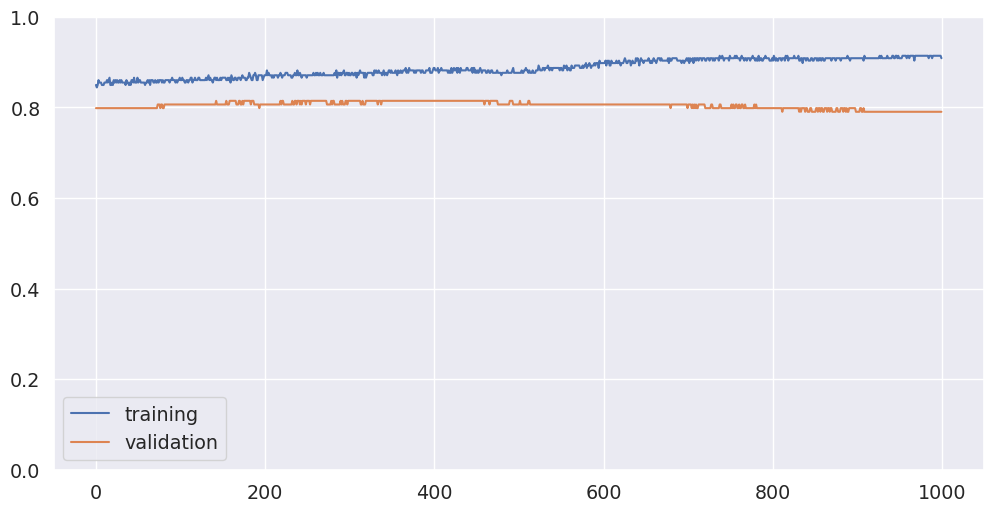

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.7500

186/186 [==============================] - 0s 783us/step - loss: 0.5965 - accuracy: 0.7043 - val_loss: 0.6075 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5924 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.5839 - accuracy: 0.7043 - val_loss: 0.6026 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.6875

186/186 [==============================] - 0s 75us/step - loss: 0.5717 - accuracy: 0.7043 - val_loss: 0.5957 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5501 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5485 - accuracy: 0.7043 - val_loss: 0.5869 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4833 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5207 - accuracy: 0.7043 - val_loss: 0.5841 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4989 - accuracy: 0.7043 - val_loss: 0.5794 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4840 - accuracy: 0.7043 - val_loss: 0.5746 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.7812

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 69us/step - loss: 0.4777 - accuracy: 0.7043 - val_loss: 0.5717 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4735 - accuracy: 0.7043 - val_loss: 0.5715 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5013 - accuracy: 0.7188



186/186 [==============================] - 0s 69us/step - loss: 0.4721 - accuracy: 0.7043 - val_loss: 0.5690 - val_accuracy: 0.6371


Epoch 11/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.4696 - accuracy: 0.7043 - val_loss: 0.5668 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4667 - accuracy: 0.7043 - val_loss: 0.5656 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4666 - accuracy: 0.7043 - val_loss: 0.5646 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4672 - accuracy: 0.7043 - val_loss: 0.5645 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4457 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4679 - accuracy: 0.7043 - val_loss: 0.5643 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.4659 - accuracy: 0.7043 - val_loss: 0.5642 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.5312

186/186 [==============================] - 0s 61us/step - loss: 0.4656 - accuracy: 0.7043 - val_loss: 0.5645 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4645 - accuracy: 0.7043 - val_loss: 0.5640 - val_accuracy: 0.6371


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4639 - accuracy: 0.7043 - val_loss: 0.5633 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4651 - accuracy: 0.7043 - val_loss: 0.5634 - val_accuracy: 0.6371


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4644 - accuracy: 0.7043 - val_loss: 0.5630 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4635 - accuracy: 0.7043 - val_loss: 0.5632 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4637 - accuracy: 0.7043 - val_loss: 0.5630 - val_accuracy: 0.6371


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.4628 - accuracy: 0.7043 - val_loss: 0.5627 - val_accuracy: 0.6371


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.4636 - accuracy: 0.7043 - val_loss: 0.5621 - val_accuracy: 0.6371


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4634 - accuracy: 0.7043 - val_loss: 0.5621 - val_accuracy: 0.6371


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4143 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.4635 - accuracy: 0.7043 - val_loss: 0.5622 - val_accuracy: 0.6371


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4621 - accuracy: 0.7043 - val_loss: 0.5609 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.4623 - accuracy: 0.7043 - val_loss: 0.5609 - val_accuracy: 0.6371


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4663 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4621 - accuracy: 0.7043 - val_loss: 0.5616 - val_accuracy: 0.6371


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.4611 - accuracy: 0.7043 - val_loss: 0.5604 - val_accuracy: 0.6371


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4562 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4613 - accuracy: 0.7043 - val_loss: 0.5616 - val_accuracy: 0.6371


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4095 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4618 - accuracy: 0.7043 - val_loss: 0.5606 - val_accuracy: 0.6371


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4588 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.4606 - accuracy: 0.7043 - val_loss: 0.5601 - val_accuracy: 0.6371


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4605 - accuracy: 0.7043 - val_loss: 0.5610 - val_accuracy: 0.6371


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.4621 - accuracy: 0.7043 - val_loss: 0.5604 - val_accuracy: 0.6371


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4616 - accuracy: 0.7043 - val_loss: 0.5599 - val_accuracy: 0.6371


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.4594 - accuracy: 0.7043 - val_loss: 0.5579 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.4606 - accuracy: 0.7043 - val_loss: 0.5579 - val_accuracy: 0.6371


Epoch 40/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4583 - accuracy: 0.7043 - val_loss: 0.5576 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.4607 - accuracy: 0.7043 - val_loss: 0.5575 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4882 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4573 - accuracy: 0.7043 - val_loss: 0.5574 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.4576 - accuracy: 0.7043 - val_loss: 0.5570 - val_accuracy: 0.6371


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4573 - accuracy: 0.7043 - val_loss: 0.5567 - val_accuracy: 0.6371


Epoch 45/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4622 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.4572 - accuracy: 0.7043 - val_loss: 0.5562 - val_accuracy: 0.6371


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5572 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4559 - accuracy: 0.7043 - val_loss: 0.5563 - val_accuracy: 0.6371


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4881 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4565 - accuracy: 0.7043 - val_loss: 0.5573 - val_accuracy: 0.6371


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.4554 - accuracy: 0.7043 - val_loss: 0.5571 - val_accuracy: 0.6371


Epoch 49/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4676 - accuracy: 0.6562

186/186 [==============================] - 0s 84us/step - loss: 0.4551 - accuracy: 0.7043 - val_loss: 0.5568 - val_accuracy: 0.6371


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.4546 - accuracy: 0.7043 - val_loss: 0.5552 - val_accuracy: 0.6371


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.4547 - accuracy: 0.7043 - val_loss: 0.5565 - val_accuracy: 0.6371


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.4536 - accuracy: 0.7043 - val_loss: 0.5581 - val_accuracy: 0.6371


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.4529 - accuracy: 0.7043 - val_loss: 0.5541 - val_accuracy: 0.6371


Epoch 54/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.6875

186/186 [==============================] - 0s 69us/step - loss: 0.4532 - accuracy: 0.7043 - val_loss: 0.5542 - val_accuracy: 0.6371


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4532 - accuracy: 0.7043 - val_loss: 0.5561 - val_accuracy: 0.6371


Epoch 56/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4742 - accuracy: 0.7500

186/186 [==============================] - 0s 81us/step - loss: 0.4526 - accuracy: 0.7043 - val_loss: 0.5583 - val_accuracy: 0.6371


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4521 - accuracy: 0.7043 - val_loss: 0.5575 - val_accuracy: 0.6371


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4855 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4510 - accuracy: 0.7043 - val_loss: 0.5535 - val_accuracy: 0.6371


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.4514 - accuracy: 0.7043 - val_loss: 0.5571 - val_accuracy: 0.6371


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5169 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.4515 - accuracy: 0.7043 - val_loss: 0.5568 - val_accuracy: 0.6371


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.4509 - accuracy: 0.7043 - val_loss: 0.5572 - val_accuracy: 0.6371


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.4499 - accuracy: 0.7043 - val_loss: 0.5547 - val_accuracy: 0.6371


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6085 - accuracy: 0.5312

186/186 [==============================] - 0s 61us/step - loss: 0.4493 - accuracy: 0.7043 - val_loss: 0.5513 - val_accuracy: 0.6371


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.4509 - accuracy: 0.7043 - val_loss: 0.5527 - val_accuracy: 0.6371


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.5625

186/186 [==============================] - 0s 59us/step - loss: 0.4490 - accuracy: 0.7043 - val_loss: 0.5529 - val_accuracy: 0.6371


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.4487 - accuracy: 0.7043 - val_loss: 0.5555 - val_accuracy: 0.6371


Epoch 67/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.4490 - accuracy: 0.7043 - val_loss: 0.5524 - val_accuracy: 0.6371


Epoch 68/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.4479 - accuracy: 0.7043 - val_loss: 0.5498 - val_accuracy: 0.6371


Epoch 69/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4786 - accuracy: 0.6250

186/186 [==============================] - 0s 71us/step - loss: 0.4488 - accuracy: 0.7043 - val_loss: 0.5515 - val_accuracy: 0.6371


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4931 - accuracy: 0.6875

186/186 [==============================] - 0s 80us/step - loss: 0.4479 - accuracy: 0.7043 - val_loss: 0.5531 - val_accuracy: 0.6371


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.6562

186/186 [==============================] - 0s 78us/step - loss: 0.4479 - accuracy: 0.7043 - val_loss: 0.5511 - val_accuracy: 0.6371


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4476 - accuracy: 0.7043 - val_loss: 0.5513 - val_accuracy: 0.6371


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.4469 - accuracy: 0.7043 - val_loss: 0.5494 - val_accuracy: 0.6371


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.4469 - accuracy: 0.7043 - val_loss: 0.5484 - val_accuracy: 0.6371


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4275 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 0.4486 - accuracy: 0.7043 - val_loss: 0.5496 - val_accuracy: 0.6371


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4135 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.4469 - accuracy: 0.7043 - val_loss: 0.5506 - val_accuracy: 0.6371


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4467 - accuracy: 0.7043 - val_loss: 0.5494 - val_accuracy: 0.6371


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.4474 - accuracy: 0.7043 - val_loss: 0.5481 - val_accuracy: 0.6371


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.5938

186/186 [==============================] - 0s 82us/step - loss: 0.4463 - accuracy: 0.7043 - val_loss: 0.5436 - val_accuracy: 0.6371


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4678 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4469 - accuracy: 0.7043 - val_loss: 0.5447 - val_accuracy: 0.6371


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4457 - accuracy: 0.6562

186/186 [==============================] - 0s 99us/step - loss: 0.4454 - accuracy: 0.7043 - val_loss: 0.5451 - val_accuracy: 0.6371


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.4454 - accuracy: 0.7043 - val_loss: 0.5456 - val_accuracy: 0.6371


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.5938

186/186 [==============================] - 0s 66us/step - loss: 0.4453 - accuracy: 0.7043 - val_loss: 0.5456 - val_accuracy: 0.6371


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4619 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4441 - accuracy: 0.7043 - val_loss: 0.5460 - val_accuracy: 0.6371


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.4435 - accuracy: 0.7043 - val_loss: 0.5414 - val_accuracy: 0.6371


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.4454 - accuracy: 0.7043 - val_loss: 0.5429 - val_accuracy: 0.6371


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4755 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4433 - accuracy: 0.7043 - val_loss: 0.5427 - val_accuracy: 0.6371


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.4436 - accuracy: 0.7043 - val_loss: 0.5392 - val_accuracy: 0.6371


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3757 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.4445 - accuracy: 0.7043 - val_loss: 0.5412 - val_accuracy: 0.6371


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4429 - accuracy: 0.7043 - val_loss: 0.5412 - val_accuracy: 0.6371


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4431 - accuracy: 0.7043 - val_loss: 0.5375 - val_accuracy: 0.6371


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4379 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4430 - accuracy: 0.7043 - val_loss: 0.5406 - val_accuracy: 0.6371


Epoch 93/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4810 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.4428 - accuracy: 0.7043 - val_loss: 0.5409 - val_accuracy: 0.6371


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.4428 - accuracy: 0.7043 - val_loss: 0.5398 - val_accuracy: 0.6371


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4839 - accuracy: 0.5938

186/186 [==============================] - 0s 70us/step - loss: 0.4422 - accuracy: 0.7043 - val_loss: 0.5382 - val_accuracy: 0.6371


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.6562

186/186 [==============================] - 0s 64us/step - loss: 0.4454 - accuracy: 0.7043 - val_loss: 0.5392 - val_accuracy: 0.6371


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.4421 - accuracy: 0.7043 - val_loss: 0.5374 - val_accuracy: 0.6371


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.4419 - accuracy: 0.7043 - val_loss: 0.5387 - val_accuracy: 0.6371


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4423 - accuracy: 0.7043 - val_loss: 0.5386 - val_accuracy: 0.6371


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5087 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4426 - accuracy: 0.7043 - val_loss: 0.5395 - val_accuracy: 0.6371


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4953 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4419 - accuracy: 0.7043 - val_loss: 0.5382 - val_accuracy: 0.6371


Epoch 102/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 0.4418 - accuracy: 0.7043 - val_loss: 0.5393 - val_accuracy: 0.6371


Epoch 103/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.4415 - accuracy: 0.7043 - val_loss: 0.5404 - val_accuracy: 0.6371


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4422 - accuracy: 0.7043 - val_loss: 0.5353 - val_accuracy: 0.6371


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4428 - accuracy: 0.7043 - val_loss: 0.5383 - val_accuracy: 0.6371


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4412 - accuracy: 0.7043 - val_loss: 0.5367 - val_accuracy: 0.6371


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.4414 - accuracy: 0.7043 - val_loss: 0.5337 - val_accuracy: 0.6371


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4416 - accuracy: 0.7043 - val_loss: 0.5368 - val_accuracy: 0.6371


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4411 - accuracy: 0.7043 - val_loss: 0.5330 - val_accuracy: 0.6371


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4412 - accuracy: 0.7043 - val_loss: 0.5400 - val_accuracy: 0.6371


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4411 - accuracy: 0.7043 - val_loss: 0.5399 - val_accuracy: 0.6371


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.4411 - accuracy: 0.7043 - val_loss: 0.5356 - val_accuracy: 0.6371


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.4413 - accuracy: 0.7043 - val_loss: 0.5383 - val_accuracy: 0.6371


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4414 - accuracy: 0.7043 - val_loss: 0.5382 - val_accuracy: 0.6371


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4410 - accuracy: 0.7043 - val_loss: 0.5375 - val_accuracy: 0.6371


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4711 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4405 - accuracy: 0.7043 - val_loss: 0.5333 - val_accuracy: 0.6371


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.4411 - accuracy: 0.7043 - val_loss: 0.5366 - val_accuracy: 0.6371


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4403 - accuracy: 0.7043 - val_loss: 0.5391 - val_accuracy: 0.6371


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.4403 - accuracy: 0.7043 - val_loss: 0.5350 - val_accuracy: 0.6371


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4406 - accuracy: 0.7043 - val_loss: 0.5322 - val_accuracy: 0.6371


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4404 - accuracy: 0.7043 - val_loss: 0.5328 - val_accuracy: 0.6371


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4408 - accuracy: 0.7043 - val_loss: 0.5341 - val_accuracy: 0.6371


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5161 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.4404 - accuracy: 0.7043 - val_loss: 0.5337 - val_accuracy: 0.6371


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4393 - accuracy: 0.7043 - val_loss: 0.5364 - val_accuracy: 0.6371


Epoch 125/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4403 - accuracy: 0.7043 - val_loss: 0.5334 - val_accuracy: 0.6371


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4811 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4416 - accuracy: 0.7043 - val_loss: 0.5353 - val_accuracy: 0.6371


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4440 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.4398 - accuracy: 0.7043 - val_loss: 0.5327 - val_accuracy: 0.6371


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4400 - accuracy: 0.7043 - val_loss: 0.5343 - val_accuracy: 0.6371


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4396 - accuracy: 0.7043 - val_loss: 0.5353 - val_accuracy: 0.6371


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5601 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.4396 - accuracy: 0.7043 - val_loss: 0.5323 - val_accuracy: 0.6371


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4612 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4394 - accuracy: 0.7043 - val_loss: 0.5345 - val_accuracy: 0.6371


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4395 - accuracy: 0.7043 - val_loss: 0.5309 - val_accuracy: 0.6371


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4392 - accuracy: 0.7043 - val_loss: 0.5360 - val_accuracy: 0.6371


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4391 - accuracy: 0.7043 - val_loss: 0.5318 - val_accuracy: 0.6371


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4398 - accuracy: 0.7043 - val_loss: 0.5328 - val_accuracy: 0.6371


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4258 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4391 - accuracy: 0.7043 - val_loss: 0.5360 - val_accuracy: 0.6371


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4397 - accuracy: 0.7043 - val_loss: 0.5371 - val_accuracy: 0.6371


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4390 - accuracy: 0.7043 - val_loss: 0.5348 - val_accuracy: 0.6371


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4385 - accuracy: 0.7043 - val_loss: 0.5325 - val_accuracy: 0.6371


Epoch 140/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.7500

186/186 [==============================] - 0s 72us/step - loss: 0.4393 - accuracy: 0.7043 - val_loss: 0.5352 - val_accuracy: 0.6371


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4388 - accuracy: 0.7043 - val_loss: 0.5327 - val_accuracy: 0.6371


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.4385 - accuracy: 0.7043 - val_loss: 0.5287 - val_accuracy: 0.6371


Epoch 143/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4800 - accuracy: 0.7188

186/186 [==============================] - 0s 68us/step - loss: 0.4387 - accuracy: 0.7043 - val_loss: 0.5332 - val_accuracy: 0.6371


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4388 - accuracy: 0.7043 - val_loss: 0.5356 - val_accuracy: 0.6371


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3835 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.4386 - accuracy: 0.7043 - val_loss: 0.5333 - val_accuracy: 0.6371


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5143 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4384 - accuracy: 0.7043 - val_loss: 0.5299 - val_accuracy: 0.6371


Epoch 147/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4382 - accuracy: 0.7043 - val_loss: 0.5390 - val_accuracy: 0.6371


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4583 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.4386 - accuracy: 0.7043 - val_loss: 0.5349 - val_accuracy: 0.6371


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7188

186/186 [==============================] - 0s 68us/step - loss: 0.4376 - accuracy: 0.7043 - val_loss: 0.5312 - val_accuracy: 0.6371


Epoch 150/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4382 - accuracy: 0.7043 - val_loss: 0.5281 - val_accuracy: 0.6371


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.4381 - accuracy: 0.7043 - val_loss: 0.5337 - val_accuracy: 0.6371


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4373 - accuracy: 0.7043 - val_loss: 0.5319 - val_accuracy: 0.6371


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5783 - accuracy: 0.4688

186/186 [==============================] - 0s 68us/step - loss: 0.4382 - accuracy: 0.7043 - val_loss: 0.5284 - val_accuracy: 0.6371


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4894 - accuracy: 0.6875

186/186 [==============================] - 0s 72us/step - loss: 0.4377 - accuracy: 0.7043 - val_loss: 0.5346 - val_accuracy: 0.6371


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.4382 - accuracy: 0.7043 - val_loss: 0.5342 - val_accuracy: 0.6371


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5421 - accuracy: 0.5000

186/186 [==============================] - 0s 62us/step - loss: 0.4376 - accuracy: 0.7043 - val_loss: 0.5305 - val_accuracy: 0.6371


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4694 - accuracy: 0.7812

186/186 [==============================] - 0s 75us/step - loss: 0.4377 - accuracy: 0.7043 - val_loss: 0.5317 - val_accuracy: 0.6371


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6266 - accuracy: 0.5000

186/186 [==============================] - 0s 67us/step - loss: 0.4369 - accuracy: 0.7043 - val_loss: 0.5289 - val_accuracy: 0.6371


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.4372 - accuracy: 0.7043 - val_loss: 0.5360 - val_accuracy: 0.6371


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4378 - accuracy: 0.7043 - val_loss: 0.5319 - val_accuracy: 0.6371


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4377 - accuracy: 0.7043 - val_loss: 0.5296 - val_accuracy: 0.6371


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.4368 - accuracy: 0.7043 - val_loss: 0.5268 - val_accuracy: 0.6371


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.4388 - accuracy: 0.7043 - val_loss: 0.5253 - val_accuracy: 0.6371


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.4377 - accuracy: 0.7043 - val_loss: 0.5255 - val_accuracy: 0.6371


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4370 - accuracy: 0.7043 - val_loss: 0.5281 - val_accuracy: 0.6371


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3746 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.4362 - accuracy: 0.7043 - val_loss: 0.5359 - val_accuracy: 0.6371


Epoch 167/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4371 - accuracy: 0.7043 - val_loss: 0.5297 - val_accuracy: 0.6371


Epoch 168/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4368 - accuracy: 0.7043 - val_loss: 0.5263 - val_accuracy: 0.6371


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4377 - accuracy: 0.7043 - val_loss: 0.5241 - val_accuracy: 0.6371


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5128 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.4362 - accuracy: 0.7043 - val_loss: 0.5241 - val_accuracy: 0.6371


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4569 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.4367 - accuracy: 0.7043 - val_loss: 0.5303 - val_accuracy: 0.6371


Epoch 172/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4712 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 0.4371 - accuracy: 0.7043 - val_loss: 0.5269 - val_accuracy: 0.6371


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.4362 - accuracy: 0.7043 - val_loss: 0.5280 - val_accuracy: 0.6371


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4366 - accuracy: 0.7043 - val_loss: 0.5250 - val_accuracy: 0.6371


Epoch 175/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4814 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 0.4365 - accuracy: 0.7043 - val_loss: 0.5224 - val_accuracy: 0.6371


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4434 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.4366 - accuracy: 0.7043 - val_loss: 0.5257 - val_accuracy: 0.6371


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.4365 - accuracy: 0.7043 - val_loss: 0.5241 - val_accuracy: 0.6371


Epoch 178/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4359 - accuracy: 0.7043 - val_loss: 0.5239 - val_accuracy: 0.6371


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4368 - accuracy: 0.7043 - val_loss: 0.5267 - val_accuracy: 0.6371


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 0.4355 - accuracy: 0.7043 - val_loss: 0.5324 - val_accuracy: 0.6371


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4365 - accuracy: 0.7043 - val_loss: 0.5303 - val_accuracy: 0.6371


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4359 - accuracy: 0.7043 - val_loss: 0.5289 - val_accuracy: 0.6371


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4355 - accuracy: 0.7043 - val_loss: 0.5263 - val_accuracy: 0.6371


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.5938



186/186 [==============================] - 0s 58us/step - loss: 0.4357 - accuracy: 0.7043 - val_loss: 0.5237 - val_accuracy: 0.6371


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.6875

186/186 [==============================] - 0s 78us/step - loss: 0.4356 - accuracy: 0.7043 - val_loss: 0.5247 - val_accuracy: 0.6371


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.4365 - accuracy: 0.7043 - val_loss: 0.5249 - val_accuracy: 0.6371


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4689 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4359 - accuracy: 0.7043 - val_loss: 0.5233 - val_accuracy: 0.6371


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4362 - accuracy: 0.7043 - val_loss: 0.5222 - val_accuracy: 0.6371


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4351 - accuracy: 0.7043 - val_loss: 0.5253 - val_accuracy: 0.6371


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4355 - accuracy: 0.7043 - val_loss: 0.5245 - val_accuracy: 0.6371


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.4356 - accuracy: 0.7043 - val_loss: 0.5240 - val_accuracy: 0.6371


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.4356 - accuracy: 0.7043 - val_loss: 0.5246 - val_accuracy: 0.6371


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4353 - accuracy: 0.7043 - val_loss: 0.5258 - val_accuracy: 0.6371


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 0.4353 - accuracy: 0.7043 - val_loss: 0.5227 - val_accuracy: 0.6371


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4361 - accuracy: 0.7043 - val_loss: 0.5255 - val_accuracy: 0.6371


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.4345 - accuracy: 0.7043 - val_loss: 0.5244 - val_accuracy: 0.6371


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4477 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4351 - accuracy: 0.7043 - val_loss: 0.5205 - val_accuracy: 0.6371


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4353 - accuracy: 0.7043 - val_loss: 0.5209 - val_accuracy: 0.6371


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4667 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4349 - accuracy: 0.7043 - val_loss: 0.5215 - val_accuracy: 0.6371


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4342 - accuracy: 0.7043 - val_loss: 0.5191 - val_accuracy: 0.6371


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4349 - accuracy: 0.7043 - val_loss: 0.5184 - val_accuracy: 0.6371


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.4342 - accuracy: 0.7043 - val_loss: 0.5210 - val_accuracy: 0.6371


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4439 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4347 - accuracy: 0.7043 - val_loss: 0.5212 - val_accuracy: 0.6371


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.4344 - accuracy: 0.7043 - val_loss: 0.5183 - val_accuracy: 0.6371


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4358 - accuracy: 0.7043 - val_loss: 0.5152 - val_accuracy: 0.6371


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4894 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.4344 - accuracy: 0.7043 - val_loss: 0.5153 - val_accuracy: 0.6371


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4527 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.4335 - accuracy: 0.7043 - val_loss: 0.5190 - val_accuracy: 0.6371


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4343 - accuracy: 0.7043 - val_loss: 0.5147 - val_accuracy: 0.6371


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.4338 - accuracy: 0.7043 - val_loss: 0.5137 - val_accuracy: 0.6371


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5358 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.4342 - accuracy: 0.7043 - val_loss: 0.5140 - val_accuracy: 0.6371


Epoch 211/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.4332 - accuracy: 0.7043 - val_loss: 0.5122 - val_accuracy: 0.6371


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4335 - accuracy: 0.7043 - val_loss: 0.5117 - val_accuracy: 0.6371


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4334 - accuracy: 0.7043 - val_loss: 0.5112 - val_accuracy: 0.6371


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4322 - accuracy: 0.7043 - val_loss: 0.5120 - val_accuracy: 0.6371


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4907 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4314 - accuracy: 0.7043 - val_loss: 0.5088 - val_accuracy: 0.6371


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4316 - accuracy: 0.7043 - val_loss: 0.5107 - val_accuracy: 0.6371


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4329 - accuracy: 0.7043 - val_loss: 0.5099 - val_accuracy: 0.6371


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4324 - accuracy: 0.7043 - val_loss: 0.5082 - val_accuracy: 0.6371


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.4314 - accuracy: 0.7043 - val_loss: 0.5082 - val_accuracy: 0.6371


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.4319 - accuracy: 0.7043 - val_loss: 0.5076 - val_accuracy: 0.6371


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.4318 - accuracy: 0.7043 - val_loss: 0.5048 - val_accuracy: 0.6371


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.4314 - accuracy: 0.7043 - val_loss: 0.5050 - val_accuracy: 0.6371


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4310 - accuracy: 0.7043 - val_loss: 0.5043 - val_accuracy: 0.6371


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5013 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4299 - accuracy: 0.7043 - val_loss: 0.5028 - val_accuracy: 0.6371


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.4311 - accuracy: 0.7043 - val_loss: 0.5025 - val_accuracy: 0.6371


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.7188



186/186 [==============================] - 0s 60us/step - loss: 0.4312 - accuracy: 0.7043 - val_loss: 0.5018 - val_accuracy: 0.6371


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4304 - accuracy: 0.7043 - val_loss: 0.5014 - val_accuracy: 0.6371


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5559 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4291 - accuracy: 0.7043 - val_loss: 0.5010 - val_accuracy: 0.6371


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.4293 - accuracy: 0.7043 - val_loss: 0.5007 - val_accuracy: 0.6371


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4287 - accuracy: 0.7043 - val_loss: 0.5000 - val_accuracy: 0.6371


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4306 - accuracy: 0.7043 - val_loss: 0.4996 - val_accuracy: 0.6371


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4300 - accuracy: 0.7043 - val_loss: 0.4993 - val_accuracy: 0.6371


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.4300 - accuracy: 0.7043 - val_loss: 0.4990 - val_accuracy: 0.6371


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4292 - accuracy: 0.7043 - val_loss: 0.4987 - val_accuracy: 0.6371


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.4278 - accuracy: 0.7043 - val_loss: 0.4984 - val_accuracy: 0.6371


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4276 - accuracy: 0.7043 - val_loss: 0.4980 - val_accuracy: 0.6371


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4269 - accuracy: 0.7043 - val_loss: 0.4977 - val_accuracy: 0.6371


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.4268 - accuracy: 0.7043 - val_loss: 0.4974 - val_accuracy: 0.6371


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.4290 - accuracy: 0.7043 - val_loss: 0.4971 - val_accuracy: 0.6371


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.4268 - accuracy: 0.7043 - val_loss: 0.4967 - val_accuracy: 0.6371


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.4273 - accuracy: 0.7043 - val_loss: 0.4964 - val_accuracy: 0.6371


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3817 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4269 - accuracy: 0.7043 - val_loss: 0.4962 - val_accuracy: 0.6371


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4265 - accuracy: 0.7043 - val_loss: 0.4960 - val_accuracy: 0.6371


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.6250

186/186 [==============================] - 0s 75us/step - loss: 0.4256 - accuracy: 0.7043 - val_loss: 0.4958 - val_accuracy: 0.6371


Epoch 245/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.4252 - accuracy: 0.7043 - val_loss: 0.4957 - val_accuracy: 0.6371


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.6250

186/186 [==============================] - 0s 70us/step - loss: 0.4256 - accuracy: 0.7043 - val_loss: 0.4958 - val_accuracy: 0.6371


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.6562

186/186 [==============================] - 0s 74us/step - loss: 0.4261 - accuracy: 0.7043 - val_loss: 0.4956 - val_accuracy: 0.6371


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.4248 - accuracy: 0.7043 - val_loss: 0.4953 - val_accuracy: 0.6371


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.4248 - accuracy: 0.7043 - val_loss: 0.4949 - val_accuracy: 0.6371


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.4262 - accuracy: 0.7043 - val_loss: 0.4948 - val_accuracy: 0.6371


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.4255 - accuracy: 0.7043 - val_loss: 0.4948 - val_accuracy: 0.6371


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.4239 - accuracy: 0.7043 - val_loss: 0.4948 - val_accuracy: 0.6371


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4590 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.4235 - accuracy: 0.7043 - val_loss: 0.4949 - val_accuracy: 0.6371


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4339 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.4221 - accuracy: 0.7043 - val_loss: 0.4944 - val_accuracy: 0.6371


Epoch 255/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5290 - accuracy: 0.5938

186/186 [==============================] - 0s 77us/step - loss: 0.4220 - accuracy: 0.7043 - val_loss: 0.4940 - val_accuracy: 0.6371


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4225 - accuracy: 0.7043 - val_loss: 0.4934 - val_accuracy: 0.6371


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5679 - accuracy: 0.5938

186/186 [==============================] - 0s 67us/step - loss: 0.4209 - accuracy: 0.7043 - val_loss: 0.4931 - val_accuracy: 0.6371


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.7500

186/186 [==============================] - 0s 77us/step - loss: 0.4209 - accuracy: 0.7043 - val_loss: 0.4925 - val_accuracy: 0.6371


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.6875

186/186 [==============================] - 0s 81us/step - loss: 0.4195 - accuracy: 0.7043 - val_loss: 0.4922 - val_accuracy: 0.6371


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.4197 - accuracy: 0.7043 - val_loss: 0.4917 - val_accuracy: 0.6371


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.6875

186/186 [==============================] - 0s 69us/step - loss: 0.4195 - accuracy: 0.7043 - val_loss: 0.4916 - val_accuracy: 0.6371


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.4191 - accuracy: 0.7043 - val_loss: 0.4913 - val_accuracy: 0.6371


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.4183 - accuracy: 0.7043 - val_loss: 0.4910 - val_accuracy: 0.6371


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4345 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.4176 - accuracy: 0.7473 - val_loss: 0.4907 - val_accuracy: 0.7258


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4165 - accuracy: 0.7742 - val_loss: 0.4904 - val_accuracy: 0.7177


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.4168 - accuracy: 0.7742 - val_loss: 0.4901 - val_accuracy: 0.7339


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.4189 - accuracy: 0.7688 - val_loss: 0.4898 - val_accuracy: 0.7339


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4160 - accuracy: 0.7688 - val_loss: 0.4896 - val_accuracy: 0.7258


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4162 - accuracy: 0.7796 - val_loss: 0.4892 - val_accuracy: 0.7339


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.4170 - accuracy: 0.7796 - val_loss: 0.4890 - val_accuracy: 0.7339


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4151 - accuracy: 0.7796 - val_loss: 0.4887 - val_accuracy: 0.7339


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.4153 - accuracy: 0.7688 - val_loss: 0.4886 - val_accuracy: 0.7258


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4148 - accuracy: 0.7634 - val_loss: 0.4885 - val_accuracy: 0.7339


Epoch 274/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4153 - accuracy: 0.7688 - val_loss: 0.4885 - val_accuracy: 0.7177


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4137 - accuracy: 0.7742 - val_loss: 0.4881 - val_accuracy: 0.7339


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4133 - accuracy: 0.7742 - val_loss: 0.4879 - val_accuracy: 0.7339


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.7500



186/186 [==============================] - 0s 59us/step - loss: 0.4142 - accuracy: 0.7688 - val_loss: 0.4876 - val_accuracy: 0.7258


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6313 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.4129 - accuracy: 0.7742 - val_loss: 0.4875 - val_accuracy: 0.7258


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.4126 - accuracy: 0.7849 - val_loss: 0.4875 - val_accuracy: 0.7339


Epoch 280/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.4120 - accuracy: 0.7742 - val_loss: 0.4874 - val_accuracy: 0.7177


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.4122 - accuracy: 0.7688 - val_loss: 0.4870 - val_accuracy: 0.7258


Epoch 282/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4116 - accuracy: 0.7796 - val_loss: 0.4863 - val_accuracy: 0.7258


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4120 - accuracy: 0.7796 - val_loss: 0.4861 - val_accuracy: 0.7258


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4127 - accuracy: 0.7742 - val_loss: 0.4861 - val_accuracy: 0.7177


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.4121 - accuracy: 0.7634 - val_loss: 0.4861 - val_accuracy: 0.7097


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4108 - accuracy: 0.7688 - val_loss: 0.4865 - val_accuracy: 0.7177


Epoch 287/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5951 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.4111 - accuracy: 0.7849 - val_loss: 0.4867 - val_accuracy: 0.7339


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4114 - accuracy: 0.7742 - val_loss: 0.4859 - val_accuracy: 0.7177


Epoch 289/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.4104 - accuracy: 0.7796 - val_loss: 0.4853 - val_accuracy: 0.7177


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4798 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4107 - accuracy: 0.7688 - val_loss: 0.4858 - val_accuracy: 0.7177


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4104 - accuracy: 0.7796 - val_loss: 0.4862 - val_accuracy: 0.7258


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.4094 - accuracy: 0.7796 - val_loss: 0.4861 - val_accuracy: 0.7258


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5873 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4104 - accuracy: 0.7796 - val_loss: 0.4857 - val_accuracy: 0.7258


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.4099 - accuracy: 0.7796 - val_loss: 0.4860 - val_accuracy: 0.7258


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.4088 - accuracy: 0.7796 - val_loss: 0.4853 - val_accuracy: 0.7258


Epoch 296/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.4088 - accuracy: 0.7796 - val_loss: 0.4848 - val_accuracy: 0.7258


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.4087 - accuracy: 0.7742 - val_loss: 0.4851 - val_accuracy: 0.7258


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.4091 - accuracy: 0.7796 - val_loss: 0.4850 - val_accuracy: 0.7258


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3738 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4086 - accuracy: 0.7796 - val_loss: 0.4851 - val_accuracy: 0.7177


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4083 - accuracy: 0.7849 - val_loss: 0.4854 - val_accuracy: 0.7258


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4081 - accuracy: 0.7796 - val_loss: 0.4849 - val_accuracy: 0.7258


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4090 - accuracy: 0.7849 - val_loss: 0.4848 - val_accuracy: 0.7177


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4076 - accuracy: 0.7796 - val_loss: 0.4845 - val_accuracy: 0.7258


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4082 - accuracy: 0.7849 - val_loss: 0.4842 - val_accuracy: 0.7258


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8750



186/186 [==============================] - 0s 61us/step - loss: 0.4082 - accuracy: 0.7742 - val_loss: 0.4839 - val_accuracy: 0.7258


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4074 - accuracy: 0.7849 - val_loss: 0.4842 - val_accuracy: 0.7258


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4084 - accuracy: 0.7796 - val_loss: 0.4838 - val_accuracy: 0.7258


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4073 - accuracy: 0.7849 - val_loss: 0.4836 - val_accuracy: 0.7258


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4575 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4072 - accuracy: 0.7849 - val_loss: 0.4835 - val_accuracy: 0.7177


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4795 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4070 - accuracy: 0.7796 - val_loss: 0.4833 - val_accuracy: 0.7177


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5219 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4075 - accuracy: 0.7849 - val_loss: 0.4833 - val_accuracy: 0.7258


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4040 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4068 - accuracy: 0.7849 - val_loss: 0.4834 - val_accuracy: 0.7339


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4064 - accuracy: 0.7849 - val_loss: 0.4829 - val_accuracy: 0.7258


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4060 - accuracy: 0.7796 - val_loss: 0.4829 - val_accuracy: 0.7258


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2496 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.4070 - accuracy: 0.7849 - val_loss: 0.4828 - val_accuracy: 0.7258


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4058 - accuracy: 0.7742 - val_loss: 0.4828 - val_accuracy: 0.7339


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4060 - accuracy: 0.7849 - val_loss: 0.4829 - val_accuracy: 0.7339


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6097 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4060 - accuracy: 0.7903 - val_loss: 0.4825 - val_accuracy: 0.7339


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6127 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4056 - accuracy: 0.7903 - val_loss: 0.4822 - val_accuracy: 0.7339


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4049 - accuracy: 0.7796 - val_loss: 0.4820 - val_accuracy: 0.7339


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4071 - accuracy: 0.7903 - val_loss: 0.4818 - val_accuracy: 0.7339


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.4054 - accuracy: 0.7903 - val_loss: 0.4814 - val_accuracy: 0.7339


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.4056 - accuracy: 0.7957 - val_loss: 0.4812 - val_accuracy: 0.7339


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4650 - accuracy: 0.7812

186/186 [==============================] - 0s 85us/step - loss: 0.4048 - accuracy: 0.7903 - val_loss: 0.4809 - val_accuracy: 0.7339


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6244 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4056 - accuracy: 0.7796 - val_loss: 0.4808 - val_accuracy: 0.7339


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2452 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.4046 - accuracy: 0.7903 - val_loss: 0.4808 - val_accuracy: 0.7339


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4037 - accuracy: 0.7903 - val_loss: 0.4803 - val_accuracy: 0.7419


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4044 - accuracy: 0.7849 - val_loss: 0.4802 - val_accuracy: 0.7419


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4047 - accuracy: 0.7796 - val_loss: 0.4801 - val_accuracy: 0.7339


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4042 - accuracy: 0.7903 - val_loss: 0.4800 - val_accuracy: 0.7339


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4045 - accuracy: 0.7903 - val_loss: 0.4799 - val_accuracy: 0.7339


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4032 - accuracy: 0.7849 - val_loss: 0.4797 - val_accuracy: 0.7339


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4031 - accuracy: 0.7849 - val_loss: 0.4797 - val_accuracy: 0.7339


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4038 - accuracy: 0.8011 - val_loss: 0.4797 - val_accuracy: 0.7339


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4029 - accuracy: 0.7849 - val_loss: 0.4791 - val_accuracy: 0.7419


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4027 - accuracy: 0.8011 - val_loss: 0.4789 - val_accuracy: 0.7339


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4026 - accuracy: 0.8011 - val_loss: 0.4789 - val_accuracy: 0.7339


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4034 - accuracy: 0.7957 - val_loss: 0.4788 - val_accuracy: 0.7339


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4014 - accuracy: 0.8011 - val_loss: 0.4788 - val_accuracy: 0.7339


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.4036 - accuracy: 0.7957 - val_loss: 0.4788 - val_accuracy: 0.7339


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.4012 - accuracy: 0.7957 - val_loss: 0.4786 - val_accuracy: 0.7339


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4025 - accuracy: 0.7849 - val_loss: 0.4782 - val_accuracy: 0.7339


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8750

186/186 [==============================] - 0s 105us/step - loss: 0.4010 - accuracy: 0.8011 - val_loss: 0.4783 - val_accuracy: 0.7339


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.4023 - accuracy: 0.7957 - val_loss: 0.4782 - val_accuracy: 0.7258


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4010 - accuracy: 0.8011 - val_loss: 0.4779 - val_accuracy: 0.7339


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4651 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.4006 - accuracy: 0.8011 - val_loss: 0.4777 - val_accuracy: 0.7419


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4022 - accuracy: 0.8011 - val_loss: 0.4776 - val_accuracy: 0.7339


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4384 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4002 - accuracy: 0.8011 - val_loss: 0.4772 - val_accuracy: 0.7339


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5487 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.4014 - accuracy: 0.7957 - val_loss: 0.4770 - val_accuracy: 0.7339


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.4016 - accuracy: 0.7957 - val_loss: 0.4767 - val_accuracy: 0.7419


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3991 - accuracy: 0.7957 - val_loss: 0.4766 - val_accuracy: 0.7419


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4020 - accuracy: 0.7957 - val_loss: 0.4763 - val_accuracy: 0.7419


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3996 - accuracy: 0.7903 - val_loss: 0.4762 - val_accuracy: 0.7581


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.3999 - accuracy: 0.7957 - val_loss: 0.4760 - val_accuracy: 0.7339


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3994 - accuracy: 0.7957 - val_loss: 0.4758 - val_accuracy: 0.7500


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3992 - accuracy: 0.7957 - val_loss: 0.4760 - val_accuracy: 0.7500


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4003 - accuracy: 0.7903 - val_loss: 0.4755 - val_accuracy: 0.7500


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3984 - accuracy: 0.7957 - val_loss: 0.4759 - val_accuracy: 0.7339


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3991 - accuracy: 0.7957 - val_loss: 0.4754 - val_accuracy: 0.7500


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3982 - accuracy: 0.7957 - val_loss: 0.4752 - val_accuracy: 0.7500


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3987 - accuracy: 0.7957 - val_loss: 0.4756 - val_accuracy: 0.7419


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3990 - accuracy: 0.7903 - val_loss: 0.4753 - val_accuracy: 0.7419


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3980 - accuracy: 0.7903 - val_loss: 0.4755 - val_accuracy: 0.7419


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4807 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3977 - accuracy: 0.7957 - val_loss: 0.4757 - val_accuracy: 0.7339


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.6875

186/186 [==============================] - 0s 96us/step - loss: 0.3994 - accuracy: 0.7903 - val_loss: 0.4753 - val_accuracy: 0.7500


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3972 - accuracy: 0.7957 - val_loss: 0.4746 - val_accuracy: 0.7339


Epoch 367/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3983 - accuracy: 0.7903 - val_loss: 0.4748 - val_accuracy: 0.7419


Epoch 368/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4866 - accuracy: 0.7500

186/186 [==============================] - 0s 80us/step - loss: 0.3980 - accuracy: 0.7903 - val_loss: 0.4747 - val_accuracy: 0.7419


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3968 - accuracy: 0.7957 - val_loss: 0.4749 - val_accuracy: 0.7419


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3980 - accuracy: 0.7903 - val_loss: 0.4749 - val_accuracy: 0.7419


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3975 - accuracy: 0.7903 - val_loss: 0.4753 - val_accuracy: 0.7419


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5060 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3967 - accuracy: 0.7903 - val_loss: 0.4749 - val_accuracy: 0.7339


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3966 - accuracy: 0.7957 - val_loss: 0.4751 - val_accuracy: 0.7419


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3969 - accuracy: 0.7903 - val_loss: 0.4751 - val_accuracy: 0.7419


Epoch 375/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8125

186/186 [==============================] - 0s 108us/step - loss: 0.3980 - accuracy: 0.7903 - val_loss: 0.4753 - val_accuracy: 0.7339


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3959 - accuracy: 0.7957 - val_loss: 0.4756 - val_accuracy: 0.7339


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3967 - accuracy: 0.7903 - val_loss: 0.4754 - val_accuracy: 0.7258


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3970 - accuracy: 0.8011 - val_loss: 0.4749 - val_accuracy: 0.7339


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3964 - accuracy: 0.7957 - val_loss: 0.4744 - val_accuracy: 0.7339


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3967 - accuracy: 0.7957 - val_loss: 0.4745 - val_accuracy: 0.7339


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4245 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3957 - accuracy: 0.8011 - val_loss: 0.4742 - val_accuracy: 0.7339


Epoch 382/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5983 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3953 - accuracy: 0.7957 - val_loss: 0.4744 - val_accuracy: 0.7339


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3965 - accuracy: 0.7957 - val_loss: 0.4745 - val_accuracy: 0.7339


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3963 - accuracy: 0.7903 - val_loss: 0.4745 - val_accuracy: 0.7339


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3948 - accuracy: 0.7957 - val_loss: 0.4743 - val_accuracy: 0.7339


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3960 - accuracy: 0.7957 - val_loss: 0.4741 - val_accuracy: 0.7339


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3978 - accuracy: 0.8011 - val_loss: 0.4734 - val_accuracy: 0.7339


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3947 - accuracy: 0.7957 - val_loss: 0.4732 - val_accuracy: 0.7339


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3943 - accuracy: 0.8011 - val_loss: 0.4731 - val_accuracy: 0.7419


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3937 - accuracy: 0.8011 - val_loss: 0.4733 - val_accuracy: 0.7339


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3952 - accuracy: 0.7903 - val_loss: 0.4730 - val_accuracy: 0.7258


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3958 - accuracy: 0.8011 - val_loss: 0.4728 - val_accuracy: 0.7258


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3937 - accuracy: 0.8011 - val_loss: 0.4728 - val_accuracy: 0.7339


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3932 - accuracy: 0.8065 - val_loss: 0.4727 - val_accuracy: 0.7258


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3943 - accuracy: 0.8011 - val_loss: 0.4726 - val_accuracy: 0.7258


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3933 - accuracy: 0.8011 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3932 - accuracy: 0.7957 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3936 - accuracy: 0.8011 - val_loss: 0.4723 - val_accuracy: 0.7339


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.7812

186/186 [==============================] - 0s 91us/step - loss: 0.3943 - accuracy: 0.8011 - val_loss: 0.4723 - val_accuracy: 0.7258


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3919 - accuracy: 0.8011 - val_loss: 0.4722 - val_accuracy: 0.7258


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3936 - accuracy: 0.8011 - val_loss: 0.4722 - val_accuracy: 0.7258


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3924 - accuracy: 0.8011 - val_loss: 0.4721 - val_accuracy: 0.7419


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3926 - accuracy: 0.8011 - val_loss: 0.4721 - val_accuracy: 0.7339


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.3919 - accuracy: 0.8011 - val_loss: 0.4721 - val_accuracy: 0.7258


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3917 - accuracy: 0.8011 - val_loss: 0.4718 - val_accuracy: 0.7339


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3933 - accuracy: 0.8011 - val_loss: 0.4718 - val_accuracy: 0.7258


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3919 - accuracy: 0.8011 - val_loss: 0.4719 - val_accuracy: 0.7258


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3923 - accuracy: 0.7957 - val_loss: 0.4718 - val_accuracy: 0.7258


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3912 - accuracy: 0.8011 - val_loss: 0.4718 - val_accuracy: 0.7258


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3920 - accuracy: 0.8011 - val_loss: 0.4717 - val_accuracy: 0.7258


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.3910 - accuracy: 0.8011 - val_loss: 0.4719 - val_accuracy: 0.7258


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3902 - accuracy: 0.8011 - val_loss: 0.4718 - val_accuracy: 0.7258


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3911 - accuracy: 0.8011 - val_loss: 0.4718 - val_accuracy: 0.7258


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3942 - accuracy: 0.8011 - val_loss: 0.4714 - val_accuracy: 0.7339


Epoch 415/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3902 - accuracy: 0.8011 - val_loss: 0.4714 - val_accuracy: 0.7339


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3907 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7339


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3903 - accuracy: 0.8011 - val_loss: 0.4716 - val_accuracy: 0.7258


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3905 - accuracy: 0.8011 - val_loss: 0.4717 - val_accuracy: 0.7258


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.3903 - accuracy: 0.8011 - val_loss: 0.4714 - val_accuracy: 0.7258


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8750

186/186 [==============================] - 0s 78us/step - loss: 0.3904 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7339


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3897 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.7188

186/186 [==============================] - 0s 68us/step - loss: 0.3892 - accuracy: 0.8011 - val_loss: 0.4714 - val_accuracy: 0.7419


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3894 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3893 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3892 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7419


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3887 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7419


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3915 - accuracy: 0.8011 - val_loss: 0.4711 - val_accuracy: 0.7419


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.3883 - accuracy: 0.8011 - val_loss: 0.4711 - val_accuracy: 0.7419


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4459 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3889 - accuracy: 0.8011 - val_loss: 0.4712 - val_accuracy: 0.7419


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3888 - accuracy: 0.8011 - val_loss: 0.4711 - val_accuracy: 0.7419


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.3896 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7258


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3873 - accuracy: 0.8011 - val_loss: 0.4712 - val_accuracy: 0.7419


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3874 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7339


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3876 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3882 - accuracy: 0.8011 - val_loss: 0.4714 - val_accuracy: 0.7339


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3890 - accuracy: 0.8011 - val_loss: 0.4714 - val_accuracy: 0.7258


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4587 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3869 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3876 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3756 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3873 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7339


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3881 - accuracy: 0.8011 - val_loss: 0.4715 - val_accuracy: 0.7339


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.3880 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7339


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3874 - accuracy: 0.8011 - val_loss: 0.4713 - val_accuracy: 0.7339


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3863 - accuracy: 0.8011 - val_loss: 0.4712 - val_accuracy: 0.7339


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3874 - accuracy: 0.8011 - val_loss: 0.4712 - val_accuracy: 0.7339


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.3863 - accuracy: 0.8011 - val_loss: 0.4710 - val_accuracy: 0.7419


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8750



186/186 [==============================] - 0s 62us/step - loss: 0.3872 - accuracy: 0.8011 - val_loss: 0.4708 - val_accuracy: 0.7419


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3867 - accuracy: 0.8011 - val_loss: 0.4708 - val_accuracy: 0.7419


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3860 - accuracy: 0.8011 - val_loss: 0.4710 - val_accuracy: 0.7339


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3861 - accuracy: 0.8011 - val_loss: 0.4708 - val_accuracy: 0.7419


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3866 - accuracy: 0.8011 - val_loss: 0.4708 - val_accuracy: 0.7339


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3869 - accuracy: 0.8011 - val_loss: 0.4707 - val_accuracy: 0.7419


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3850 - accuracy: 0.8011 - val_loss: 0.4707 - val_accuracy: 0.7419


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3854 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7419


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3866 - accuracy: 0.8011 - val_loss: 0.4710 - val_accuracy: 0.7339


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3855 - accuracy: 0.8011 - val_loss: 0.4710 - val_accuracy: 0.7339


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3850 - accuracy: 0.8011 - val_loss: 0.4711 - val_accuracy: 0.7339


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3850 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7419


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3847 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7419


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3855 - accuracy: 0.8011 - val_loss: 0.4707 - val_accuracy: 0.7419


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3850 - accuracy: 0.8011 - val_loss: 0.4707 - val_accuracy: 0.7419


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3859 - accuracy: 0.8011 - val_loss: 0.4707 - val_accuracy: 0.7419


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3845 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7339


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3853 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7339


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3840 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7339


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3841 - accuracy: 0.8011 - val_loss: 0.4709 - val_accuracy: 0.7419


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5041 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3843 - accuracy: 0.8011 - val_loss: 0.4707 - val_accuracy: 0.7419


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3851 - accuracy: 0.8011 - val_loss: 0.4705 - val_accuracy: 0.7419


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3848 - accuracy: 0.8011 - val_loss: 0.4705 - val_accuracy: 0.7419


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3843 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6117 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.3841 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3838 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3834 - accuracy: 0.8011 - val_loss: 0.4705 - val_accuracy: 0.7339


Epoch 473/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7812



186/186 [==============================] - 0s 64us/step - loss: 0.3825 - accuracy: 0.8011 - val_loss: 0.4705 - val_accuracy: 0.7419


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4209 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3837 - accuracy: 0.8011 - val_loss: 0.4706 - val_accuracy: 0.7339


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3823 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.3825 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8750

186/186 [==============================] - 0s 81us/step - loss: 0.3818 - accuracy: 0.8011 - val_loss: 0.4708 - val_accuracy: 0.7339


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3837 - accuracy: 0.8011 - val_loss: 0.4705 - val_accuracy: 0.7339


Epoch 479/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3831 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 480/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3822 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3846 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3816 - accuracy: 0.8011 - val_loss: 0.4703 - val_accuracy: 0.7419


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4405 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3815 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3824 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3819 - accuracy: 0.8011 - val_loss: 0.4703 - val_accuracy: 0.7419


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.3831 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3810 - accuracy: 0.8011 - val_loss: 0.4703 - val_accuracy: 0.7419


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3816 - accuracy: 0.8011 - val_loss: 0.4704 - val_accuracy: 0.7419


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3823 - accuracy: 0.8011 - val_loss: 0.4703 - val_accuracy: 0.7419


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3809 - accuracy: 0.8011 - val_loss: 0.4703 - val_accuracy: 0.7419


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3831 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3811 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3816 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3814 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3805 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3809 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3801 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3808 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4265 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3821 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3808 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3803 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3806 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7419


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3798 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7419


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3802 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3815 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7419


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4307 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3790 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7339


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3794 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7339


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3801 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7339


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3791 - accuracy: 0.8011 - val_loss: 0.4706 - val_accuracy: 0.7419


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3790 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7339


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3800 - accuracy: 0.8011 - val_loss: 0.4701 - val_accuracy: 0.7339


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3796 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7419


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3789 - accuracy: 0.8011 - val_loss: 0.4702 - val_accuracy: 0.7339


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3785 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7419


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3800 - accuracy: 0.8011 - val_loss: 0.4698 - val_accuracy: 0.7419


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3799 - accuracy: 0.8011 - val_loss: 0.4698 - val_accuracy: 0.7419


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3188 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3787 - accuracy: 0.8011 - val_loss: 0.4697 - val_accuracy: 0.7419


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3796 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7419


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4892 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3792 - accuracy: 0.8011 - val_loss: 0.4697 - val_accuracy: 0.7419


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3781 - accuracy: 0.8011 - val_loss: 0.4696 - val_accuracy: 0.7419


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3780 - accuracy: 0.8011 - val_loss: 0.4700 - val_accuracy: 0.7339


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3789 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7339


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3780 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7339


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3786 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7339


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3774 - accuracy: 0.8011 - val_loss: 0.4699 - val_accuracy: 0.7339


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5036 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3786 - accuracy: 0.8011 - val_loss: 0.4696 - val_accuracy: 0.7419


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3780 - accuracy: 0.8011 - val_loss: 0.4697 - val_accuracy: 0.7419


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3027 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3782 - accuracy: 0.8011 - val_loss: 0.4697 - val_accuracy: 0.7419


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.7500

186/186 [==============================] - 0s 78us/step - loss: 0.3789 - accuracy: 0.8011 - val_loss: 0.4695 - val_accuracy: 0.7419


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3765 - accuracy: 0.8011 - val_loss: 0.4695 - val_accuracy: 0.7419


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3780 - accuracy: 0.8011 - val_loss: 0.4694 - val_accuracy: 0.7419


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.3764 - accuracy: 0.8011 - val_loss: 0.4694 - val_accuracy: 0.7419


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3366 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3777 - accuracy: 0.8011 - val_loss: 0.4695 - val_accuracy: 0.7419


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.3764 - accuracy: 0.8011 - val_loss: 0.4694 - val_accuracy: 0.7419


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.3757 - accuracy: 0.8011 - val_loss: 0.4694 - val_accuracy: 0.7419


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3746 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3758 - accuracy: 0.8011 - val_loss: 0.4693 - val_accuracy: 0.7419


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3768 - accuracy: 0.8011 - val_loss: 0.4694 - val_accuracy: 0.7339


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3759 - accuracy: 0.8011 - val_loss: 0.4692 - val_accuracy: 0.7419


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3770 - accuracy: 0.8065 - val_loss: 0.4690 - val_accuracy: 0.7419


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7812

186/186 [==============================] - 0s 76us/step - loss: 0.3754 - accuracy: 0.8011 - val_loss: 0.4689 - val_accuracy: 0.7419


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3762 - accuracy: 0.8011 - val_loss: 0.4692 - val_accuracy: 0.7339


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3755 - accuracy: 0.8065 - val_loss: 0.4692 - val_accuracy: 0.7419


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3759 - accuracy: 0.8065 - val_loss: 0.4689 - val_accuracy: 0.7419


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3753 - accuracy: 0.8065 - val_loss: 0.4688 - val_accuracy: 0.7339


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3755 - accuracy: 0.8011 - val_loss: 0.4690 - val_accuracy: 0.7419


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5018 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3749 - accuracy: 0.8011 - val_loss: 0.4689 - val_accuracy: 0.7419


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3763 - accuracy: 0.8011 - val_loss: 0.4688 - val_accuracy: 0.7419


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3753 - accuracy: 0.8011 - val_loss: 0.4687 - val_accuracy: 0.7419


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3741 - accuracy: 0.8011 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3743 - accuracy: 0.8065 - val_loss: 0.4691 - val_accuracy: 0.7258


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3750 - accuracy: 0.8172 - val_loss: 0.4688 - val_accuracy: 0.7419


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3735 - accuracy: 0.8065 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4587 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3751 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3740 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3737 - accuracy: 0.8011 - val_loss: 0.4689 - val_accuracy: 0.7339


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3744 - accuracy: 0.8011 - val_loss: 0.4688 - val_accuracy: 0.7339


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3734 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3739 - accuracy: 0.8011 - val_loss: 0.4688 - val_accuracy: 0.7339


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3728 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3731 - accuracy: 0.8011 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4037 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3733 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3744 - accuracy: 0.8011 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.3738 - accuracy: 0.8011 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3727 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3735 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3728 - accuracy: 0.8065 - val_loss: 0.4688 - val_accuracy: 0.7258


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4921 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3728 - accuracy: 0.8172 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.3721 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3718 - accuracy: 0.8118 - val_loss: 0.4688 - val_accuracy: 0.7339


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3732 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3716 - accuracy: 0.8065 - val_loss: 0.4688 - val_accuracy: 0.7339


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3727 - accuracy: 0.8065 - val_loss: 0.4688 - val_accuracy: 0.7258


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3713 - accuracy: 0.8118 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3722 - accuracy: 0.8065 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3717 - accuracy: 0.8011 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3724 - accuracy: 0.8011 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3723 - accuracy: 0.8172 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3719 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3713 - accuracy: 0.8065 - val_loss: 0.4689 - val_accuracy: 0.7339


Epoch 580/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3714 - accuracy: 0.8011 - val_loss: 0.4691 - val_accuracy: 0.7258


Epoch 581/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3708 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3716 - accuracy: 0.8065 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 583/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4893 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.3708 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3701 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3705 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3630 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3703 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3706 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3705 - accuracy: 0.7957 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3701 - accuracy: 0.8011 - val_loss: 0.4678 - val_accuracy: 0.7339


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3701 - accuracy: 0.7957 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3696 - accuracy: 0.8011 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3717 - accuracy: 0.8065 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 593/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3695 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3694 - accuracy: 0.8118 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3690 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.6875

186/186 [==============================] - 0s 84us/step - loss: 0.3692 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3683 - accuracy: 0.8011 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3691 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4718 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3684 - accuracy: 0.8065 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3692 - accuracy: 0.8011 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3686 - accuracy: 0.8065 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3683 - accuracy: 0.8011 - val_loss: 0.4689 - val_accuracy: 0.7339


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3692 - accuracy: 0.8065 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3694 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3682 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3687 - accuracy: 0.7957 - val_loss: 0.4684 - val_accuracy: 0.7339


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3678 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5392 - accuracy: 0.7500



186/186 [==============================] - 0s 62us/step - loss: 0.3682 - accuracy: 0.7957 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3672 - accuracy: 0.8011 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3984 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3670 - accuracy: 0.8118 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3671 - accuracy: 0.8011 - val_loss: 0.4679 - val_accuracy: 0.7339


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3677 - accuracy: 0.7957 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3673 - accuracy: 0.7957 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4734 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3680 - accuracy: 0.7957 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4801 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.3669 - accuracy: 0.8065 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3680 - accuracy: 0.8011 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4614 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.3657 - accuracy: 0.8065 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3666 - accuracy: 0.7957 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3656 - accuracy: 0.8011 - val_loss: 0.4678 - val_accuracy: 0.7339


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3666 - accuracy: 0.8011 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3664 - accuracy: 0.8065 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 622/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4029 - accuracy: 0.7500

186/186 [==============================] - 0s 82us/step - loss: 0.3671 - accuracy: 0.8065 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4031 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.3657 - accuracy: 0.8011 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.7812

186/186 [==============================] - 0s 88us/step - loss: 0.3659 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3659 - accuracy: 0.8065 - val_loss: 0.4682 - val_accuracy: 0.7258


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.6562



186/186 [==============================] - 0s 85us/step - loss: 0.3662 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 627/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3655 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4045 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3655 - accuracy: 0.8118 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3665 - accuracy: 0.8011 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3655 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3646 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.3644 - accuracy: 0.8065 - val_loss: 0.4681 - val_accuracy: 0.7339


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3643 - accuracy: 0.8118 - val_loss: 0.4681 - val_accuracy: 0.7258


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.3645 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7258


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3637 - accuracy: 0.8065 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 636/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3532 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3640 - accuracy: 0.8065 - val_loss: 0.4683 - val_accuracy: 0.7258


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4555 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3632 - accuracy: 0.8065 - val_loss: 0.4680 - val_accuracy: 0.7258


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3643 - accuracy: 0.8065 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3648 - accuracy: 0.8011 - val_loss: 0.4683 - val_accuracy: 0.7339


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3637 - accuracy: 0.8065 - val_loss: 0.4684 - val_accuracy: 0.7258


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3629 - accuracy: 0.8118 - val_loss: 0.4681 - val_accuracy: 0.7258


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3632 - accuracy: 0.8011 - val_loss: 0.4682 - val_accuracy: 0.7339


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3631 - accuracy: 0.8011 - val_loss: 0.4684 - val_accuracy: 0.7258


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3634 - accuracy: 0.8118 - val_loss: 0.4685 - val_accuracy: 0.7258


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3630 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7339


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3622 - accuracy: 0.8065 - val_loss: 0.4684 - val_accuracy: 0.7258


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3628 - accuracy: 0.8065 - val_loss: 0.4683 - val_accuracy: 0.7258


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3632 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7258


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3623 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7258


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3613 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7258


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3615 - accuracy: 0.8118 - val_loss: 0.4686 - val_accuracy: 0.7258


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3617 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7258


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8438



186/186 [==============================] - 0s 62us/step - loss: 0.3628 - accuracy: 0.8065 - val_loss: 0.4686 - val_accuracy: 0.7258


Epoch 654/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8438



186/186 [==============================] - 0s 64us/step - loss: 0.3610 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7258


Epoch 655/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3622 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7258


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3618 - accuracy: 0.8065 - val_loss: 0.4687 - val_accuracy: 0.7258


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3610 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3618 - accuracy: 0.8065 - val_loss: 0.4688 - val_accuracy: 0.7258


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3609 - accuracy: 0.8118 - val_loss: 0.4685 - val_accuracy: 0.7258


Epoch 660/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3600 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3606 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 662/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3607 - accuracy: 0.8118 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3602 - accuracy: 0.8118 - val_loss: 0.4689 - val_accuracy: 0.7258


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3598 - accuracy: 0.8118 - val_loss: 0.4689 - val_accuracy: 0.7258


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3609 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7258


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3593 - accuracy: 0.8118 - val_loss: 0.4687 - val_accuracy: 0.7339


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3977 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3602 - accuracy: 0.8011 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3599 - accuracy: 0.8118 - val_loss: 0.4686 - val_accuracy: 0.7258


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3613 - accuracy: 0.8011 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3591 - accuracy: 0.8118 - val_loss: 0.4689 - val_accuracy: 0.7339


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3589 - accuracy: 0.8118 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3594 - accuracy: 0.8118 - val_loss: 0.4689 - val_accuracy: 0.7339


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3592 - accuracy: 0.8118 - val_loss: 0.4690 - val_accuracy: 0.7339


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3595 - accuracy: 0.8118 - val_loss: 0.4688 - val_accuracy: 0.7258


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.7188

186/186 [==============================] - 0s 70us/step - loss: 0.3591 - accuracy: 0.8065 - val_loss: 0.4690 - val_accuracy: 0.7339


Epoch 676/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3593 - accuracy: 0.8118 - val_loss: 0.4688 - val_accuracy: 0.7258


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3586 - accuracy: 0.8118 - val_loss: 0.4691 - val_accuracy: 0.7339


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5369 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.3582 - accuracy: 0.8118 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3587 - accuracy: 0.8065 - val_loss: 0.4692 - val_accuracy: 0.7339


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3599 - accuracy: 0.8118 - val_loss: 0.4692 - val_accuracy: 0.7339


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3585 - accuracy: 0.8065 - val_loss: 0.4690 - val_accuracy: 0.7258


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3779 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3574 - accuracy: 0.8065 - val_loss: 0.4694 - val_accuracy: 0.7339


Epoch 683/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.9375

186/186 [==============================] - 0s 89us/step - loss: 0.3581 - accuracy: 0.8118 - val_loss: 0.4694 - val_accuracy: 0.7258


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3584 - accuracy: 0.8118 - val_loss: 0.4694 - val_accuracy: 0.7258


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3576 - accuracy: 0.8118 - val_loss: 0.4694 - val_accuracy: 0.7258


Epoch 686/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3592 - accuracy: 0.8065 - val_loss: 0.4694 - val_accuracy: 0.7258


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3578 - accuracy: 0.8118 - val_loss: 0.4694 - val_accuracy: 0.7258


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3569 - accuracy: 0.8118 - val_loss: 0.4695 - val_accuracy: 0.7258


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5240 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3582 - accuracy: 0.8118 - val_loss: 0.4694 - val_accuracy: 0.7258


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3572 - accuracy: 0.8118 - val_loss: 0.4696 - val_accuracy: 0.7258


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3567 - accuracy: 0.8118 - val_loss: 0.4696 - val_accuracy: 0.7339


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3575 - accuracy: 0.8118 - val_loss: 0.4695 - val_accuracy: 0.7258


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8438

186/186 [==============================] - 0s 76us/step - loss: 0.3570 - accuracy: 0.8118 - val_loss: 0.4697 - val_accuracy: 0.7258


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3576 - accuracy: 0.8118 - val_loss: 0.4697 - val_accuracy: 0.7258


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3584 - accuracy: 0.8065 - val_loss: 0.4698 - val_accuracy: 0.7258


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3557 - accuracy: 0.8118 - val_loss: 0.4695 - val_accuracy: 0.7258


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3564 - accuracy: 0.8118 - val_loss: 0.4699 - val_accuracy: 0.7258


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4555 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3559 - accuracy: 0.8118 - val_loss: 0.4696 - val_accuracy: 0.7258


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3565 - accuracy: 0.8118 - val_loss: 0.4701 - val_accuracy: 0.7258


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3564 - accuracy: 0.8118 - val_loss: 0.4701 - val_accuracy: 0.7258


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.3578 - accuracy: 0.8118 - val_loss: 0.4701 - val_accuracy: 0.7258


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4244 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3561 - accuracy: 0.8118 - val_loss: 0.4700 - val_accuracy: 0.7258


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3556 - accuracy: 0.8118 - val_loss: 0.4697 - val_accuracy: 0.7258


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3561 - accuracy: 0.8118 - val_loss: 0.4703 - val_accuracy: 0.7258


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3551 - accuracy: 0.8118 - val_loss: 0.4699 - val_accuracy: 0.7258


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3559 - accuracy: 0.8118 - val_loss: 0.4704 - val_accuracy: 0.7258


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4320 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3552 - accuracy: 0.8118 - val_loss: 0.4701 - val_accuracy: 0.7258


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3568 - accuracy: 0.8065 - val_loss: 0.4704 - val_accuracy: 0.7258


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3548 - accuracy: 0.8118 - val_loss: 0.4701 - val_accuracy: 0.7258


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.3559 - accuracy: 0.8065 - val_loss: 0.4704 - val_accuracy: 0.7258


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3547 - accuracy: 0.8118 - val_loss: 0.4705 - val_accuracy: 0.7258


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3558 - accuracy: 0.8118 - val_loss: 0.4702 - val_accuracy: 0.7258


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1804 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3557 - accuracy: 0.8118 - val_loss: 0.4709 - val_accuracy: 0.7258


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2308 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3548 - accuracy: 0.8118 - val_loss: 0.4706 - val_accuracy: 0.7258


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3568 - accuracy: 0.8118 - val_loss: 0.4710 - val_accuracy: 0.7258


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3541 - accuracy: 0.8118 - val_loss: 0.4710 - val_accuracy: 0.7258


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3547 - accuracy: 0.8118 - val_loss: 0.4709 - val_accuracy: 0.7258


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3543 - accuracy: 0.8118 - val_loss: 0.4711 - val_accuracy: 0.7258


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3561 - accuracy: 0.8118 - val_loss: 0.4711 - val_accuracy: 0.7258


Epoch 720/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.3545 - accuracy: 0.8118 - val_loss: 0.4712 - val_accuracy: 0.7258


Epoch 721/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.3542 - accuracy: 0.8118 - val_loss: 0.4711 - val_accuracy: 0.7258


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3537 - accuracy: 0.8118 - val_loss: 0.4709 - val_accuracy: 0.7258


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3539 - accuracy: 0.8118 - val_loss: 0.4713 - val_accuracy: 0.7258


Epoch 724/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3548 - accuracy: 0.8118 - val_loss: 0.4712 - val_accuracy: 0.7339


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3551 - accuracy: 0.8118 - val_loss: 0.4714 - val_accuracy: 0.7258


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3541 - accuracy: 0.8118 - val_loss: 0.4714 - val_accuracy: 0.7258


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3550 - accuracy: 0.8118 - val_loss: 0.4716 - val_accuracy: 0.7258


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3536 - accuracy: 0.8118 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3539 - accuracy: 0.8118 - val_loss: 0.4716 - val_accuracy: 0.7258


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3537 - accuracy: 0.8118 - val_loss: 0.4714 - val_accuracy: 0.7258


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3538 - accuracy: 0.8118 - val_loss: 0.4717 - val_accuracy: 0.7258


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3540 - accuracy: 0.8118 - val_loss: 0.4716 - val_accuracy: 0.7258


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3534 - accuracy: 0.8172 - val_loss: 0.4719 - val_accuracy: 0.7258


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3528 - accuracy: 0.8118 - val_loss: 0.4717 - val_accuracy: 0.7258


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 0.3546 - accuracy: 0.8118 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3534 - accuracy: 0.8118 - val_loss: 0.4715 - val_accuracy: 0.7258


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3535 - accuracy: 0.8118 - val_loss: 0.4718 - val_accuracy: 0.7258


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3537 - accuracy: 0.8118 - val_loss: 0.4721 - val_accuracy: 0.7258


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3531 - accuracy: 0.8118 - val_loss: 0.4719 - val_accuracy: 0.7258


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.9062



186/186 [==============================] - 0s 59us/step - loss: 0.3537 - accuracy: 0.8118 - val_loss: 0.4723 - val_accuracy: 0.7258


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3533 - accuracy: 0.8118 - val_loss: 0.4720 - val_accuracy: 0.7258


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3527 - accuracy: 0.8118 - val_loss: 0.4724 - val_accuracy: 0.7258


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3529 - accuracy: 0.8065 - val_loss: 0.4721 - val_accuracy: 0.7258


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.3546 - accuracy: 0.8065 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.3538 - accuracy: 0.8118 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8125

186/186 [==============================] - 0s 106us/step - loss: 0.3533 - accuracy: 0.8118 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3521 - accuracy: 0.8118 - val_loss: 0.4722 - val_accuracy: 0.7258


Epoch 748/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3522 - accuracy: 0.8118 - val_loss: 0.4724 - val_accuracy: 0.7258


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3527 - accuracy: 0.8118 - val_loss: 0.4721 - val_accuracy: 0.7258


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3524 - accuracy: 0.8118 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 751/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2331 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3530 - accuracy: 0.8118 - val_loss: 0.4726 - val_accuracy: 0.7258


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3523 - accuracy: 0.8118 - val_loss: 0.4725 - val_accuracy: 0.7258


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3524 - accuracy: 0.8065 - val_loss: 0.4727 - val_accuracy: 0.7258


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3525 - accuracy: 0.8118 - val_loss: 0.4727 - val_accuracy: 0.7258


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3529 - accuracy: 0.8118 - val_loss: 0.4728 - val_accuracy: 0.7258


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3525 - accuracy: 0.8118 - val_loss: 0.4730 - val_accuracy: 0.7258


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3519 - accuracy: 0.8118 - val_loss: 0.4728 - val_accuracy: 0.7258


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3527 - accuracy: 0.8118 - val_loss: 0.4730 - val_accuracy: 0.7258


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3524 - accuracy: 0.8118 - val_loss: 0.4729 - val_accuracy: 0.7258


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3515 - accuracy: 0.8118 - val_loss: 0.4730 - val_accuracy: 0.7258


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3533 - accuracy: 0.8118 - val_loss: 0.4728 - val_accuracy: 0.7258


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.3526 - accuracy: 0.8118 - val_loss: 0.4732 - val_accuracy: 0.7258


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3521 - accuracy: 0.8118 - val_loss: 0.4733 - val_accuracy: 0.7258


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4963 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.3523 - accuracy: 0.8118 - val_loss: 0.4728 - val_accuracy: 0.7258


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3509 - accuracy: 0.8172 - val_loss: 0.4733 - val_accuracy: 0.7258


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2526 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3524 - accuracy: 0.8118 - val_loss: 0.4734 - val_accuracy: 0.7258


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3514 - accuracy: 0.8118 - val_loss: 0.4733 - val_accuracy: 0.7258


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3512 - accuracy: 0.8118 - val_loss: 0.4732 - val_accuracy: 0.7258


Epoch 769/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3513 - accuracy: 0.8118 - val_loss: 0.4733 - val_accuracy: 0.7258


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3518 - accuracy: 0.8172 - val_loss: 0.4735 - val_accuracy: 0.7258


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3523 - accuracy: 0.8118 - val_loss: 0.4733 - val_accuracy: 0.7258


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3517 - accuracy: 0.8118 - val_loss: 0.4734 - val_accuracy: 0.7258


Epoch 773/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.3521 - accuracy: 0.8118 - val_loss: 0.4732 - val_accuracy: 0.7258


Epoch 774/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3516 - accuracy: 0.8118 - val_loss: 0.4738 - val_accuracy: 0.7258


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3511 - accuracy: 0.8118 - val_loss: 0.4737 - val_accuracy: 0.7258


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3509 - accuracy: 0.8118 - val_loss: 0.4739 - val_accuracy: 0.7258


Epoch 777/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.3515 - accuracy: 0.8118 - val_loss: 0.4736 - val_accuracy: 0.7258


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3511 - accuracy: 0.8172 - val_loss: 0.4739 - val_accuracy: 0.7258


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3509 - accuracy: 0.8118 - val_loss: 0.4740 - val_accuracy: 0.7258


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3504 - accuracy: 0.8118 - val_loss: 0.4738 - val_accuracy: 0.7258


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3509 - accuracy: 0.8118 - val_loss: 0.4742 - val_accuracy: 0.7258


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3511 - accuracy: 0.8118 - val_loss: 0.4737 - val_accuracy: 0.7258


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3507 - accuracy: 0.8118 - val_loss: 0.4741 - val_accuracy: 0.7258


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3515 - accuracy: 0.8118 - val_loss: 0.4736 - val_accuracy: 0.7258


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3511 - accuracy: 0.8118 - val_loss: 0.4742 - val_accuracy: 0.7258


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3502 - accuracy: 0.8118 - val_loss: 0.4743 - val_accuracy: 0.7258


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3497 - accuracy: 0.8118 - val_loss: 0.4737 - val_accuracy: 0.7258


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3510 - accuracy: 0.8118 - val_loss: 0.4738 - val_accuracy: 0.7258


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3519 - accuracy: 0.8065 - val_loss: 0.4743 - val_accuracy: 0.7258


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3507 - accuracy: 0.8118 - val_loss: 0.4745 - val_accuracy: 0.7258


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3531 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3495 - accuracy: 0.8118 - val_loss: 0.4745 - val_accuracy: 0.7258


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3512 - accuracy: 0.8118 - val_loss: 0.4745 - val_accuracy: 0.7258


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3502 - accuracy: 0.8118 - val_loss: 0.4746 - val_accuracy: 0.7258


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3492 - accuracy: 0.8118 - val_loss: 0.4741 - val_accuracy: 0.7258


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4896 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3503 - accuracy: 0.8118 - val_loss: 0.4744 - val_accuracy: 0.7258


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3498 - accuracy: 0.8172 - val_loss: 0.4737 - val_accuracy: 0.7177


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3507 - accuracy: 0.8172 - val_loss: 0.4740 - val_accuracy: 0.7258


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1438 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3494 - accuracy: 0.8172 - val_loss: 0.4746 - val_accuracy: 0.7258


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3499 - accuracy: 0.8172 - val_loss: 0.4746 - val_accuracy: 0.7258


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3500 - accuracy: 0.8118 - val_loss: 0.4750 - val_accuracy: 0.7258


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3496 - accuracy: 0.8118 - val_loss: 0.4748 - val_accuracy: 0.7258


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4031 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3505 - accuracy: 0.8118 - val_loss: 0.4741 - val_accuracy: 0.7258


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3501 - accuracy: 0.8118 - val_loss: 0.4741 - val_accuracy: 0.7258


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4445 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3492 - accuracy: 0.8118 - val_loss: 0.4744 - val_accuracy: 0.7258


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3494 - accuracy: 0.8118 - val_loss: 0.4747 - val_accuracy: 0.7258


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3499 - accuracy: 0.8118 - val_loss: 0.4742 - val_accuracy: 0.7258


Epoch 807/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3491 - accuracy: 0.8172 - val_loss: 0.4745 - val_accuracy: 0.7258


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3497 - accuracy: 0.8172 - val_loss: 0.4742 - val_accuracy: 0.7258


Epoch 809/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3490 - accuracy: 0.8118 - val_loss: 0.4745 - val_accuracy: 0.7258


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3481 - accuracy: 0.8172 - val_loss: 0.4745 - val_accuracy: 0.7258


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3485 - accuracy: 0.8118 - val_loss: 0.4752 - val_accuracy: 0.7258


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3484 - accuracy: 0.8118 - val_loss: 0.4748 - val_accuracy: 0.7258


Epoch 813/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3480 - accuracy: 0.8172 - val_loss: 0.4738 - val_accuracy: 0.7339


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3483 - accuracy: 0.8172 - val_loss: 0.4750 - val_accuracy: 0.7258


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3484 - accuracy: 0.8172 - val_loss: 0.4750 - val_accuracy: 0.7258


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3478 - accuracy: 0.8172 - val_loss: 0.4750 - val_accuracy: 0.7258


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3757 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3477 - accuracy: 0.8118 - val_loss: 0.4744 - val_accuracy: 0.7339


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3494 - accuracy: 0.8172 - val_loss: 0.4744 - val_accuracy: 0.7339


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3477 - accuracy: 0.8118 - val_loss: 0.4742 - val_accuracy: 0.7339


Epoch 820/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3485 - accuracy: 0.8172 - val_loss: 0.4747 - val_accuracy: 0.7339


Epoch 821/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3474 - accuracy: 0.8172 - val_loss: 0.4745 - val_accuracy: 0.7339


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3483 - accuracy: 0.8172 - val_loss: 0.4740 - val_accuracy: 0.7339


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3476 - accuracy: 0.8172 - val_loss: 0.4741 - val_accuracy: 0.7339


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3469 - accuracy: 0.8172 - val_loss: 0.4747 - val_accuracy: 0.7339


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3475 - accuracy: 0.8226 - val_loss: 0.4742 - val_accuracy: 0.7339


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3476 - accuracy: 0.8172 - val_loss: 0.4746 - val_accuracy: 0.7339


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3471 - accuracy: 0.8172 - val_loss: 0.4750 - val_accuracy: 0.7339


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3468 - accuracy: 0.8172 - val_loss: 0.4751 - val_accuracy: 0.7339


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3472 - accuracy: 0.8118 - val_loss: 0.4748 - val_accuracy: 0.7339


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3471 - accuracy: 0.8172 - val_loss: 0.4744 - val_accuracy: 0.7339


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3463 - accuracy: 0.8172 - val_loss: 0.4739 - val_accuracy: 0.7339


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3469 - accuracy: 0.8172 - val_loss: 0.4740 - val_accuracy: 0.7339


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3481 - accuracy: 0.8118 - val_loss: 0.4744 - val_accuracy: 0.7339


Epoch 834/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4917 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.3466 - accuracy: 0.8172 - val_loss: 0.4745 - val_accuracy: 0.7339


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3465 - accuracy: 0.8172 - val_loss: 0.4751 - val_accuracy: 0.7339


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3470 - accuracy: 0.8172 - val_loss: 0.4756 - val_accuracy: 0.7339


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3462 - accuracy: 0.8172 - val_loss: 0.4758 - val_accuracy: 0.7339


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3474 - accuracy: 0.8118 - val_loss: 0.4755 - val_accuracy: 0.7339


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3462 - accuracy: 0.8172 - val_loss: 0.4749 - val_accuracy: 0.7339


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8750

186/186 [==============================] - 0s 83us/step - loss: 0.3471 - accuracy: 0.8172 - val_loss: 0.4753 - val_accuracy: 0.7339


Epoch 841/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3457 - accuracy: 0.8172 - val_loss: 0.4756 - val_accuracy: 0.7339


Epoch 842/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3455 - accuracy: 0.8172 - val_loss: 0.4750 - val_accuracy: 0.7339


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.3460 - accuracy: 0.8172 - val_loss: 0.4757 - val_accuracy: 0.7339


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3459 - accuracy: 0.8172 - val_loss: 0.4751 - val_accuracy: 0.7339


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3452 - accuracy: 0.8172 - val_loss: 0.4748 - val_accuracy: 0.7339


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3463 - accuracy: 0.8172 - val_loss: 0.4751 - val_accuracy: 0.7339


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.3449 - accuracy: 0.8172 - val_loss: 0.4752 - val_accuracy: 0.7339


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3453 - accuracy: 0.8226 - val_loss: 0.4751 - val_accuracy: 0.7339


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3462 - accuracy: 0.8172 - val_loss: 0.4747 - val_accuracy: 0.7339


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3462 - accuracy: 0.8226 - val_loss: 0.4751 - val_accuracy: 0.7339


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3461 - accuracy: 0.8172 - val_loss: 0.4754 - val_accuracy: 0.7339


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3450 - accuracy: 0.8172 - val_loss: 0.4753 - val_accuracy: 0.7339


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3454 - accuracy: 0.8172 - val_loss: 0.4761 - val_accuracy: 0.7339


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3449 - accuracy: 0.8172 - val_loss: 0.4763 - val_accuracy: 0.7339


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3445 - accuracy: 0.8172 - val_loss: 0.4757 - val_accuracy: 0.7339


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3451 - accuracy: 0.8226 - val_loss: 0.4762 - val_accuracy: 0.7339


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3459 - accuracy: 0.8172 - val_loss: 0.4759 - val_accuracy: 0.7258


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3456 - accuracy: 0.8226 - val_loss: 0.4759 - val_accuracy: 0.7258


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3449 - accuracy: 0.8172 - val_loss: 0.4753 - val_accuracy: 0.7258


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3448 - accuracy: 0.8226 - val_loss: 0.4769 - val_accuracy: 0.7177


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3435 - accuracy: 0.8226 - val_loss: 0.4773 - val_accuracy: 0.7177


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.3448 - accuracy: 0.8226 - val_loss: 0.4775 - val_accuracy: 0.7258


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3423 - accuracy: 0.8226 - val_loss: 0.4775 - val_accuracy: 0.7177


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3419 - accuracy: 0.8280 - val_loss: 0.4790 - val_accuracy: 0.7258


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3424 - accuracy: 0.8280 - val_loss: 0.4787 - val_accuracy: 0.7097


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3426 - accuracy: 0.8280 - val_loss: 0.4796 - val_accuracy: 0.7177


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3418 - accuracy: 0.8333 - val_loss: 0.4799 - val_accuracy: 0.7177


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4800 - val_accuracy: 0.7177


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3420 - accuracy: 0.8226 - val_loss: 0.4803 - val_accuracy: 0.7097


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3413 - accuracy: 0.8333 - val_loss: 0.4801 - val_accuracy: 0.7097


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4802 - val_accuracy: 0.7177


Epoch 872/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2198 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3409 - accuracy: 0.8333 - val_loss: 0.4804 - val_accuracy: 0.7097


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3405 - accuracy: 0.8333 - val_loss: 0.4808 - val_accuracy: 0.7097


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3424 - accuracy: 0.8333 - val_loss: 0.4813 - val_accuracy: 0.7097


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3682 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3414 - accuracy: 0.8333 - val_loss: 0.4809 - val_accuracy: 0.7177


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3418 - accuracy: 0.8280 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 877/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3415 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7097


Epoch 878/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3405 - accuracy: 0.8333 - val_loss: 0.4813 - val_accuracy: 0.7177


Epoch 879/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8438

186/186 [==============================] - 0s 75us/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.4810 - val_accuracy: 0.7177


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3370 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7097


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4813 - val_accuracy: 0.7177


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3418 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3407 - accuracy: 0.8387 - val_loss: 0.4810 - val_accuracy: 0.7177


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3414 - accuracy: 0.8333 - val_loss: 0.4814 - val_accuracy: 0.7177


Epoch 885/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3409 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7177


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7097


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3410 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7097


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4334 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3397 - accuracy: 0.8333 - val_loss: 0.4814 - val_accuracy: 0.7177


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3400 - accuracy: 0.8333 - val_loss: 0.4808 - val_accuracy: 0.7177


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3430 - accuracy: 0.8280 - val_loss: 0.4806 - val_accuracy: 0.7177


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3402 - accuracy: 0.8333 - val_loss: 0.4808 - val_accuracy: 0.7177


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3414 - accuracy: 0.8226 - val_loss: 0.4814 - val_accuracy: 0.7177


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3397 - accuracy: 0.8333 - val_loss: 0.4813 - val_accuracy: 0.7097


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3397 - accuracy: 0.8333 - val_loss: 0.4812 - val_accuracy: 0.7177


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3398 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5154 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3407 - accuracy: 0.8333 - val_loss: 0.4822 - val_accuracy: 0.7097


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4405 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7097


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3398 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 902/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.9062

186/186 [==============================] - 0s 87us/step - loss: 0.3391 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7177


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7177


Epoch 904/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7177


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4822 - val_accuracy: 0.7177


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3399 - accuracy: 0.8387 - val_loss: 0.4812 - val_accuracy: 0.7177


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.4821 - val_accuracy: 0.7097


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7097


Epoch 909/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7097


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3385 - accuracy: 0.8387 - val_loss: 0.4814 - val_accuracy: 0.7177


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4815 - val_accuracy: 0.7097


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.3392 - accuracy: 0.8333 - val_loss: 0.4821 - val_accuracy: 0.7177


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3387 - accuracy: 0.8333 - val_loss: 0.4822 - val_accuracy: 0.7177


Epoch 915/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.3392 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7177


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7097


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3385 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7177


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4798 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7177


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.3400 - accuracy: 0.8333 - val_loss: 0.4822 - val_accuracy: 0.7177


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3382 - accuracy: 0.8387 - val_loss: 0.4815 - val_accuracy: 0.7177


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3384 - accuracy: 0.8333 - val_loss: 0.4822 - val_accuracy: 0.7177


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3380 - accuracy: 0.8333 - val_loss: 0.4829 - val_accuracy: 0.7097


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3387 - accuracy: 0.8280 - val_loss: 0.4821 - val_accuracy: 0.7177


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.3384 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3380 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4828 - val_accuracy: 0.7177


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3380 - accuracy: 0.8333 - val_loss: 0.4827 - val_accuracy: 0.7097


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3375 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7097


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3376 - accuracy: 0.8333 - val_loss: 0.4827 - val_accuracy: 0.7177


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3387 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7097


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3376 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7097


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7097


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4821 - val_accuracy: 0.7177


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.3373 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7177


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3392 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3371 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3373 - accuracy: 0.8333 - val_loss: 0.4821 - val_accuracy: 0.7097


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3373 - accuracy: 0.8387 - val_loss: 0.4822 - val_accuracy: 0.7097


Epoch 943/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7097


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3378 - accuracy: 0.8333 - val_loss: 0.4823 - val_accuracy: 0.7177


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3374 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4823 - val_accuracy: 0.7177


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3365 - accuracy: 0.8333 - val_loss: 0.4827 - val_accuracy: 0.7177


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3380 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7097


Epoch 949/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4970 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7177


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3367 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7097


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2614 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.4829 - val_accuracy: 0.7097


Epoch 952/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3365 - accuracy: 0.8333 - val_loss: 0.4831 - val_accuracy: 0.7177


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.3375 - accuracy: 0.8280 - val_loss: 0.4829 - val_accuracy: 0.7097


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1780 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7097


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3375 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3368 - accuracy: 0.8333 - val_loss: 0.4814 - val_accuracy: 0.7177


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7097


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2000 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3363 - accuracy: 0.8280 - val_loss: 0.4820 - val_accuracy: 0.7097


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3370 - accuracy: 0.8280 - val_loss: 0.4820 - val_accuracy: 0.7097


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.4820 - val_accuracy: 0.7097


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7177


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.3359 - accuracy: 0.8333 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.4821 - val_accuracy: 0.7097


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3356 - accuracy: 0.8280 - val_loss: 0.4827 - val_accuracy: 0.7177


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1824 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3359 - accuracy: 0.8333 - val_loss: 0.4831 - val_accuracy: 0.7097


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3362 - accuracy: 0.8333 - val_loss: 0.4831 - val_accuracy: 0.7097


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3349 - accuracy: 0.8333 - val_loss: 0.4823 - val_accuracy: 0.7177


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3365 - accuracy: 0.8280 - val_loss: 0.4829 - val_accuracy: 0.7177


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3357 - accuracy: 0.8333 - val_loss: 0.4832 - val_accuracy: 0.7177


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3352 - accuracy: 0.8333 - val_loss: 0.4832 - val_accuracy: 0.7177


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3353 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3367 - accuracy: 0.8280 - val_loss: 0.4831 - val_accuracy: 0.7177


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4040 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3346 - accuracy: 0.8387 - val_loss: 0.4827 - val_accuracy: 0.7177


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3350 - accuracy: 0.8387 - val_loss: 0.4817 - val_accuracy: 0.7177


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4821 - val_accuracy: 0.7097


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4833 - val_accuracy: 0.7177


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3343 - accuracy: 0.8387 - val_loss: 0.4821 - val_accuracy: 0.7177


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3355 - accuracy: 0.8226 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.4828 - val_accuracy: 0.7177


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8750

186/186 [==============================] - 0s 104us/step - loss: 0.3351 - accuracy: 0.8280 - val_loss: 0.4830 - val_accuracy: 0.7177


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.3347 - accuracy: 0.8280 - val_loss: 0.4836 - val_accuracy: 0.7097


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3348 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3353 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7177


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3357 - accuracy: 0.8280 - val_loss: 0.4830 - val_accuracy: 0.7177


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3349 - accuracy: 0.8333 - val_loss: 0.4831 - val_accuracy: 0.7177


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3346 - accuracy: 0.8333 - val_loss: 0.4828 - val_accuracy: 0.7177


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3336 - accuracy: 0.8280 - val_loss: 0.4819 - val_accuracy: 0.7177


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3368 - accuracy: 0.8280 - val_loss: 0.4824 - val_accuracy: 0.7177


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3346 - accuracy: 0.8387 - val_loss: 0.4823 - val_accuracy: 0.7177


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2441 - accuracy: 0.9062

186/186 [==============================] - 0s 81us/step - loss: 0.3355 - accuracy: 0.8280 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3344 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7177


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3353 - accuracy: 0.8280 - val_loss: 0.4826 - val_accuracy: 0.7177


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4527 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3344 - accuracy: 0.8280 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3349 - accuracy: 0.8280 - val_loss: 0.4831 - val_accuracy: 0.7177


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3338 - accuracy: 0.8280 - val_loss: 0.4825 - val_accuracy: 0.7177


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3336 - accuracy: 0.8226 - val_loss: 0.4833 - val_accuracy: 0.7177


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3362 - accuracy: 0.8333 - val_loss: 0.4833 - val_accuracy: 0.7177


Epoch 1000/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4649 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.3336 - accuracy: 0.8280 - val_loss: 0.4831 - val_accuracy: 0.7177


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.